In [1]:
from processing.utils import *
from processing.utils2 import *
from processing.utils3 import *
from processing.gpcrdb_soup import *
from processing.download import *
from processing.processor import *
from processing.df_to_cif import *
from processing.bondtypes import *
from processing.affinities import *
from analysis.analysis import *
from neuralnet.delta_net import *
from neuralnet.egnn_sparse import *
from neuralnet.net_utils import *
from neuralnet.h5_net import *


from torch_geometric.data import Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch
from scipy.spatial.distance import cdist, pdist
from tqdm import trange

In [2]:
# Filtering etc is done with the processor!

In [3]:
p = CifProcessor()

In [4]:
p.read_pkl_metainfo()

In [5]:
p.table

,uniprot(gene),receptor family,Cl.,Species,Method,PDB,Resolution,Preferred Chain,State,Degree active %,Family,Subtype,Function
0,STE2,STE2,D1(Ste2-likefungalpheromone),strainATCC204508/S288c,cryo-EM,7AD3,3.5,A,Active,-,GPa1family,αPa1,Agonist
1,OPRM,Opioid,A(Rhodopsin),Mouse,X-ray,4DKL,2.8,A,Inactive,7,-,-,Antagonist
2,OXYR,Vasopressinandoxytocin,A(Rhodopsin),Human,X-ray,6TPK,3.2,A,Inactive,24,-,-,Antagonist
3,CCR2,Chemokine,A(Rhodopsin),Human,X-ray,5T1A,2.8,A,Inactive,30,-,-,AllostericantagonistAntagonist
4,CNR2,Cannabinoid,A(Rhodopsin),Human,X-ray,5ZTY,2.8,A,Inactive,6,-,-,Antagonist
...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,NPY2R,NeuropeptideY,A(Rhodopsin),Human,X-ray,7DDZ,2.8,A,Inactive,1,-,-,Antagonist
553,NTR1,Neurotensin,A(Rhodopsin),Rat,cryo-EM,7L0P,4.1,C,Active,100,Gi/o,αi1,Agonist
554,ADA2C,Adrenoceptors,A(Rhodopsin),Human,X-ray,6KUW,2.8,A,Inactive,1,-,-,Antagonist
555,NTR1,Neurotensin,A(Rhodopsin),Rat,cryo-EM,7L0Q,4.3,C,Active,100,Gi/o,αi1,Agonist


In [6]:
p.read_pkl(mode='r', folder='data/processed/')

  3%|███▎                                                                                                              | 16/557 [00:00<00:03, 158.38it/s]

Reading files with generic numbers on receptors.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [00:03<00:00, 147.32it/s]


In [7]:
p.dfl[0]

,PDB,group_PDB,auth_asym_id,label_asym_id,label_seq_id,auth_seq_id,label_comp_id,id,label_atom_id,type_symbol,...,phi,omega,psi,identifier,label_comp_sid,label_2_uni,gen_pos,gen_pos1,gen_pos2,uniprot_comp_sid
0,1f88,ATOM,A,A,1,1,MET,1,N,N,...,NaN,-179.718577,133.146625,OPSD_BOVIN,M,0,,0.0,0.0,
1,1f88,ATOM,A,A,1,1,MET,2,CA,C,...,NaN,-179.718577,133.146625,OPSD_BOVIN,M,1,,0.0,0.0,
2,1f88,ATOM,A,A,1,1,MET,3,C,C,...,NaN,-179.718577,133.146625,OPSD_BOVIN,M,0,,0.0,0.0,
3,1f88,ATOM,A,A,1,1,MET,4,O,O,...,NaN,-179.718577,133.146625,OPSD_BOVIN,M,0,,0.0,0.0,
4,1f88,ATOM,A,A,1,1,MET,5,CB,C,...,NaN,-179.718577,133.146625,OPSD_BOVIN,M,0,,0.0,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5062,1f88,ATOM,B,B,326,326,ASN,5063,O,O,...,-55.581159,NaN,NaN,OPSD_BOVIN,N,0,,0.0,0.0,
5063,1f88,ATOM,B,B,326,326,ASN,5064,CB,C,...,-55.581159,NaN,NaN,OPSD_BOVIN,N,0,,0.0,0.0,
5064,1f88,ATOM,B,B,326,326,ASN,5065,CG,C,...,-55.581159,NaN,NaN,OPSD_BOVIN,N,0,,0.0,0.0,
5065,1f88,ATOM,B,B,326,326,ASN,5066,OD1,O,...,-55.581159,NaN,NaN,OPSD_BOVIN,N,0,,0.0,0.0,


In [8]:
BOND_TYPE_DF

,H,N,C,O,S
H,0,1,2,3,4
N,1,5,6,7,8
C,2,6,9,10,11
O,3,7,10,12,13
S,4,8,11,13,14


In [9]:
FULL_ATOM_LIST = list(p.dfl[0]['label_atom_id'].unique())

In [10]:
class GraphProcessor(Dataset):
    def __init__(self,
                 d: list,
                 p: CifProcessor,
                 label_type = 'Log(Emax/EC50)'):
        self.d = d
        self.p = p
        self.allow_exception=False
        
        self.simplified = False
        if 'generic_position' in list(p.dfl[0].columns):
            self.simplified=True
        
        self.atom_list = FULL_ATOM_LIST
        self.edge_criteria = ['self', 'distance']
        self.edge_features = ['unitary', 'distance', 'EM']
        self.node_criteria = ['H5']
        
        self.assign_labels(label_type=label_type)
    
    # ================================================================================================================
    
    def simplify(self):
        if not self.simplified:
            for i in trange(len(self.p.dfl)):
                if self.allow_exception:
                    try:
                        df = self.p.dfl[i]
                        self.p.dfl[i] = pd.DataFrame()
                        self.p.dfl[i] = self._simplify_gen_pos(df).reset_index()
                    except:
                        pass
                else:
                    df = self.p.dfl[i]
                    self.p.dfl[i] = pd.DataFrame()
                    self.p.dfl[i] = self._simplify_gen_pos(df).reset_index()
                self.simplified = True
        else:
            pass
        
    def _simplify_gen_pos(self, df):
        def sgp(gen_pos='', gprot_pos=''):
            if gprot_pos != '':
                return gprot_pos
            else:
                return gen_pos.split('x')[0]
        cols = list(df.columns)
        if ('gen_pos' in cols) and ('gprot_pos' in cols):
            df['generic_position'] = df.apply(lambda x: sgp(x.gen_pos, x.gprot_pos), axis=1)
            df.drop(['group_PDB', 'label_seq_id', 'label_asym_id',
                    'auth_seq_id', 'id',
                    'phi', 'omega', 'psi', 'label_comp_id',
                    'label_2_uni', 'gen_pos', 'gen_pos1', 'gen_pos2', 'gprot_pos',
                    'uniprot_comp_id', 'fam_comp_id', 'uniprot_comp_sid'], axis=1, inplace=True)
            return df
        elif 'gen_pos' in cols:
            df['generic_position'] = df.apply(lambda x: sgp(x.gen_pos), axis=1)
            df.drop(['group_PDB', 'label_seq_id','label_asym_id',
                   'auth_seq_id', 'id',
                   'phi', 'omega', 'psi','label_comp_id',
                   'label_2_uni', 'gen_pos', 'gen_pos1', 'gen_pos2',
                   'uniprot_comp_sid'], axis=1, inplace=True)
            return df
        else:
            df['generic_position'] = ''
            df.drop(['group_PDB', 'label_seq_id','label_asym_id',
                   'auth_seq_id', 'id','label_comp_id',
                   'phi', 'omega', 'psi'], axis=1, inplace=True)   
            return df
        
    # ================================================================================================================
    
    def assign_labels(self, label_type = 'Log(Emax/EC50)'):
        A = AffinityProcessor(setting='families')
        A.set_label_type(label_type)
        A.set_group()
        prev_len = len(self.p.table)
        print("Filtering out samples with no associated affinity value...")
        self.p = filter_valid_pdbs_with_affinities(self.p, A)
        print("Retaining {} / {} samples!".format(len(self.p.table), prev_len))
        label_df = make_label_df(self.p, A, label_type)
        self.p.table = pd.merge(self.p.table, label_df, on='PDB')
    
    # ================================================================================================================
    
    def set_atom_list(self, filtered_atom_list=['CA']):
        self.atom_list = filtered_atom_list
        print("Set atom_list to {}.".format(self.atom_list))
    
    def apply_atom_list_filter(self):
        for i in range(len(self.p.dfl)):
            p.dfl[i] = p.dfl[i][p.dfl[i]['label_atom_id'].isin(self.atom_list)]
        print("Filtered p by atom_list.")
        
    # ================================================================================================================
    
    def create_graph(self, 
                     filter_by_chain=True,
                     gpcr=True,
                     gprotein=True,
                     auxilary=True,
                     node_criteria='H5', 
                     edge_criteria='radius',
                     h5start=13,
                     cons_r_res=['1.50', '3.50', '7.53'],
                     radius=12,
                     max_edge_dist=7):
        if node_criteria!=None:
            self.node_criteria = node_criteria
        self.selection = []
        self.edges = []
        self.edge_attrs = []
        self.d = []
        self.dl = []
        for i in trange(len(self.p.dfl)):
            # INITIALIZATION
            df = self.p.dfl[i]
            self._select_edge_criterion()
            self._select_edge_features()
            self._select_node_criterion()
            # NODE SELECTION
            df_idxs = self._get_selection(df,
                                          filter_by_chain=filter_by_chain,
                                          gpcr=gpcr,
                                          gprotein=gprotein,
                                          auxilary=auxilary,
                                          h5start=h5start,
                                          cons_r_res=cons_r_res,
                                          radius=radius)
            df_sele = self._filter_by_index_list(df, df_idxs)
            if len(df_sele) > 0:
                self.selection.append(df_sele)
                # EDGES: LIST
                edges = self._create_edge_list(df=df_sele, max_edge_dist=max_edge_dist)
                self.edges.append(edges)
                # EDGES: ATTRIBUTES
                edge_attr = self._get_edge_features(df_sele, edges, max_edge_dist)
                self.edge_attrs.append(edge_attr)
                y = self._get_label(df['PDB'].iloc[0])
                # Todo: get the node features (Z or atom-label (or both))
                x = df_sele.apply(lambda x: RES_DICT[x.label_comp_sid], axis=1).to_numpy().astype(np.int8)
                pos = df_sele[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
                self.d.append(self._get_data_object(x, edges, edge_attr, y, pos))
                self.dl.append(df['PDB'].iloc[0])
                print('\n\n\n')
            
            
    # ----------------------------------------------------------------------------------------------------------------
    
    def _select_edge_criterion(self, edge_criteria=[], edge_crit_dist=5):
        if not isinstance(edge_criteria, list):
            edge_criteria = [edge_criteria]
        if len(edge_criteria) > 0:
            self.edge_criteria = edge_criteria
        print("Selected edge criterion:", self.edge_criteria)
    
    def _select_edge_features(self, edge_features=[]):
        if not isinstance(edge_features, list):
            edge_features = [edge_features]
        if len(edge_features) > 0:
            self.edge_features = edge_features
        print("Selected edge features:", self.edge_features)
        
    def _select_node_criterion(self, node_criteria=[]):
        if not isinstance(node_criteria, list):
            node_criteria = [node_criteria]
        if len(node_criteria) > 0:
            self.node_criteria = node_criteria
        print("Selected criterion for node selection:", self.node_criteria)
              
    # ----------------------------------------------------------------------------------------------------------------
    
    def _get_selection(self, 
                       df: pd.DataFrame,
                       filter_by_chain,
                       gpcr,
                       gprotein,
                       auxilary,
                       h5start,
                       cons_r_res,
                       radius):
        # get a list of nodes (you can have multiple criterions met at the same time...)
        df.reset_index(inplace=True, drop=True)
        valid = []  # indices filtered by chain
        idxs = []  # list of selected nodes
        df_idxs = []  # list of selected nodes filtered by chain
        
        if filter_by_chain:
            print("Filtering by chain!")
            if gpcr:
                print("Adding gpcr to selection!")
                a = len(valid)
                valid += self._get_gpcr(df)
                print("Number valid gpcr atoms:", len(valid)-a)
            if gprotein:
                print("Adding gprotein to selection!")
                a = len(valid)
                valid += self._get_gprotein(df)
                print("Number valid gprotein atoms:", len(valid)-a)
            if auxilary:
                print("Adding auxilary chains to selection!")
                a = len(valid)
                valid += self._get_auxilary(df)
                print("Number valid auxilary atoms:", len(valid)-a)
        else:
            valid = list(df.index)
        valid = list(set(valid))
        print("In total using {} valid atoms!".format(len(valid)))
        
        if len(valid) >= 0:
            if 'H5' in self.node_criteria:
                print("Searching nodes meeting H5 criterion...")
                idxs += self._get_h5(df, h5start, radius)
            if 'Interaction Surface' in self.node_criteria:
                print("Searching nodes in the interaction surface...")
                idxs += self._get_interaction_surface(df)
            if 'Interaction Site' in self.node_criteria:
                print("Searching nodes in the interaction site...")
                idxs += self._get_interaction_site(df, cons_r_res=['1.50', '3.50', '7.53'], radius=radius)
            for idx in idxs:
                if idx in valid:
                    df_idxs.append(idx)
            return df_idxs
        else:
            print("No valid nodes found!")
            return []
    
    def _get_gpcr(self, df):
        # list(df.index)
        some_gen_pos = ['3.50', '6.50', '7.50']
        df_sgp = df[df['generic_position'].isin(some_gen_pos)]
        if len(df_sgp) > 0:
            gpcr_chain = df_sgp.iloc[0]['auth_asym_id']
            return list(df[df['auth_asym_id'].str.contains(gpcr_chain)].index)
        else:
            return []
    
    def _get_gprotein(self, df):
        # any chain with labels that mark it as a gprotein ~ i.e. generic residue number of said chain contains 'G.'
        df_gp = df[df['generic_position'].str.contains('G.')]
        if len(df_gp) > 0:
            gprot_chain = df_gp.iloc[0]['auth_asym_id']
            return list(df[df['auth_asym_id'].str.contains(gpcr_chain)].index)
        else:
            return []
        
    def _get_auxilary(self, df):
        # any chain with labels that mark it as a gprotein ~ i.e. generic residue number of said chain contains 'G.'
        chain_df = df.groupby('auth_asym_id')['generic_position'].nunique()
        chains = list(chain_df[chain_df==1].index)
        if len(chains) > 0:
            auxilary_df = df[df['auth_asym_id'].isin(chains)]
            return list(auxilary_df.index)
        else:
            return []
    
    def _get_h5(self, df, h5start, h5radius):
        # any chain with 
        print("Checking for nodes within H5 radius:", h5radius)
        strs = ['G.H5.' + str(x) for x in range(27) if ((x >= h5start) & (x <= 26))]
        df_h5 = df[df['generic_position'].isin(strs)]
        xyz_h5 = df_h5[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
        if len(xyz_h5) > 0:
            xyz_full = df[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
            D = cdist(xyz_full, xyz_h5).T
            h5_list = []
            for p in range(D.shape[1]):
                if np.any(D[:, p] < h5radius):
                    h5_list.append(p)
            return h5_list
        else:
            return []
    
    def _get_interaction_surface(self, df, max_dist=7, n_neighbor_res=2):
        pass
    
    def _get_interaction_site(self, df, cons_r_res, radius):
        print("getting interaction site")
        int_site_corners = df[df['generic_position'].isin(cons_r_res)]
        if len(int_site_corners) == len(cons_r_res):
            xyz_corners = int_site_corners[['Cartn_x', 'Cartn_y', 'Cartn_z']].astype(float).to_numpy().mean(axis=1)
            xyz_full = df[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
            D = cdist(xyz_full, xyz_corners[None,:]).T
            h5_list = []
            for p in range(D.shape[1]):
                if np.any(D[:, p] < radius):
                    h5_list.append(p)
            return h5_list
        else:
            return []
    
    def _filter_by_index_list(self, df, df_idxs):
        if len(df_idxs) > 0:
            filtered = df.loc[df.index[df_idxs]].reset_index(drop=True)
            return filtered
        else:
            return pd.DataFrame()
    
    # ----------------------------------------------------------------------------------------------------------------
    
    def _create_edge_list(self, 
                          df: pd.DataFrame,
                          max_edge_dist=7,
                          ):
        """
        Return a list of shape (2, number_of_edges)
        """
        edge_list = []
        if 'residual' in self.edge_criteria:
            # add connection between all atoms within the same residue
            pass
        if 'EM' in self.edge_criteria:
            pass
        if 'distance' in self.edge_criteria:
            xyz = df[['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
            D = cdist(xyz, xyz, 'euclidean')
            edge_dist_list = []
            for pi in range(D.shape[0]):
                if 'self' not in self.edge_criteria:
                    for pj in range(D.shape[1]):
                        D[i, i] = max_edge_dist + 1  # this removes all self interactions
                edges = np.where(D[:, pi] <= max_edge_dist)[0].tolist()
                for e in edges:
                    edge_dist_list.append((pi, e))
            edge_list += edge_dist_list
        elif 'self' in self.edge_criteria:
            # each node interacts with itself
            idxs = list(df.index)
            self_interactions = [(x, x) for x in idxs]
            edge_list += self_interactions
        return edge_list
        
        
    def _get_em_dist(self,
                     xyz1,
                     z1,
                     xyz2,
                     z2
                    ):
        em_dists = []
        # z1 * z2 / (dist^6)
        return em_dists
        
    # ----------------------------------------------------------------------------------------------------------------
        
    def _get_edge_features(self, df, edge_list, max_edge_dist):
        # unitary? --> 1 (for every edge)
        edge_features = []
        for _, (i, j) in enumerate(edge_list):
            features = []
            xyzi = df.iloc[i][['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
            xyzj = df.iloc[j][['Cartn_x', 'Cartn_y', 'Cartn_z']].to_numpy().astype(float)
            if 'unitary' in self.edge_features:
                features += [1]
            # distance? --> (euclidean distance)
            if 'distance' in self.edge_features:
                dist = np.linalg.norm(xyzi-xyzj)
                features += [dist / max_edge_dist]
            # EM?  --> z1 * z2 / r^6
            if 'em' in self.edge_features:
                # xyzi = df.iloc[i][]
                # xyzj = df.iloc[j][]
                features +=  [0]
            # atom-atom-interaction as a class (that we can embed)?
            if 'bond_embedding' in self.edge_features:
                features += [0]
            edge_features.append(features)
        return edge_features
              
    # ----------------------------------------------------------------------------------------------------------------

    def _get_label(self, pdb_id):
        return self.p.table[self.p.table['PDB']==pdb_id].iloc[0][['Gs','Gi/o','Gq/11','G12/13']]
              
    # ----------------------------------------------------------------------------------------------------------------
    
    def __getitem__(self, idx):
        return self.d[idx]
    
    def _get_data_object(self, x, edge_index, edge_attr, y, pos):
        """
        Input:
        data.x: Node feature matrix with shape [num_nodes, num_node_features]
        data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long
        data.edge_attr: Edge feature matrix with shape [num_edges, num_edge_features]
        data.y: Target to train against (may have arbitrary shape), e.g., node-level targets of shape [num_nodes, *] or graph-level targets of shape [1, *]
        data.pos: Node position matrix with shape [num_nodes, num_dimensions]
        """
        x = torch.tensor(x, dtype=torch.long)
        edge_index = torch.tensor(edge_index, dtype=torch.long)
        edge_attr = torch.tensor(edge_attr, dtype=torch.float)
        y = torch.tensor(y, dtype=torch.float)
        pos = torch.tensor(pos, dtype=torch.float)
        return Data(x=x, edge_index=edge_index.T, edge_attr=edge_attr, y=y, pos=pos)
    
    
    def __getitem__(self, idx):
        return self.d[idx]
    
    def __len__(self):
        return len(self.d)
    
    # ================================================================================================================

In [11]:
# add gpcr/gprteotein as label

In [12]:
# del gp

In [13]:
gp = GraphProcessor(d=[], p=p)

Reading data from data/couplings/families_coupling.xls!


C:\Users\Sideadmin\.conda\envs\mt\lib\site-packages\pandas\core\generic.py:4152: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Initialized Affinity Processor!
Please set a group --------------  ['GPCRdb', 'Inoue', 'Bouvier'].
please set label type -----------  ['Guide to Pharmacology', 'Log(Emax/EC50)', 'pEC50', 'Emax'].

Selected label type 'Log(Emax/EC50)'.


Selected data of group 'GPCRdb'.

Filtering out samples with no associated affinity value...
Retaining 369 / 557 samples!


In [14]:
gp.p.table

,uniprot(gene),receptor family,Cl.,Species,Method,PDB,Resolution,Preferred Chain,State,Degree active %,Family,Subtype,Function,Gs,Gi/o,Gq/11,G12/13
0,OXYR,Vasopressinandoxytocin,A(Rhodopsin),Human,X-ray,6TPK,3.2,A,Inactive,24,-,-,Antagonist,0.0,7.2,8.3,0.0
1,CNR2,Cannabinoid,A(Rhodopsin),Human,X-ray,5ZTY,2.8,A,Inactive,6,-,-,Antagonist,0.0,8.9,0.0,0.0
2,PE2R3,Prostanoid,A(Rhodopsin),Human,X-ray,6AK3,2.9,B,Active,83,-,-,Agonist,0.0,9.8,8.7,10.0
3,5HT1B,5-Hydroxytryptamine,A(Rhodopsin),Human,cryo-EM,6G79,3.8,S,Active,100,Gi/o,αo,Agonist,0.0,8.9,6.7,0.0
4,OPRD,Opioid,A(Rhodopsin),Human,X-ray,4N6H,1.8,A,Inactive,7,-,-,Antagonist,0.0,9.7,7.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,CCKAR,Cholecystokinin,A(Rhodopsin),Human,cryo-EM,7MBX,2.0,R,Active,100,Gs,αs,Agonist,10.4,11.0,11.1,10.4
364,GLP1R,Glucagon,B1(Secretin),Human,cryo-EM,7LCJ,2.8,R,Active,100,-,-,Agonist,10.6,0.0,0.0,0.0
365,ADA2A,Adrenoceptors,A(Rhodopsin),Human,X-ray,6KUX,2.7,A,Inactive,1,-,-,Antagonist,5.4,9.5,6.2,6.3
366,GLP1R,Glucagon,B1(Secretin),Human,cryo-EM,7LCK,3.2,R,Active,100,-,-,Agonist,10.6,0.0,0.0,0.0


In [22]:
gp.p.dfl[0]

,index,PDB,auth_asym_id,label_atom_id,type_symbol,Cartn_x,Cartn_y,Cartn_z,identifier,label_comp_sid,generic_position
0,1,2R4R,A,CA,C,11.554,38.126,29.950,ADRB2_HUMAN,G,1.36
1,5,2R4R,A,CA,C,12.440,34.492,30.621,ADRB2_HUMAN,I,1.37
2,13,2R4R,A,CA,C,15.679,35.525,28.918,ADRB2_HUMAN,V,1.38
3,18,2R4R,A,CA,C,16.371,38.398,31.315,ADRB2_HUMAN,M,1.39
4,23,2R4R,A,CA,C,15.823,35.947,34.181,ADRB2_HUMAN,S,1.40
...,...,...,...,...,...,...,...,...,...,...,...
642,4890,2R4R,H,CA,C,99.155,27.091,8.150,ADRB2_HUMAN,R,
643,4901,2R4R,H,CA,C,99.655,24.940,5.057,ADRB2_HUMAN,D,
644,4909,2R4R,H,CA,C,103.234,24.529,6.313,ADRB2_HUMAN,C,
645,4915,2R4R,H,CA,C,104.148,25.662,2.813,ADRB2_HUMAN,G,


In [23]:
gp.set_atom_list()
gp.apply_atom_list_filter()

Set atom_list to ['CA'].
Filtered p by atom_list.


In [24]:
gp.simplify()

In [60]:
gp.create_graph(filter_by_chain=True,
                gpcr=True,
                gprotein=False,
                auxilary=False,
                node_criteria='Interaction Site', 
                edge_criteria='radius',
                h5start=13,
                cons_r_res=['3.50', '7.53'], 
                radius=12,
                max_edge_dist=9)

  0%|▎                                                                                                                   | 1/368 [00:00<01:07,  5.40it/s]

Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 216
In total using 216 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 216
In total using 216 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  2%|█▉                                                                                                                  | 6/368 [00:00<00:24, 14.48it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 442
In total using 442 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 309
In total using 309 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 315
In total using 315 valid atoms!
Searching nodes in the interaction site...
getting interaction site





  2%|██▌                                                                                                                 | 8/368 [00:00<00:35, 10.04it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 222
In total using 222 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 439
In total using 439 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  3%|███▏                                                                                                               | 10/368 [00:01<00:34, 10.29it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 439
In total using 439 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 439
In total using 439 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 467
In total using 467 valid atoms!
Searching nodes in the interaction site...
getting interaction 

  4%|█████                                                                                                              | 16/368 [00:01<00:28, 12.16it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 284
In total using 284 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 432
In total using 432 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  5%|█████▋                                                                                                             | 18/368 [00:01<00:31, 11.06it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 442
In total using 442 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 291
In total using 291 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  6%|██████▌                                                                                                            | 21/368 [00:02<00:42,  8.14it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 444
In total using 444 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 291
In total using 291 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  6%|██████▉                                                                                                            | 22/368 [00:02<00:56,  6.12it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 291
In total using 291 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 428
In total using 428 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  7%|███████▊                                                                                                           | 25/368 [00:03<00:53,  6.36it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 443
In total using 443 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 438
In total using 438 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  7%|████████▏                                                                                                          | 26/368 [00:03<01:10,  4.84it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 291
In total using 291 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  7%|████████▍                                                                                                          | 27/368 [00:03<01:23,  4.07it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 291
In total using 291 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  8%|████████▊                                                                                                          | 28/368 [00:04<01:23,  4.07it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 442
In total using 442 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  8%|█████████                                                                                                          | 29/368 [00:04<01:31,  3.71it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 455
In total using 455 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  8%|█████████▍                                                                                                         | 30/368 [00:04<01:36,  3.50it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 297
In total using 297 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 296
In total using 296 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 443
In total using 443 valid atoms!
Searching nodes in the interaction site...
getting interaction site


  9%|██████████▎                                                                                                        | 33/368 [00:04<00:59,  5.64it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 447
In total using 447 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 278
In total using 278 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 402
In total using 402 valid atoms!
Searching nodes in the interaction site...
getting interaction site





 11%|████████████▌                                                                                                      | 40/368 [00:05<00:30, 10.90it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 367
In total using 367 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 379
In total using 379 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 375
In total using 375 valid atoms!
Searching nodes in the interaction site...
getting interaction site





 12%|█████████████▍                                                                                                     | 43/368 [00:05<00:25, 12.71it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 454
In total using 454 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 454
In total using 454 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 13%|██████████████▋                                                                                                    | 47/368 [00:05<00:28, 11.38it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 346
In total using 346 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 277
In total using 277 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 275
In total using 275 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 13%|███████████████▎                                                                                                   | 49/368 [00:06<00:25, 12.50it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 416
In total using 416 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 370
In total using 370 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 14%|████████████████▌                                                                                                  | 53/368 [00:06<00:27, 11.61it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 369
In total using 369 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 407
In total using 407 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 437
In total using 437 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 16%|██████████████████▊                                                                                                | 60/368 [00:06<00:19, 15.80it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 454
In total using 454 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 391
In total using 391 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 401
In total using 401 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 17%|███████████████████▋                                                                                               | 63/368 [00:07<00:19, 15.92it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 340
In total using 340 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 346
In total using 346 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 393
In total using 393 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 18%|████████████████████▋                                                                                              | 66/368 [00:07<00:19, 15.25it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 382
In total using 382 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 18%|█████████████████████▎                                                                                             | 68/368 [00:07<00:28, 10.56it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 382
In total using 382 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms:

 21%|████████████████████████▍                                                                                          | 78/368 [00:07<00:13, 21.36it/s]

 421
In total using 421 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 503
In total using 503 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 503
In total using 503 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 376
In

 23%|██████████████████████████▎                                                                                        | 84/368 [00:08<00:12, 23.55it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 416
In total using 416 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 283
In total using 283 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 452
In total using 452 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 24%|███████████████████████████▏                                                                                       | 87/368 [00:08<00:12, 21.99it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 412
In total using 412 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 419
In total using 419 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 407
In total using 407 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 28%|███████████████████████████████▉                                                                                  | 103/368 [00:08<00:09, 27.13it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 401
In total using 401 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 394
In total using 394 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 388
In total using 388 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 32%|████████████████████████████████████▌                                                                             | 118/368 [00:08<00:05, 45.98it/s]

 ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 412
In total using 412 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 393
In total using 393 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 389
In total using 389 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['

 34%|██████████████████████████████████████▋                                                                           | 125/368 [00:09<00:08, 28.50it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 383
In total using 383 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 390
In total using 390 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 353
In total using 353 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 35%|████████████████████████████████████████▎                                                                         | 130/368 [00:09<00:11, 21.34it/s]

 ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 353
In total using 353 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 422
In total using 422 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 422
In total using 422 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self

 36%|█████████████████████████████████████████▌                                                                        | 134/368 [00:10<00:13, 17.00it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 441
In total using 441 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 382
In total using 382 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 388
In total using 388 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 38%|██████████████████████████████████████████▊                                                                       | 138/368 [00:10<00:12, 18.98it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 510
In total using 510 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 440
In total using 440 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 430
In total using 430 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 42%|███████████████████████████████████████████████▋                                                                  | 154/368 [00:10<00:07, 29.93it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 499
In total using 499 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 496
In total using 496 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 411
In total using 411 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 43%|█████████████████████████████████████████████████▎                                                                | 159/368 [00:11<00:08, 23.83it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 370
In total using 370 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 370
In total using 370 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 272
In total using 272 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 45%|███████████████████████████████████████████████████                                                               | 165/368 [00:11<00:08, 23.38it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 281
In total using 281 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 378
In total using 378 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 351
In total using 351 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 46%|████████████████████████████████████████████████████▎                                                             | 169/368 [00:12<00:13, 15.07it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 373
In total using 373 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 370
In total using 370 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 423
In total using 423 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 47%|█████████████████████████████████████████████████████▎                                                            | 172/368 [00:12<00:17, 11.44it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 304
In total using 304 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 368
In total using 368 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 47%|█████████████████████████████████████████████████████▉                                                            | 174/368 [00:12<00:19, 10.20it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 390
In total using 390 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 48%|██████████████████████████████████████████████████████▌                                                           | 176/368 [00:13<00:22,  8.71it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 388
In total using 388 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 368
In total using 368 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 48%|███████████████████████████████████████████████████████▏                                                          | 178/368 [00:13<00:20,  9.45it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 479
In total using 479 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 476
In total using 476 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 413
In total using 413 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 50%|████████████████████████████████████████████████████████▋                                                         | 183/368 [00:13<00:14, 12.93it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 264
In total using 264 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 50%|█████████████████████████████████████████████████████████▎                                                        | 185/368 [00:13<00:16, 11.19it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 411
In total using 411 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 469
In total using 469 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 477
In total using 477 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 53%|████████████████████████████████████████████████████████████▋                                                     | 196/368 [00:14<00:10, 17.06it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 243
In total using 243 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 270
In total using 270 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 54%|█████████████████████████████████████████████████████████████▎                                                    | 198/368 [00:14<00:15, 11.33it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 424
In total using 424 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 424
In total using 424 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 421
In total using 421 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 56%|███████████████████████████████████████████████████████████████▌                                                  | 205/368 [00:15<00:10, 15.58it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 290
In total using 290 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 56%|████████████████████████████████████████████████████████████████▏                                                 | 207/368 [00:15<00:14, 11.25it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 285
In total using 285 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 473
In total using 473 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 57%|█████████████████████████████████████████████████████████████████                                                 | 210/368 [00:15<00:12, 12.22it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 475
In total using 475 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 375
In total using 375 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 370
In total using 370 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 58%|█████████████████████████████████████████████████████████████████▉                                                | 213/368 [00:16<00:13, 11.35it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 307
In total using 307 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 395
In total using 395 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 58%|██████████████████████████████████████████████████████████████████▌                                               | 215/368 [00:16<00:15,  9.99it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 395
In total using 395 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 59%|███████████████████████████████████████████████████████████████████▏                                              | 217/368 [00:16<00:16,  9.31it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 437
In total using 437 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 331
In total using 331 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 390
In total using 390 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 60%|████████████████████████████████████████████████████████████████████▊                                             | 222/368 [00:16<00:12, 11.39it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 390
In total using 390 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 390
In total using 390 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 468
In total using 468 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 61%|█████████████████████████████████████████████████████████████████████▍                                            | 224/368 [00:17<00:14,  9.67it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 427
In total using 427 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 341
In total using 341 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 353
In total using 353 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 61%|██████████████████████████████████████████████████████████████████████                                            | 226/368 [00:17<00:18,  7.58it/s]


Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 446
In total using 446 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 486
In total using 486 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 484
In total using 484 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Select

 65%|██████████████████████████████████████████████████████████████████████████                                        | 239/368 [00:18<00:07, 17.76it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 311
In total using 311 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 391
In total using 391 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 448
In total using 448 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 66%|██████████████████████████████████████████████████████████████████████████▉                                       | 242/368 [00:18<00:08, 14.52it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 276
In total using 276 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 793
In total using 793 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 774
In total using 774 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 66%|███████████████████████████████████████████████████████████████████████████▌                                      | 244/368 [00:18<00:09, 12.48it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 379
In total using 379 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 369
In total using 369 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 67%|████████████████████████████████████████████████████████████████████████████▏                                     | 246/368 [00:19<00:13,  9.01it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 284
In total using 284 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 261
In total using 261 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 68%|█████████████████████████████████████████████████████████████████████████████▏                                    | 249/368 [00:19<00:14,  8.11it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 440
In total using 440 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 293
In total using 293 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 68%|█████████████████████████████████████████████████████████████████████████████▊                                    | 251/368 [00:19<00:15,  7.70it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 278
In total using 278 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 416
In total using 416 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 297
In total using 297 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 70%|███████████████████████████████████████████████████████████████████████████████▎                                  | 256/368 [00:20<00:10, 11.12it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 0
In total using 0 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 395
In total using 395 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 383
In total using 383 valid atoms!
Searching nodes in the interaction site...
getting interaction site





 71%|████████████████████████████████████████████████████████████████████████████████▌                                 | 260/368 [00:20<00:11,  9.64it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 258
In total using 258 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 281
In total using 281 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 281
In total using 281 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 71%|█████████████████████████████████████████████████████████████████████████████████▏                                | 262/368 [00:21<00:13,  7.97it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 440
In total using 440 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 440
In total using 440 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 72%|█████████████████████████████████████████████████████████████████████████████████▊                                | 264/368 [00:21<00:12,  8.50it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 442
In total using 442 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 450
In total using 450 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 72%|██████████████████████████████████████████████████████████████████████████████████▍                               | 266/368 [00:21<00:11,  9.00it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 449
In total using 449 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 443
In total using 443 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 73%|███████████████████████████████████████████████████████████████████████████████████                               | 268/368 [00:21<00:10,  9.27it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 442
In total using 442 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 445
In total using 445 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 73%|███████████████████████████████████████████████████████████████████████████████████▋                              | 270/368 [00:21<00:08, 10.99it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 412
In total using 412 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 485
In total using 485 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 298
In total using 298 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 74%|████████████████████████████████████████████████████████████████████████████████████▎                             | 272/368 [00:22<00:10,  9.29it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 397
In total using 397 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 397
In total using 397 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 397
In total using 397 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 75%|█████████████████████████████████████████████████████████████████████████████████████▏                            | 275/368 [00:22<00:08, 10.40it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 387
In total using 387 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 369
In total using 369 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 76%|██████████████████████████████████████████████████████████████████████████████████████▍                           | 279/368 [00:22<00:08, 10.11it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 361
In total using 361 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 366
In total using 366 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 363
In total using 363 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 77%|███████████████████████████████████████████████████████████████████████████████████████▉                          | 284/368 [00:23<00:07, 11.87it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 388
In total using 388 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 388
In total using 388 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 300
In total using 300 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 79%|██████████████████████████████████████████████████████████████████████████████████████████▏                       | 291/368 [00:23<00:04, 18.34it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 460
In total using 460 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 509
In total using 509 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 299
In total using 299 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 81%|████████████████████████████████████████████████████████████████████████████████████████████▋                     | 299/368 [00:23<00:03, 17.28it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 272
In total using 272 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 503
In total using 503 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 378
In total using 378 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 82%|█████████████████████████████████████████████████████████████████████████████████████████████▏                    | 301/368 [00:24<00:04, 14.20it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 276
In total using 276 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 278
In total using 278 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 263
In total using 263 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 82%|█████████████████████████████████████████████████████████████████████████████████████████████▊                    | 303/368 [00:24<00:05, 11.11it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 468
In total using 468 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 358
In total using 358 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 375
In total using 375 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 307/368 [00:24<00:04, 12.66it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 371
In total using 371 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 84%|███████████████████████████████████████████████████████████████████████████████████████████████▋                  | 309/368 [00:24<00:05, 10.77it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 445
In total using 445 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 398
In total using 398 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 85%|████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 311/368 [00:25<00:05, 10.32it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 397
In total using 397 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 310
In total using 310 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 384
In total using 384 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 85%|████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 313/368 [00:25<00:07,  7.79it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 387
In total using 387 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                | 314/368 [00:25<00:08,  6.62it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 390
In total using 390 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                | 316/368 [00:26<00:08,  5.94it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 380
In total using 380 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 389
In total using 389 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 387
In total using 387 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▏              | 320/368 [00:26<00:04, 10.11it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 470
In total using 470 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 449
In total using 449 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 449
In total using 449 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Sel

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 326/368 [00:26<00:02, 15.21it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 285
In total using 285 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 380
In total using 380 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 328/368 [00:26<00:03, 13.29it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 362
In total using 362 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 273
In total using 273 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 330/368 [00:27<00:03, 12.04it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 275
In total using 275 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 332/368 [00:27<00:03,  9.31it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 273
In total using 273 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 273
In total using 273 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 276
In total using 276 valid atoms!
Searching nodes in the interaction site...
getting interaction 

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 334/368 [00:27<00:04,  7.13it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 275
In total using 275 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 335/368 [00:28<00:05,  6.48it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 272
In total using 272 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████          | 336/368 [00:28<00:05,  6.06it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 272
In total using 272 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 338/368 [00:28<00:04,  6.15it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 273
In total using 273 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 266
In total using 266 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████         | 339/368 [00:28<00:04,  6.07it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 265
In total using 265 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 341/368 [00:29<00:04,  5.88it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 266
In total using 266 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 292
In total using 292 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 343/368 [00:29<00:04,  5.62it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 285
In total using 285 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 275
In total using 275 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 347/368 [00:29<00:02,  8.99it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 335
In total using 335 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 290
In total using 290 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 284
In total using 284 valid atoms!
Searching nodes in the interaction site...
getting interaction site

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 349/368 [00:30<00:03,  5.71it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 278
In total using 278 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 350/368 [00:30<00:03,  5.07it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 285
In total using 285 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 351/368 [00:31<00:03,  5.00it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 257
In total using 257 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 352/368 [00:31<00:03,  5.03it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 446
In total using 446 valid atoms!
Searching nodes in the interaction site...
getting interaction site
Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 282
In total using 282 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 354/368 [00:31<00:02,  6.03it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 280
In total using 280 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 355/368 [00:31<00:02,  5.22it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 286
In total using 286 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 356/368 [00:32<00:02,  4.95it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 269
In total using 269 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 358/368 [00:32<00:02,  4.96it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 456
In total using 456 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 276
In total using 276 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 360/368 [00:32<00:01,  6.31it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 281
In total using 281 valid atoms!
Searching nodes in the interaction site...
getting interaction site




Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 284
In total using 284 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 361/368 [00:32<00:01,  6.52it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 393
In total using 393 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 362/368 [00:33<00:01,  4.98it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 390
In total using 390 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 363/368 [00:33<00:01,  4.75it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 390
In total using 390 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 364/368 [00:33<00:00,  4.55it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 280
In total using 280 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 365/368 [00:33<00:00,  3.98it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 285
In total using 285 valid atoms!
Searching nodes in the interaction site...
getting interaction site


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 366/368 [00:34<00:00,  4.16it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 292
In total using 292 valid atoms!
Searching nodes in the interaction site...
getting interaction site


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 367/368 [00:34<00:00,  4.21it/s]





Selected edge criterion: ['self', 'distance']
Selected edge features: ['unitary', 'distance', 'EM']
Selected criterion for node selection: Interaction Site
Filtering by chain!
Adding gpcr to selection!
Number valid gpcr atoms: 283
In total using 283 valid atoms!
Searching nodes in the interaction site...
getting interaction site


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 368/368 [00:34<00:00, 10.63it/s]

In [61]:
len(gp)

207

In [62]:
ex = 10

In [63]:
egd = gp.d[10]

In [64]:
pdb_id = gp.dl[10]

In [65]:
eg = gp.p.dfl[gp.p.dfl_list.index(pdb_id)]

In [66]:
x = eg.groupby('auth_asym_id')['generic_position'].nunique()

In [67]:
pdb_id

'3OE6'

In [68]:
eg[eg['generic_position'] != ''].tail(20)

,index,PDB,auth_asym_id,label_atom_id,type_symbol,Cartn_x,Cartn_y,Cartn_z,identifier,label_comp_sid,generic_position
398,3204,3OE6,A,CA,C,17.945,19.330,59.142,CXCR4_HUMAN,F,7.44
399,3215,3OE6,A,CA,C,16.191,21.576,56.516,CXCR4_HUMAN,H,7.45
400,3225,3OE6,A,CA,C,19.639,23.264,56.074,CXCR4_HUMAN,C,7.46
401,3231,3OE6,A,CA,C,20.821,19.918,54.596,CXCR4_HUMAN,C,7.47
402,3237,3OE6,A,CA,C,17.817,19.613,52.142,CXCR4_HUMAN,L,7.48
403,3245,3OE6,A,CA,C,19.239,22.004,49.492,CXCR4_HUMAN,N,7.49
404,3253,3OE6,A,CA,C,22.692,20.230,49.073,CXCR4_HUMAN,P,7.50
405,3260,3OE6,A,CA,C,21.246,16.663,49.468,CXCR4_HUMAN,I,7.51
406,3268,3OE6,A,CA,C,19.116,17.301,46.321,CXCR4_HUMAN,L,7.52
407,3276,3OE6,A,CA,C,22.295,18.258,44.380,CXCR4_HUMAN,Y,7.53


In [69]:
egd.x

tensor([19, 13,  8,  8,  9])

In [70]:
gp.selection[0].tail(25)

,index,PDB,auth_asym_id,label_atom_id,type_symbol,Cartn_x,Cartn_y,Cartn_z,identifier,label_comp_sid,generic_position
6,1156,2R4R,A,CA,C,43.146,54.489,40.284,ADRB2_HUMAN,K,6.32
7,1165,2R4R,A,CA,C,41.279,53.513,43.457,ADRB2_HUMAN,A,6.33
8,1170,2R4R,A,CA,C,39.419,56.763,42.831,ADRB2_HUMAN,L,6.34
9,1178,2R4R,A,CA,C,39.044,55.623,39.226,ADRB2_HUMAN,K,6.35
10,1187,2R4R,A,CA,C,37.150,52.539,40.369,ADRB2_HUMAN,T,6.36
11,1194,2R4R,A,CA,C,35.128,54.690,42.776,ADRB2_HUMAN,L,6.37
12,1202,2R4R,A,CA,C,35.135,57.259,39.984,ADRB2_HUMAN,G,6.38
13,1206,2R4R,A,CA,C,33.085,55.122,37.614,ADRB2_HUMAN,I,6.39
14,1214,2R4R,A,CA,C,30.820,53.503,40.211,ADRB2_HUMAN,I,6.40
15,1222,2R4R,A,CA,C,29.620,57.038,40.961,ADRB2_HUMAN,M,6.41


In [71]:
len(gp.edges[0])

287

In [72]:
gp.d[0]

Data(edge_attr=[287, 2], edge_index=[2, 287], pos=[31, 3], x=[31], y=[4])

In [73]:
gp.__getitem__(0)

Data(edge_attr=[287, 2], edge_index=[2, 287], pos=[31, 3], x=[31], y=[4])

In [74]:
import networkx as nx
from torch_geometric.utils.convert import to_networkx

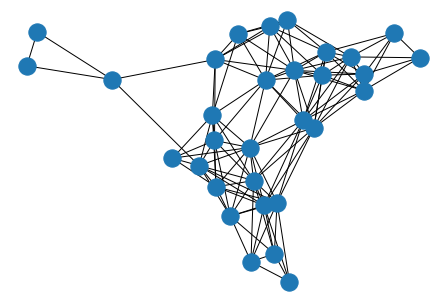

In [75]:
g = to_networkx(gp.d[0], to_undirected=True)
nx.draw(g)

In [76]:
len(gp.d)

207

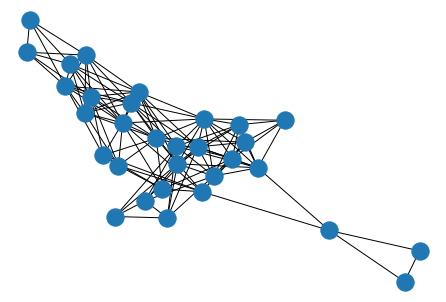

In [77]:
g = to_networkx(gp.d[0], to_undirected=True)
nx.draw(g)

In [78]:
len(gp.d)

207

In [79]:
len(gp.selection)

207

In [92]:
gp.selection[10]['PDB'].iloc[0]

'3OE6'

In [93]:
gp.d[0].x

tensor([16, 11,  7,  8,  3,  6,  8,  0,  9,  8, 16,  9,  5,  7,  7, 10,  4, 11,
        12,  9,  7, 19,  1, 14, 15, 12,  2,  4, 14,  7,  0])

In [94]:
len(gp.edges[0])

287

In [95]:
gp.d[0]

Data(edge_attr=[287, 2], edge_index=[2, 287], pos=[31, 3], x=[31], y=[4])

In [96]:
import networkx as nx
from torch_geometric.utils.convert import to_networkx

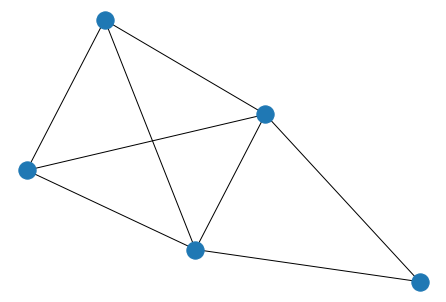

In [97]:
g = to_networkx(gp.d[10], to_undirected=True)
nx.draw(g)

In [98]:
gp.p.table

,uniprot(gene),receptor family,Cl.,Species,Method,PDB,Resolution,Preferred Chain,State,Degree active %,Family,Subtype,Function,Gs,Gi/o,Gq/11,G12/13
0,OXYR,Vasopressinandoxytocin,A(Rhodopsin),Human,X-ray,6TPK,3.2,A,Inactive,24,-,-,Antagonist,0.0,7.2,8.3,0.0
1,CNR2,Cannabinoid,A(Rhodopsin),Human,X-ray,5ZTY,2.8,A,Inactive,6,-,-,Antagonist,0.0,8.9,0.0,0.0
2,PE2R3,Prostanoid,A(Rhodopsin),Human,X-ray,6AK3,2.9,B,Active,83,-,-,Agonist,0.0,9.8,8.7,10.0
3,5HT1B,5-Hydroxytryptamine,A(Rhodopsin),Human,cryo-EM,6G79,3.8,S,Active,100,Gi/o,αo,Agonist,0.0,8.9,6.7,0.0
4,OPRD,Opioid,A(Rhodopsin),Human,X-ray,4N6H,1.8,A,Inactive,7,-,-,Antagonist,0.0,9.7,7.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,CCKAR,Cholecystokinin,A(Rhodopsin),Human,cryo-EM,7MBX,2.0,R,Active,100,Gs,αs,Agonist,10.4,11.0,11.1,10.4
364,GLP1R,Glucagon,B1(Secretin),Human,cryo-EM,7LCJ,2.8,R,Active,100,-,-,Agonist,10.6,0.0,0.0,0.0
365,ADA2A,Adrenoceptors,A(Rhodopsin),Human,X-ray,6KUX,2.7,A,Inactive,1,-,-,Antagonist,5.4,9.5,6.2,6.3
366,GLP1R,Glucagon,B1(Secretin),Human,cryo-EM,7LCK,3.2,R,Active,100,-,-,Agonist,10.6,0.0,0.0,0.0


In [99]:
gp.d[10]

Data(edge_attr=[21, 2], edge_index=[2, 21], pos=[5, 3], x=[5], y=[4])

In [100]:
len(gp.d)

207

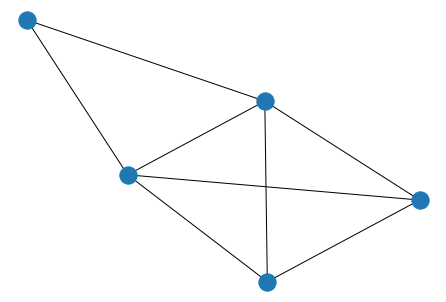

In [101]:
g = to_networkx(gp.d[10], to_undirected=True)
nx.draw(g)

In [102]:
from torch_geometric.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [103]:
validation_split = .2
shuffle_dataset = True
random_seed = 42
batch_size  = 4

# Creating data indices for training and validation splits
dataset_size = len(gp)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(gp, batch_size=batch_size, sampler=train_sampler)
validation_loader = DataLoader(gp, batch_size=batch_size, sampler=valid_sampler)

In [104]:
gp.__getitem__(0)

Data(edge_attr=[287, 2], edge_index=[2, 287], pos=[31, 3], x=[31], y=[4])

In [105]:
model_path = 'models/'

In [106]:
n_outputs=4
h5n = H5Net(n_outputs=n_outputs, aggr='add')

In [107]:
h5n.to('cuda')

H5Net(
  (embedding): Embedding(22, 24)
  (emb_ffl): Linear(in_features=24, out_features=24, bias=True)
  (kernels): ModuleList(
    (0): EGNN_sparse(
      (dropout): Dropout(p=0.1, inplace=False)
      (edge_norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (edge_norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (edge_mlp): Sequential(
        (0): Linear(in_features=57, out_features=114, bias=True)
        (1): Dropout(p=0.1, inplace=False)
        (2): SiLU()
        (3): Linear(in_features=114, out_features=64, bias=True)
        (4): SiLU()
      )
      (node_norm1): LayerNorm((24,), eps=1e-05, elementwise_affine=True)
      (node_norm2): LayerNorm((24,), eps=1e-05, elementwise_affine=True)
      (node_mlp): Sequential(
        (0): Linear(in_features=88, out_features=48, bias=True)
        (1): Dropout(p=0.1, inplace=False)
        (2): SiLU()
        (3): Linear(in_features=48, out_features=24, bias=True)
      )
    )
    (1): EGNN_sparse(
  

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(h5n.parameters(), lr=0.000001)
n_epochs = 1000

for e in range(n_epochs):
    print("EPOCH", e)
    training_loss = 0
    t_bar = tqdm(enumerate(train_loader), desc='TRAINING')
    for b,  batch in t_bar:
        batch.z = batch.x
        batch.to('cuda')
        pred = h5n(batch)
        target = batch.y / 10  # very crude normalization! (should substract upper & lower limit etc)
        target = target.reshape(-1, n_outputs)
        loss = criterion(pred, target)
        loss.backward()
        optimizer.step()
        training_loss = (training_loss * b + loss) / (b + 1)
        if b % 5 == 0:
            """print("target: {} <> prediction: {}".format(np.round_(target[0].cpu().detach().numpy(), 3), 
                                                        np.round_(pred[0].cpu().detach().numpy(), 3)))"""
            t_bar.set_description('TRAINING: mean epoch loss = '+str(round(float(training_loss), 6)))
    
    with torch.no_grad():
        validation_loss = 0
        t_bar = tqdm(enumerate(validation_loader), desc='VALIDATION')
        for b,  batch in t_bar:
            batch.z = batch.x
            batch.to('cuda')
            pred = h5n(batch)
            target = batch.y / 12
            target = target.reshape(-1, n_outputs)
            loss = criterion(pred, target)
            validation_loss = (validation_loss * b + loss) / (b + 1)
            if b % 5 == 0:
                t_bar.set_description('VALIDATION: mean epoch loss = '+str(round(float(validation_loss), 6)))
            if b % 5 == 0:
                target_ = np.round_(target[0].cpu().detach().numpy() * 12, 2)
                pred_ = np.round_(pred[0].cpu().detach().numpy() * 12, 2)
                print("target: {} <> prediction: {}".format(target_, 
                                                            pred_))

TRAINING: 0it [00:00, ?it/s]

EPOCH 0


TRAINING: mean epoch loss = 0.174004: : 42it [00:00, 69.52it/s]
VALIDATION: mean epoch loss = 0.124541: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.180339: : 11it [00:00, 106.77it/s]

target: [10.9  0.   0.   0. ] <> prediction: [6.13 6.33 5.9  5.99]
target: [8.2 0.  7.  0. ] <> prediction: [6.15 6.33 5.92 6.05]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.12 6.34 5.94 6.04]
EPOCH 1


TRAINING: mean epoch loss = 0.172105: : 42it [00:00, 103.94it/s]
VALIDATION: mean epoch loss = 0.135367: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.161649: : 11it [00:00, 103.75it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.15 6.32 5.93 5.94]
target: [8.2 0.  7.  0. ] <> prediction: [6.17 6.33 5.92 5.95]
target: [0.  8.6 0.  0. ] <> prediction: [6.   6.38 5.95 5.72]
EPOCH 2


TRAINING: mean epoch loss = 0.171596: : 42it [00:00, 105.24it/s]
VALIDATION: mean epoch loss = 0.134296: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.165915: : 11it [00:00, 107.82it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.15 6.3  5.97 5.88]
target: [0.  8.6 0.  0. ] <> prediction: [6.17 6.27 5.96 5.88]
target: [5.9 0.  0.  0. ] <> prediction: [6.16 6.29 5.96 5.86]
EPOCH 3


TRAINING: mean epoch loss = 0.169999: : 42it [00:00, 104.98it/s]
VALIDATION: mean epoch loss = 0.127568: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.18422: : 10it [00:00, 98.99it/s] 

target: [0.  8.3 7.7 7.6] <> prediction: [6.15 6.24 5.98 5.79]
target: [0.  8.9 0.  0. ] <> prediction: [6.11 6.29 5.99 5.79]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.14 6.25 5.98 5.81]
EPOCH 4


TRAINING: mean epoch loss = 0.16802: : 42it [00:00, 99.27it/s] 
VALIDATION: mean epoch loss = 0.12811: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.160998: : 11it [00:00, 102.78it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.1  6.31 5.99 5.77]
target: [0.  8.8 9.3 7.8] <> prediction: [6.17 6.24 6.   5.72]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.13 6.28 6.   5.71]
EPOCH 5


TRAINING: mean epoch loss = 0.167688: : 42it [00:00, 100.70it/s]
VALIDATION: mean epoch loss = 0.127462: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.155279: : 11it [00:00, 103.75it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.16 6.22 6.   5.64]
target: [8.2 0.  7.  0. ] <> prediction: [6.15 6.25 6.   5.63]
target: [8.2 0.  7.  0. ] <> prediction: [6.11 6.25 6.01 5.62]
EPOCH 6


TRAINING: mean epoch loss = 0.165862: : 42it [00:00, 101.43it/s]
VALIDATION: mean epoch loss = 0.126105: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.161498: : 11it [00:00, 99.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.88 6.21 6.34 5.69]
target: [7.8 0.  8.1 0. ] <> prediction: [6.12 6.21 6.07 5.55]
target: [0.  8.4 6.7 0. ] <> prediction: [6.1  6.22 6.06 5.55]
EPOCH 7


TRAINING: mean epoch loss = 0.16362: : 42it [00:00, 100.94it/s] 
VALIDATION: mean epoch loss = 0.12641: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.152383: : 10it [00:00, 96.13it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.15 6.22 6.02 5.47]
target: [0.  8.8 9.3 7.8] <> prediction: [6.1  6.21 6.07 5.45]
target: [0. 9. 9. 0.] <> prediction: [6.06 6.21 6.05 5.5 ]
EPOCH 8


TRAINING: mean epoch loss = 0.163428: : 42it [00:00, 100.22it/s]
VALIDATION: mean epoch loss = 0.123889: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.166333: : 11it [00:00, 102.78it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.13 6.19 6.08 5.38]
target: [0.  8.6 0.  0. ] <> prediction: [6.11 6.2  6.08 5.42]
target: [0.  8.4 6.7 0. ] <> prediction: [6.08 6.21 6.11 5.37]
EPOCH 9


TRAINING: mean epoch loss = 0.162379: : 42it [00:00, 104.45it/s]
VALIDATION: mean epoch loss = 0.122444: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.1775: : 10it [00:00, 99.98it/s]  

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.11 6.17 6.1  5.28]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.03 6.2  6.08 5.28]
target: [5.7 0.  5.6 0. ] <> prediction: [6.03 6.23 6.11 5.33]
EPOCH 10


TRAINING: mean epoch loss = 0.160593: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.126708: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.158912: : 11it [00:00, 107.82it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.1  6.18 6.12 5.24]
target: [10.4 11.  11.1 10.4] <> prediction: [6.1  6.16 6.12 5.23]
target: [0.  8.9 0.  0. ] <> prediction: [6.12 6.17 6.11 5.2 ]
EPOCH 11


TRAINING: mean epoch loss = 0.159992: : 42it [00:00, 106.57it/s]
VALIDATION: mean epoch loss = 0.124825: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.155349: : 11it [00:00, 102.78it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [6.09 6.17 6.1  5.15]
target: [5.7 0.  5.6 0. ] <> prediction: [6.1  6.15 6.15 5.13]
target: [5.9 0.  0.  0. ] <> prediction: [6.1  6.17 6.13 5.12]
EPOCH 12


TRAINING: mean epoch loss = 0.158267: : 42it [00:00, 102.42it/s]
VALIDATION: mean epoch loss = 0.11275: : 11it [00:00, 282.00it/s]
TRAINING: mean epoch loss = 0.155355: : 11it [00:00, 105.75it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.11 6.11 6.17 5.06]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.08 6.12 6.19 5.05]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.06 6.17 6.16 5.07]
EPOCH 13


TRAINING: mean epoch loss = 0.157386: : 42it [00:00, 103.68it/s]
VALIDATION: mean epoch loss = 0.116521: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.164584: : 11it [00:00, 105.75it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.04 6.15 6.17 5.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [6.02 6.13 6.19 4.94]
target: [0.  7.5 7.6 7.5] <> prediction: [6.07 6.15 6.18 5.  ]
EPOCH 14


TRAINING: mean epoch loss = 0.155528: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.115678: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.148041: : 11it [00:00, 108.89it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.07 6.13 6.2  4.84]
target: [0.  8.4 6.7 0. ] <> prediction: [6.05 6.14 6.23 4.81]
target: [0.  7.5 7.6 7.5] <> prediction: [6.06 6.13 6.18 4.86]
EPOCH 15


TRAINING: mean epoch loss = 0.154137: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.116448: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.145671: : 11it [00:00, 104.74it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [6.04 6.11 6.24 4.73]
target: [0.  8.4 0.  0. ] <> prediction: [6.05 6.08 6.27 4.73]
target: [5.7 0.  5.6 0. ] <> prediction: [6.03 6.12 6.25 4.78]
EPOCH 16


TRAINING: mean epoch loss = 0.152275: : 42it [00:00, 104.98it/s]
VALIDATION: mean epoch loss = 0.11609: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.146446: : 11it [00:00, 106.77it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.11 6.1  6.21 4.69]
target: [7.8 0.  8.1 0. ] <> prediction: [6.   6.12 6.26 4.67]
target: [8.2 0.  7.  0. ] <> prediction: [6.06 6.08 6.26 4.71]
EPOCH 17


TRAINING: mean epoch loss = 0.152235: : 42it [00:00, 106.04it/s]
VALIDATION: mean epoch loss = 0.112995: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.155219: : 11it [00:00, 106.77it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.09 6.06 6.27 4.61]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.02 6.11 6.29 4.57]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.06 6.08 6.3  4.62]
EPOCH 18


TRAINING: mean epoch loss = 0.150899: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.119149: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.156182: : 11it [00:00, 105.75it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [6.03 6.1  6.25 4.49]
target: [0.  8.  7.9 0. ] <> prediction: [6.05 6.08 6.3  4.48]
target: [0.  8.9 0.  0. ] <> prediction: [6.06 6.07 6.28 4.53]
EPOCH 19


TRAINING: mean epoch loss = 0.149899: : 42it [00:00, 106.58it/s]
VALIDATION: mean epoch loss = 0.111821: : 11it [00:00, 289.42it/s]
TRAINING: mean epoch loss = 0.146065: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.02 6.05 6.35 4.42]
target: [0.  9.4 0.  0. ] <> prediction: [6.03 6.08 6.33 4.3 ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.06 6.02 6.33 4.48]
EPOCH 20


TRAINING: mean epoch loss = 0.148205: : 42it [00:00, 105.77it/s]
VALIDATION: mean epoch loss = 0.116592: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.145137: : 11it [00:00, 109.98it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.   6.05 6.36 4.27]
target: [0.  8.4 6.7 0. ] <> prediction: [6.01 6.05 6.41 4.27]
target: [5.9 0.  0.  0. ] <> prediction: [6.02 6.06 6.36 4.32]
EPOCH 21


TRAINING: mean epoch loss = 0.147869: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.117054: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.161967: : 11it [00:00, 102.78it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [6.03 6.04 6.41 4.16]
target: [0.  7.7 7.6 7.2] <> prediction: [6.11 6.02 6.39 4.24]
target: [10.4 11.  11.1 10.4] <> prediction: [6.01 6.03 6.4  4.21]
EPOCH 22


TRAINING: mean epoch loss = 0.144688: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.107462: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.145921: : 11it [00:00, 105.27it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.   6.03 6.42 4.11]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.98 6.03 6.46 4.04]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.01 6.03 6.43 4.08]
EPOCH 23


TRAINING: mean epoch loss = 0.145359: : 42it [00:00, 107.26it/s]
VALIDATION: mean epoch loss = 0.10464: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.143915: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.02 6.03 6.44 4.09]
target: [0.  8.  7.9 0. ] <> prediction: [5.99 6.01 6.47 3.99]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.   6.01 6.44 4.07]
EPOCH 24


TRAINING: mean epoch loss = 0.143549: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.116402: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.147996: : 11it [00:00, 103.75it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [5.98 5.98 6.54 3.86]
target: [5.7 0.  5.6 0. ] <> prediction: [5.97 6.03 6.44 3.95]
target: [10.6  0.   0.   0. ] <> prediction: [5.97 6.01 6.52 3.87]
EPOCH 25


TRAINING: mean epoch loss = 0.142735: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.103439: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.141671: : 11it [00:00, 107.82it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [5.98 6.01 6.5  3.83]
target: [10.6  0.   0.   0. ] <> prediction: [6.   5.98 6.54 3.84]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.01 5.98 6.53 3.85]
EPOCH 26


TRAINING: mean epoch loss = 0.14274: : 42it [00:00, 109.64it/s] 
VALIDATION: mean epoch loss = 0.113033: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.136204: : 11it [00:00, 103.75it/s]

target: [5.9 0.  0.  0. ] <> prediction: [5.99 5.95 6.55 3.74]
target: [7.8 0.  8.1 0. ] <> prediction: [5.98 5.97 6.57 3.69]
target: [0.  8.6 0.  0. ] <> prediction: [5.94 6.   6.55 3.69]
EPOCH 27


TRAINING: mean epoch loss = 0.141291: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.10727: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.142496: : 11it [00:00, 108.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [5.98 5.95 6.58 3.63]
target: [0.  7.5 7.6 7.5] <> prediction: [5.99 5.97 6.56 3.66]
target: [8.2 0.  7.  0. ] <> prediction: [6.02 5.96 6.56 3.62]
EPOCH 28


TRAINING: mean epoch loss = 0.140182: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.107058: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.129903: : 11it [00:00, 108.89it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [5.97 5.94 6.66 3.49]
target: [8.2 0.  7.  0. ] <> prediction: [5.99 5.93 6.61 3.54]
target: [8.2 0.  7.  0. ] <> prediction: [5.96 5.93 6.64 3.55]
EPOCH 29


TRAINING: mean epoch loss = 0.139403: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.106762: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.137169: : 11it [00:00, 108.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.   5.92 6.63 3.43]
target: [5.7 0.  5.6 0. ] <> prediction: [5.97 5.92 6.67 3.4 ]
target: [0.  7.5 7.6 7.5] <> prediction: [5.98 5.95 6.61 3.45]
EPOCH 30


TRAINING: mean epoch loss = 0.139048: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.11198: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.134986: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.96 5.91 6.68 3.31]
target: [0.  7.5 7.6 7.5] <> prediction: [6.01 5.92 6.65 3.37]
target: [0.  9.4 0.  0. ] <> prediction: [5.88 5.88 6.75 3.26]
EPOCH 31


TRAINING: mean epoch loss = 0.13768: : 42it [00:00, 108.22it/s] 
VALIDATION: mean epoch loss = 0.110088: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.139381: : 11it [00:00, 107.82it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [5.96 5.87 6.75 3.16]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.94 5.89 6.73 3.17]
target: [5.9 0.  0.  0. ] <> prediction: [5.98 5.86 6.72 3.22]
EPOCH 32


TRAINING: mean epoch loss = 0.13777: : 42it [00:00, 104.71it/s] 
VALIDATION: mean epoch loss = 0.104696: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.136326: : 11it [00:00, 105.75it/s]

target: [5.9 0.  0.  0. ] <> prediction: [5.98 5.86 6.73 3.19]
target: [0.  7.7 7.6 7.2] <> prediction: [6.   5.86 6.77 3.18]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.   5.86 6.72 3.18]
EPOCH 33


TRAINING: mean epoch loss = 0.13676: : 42it [00:00, 108.50it/s] 
VALIDATION: mean epoch loss = 0.105882: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.147582: : 11it [00:00, 106.77it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.97 6.05 6.96 3.02]
target: [5.9 0.  0.  0. ] <> prediction: [5.97 5.84 6.76 3.06]
target: [0. 9. 9. 0.] <> prediction: [5.94 5.86 6.78 2.99]
EPOCH 34


TRAINING: mean epoch loss = 0.136174: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.111992: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.125665: : 11it [00:00, 107.82it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [5.96 5.81 6.82 2.95]
target: [8.2 0.  7.  0. ] <> prediction: [5.93 5.84 6.83 2.91]
target: [10.9  0.   0.   0. ] <> prediction: [5.93 5.84 6.8  2.93]
EPOCH 35


TRAINING: mean epoch loss = 0.135248: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.110324: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.133365: : 11it [00:00, 107.82it/s]

target: [0.  8.4 0.  0. ] <> prediction: [5.96 5.78 6.91 2.77]
target: [8.2 0.  7.  0. ] <> prediction: [5.97 5.81 6.83 2.83]
target: [0.  8.9 0.  0. ] <> prediction: [5.97 5.81 6.86 2.78]
EPOCH 36


TRAINING: mean epoch loss = 0.134171: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.10411: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.13202: : 12it [00:00, 111.09it/s] 

target: [0.  8.4 6.7 0. ] <> prediction: [5.94 5.78 6.92 2.68]
target: [0.  8.3 7.7 7.6] <> prediction: [5.97 5.77 6.9  2.76]
target: [8.3 0.  8.4 0. ] <> prediction: [5.95 5.78 6.87 2.83]
EPOCH 37


TRAINING: mean epoch loss = 0.133208: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.103199: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.123128: : 11it [00:00, 109.98it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.05 5.75 6.84 2.74]
target: [8.2 0.  7.  0. ] <> prediction: [5.95 5.77 6.91 2.66]
target: [5.7 0.  5.6 0. ] <> prediction: [5.98 5.7  6.97 2.68]
EPOCH 38


TRAINING: mean epoch loss = 0.132935: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.111416: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.129747: : 11it [00:00, 109.98it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.02 5.71 6.92 2.63]
target: [5.9 0.  0.  0. ] <> prediction: [6.01 5.71 6.94 2.62]
target: [10.9  0.   0.   0. ] <> prediction: [6.   5.71 6.92 2.61]
EPOCH 39


TRAINING: mean epoch loss = 0.132867: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.109835: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.140625: : 12it [00:00, 111.09it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [5.99 5.7  6.96 2.51]
target: [0.  9.4 0.  0. ] <> prediction: [5.99 5.68 7.03 2.41]
target: [0.  8.4 0.  0. ] <> prediction: [5.98 5.66 7.03 2.54]
EPOCH 40


TRAINING: mean epoch loss = 0.133176: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.11069: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.135103: : 12it [00:00, 112.12it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [5.97 5.66 7.05 2.36]
target: [0.  8.9 0.  0. ] <> prediction: [6.   5.66 7.03 2.38]
target: [0.  9.4 0.  0. ] <> prediction: [6.01 5.62 7.08 2.32]
EPOCH 41


TRAINING: mean epoch loss = 0.132236: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.103042: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.140509: : 11it [00:00, 108.89it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [5.95 5.66 7.11 2.28]
target: [8.2 0.  7.  0. ] <> prediction: [6.   5.64 7.05 2.32]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.   5.64 7.06 2.47]
EPOCH 42


TRAINING: mean epoch loss = 0.131459: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.102864: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.128435: : 11it [00:00, 108.89it/s]

target: [0.  8.  7.9 0. ] <> prediction: [6.   5.61 7.08 2.32]
target: [5.9 0.  0.  0. ] <> prediction: [6.01 5.61 7.07 2.26]
target: [5.7 0.  5.6 0. ] <> prediction: [6.   5.61 7.07 2.25]
EPOCH 43


TRAINING: mean epoch loss = 0.131199: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.101269: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.129313: : 11it [00:00, 104.74it/s]

target: [0. 9. 9. 0.] <> prediction: [6.02 5.59 7.1  2.19]
target: [8.2 0.  7.  0. ] <> prediction: [6.02 5.62 7.04 2.2 ]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.01 5.59 7.15 2.13]
EPOCH 44


TRAINING: mean epoch loss = 0.130726: : 42it [00:00, 106.04it/s]
VALIDATION: mean epoch loss = 0.10553: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.134689: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.01 5.57 7.15 2.09]
target: [0.  8.9 0.  0. ] <> prediction: [6.04 5.56 7.13 2.08]
target: [10.8  0.   9.   0. ] <> prediction: [6.02 5.57 7.12 2.07]
EPOCH 45


TRAINING: mean epoch loss = 0.131604: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.111056: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.137061: : 11it [00:00, 108.89it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [6.   5.56 7.17 2.06]
target: [0.  8.9 0.  0. ] <> prediction: [6.05 5.54 7.12 2.03]
target: [10.6  0.   0.   0. ] <> prediction: [6.02 5.51 7.2  2.02]
EPOCH 46


TRAINING: mean epoch loss = 0.129907: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.110915: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.126235: : 11it [00:00, 107.82it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.03 5.53 7.16 1.95]
target: [10.8  0.   9.   0. ] <> prediction: [6.05 5.5  7.15 1.99]
target: [0.  8.9 0.  0. ] <> prediction: [6.09 5.5  7.13 2.02]
EPOCH 47


TRAINING: mean epoch loss = 0.130957: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.108844: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.129706: : 11it [00:00, 109.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.04 5.5  7.17 1.88]
target: [5.7 0.  5.6 0. ] <> prediction: [6.04 5.48 7.21 1.86]
target: [0.  8.8 9.3 7.8] <> prediction: [6.05 5.46 7.22 1.88]
EPOCH 48


TRAINING: mean epoch loss = 0.131018: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.110923: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.130953: : 11it [00:00, 107.82it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [6.06 5.43 7.28 1.72]
target: [0.  9.4 0.  0. ] <> prediction: [6.03 5.42 7.32 1.75]
target: [0.  8.6 0.  0. ] <> prediction: [6.08 5.46 7.2  1.83]
EPOCH 49


TRAINING: mean epoch loss = 0.130432: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.103585: : 11it [00:00, 282.00it/s]
TRAINING: mean epoch loss = 0.11909: : 11it [00:00, 101.83it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.97 5.46 7.37 1.62]
target: [0.  8.9 0.  0. ] <> prediction: [6.07 5.41 7.28 1.67]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.08 5.42 7.22 1.7 ]
EPOCH 50


TRAINING: mean epoch loss = 0.130878: : 42it [00:00, 105.77it/s]
VALIDATION: mean epoch loss = 0.100161: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.137036: : 11it [00:00, 109.97it/s]

target: [10.9  0.   0.   0. ] <> prediction: [6.08 5.4  7.27 1.65]
target: [0.  8.3 7.7 7.6] <> prediction: [6.09 5.39 7.32 1.6 ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.08 5.4  7.29 1.7 ]
EPOCH 51


TRAINING: mean epoch loss = 0.129606: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.111346: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.126667: : 11it [00:00, 106.77it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.13 5.39 7.28 1.63]
target: [5.7 0.  5.6 0. ] <> prediction: [6.11 5.36 7.33 1.57]
target: [0.  8.6 0.  0. ] <> prediction: [6.01 5.51 7.18 1.9 ]
EPOCH 52


TRAINING: mean epoch loss = 0.130633: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.103785: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.12205: : 11it [00:00, 109.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.14 5.33 7.31 1.54]
target: [5.7 0.  5.6 0. ] <> prediction: [6.13 5.31 7.35 1.53]
target: [5.7 0.  5.6 0. ] <> prediction: [6.11 5.34 7.33 1.5 ]
EPOCH 53


TRAINING: mean epoch loss = 0.128984: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.104051: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.119752: : 11it [00:00, 102.78it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.16 5.3  7.33 1.45]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.13 5.29 7.35 1.45]
target: [8.2 0.  7.  0. ] <> prediction: [6.14 5.32 7.3  1.5 ]
EPOCH 54


TRAINING: mean epoch loss = 0.129911: : 42it [00:00, 106.58it/s]
VALIDATION: mean epoch loss = 0.10377: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.121951: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.13 5.28 7.33 1.42]
target: [0.  8.4 0.  0. ] <> prediction: [6.15 5.26 7.39 1.38]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.15 5.31 7.34 1.45]
EPOCH 55


TRAINING: mean epoch loss = 0.12904: : 42it [00:00, 108.78it/s] 
VALIDATION: mean epoch loss = 0.112837: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.133977: : 11it [00:00, 108.89it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.21 5.23 7.32 1.38]
target: [5.9 0.  0.  0. ] <> prediction: [6.21 5.23 7.33 1.38]
target: [0.  8.4 0.  0. ] <> prediction: [6.19 5.22 7.42 1.34]
EPOCH 56


TRAINING: mean epoch loss = 0.130764: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.10226: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.124009: : 11it [00:00, 109.98it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.2  5.25 7.33 1.29]
target: [0.  8.  7.9 0. ] <> prediction: [6.18 5.23 7.35 1.34]
target: [5.  8.4 7.4 0. ] <> prediction: [6.2  5.23 7.39 1.25]
EPOCH 57


TRAINING: mean epoch loss = 0.128851: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.104838: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.122853: : 11it [00:00, 108.89it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.23 5.21 7.34 1.25]
target: [0.  8.6 0.  0. ] <> prediction: [6.11 5.25 7.44 1.28]
target: [8.3 0.  8.4 0. ] <> prediction: [6.22 5.19 7.35 1.3 ]
EPOCH 58


TRAINING: mean epoch loss = 0.129456: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.104882: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.125567: : 11it [00:00, 107.82it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.21 5.2  7.43 1.2 ]
target: [5.9 0.  0.  0. ] <> prediction: [6.24 5.16 7.38 1.19]
target: [5.7 0.  5.6 0. ] <> prediction: [6.21 5.22 7.48 1.19]
EPOCH 59


TRAINING: mean epoch loss = 0.129803: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.107146: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.118402: : 12it [00:00, 110.07it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.25 5.15 7.37 1.18]
target: [0.  8.6 0.  0. ] <> prediction: [6.07 5.31 7.27 1.51]
target: [0.  8.  7.9 0. ] <> prediction: [6.27 5.13 7.4  1.15]
EPOCH 60


TRAINING: mean epoch loss = 0.129725: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.1053: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.127984: : 11it [00:00, 109.98it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.29 5.14 7.37 1.13]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.31 5.12 7.39 1.09]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.27 5.13 7.38 1.15]
EPOCH 61


TRAINING: mean epoch loss = 0.130521: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.110242: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.13256: : 11it [00:00, 106.77it/s] 

target: [0.  8.6 0.  0. ] <> prediction: [6.21 5.24 7.48 0.92]
target: [0.  8.  7.9 0. ] <> prediction: [6.29 5.09 7.42 1.07]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.28 5.1  7.44 1.05]
EPOCH 62


TRAINING: mean epoch loss = 0.129932: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.115595: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.120139: : 11it [00:00, 104.74it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.34 5.06 7.38 1.02]
target: [0.  7.5 7.6 7.5] <> prediction: [6.34 5.08 7.38 1.02]
target: [0.  9.4 0.  0. ] <> prediction: [6.3  5.04 7.41 1.03]
EPOCH 63


TRAINING: mean epoch loss = 0.128668: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.109586: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.127221: : 11it [00:00, 108.89it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [6.4  5.06 7.29 1.06]
target: [5.9 0.  0.  0. ] <> prediction: [6.39 5.02 7.37 0.98]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.37 5.02 7.4  1.01]
EPOCH 64


TRAINING: mean epoch loss = 0.130518: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.106156: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.129771: : 11it [00:00, 109.98it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.36 5.06 7.39 0.94]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.35 5.05 7.33 0.99]
target: [8.3 0.  8.4 0. ] <> prediction: [6.34 5.05 7.37 0.98]
EPOCH 65


TRAINING: mean epoch loss = 0.13006: : 42it [00:00, 109.35it/s] 
VALIDATION: mean epoch loss = 0.114497: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.123472: : 11it [00:00, 108.89it/s]

target: [0. 9. 9. 0.] <> prediction: [6.35 5.01 7.44 0.85]
target: [0.  8.  7.9 0. ] <> prediction: [6.4  4.99 7.39 0.95]
target: [10.6  0.   0.   0. ] <> prediction: [6.4  5.   7.39 0.92]
EPOCH 66


TRAINING: mean epoch loss = 0.129532: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.121611: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.127662: : 11it [00:00, 105.75it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [6.41 5.   7.38 0.88]
target: [0.  8.4 6.7 0. ] <> prediction: [6.38 4.99 7.41 0.83]
target: [10.4 11.  11.1 10.4] <> prediction: [6.39 5.01 7.37 0.87]
EPOCH 67


TRAINING: mean epoch loss = 0.131218: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.10656: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.13165: : 12it [00:00, 111.09it/s] 

target: [0.  8.6 0.  0. ] <> prediction: [6.42 4.98 7.33 0.87]
target: [5.  8.4 7.4 0. ] <> prediction: [6.39 4.99 7.37 0.83]
target: [5.7 0.  5.6 0. ] <> prediction: [6.32 5.02 7.46 0.77]
EPOCH 68


TRAINING: mean epoch loss = 0.130223: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.106587: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.134183: : 11it [00:00, 106.77it/s]

target: [10.6  0.   0.   0. ] <> prediction: [6.45 4.94 7.36 0.82]
target: [0.  8.3 7.7 7.6] <> prediction: [6.47 4.92 7.36 0.78]
target: [8.2 0.  7.  0. ] <> prediction: [6.47 4.94 7.39 0.79]
EPOCH 69


TRAINING: mean epoch loss = 0.129509: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.107138: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.129217: : 11it [00:00, 106.77it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.46 4.95 7.36 0.77]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.53 4.91 7.34 0.79]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.46 4.96 7.29 0.81]
EPOCH 70


TRAINING: mean epoch loss = 0.130177: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.117465: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.128953: : 11it [00:00, 109.98it/s]

target: [0.  8.4 0.  0. ] <> prediction: [6.51 4.93 7.37 0.75]
target: [0.  8.9 0.  0. ] <> prediction: [6.47 4.96 7.3  0.8 ]
target: [0.  9.4 0.  0. ] <> prediction: [6.53 4.88 7.36 0.68]
EPOCH 71


TRAINING: mean epoch loss = 0.127684: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.104558: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.12797: : 11it [00:00, 109.98it/s] 

target: [10.9  0.   0.   0. ] <> prediction: [6.48 4.91 7.3  0.72]
target: [0.  8.9 0.  0. ] <> prediction: [6.49 4.91 7.28 0.71]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.54 4.9  7.33 0.7 ]
EPOCH 72


TRAINING: mean epoch loss = 0.131202: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.122784: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.142166: : 11it [00:00, 108.89it/s]

target: [0.  9.4 0.  0. ] <> prediction: [6.46 4.9  7.35 0.65]
target: [8.2 0.  7.  0. ] <> prediction: [6.5  4.92 7.32 0.7 ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.52 4.9  7.31 0.7 ]
EPOCH 73


TRAINING: mean epoch loss = 0.1303: : 42it [00:00, 109.64it/s]  
VALIDATION: mean epoch loss = 0.1057: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.133116: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.51 4.89 7.31 0.65]
target: [5.9 0.  0.  0. ] <> prediction: [6.55 4.88 7.3  0.64]
target: [5.  8.4 7.4 0. ] <> prediction: [6.49 4.91 7.28 0.67]
EPOCH 74


TRAINING: mean epoch loss = 0.130464: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.104769: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.121798: : 11it [00:00, 108.89it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.56 4.9  7.26 0.66]
target: [0.  8.6 0.  0. ] <> prediction: [6.56 4.9  7.23 0.65]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.55 4.9  7.25 0.69]
EPOCH 75


TRAINING: mean epoch loss = 0.130535: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.107301: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.1349: : 11it [00:00, 106.77it/s]  

target: [0. 9. 9. 0.] <> prediction: [6.5  4.93 7.25 0.6 ]
target: [10.9  0.   0.   0. ] <> prediction: [6.52 4.86 7.26 0.6 ]
target: [8.2 0.  7.  0. ] <> prediction: [6.54 4.91 7.23 0.61]
EPOCH 76


TRAINING: mean epoch loss = 0.130386: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.109766: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.149959: : 11it [00:00, 107.82it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.59 4.86 7.2  0.58]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.55 4.88 7.24 0.6 ]
target: [10.8  0.   9.   0. ] <> prediction: [6.54 4.92 7.2  0.64]
EPOCH 77


TRAINING: mean epoch loss = 0.131874: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.115579: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.132047: : 11it [00:00, 108.89it/s]

target: [0. 9. 9. 0.] <> prediction: [6.52 4.9  7.22 0.59]
target: [0.  8.4 6.7 0. ] <> prediction: [6.56 4.88 7.23 0.55]
target: [10.9  0.   0.   0. ] <> prediction: [6.54 4.88 7.18 0.56]
EPOCH 78


TRAINING: mean epoch loss = 0.129867: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.116601: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.152116: : 11it [00:00, 106.77it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.53 4.9  7.19 0.57]
target: [10.9  0.   0.   0. ] <> prediction: [6.53 4.9  7.15 0.55]
target: [0.  8.6 0.  0. ] <> prediction: [6.4  5.06 7.12 0.63]
EPOCH 79


TRAINING: mean epoch loss = 0.13156: : 42it [00:00, 107.94it/s] 
VALIDATION: mean epoch loss = 0.116057: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.117658: : 11it [00:00, 109.97it/s]

target: [0. 9. 9. 0.] <> prediction: [6.5  4.94 7.2  0.52]
target: [0.  8.4 0.  0. ] <> prediction: [6.58 4.85 7.24 0.5 ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.58 4.88 7.16 0.51]
EPOCH 80


TRAINING: mean epoch loss = 0.131292: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.107418: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.135476: : 11it [00:00, 102.78it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.65 4.84 7.17 0.51]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.56 4.89 7.12 0.5 ]
target: [8.2 0.  7.  0. ] <> prediction: [6.57 4.91 7.15 0.49]
EPOCH 81


TRAINING: mean epoch loss = 0.131739: : 42it [00:00, 105.24it/s]
VALIDATION: mean epoch loss = 0.110501: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.13067: : 11it [00:00, 106.77it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.54 4.92 7.1  0.48]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.59 4.91 7.13 0.48]
target: [0.  8.  7.9 0. ] <> prediction: [6.58 4.88 7.13 0.47]
EPOCH 82


TRAINING: mean epoch loss = 0.130864: : 42it [00:00, 107.95it/s]
VALIDATION: mean epoch loss = 0.116703: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.129369: : 11it [00:00, 103.75it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.58 4.92 7.09 0.46]
target: [5.9 0.  0.  0. ] <> prediction: [6.59 4.89 7.09 0.47]
target: [0.  8.3 7.7 7.6] <> prediction: [6.56 4.89 7.1  0.45]
EPOCH 83


TRAINING: mean epoch loss = 0.131233: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.110855: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.154195: : 11it [00:00, 109.98it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.55 4.91 7.1  0.44]
target: [8.2 0.  7.  0. ] <> prediction: [6.57 4.92 7.08 0.42]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.49 4.94 7.09 0.43]
EPOCH 84


TRAINING: mean epoch loss = 0.13015: : 42it [00:00, 103.17it/s] 
VALIDATION: mean epoch loss = 0.116639: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.1359: : 11it [00:00, 104.74it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.56 4.91 7.07 0.44]
target: [0.  7.5 7.6 7.5] <> prediction: [6.57 4.94 7.05 0.44]
target: [0.  8.6 0.  0. ] <> prediction: [6.53 4.95 7.06 0.45]
EPOCH 85


TRAINING: mean epoch loss = 0.129852: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.109758: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.130065: : 11it [00:00, 109.98it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [6.51 4.93 7.08 0.4 ]
target: [10.6  0.   0.   0. ] <> prediction: [6.53 4.91 7.08 0.43]
target: [10.8  0.   9.   0. ] <> prediction: [6.53 4.95 7.02 0.42]
EPOCH 86


TRAINING: mean epoch loss = 0.130098: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.116262: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.140832: : 11it [00:00, 107.82it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.52 4.96 7.01 0.39]
target: [0.  8.9 0.  0. ] <> prediction: [6.55 4.93 7.04 0.4 ]
target: [0.  8.4 0.  0. ] <> prediction: [6.5  4.95 7.1  0.39]
EPOCH 87


TRAINING: mean epoch loss = 0.130969: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.110149: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.141892: : 11it [00:00, 106.77it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.51 4.97 6.97 0.42]
target: [5.7 0.  5.6 0. ] <> prediction: [6.53 4.97 7.04 0.38]
target: [0.  8.  7.9 0. ] <> prediction: [6.53 4.95 7.02 0.38]
EPOCH 88


TRAINING: mean epoch loss = 0.130854: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.117168: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.142665: : 11it [00:00, 109.98it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [6.5  5.   6.97 0.39]
target: [0.  8.4 6.7 0. ] <> prediction: [6.49 4.97 7.02 0.37]
target: [0.  9.4 0.  0. ] <> prediction: [6.54 4.93 7.03 0.38]
EPOCH 89


TRAINING: mean epoch loss = 0.130746: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.107193: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.136425: : 12it [00:00, 111.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.52 4.98 7.03 0.36]
target: [8.2 0.  7.  0. ] <> prediction: [6.48 5.02 6.97 0.37]
target: [5.7 0.  5.6 0. ] <> prediction: [6.5  5.04 7.04 0.33]
EPOCH 90


TRAINING: mean epoch loss = 0.12993: : 42it [00:00, 108.50it/s] 
VALIDATION: mean epoch loss = 0.116179: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.117551: : 11it [00:00, 108.89it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.49 5.02 6.94 0.36]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.49 4.99 7.   0.33]
target: [0.  8.9 0.  0. ] <> prediction: [6.51 5.   6.93 0.35]
EPOCH 91


TRAINING: mean epoch loss = 0.130636: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.114438: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.130117: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.5  5.05 6.94 0.34]
target: [0.  8.6 0.  0. ] <> prediction: [6.35 5.14 6.69 0.75]
target: [10.9  0.   0.   0. ] <> prediction: [6.41 5.06 6.92 0.34]
EPOCH 92


TRAINING: mean epoch loss = 0.131722: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.115918: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.132138: : 11it [00:00, 108.89it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [6.41 5.08 6.94 0.29]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.43 5.06 6.92 0.33]
target: [0.  8.9 0.  0. ] <> prediction: [6.45 5.05 6.94 0.32]
EPOCH 93


TRAINING: mean epoch loss = 0.130789: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.115242: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.116382: : 11it [00:00, 109.97it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.44 5.08 6.9  0.31]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.45 5.11 6.96 0.3 ]
target: [0.  8.4 0.  0. ] <> prediction: [6.43 5.07 6.95 0.29]
EPOCH 94


TRAINING: mean epoch loss = 0.130915: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.111891: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.117129: : 11it [00:00, 108.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.33 5.26 7.   0.37]
target: [0.  9.4 0.  0. ] <> prediction: [6.39 5.09 6.93 0.28]
target: [5.9 0.  0.  0. ] <> prediction: [6.39 5.12 6.9  0.3 ]
EPOCH 95


TRAINING: mean epoch loss = 0.131073: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.106418: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.150018: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.36 5.16 6.9  0.29]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.36 5.16 6.92 0.29]
target: [5.7 0.  5.6 0. ] <> prediction: [6.4  5.13 6.92 0.29]
EPOCH 96


TRAINING: mean epoch loss = 0.130948: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.106497: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.133405: : 11it [00:00, 106.77it/s]

target: [0.  9.4 0.  0. ] <> prediction: [6.29 5.17 6.93 0.3 ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.34 5.17 6.91 0.27]
target: [8.2 0.  7.  0. ] <> prediction: [6.39 5.14 6.9  0.3 ]
EPOCH 97


TRAINING: mean epoch loss = 0.130907: : 42it [00:00, 104.45it/s]
VALIDATION: mean epoch loss = 0.108108: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.142617: : 11it [00:00, 109.97it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.34 5.2  6.85 0.27]
target: [10.9  0.   0.   0. ] <> prediction: [6.31 5.18 6.85 0.27]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.39 5.15 6.89 0.27]
EPOCH 98


TRAINING: mean epoch loss = 0.131878: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.113832: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.160268: : 11it [00:00, 108.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.33 5.21 6.83 0.26]
target: [0.  7.7 7.6 7.2] <> prediction: [6.34 5.21 6.88 0.28]
target: [10.6  0.   0.   0. ] <> prediction: [6.33 5.21 6.88 0.28]
EPOCH 99


TRAINING: mean epoch loss = 0.131682: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.108485: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.137456: : 12it [00:00, 112.12it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.32 5.24 6.88 0.26]
target: [0.  7.5 7.6 7.5] <> prediction: [6.3  5.25 6.84 0.25]
target: [0.  8.  7.9 0. ] <> prediction: [6.3  5.24 6.84 0.26]
EPOCH 100


TRAINING: mean epoch loss = 0.13129: : 42it [00:00, 109.64it/s] 
VALIDATION: mean epoch loss = 0.106411: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.129646: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.29 5.28 6.88 0.24]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.25 5.32 6.85 0.26]
target: [5.7 0.  5.6 0. ] <> prediction: [6.17 5.4  6.9  0.26]
EPOCH 101


TRAINING: mean epoch loss = 0.130937: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.116269: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.120105: : 11it [00:00, 107.82it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.24 5.31 6.86 0.23]
target: [5.9 0.  0.  0. ] <> prediction: [6.24 5.31 6.83 0.24]
target: [0.  8.8 9.3 7.8] <> prediction: [6.24 5.3  6.85 0.23]
EPOCH 102


TRAINING: mean epoch loss = 0.131417: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.108528: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.123622: : 11it [00:00, 107.82it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.24 5.3  6.82 0.24]
target: [8.2 0.  7.  0. ] <> prediction: [6.23 5.34 6.82 0.23]
target: [0.  8.4 6.7 0. ] <> prediction: [6.24 5.32 6.86 0.22]
EPOCH 103


TRAINING: mean epoch loss = 0.131893: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.109138: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.111602: : 11it [00:00, 109.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.23 5.32 6.84 0.22]
target: [5.7 0.  5.6 0. ] <> prediction: [6.21 5.35 6.83 0.22]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.23 5.34 6.82 0.22]
EPOCH 104


TRAINING: mean epoch loss = 0.130357: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.114552: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.121871: : 11it [00:00, 108.89it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.2  5.36 6.82 0.21]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.2  5.37 6.86 0.21]
target: [0.  8.3 7.7 7.6] <> prediction: [6.2  5.35 6.82 0.21]
EPOCH 105


TRAINING: mean epoch loss = 0.131178: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.106378: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.138186: : 11it [00:00, 109.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.17 5.38 6.85 0.21]
target: [5.9 0.  0.  0. ] <> prediction: [6.19 5.39 6.81 0.22]
target: [5.7 0.  5.6 0. ] <> prediction: [6.13 5.43 6.88 0.19]
EPOCH 106


TRAINING: mean epoch loss = 0.131118: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.111151: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.128946: : 12it [00:00, 111.09it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.15 5.43 6.84 0.2 ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.18 5.41 6.83 0.23]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.12 5.45 6.89 0.19]
EPOCH 107


TRAINING: mean epoch loss = 0.131107: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.110687: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.131927: : 11it [00:00, 109.97it/s]

target: [0. 9. 9. 0.] <> prediction: [6.14 5.48 6.83 0.19]
target: [10.8  0.   9.   0. ] <> prediction: [6.16 5.42 6.8  0.2 ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.18 5.4  6.83 0.19]
EPOCH 108


TRAINING: mean epoch loss = 0.132027: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.107654: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.121554: : 12it [00:00, 111.09it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.08 5.48 6.83 0.19]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.13 5.44 6.81 0.19]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.12 5.46 6.83 0.2 ]
EPOCH 109


TRAINING: mean epoch loss = 0.130955: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.103748: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.135804: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.12 5.49 6.85 0.18]
target: [7.8 0.  8.1 0. ] <> prediction: [6.13 5.47 6.84 0.18]
target: [5.  8.4 7.4 0. ] <> prediction: [6.13 5.46 6.83 0.18]
EPOCH 110


TRAINING: mean epoch loss = 0.131607: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.106641: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.135044: : 11it [00:00, 108.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.12 5.48 6.83 0.19]
target: [0.  8.  7.9 0. ] <> prediction: [6.14 5.45 6.84 0.18]
target: [8.2 0.  7.  0. ] <> prediction: [6.14 5.49 6.85 0.17]
EPOCH 111


TRAINING: mean epoch loss = 0.130018: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.114371: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.13514: : 11it [00:00, 109.97it/s] 

target: [0.  7.5 7.6 7.5] <> prediction: [6.11 5.51 6.84 0.18]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.1  5.48 6.84 0.16]
target: [0.  9.4 0.  0. ] <> prediction: [6.09 5.49 6.86 0.15]
EPOCH 112


TRAINING: mean epoch loss = 0.131499: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.106881: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.151484: : 11it [00:00, 109.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.11 5.49 6.85 0.16]
target: [5.7 0.  5.6 0. ] <> prediction: [6.05 5.56 6.86 0.17]
target: [8.2 0.  7.  0. ] <> prediction: [6.09 5.55 6.88 0.17]
EPOCH 113


TRAINING: mean epoch loss = 0.132608: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.10704: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.131809: : 11it [00:00, 106.77it/s]

target: [10.9  0.   0.   0. ] <> prediction: [6.02 5.54 6.84 0.16]
target: [0. 9. 9. 0.] <> prediction: [6.05 5.55 6.9  0.16]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.06 5.55 6.82 0.16]
EPOCH 114


TRAINING: mean epoch loss = 0.129671: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.11338: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.122498: : 11it [00:00, 108.89it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.1  5.56 6.88 0.16]
target: [8.2 0.  7.  0. ] <> prediction: [6.14 5.53 6.89 0.16]
target: [0.  7.7 7.6 7.2] <> prediction: [6.11 5.55 6.85 0.18]
EPOCH 115


TRAINING: mean epoch loss = 0.13033: : 42it [00:00, 109.35it/s] 
VALIDATION: mean epoch loss = 0.123206: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.138562: : 11it [00:00, 109.98it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.09 5.57 6.85 0.15]
target: [0.  8.4 0.  0. ] <> prediction: [6.13 5.51 6.96 0.15]
target: [10.4 11.  11.1 10.4] <> prediction: [6.08 5.55 6.88 0.15]
EPOCH 116


TRAINING: mean epoch loss = 0.131465: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.112092: : 11it [00:00, 289.42it/s]
TRAINING: mean epoch loss = 0.121123: : 11it [00:00, 107.82it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [6.11 5.53 6.88 0.15]
target: [5.7 0.  5.6 0. ] <> prediction: [6.12 5.56 6.91 0.15]
target: [5.9 0.  0.  0. ] <> prediction: [6.13 5.53 6.88 0.15]
EPOCH 117


TRAINING: mean epoch loss = 0.131257: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.116391: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.12099: : 11it [00:00, 107.82it/s] 

target: [0.  8.4 0.  0. ] <> prediction: [6.18 5.48 6.94 0.14]
target: [0.  8.6 0.  0. ] <> prediction: [5.94 5.69 6.84 0.23]
target: [0.  8.8 9.3 7.8] <> prediction: [6.13 5.52 6.91 0.14]
EPOCH 118


TRAINING: mean epoch loss = 0.131217: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.123399: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.131344: : 11it [00:00, 108.89it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.1  5.58 6.93 0.13]
target: [8.2 0.  7.  0. ] <> prediction: [6.11 5.56 6.92 0.13]
target: [10.4 11.  11.1 10.4] <> prediction: [6.07 5.58 6.91 0.14]
EPOCH 119


TRAINING: mean epoch loss = 0.131666: : 42it [00:00, 106.04it/s]
VALIDATION: mean epoch loss = 0.109658: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.132315: : 11it [00:00, 106.77it/s]

target: [0.  8.4 0.  0. ] <> prediction: [6.14 5.54 6.97 0.12]
target: [5.9 0.  0.  0. ] <> prediction: [6.16 5.52 6.91 0.13]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.15 5.54 6.92 0.13]
EPOCH 120


TRAINING: mean epoch loss = 0.13062: : 42it [00:00, 105.50it/s] 
VALIDATION: mean epoch loss = 0.109636: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.131779: : 11it [00:00, 103.75it/s]

target: [10.8  0.   9.   0. ] <> prediction: [6.15 5.54 6.88 0.13]
target: [5.7 0.  5.6 0. ] <> prediction: [6.16 5.54 6.95 0.12]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.12 5.58 6.93 0.14]
EPOCH 121


TRAINING: mean epoch loss = 0.131362: : 42it [00:00, 102.17it/s]
VALIDATION: mean epoch loss = 0.107443: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.129697: : 11it [00:00, 106.77it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.14 5.56 6.92 0.13]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.1  5.6  6.96 0.12]
target: [5.7 0.  5.6 0. ] <> prediction: [6.1  5.59 6.92 0.13]
EPOCH 122


TRAINING: mean epoch loss = 0.131353: : 42it [00:00, 105.24it/s]
VALIDATION: mean epoch loss = 0.115646: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.128414: : 11it [00:00, 100.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.2  5.53 6.93 0.13]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.16 5.55 6.94 0.12]
target: [0.  8.3 7.7 7.6] <> prediction: [6.13 5.56 6.96 0.11]
EPOCH 123


TRAINING: mean epoch loss = 0.131533: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.11539: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.115316: : 11it [00:00, 108.89it/s]

target: [10.8  0.   9.   0. ] <> prediction: [6.2  5.52 6.94 0.12]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.2  5.52 6.95 0.12]
target: [0.  9.4 0.  0. ] <> prediction: [6.06 5.61 7.02 0.12]
EPOCH 124


TRAINING: mean epoch loss = 0.132239: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.114814: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.122015: : 11it [00:00, 107.82it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.99 5.73 6.96 0.15]
target: [0.  8.3 7.7 7.6] <> prediction: [6.16 5.56 6.97 0.11]
target: [0.  7.7 7.6 7.2] <> prediction: [6.16 5.57 6.97 0.12]
EPOCH 125


TRAINING: mean epoch loss = 0.131372: : 42it [00:00, 103.68it/s]
VALIDATION: mean epoch loss = 0.107866: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.120643: : 11it [00:00, 107.82it/s]

target: [10.9  0.   0.   0. ] <> prediction: [6.17 5.52 6.94 0.1 ]
target: [5.9 0.  0.  0. ] <> prediction: [6.23 5.53 6.98 0.11]
target: [5.7 0.  5.6 0. ] <> prediction: [6.21 5.53 7.   0.11]
EPOCH 126


TRAINING: mean epoch loss = 0.128342: : 42it [00:00, 106.30it/s]
VALIDATION: mean epoch loss = 0.108088: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.137782: : 11it [00:00, 103.75it/s]

target: [0. 9. 9. 0.] <> prediction: [6.19 5.56 7.01 0.13]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.23 5.51 7.04 0.1 ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.26 5.5  7.04 0.1 ]
EPOCH 127


TRAINING: mean epoch loss = 0.131153: : 42it [00:00, 104.98it/s]
VALIDATION: mean epoch loss = 0.108293: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.125648: : 11it [00:00, 105.75it/s]

target: [0.  8.4 0.  0. ] <> prediction: [6.3  5.47 7.05 0.1 ]
target: [8.2 0.  7.  0. ] <> prediction: [6.25 5.52 7.01 0.11]
target: [7.8 0.  8.1 0. ] <> prediction: [6.22 5.52 7.11 0.1 ]
EPOCH 128


TRAINING: mean epoch loss = 0.131345: : 42it [00:00, 104.45it/s]
VALIDATION: mean epoch loss = 0.108402: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.129225: : 11it [00:00, 105.75it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.28 5.46 7.03 0.1 ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.24 5.49 7.04 0.1 ]
target: [8.2 0.  7.  0. ] <> prediction: [6.21 5.52 7.04 0.1 ]
EPOCH 129


TRAINING: mean epoch loss = 0.132087: : 42it [00:00, 106.04it/s]
VALIDATION: mean epoch loss = 0.108383: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.113416: : 11it [00:00, 102.78it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.25 5.5  7.04 0.1 ]
target: [8.3 0.  8.4 0. ] <> prediction: [6.29 5.46 7.02 0.1 ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.2  5.52 7.1  0.1 ]
EPOCH 130


TRAINING: mean epoch loss = 0.132091: : 42it [00:00, 103.94it/s]
VALIDATION: mean epoch loss = 0.116895: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.139152: : 11it [00:00, 102.78it/s]

target: [10.6  0.   0.   0. ] <> prediction: [6.31 5.44 7.03 0.09]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.28 5.48 7.07 0.1 ]
target: [0.  9.4 0.  0. ] <> prediction: [6.22 5.5  7.1  0.09]
EPOCH 131


TRAINING: mean epoch loss = 0.131865: : 42it [00:00, 105.50it/s]
VALIDATION: mean epoch loss = 0.124761: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.112641: : 11it [00:00, 102.78it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.35 5.46 7.06 0.09]
target: [8.2 0.  7.  0. ] <> prediction: [6.35 5.43 7.04 0.09]
target: [10.4 11.  11.1 10.4] <> prediction: [6.32 5.41 7.03 0.1 ]
EPOCH 132


TRAINING: mean epoch loss = 0.131395: : 42it [00:00, 105.50it/s]
VALIDATION: mean epoch loss = 0.108809: : 11it [00:00, 282.00it/s]
TRAINING: mean epoch loss = 0.118207: : 11it [00:00, 103.75it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.33 5.43 7.06 0.09]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.33 5.41 7.05 0.09]
target: [5.7 0.  5.6 0. ] <> prediction: [6.27 5.45 7.07 0.09]
EPOCH 133


TRAINING: mean epoch loss = 0.131721: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.117337: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.138033: : 11it [00:00, 104.74it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.35 5.4  7.11 0.08]
target: [8.3 0.  8.4 0. ] <> prediction: [6.36 5.38 7.08 0.09]
target: [0.  8.9 0.  0. ] <> prediction: [6.39 5.36 7.05 0.08]
EPOCH 134


TRAINING: mean epoch loss = 0.131525: : 42it [00:00, 103.42it/s]
VALIDATION: mean epoch loss = 0.109023: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.126253: : 11it [00:00, 107.82it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.37 5.39 7.18 0.08]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.43 5.35 7.06 0.08]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.38 5.36 7.05 0.09]
EPOCH 135


TRAINING: mean epoch loss = 0.131555: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.117031: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.140068: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.44 5.31 7.1  0.08]
target: [0.  8.9 0.  0. ] <> prediction: [6.42 5.32 7.06 0.08]
target: [0.  8.6 0.  0. ] <> prediction: [6.1  5.44 7.29 0.09]
EPOCH 136


TRAINING: mean epoch loss = 0.131206: : 42it [00:00, 105.24it/s]
VALIDATION: mean epoch loss = 0.114626: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.111982: : 11it [00:00, 106.77it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.46 5.3  7.07 0.08]
target: [0.  8.3 7.7 7.6] <> prediction: [6.38 5.34 7.1  0.08]
target: [5.9 0.  0.  0. ] <> prediction: [6.4  5.31 7.05 0.08]
EPOCH 137


TRAINING: mean epoch loss = 0.131328: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.119447: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.122256: : 11it [00:00, 109.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.37 5.32 7.07 0.08]
target: [5.9 0.  0.  0. ] <> prediction: [6.43 5.28 7.07 0.08]
target: [0.  8.8 9.3 7.8] <> prediction: [6.44 5.28 7.07 0.08]
EPOCH 138


TRAINING: mean epoch loss = 0.131233: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.116748: : 11it [00:00, 274.95it/s]
TRAINING: mean epoch loss = 0.105027: : 11it [00:00, 106.77it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.45 5.26 7.06 0.08]
target: [0.  8.6 0.  0. ] <> prediction: [6.25 5.41 7.22 0.08]
target: [10.6  0.   0.   0. ] <> prediction: [6.46 5.25 7.09 0.07]
EPOCH 139


TRAINING: mean epoch loss = 0.132494: : 42it [00:00, 106.58it/s]
VALIDATION: mean epoch loss = 0.116685: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.134519: : 11it [00:00, 104.74it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.43 5.26 7.1  0.08]
target: [0.  8.3 7.7 7.6] <> prediction: [6.5  5.21 7.11 0.07]
target: [10.6  0.   0.   0. ] <> prediction: [6.5  5.23 7.11 0.07]
EPOCH 140


TRAINING: mean epoch loss = 0.131314: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.112421: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.143759: : 11it [00:00, 104.74it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.44 5.23 7.09 0.08]
target: [0.  7.5 7.6 7.5] <> prediction: [6.44 5.23 7.08 0.07]
target: [0. 9. 9. 0.] <> prediction: [6.39 5.27 7.13 0.07]
EPOCH 141


TRAINING: mean epoch loss = 0.132766: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.114751: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.128835: : 11it [00:00, 108.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.48 5.2  7.09 0.07]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.47 5.21 7.09 0.07]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.55 5.17 7.09 0.07]
EPOCH 142


TRAINING: mean epoch loss = 0.131754: : 42it [00:00, 105.77it/s]
VALIDATION: mean epoch loss = 0.114661: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.132191: : 11it [00:00, 104.74it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.44 5.26 7.15 0.07]
target: [0.  8.4 6.7 0. ] <> prediction: [6.48 5.18 7.12 0.06]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.49 5.19 7.11 0.07]
EPOCH 143


TRAINING: mean epoch loss = 0.131409: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.111609: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.140597: : 11it [00:00, 105.75it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.39 5.26 7.14 0.07]
target: [0.  8.6 0.  0. ] <> prediction: [6.42 5.22 7.28 0.15]
target: [10.8  0.   9.   0. ] <> prediction: [6.46 5.17 7.08 0.07]
EPOCH 144


TRAINING: mean epoch loss = 0.131491: : 42it [00:00, 106.58it/s]
VALIDATION: mean epoch loss = 0.106109: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.12591: : 11it [00:00, 103.75it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [6.46 5.16 7.11 0.06]
target: [5.7 0.  5.6 0. ] <> prediction: [6.42 5.19 7.1  0.07]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.38 5.21 7.09 0.06]
EPOCH 145


TRAINING: mean epoch loss = 0.131834: : 42it [00:00, 105.50it/s]
VALIDATION: mean epoch loss = 0.119846: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.133032: : 11it [00:00, 103.75it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.43 5.15 7.08 0.06]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.48 5.17 7.14 0.06]
target: [0.  8.8 9.3 7.8] <> prediction: [6.48 5.15 7.09 0.06]
EPOCH 146


TRAINING: mean epoch loss = 0.131053: : 42it [00:00, 106.58it/s]
VALIDATION: mean epoch loss = 0.109163: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.140815: : 11it [00:00, 107.82it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.41 5.18 7.1  0.06]
target: [0.  8.  7.9 0. ] <> prediction: [6.46 5.14 7.04 0.06]
target: [8.3 0.  8.4 0. ] <> prediction: [6.42 5.14 7.09 0.06]
EPOCH 147


TRAINING: mean epoch loss = 0.131846: : 42it [00:00, 104.98it/s]
VALIDATION: mean epoch loss = 0.109008: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.11689: : 11it [00:00, 103.75it/s]

target: [10.9  0.   0.   0. ] <> prediction: [6.39 5.14 7.03 0.06]
target: [8.2 0.  7.  0. ] <> prediction: [6.41 5.14 7.06 0.05]
target: [5.7 0.  5.6 0. ] <> prediction: [6.46 5.12 7.08 0.06]
EPOCH 148


TRAINING: mean epoch loss = 0.131652: : 42it [00:00, 105.77it/s]
VALIDATION: mean epoch loss = 0.112435: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.150059: : 11it [00:00, 106.77it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.45 5.12 7.05 0.06]
target: [0.  9.4 0.  0. ] <> prediction: [6.36 5.14 7.09 0.05]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.38 5.12 7.05 0.06]
EPOCH 149


TRAINING: mean epoch loss = 0.132279: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.114496: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.134125: : 11it [00:00, 100.89it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.39 5.15 7.11 0.05]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.42 5.12 7.06 0.05]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.44 5.13 7.1  0.05]
EPOCH 150


TRAINING: mean epoch loss = 0.131671: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.110515: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.115119: : 11it [00:00, 105.75it/s]

target: [10.6  0.   0.   0. ] <> prediction: [6.39 5.13 7.07 0.05]
target: [0.  7.5 7.6 7.5] <> prediction: [6.41 5.13 7.03 0.05]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.38 5.13 7.01 0.06]
EPOCH 151


TRAINING: mean epoch loss = 0.1311: : 42it [00:00, 102.42it/s]  
VALIDATION: mean epoch loss = 0.108415: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.117805: : 10it [00:00, 98.99it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [6.38 5.17 7.06 0.05]
target: [8.2 0.  7.  0. ] <> prediction: [6.32 5.2  7.11 0.05]
target: [5.7 0.  5.6 0. ] <> prediction: [6.42 5.12 7.05 0.05]
EPOCH 152


TRAINING: mean epoch loss = 0.130376: : 42it [00:00, 98.34it/s] 
VALIDATION: mean epoch loss = 0.11673: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.115311: : 10it [00:00, 98.99it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.39 5.14 7.07 0.05]
target: [10.4 11.  11.1 10.4] <> prediction: [6.38 5.13 7.05 0.05]
target: [0.  7.7 7.6 7.2] <> prediction: [6.35 5.16 7.02 0.05]
EPOCH 153


TRAINING: mean epoch loss = 0.132641: : 42it [00:00, 99.50it/s] 
VALIDATION: mean epoch loss = 0.112213: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.144463: : 11it [00:00, 108.89it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.38 5.11 6.99 0.05]
target: [10.9  0.   0.   0. ] <> prediction: [6.34 5.1  6.96 0.05]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.32 5.16 7.04 0.05]
EPOCH 154


TRAINING: mean epoch loss = 0.132104: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.11324: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.139693: : 11it [00:00, 109.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.3  5.17 7.   0.05]
target: [10.9  0.   0.   0. ] <> prediction: [6.27 5.16 6.96 0.05]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.32 5.16 7.04 0.05]
EPOCH 155


TRAINING: mean epoch loss = 0.131626: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.116128: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.141692: : 10it [00:00, 98.99it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.32 5.16 7.   0.04]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.22 5.23 7.03 0.05]
target: [0.  8.6 0.  0. ] <> prediction: [5.93 5.4  7.19 0.07]
EPOCH 156


TRAINING: mean epoch loss = 0.13034: : 42it [00:00, 104.71it/s] 
VALIDATION: mean epoch loss = 0.105957: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.123536: : 12it [00:00, 112.12it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.21 5.22 7.02 0.05]
target: [7.8 0.  8.1 0. ] <> prediction: [6.25 5.21 7.04 0.05]
target: [5.  8.4 7.4 0. ] <> prediction: [6.3  5.19 7.   0.05]
EPOCH 157


TRAINING: mean epoch loss = 0.131868: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.115801: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.120411: : 11it [00:00, 104.74it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.27 5.21 7.02 0.04]
target: [8.2 0.  7.  0. ] <> prediction: [6.24 5.22 7.02 0.04]
target: [10.6  0.   0.   0. ] <> prediction: [6.23 5.21 7.01 0.04]
EPOCH 158


TRAINING: mean epoch loss = 0.130031: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.109669: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.11804: : 11it [00:00, 106.77it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [6.24 5.24 7.   0.04]
target: [8.2 0.  7.  0. ] <> prediction: [6.24 5.23 6.98 0.04]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.26 5.22 6.98 0.05]
EPOCH 159


TRAINING: mean epoch loss = 0.132003: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.118002: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.122493: : 11it [00:00, 109.98it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.22 5.26 6.97 0.04]
target: [0.  8.4 6.7 0. ] <> prediction: [6.21 5.26 6.98 0.04]
target: [0.  8.8 9.3 7.8] <> prediction: [6.21 5.24 6.95 0.04]
EPOCH 160


TRAINING: mean epoch loss = 0.131445: : 42it [00:00, 105.50it/s]
VALIDATION: mean epoch loss = 0.107949: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.129158: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.23 5.27 6.95 0.04]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.2  5.29 7.02 0.04]
target: [8.2 0.  7.  0. ] <> prediction: [6.22 5.25 6.95 0.04]
EPOCH 161


TRAINING: mean epoch loss = 0.132514: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.108197: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.138827: : 11it [00:00, 109.98it/s]

target: [10.8  0.   9.   0. ] <> prediction: [6.24 5.24 6.91 0.04]
target: [10.6  0.   0.   0. ] <> prediction: [6.26 5.26 6.94 0.04]
target: [8.3 0.  8.4 0. ] <> prediction: [6.2  5.27 6.97 0.04]
EPOCH 162


TRAINING: mean epoch loss = 0.131439: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.124485: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.156477: : 12it [00:00, 113.18it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.22 5.27 6.93 0.04]
target: [0.  8.9 0.  0. ] <> prediction: [6.22 5.28 6.94 0.04]
target: [10.4 11.  11.1 10.4] <> prediction: [6.21 5.28 6.96 0.04]
EPOCH 163


TRAINING: mean epoch loss = 0.130991: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.115781: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.12947: : 12it [00:00, 112.12it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [6.27 5.3  7.07 0.04]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.21 5.33 6.95 0.04]
target: [0.  7.5 7.6 7.5] <> prediction: [6.23 5.31 6.92 0.04]
EPOCH 164


TRAINING: mean epoch loss = 0.132239: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.108967: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.127272: : 11it [00:00, 107.82it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.94 5.5  6.85 0.08]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.15 5.32 6.91 0.04]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.19 5.33 6.92 0.03]
EPOCH 165


TRAINING: mean epoch loss = 0.131731: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.106611: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.133638: : 12it [00:00, 111.09it/s]

target: [10.8  0.   9.   0. ] <> prediction: [6.21 5.31 6.89 0.03]
target: [5.7 0.  5.6 0. ] <> prediction: [6.13 5.44 6.99 0.03]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.13 5.38 7.   0.04]
EPOCH 166


TRAINING: mean epoch loss = 0.132566: : 42it [00:00, 111.98it/s]
VALIDATION: mean epoch loss = 0.112866: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.129089: : 12it [00:00, 112.12it/s]

target: [10.9  0.   0.   0. ] <> prediction: [6.13 5.34 6.86 0.04]
target: [5.  8.4 7.4 0. ] <> prediction: [6.16 5.38 6.93 0.03]
target: [5.9 0.  0.  0. ] <> prediction: [6.17 5.36 6.93 0.03]
EPOCH 167


TRAINING: mean epoch loss = 0.129182: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.115178: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.120804: : 12it [00:00, 110.07it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.13 5.38 6.91 0.03]
target: [0.  8.  7.9 0. ] <> prediction: [6.14 5.4  6.91 0.03]
target: [0.  7.7 7.6 7.2] <> prediction: [6.27 5.32 6.91 0.03]
EPOCH 168


TRAINING: mean epoch loss = 0.128786: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.114951: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.128: : 12it [00:00, 111.09it/s]   

target: [0.  8.8 9.3 7.8] <> prediction: [6.16 5.41 6.96 0.03]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.12 5.39 6.91 0.03]
target: [0.  7.7 7.6 7.2] <> prediction: [6.11 5.4  6.95 0.04]
EPOCH 169


TRAINING: mean epoch loss = 0.131528: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.112101: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.144327: : 11it [00:00, 109.97it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.1  5.44 7.01 0.03]
target: [5.9 0.  0.  0. ] <> prediction: [6.19 5.42 6.91 0.03]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.26 5.38 6.92 0.03]
EPOCH 170


TRAINING: mean epoch loss = 0.131655: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.107495: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.132574: : 12it [00:00, 112.12it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.26 5.41 7.   0.03]
target: [0.  8.3 7.7 7.6] <> prediction: [6.13 5.46 6.94 0.03]
target: [5.7 0.  5.6 0. ] <> prediction: [6.2  5.42 6.95 0.03]
EPOCH 171


TRAINING: mean epoch loss = 0.130201: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.115754: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.127754: : 12it [00:00, 112.12it/s]

target: [0. 9. 9. 0.] <> prediction: [6.09 5.46 6.93 0.03]
target: [5.7 0.  5.6 0. ] <> prediction: [6.12 5.45 6.94 0.03]
target: [10.6  0.   0.   0. ] <> prediction: [6.2  5.43 6.91 0.03]
EPOCH 172


TRAINING: mean epoch loss = 0.131929: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.108307: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.151835: : 11it [00:00, 108.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.95 5.56 7.42 0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.21 5.45 6.99 0.03]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.24 5.41 6.87 0.03]
EPOCH 173


TRAINING: mean epoch loss = 0.131362: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.116181: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.128512: : 12it [00:00, 111.09it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.16 5.5  6.91 0.03]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.21 5.46 6.98 0.03]
target: [0.  8.3 7.7 7.6] <> prediction: [6.17 5.48 6.93 0.03]
EPOCH 174


TRAINING: mean epoch loss = 0.132211: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.115751: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.12438: : 11it [00:00, 106.77it/s] 

target: [0.  7.7 7.6 7.2] <> prediction: [6.29 5.44 6.96 0.03]
target: [5.7 0.  5.6 0. ] <> prediction: [6.26 5.47 6.96 0.03]
target: [0.  8.9 0.  0. ] <> prediction: [6.21 5.46 6.91 0.03]
EPOCH 175


TRAINING: mean epoch loss = 0.132356: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.10842: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.12042: : 12it [00:00, 112.12it/s] 

target: [7.1 7.6 8.1 6.2] <> prediction: [6.31 5.45 6.94 0.03]
target: [0.  8.  7.9 0. ] <> prediction: [6.3  5.44 6.94 0.02]
target: [8.2 0.  7.  0. ] <> prediction: [6.2  5.5  7.01 0.02]
EPOCH 176


TRAINING: mean epoch loss = 0.13147: : 42it [00:00, 109.35it/s] 
VALIDATION: mean epoch loss = 0.111023: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.12688: : 12it [00:00, 112.12it/s] 

target: [0.  8.8 9.3 7.8] <> prediction: [6.32 5.44 6.94 0.03]
target: [5.7 0.  5.6 0. ] <> prediction: [6.27 5.48 6.97 0.03]
target: [0. 9. 9. 0.] <> prediction: [6.22 5.46 7.03 0.03]
EPOCH 177


TRAINING: mean epoch loss = 0.132318: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.116288: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.136525: : 12it [00:00, 111.09it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.28 5.45 6.96 0.03]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.33 5.45 6.95 0.03]
target: [0.  8.9 0.  0. ] <> prediction: [6.26 5.45 6.9  0.03]
EPOCH 178


TRAINING: mean epoch loss = 0.131825: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.108969: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.142968: : 12it [00:00, 111.09it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.32 5.46 6.98 0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [6.27 5.48 6.97 0.02]
target: [8.3 0.  8.4 0. ] <> prediction: [6.35 5.41 6.92 0.03]
EPOCH 179


TRAINING: mean epoch loss = 0.131809: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.110075: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.124532: : 12it [00:00, 111.09it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.35 5.44 6.97 0.02]
target: [10.4 11.  11.1 10.4] <> prediction: [6.33 5.44 6.93 0.03]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.38 5.42 6.94 0.02]
EPOCH 180


TRAINING: mean epoch loss = 0.132345: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.111288: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.135505: : 12it [00:00, 112.12it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.39 5.42 6.97 0.02]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.38 5.41 6.94 0.02]
target: [10.8  0.   9.   0. ] <> prediction: [6.39 5.41 6.95 0.02]
EPOCH 181


TRAINING: mean epoch loss = 0.131784: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.10563: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.127036: : 11it [00:00, 109.98it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [6.37 5.42 6.97 0.02]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.34 5.43 7.   0.02]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.33 5.44 6.97 0.02]
EPOCH 182


TRAINING: mean epoch loss = 0.131078: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.125339: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.116852: : 12it [00:00, 112.12it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.37 5.43 7.01 0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [6.36 5.43 7.   0.02]
target: [10.4 11.  11.1 10.4] <> prediction: [6.38 5.39 6.96 0.02]
EPOCH 183


TRAINING: mean epoch loss = 0.130691: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.108802: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.127355: : 11it [00:00, 109.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.48 5.35 6.96 0.02]
target: [0.  9.4 0.  0. ] <> prediction: [6.29 5.42 7.01 0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [6.28 5.42 7.03 0.02]
EPOCH 184


TRAINING: mean epoch loss = 0.130095: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.110927: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.137458: : 12it [00:00, 112.12it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [6.4  5.36 6.98 0.02]
target: [0. 9. 9. 0.] <> prediction: [6.35 5.38 7.11 0.02]
target: [0.  8.  7.9 0. ] <> prediction: [6.42 5.35 6.95 0.02]
EPOCH 185


TRAINING: mean epoch loss = 0.131817: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.117169: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.142369: : 11it [00:00, 109.98it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.39 5.38 7.05 0.02]
target: [8.2 0.  7.  0. ] <> prediction: [6.28 5.42 7.1  0.02]
target: [0.  8.4 0.  0. ] <> prediction: [6.44 5.34 7.   0.02]
EPOCH 186


TRAINING: mean epoch loss = 0.131168: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.114652: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.105341: : 11it [00:00, 109.97it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.38 5.37 7.03 0.02]
target: [8.2 0.  7.  0. ] <> prediction: [6.39 5.39 7.14 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [6.41 5.32 7.   0.02]
EPOCH 187


TRAINING: mean epoch loss = 0.131821: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.10593: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.118507: : 12it [00:00, 113.18it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [6.4  5.33 7.04 0.02]
target: [10.9  0.   0.   0. ] <> prediction: [6.43 5.28 6.94 0.02]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.47 5.27 6.97 0.02]
EPOCH 188


TRAINING: mean epoch loss = 0.132214: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.108987: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.131654: : 12it [00:00, 113.18it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.41 5.32 7.05 0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.38 5.38 7.14 0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [6.44 5.29 7.06 0.02]
EPOCH 189


TRAINING: mean epoch loss = 0.131161: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.114445: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.138644: : 11it [00:00, 109.98it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [6.38 5.3  7.09 0.02]
target: [0.  8.4 0.  0. ] <> prediction: [6.4  5.29 7.1  0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.44 5.31 7.09 0.02]
EPOCH 190


TRAINING: mean epoch loss = 0.131417: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.117233: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.123812: : 11it [00:00, 109.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [6.38 5.26 7.04 0.02]
target: [0.  8.  7.9 0. ] <> prediction: [6.41 5.27 7.03 0.02]
target: [0.  8.6 0.  0. ] <> prediction: [6.35 5.3  7.04 0.02]
EPOCH 191


TRAINING: mean epoch loss = 0.131903: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.114575: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.137723: : 12it [00:00, 111.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.31 5.28 7.05 0.02]
target: [10.8  0.   9.   0. ] <> prediction: [6.46 5.2  7.02 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [6.45 5.22 6.99 0.02]
EPOCH 192


TRAINING: mean epoch loss = 0.131384: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.106183: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.124622: : 12it [00:00, 110.07it/s]

target: [10.8  0.   9.   0. ] <> prediction: [6.4  5.23 7.   0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.32 5.27 7.05 0.02]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.37 5.24 7.04 0.02]
EPOCH 193


TRAINING: mean epoch loss = 0.130539: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.114214: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.123046: : 11it [00:00, 107.82it/s]

target: [0. 9. 9. 0.] <> prediction: [6.33 5.24 7.16 0.02]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.32 5.27 7.09 0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.35 5.27 7.15 0.02]
EPOCH 194


TRAINING: mean epoch loss = 0.130907: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.114392: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.137826: : 11it [00:00, 109.98it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.4  5.21 7.04 0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.31 5.23 7.13 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [6.35 5.22 7.04 0.02]
EPOCH 195


TRAINING: mean epoch loss = 0.13171: : 42it [00:00, 110.21it/s] 
VALIDATION: mean epoch loss = 0.106558: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.135164: : 12it [00:00, 111.09it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.28 5.24 7.05 0.02]
target: [0. 9. 9. 0.] <> prediction: [6.3  5.21 7.1  0.01]
target: [5.  8.4 7.4 0. ] <> prediction: [6.28 5.24 7.09 0.02]
EPOCH 196


TRAINING: mean epoch loss = 0.131359: : 42it [00:00, 112.88it/s]
VALIDATION: mean epoch loss = 0.109554: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.117554: : 12it [00:00, 112.12it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.28 5.21 7.04 0.02]
target: [0.  7.7 7.6 7.2] <> prediction: [6.28 5.19 7.04 0.02]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.31 5.2  7.03 0.01]
EPOCH 197


TRAINING: mean epoch loss = 0.13163: : 42it [00:00, 113.18it/s] 
VALIDATION: mean epoch loss = 0.111797: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.138786: : 11it [00:00, 109.98it/s]

target: [10.8  0.   9.   0. ] <> prediction: [6.36 5.18 7.03 0.01]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.33 5.2  7.02 0.01]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.35 5.21 7.04 0.02]
EPOCH 198


TRAINING: mean epoch loss = 0.130328: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.108378: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.136917: : 12it [00:00, 110.07it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.26 5.22 7.07 0.01]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.3  5.2  7.01 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [6.39 5.18 7.02 0.01]
EPOCH 199


TRAINING: mean epoch loss = 0.132223: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.116678: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.132738: : 12it [00:00, 113.18it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.38 5.18 7.08 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [6.27 5.25 7.13 0.01]
target: [0.  8.6 0.  0. ] <> prediction: [5.89 5.37 7.39 0.01]
EPOCH 200


TRAINING: mean epoch loss = 0.131756: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.105493: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.123381: : 12it [00:00, 111.09it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.32 5.21 7.03 0.01]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.28 5.22 7.05 0.01]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.32 5.18 7.01 0.01]
EPOCH 201


TRAINING: mean epoch loss = 0.131208: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.118736: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.12192: : 11it [00:00, 109.98it/s] 

target: [0.  9.4 0.  0. ] <> prediction: [6.28 5.19 7.05 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [6.27 5.22 7.05 0.01]
target: [0.  8.8 9.3 7.8] <> prediction: [6.31 5.2  7.03 0.01]
EPOCH 202


TRAINING: mean epoch loss = 0.128925: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.107667: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.130267: : 12it [00:00, 112.12it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.29 5.22 7.   0.01]
target: [0.  8.9 0.  0. ] <> prediction: [6.15 5.27 7.04 0.01]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.28 5.24 7.07 0.01]
EPOCH 203


TRAINING: mean epoch loss = 0.130732: : 42it [00:00, 112.88it/s]
VALIDATION: mean epoch loss = 0.105067: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.138335: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.19 5.27 7.07 0.01]
target: [0.  7.7 7.6 7.2] <> prediction: [6.22 5.24 7.04 0.01]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.31 5.2  6.95 0.01]
EPOCH 204


TRAINING: mean epoch loss = 0.131283: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.107841: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.12389: : 12it [00:00, 110.07it/s] 

target: [5.  8.4 7.4 0. ] <> prediction: [6.24 5.24 7.   0.01]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.24 5.24 6.98 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [6.27 5.21 6.98 0.01]
EPOCH 205


TRAINING: mean epoch loss = 0.131927: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.108257: : 11it [00:00, 314.23it/s]
TRAINING: mean epoch loss = 0.127931: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.15 5.3  7.07 0.01]
target: [10.6  0.   0.   0. ] <> prediction: [6.34 5.19 6.93 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [6.12 5.28 7.04 0.01]
EPOCH 206


TRAINING: mean epoch loss = 0.132179: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.11571: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.134267: : 12it [00:00, 110.07it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.12 5.28 6.96 0.01]
target: [8.3 0.  8.4 0. ] <> prediction: [6.18 5.28 6.94 0.01]
target: [10.6  0.   0.   0. ] <> prediction: [6.26 5.26 6.97 0.01]
EPOCH 207


TRAINING: mean epoch loss = 0.131465: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.115776: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.138674: : 12it [00:00, 113.18it/s]

target: [0. 9. 9. 0.] <> prediction: [6.15 5.28 7.04 0.01]
target: [0.  7.7 7.6 7.2] <> prediction: [6.2  5.24 6.88 0.01]
target: [0.  8.9 0.  0. ] <> prediction: [6.25 5.22 6.83 0.01]
EPOCH 208


TRAINING: mean epoch loss = 0.130699: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.113222: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.134865: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.2  5.29 6.96 0.01]
target: [10.4 11.  11.1 10.4] <> prediction: [6.25 5.28 6.93 0.01]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.22 5.29 6.93 0.01]
EPOCH 209


TRAINING: mean epoch loss = 0.130806: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.10769: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.135053: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.13 5.34 7.03 0.01]
target: [0.  9.4 0.  0. ] <> prediction: [6.26 5.31 7.07 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [6.25 5.31 6.96 0.01]
EPOCH 210


TRAINING: mean epoch loss = 0.130477: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.107477: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.141729: : 12it [00:00, 113.18it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.22 5.32 6.98 0.01]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.22 5.31 6.89 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [6.13 5.33 6.92 0.01]
EPOCH 211


TRAINING: mean epoch loss = 0.131505: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.11291: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.133089: : 12it [00:00, 112.12it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.35 5.28 6.82 0.01]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.3  5.29 6.92 0.01]
target: [5.9 0.  0.  0. ] <> prediction: [6.24 5.32 6.87 0.01]
EPOCH 212


TRAINING: mean epoch loss = 0.131837: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.107771: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.134095: : 11it [00:00, 107.82it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.3  5.31 6.83 0.01]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.26 5.34 6.95 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [6.29 5.32 6.81 0.01]
EPOCH 213


TRAINING: mean epoch loss = 0.131502: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.107773: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.126764: : 11it [00:00, 109.98it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.31 5.34 6.85 0.01]
target: [0.  8.4 0.  0. ] <> prediction: [6.3  5.34 6.91 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [6.26 5.38 6.91 0.01]
EPOCH 214


TRAINING: mean epoch loss = 0.132058: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.11603: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.118874: : 12it [00:00, 112.12it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.29 5.35 6.89 0.01]
target: [0.  8.4 6.7 0. ] <> prediction: [6.33 5.37 6.9  0.01]
target: [0.  8.9 0.  0. ] <> prediction: [6.37 5.32 6.78 0.01]
EPOCH 215


TRAINING: mean epoch loss = 0.131435: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.108021: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.123386: : 12it [00:00, 111.09it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [6.33 5.34 6.88 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [6.16 5.44 6.95 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [6.26 5.39 6.89 0.01]
EPOCH 216


TRAINING: mean epoch loss = 0.130721: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.110506: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.134128: : 12it [00:00, 111.09it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.41 5.34 6.85 0.01]
target: [10.4 11.  11.1 10.4] <> prediction: [6.31 5.39 6.87 0.01]
target: [10.8  0.   9.   0. ] <> prediction: [6.39 5.35 6.84 0.01]
EPOCH 217


TRAINING: mean epoch loss = 0.128605: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.109945: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.140509: : 11it [00:00, 107.82it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.33 5.38 6.85 0.01]
target: [10.6  0.   0.   0. ] <> prediction: [6.35 5.39 6.89 0.01]
target: [0.  8.  7.9 0. ] <> prediction: [6.37 5.36 6.79 0.01]
EPOCH 218


TRAINING: mean epoch loss = 0.130043: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.108084: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.133499: : 12it [00:00, 113.18it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.34 5.41 7.02 0.01]
target: [0.  8.4 6.7 0. ] <> prediction: [6.31 5.41 6.89 0.01]
target: [7.8 0.  8.1 0. ] <> prediction: [6.34 5.4  6.93 0.01]
EPOCH 219


TRAINING: mean epoch loss = 0.130833: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.116656: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.122657: : 12it [00:00, 111.09it/s]

target: [0.  8.4 0.  0. ] <> prediction: [6.41 5.41 6.93 0.01]
target: [5.9 0.  0.  0. ] <> prediction: [6.27 5.42 6.9  0.01]
target: [0.  9.4 0.  0. ] <> prediction: [6.26 5.39 6.91 0.01]
EPOCH 220


TRAINING: mean epoch loss = 0.132251: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.108001: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.128226: : 12it [00:00, 111.09it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [6.44 5.36 6.83 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [6.31 5.42 6.96 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [6.38 5.4  6.88 0.01]
EPOCH 221


TRAINING: mean epoch loss = 0.131001: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.108512: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.138079: : 11it [00:00, 108.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.38 5.39 6.86 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [6.31 5.45 6.97 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [6.28 5.41 6.97 0.01]
EPOCH 222


TRAINING: mean epoch loss = 0.131272: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.108721: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.143328: : 11it [00:00, 109.98it/s]

target: [0.  9.4 0.  0. ] <> prediction: [6.31 5.42 6.95 0.01]
target: [0.  8.9 0.  0. ] <> prediction: [6.38 5.39 6.88 0.01]
target: [7.8 0.  8.1 0. ] <> prediction: [6.38 5.4  6.98 0.01]
EPOCH 223


TRAINING: mean epoch loss = 0.131734: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.118836: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.142749: : 11it [00:00, 108.89it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.43 5.38 6.9  0.01]
target: [5.9 0.  0.  0. ] <> prediction: [6.48 5.35 6.89 0.01]
target: [0.  8.8 9.3 7.8] <> prediction: [6.36 5.41 6.99 0.01]
EPOCH 224


TRAINING: mean epoch loss = 0.132105: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.110418: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.130928: : 11it [00:00, 108.89it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.39 5.37 6.9  0.01]
target: [8.2 0.  7.  0. ] <> prediction: [6.19 5.47 7.14 0.01]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.42 5.38 6.96 0.01]
EPOCH 225


TRAINING: mean epoch loss = 0.129165: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.109011: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.137007: : 12it [00:00, 111.09it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.65 5.73 7.52 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [6.46 5.37 7.01 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [6.47 5.34 6.96 0.01]
EPOCH 226


TRAINING: mean epoch loss = 0.131623: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.125705: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.13432: : 11it [00:00, 109.97it/s] 

target: [0.  8.  7.9 0. ] <> prediction: [6.45 5.37 6.94 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [6.38 5.33 6.98 0.01]
target: [10.4 11.  11.1 10.4] <> prediction: [6.38 5.38 6.97 0.01]
EPOCH 227


TRAINING: mean epoch loss = 0.13187: : 42it [00:00, 109.64it/s] 
VALIDATION: mean epoch loss = 0.117117: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.126646: : 12it [00:00, 112.12it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.65 5.62 7.65 0.01]
target: [0. 9. 9. 0.] <> prediction: [6.11 5.4  7.05 0.01]
target: [0.  8.9 0.  0. ] <> prediction: [6.38 5.34 6.95 0.01]
EPOCH 228


TRAINING: mean epoch loss = 0.13027: : 42it [00:00, 109.64it/s] 
VALIDATION: mean epoch loss = 0.110566: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.1355: : 12it [00:00, 112.12it/s]  

target: [0.  7.7 7.6 7.2] <> prediction: [6.4  5.34 7.02 0.01]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.46 5.35 7.06 0.01]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.42 5.35 6.99 0.01]
EPOCH 229


TRAINING: mean epoch loss = 0.131629: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.111159: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.150557: : 12it [00:00, 110.07it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.54 5.3  7.02 0.01]
target: [0.  9.4 0.  0. ] <> prediction: [6.39 5.34 7.15 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.42 5.33 7.04 0.01]
EPOCH 230


TRAINING: mean epoch loss = 0.130791: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.117156: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.124214: : 11it [00:00, 108.89it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.35 5.33 7.04 0.01]
target: [0.  8.8 9.3 7.8] <> prediction: [6.43 5.32 7.03 0.01]
target: [0.  8.6 0.  0. ] <> prediction: [5.87 5.33 7.47 0.  ]
EPOCH 231


TRAINING: mean epoch loss = 0.130951: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.109259: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.14015: : 12it [00:00, 112.12it/s] 

target: [7.1 7.6 8.1 6.2] <> prediction: [6.43 5.28 7.02 0.01]
target: [10.9  0.   0.   0. ] <> prediction: [6.42 5.23 6.96 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [5.99 5.44 7.27 0.  ]
EPOCH 232


TRAINING: mean epoch loss = 0.132338: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.116762: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.113686: : 11it [00:00, 109.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.29 5.32 7.21 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.45 5.21 6.94 0.01]
target: [0.  7.7 7.6 7.2] <> prediction: [6.26 5.31 7.09 0.01]
EPOCH 233


TRAINING: mean epoch loss = 0.131202: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.114258: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.12781: : 11it [00:00, 109.98it/s] 

target: [10.8  0.   9.   0. ] <> prediction: [6.57 5.16 6.93 0.01]
target: [0.  8.  7.9 0. ] <> prediction: [6.4  5.26 6.99 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.41 5.26 7.19 0.  ]
EPOCH 234


TRAINING: mean epoch loss = 0.131719: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.116177: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.12026: : 11it [00:00, 109.98it/s] 

target: [0.  7.7 7.6 7.2] <> prediction: [6.29 5.27 7.03 0.01]
target: [0.  7.5 7.6 7.5] <> prediction: [6.37 5.28 7.02 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.39 5.26 7.06 0.  ]
EPOCH 235


TRAINING: mean epoch loss = 0.131755: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.117655: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.138601: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.3  5.27 7.17 0.01]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.25 5.34 7.3  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [5.36 5.61 8.09 0.  ]
EPOCH 236


TRAINING: mean epoch loss = 0.130949: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.108311: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.128044: : 12it [00:00, 110.07it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.35 5.26 7.08 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [6.29 5.24 7.02 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.1  5.29 7.09 0.01]
EPOCH 237


TRAINING: mean epoch loss = 0.130895: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.11701: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.129583: : 12it [00:00, 111.09it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.51 5.17 6.93 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.22 5.31 7.09 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.23 5.26 7.04 0.  ]
EPOCH 238


TRAINING: mean epoch loss = 0.131138: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.109: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.137177: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.23 5.28 7.1  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.39 5.26 7.04 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.29 5.26 7.02 0.01]
EPOCH 239


TRAINING: mean epoch loss = 0.132108: : 42it [00:00, 112.88it/s]
VALIDATION: mean epoch loss = 0.11052: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.129376: : 12it [00:00, 112.12it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.07 5.32 7.09 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.27 5.25 6.95 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [6.37 5.2  6.89 0.  ]
EPOCH 240


TRAINING: mean epoch loss = 0.131447: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.111558: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.121443: : 12it [00:00, 113.18it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.13 5.29 7.05 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.22 5.3  7.08 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.18 5.21 6.88 0.01]
EPOCH 241


TRAINING: mean epoch loss = 0.131334: : 42it [00:00, 112.88it/s]
VALIDATION: mean epoch loss = 0.11266: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.115323: : 12it [00:00, 113.18it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.22 5.27 6.9  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [6.26 5.2  6.84 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.28 5.25 6.98 0.  ]
EPOCH 242


TRAINING: mean epoch loss = 0.131251: : 42it [00:00, 112.88it/s]
VALIDATION: mean epoch loss = 0.115844: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.15257: : 12it [00:00, 111.09it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [6.29 5.28 6.97 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.19 5.35 7.12 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.28 5.25 6.84 0.  ]
EPOCH 243


TRAINING: mean epoch loss = 0.131128: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.116977: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.14503: : 11it [00:00, 109.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.37 5.57 7.87 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.13 5.31 6.91 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.26 5.31 6.95 0.  ]
EPOCH 244


TRAINING: mean epoch loss = 0.128112: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.113192: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.133835: : 12it [00:00, 112.12it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.26 5.28 6.86 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.03 5.33 6.98 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.25 5.32 6.89 0.  ]
EPOCH 245


TRAINING: mean epoch loss = 0.131397: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.107682: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.116164: : 11it [00:00, 109.98it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.23 5.3  6.89 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.3  5.27 6.78 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.23 5.33 6.99 0.  ]
EPOCH 246


TRAINING: mean epoch loss = 0.13043: : 42it [00:00, 111.38it/s] 
VALIDATION: mean epoch loss = 0.118463: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.122649: : 12it [00:00, 111.09it/s]

target: [0.  8.  7.9 0. ] <> prediction: [6.29 5.35 6.92 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.16 5.39 7.07 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.34 5.28 6.82 0.  ]
EPOCH 247


TRAINING: mean epoch loss = 0.131299: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.116025: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.131254: : 12it [00:00, 112.12it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.49 5.26 6.88 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [5.53 5.57 7.57 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.4  5.28 6.87 0.  ]
EPOCH 248


TRAINING: mean epoch loss = 0.131078: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.116617: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.127504: : 12it [00:00, 111.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.15 5.41 6.95 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.41 5.31 6.9  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.38 5.32 6.8  0.  ]
EPOCH 249


TRAINING: mean epoch loss = 0.131147: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.115737: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.154896: : 12it [00:00, 113.18it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [6.37 5.32 6.88 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.32 5.38 7.02 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.42 5.33 6.87 0.  ]
EPOCH 250


TRAINING: mean epoch loss = 0.130862: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.11645: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.131035: : 11it [00:00, 108.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.38 5.34 6.78 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.42 5.36 6.86 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.42 5.34 6.78 0.  ]
EPOCH 251


TRAINING: mean epoch loss = 0.131711: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.117424: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.11897: : 11it [00:00, 106.77it/s] 

target: [10.6  0.   0.   0. ] <> prediction: [6.42 5.36 6.84 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.19 5.41 6.9  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [6.42 5.39 7.04 0.  ]
EPOCH 252


TRAINING: mean epoch loss = 0.130875: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.108067: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.137382: : 12it [00:00, 114.26it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.34 5.43 6.99 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.38 5.39 6.93 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.37 5.38 6.83 0.  ]
EPOCH 253


TRAINING: mean epoch loss = 0.131035: : 42it [00:00, 112.88it/s]
VALIDATION: mean epoch loss = 0.108673: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.114495: : 12it [00:00, 112.12it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.38 5.35 6.76 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.27 5.45 7.05 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [6.4  5.33 6.78 0.  ]
EPOCH 254


TRAINING: mean epoch loss = 0.13192: : 42it [00:00, 111.97it/s] 
VALIDATION: mean epoch loss = 0.116615: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.118166: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.19 5.46 7.05 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.82 5.72 7.45 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.35 5.36 6.93 0.  ]
EPOCH 255


TRAINING: mean epoch loss = 0.132149: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.11057: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.119144: : 12it [00:00, 113.18it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.56 5.35 6.88 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.16 5.48 7.1  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [6.58 5.27 6.72 0.  ]
EPOCH 256


TRAINING: mean epoch loss = 0.130832: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.108175: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.129095: : 12it [00:00, 111.09it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.08 5.82 8.02 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [6.5  5.29 6.72 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.33 5.43 7.03 0.  ]
EPOCH 257


TRAINING: mean epoch loss = 0.131147: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.108772: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.132494: : 12it [00:00, 114.26it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.53 5.38 6.9  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.4  5.36 6.86 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.56 5.29 6.75 0.  ]
EPOCH 258


TRAINING: mean epoch loss = 0.13018: : 42it [00:00, 115.04it/s] 
VALIDATION: mean epoch loss = 0.110883: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.1276: : 12it [00:00, 111.09it/s]  

target: [6.9 8.8 9.3 7.7] <> prediction: [6.68 5.31 6.98 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [6.44 5.31 6.83 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.52 5.3  6.82 0.  ]
EPOCH 259


TRAINING: mean epoch loss = 0.131384: : 42it [00:00, 113.49it/s]
VALIDATION: mean epoch loss = 0.119866: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.133846: : 12it [00:00, 114.26it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.27 5.42 7.11 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.38 5.33 6.9  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.59 5.28 6.84 0.  ]
EPOCH 260


TRAINING: mean epoch loss = 0.130693: : 42it [00:00, 113.80it/s]
VALIDATION: mean epoch loss = 0.110832: : 11it [00:00, 323.46it/s]
TRAINING: mean epoch loss = 0.142852: : 12it [00:00, 114.26it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.41 5.36 7.01 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.38 5.34 7.05 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.5  5.34 6.95 0.  ]
EPOCH 261


TRAINING: mean epoch loss = 0.130992: : 42it [00:00, 113.49it/s]
VALIDATION: mean epoch loss = 0.110758: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.123718: : 12it [00:00, 114.26it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.39 5.32 6.99 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [6.47 5.3  6.9  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.42 5.34 6.96 0.  ]
EPOCH 262


TRAINING: mean epoch loss = 0.129501: : 42it [00:00, 114.10it/s]
VALIDATION: mean epoch loss = 0.11698: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.11907: : 12it [00:00, 114.26it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [5.97 5.46 7.26 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.2  5.35 7.11 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.37 5.32 6.93 0.  ]
EPOCH 263


TRAINING: mean epoch loss = 0.131551: : 42it [00:00, 113.80it/s]
VALIDATION: mean epoch loss = 0.106463: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.132914: : 12it [00:00, 113.18it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.42 5.29 6.93 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.5  5.28 6.94 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.36 5.29 7.01 0.  ]
EPOCH 264


TRAINING: mean epoch loss = 0.131221: : 42it [00:00, 113.18it/s]
VALIDATION: mean epoch loss = 0.116633: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.108271: : 12it [00:00, 114.26it/s]

target: [10.8  0.   9.   0. ] <> prediction: [6.53 5.2  6.85 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.35 5.37 7.08 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [6.38 5.35 7.07 0.  ]
EPOCH 265


TRAINING: mean epoch loss = 0.131149: : 42it [00:00, 113.18it/s]
VALIDATION: mean epoch loss = 0.117336: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.119799: : 12it [00:00, 112.12it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [6.36 5.29 6.97 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [6.2  5.29 6.98 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.5  5.24 6.92 0.  ]
EPOCH 266


TRAINING: mean epoch loss = 0.131479: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.11128: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.131648: : 12it [00:00, 114.26it/s]

target: [0. 9. 9. 0.] <> prediction: [6.11 5.33 7.22 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.34 5.27 7.01 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.53 5.2  6.88 0.  ]
EPOCH 267


TRAINING: mean epoch loss = 0.129509: : 42it [00:00, 111.98it/s]
VALIDATION: mean epoch loss = 0.108495: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.127309: : 11it [00:00, 109.97it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.13 5.32 7.1  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.35 5.24 6.97 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.39 5.27 7.   0.  ]
EPOCH 268


TRAINING: mean epoch loss = 0.131837: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.111249: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.132239: : 12it [00:00, 115.36it/s]

target: [10.6  0.   0.   0. ] <> prediction: [6.48 5.2  7.   0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.36 5.26 6.97 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.43 5.22 6.98 0.  ]
EPOCH 269


TRAINING: mean epoch loss = 0.130541: : 42it [00:00, 112.88it/s]
VALIDATION: mean epoch loss = 0.108616: : 11it [00:00, 323.46it/s]
TRAINING: mean epoch loss = 0.13914: : 12it [00:00, 113.18it/s] 

target: [8.1 9.2 9.5 0. ] <> prediction: [6.26 5.32 7.13 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [6.18 5.34 7.1  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.56 5.15 6.83 0.  ]
EPOCH 270


TRAINING: mean epoch loss = 0.131717: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.11644: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.140915: : 12it [00:00, 115.36it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [6.31 5.23 6.96 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.33 5.25 7.   0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.3  5.28 6.99 0.  ]
EPOCH 271


TRAINING: mean epoch loss = 0.131383: : 42it [00:00, 113.80it/s]
VALIDATION: mean epoch loss = 0.110991: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.146815: : 12it [00:00, 113.18it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.44 5.2  6.86 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.25 5.31 7.22 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.1  5.3  7.17 0.  ]
EPOCH 272


TRAINING: mean epoch loss = 0.131541: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.125379: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.141057: : 12it [00:00, 112.12it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.39 5.25 6.98 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.21 5.3  7.06 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.35 5.24 6.93 0.  ]
EPOCH 273


TRAINING: mean epoch loss = 0.129663: : 42it [00:00, 113.80it/s]
VALIDATION: mean epoch loss = 0.108343: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.124501: : 12it [00:00, 111.09it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.3  5.25 6.94 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [4.85 5.54 7.65 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.02 5.38 7.25 0.  ]
EPOCH 274


TRAINING: mean epoch loss = 0.13118: : 42it [00:00, 112.27it/s] 
VALIDATION: mean epoch loss = 0.108822: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.135867: : 12it [00:00, 114.26it/s]

target: [0.  8.  7.9 0. ] <> prediction: [6.44 5.21 6.86 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.4  5.24 6.9  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.15 5.38 7.27 0.  ]
EPOCH 275


TRAINING: mean epoch loss = 0.131202: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.111549: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.131916: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.4  5.23 6.9  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.39 5.26 7.02 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.16 5.33 7.06 0.  ]
EPOCH 276


TRAINING: mean epoch loss = 0.130558: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.11321: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.141081: : 12it [00:00, 112.12it/s]

target: [0.  9.4 0.  0. ] <> prediction: [6.07 5.31 7.   0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.42 5.25 6.89 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.36 5.26 6.92 0.  ]
EPOCH 277


TRAINING: mean epoch loss = 0.130479: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.110518: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.130588: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.2  5.34 7.14 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.35 5.3  7.04 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.45 5.22 6.84 0.  ]
EPOCH 278


TRAINING: mean epoch loss = 0.130207: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.113314: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.127044: : 11it [00:00, 109.98it/s]

target: [0.  8.4 0.  0. ] <> prediction: [6.61 5.23 6.81 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.56 5.22 6.78 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.48 5.21 6.79 0.  ]
EPOCH 279


TRAINING: mean epoch loss = 0.131023: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.118778: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.122623: : 11it [00:00, 106.77it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [6.36 5.26 6.87 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.5  5.25 6.78 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.57 5.22 6.8  0.  ]
EPOCH 280


TRAINING: mean epoch loss = 0.131109: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.113605: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.139281: : 12it [00:00, 113.18it/s]

target: [10.6  0.   0.   0. ] <> prediction: [6.57 5.25 6.76 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.54 5.23 6.8  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.13 5.42 7.27 0.  ]
EPOCH 281


TRAINING: mean epoch loss = 0.129896: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.11657: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.115612: : 11it [00:00, 106.77it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.49 5.31 6.91 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.23 5.38 6.9  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.56 5.27 6.79 0.  ]
EPOCH 282


TRAINING: mean epoch loss = 0.130855: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.107941: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.121205: : 11it [00:00, 108.89it/s]

target: [0.  9.4 0.  0. ] <> prediction: [6.38 5.29 6.85 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.95 5.42 7.12 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.48 5.3  6.86 0.  ]
EPOCH 283


TRAINING: mean epoch loss = 0.130929: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.118494: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.140393: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.29 5.38 7.04 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.5  5.3  6.93 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.46 5.31 6.85 0.  ]
EPOCH 284


TRAINING: mean epoch loss = 0.131317: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.116723: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.129151: : 12it [00:00, 110.07it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [6.23 5.34 6.97 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.33 5.32 6.92 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.52 5.29 6.75 0.  ]
EPOCH 285


TRAINING: mean epoch loss = 0.131174: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.116343: : 11it [00:00, 323.47it/s]
TRAINING: mean epoch loss = 0.126912: : 12it [00:00, 113.18it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.27 5.39 6.98 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.47 5.29 6.79 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.46 5.3  6.87 0.  ]
EPOCH 286


TRAINING: mean epoch loss = 0.130176: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.108501: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.130648: : 12it [00:00, 114.26it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [6.38 5.3  6.8  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.4  5.34 6.91 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.49 5.28 6.82 0.  ]
EPOCH 287


TRAINING: mean epoch loss = 0.129276: : 42it [00:00, 114.73it/s]
VALIDATION: mean epoch loss = 0.113373: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.13412: : 12it [00:00, 111.09it/s] 

target: [10.4 11.  11.1 10.4] <> prediction: [6.48 5.32 6.82 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.49 5.26 6.78 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.19 5.46 7.22 0.  ]
EPOCH 288


TRAINING: mean epoch loss = 0.128488: : 42it [00:00, 113.80it/s]
VALIDATION: mean epoch loss = 0.105916: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.10954: : 11it [00:00, 109.97it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [6.61 5.21 6.69 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [6.4  5.29 6.84 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.34 5.33 6.96 0.  ]
EPOCH 289


TRAINING: mean epoch loss = 0.129356: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.116784: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.136434: : 12it [00:00, 113.18it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.46 5.3  6.87 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.5  5.3  6.84 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.47 5.29 6.78 0.  ]
EPOCH 290


TRAINING: mean epoch loss = 0.130208: : 42it [00:00, 114.42it/s]
VALIDATION: mean epoch loss = 0.107817: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.113845: : 12it [00:00, 113.18it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.45 5.27 6.82 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [6.47 5.29 6.78 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.48 5.32 6.91 0.  ]
EPOCH 291


TRAINING: mean epoch loss = 0.1316: : 42it [00:00, 113.80it/s]  
VALIDATION: mean epoch loss = 0.110444: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.126785: : 12it [00:00, 113.18it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.21 5.36 6.91 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.19 5.41 7.05 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.47 5.3  6.82 0.  ]
EPOCH 292


TRAINING: mean epoch loss = 0.130656: : 42it [00:00, 114.42it/s]
VALIDATION: mean epoch loss = 0.111557: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.125725: : 12it [00:00, 113.18it/s]

target: [10.8  0.   9.   0. ] <> prediction: [6.61 5.23 6.68 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.34 5.37 7.01 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.37 5.35 6.94 0.  ]
EPOCH 293


TRAINING: mean epoch loss = 0.13112: : 42it [00:00, 112.88it/s] 
VALIDATION: mean epoch loss = 0.108421: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.138671: : 12it [00:00, 115.36it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.44 5.28 6.81 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.16 5.35 7.06 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.5  5.27 6.82 0.  ]
EPOCH 294


TRAINING: mean epoch loss = 0.130253: : 42it [00:00, 113.80it/s]
VALIDATION: mean epoch loss = 0.108306: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.125901: : 12it [00:00, 114.26it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [6.36 5.3  6.91 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.35 5.28 6.89 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.5  5.33 7.01 0.  ]
EPOCH 295


TRAINING: mean epoch loss = 0.13064: : 42it [00:00, 113.18it/s] 
VALIDATION: mean epoch loss = 0.113859: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.134249: : 12it [00:00, 112.12it/s]

target: [0.  9.4 0.  0. ] <> prediction: [6.19 5.42 7.14 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.61 5.23 6.78 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.09 5.36 7.1  0.  ]
EPOCH 296


TRAINING: mean epoch loss = 0.129702: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.108311: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.125322: : 11it [00:00, 107.82it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.46 5.24 6.8  0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.94 5.34 7.1  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.05 5.4  7.25 0.  ]
EPOCH 297


TRAINING: mean epoch loss = 0.12978: : 42it [00:00, 108.78it/s] 
VALIDATION: mean epoch loss = 0.111218: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.135534: : 12it [00:00, 112.12it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.08 5.4  7.25 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.16 5.35 7.16 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.97 5.4  7.06 0.  ]
EPOCH 298


TRAINING: mean epoch loss = 0.129542: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.113265: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.135174: : 11it [00:00, 109.97it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.99 5.41 7.2  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [6.39 5.28 6.81 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.44 5.21 6.79 0.  ]
EPOCH 299


TRAINING: mean epoch loss = 0.129896: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.114016: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.127718: : 12it [00:00, 111.09it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.54 5.19 6.9  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.28 5.3  6.91 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.25 5.32 6.99 0.  ]
EPOCH 300


TRAINING: mean epoch loss = 0.129919: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.10792: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.151533: : 12it [00:00, 111.09it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.54 5.25 6.83 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.16 5.3  7.02 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.41 5.31 6.94 0.  ]
EPOCH 301


TRAINING: mean epoch loss = 0.129237: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.109804: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.141775: : 12it [00:00, 110.07it/s]

target: [0.  8.4 0.  0. ] <> prediction: [6.48 5.26 6.85 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.21 5.29 6.95 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.56 5.26 6.9  0.  ]
EPOCH 302


TRAINING: mean epoch loss = 0.12998: : 42it [00:00, 110.79it/s] 
VALIDATION: mean epoch loss = 0.108822: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.136808: : 12it [00:00, 113.18it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [6.47 5.22 6.77 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.53 5.22 6.77 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.76 5.51 7.36 0.  ]
EPOCH 303


TRAINING: mean epoch loss = 0.130155: : 42it [00:00, 113.18it/s]
VALIDATION: mean epoch loss = 0.108268: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.119549: : 12it [00:00, 110.07it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.54 5.28 6.85 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [6.75 5.11 6.66 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.13 5.42 7.22 0.  ]
EPOCH 304


TRAINING: mean epoch loss = 0.130503: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.113382: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.118042: : 11it [00:00, 109.98it/s]

target: [0. 9. 9. 0.] <> prediction: [6.14 5.37 7.18 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.36 5.28 6.94 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.44 5.26 7.09 0.  ]
EPOCH 305


TRAINING: mean epoch loss = 0.130013: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.117879: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.117829: : 12it [00:00, 113.18it/s]

target: [0.  8.  7.9 0. ] <> prediction: [6.62 5.24 6.74 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.43 5.31 6.97 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.3  5.34 6.99 0.  ]
EPOCH 306


TRAINING: mean epoch loss = 0.12949: : 42it [00:00, 113.18it/s] 
VALIDATION: mean epoch loss = 0.116069: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.134842: : 11it [00:00, 106.77it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.49 5.26 6.92 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.55 5.26 6.84 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.4  5.25 6.91 0.  ]
EPOCH 307


TRAINING: mean epoch loss = 0.130407: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.117506: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.128085: : 12it [00:00, 113.18it/s]

target: [0.  9.4 0.  0. ] <> prediction: [6.27 5.3  6.91 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.5  5.31 7.05 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.55 5.2  6.81 0.  ]
EPOCH 308


TRAINING: mean epoch loss = 0.129882: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.108018: : 11it [00:00, 305.50it/s]
TRAINING: mean epoch loss = 0.129574: : 12it [00:00, 112.12it/s]

target: [10.8  0.   9.   0. ] <> prediction: [6.88 5.12 6.58 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [6.05 5.53 7.18 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.44 5.33 6.98 0.  ]
EPOCH 309


TRAINING: mean epoch loss = 0.129374: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.113879: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.11874: : 12it [00:00, 114.26it/s]

target: [0.  8.6 0.  0. ] <> prediction: [4.19 6.01 8.63 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.24 5.32 7.14 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.53 5.25 6.8  0.  ]
EPOCH 310


TRAINING: mean epoch loss = 0.126565: : 42it [00:00, 113.49it/s]
VALIDATION: mean epoch loss = 0.113861: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.126846: : 12it [00:00, 113.18it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.58 5.24 6.83 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [6.56 5.15 6.63 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.59 5.2  6.7  0.  ]
EPOCH 311


TRAINING: mean epoch loss = 0.129634: : 42it [00:00, 113.18it/s]
VALIDATION: mean epoch loss = 0.125909: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.125371: : 12it [00:00, 112.12it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.49 5.31 6.89 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.56 5.28 6.84 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.66 5.19 6.69 0.  ]
EPOCH 312


TRAINING: mean epoch loss = 0.128903: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.108801: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.131046: : 12it [00:00, 113.18it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.94 5.51 7.29 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.91 5.51 7.27 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.8  5.17 6.58 0.  ]
EPOCH 313


TRAINING: mean epoch loss = 0.129018: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.115565: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.118084: : 11it [00:00, 107.82it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.25 5.36 7.08 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.4  5.3  6.77 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [3.56 6.22 8.85 0.  ]
EPOCH 314


TRAINING: mean epoch loss = 0.128753: : 42it [00:00, 104.98it/s]
VALIDATION: mean epoch loss = 0.111795: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.128831: : 12it [00:00, 111.09it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.   5.55 7.24 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.24 5.45 7.02 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.22 5.32 7.03 0.  ]
EPOCH 315


TRAINING: mean epoch loss = 0.129451: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.114541: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.139264: : 12it [00:00, 112.12it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.65 5.21 6.62 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.39 5.41 6.99 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.6  5.29 6.78 0.  ]
EPOCH 316


TRAINING: mean epoch loss = 0.131534: : 42it [00:00, 111.98it/s]
VALIDATION: mean epoch loss = 0.105167: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.124119: : 11it [00:00, 106.77it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.75 5.27 6.69 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.11 5.41 7.01 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.14 5.41 6.94 0.  ]
EPOCH 317


TRAINING: mean epoch loss = 0.130667: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.116318: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.139225: : 11it [00:00, 109.98it/s]

target: [0.  9.4 0.  0. ] <> prediction: [6.52 5.27 6.76 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.43 5.36 6.87 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.15 5.46 6.99 0.  ]
EPOCH 318


TRAINING: mean epoch loss = 0.131171: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.114994: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.113979: : 12it [00:00, 111.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.93 5.56 7.32 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.52 5.35 6.86 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [6.49 5.37 6.81 0.  ]
EPOCH 319


TRAINING: mean epoch loss = 0.130404: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.124265: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.126664: : 11it [00:00, 109.97it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.65 5.22 6.68 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.66 5.3  6.7  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.27 5.42 6.89 0.  ]
EPOCH 320


TRAINING: mean epoch loss = 0.131365: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.109973: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.131956: : 12it [00:00, 113.18it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.7  5.7  7.43 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.42 5.35 6.97 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.47 5.3  6.74 0.  ]
EPOCH 321


TRAINING: mean epoch loss = 0.128831: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.106864: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.148073: : 12it [00:00, 112.12it/s]

target: [10.6  0.   0.   0. ] <> prediction: [6.61 5.3  6.74 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.89 5.53 7.24 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.22 5.47 7.01 0.  ]
EPOCH 322


TRAINING: mean epoch loss = 0.129319: : 42it [00:00, 113.49it/s]
VALIDATION: mean epoch loss = 0.112381: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.108336: : 11it [00:00, 108.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.47 5.29 6.71 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.31 5.34 6.87 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.33 5.34 6.74 0.  ]
EPOCH 323


TRAINING: mean epoch loss = 0.128495: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.110848: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.11897: : 12it [00:00, 113.18it/s] 

target: [10.9  0.   0.   0. ] <> prediction: [6.56 5.18 6.47 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.31 5.3  6.8  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.17 5.35 6.95 0.  ]
EPOCH 324


TRAINING: mean epoch loss = 0.13093: : 42it [00:00, 112.27it/s] 
VALIDATION: mean epoch loss = 0.117615: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.136518: : 12it [00:00, 111.09it/s]

target: [0.  9.4 0.  0. ] <> prediction: [6.03 5.4  6.95 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.   5.48 7.28 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.54 5.31 6.87 0.  ]
EPOCH 325


TRAINING: mean epoch loss = 0.130376: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.107261: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.137908: : 12it [00:00, 113.18it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.75 5.18 6.57 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.56 5.26 6.73 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.31 5.44 7.12 0.  ]
EPOCH 326


TRAINING: mean epoch loss = 0.130726: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.113478: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.126756: : 12it [00:00, 113.18it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.57 5.72 7.55 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.95 5.14 6.55 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.5  5.35 7.09 0.  ]
EPOCH 327


TRAINING: mean epoch loss = 0.129381: : 42it [00:00, 113.49it/s]
VALIDATION: mean epoch loss = 0.111557: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.127807: : 12it [00:00, 112.12it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.64 5.23 6.75 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [6.2  5.25 6.95 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.44 5.26 6.78 0.  ]
EPOCH 328


TRAINING: mean epoch loss = 0.129166: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.108169: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.13957: : 12it [00:00, 114.26it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [6.86 5.16 6.73 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [6.76 5.05 6.44 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.46 5.27 6.95 0.  ]
EPOCH 329


TRAINING: mean epoch loss = 0.128948: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.117774: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.126629: : 12it [00:00, 114.26it/s]

target: [10.9  0.   0.   0. ] <> prediction: [6.89 5.   6.46 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.78 5.11 6.71 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.57 5.21 6.9  0.  ]
EPOCH 330


TRAINING: mean epoch loss = 0.128668: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.117522: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.127365: : 11it [00:00, 108.89it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.32 5.3  7.11 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.78 5.13 6.75 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.88 5.04 6.57 0.  ]
EPOCH 331


TRAINING: mean epoch loss = 0.12885: : 42it [00:00, 112.58it/s] 
VALIDATION: mean epoch loss = 0.108909: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.143343: : 12it [00:00, 115.36it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.63 5.16 6.79 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.6  5.16 7.01 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.76 5.11 6.82 0.  ]
EPOCH 332


TRAINING: mean epoch loss = 0.129908: : 42it [00:00, 114.73it/s]
VALIDATION: mean epoch loss = 0.121403: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.127786: : 12it [00:00, 113.18it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.4  5.26 6.99 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.01 5.4  7.42 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.82 5.08 6.73 0.  ]
EPOCH 333


TRAINING: mean epoch loss = 0.130072: : 42it [00:00, 114.10it/s]
VALIDATION: mean epoch loss = 0.1137: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.143067: : 12it [00:00, 114.26it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [6.08 5.37 7.27 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.52 5.25 7.13 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.76 5.09 6.76 0.  ]
EPOCH 334


TRAINING: mean epoch loss = 0.130086: : 42it [00:00, 112.88it/s]
VALIDATION: mean epoch loss = 0.111555: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.136794: : 12it [00:00, 113.18it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.75 5.16 7.02 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.71 5.18 6.93 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [6.91 5.07 6.69 0.  ]
EPOCH 335


TRAINING: mean epoch loss = 0.130315: : 42it [00:00, 113.18it/s]
VALIDATION: mean epoch loss = 0.117909: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.122118: : 12it [00:00, 114.26it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.85 5.04 6.63 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.35 5.25 6.92 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [7.08 5.07 6.7  0.  ]
EPOCH 336


TRAINING: mean epoch loss = 0.130075: : 42it [00:00, 114.10it/s]
VALIDATION: mean epoch loss = 0.106613: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.136273: : 12it [00:00, 111.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.65 5.57 7.61 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.33 5.2  6.92 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.48 5.22 6.94 0.  ]
EPOCH 337


TRAINING: mean epoch loss = 0.129351: : 42it [00:00, 113.18it/s]
VALIDATION: mean epoch loss = 0.10899: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.122098: : 12it [00:00, 111.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.66 5.13 6.75 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.98 5.35 7.19 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.58 5.27 6.99 0.  ]
EPOCH 338


TRAINING: mean epoch loss = 0.129857: : 42it [00:00, 113.49it/s]
VALIDATION: mean epoch loss = 0.109962: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.122097: : 12it [00:00, 114.26it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.09 5.36 7.29 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [7.05 5.01 6.47 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.25 5.36 7.12 0.  ]
EPOCH 339


TRAINING: mean epoch loss = 0.129234: : 42it [00:00, 113.49it/s]
VALIDATION: mean epoch loss = 0.116587: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.116209: : 11it [00:00, 109.98it/s]

target: [0. 9. 9. 0.] <> prediction: [5.96 5.44 7.39 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.39 5.26 7.05 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.66 5.11 6.59 0.  ]
EPOCH 340


TRAINING: mean epoch loss = 0.13018: : 42it [00:00, 113.49it/s] 
VALIDATION: mean epoch loss = 0.116896: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.145675: : 11it [00:00, 106.77it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.14 5.34 7.11 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.96 5.33 7.21 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.39 5.33 7.01 0.  ]
EPOCH 341


TRAINING: mean epoch loss = 0.127793: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.107356: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.134817: : 11it [00:00, 106.77it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.66 5.16 6.62 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.83 5.08 6.49 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.7  5.24 6.79 0.  ]
EPOCH 342


TRAINING: mean epoch loss = 0.129262: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.107621: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.142887: : 12it [00:00, 114.26it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.14 5.35 6.93 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [2.58 6.65 9.27 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.37 5.33 6.93 0.  ]
EPOCH 343


TRAINING: mean epoch loss = 0.130183: : 42it [00:00, 113.80it/s]
VALIDATION: mean epoch loss = 0.115704: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.12868: : 12it [00:00, 112.12it/s] 

target: [0.  7.7 7.6 7.2] <> prediction: [6.22 5.35 6.98 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.2  5.33 6.82 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [6.62 5.2  6.64 0.  ]
EPOCH 344


TRAINING: mean epoch loss = 0.128694: : 42it [00:00, 112.88it/s]
VALIDATION: mean epoch loss = 0.11073: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.123165: : 12it [00:00, 114.26it/s]

target: [10.6  0.   0.   0. ] <> prediction: [6.93 5.2  6.57 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.94 5.53 7.31 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.14 5.41 7.17 0.  ]
EPOCH 345


TRAINING: mean epoch loss = 0.129567: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.113285: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.135178: : 12it [00:00, 112.12it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [6.6  5.22 6.51 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.46 5.35 6.76 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.02 5.52 7.39 0.  ]
EPOCH 346


TRAINING: mean epoch loss = 0.128478: : 42it [00:00, 113.49it/s]
VALIDATION: mean epoch loss = 0.114086: : 11it [00:00, 323.45it/s]
TRAINING: mean epoch loss = 0.118725: : 12it [00:00, 113.18it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.04 5.12 6.47 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.96 5.21 6.59 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [3.41 6.35 8.48 0.  ]
EPOCH 347


TRAINING: mean epoch loss = 0.129134: : 42it [00:00, 113.49it/s]
VALIDATION: mean epoch loss = 0.109579: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.136121: : 12it [00:00, 114.26it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.15 5.53 7.27 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.12 5.13 6.39 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.   6.03 8.01 0.  ]
EPOCH 348


TRAINING: mean epoch loss = 0.129852: : 42it [00:00, 114.42it/s]
VALIDATION: mean epoch loss = 0.108317: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.140655: : 12it [00:00, 111.09it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.16 5.08 6.34 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.2  5.34 6.73 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.31 5.38 7.08 0.  ]
EPOCH 349


TRAINING: mean epoch loss = 0.130489: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.117905: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.129528: : 12it [00:00, 114.26it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.85 5.12 6.4  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.63 5.21 6.87 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.79 5.14 6.58 0.  ]
EPOCH 350


TRAINING: mean epoch loss = 0.129052: : 42it [00:00, 113.49it/s]
VALIDATION: mean epoch loss = 0.109147: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.12376: : 12it [00:00, 112.12it/s] 

target: [5.9 0.  0.  0. ] <> prediction: [6.99 5.14 6.56 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.03 5.11 6.43 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.78 5.22 6.7  0.  ]
EPOCH 351


TRAINING: mean epoch loss = 0.130735: : 42it [00:00, 113.18it/s]
VALIDATION: mean epoch loss = 0.117203: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.132329: : 12it [00:00, 113.18it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.62 5.15 6.63 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [2.64 6.59 9.47 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.56 5.24 6.73 0.  ]
EPOCH 352


TRAINING: mean epoch loss = 0.128919: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.114621: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.128623: : 12it [00:00, 115.36it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [7.01 5.09 6.46 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [6.64 5.23 6.96 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.77 5.24 6.8  0.  ]
EPOCH 353


TRAINING: mean epoch loss = 0.128968: : 42it [00:00, 114.10it/s]
VALIDATION: mean epoch loss = 0.110758: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.127581: : 11it [00:00, 109.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.77 5.2  6.68 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.25 5.37 7.08 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.7  5.25 6.72 0.  ]
EPOCH 354


TRAINING: mean epoch loss = 0.129298: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.109312: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.130897: : 12it [00:00, 115.36it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.47 5.24 6.9  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [7.15 5.05 6.48 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.36 5.4  7.18 0.  ]
EPOCH 355


TRAINING: mean epoch loss = 0.128528: : 42it [00:00, 114.42it/s]
VALIDATION: mean epoch loss = 0.114234: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.150048: : 12it [00:00, 113.18it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.3  5.31 7.14 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.65 5.23 6.78 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.8  5.15 6.64 0.  ]
EPOCH 356


TRAINING: mean epoch loss = 0.126958: : 42it [00:00, 113.49it/s]
VALIDATION: mean epoch loss = 0.116521: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.119962: : 12it [00:00, 111.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.02 5.14 6.67 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.7  5.17 6.69 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.36 5.32 7.03 0.  ]
EPOCH 357


TRAINING: mean epoch loss = 0.129101: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.108403: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.127457: : 12it [00:00, 114.26it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.39 5.3  6.93 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.27 5.33 7.24 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.7  5.23 6.79 0.  ]
EPOCH 358


TRAINING: mean epoch loss = 0.129181: : 42it [00:00, 114.10it/s]
VALIDATION: mean epoch loss = 0.108031: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.144509: : 12it [00:00, 113.18it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.69 5.22 6.83 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.25 5.31 7.29 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [6.76 5.12 6.64 0.  ]
EPOCH 359


TRAINING: mean epoch loss = 0.130099: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.11808: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.126648: : 12it [00:00, 113.18it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.3  5.22 6.93 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.68 5.24 7.13 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.77 5.08 6.48 0.  ]
EPOCH 360


TRAINING: mean epoch loss = 0.128598: : 42it [00:00, 113.18it/s]
VALIDATION: mean epoch loss = 0.113568: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.146674: : 12it [00:00, 114.26it/s]

target: [10.9  0.   0.   0. ] <> prediction: [6.96 4.96 6.34 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.47 5.21 6.81 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.06 5.46 7.67 0.  ]
EPOCH 361


TRAINING: mean epoch loss = 0.127031: : 42it [00:00, 113.80it/s]
VALIDATION: mean epoch loss = 0.10925: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.125991: : 12it [00:00, 113.18it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.31 5.28 6.78 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [2.51 6.43 9.34 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.68 5.53 7.53 0.  ]
EPOCH 362


TRAINING: mean epoch loss = 0.130251: : 42it [00:00, 113.18it/s]
VALIDATION: mean epoch loss = 0.109968: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.136538: : 12it [00:00, 114.26it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [6.55 5.29 6.82 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.21 5.38 7.15 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.58 5.55 7.55 0.  ]
EPOCH 363


TRAINING: mean epoch loss = 0.129098: : 42it [00:00, 113.80it/s]
VALIDATION: mean epoch loss = 0.11408: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.131696: : 12it [00:00, 111.09it/s]

target: [10.8  0.   9.   0. ] <> prediction: [7.05 5.   6.31 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.57 5.17 6.61 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.24 5.36 7.19 0.  ]
EPOCH 364


TRAINING: mean epoch loss = 0.127751: : 42it [00:00, 112.88it/s]
VALIDATION: mean epoch loss = 0.107614: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.138695: : 12it [00:00, 115.36it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.02 4.99 6.31 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.58 5.22 6.66 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.14 5.67 7.55 0.  ]
EPOCH 365


TRAINING: mean epoch loss = 0.128327: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.108791: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.133205: : 12it [00:00, 111.09it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [6.16 5.37 6.99 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [7.07 4.93 6.22 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.31 5.34 7.01 0.  ]
EPOCH 366


TRAINING: mean epoch loss = 0.129786: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.117283: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.138822: : 11it [00:00, 107.82it/s]

target: [0.  9.4 0.  0. ] <> prediction: [6.48 5.23 6.67 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.59 5.15 6.65 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.38 5.26 6.81 0.  ]
EPOCH 367


TRAINING: mean epoch loss = 0.129216: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.107265: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.114918: : 11it [00:00, 107.82it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.88 5.12 6.41 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.83 5.58 7.4  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.65 5.28 6.84 0.  ]
EPOCH 368


TRAINING: mean epoch loss = 0.12801: : 42it [00:00, 109.35it/s] 
VALIDATION: mean epoch loss = 0.117537: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.137529: : 11it [00:00, 109.98it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.96 5.12 6.53 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.15 5.42 7.28 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.41 5.39 7.02 0.  ]
EPOCH 369


TRAINING: mean epoch loss = 0.128562: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.1167: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.119781: : 12it [00:00, 111.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.79 5.18 6.51 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.25 5.43 7.06 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [7.21 5.1  6.53 0.  ]
EPOCH 370


TRAINING: mean epoch loss = 0.128169: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.114159: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.141451: : 12it [00:00, 112.12it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.54 5.32 6.99 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [6.19 5.35 7.   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.18 5.4  7.12 0.  ]
EPOCH 371


TRAINING: mean epoch loss = 0.128406: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.117929: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.128631: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.76 5.26 6.79 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [7.26 4.88 5.98 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.53 5.3  6.94 0.  ]
EPOCH 372


TRAINING: mean epoch loss = 0.128303: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.113844: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.135909: : 11it [00:00, 109.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.9  5.19 6.74 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.04 5.1  6.47 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.06 5.05 6.42 0.  ]
EPOCH 373


TRAINING: mean epoch loss = 0.128839: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.109277: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.121773: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.84 5.53 7.49 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.19 4.99 6.35 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.27 5.44 7.16 0.  ]
EPOCH 374


TRAINING: mean epoch loss = 0.130168: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.11733: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.127387: : 11it [00:00, 109.97it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.69 5.59 7.57 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.   5.51 7.45 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.6  5.17 6.86 0.  ]
EPOCH 375


TRAINING: mean epoch loss = 0.130304: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.108282: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.135493: : 12it [00:00, 110.07it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.97 5.12 6.55 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.79 5.04 6.54 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.58 5.19 6.93 0.  ]
EPOCH 376


TRAINING: mean epoch loss = 0.129238: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.105925: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.135987: : 12it [00:00, 112.12it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.12 5.   6.37 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.57 5.6  7.71 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.72 5.15 6.77 0.  ]
EPOCH 377


TRAINING: mean epoch loss = 0.128763: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.113223: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.118427: : 11it [00:00, 109.98it/s]

target: [0.  9.4 0.  0. ] <> prediction: [6.06 5.37 7.22 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.03 5.44 7.39 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.77 5.11 6.68 0.  ]
EPOCH 378


TRAINING: mean epoch loss = 0.128402: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.110999: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.125958: : 11it [00:00, 109.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [6.95 4.86 6.07 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.76 5.06 6.43 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.65 5.25 6.96 0.  ]
EPOCH 379


TRAINING: mean epoch loss = 0.129881: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.112665: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.145604: : 11it [00:00, 108.89it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [6.49 5.2  6.82 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.   4.96 6.38 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.94 4.99 6.44 0.  ]
EPOCH 380


TRAINING: mean epoch loss = 0.129279: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.106932: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.134622: : 11it [00:00, 109.97it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.62 5.14 6.73 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.93 5.05 6.48 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.56 5.2  6.99 0.  ]
EPOCH 381


TRAINING: mean epoch loss = 0.129638: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.114918: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.119517: : 12it [00:00, 110.07it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.34 5.17 6.61 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 1.36  7.71 10.8   0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.71 5.1  6.62 0.  ]
EPOCH 382


TRAINING: mean epoch loss = 0.12843: : 42it [00:00, 110.50it/s] 
VALIDATION: mean epoch loss = 0.117861: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.122797: : 11it [00:00, 109.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.65 5.44 7.28 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.95 5.52 7.56 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.17 5.35 7.06 0.  ]
EPOCH 383


TRAINING: mean epoch loss = 0.129541: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.109632: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.118263: : 12it [00:00, 111.09it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [6.89 5.03 6.48 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.68 5.51 7.4  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.85 5.02 6.47 0.  ]
EPOCH 384


TRAINING: mean epoch loss = 0.129363: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.114423: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.120262: : 12it [00:00, 111.09it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.14 5.38 7.16 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.94 5.02 6.42 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.23 5.37 7.34 0.  ]
EPOCH 385


TRAINING: mean epoch loss = 0.126841: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.110312: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.119874: : 12it [00:00, 112.12it/s]

target: [0.  9.4 0.  0. ] <> prediction: [5.73 5.42 7.07 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.33 5.3  7.09 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [7.01 5.05 6.5  0.  ]
EPOCH 386


TRAINING: mean epoch loss = 0.128436: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.109441: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.119293: : 11it [00:00, 109.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.78 5.13 6.51 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.8  5.21 6.69 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.44 5.92 8.1  0.  ]
EPOCH 387


TRAINING: mean epoch loss = 0.128539: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.112343: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.138569: : 12it [00:00, 110.07it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.77 5.18 6.55 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.9  5.11 6.45 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.52 5.23 7.07 0.  ]
EPOCH 388


TRAINING: mean epoch loss = 0.127529: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.111642: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.142067: : 11it [00:00, 109.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.16 5.05 6.33 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.19 5.52 7.51 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.11 5.46 7.08 0.  ]
EPOCH 389


TRAINING: mean epoch loss = 0.12825: : 42it [00:00, 110.79it/s] 
VALIDATION: mean epoch loss = 0.112756: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.126611: : 11it [00:00, 105.75it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.34 5.43 7.04 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.33 4.96 6.1  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.02 5.14 6.29 0.  ]
EPOCH 390


TRAINING: mean epoch loss = 0.129256: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.109145: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.135745: : 12it [00:00, 111.09it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.53 5.42 6.98 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.17 5.13 6.36 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.67 5.4  6.82 0.  ]
EPOCH 391


TRAINING: mean epoch loss = 0.12977: : 42it [00:00, 110.79it/s] 
VALIDATION: mean epoch loss = 0.118316: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.128022: : 12it [00:00, 111.09it/s]

target: [0.  8.9 0.  0. ] <> prediction: [7.16 5.07 6.21 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.77 5.35 6.88 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.98 7.06 9.94 0.  ]
EPOCH 392


TRAINING: mean epoch loss = 0.12867: : 42it [00:00, 110.21it/s] 
VALIDATION: mean epoch loss = 0.126392: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.123411: : 11it [00:00, 109.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.69 5.2  6.66 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.65 5.76 7.72 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.76 5.19 6.49 0.  ]
EPOCH 393


TRAINING: mean epoch loss = 0.127782: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.109126: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.140289: : 12it [00:00, 111.09it/s]

target: [10.9  0.   0.   0. ] <> prediction: [7.47 4.75 5.73 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [5.65 5.56 7.22 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.6  4.86 5.96 0.  ]
EPOCH 394


TRAINING: mean epoch loss = 0.129323: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.112319: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.116968: : 11it [00:00, 109.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.94 5.24 6.66 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.95 5.46 7.16 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.92 5.2  6.56 0.  ]
EPOCH 395


TRAINING: mean epoch loss = 0.12763: : 42it [00:00, 110.50it/s] 
VALIDATION: mean epoch loss = 0.107583: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.140207: : 11it [00:00, 109.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [7.36 4.84 5.9  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.32 5.65 7.51 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.89 5.2  6.59 0.  ]
EPOCH 396


TRAINING: mean epoch loss = 0.129295: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.107434: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.122438: : 12it [00:00, 112.12it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [6.62 5.33 6.88 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.76 5.59 7.59 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.45 5.38 7.08 0.  ]
EPOCH 397


TRAINING: mean epoch loss = 0.129364: : 42it [00:00, 111.98it/s]
VALIDATION: mean epoch loss = 0.112492: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.116764: : 11it [00:00, 109.98it/s]

target: [0.  8.4 0.  0. ] <> prediction: [6.82 5.16 6.74 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.84 5.46 7.38 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [7.27 4.77 5.83 0.  ]
EPOCH 398


TRAINING: mean epoch loss = 0.126218: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.109131: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.126498: : 11it [00:00, 109.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.43 5.42 7.25 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.77 5.14 6.65 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.13 5.33 7.21 0.  ]
EPOCH 399


TRAINING: mean epoch loss = 0.128775: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.112864: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.127595: : 11it [00:00, 109.97it/s]

target: [0.  8.4 0.  0. ] <> prediction: [6.76 5.05 6.57 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.03 4.92 6.28 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.77 5.05 6.45 0.  ]
EPOCH 400


TRAINING: mean epoch loss = 0.128864: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.114244: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.131213: : 12it [00:00, 113.18it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [5.61 5.53 7.68 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.75 5.43 7.32 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.98 5.27 6.81 0.  ]
EPOCH 401


TRAINING: mean epoch loss = 0.12982: : 42it [00:00, 112.27it/s] 
VALIDATION: mean epoch loss = 0.108765: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.124939: : 12it [00:00, 111.09it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [6.35 5.22 6.93 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.89 5.28 7.22 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.41 5.53 7.71 0.  ]
EPOCH 402


TRAINING: mean epoch loss = 0.127886: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.113781: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.118309: : 12it [00:00, 111.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.56 5.52 7.6  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.61 5.42 7.4  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.34 4.9  6.47 0.  ]
EPOCH 403


TRAINING: mean epoch loss = 0.127166: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.109537: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.116717: : 12it [00:00, 112.12it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [5.94 5.34 7.42 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.05 4.9  6.38 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.04 5.37 7.33 0.  ]
EPOCH 404


TRAINING: mean epoch loss = 0.12861: : 42it [00:00, 111.97it/s] 
VALIDATION: mean epoch loss = 0.116048: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.12769: : 12it [00:00, 112.12it/s] 

target: [7.8 0.  8.1 0. ] <> prediction: [6.83 4.97 6.72 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.84 5.3  7.3  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.03 4.93 6.43 0.  ]
EPOCH 405


TRAINING: mean epoch loss = 0.12841: : 42it [00:00, 111.68it/s] 
VALIDATION: mean epoch loss = 0.117108: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.119436: : 12it [00:00, 112.12it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [5.56 5.64 7.95 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.27 5.31 7.11 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.51 5.24 6.81 0.  ]
EPOCH 406


TRAINING: mean epoch loss = 0.127458: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.108905: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.121044: : 11it [00:00, 109.98it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.91 5.06 6.65 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.19 4.93 6.44 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [7.51 4.67 5.99 0.  ]
EPOCH 407


TRAINING: mean epoch loss = 0.128211: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.113628: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.139154: : 12it [00:00, 112.12it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.59 4.74 6.09 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.76 5.1  6.72 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [7.19 5.01 6.41 0.  ]
EPOCH 408


TRAINING: mean epoch loss = 0.127308: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.114578: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.127222: : 12it [00:00, 111.09it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.32 5.01 6.44 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.07 5.02 6.39 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.28 4.89 6.25 0.  ]
EPOCH 409


TRAINING: mean epoch loss = 0.127292: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.116848: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.127582: : 12it [00:00, 114.26it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.43 5.34 6.96 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.66 5.3  6.98 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.65 5.31 6.93 0.  ]
EPOCH 410


TRAINING: mean epoch loss = 0.129332: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.110158: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.12503: : 12it [00:00, 113.18it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [7.03 5.02 6.51 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [7.62 4.81 5.86 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.19 5.58 7.64 0.  ]
EPOCH 411


TRAINING: mean epoch loss = 0.127636: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.109676: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.13403: : 12it [00:00, 111.09it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.65 5.19 6.64 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.03 5.   6.28 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.79 5.56 7.58 0.  ]
EPOCH 412


TRAINING: mean epoch loss = 0.127219: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.115849: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.120773: : 12it [00:00, 112.12it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.47 5.47 7.51 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.11 5.1  6.36 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.12 5.07 6.3  0.  ]
EPOCH 413


TRAINING: mean epoch loss = 0.129132: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.109472: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.131104: : 12it [00:00, 112.12it/s]

target: [10.8  0.   9.   0. ] <> prediction: [7.66 4.82 5.69 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.34 5.25 6.73 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.69 4.84 5.82 0.  ]
EPOCH 414


TRAINING: mean epoch loss = 0.128476: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.116131: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.137086: : 12it [00:00, 111.09it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.66 5.17 6.5  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.53 5.48 6.87 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.34 5.41 6.84 0.  ]
EPOCH 415


TRAINING: mean epoch loss = 0.128169: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.108457: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.135565: : 11it [00:00, 109.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.26 4.95 5.87 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.96 5.3  6.52 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.86 5.57 7.24 0.  ]
EPOCH 416


TRAINING: mean epoch loss = 0.129347: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.116586: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.133069: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.41 5.67 7.52 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.45 5.84 7.76 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.07 5.17 6.31 0.  ]
EPOCH 417


TRAINING: mean epoch loss = 0.12696: : 42it [00:00, 112.58it/s] 
VALIDATION: mean epoch loss = 0.117665: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.118345: : 12it [00:00, 113.18it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [5.98 5.58 7.21 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.06 5.59 7.38 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 1.99  7.07 10.2   0.  ]
EPOCH 418


TRAINING: mean epoch loss = 0.127097: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.107993: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.113457: : 12it [00:00, 112.12it/s]

target: [0.  9.4 0.  0. ] <> prediction: [5.4  5.68 7.2  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.58 5.29 6.66 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [7.94 4.53 5.38 0.  ]
EPOCH 419


TRAINING: mean epoch loss = 0.126818: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.108414: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.120913: : 12it [00:00, 112.12it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.7  5.16 6.49 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.48 5.7  7.67 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.48 5.66 7.58 0.  ]
EPOCH 420


TRAINING: mean epoch loss = 0.123091: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.108076: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.12572: : 11it [00:00, 109.98it/s] 

target: [0.  8.3 7.7 7.6] <> prediction: [6.31 5.31 6.88 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.61 5.18 6.6  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.7  5.4  7.28 0.  ]
EPOCH 421


TRAINING: mean epoch loss = 0.125689: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.109694: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.100045: : 12it [00:00, 111.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.71 5.59 7.63 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [6.94 5.12 6.52 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.98 6.23 8.65 0.  ]
EPOCH 422


TRAINING: mean epoch loss = 0.126807: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.111157: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.113794: : 12it [00:00, 111.09it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.84 5.09 6.49 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.2  4.85 6.25 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.17 5.55 7.77 0.  ]
EPOCH 423


TRAINING: mean epoch loss = 0.12858: : 42it [00:00, 111.38it/s] 
VALIDATION: mean epoch loss = 0.109722: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.128353: : 12it [00:00, 112.12it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.38 4.85 6.26 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.36 5.23 6.88 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.55 5.49 7.63 0.  ]
EPOCH 424


TRAINING: mean epoch loss = 0.128063: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.11855: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.113249: : 12it [00:00, 111.09it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.54 4.69 5.9  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.59 4.71 5.97 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [7.   5.02 6.53 0.  ]
EPOCH 425


TRAINING: mean epoch loss = 0.126923: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.121704: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.127621: : 12it [00:00, 111.09it/s]

target: [10.8  0.   9.   0. ] <> prediction: [8.18 4.45 5.58 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.27 4.9  6.48 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.18 4.89 6.5  0.  ]
EPOCH 426


TRAINING: mean epoch loss = 0.128469: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.112216: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.122651: : 12it [00:00, 111.09it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.73 5.19 6.99 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.94 4.95 6.72 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.93 5.01 6.48 0.  ]
EPOCH 427


TRAINING: mean epoch loss = 0.127433: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.113266: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.123632: : 12it [00:00, 111.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.93 5.44 7.59 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.36 4.85 6.15 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.69 5.12 7.1  0.  ]
EPOCH 428


TRAINING: mean epoch loss = 0.127739: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.109894: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.129179: : 12it [00:00, 112.12it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.71 4.71 6.06 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.48 6.49 9.04 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.14 5.78 8.02 0.  ]
EPOCH 429


TRAINING: mean epoch loss = 0.124757: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.108632: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.131337: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.44 5.31 7.53 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.24 4.91 6.28 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.85 4.53 5.8  0.  ]
EPOCH 430


TRAINING: mean epoch loss = 0.125947: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.112309: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.134483: : 12it [00:00, 111.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.42 5.73 7.76 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.5  4.83 6.04 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.68 5.84 7.99 0.  ]
EPOCH 431


TRAINING: mean epoch loss = 0.12811: : 42it [00:00, 111.68it/s] 
VALIDATION: mean epoch loss = 0.108639: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.120472: : 12it [00:00, 111.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.48 5.56 7.81 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.71 5.28 6.67 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.74 4.66 5.66 0.  ]
EPOCH 432


TRAINING: mean epoch loss = 0.126611: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.106158: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.126579: : 12it [00:00, 112.12it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.62 5.21 6.82 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.84 5.23 6.61 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.66 5.09 6.51 0.  ]
EPOCH 433


TRAINING: mean epoch loss = 0.128128: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.10811: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.117204: : 12it [00:00, 112.12it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.08 4.99 6.14 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.29 5.45 7.07 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.85 5.32 6.98 0.  ]
EPOCH 434


TRAINING: mean epoch loss = 0.126363: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.109489: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.109889: : 12it [00:00, 112.12it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.87 5.19 6.63 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.09 5.45 7.11 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.06 5.82 7.76 0.  ]
EPOCH 435


TRAINING: mean epoch loss = 0.126221: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.113282: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.124792: : 12it [00:00, 112.12it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.72 5.14 6.26 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.57 5.4  6.93 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.28 4.95 6.22 0.  ]
EPOCH 436


TRAINING: mean epoch loss = 0.128031: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.124106: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.116195: : 12it [00:00, 111.09it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [5.97 5.55 7.12 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.51 5.82 7.66 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.73 5.19 6.58 0.  ]
EPOCH 437


TRAINING: mean epoch loss = 0.128921: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.110989: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.124804: : 12it [00:00, 111.09it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.02 5.51 7.27 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.94 5.52 7.16 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.14 4.88 5.83 0.  ]
EPOCH 438


TRAINING: mean epoch loss = 0.125755: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.115645: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.138094: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.71 5.69 7.68 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.39 5.22 6.79 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.28 5.42 6.84 0.  ]
EPOCH 439


TRAINING: mean epoch loss = 0.126644: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.108539: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.136327: : 12it [00:00, 110.07it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.89 5.06 6.46 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.61 5.84 7.6  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.51 5.65 7.61 0.  ]
EPOCH 440


TRAINING: mean epoch loss = 0.128082: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.113049: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.132342: : 12it [00:00, 112.12it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.52 4.92 6.18 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [3.22 5.68 8.86 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.87 5.45 7.47 0.  ]
EPOCH 441


TRAINING: mean epoch loss = 0.126557: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.114074: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.128202: : 12it [00:00, 112.12it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [7.06 5.   6.45 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.6  4.65 5.68 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.15 4.95 6.22 0.  ]
EPOCH 442


TRAINING: mean epoch loss = 0.124177: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.119438: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.11215: : 12it [00:00, 111.09it/s] 

target: [10.8  0.   9.   0. ] <> prediction: [8.91 4.16 4.87 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.18 4.98 6.39 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.6  5.2  6.77 0.  ]
EPOCH 443


TRAINING: mean epoch loss = 0.126783: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.110119: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.139381: : 12it [00:00, 112.12it/s]

target: [0.  8.4 0.  0. ] <> prediction: [7.27 4.92 6.32 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.46 4.82 6.46 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.42 5.66 7.97 0.  ]
EPOCH 444


TRAINING: mean epoch loss = 0.126457: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.116367: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.13835: : 12it [00:00, 111.09it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [6.34 5.29 7.28 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.4  4.83 6.22 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [6.29 5.22 6.94 0.  ]
EPOCH 445


TRAINING: mean epoch loss = 0.125697: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.120677: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.136584: : 12it [00:00, 114.26it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.89 5.26 7.24 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.15 4.85 6.28 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [7.15 5.02 6.53 0.  ]
EPOCH 446


TRAINING: mean epoch loss = 0.126292: : 42it [00:00, 112.57it/s]
VALIDATION: mean epoch loss = 0.117195: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.129255: : 12it [00:00, 111.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.25 5.32 7.48 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.26 5.23 7.27 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [5.8  5.32 7.18 0.  ]
EPOCH 447


TRAINING: mean epoch loss = 0.12678: : 42it [00:00, 110.79it/s] 
VALIDATION: mean epoch loss = 0.109167: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.114504: : 12it [00:00, 114.26it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.19 5.49 7.63 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.47 5.33 7.19 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.06 5.52 7.81 0.  ]
EPOCH 448


TRAINING: mean epoch loss = 0.124844: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.107097: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.130159: : 11it [00:00, 109.97it/s]

target: [0.  8.6 0.  0. ] <> prediction: [7.64 4.63 6.41 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.31 5.91 8.56 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.07 4.96 6.74 0.  ]
EPOCH 449


TRAINING: mean epoch loss = 0.123276: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.107113: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.134669: : 12it [00:00, 111.09it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.73 4.98 6.84 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.6  4.78 6.1  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.05 5.65 7.86 0.  ]
EPOCH 450


TRAINING: mean epoch loss = 0.126517: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.111711: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.122375: : 12it [00:00, 112.12it/s]

target: [0. 9. 9. 0.] <> prediction: [5.58 5.54 7.68 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.84 5.02 6.75 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.85 5.69 7.83 0.  ]
EPOCH 451


TRAINING: mean epoch loss = 0.126011: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.107167: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.120392: : 12it [00:00, 109.07it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [6.36 5.31 6.99 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [8.26 4.19 4.81 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.39 5.17 7.01 0.  ]
EPOCH 452


TRAINING: mean epoch loss = 0.127905: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.124215: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.121815: : 12it [00:00, 113.18it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [6.07 5.51 7.17 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.91 5.54 7.38 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.49 5.28 6.87 0.  ]
EPOCH 453


TRAINING: mean epoch loss = 0.127527: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.118582: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.138649: : 12it [00:00, 111.09it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [5.47 5.51 7.27 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.46 4.71 5.88 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.74 5.27 6.59 0.  ]
EPOCH 454


TRAINING: mean epoch loss = 0.126741: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.109589: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.135766: : 12it [00:00, 111.09it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.53 5.16 6.66 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.38 5.32 6.91 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.18 4.93 5.98 0.  ]
EPOCH 455


TRAINING: mean epoch loss = 0.128548: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.107979: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.132204: : 12it [00:00, 113.18it/s]

target: [10.9  0.   0.   0. ] <> prediction: [8.26 4.28 4.63 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [4.31 5.32 7.92 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.65 6.21 8.48 0.  ]
EPOCH 456


TRAINING: mean epoch loss = 0.12687: : 42it [00:00, 111.09it/s] 
VALIDATION: mean epoch loss = 0.11126: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.138405: : 12it [00:00, 111.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [5.58 5.85 7.98 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.65 5.67 7.43 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.55 4.96 6.1  0.  ]
EPOCH 457


TRAINING: mean epoch loss = 0.124236: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.107239: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.121812: : 12it [00:00, 112.12it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.4  5.49 7.   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.8  5.2  6.36 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.78 5.36 6.95 0.  ]
EPOCH 458


TRAINING: mean epoch loss = 0.126898: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.116543: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.125598: : 12it [00:00, 111.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.64 5.81 7.76 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [7.69 4.72 5.42 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.66 5.25 6.62 0.  ]
EPOCH 459


TRAINING: mean epoch loss = 0.126611: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.108764: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.112887: : 12it [00:00, 111.09it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.07 5.07 6.18 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.8  4.5  5.18 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.   5.46 7.01 0.  ]
EPOCH 460


TRAINING: mean epoch loss = 0.12622: : 42it [00:00, 112.27it/s] 
VALIDATION: mean epoch loss = 0.117466: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.120952: : 12it [00:00, 113.18it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.3  5.08 6.18 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.71 5.03 6.43 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.55 5.38 6.91 0.  ]
EPOCH 461


TRAINING: mean epoch loss = 0.124802: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.117: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.119763: : 12it [00:00, 111.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.62 4.63 5.64 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [4.94 6.13 8.25 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.37 5.38 6.81 0.  ]
EPOCH 462


TRAINING: mean epoch loss = 0.126151: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.112616: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.121007: : 12it [00:00, 110.07it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.57 5.16 6.75 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.05 5.42 7.03 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.58 5.23 6.91 0.  ]
EPOCH 463


TRAINING: mean epoch loss = 0.125825: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.11507: : 11it [00:00, 289.42it/s]
TRAINING: mean epoch loss = 0.127615: : 11it [00:00, 106.77it/s]

target: [0.  8.6 0.  0. ] <> prediction: [4.4  5.05 8.05 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.74 4.53 5.58 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [5.72 5.69 7.46 0.  ]
EPOCH 464


TRAINING: mean epoch loss = 0.126098: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.114336: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.129074: : 11it [00:00, 109.97it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.44 5.91 7.88 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.1  5.57 7.43 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [5.59 5.46 7.36 0.  ]
EPOCH 465


TRAINING: mean epoch loss = 0.127592: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.108076: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.147878: : 11it [00:00, 109.97it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [5.84 5.47 7.5  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.54 5.18 7.21 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [7.7  4.5  5.51 0.  ]
EPOCH 466


TRAINING: mean epoch loss = 0.126238: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.109062: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.124308: : 12it [00:00, 111.09it/s]

target: [0.  9.4 0.  0. ] <> prediction: [5.7  5.39 7.24 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.58 5.08 6.86 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [8.32 3.94 4.51 0.  ]
EPOCH 467


TRAINING: mean epoch loss = 0.125014: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.107584: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.123884: : 12it [00:00, 111.09it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.66 5.06 6.52 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.48 5.21 6.96 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [8.33 4.26 5.18 0.  ]
EPOCH 468


TRAINING: mean epoch loss = 0.125424: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.108548: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.123478: : 12it [00:00, 112.12it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.42 5.21 7.03 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.07 4.76 6.12 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.09 5.77 8.19 0.  ]
EPOCH 469


TRAINING: mean epoch loss = 0.12491: : 42it [00:00, 109.92it/s] 
VALIDATION: mean epoch loss = 0.116162: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.137805: : 11it [00:00, 104.74it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.3  5.3  7.13 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.73 5.12 6.63 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.77 5.06 6.82 0.  ]
EPOCH 470


TRAINING: mean epoch loss = 0.127751: : 42it [00:00, 106.04it/s]
VALIDATION: mean epoch loss = 0.110062: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.129511: : 11it [00:00, 109.97it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.46 5.14 6.7  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.1  4.82 6.48 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.8  5.   6.54 0.  ]
EPOCH 471


TRAINING: mean epoch loss = 0.127959: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.10745: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.130185: : 10it [00:00, 98.99it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.2  4.93 6.22 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.1  5.67 7.96 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.75 5.53 7.83 0.  ]
EPOCH 472


TRAINING: mean epoch loss = 0.126152: : 42it [00:00, 101.92it/s]
VALIDATION: mean epoch loss = 0.10684: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.120707: : 10it [00:00, 99.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.5  5.6  7.47 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.13 4.86 6.21 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.55 5.64 7.67 0.  ]
EPOCH 473


TRAINING: mean epoch loss = 0.125542: : 42it [00:00, 99.50it/s] 
VALIDATION: mean epoch loss = 0.109005: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.134385: : 11it [00:00, 105.75it/s]

target: [0.  9.4 0.  0. ] <> prediction: [5.69 5.69 7.57 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [7.63 4.51 5.38 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.5  5.53 7.13 0.  ]
EPOCH 474


TRAINING: mean epoch loss = 0.127992: : 42it [00:00, 104.19it/s]
VALIDATION: mean epoch loss = 0.112626: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.11253: : 11it [00:00, 109.98it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [6.57 5.4  7.11 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.34 4.79 5.64 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.42 5.88 8.21 0.  ]
EPOCH 475


TRAINING: mean epoch loss = 0.125829: : 42it [00:00, 103.94it/s]
VALIDATION: mean epoch loss = 0.112722: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.124597: : 11it [00:00, 99.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [7.79 3.77 6.1  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.32 4.71 5.77 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.03 5.08 6.42 0.  ]
EPOCH 476


TRAINING: mean epoch loss = 0.127422: : 42it [00:00, 102.42it/s]
VALIDATION: mean epoch loss = 0.11525: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.108303: : 11it [00:00, 107.82it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.47 4.82 5.8  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [5.61 5.49 7.   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [8.06 4.28 5.06 0.  ]
EPOCH 477


TRAINING: mean epoch loss = 0.124445: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.105478: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.115272: : 12it [00:00, 112.12it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [7.41 4.85 5.86 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [5.01 5.78 7.6  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.35 5.38 6.75 0.  ]
EPOCH 478


TRAINING: mean epoch loss = 0.12513: : 42it [00:00, 109.64it/s] 
VALIDATION: mean epoch loss = 0.10977: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.136059: : 12it [00:00, 111.09it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.44 5.22 6.86 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.8  5.43 7.07 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.71 4.59 5.37 0.  ]
EPOCH 479


TRAINING: mean epoch loss = 0.12595: : 42it [00:00, 110.79it/s] 
VALIDATION: mean epoch loss = 0.115112: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.118651: : 11it [00:00, 106.77it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.72 7.4  9.65 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.02 5.47 7.08 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.55 5.15 6.49 0.  ]
EPOCH 480


TRAINING: mean epoch loss = 0.124612: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.112585: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.130336: : 10it [00:00, 97.07it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [7.9  4.54 5.28 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [8.75 4.12 4.61 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.86 5.56 6.72 0.  ]
EPOCH 481


TRAINING: mean epoch loss = 0.125238: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.108313: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.11366: : 11it [00:00, 108.89it/s] 

target: [0.  8.6 0.  0. ] <> prediction: [4.43 6.4  9.87 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.57 5.26 6.75 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [7.63 4.7  5.64 0.  ]
EPOCH 482


TRAINING: mean epoch loss = 0.127836: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.108274: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.126877: : 11it [00:00, 108.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.92 4.8  6.11 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.79 4.53 5.74 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.1  5.65 7.27 0.  ]
EPOCH 483


TRAINING: mean epoch loss = 0.125556: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.105473: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.11965: : 12it [00:00, 111.09it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [3.52 6.88 9.08 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.04 5.69 7.63 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.81 5.63 7.6  0.  ]
EPOCH 484


TRAINING: mean epoch loss = 0.125712: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.119299: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.129868: : 12it [00:00, 111.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.45 5.43 7.24 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.61 4.63 5.74 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [8.5  3.03 4.65 0.  ]
EPOCH 485


TRAINING: mean epoch loss = 0.124256: : 42it [00:00, 107.95it/s]
VALIDATION: mean epoch loss = 0.105739: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.12628: : 12it [00:00, 111.09it/s]

target: [10.8  0.   9.   0. ] <> prediction: [8.27 4.35 5.25 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.46 5.35 7.12 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.11 6.12 8.44 0.  ]
EPOCH 486


TRAINING: mean epoch loss = 0.124298: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.110716: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.13333: : 12it [00:00, 111.09it/s] 

target: [10.8  0.   9.   0. ] <> prediction: [8.95 3.67 4.08 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [7.3  3.67 5.95 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.84 6.05 8.18 0.  ]
EPOCH 487


TRAINING: mean epoch loss = 0.126414: : 42it [00:00, 112.58it/s]
VALIDATION: mean epoch loss = 0.107946: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.124614: : 12it [00:00, 111.09it/s]

target: [0. 9. 9. 0.] <> prediction: [5.86 5.21 7.16 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.17 6.02 8.35 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.92 5.59 7.6  0.  ]
EPOCH 488


TRAINING: mean epoch loss = 0.124924: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.107247: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.119956: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.01 6.08 8.42 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.52 4.75 5.99 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.14 5.2  6.87 0.  ]
EPOCH 489


TRAINING: mean epoch loss = 0.126195: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.117363: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.129836: : 12it [00:00, 111.09it/s]

target: [0.  8.9 0.  0. ] <> prediction: [7.08 4.96 6.3  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.51 5.03 6.62 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [5.7  5.66 7.46 0.  ]
EPOCH 490


TRAINING: mean epoch loss = 0.123987: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.119667: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.138076: : 12it [00:00, 112.12it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [7.04 4.83 6.36 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [4.59 5.56 9.96 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.88 4.99 6.39 0.  ]
EPOCH 491


TRAINING: mean epoch loss = 0.125424: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.110923: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.114039: : 11it [00:00, 104.74it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.05 5.63 7.61 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.27 4.81 5.93 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [4.83 6.2  8.4  0.  ]
EPOCH 492


TRAINING: mean epoch loss = 0.124241: : 42it [00:00, 105.50it/s]
VALIDATION: mean epoch loss = 0.113121: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.14261: : 11it [00:00, 108.89it/s] 

target: [7.1 7.6 8.1 6.2] <> prediction: [7.98 4.48 5.86 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.14 4.99 6.13 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.68 5.71 7.69 0.  ]
EPOCH 493


TRAINING: mean epoch loss = 0.124978: : 42it [00:00, 105.24it/s]
VALIDATION: mean epoch loss = 0.110654: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.124688: : 10it [00:00, 98.99it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.61 5.87 8.04 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.13 5.43 6.98 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.82 5.69 7.4  0.  ]
EPOCH 494


TRAINING: mean epoch loss = 0.124708: : 42it [00:00, 103.42it/s]
VALIDATION: mean epoch loss = 0.104437: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.133643: : 12it [00:00, 111.09it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [7.83 4.37 5.03 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [5.46 5.84 7.28 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [8.53 3.82 4.2  0.  ]
EPOCH 495


TRAINING: mean epoch loss = 0.125721: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.11491: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.109555: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.8  5.83 7.98 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [4.56 6.27 8.51 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [7.26 4.8  6.04 0.  ]
EPOCH 496


TRAINING: mean epoch loss = 0.125677: : 42it [00:00, 106.04it/s]
VALIDATION: mean epoch loss = 0.106839: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.119215: : 11it [00:00, 100.90it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.1  4.89 5.88 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.95 5.67 7.4  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.01 5.3  6.7  0.  ]
EPOCH 497


TRAINING: mean epoch loss = 0.124845: : 42it [00:00, 102.67it/s]
VALIDATION: mean epoch loss = 0.114901: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.137366: : 11it [00:00, 100.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [7.2  4.84 6.12 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.45 6.72 8.75 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.37 5.75 7.07 0.  ]
EPOCH 498


TRAINING: mean epoch loss = 0.124962: : 42it [00:00, 96.98it/s] 
VALIDATION: mean epoch loss = 0.110131: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.145122: : 11it [00:00, 101.83it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.16 6.24 8.33 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.19 4.93 5.87 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [7.1  4.87 5.82 0.  ]
EPOCH 499


TRAINING: mean epoch loss = 0.126336: : 42it [00:00, 103.68it/s]
VALIDATION: mean epoch loss = 0.110678: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.121456: : 11it [00:00, 103.75it/s]

target: [0. 9. 9. 0.] <> prediction: [6.1  5.28 6.99 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.95 4.92 6.07 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.64 5.32 6.78 0.  ]
EPOCH 500


TRAINING: mean epoch loss = 0.12462: : 42it [00:00, 107.39it/s] 
VALIDATION: mean epoch loss = 0.117009: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.121548: : 12it [00:00, 110.07it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.79 4.52 5.37 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.4  5.24 6.95 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [5.67 5.53 7.24 0.  ]
EPOCH 501


TRAINING: mean epoch loss = 0.125227: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.107422: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.120902: : 12it [00:00, 112.12it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.66 4.67 5.66 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.59 4.75 5.75 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.5  5.5  7.32 0.  ]
EPOCH 502


TRAINING: mean epoch loss = 0.125507: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.113998: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.113514: : 12it [00:00, 112.12it/s]

target: [0.  8.9 0.  0. ] <> prediction: [7.43 4.86 5.98 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.87 6.01 8.02 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.91 4.85 6.42 0.  ]
EPOCH 503


TRAINING: mean epoch loss = 0.12453: : 42it [00:00, 112.27it/s] 
VALIDATION: mean epoch loss = 0.11202: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.123548: : 11it [00:00, 107.82it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.68 4.46 5.45 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [8.51 4.11 4.92 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [7.12 4.83 5.81 0.  ]
EPOCH 504


TRAINING: mean epoch loss = 0.122315: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.108448: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.126343: : 11it [00:00, 103.75it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.79 5.19 6.93 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.8  5.8  8.01 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.23 4.23 5.15 0.  ]
EPOCH 505


TRAINING: mean epoch loss = 0.126111: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.1045: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.130903: : 11it [00:00, 106.77it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.41 6.06 8.16 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.47 3.96 4.48 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.99 5.34 7.31 0.  ]
EPOCH 506


TRAINING: mean epoch loss = 0.127712: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.11422: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.113664: : 11it [00:00, 104.74it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [7.03 4.98 6.67 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.22 5.3  7.39 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [7.01 5.03 6.46 0.  ]
EPOCH 507


TRAINING: mean epoch loss = 0.124055: : 42it [00:00, 105.77it/s]
VALIDATION: mean epoch loss = 0.114168: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.125703: : 11it [00:00, 109.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [8.08 4.11 4.89 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.55 5.42 7.17 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.78 5.51 7.25 0.  ]
EPOCH 508


TRAINING: mean epoch loss = 0.126168: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.108465: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.126411: : 11it [00:00, 106.77it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.88 6.58 8.85 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [4.65 6.2  8.66 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [4.8  6.19 8.75 0.  ]
EPOCH 509


TRAINING: mean epoch loss = 0.124629: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.113031: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.13324: : 12it [00:00, 111.09it/s] 

target: [6.5 7.5 7.8 0. ] <> prediction: [5.7  5.53 7.28 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.21 5.03 7.1  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.86 5.67 8.26 0.  ]
EPOCH 510


TRAINING: mean epoch loss = 0.126564: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.112045: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.122306: : 11it [00:00, 105.75it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.33 5.5  7.37 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [5.53 5.77 7.98 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.47 5.87 7.87 0.  ]
EPOCH 511


TRAINING: mean epoch loss = 0.12412: : 42it [00:00, 103.17it/s] 
VALIDATION: mean epoch loss = 0.123972: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.112177: : 11it [00:00, 107.82it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.69 5.07 6.75 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.6  4.38 5.32 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.48 4.94 6.39 0.  ]
EPOCH 512


TRAINING: mean epoch loss = 0.125475: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.107629: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.126544: : 11it [00:00, 106.77it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [8.03 4.16 5.   0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.11 4.71 6.07 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.91 4.18 5.04 0.  ]
EPOCH 513


TRAINING: mean epoch loss = 0.124116: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.107261: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.124017: : 11it [00:00, 104.74it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.26 6.36 8.48 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.54 5.81 7.7  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [9.47 3.15 3.07 0.  ]
EPOCH 514


TRAINING: mean epoch loss = 0.124386: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.118547: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.141231: : 11it [00:00, 109.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.21 5.85 7.94 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.11 5.3  7.   0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.16 4.86 5.9  0.  ]
EPOCH 515


TRAINING: mean epoch loss = 0.124819: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.107967: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.131319: : 12it [00:00, 112.12it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.58 4.68 5.75 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.46 5.59 7.34 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.95 5.22 6.72 0.  ]
EPOCH 516


TRAINING: mean epoch loss = 0.125619: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.110327: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.112499: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [4.94 6.31 8.5  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [7.46 4.69 6.14 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.71 4.43 4.98 0.  ]
EPOCH 517


TRAINING: mean epoch loss = 0.126705: : 42it [00:00, 113.18it/s]
VALIDATION: mean epoch loss = 0.110208: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.10748: : 11it [00:00, 104.74it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [5.24 5.74 7.1  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.41 5.58 7.56 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.06 4.24 4.66 0.  ]
EPOCH 518


TRAINING: mean epoch loss = 0.125805: : 42it [00:00, 106.57it/s]
VALIDATION: mean epoch loss = 0.110103: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.136663: : 11it [00:00, 109.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [8.99 3.31 3.22 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.55 5.23 6.37 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.88 5.78 7.5  0.  ]
EPOCH 519


TRAINING: mean epoch loss = 0.128443: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.104724: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.142194: : 11it [00:00, 109.98it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [7.07 5.   6.01 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.69 6.2  8.12 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.71 5.79 7.5  0.  ]
EPOCH 520


TRAINING: mean epoch loss = 0.122895: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.11185: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.124718: : 11it [00:00, 104.74it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [8.77 3.77 4.08 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [7.58 4.51 5.49 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.3  5.84 7.61 0.  ]
EPOCH 521


TRAINING: mean epoch loss = 0.124252: : 42it [00:00, 105.24it/s]
VALIDATION: mean epoch loss = 0.116447: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.121429: : 11it [00:00, 105.75it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [7.02 4.67 5.89 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [4.3  6.57 8.8  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [5.22 5.72 7.13 0.  ]
EPOCH 522


TRAINING: mean epoch loss = 0.124958: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.10843: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.136733: : 11it [00:00, 105.74it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.48 5.98 7.97 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [10.06  2.06  2.82  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.04 4.14 4.86 0.  ]
EPOCH 523


TRAINING: mean epoch loss = 0.125038: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.116824: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.126744: : 11it [00:00, 107.82it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.83 4.25 5.04 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.35 5.13 6.78 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.45 5.2  6.73 0.  ]
EPOCH 524


TRAINING: mean epoch loss = 0.126548: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.111579: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.119773: : 11it [00:00, 109.98it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [4.89 6.27 8.58 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.57 5.09 6.65 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.3  6.62 8.98 0.  ]
EPOCH 525


TRAINING: mean epoch loss = 0.124417: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.10884: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.126293: : 12it [00:00, 112.12it/s]

target: [0. 9. 9. 0.] <> prediction: [5.34 5.53 7.62 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.51 5.29 7.   0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [8.03 3.99 4.94 0.  ]
EPOCH 526


TRAINING: mean epoch loss = 0.123873: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.107456: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.147668: : 11it [00:00, 103.75it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.78 4.87 6.32 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.63  7.91 10.1   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.73 4.88 6.7  0.  ]
EPOCH 527


TRAINING: mean epoch loss = 0.125218: : 42it [00:00, 100.46it/s]
VALIDATION: mean epoch loss = 0.11588: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.133243: : 10it [00:00, 93.44it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.36 4.42 5.79 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.7  5.23 6.97 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.72 4.88 6.47 0.  ]
EPOCH 528


TRAINING: mean epoch loss = 0.124706: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.110141: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.121204: : 10it [00:00, 92.57it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [7.08 4.87 6.45 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.95 4.39 6.   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.32 5.45 7.56 0.  ]
EPOCH 529


TRAINING: mean epoch loss = 0.123949: : 42it [00:00, 96.09it/s]
VALIDATION: mean epoch loss = 0.117041: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.118263: : 11it [00:00, 101.83it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.31 5.21 7.2  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.42 5.59 8.05 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.66 4.77 6.89 0.  ]
EPOCH 530


TRAINING: mean epoch loss = 0.123989: : 42it [00:00, 103.94it/s]
VALIDATION: mean epoch loss = 0.115575: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.127048: : 11it [00:00, 101.83it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.44 5.18 6.82 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.16 4.91 6.68 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.41 5.35 7.78 0.  ]
EPOCH 531


TRAINING: mean epoch loss = 0.12478: : 42it [00:00, 103.68it/s] 
VALIDATION: mean epoch loss = 0.118913: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.113204: : 10it [00:00, 99.98it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [5.58 5.75 8.04 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.85 5.84 7.99 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.82 4.99 6.7  0.  ]
EPOCH 532


TRAINING: mean epoch loss = 0.123498: : 42it [00:00, 105.50it/s]
VALIDATION: mean epoch loss = 0.106116: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.139616: : 11it [00:00, 104.74it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [6.   5.49 6.98 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [9.26 3.38 3.76 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.74 5.67 7.96 0.  ]
EPOCH 533


TRAINING: mean epoch loss = 0.125886: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.112295: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.129916: : 11it [00:00, 104.74it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.94 5.59 7.3  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [10.29  1.88  2.6   0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.65 5.61 7.36 0.  ]
EPOCH 534


TRAINING: mean epoch loss = 0.123972: : 42it [00:00, 100.70it/s]
VALIDATION: mean epoch loss = 0.108825: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.124342: : 11it [00:00, 102.78it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.6  5.16 6.36 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [5.82 5.7  7.17 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.41 4.07 4.83 0.  ]
EPOCH 535


TRAINING: mean epoch loss = 0.127138: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.106675: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.113079: : 11it [00:00, 109.97it/s]

target: [0.  8.9 0.  0. ] <> prediction: [5.9  5.5  6.85 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.25 6.6  8.44 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.07 5.55 6.86 0.  ]
EPOCH 536


TRAINING: mean epoch loss = 0.125144: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.107463: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.123282: : 12it [00:00, 111.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.3  5.36 6.14 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.41 5.32 6.46 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.57 5.43 6.85 0.  ]
EPOCH 537


TRAINING: mean epoch loss = 0.127213: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.102729: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.140713: : 10it [00:00, 94.32it/s]

target: [0. 9. 9. 0.] <> prediction: [5.63 5.5  6.87 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.37 4.68 5.22 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.3  5.87 7.36 0.  ]
EPOCH 538


TRAINING: mean epoch loss = 0.12376: : 42it [00:00, 100.46it/s] 
VALIDATION: mean epoch loss = 0.107671: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.130708: : 11it [00:00, 105.74it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.12 5.48 6.75 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.05 7.58 9.6  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.39 4.5  5.34 0.  ]
EPOCH 539


TRAINING: mean epoch loss = 0.121784: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.107218: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.125145: : 11it [00:00, 108.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.65 5.05 5.64 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [7.49 4.7  6.46 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.82 3.65 4.13 0.  ]
EPOCH 540


TRAINING: mean epoch loss = 0.124943: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.110469: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.12211: : 12it [00:00, 111.09it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [4.71 6.4  8.5  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.93 5.1  6.5  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.65 5.99 7.99 0.  ]
EPOCH 541


TRAINING: mean epoch loss = 0.124303: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.110469: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.121664: : 11it [00:00, 106.77it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [7.51 4.28 5.79 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.14 4.77 5.8  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.37 5.91 7.97 0.  ]
EPOCH 542


TRAINING: mean epoch loss = 0.12583: : 42it [00:00, 107.67it/s] 
VALIDATION: mean epoch loss = 0.118856: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.128397: : 12it [00:00, 115.36it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.79 5.02 6.29 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [9.31 3.26 3.5  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.36 4.7  5.81 0.  ]
EPOCH 543


TRAINING: mean epoch loss = 0.125259: : 42it [00:00, 112.27it/s]
VALIDATION: mean epoch loss = 0.131505: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.110885: : 12it [00:00, 111.09it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [7.58 4.72 5.93 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [4.83 6.44 8.91 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.47 4.52 5.59 0.  ]
EPOCH 544


TRAINING: mean epoch loss = 0.124643: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.113614: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.117014: : 11it [00:00, 107.29it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.18 5.8  7.97 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.71 5.31 7.23 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.8  4.46 5.53 0.  ]
EPOCH 545


TRAINING: mean epoch loss = 0.126748: : 42it [00:00, 105.37it/s]
VALIDATION: mean epoch loss = 0.114893: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.150812: : 9it [00:00, 89.98it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [7.34 4.84 6.8  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [7.26 4.66 6.06 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.65 4.52 5.81 0.  ]
EPOCH 546


TRAINING: mean epoch loss = 0.1256: : 42it [00:00, 98.34it/s]  
VALIDATION: mean epoch loss = 0.112814: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.12437: : 11it [00:00, 106.77it/s] 

target: [6.5 7.5 7.8 0. ] <> prediction: [7.02 4.88 6.82 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [5.92 5.85 8.37 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [9.42 3.09 3.56 0.  ]
EPOCH 547


TRAINING: mean epoch loss = 0.12344: : 42it [00:00, 101.67it/s] 
VALIDATION: mean epoch loss = 0.115127: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.121722: : 9it [00:00, 79.63it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.34 5.38 7.87 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.17 4.75 6.61 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.36 4.77 6.57 0.  ]
EPOCH 548


TRAINING: mean epoch loss = 0.12504: : 42it [00:00, 93.31it/s] 
VALIDATION: mean epoch loss = 0.108078: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.129248: : 11it [00:00, 102.78it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.62 5.14 7.32 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.65 5.02 7.24 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [5.49 5.76 7.82 0.  ]
EPOCH 549


TRAINING: mean epoch loss = 0.123339: : 42it [00:00, 98.80it/s] 
VALIDATION: mean epoch loss = 0.111915: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.117279: : 10it [00:00, 95.22it/s]

target: [0. 9. 9. 0.] <> prediction: [5.04 5.39 7.53 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.27 5.73 7.63 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [4.86 6.21 8.7  0.  ]
EPOCH 550


TRAINING: mean epoch loss = 0.124566: : 42it [00:00, 100.22it/s]
VALIDATION: mean epoch loss = 0.111236: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.133864: : 11it [00:00, 107.82it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.87 5.81 8.04 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.21 4.69 6.44 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [4.66 6.35 8.91 0.  ]
EPOCH 551


TRAINING: mean epoch loss = 0.124028: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.11314: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.132013: : 11it [00:00, 107.82it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.44 6.45 8.68 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [5.34 5.84 7.56 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.94 4.59 5.85 0.  ]
EPOCH 552


TRAINING: mean epoch loss = 0.125635: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.111786: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.125994: : 12it [00:00, 111.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.85 6.09 8.31 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.55 5.92 7.95 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [7.04 4.82 6.5  0.  ]
EPOCH 553


TRAINING: mean epoch loss = 0.124903: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.110816: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.144105: : 11it [00:00, 108.89it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [8.58 3.62 4.2  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.9  4.79 6.34 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.91 4.74 5.73 0.  ]
EPOCH 554


TRAINING: mean epoch loss = 0.125874: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.107794: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.131253: : 12it [00:00, 112.12it/s]

target: [0.  8.4 0.  0. ] <> prediction: [7.69 4.54 5.58 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.49 4.6  5.65 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.37 5.49 7.71 0.  ]
EPOCH 555


TRAINING: mean epoch loss = 0.123491: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.10985: : 11it [00:00, 297.20it/s]
TRAINING: mean epoch loss = 0.126: : 12it [00:00, 111.08it/s]   

target: [7.8 0.  8.1 0. ] <> prediction: [6.41 5.51 7.69 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.67 5.   6.07 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.01 5.97 7.33 0.  ]
EPOCH 556


TRAINING: mean epoch loss = 0.123788: : 42it [00:00, 111.67it/s]
VALIDATION: mean epoch loss = 0.113902: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.113077: : 12it [00:00, 110.07it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.94 5.78 8.03 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.95 4.73 5.76 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.14 4.07 4.88 0.  ]
EPOCH 557


TRAINING: mean epoch loss = 0.124555: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.118922: : 11it [00:00, 305.46it/s]
TRAINING: mean epoch loss = 0.100209: : 12it [00:00, 112.12it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.79 5.36 7.3  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.57 5.3  6.68 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.05 5.64 6.98 0.  ]
EPOCH 558


TRAINING: mean epoch loss = 0.123539: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.107633: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.104886: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.38 5.19 6.63 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.2  5.91 7.62 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [8.56 3.8  4.17 0.  ]
EPOCH 559


TRAINING: mean epoch loss = 0.124879: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.117597: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.139335: : 11it [00:00, 109.97it/s]

target: [5.9 0.  0.  0. ] <> prediction: [8.26 4.18 5.1  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [9.52 1.84 3.29 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.67 5.08 5.92 0.  ]
EPOCH 560


TRAINING: mean epoch loss = 0.126572: : 42it [00:00, 102.41it/s]
VALIDATION: mean epoch loss = 0.112246: : 11it [00:00, 289.39it/s]
TRAINING: mean epoch loss = 0.120007: : 12it [00:00, 107.12it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.66 4.78 6.04 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [4.33 6.66 7.92 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.91 6.01 7.75 0.  ]
EPOCH 561


TRAINING: mean epoch loss = 0.123578: : 42it [00:00, 102.67it/s]
VALIDATION: mean epoch loss = 0.113192: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.125909: : 11it [00:00, 101.83it/s]

target: [10.9  0.   0.   0. ] <> prediction: [9.28 2.93 2.64 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.45 5.27 6.38 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.83 5.19 6.5  0.  ]
EPOCH 562


TRAINING: mean epoch loss = 0.121496: : 42it [00:00, 105.24it/s]
VALIDATION: mean epoch loss = 0.126715: : 11it [00:00, 305.46it/s]
TRAINING: mean epoch loss = 0.112971: : 12it [00:00, 111.08it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [6.73 4.97 6.55 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.81 5.15 6.52 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.15  0.81  1.33  0.  ]
EPOCH 563


TRAINING: mean epoch loss = 0.124494: : 42it [00:00, 111.08it/s]
VALIDATION: mean epoch loss = 0.112388: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.12321: : 12it [00:00, 112.12it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.78 5.24 6.91 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.57 5.25 6.37 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.22 4.93 6.38 0.  ]
EPOCH 564


TRAINING: mean epoch loss = 0.126456: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.112397: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.118263: : 12it [00:00, 112.12it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [4.35 6.96 9.14 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.78 5.52 6.58 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.35 5.77 7.35 0.  ]
EPOCH 565


TRAINING: mean epoch loss = 0.12686: : 42it [00:00, 110.21it/s] 
VALIDATION: mean epoch loss = 0.114947: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.132621: : 11it [00:00, 109.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [9.56 2.72 2.9  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.78 5.21 6.64 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [4.57 7.24 9.85 0.  ]
EPOCH 566


TRAINING: mean epoch loss = 0.125919: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.109765: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.128351: : 12it [00:00, 111.09it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [8.56 3.41 4.02 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.17 5.48 7.86 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.3  5.54 7.6  0.  ]
EPOCH 567


TRAINING: mean epoch loss = 0.124314: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.107445: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.123595: : 11it [00:00, 109.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.74 5.36 9.02 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [4.27 6.4  7.98 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [8.99 3.36 4.74 0.  ]
EPOCH 568


TRAINING: mean epoch loss = 0.125093: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.10869: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.140303: : 11it [00:00, 107.82it/s]

target: [0.  8.  7.9 0. ] <> prediction: [6.29 5.23 6.77 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.28 5.69 7.13 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.5  5.79 7.61 0.  ]
EPOCH 569


TRAINING: mean epoch loss = 0.124305: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.108082: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.125114: : 11it [00:00, 109.98it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.   6.53 8.7  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.02 4.51 5.84 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.14 4.93 6.91 0.  ]
EPOCH 570


TRAINING: mean epoch loss = 0.125002: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.106058: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.114723: : 12it [00:00, 112.12it/s]

target: [5.9 0.  0.  0. ] <> prediction: [8.49 3.59 4.62 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.42 5.95 8.39 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [10.14  2.09  2.32  0.  ]
EPOCH 571


TRAINING: mean epoch loss = 0.122846: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.110978: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.120763: : 11it [00:00, 109.97it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.24 5.85 8.86 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.95 3.94 5.33 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [8.44 3.43 4.38 0.  ]
EPOCH 572


TRAINING: mean epoch loss = 0.123663: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.113218: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.128322: : 11it [00:00, 108.89it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.61 3.62 4.76 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [9.86 2.6  3.01 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.05 5.86 7.66 0.  ]
EPOCH 573


TRAINING: mean epoch loss = 0.124118: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.116322: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.126852: : 11it [00:00, 101.83it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.65 4.93 6.5  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.61 4.9  6.26 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.49 5.33 7.52 0.  ]
EPOCH 574


TRAINING: mean epoch loss = 0.127321: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.109522: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.135811: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.17 6.41 8.15 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.41 5.91 8.52 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.31 3.55 4.19 0.  ]
EPOCH 575


TRAINING: mean epoch loss = 0.122999: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.113059: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.115216: : 12it [00:00, 110.07it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.9  4.66 5.91 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.19 4.04 5.16 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.96 4.7  5.82 0.  ]
EPOCH 576


TRAINING: mean epoch loss = 0.123858: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.11257: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.121258: : 11it [00:00, 106.77it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.85 4.54 5.1  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.93 4.79 6.22 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [4.38 6.2  7.47 0.  ]
EPOCH 577


TRAINING: mean epoch loss = 0.126724: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.102259: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.139031: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [4.37 7.11 9.34 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [4.97 6.29 8.38 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.85 5.58 6.97 0.  ]
EPOCH 578


TRAINING: mean epoch loss = 0.124984: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.126113: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.119537: : 12it [00:00, 110.07it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.11 6.35 7.76 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.84 5.45 6.59 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.09 5.16 6.29 0.  ]
EPOCH 579


TRAINING: mean epoch loss = 0.123942: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.111911: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.127315: : 12it [00:00, 111.09it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [5.67 6.1  7.6  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.18 5.65 7.47 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [4.47 6.33 7.72 0.  ]
EPOCH 580


TRAINING: mean epoch loss = 0.125818: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.110531: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.114922: : 11it [00:00, 109.98it/s]

target: [0. 9. 9. 0.] <> prediction: [5.48 5.55 7.03 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [3.67 6.64 8.1  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.88 6.01 7.36 0.  ]
EPOCH 581


TRAINING: mean epoch loss = 0.125706: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.108268: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.126161: : 11it [00:00, 109.98it/s]

target: [0.  9.4 0.  0. ] <> prediction: [4.54 6.26 7.3  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [10.62  1.32  2.55  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.42 6.28 7.91 0.  ]
EPOCH 582


TRAINING: mean epoch loss = 0.123523: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.108693: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.115614: : 11it [00:00, 109.97it/s]

target: [8.2 0.  7.  0. ] <> prediction: [4.51 6.91 9.02 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.79 6.   7.56 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.79 6.3  8.4  0.  ]
EPOCH 583


TRAINING: mean epoch loss = 0.125283: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.10919: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.132787: : 12it [00:00, 112.12it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [8.1  3.94 4.71 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [10.73  1.16  2.8   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.27 6.69 8.82 0.  ]
EPOCH 584


TRAINING: mean epoch loss = 0.122801: : 42it [00:00, 111.97it/s]
VALIDATION: mean epoch loss = 0.110467: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.136423: : 11it [00:00, 108.89it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [7.   5.19 6.59 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.02 4.41 5.78 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [8.98 3.52 4.54 0.  ]
EPOCH 585


TRAINING: mean epoch loss = 0.122381: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.118287: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.131483: : 12it [00:00, 112.12it/s]

target: [0.  8.9 0.  0. ] <> prediction: [7.38 4.73 5.65 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.32 4.27 5.72 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [7.32 4.63 5.47 0.  ]
EPOCH 586


TRAINING: mean epoch loss = 0.12509: : 42it [00:00, 110.79it/s] 
VALIDATION: mean epoch loss = 0.126091: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.121501: : 11it [00:00, 103.75it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.89 5.28 6.94 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.16 6.21 7.82 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [8.77 3.99 5.57 0.  ]
EPOCH 587


TRAINING: mean epoch loss = 0.125917: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.109146: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.113532: : 11it [00:00, 109.97it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.49 6.33 8.81 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.05 3.59 4.92 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.92 4.97 6.57 0.  ]
EPOCH 588


TRAINING: mean epoch loss = 0.125321: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.117435: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.114116: : 12it [00:00, 111.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [5.95 6.28 8.79 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [9.61 2.48 2.66 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.94 4.81 6.45 0.  ]
EPOCH 589


TRAINING: mean epoch loss = 0.125299: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.114513: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.116947: : 12it [00:00, 112.12it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.87 5.04 6.87 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [7.72 3.97 4.65 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.73 5.26 7.59 0.  ]
EPOCH 590


TRAINING: mean epoch loss = 0.125552: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.115152: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.139571: : 11it [00:00, 109.97it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [7.07 4.6  6.51 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.93 4.86 6.53 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [7.24 5.39 8.66 0.  ]
EPOCH 591


TRAINING: mean epoch loss = 0.123452: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.112651: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.125631: : 12it [00:00, 111.09it/s]

target: [0.  9.4 0.  0. ] <> prediction: [3.97 6.52 8.11 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.95 2.8  3.39 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.96 4.95 6.92 0.  ]
EPOCH 592


TRAINING: mean epoch loss = 0.123186: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.116665: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.115961: : 11it [00:00, 109.98it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [8.91 2.91 3.69 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.66 5.53 8.04 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.55 4.94 6.84 0.  ]
EPOCH 593


TRAINING: mean epoch loss = 0.117725: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.109523: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.127019: : 12it [00:00, 111.09it/s]

target: [0.  8.  7.9 0. ] <> prediction: [6.02 4.87 6.68 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.95 4.49 5.96 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [8.45 3.17 4.11 0.  ]
EPOCH 594


TRAINING: mean epoch loss = 0.122769: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.110065: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.117859: : 11it [00:00, 109.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.01 4.28 5.91 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.52 6.41 9.47 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.49 5.23 6.65 0.  ]
EPOCH 595


TRAINING: mean epoch loss = 0.122796: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.109883: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.11839: : 12it [00:00, 112.13it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [4.2  6.82 9.3  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.61 5.79 8.01 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.45 4.76 6.35 0.  ]
EPOCH 596


TRAINING: mean epoch loss = 0.123114: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.112244: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.1242: : 11it [00:00, 109.98it/s]  

target: [8.2 0.  7.  0. ] <> prediction: [4.78 6.46 9.23 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.42 4.69 5.98 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [5.02 5.87 7.84 0.  ]
EPOCH 597


TRAINING: mean epoch loss = 0.123339: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.10373: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.113405: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [4.41 6.73 9.17 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [5.83 5.16 6.27 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.63 5.44 7.01 0.  ]
EPOCH 598


TRAINING: mean epoch loss = 0.123822: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.108665: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.127269: : 12it [00:00, 111.09it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [5.96 5.49 7.17 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.46 6.24 7.61 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.13 4.56 5.78 0.  ]
EPOCH 599


TRAINING: mean epoch loss = 0.122463: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.109914: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.125753: : 12it [00:00, 109.07it/s]

target: [0.  8.6 0.  0. ] <> prediction: [9.38 2.34 8.28 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [7.47 4.6  5.83 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [4.75 6.41 8.35 0.  ]
EPOCH 600


TRAINING: mean epoch loss = 0.125333: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.107735: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.128925: : 11it [00:00, 109.98it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.32 6.42 8.2  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [7.58 4.34 5.47 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.85 4.07 4.74 0.  ]
EPOCH 601


TRAINING: mean epoch loss = 0.122: : 42it [00:00, 109.64it/s]   
VALIDATION: mean epoch loss = 0.112693: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.129895: : 11it [00:00, 108.89it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.62 6.17 8.79 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.84 5.02 6.25 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.12 5.66 6.94 0.  ]
EPOCH 602


TRAINING: mean epoch loss = 0.122899: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.119368: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.139966: : 12it [00:00, 111.09it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [5.97 6.33 8.21 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.99 5.1  7.   0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.26 5.49 6.35 0.  ]
EPOCH 603


TRAINING: mean epoch loss = 0.124941: : 42it [00:00, 111.68it/s]
VALIDATION: mean epoch loss = 0.107737: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.120719: : 11it [00:00, 104.74it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.91 5.37 6.06 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.24 4.29 5.47 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.97 5.12 6.13 0.  ]
EPOCH 604


TRAINING: mean epoch loss = 0.124971: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.112202: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.128718: : 11it [00:00, 108.89it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [9.38 3.18 3.63 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.75 5.62 7.27 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.98 5.7  7.11 0.  ]
EPOCH 605


TRAINING: mean epoch loss = 0.123434: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.122292: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.12845: : 12it [00:00, 110.07it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [6.41 5.61 7.37 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.62 6.54 8.38 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.96 4.63 5.5  0.  ]
EPOCH 606


TRAINING: mean epoch loss = 0.122595: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.116972: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.112735: : 11it [00:00, 109.97it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [7.73 4.79 6.78 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.21 6.25 8.72 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [7.34 5.46 7.71 0.  ]
EPOCH 607


TRAINING: mean epoch loss = 0.119953: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.125702: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.12347: : 11it [00:00, 109.97it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [7.52 5.2  7.2  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.76 4.64 5.72 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.52 4.19 6.52 0.  ]
EPOCH 608


TRAINING: mean epoch loss = 0.123229: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.112392: : 11it [00:00, 305.50it/s]
TRAINING: mean epoch loss = 0.114782: : 11it [00:00, 108.89it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.56 4.9  6.95 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [7.   5.16 6.89 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [9.39 3.02 3.72 0.  ]
EPOCH 609


TRAINING: mean epoch loss = 0.122095: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.111832: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.130794: : 11it [00:00, 108.89it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.9  4.2  5.61 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.57 5.38 6.54 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.12 6.71 9.39 0.  ]
EPOCH 610


TRAINING: mean epoch loss = 0.121547: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.109477: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.131564: : 11it [00:00, 108.89it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.36 4.87 6.88 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [5.43 6.22 7.82 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.67 4.51 6.19 0.  ]
EPOCH 611


TRAINING: mean epoch loss = 0.125163: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.109382: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.111624: : 11it [00:00, 106.77it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [4.52 6.91 8.62 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [5.48 5.97 7.75 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [8.14 3.87 5.13 0.  ]
EPOCH 612


TRAINING: mean epoch loss = 0.125878: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.112952: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.117154: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [4.5  6.8  8.92 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [5.57 5.94 8.21 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.4  5.27 7.06 0.  ]
EPOCH 613


TRAINING: mean epoch loss = 0.123188: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.118077: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.135167: : 11it [00:00, 108.89it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [5.66 5.5  7.16 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.05 6.67 9.23 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.18 5.34 7.31 0.  ]
EPOCH 614


TRAINING: mean epoch loss = 0.123175: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.110591: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.12098: : 11it [00:00, 108.89it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [4.01 7.01 9.22 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [5.32 5.71 7.62 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.61 5.04 6.88 0.  ]
EPOCH 615


TRAINING: mean epoch loss = 0.122183: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.110148: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.107305: : 11it [00:00, 108.89it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.52 6.18 8.22 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [8.39 2.6  2.93 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.05 4.26 5.46 0.  ]
EPOCH 616


TRAINING: mean epoch loss = 0.122863: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.111318: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.118984: : 11it [00:00, 107.82it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.   5.19 7.2  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [4.64 6.29 8.49 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.61 4.74 5.2  0.  ]
EPOCH 617


TRAINING: mean epoch loss = 0.120967: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.107383: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.12701: : 11it [00:00, 108.89it/s] 

target: [5.9 0.  0.  0. ] <> prediction: [7.4  3.79 4.71 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.22 4.97 6.79 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.08 5.54 7.57 0.  ]
EPOCH 618


TRAINING: mean epoch loss = 0.123162: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.112536: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.129799: : 11it [00:00, 108.89it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [5.66 5.15 6.38 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [10.22  1.13  3.45  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.17 5.56 8.36 0.  ]
EPOCH 619


TRAINING: mean epoch loss = 0.122786: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.118749: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.108828: : 11it [00:00, 106.77it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [7.44 3.98 5.2  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.39 5.02 6.91 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [7.01 4.55 6.55 0.  ]
EPOCH 620


TRAINING: mean epoch loss = 0.124118: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.114462: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.108105: : 11it [00:00, 106.77it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [9.37 2.26 3.15 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.88 3.41 6.08 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [7.64 3.91 5.3  0.  ]
EPOCH 621


TRAINING: mean epoch loss = 0.121913: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.111622: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.124196: : 11it [00:00, 107.82it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [8.   3.2  4.37 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.37 5.1  6.82 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.19 5.32 7.69 0.  ]
EPOCH 622


TRAINING: mean epoch loss = 0.125709: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.118845: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.117542: : 11it [00:00, 109.98it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [6.25 5.39 7.14 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.97 2.95 3.41 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [7.24 4.28 5.6  0.  ]
EPOCH 623


TRAINING: mean epoch loss = 0.122974: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.105023: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.116869: : 11it [00:00, 108.89it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.91 4.95 6.28 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.09 4.02 5.68 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.62 4.77 5.79 0.  ]
EPOCH 624


TRAINING: mean epoch loss = 0.121795: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.110326: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.129734: : 11it [00:00, 108.89it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [5.36 6.1  6.91 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [8.96 3.01 3.41 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.03 5.17 7.02 0.  ]
EPOCH 625


TRAINING: mean epoch loss = 0.119444: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.117974: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.122679: : 11it [00:00, 106.77it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.67 3.79 5.9  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.61 6.54 8.52 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.16 5.93 7.87 0.  ]
EPOCH 626


TRAINING: mean epoch loss = 0.120769: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.108099: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.125868: : 11it [00:00, 106.77it/s]

target: [0.  8.9 0.  0. ] <> prediction: [5.58 5.28 5.51 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.57 5.89 6.93 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [5.75 6.27 8.48 0.  ]
EPOCH 627


TRAINING: mean epoch loss = 0.122277: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.10915: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.116216: : 11it [00:00, 104.74it/s]

target: [8.2 0.  7.  0. ] <> prediction: [4.3  7.48 9.31 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.05 6.04 7.85 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.45 6.18 8.63 0.  ]
EPOCH 628


TRAINING: mean epoch loss = 0.125082: : 42it [00:00, 102.67it/s]
VALIDATION: mean epoch loss = 0.112697: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.140201: : 11it [00:00, 102.78it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.19 5.8  7.41 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [3.98 7.41 7.91 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.67 6.79 7.54 0.  ]
EPOCH 629


TRAINING: mean epoch loss = 0.12441: : 42it [00:00, 104.71it/s] 
VALIDATION: mean epoch loss = 0.115427: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.138142: : 11it [00:00, 105.75it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [5.26 6.9  9.12 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [3.73 7.49 7.97 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.68 5.29 6.44 0.  ]
EPOCH 630


TRAINING: mean epoch loss = 0.12399: : 42it [00:00, 106.58it/s] 
VALIDATION: mean epoch loss = 0.109537: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.120762: : 11it [00:00, 107.82it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.44 4.57 6.31 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.07 5.7  6.67 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.05 7.08 7.88 0.  ]
EPOCH 631


TRAINING: mean epoch loss = 0.123352: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.111556: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.126878: : 11it [00:00, 108.31it/s]

target: [8.2 0.  7.  0. ] <> prediction: [4.25 7.43 9.1  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.04 6.51 7.54 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.53 5.54 8.64 0.  ]
EPOCH 632


TRAINING: mean epoch loss = 0.121342: : 42it [00:00, 105.10it/s]
VALIDATION: mean epoch loss = 0.109449: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.109056: : 10it [00:00, 98.02it/s]

target: [0.  8.4 0.  0. ] <> prediction: [6.95 4.89 6.28 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.94 5.38 6.87 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.91 5.91 7.51 0.  ]
EPOCH 633


TRAINING: mean epoch loss = 0.122247: : 42it [00:00, 101.92it/s]
VALIDATION: mean epoch loss = 0.109464: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.091407: : 10it [00:00, 98.99it/s]

target: [0.  8.6 0.  0. ] <> prediction: [7.28 2.66 4.07 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.21 5.53 7.01 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.75 4.77 6.1  0.  ]
EPOCH 634


TRAINING: mean epoch loss = 0.122542: : 42it [00:00, 102.98it/s]
VALIDATION: mean epoch loss = 0.108338: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.115169: : 11it [00:00, 104.74it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.56 5.83 8.67 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.77 6.12 7.48 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [9.14 2.81 3.82 0.  ]
EPOCH 635


TRAINING: mean epoch loss = 0.123175: : 42it [00:00, 105.24it/s]
VALIDATION: mean epoch loss = 0.113824: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.140611: : 11it [00:00, 104.74it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.6  4.07 5.1  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.35 5.77 7.92 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [4.23 6.38 7.43 0.  ]
EPOCH 636


TRAINING: mean epoch loss = 0.121968: : 42it [00:00, 104.98it/s]
VALIDATION: mean epoch loss = 0.107019: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.104081: : 11it [00:00, 109.98it/s]

target: [0.  8.4 0.  0. ] <> prediction: [7.88 3.52 4.59 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [9.54 1.88 2.45 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.74 4.22 6.5  0.  ]
EPOCH 637


TRAINING: mean epoch loss = 0.122898: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.125302: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.119359: : 11it [00:00, 102.78it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.43 6.13 8.05 0.  ]
target: [0. 9. 9. 0.] <> prediction: [7.71 3.66 5.53 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [8.95 1.52 3.34 0.  ]
EPOCH 638


TRAINING: mean epoch loss = 0.122631: : 42it [00:00, 101.43it/s]
VALIDATION: mean epoch loss = 0.114044: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.114198: : 11it [00:00, 107.82it/s]

target: [0.  8.9 0.  0. ] <> prediction: [7.37 3.96 5.3  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.66 4.73 6.21 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.41 3.19 4.9  0.  ]
EPOCH 639


TRAINING: mean epoch loss = 0.12486: : 42it [00:00, 105.77it/s] 
VALIDATION: mean epoch loss = 0.108928: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.11225: : 11it [00:00, 104.74it/s] 

target: [0. 9. 9. 0.] <> prediction: [5.73 4.64 5.55 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [7.83 3.82 5.14 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.41 4.99 7.83 0.  ]
EPOCH 640


TRAINING: mean epoch loss = 0.123044: : 42it [00:00, 104.71it/s]
VALIDATION: mean epoch loss = 0.112817: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.119392: : 11it [00:00, 103.75it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.34 6.29 8.86 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.15 3.08 5.67 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.91 4.64 6.57 0.  ]
EPOCH 641


TRAINING: mean epoch loss = 0.123158: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.110645: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.131634: : 11it [00:00, 107.82it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.55 4.93 8.31 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [7.01 4.45 5.76 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.74 6.6  7.73 0.  ]
EPOCH 642


TRAINING: mean epoch loss = 0.122858: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.108432: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.114465: : 11it [00:00, 107.82it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.77 3.58 5.05 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.74 4.49 6.22 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.25 6.22 8.84 0.  ]
EPOCH 643


TRAINING: mean epoch loss = 0.120814: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.114825: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.113274: : 11it [00:00, 108.88it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.68 6.62 7.83 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.26 6.22 9.07 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [5.45 5.74 7.96 0.  ]
EPOCH 644


TRAINING: mean epoch loss = 0.121785: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.100027: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.131776: : 11it [00:00, 105.74it/s]

target: [10.9  0.   0.   0. ] <> prediction: [8.38 2.65 3.5  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [4.75 6.01 7.46 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.22 6.58 9.14 0.  ]
EPOCH 645


TRAINING: mean epoch loss = 0.123309: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.114893: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.134105: : 11it [00:00, 108.88it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.46 5.76 9.31 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [10.23  0.89  2.8   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.24 4.63 6.63 0.  ]
EPOCH 646


TRAINING: mean epoch loss = 0.122542: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.110903: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.118883: : 11it [00:00, 108.88it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.4  5.64 7.34 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [4.87 6.28 7.95 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.33 5.28 7.94 0.  ]
EPOCH 647


TRAINING: mean epoch loss = 0.123613: : 42it [00:00, 108.21it/s]
VALIDATION: mean epoch loss = 0.106387: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.129398: : 11it [00:00, 108.71it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.35 5.16 6.66 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.16 4.93 6.78 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.99 3.71 5.22 0.  ]
EPOCH 648


TRAINING: mean epoch loss = 0.124166: : 42it [00:00, 108.74it/s]
VALIDATION: mean epoch loss = 0.112266: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.128788: : 11it [00:00, 101.83it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.03 5.56 7.4  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.82 5.93 9.49 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.77 6.76 7.9  0.  ]
EPOCH 649


TRAINING: mean epoch loss = 0.123176: : 42it [00:00, 105.24it/s]
VALIDATION: mean epoch loss = 0.115185: : 11it [00:00, 289.39it/s]
TRAINING: mean epoch loss = 0.122442: : 11it [00:00, 106.77it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.06 5.04 7.36 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.11 5.72 7.37 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [6.97 4.83 6.68 0.  ]
EPOCH 650


TRAINING: mean epoch loss = 0.121123: : 42it [00:00, 107.66it/s]
VALIDATION: mean epoch loss = 0.112967: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.117598: : 11it [00:00, 107.82it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.24 5.52 6.93 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [5.43 6.08 6.71 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.33 5.72 7.51 0.  ]
EPOCH 651


TRAINING: mean epoch loss = 0.122525: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.109011: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.124436: : 11it [00:00, 107.82it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.71 5.31 6.43 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.74 6.69 8.93 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.83 6.85 9.27 0.  ]
EPOCH 652


TRAINING: mean epoch loss = 0.12165: : 42it [00:00, 107.67it/s] 
VALIDATION: mean epoch loss = 0.119581: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.129925: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.44 5.98 8.52 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.72 5.12 6.32 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [9.34 1.74 3.95 0.  ]
EPOCH 653


TRAINING: mean epoch loss = 0.118799: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.11308: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.114155: : 11it [00:00, 107.82it/s]

target: [0.  8.  7.9 0. ] <> prediction: [7.16 4.96 6.01 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.23 4.49 7.09 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.74 6.5  8.54 0.  ]
EPOCH 654


TRAINING: mean epoch loss = 0.121: : 42it [00:00, 108.50it/s]   
VALIDATION: mean epoch loss = 0.106985: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.133912: : 11it [00:00, 108.89it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.15 4.98 5.73 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.84 5.11 6.57 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.13 4.46 7.04 0.  ]
EPOCH 655


TRAINING: mean epoch loss = 0.122416: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.113813: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.131464: : 11it [00:00, 107.82it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [8.73 3.18 4.   0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.42 2.63 3.33 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [9.82 2.44 3.38 0.  ]
EPOCH 656


TRAINING: mean epoch loss = 0.121132: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.103233: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.12119: : 11it [00:00, 107.82it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [6.56 5.41 6.34 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [4.34 5.93 4.99 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.94 5.67 6.72 0.  ]
EPOCH 657


TRAINING: mean epoch loss = 0.124109: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.112147: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.134417: : 11it [00:00, 108.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [7.42 4.54 5.88 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.42 4.64 6.1  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [7.36 5.25 8.16 0.  ]
EPOCH 658


TRAINING: mean epoch loss = 0.12209: : 42it [00:00, 109.07it/s] 
VALIDATION: mean epoch loss = 0.10724: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.133442: : 11it [00:00, 109.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [4.75 6.12 6.44 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.67 5.64 7.1  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [7.19 5.13 7.46 0.  ]
EPOCH 659


TRAINING: mean epoch loss = 0.122973: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.118492: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.104289: : 11it [00:00, 109.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.21 5.28 5.88 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.69 5.11 6.47 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.17 5.27 6.15 0.  ]
EPOCH 660


TRAINING: mean epoch loss = 0.120293: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.10683: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.126037: : 11it [00:00, 106.77it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.73 4.61 5.73 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.41 4.87 5.96 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.52 4.1  5.5  0.  ]
EPOCH 661


TRAINING: mean epoch loss = 0.120723: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.112305: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.127467: : 11it [00:00, 109.98it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.11 5.91 8.69 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.39 6.08 7.37 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [7.86 3.97 5.49 0.  ]
EPOCH 662


TRAINING: mean epoch loss = 0.121587: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.112362: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.113479: : 11it [00:00, 108.89it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [7.92 4.12 7.9  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.75 4.68 6.59 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.38 6.01 6.23 0.  ]
EPOCH 663


TRAINING: mean epoch loss = 0.121017: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.10607: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.125093: : 11it [00:00, 109.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.88 5.61 7.56 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.34 5.34 6.38 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.14 5.83 9.   0.  ]
EPOCH 664


TRAINING: mean epoch loss = 0.122524: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.104859: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.109299: : 11it [00:00, 109.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.31 6.35 8.48 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.76 5.13 6.63 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.68 5.29 6.4  0.  ]
EPOCH 665


TRAINING: mean epoch loss = 0.124112: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.107096: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.118764: : 11it [00:00, 108.89it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [6.02 5.38 7.88 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.29 5.91 7.33 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [4.99 5.88 7.17 0.  ]
EPOCH 666


TRAINING: mean epoch loss = 0.12051: : 42it [00:00, 106.85it/s] 
VALIDATION: mean epoch loss = 0.109388: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.131893: : 11it [00:00, 109.98it/s]

target: [0.  9.4 0.  0. ] <> prediction: [2.9  7.39 8.11 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.44 4.72 6.94 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.95 5.09 7.04 0.  ]
EPOCH 667


TRAINING: mean epoch loss = 0.122294: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.111081: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.132493: : 11it [00:00, 107.82it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [4.37 6.46 7.48 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [7.57 3.73 5.36 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.64 6.15 7.27 0.  ]
EPOCH 668


TRAINING: mean epoch loss = 0.123443: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.131967: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.11835: : 11it [00:00, 109.97it/s] 

target: [0.  8.3 7.7 7.6] <> prediction: [4.75 6.36 7.78 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.46 5.19 7.22 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [10.3   1.54  8.88  0.  ]
EPOCH 669


TRAINING: mean epoch loss = 0.1233: : 42it [00:00, 109.64it/s]  
VALIDATION: mean epoch loss = 0.109161: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.104989: : 11it [00:00, 108.89it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.   6.74 8.94 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [9.37 1.64 5.58 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.6  5.94 7.77 0.  ]
EPOCH 670


TRAINING: mean epoch loss = 0.119774: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.113417: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.120087: : 11it [00:00, 109.97it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.03 6.51 8.61 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.57 6.51 7.91 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.26 5.26 8.27 0.  ]
EPOCH 671


TRAINING: mean epoch loss = 0.120103: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.109326: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.121653: : 11it [00:00, 108.89it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.74 6.31 8.46 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.4  5.81 6.44 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.83 5.49 7.32 0.  ]
EPOCH 672


TRAINING: mean epoch loss = 0.118675: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.114764: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.113417: : 11it [00:00, 108.89it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [5.74 5.5  6.84 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [7.62 5.06 8.63 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.92 3.89 6.14 0.  ]
EPOCH 673


TRAINING: mean epoch loss = 0.118506: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.109531: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.12742: : 11it [00:00, 108.89it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [5.13 5.94 7.   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.97 3.88 5.24 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.85 3.06 4.5  0.  ]
EPOCH 674


TRAINING: mean epoch loss = 0.119954: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.127484: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.117253: : 12it [00:00, 111.09it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.39 5.5  7.14 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.99 5.11 8.15 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.56 4.52 6.18 0.  ]
EPOCH 675


TRAINING: mean epoch loss = 0.119953: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.113386: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.117755: : 12it [00:00, 110.07it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.56 4.25 5.87 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [7.64 2.89 4.5  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.87 4.03 6.88 0.  ]
EPOCH 676


TRAINING: mean epoch loss = 0.122486: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.1125: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.135278: : 11it [00:00, 107.82it/s]

target: [0.  8.6 0.  0. ] <> prediction: [10.31  1.51  8.58  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [9.63 2.37 3.7  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [4.2  6.02 4.93 0.  ]
EPOCH 677


TRAINING: mean epoch loss = 0.119808: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.111505: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.119722: : 11it [00:00, 109.97it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.84 5.83 8.1  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [9.35 2.76 3.95 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.36 5.23 5.97 0.  ]
EPOCH 678


TRAINING: mean epoch loss = 0.120049: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.114473: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.115993: : 11it [00:00, 109.98it/s]

target: [0.  8.4 0.  0. ] <> prediction: [7.73 4.5  5.36 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.05 5.18 6.72 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [7.28 4.6  5.12 0.  ]
EPOCH 679


TRAINING: mean epoch loss = 0.123508: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.101658: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.119331: : 11it [00:00, 108.89it/s]

target: [0. 9. 9. 0.] <> prediction: [6.22 4.86 6.55 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.83 5.17 6.24 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [8.83 3.25 4.4  0.  ]
EPOCH 680


TRAINING: mean epoch loss = 0.120085: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.103418: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.118474: : 11it [00:00, 103.75it/s]

target: [0. 9. 9. 0.] <> prediction: [6.39 5.18 6.2  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.32 6.75 8.05 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.37 4.33 4.79 0.  ]
EPOCH 681


TRAINING: mean epoch loss = 0.116763: : 42it [00:00, 106.57it/s]
VALIDATION: mean epoch loss = 0.10303: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.130299: : 11it [00:00, 108.89it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.63 5.87 8.12 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.65 5.54 5.74 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [8.74 2.65 3.03 0.  ]
EPOCH 682


TRAINING: mean epoch loss = 0.11955: : 42it [00:00, 108.22it/s] 
VALIDATION: mean epoch loss = 0.103709: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.135249: : 11it [00:00, 106.77it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [4.74 6.43 6.06 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.2  6.42 6.37 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.05 5.01 6.05 0.  ]
EPOCH 683


TRAINING: mean epoch loss = 0.120879: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.120537: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.115098: : 11it [00:00, 108.89it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.05 5.73 6.56 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.   5.61 6.05 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [9.79 1.36 5.52 0.  ]
EPOCH 684


TRAINING: mean epoch loss = 0.122029: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.102291: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.112661: : 11it [00:00, 107.82it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.53 5.96 7.95 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [8.65 3.42 4.75 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.57 6.3  7.47 0.  ]
EPOCH 685


TRAINING: mean epoch loss = 0.12094: : 42it [00:00, 106.58it/s] 
VALIDATION: mean epoch loss = 0.101892: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.124888: : 11it [00:00, 106.77it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [6.43 5.12 6.8  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.5  7.03 7.83 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.18 6.53 4.98 0.  ]
EPOCH 686


TRAINING: mean epoch loss = 0.122366: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.10715: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.123386: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [4.58 7.36 8.95 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.28 4.6  6.21 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [4.63 7.19 8.81 0.  ]
EPOCH 687


TRAINING: mean epoch loss = 0.119113: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.109394: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.133056: : 11it [00:00, 107.82it/s]

target: [0.  8.9 0.  0. ] <> prediction: [5.61 5.18 6.08 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.38 4.94 5.78 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.26 4.98 6.25 0.  ]
EPOCH 688


TRAINING: mean epoch loss = 0.123938: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.108098: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.117559: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.39 6.57 9.2  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.1  6.12 6.61 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [4.95 6.83 9.56 0.  ]
EPOCH 689


TRAINING: mean epoch loss = 0.119873: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.119304: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.135688: : 11it [00:00, 109.97it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [5.62 6.43 9.26 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.2  4.97 7.58 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.08 5.59 7.82 0.  ]
EPOCH 690


TRAINING: mean epoch loss = 0.120073: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.103565: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.112976: : 11it [00:00, 107.82it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.84 6.39 8.61 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.74 3.9  5.85 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.84 6.   8.54 0.  ]
EPOCH 691


TRAINING: mean epoch loss = 0.119783: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.12747: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.117334: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.34 5.9  9.44 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [7.88 4.27 8.64 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [9.29 3.65 8.02 0.  ]
EPOCH 692


TRAINING: mean epoch loss = 0.120393: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.112288: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.118663: : 12it [00:00, 110.07it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [7.19 4.68 7.49 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.66 3.84 7.8  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.44 4.27 6.36 0.  ]
EPOCH 693


TRAINING: mean epoch loss = 0.119731: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.108026: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.11782: : 12it [00:00, 110.07it/s] 

target: [7.8 0.  8.1 0. ] <> prediction: [6.53 5.49 8.46 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.41 4.97 7.69 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.12 4.73 7.31 0.  ]
EPOCH 694


TRAINING: mean epoch loss = 0.121815: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.110634: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.118915: : 11it [00:00, 108.89it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.98 4.66 6.79 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.78 5.72 8.31 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.46 2.36 4.54 0.  ]
EPOCH 695


TRAINING: mean epoch loss = 0.12036: : 42it [00:00, 109.35it/s] 
VALIDATION: mean epoch loss = 0.113009: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.133619: : 11it [00:00, 107.82it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.6  5.54 7.17 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.54 4.32 6.42 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.94 2.58 4.69 0.  ]
EPOCH 696


TRAINING: mean epoch loss = 0.121723: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.106958: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.120869: : 11it [00:00, 107.82it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [4.97 5.49 6.28 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.55 4.22 4.75 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.46 4.28 6.5  0.  ]
EPOCH 697


TRAINING: mean epoch loss = 0.119319: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.108083: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.117384: : 11it [00:00, 109.97it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [7.65 4.47 7.95 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.88 4.72 7.49 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.36 5.23 6.15 0.  ]
EPOCH 698


TRAINING: mean epoch loss = 0.119966: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.108476: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.119523: : 12it [00:00, 111.09it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [9.   2.7  4.71 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.4  5.85 7.01 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.87 5.6  6.14 0.  ]
EPOCH 699


TRAINING: mean epoch loss = 0.117415: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.101254: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.109803: : 11it [00:00, 109.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.09 3.3  5.35 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [7.11 4.3  5.25 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [9.22 2.63 5.14 0.  ]
EPOCH 700


TRAINING: mean epoch loss = 0.118742: : 42it [00:00, 109.78it/s]
VALIDATION: mean epoch loss = 0.105237: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.108964: : 11it [00:00, 109.97it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [7.54 5.01 7.99 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [8.21 1.71 5.06 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.83 5.04 5.1  0.  ]
EPOCH 701


TRAINING: mean epoch loss = 0.118074: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.112934: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.134177: : 11it [00:00, 108.89it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.18 6.35 7.49 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.43 4.78 5.46 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.94 4.88 6.71 0.  ]
EPOCH 702


TRAINING: mean epoch loss = 0.120945: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.102673: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.122978: : 11it [00:00, 109.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.75 6.84 6.64 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.92 5.03 6.72 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.76 6.64 5.77 0.  ]
EPOCH 703


TRAINING: mean epoch loss = 0.118545: : 42it [00:00, 108.34it/s]
VALIDATION: mean epoch loss = 0.103739: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.120863: : 11it [00:00, 108.89it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.19 5.31 5.83 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.4  5.86 5.63 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.95 5.9  8.29 0.  ]
EPOCH 704


TRAINING: mean epoch loss = 0.116853: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.100013: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.122906: : 11it [00:00, 107.82it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [4.17 6.75 7.58 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.64 5.82 5.86 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.04 6.42 8.37 0.  ]
EPOCH 705


TRAINING: mean epoch loss = 0.120417: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.098012: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.156219: : 11it [00:00, 108.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.14 6.63 5.14 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.   5.44 5.4  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.66 5.51 8.55 0.  ]
EPOCH 706


TRAINING: mean epoch loss = 0.119855: : 42it [00:00, 108.64it/s]
VALIDATION: mean epoch loss = 0.100781: : 11it [00:00, 305.47it/s]
TRAINING: mean epoch loss = 0.128549: : 11it [00:00, 108.88it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.98 6.75 7.65 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.62 7.46 7.02 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.89 3.79 5.26 0.  ]
EPOCH 707


TRAINING: mean epoch loss = 0.120289: : 42it [00:00, 108.41it/s]
VALIDATION: mean epoch loss = 0.109501: : 11it [00:00, 284.38it/s]
TRAINING: mean epoch loss = 0.123614: : 11it [00:00, 108.89it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.38 5.67 7.35 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [7.96 3.92 5.33 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.24 5.43 6.2  0.  ]
EPOCH 708


TRAINING: mean epoch loss = 0.119532: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.117831: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.104143: : 11it [00:00, 105.75it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.37 5.76 7.54 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.42 5.95 7.16 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.92 4.9  6.95 0.  ]
EPOCH 709


TRAINING: mean epoch loss = 0.118431: : 42it [00:00, 107.95it/s]
VALIDATION: mean epoch loss = 0.108705: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.107101: : 11it [00:00, 108.89it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [5.95 6.19 7.49 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.14 5.36 6.88 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [3.35 7.33 6.82 0.  ]
EPOCH 710


TRAINING: mean epoch loss = 0.117946: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.114788: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.126168: : 11it [00:00, 108.89it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.86 6.15 7.02 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.72 4.99 6.93 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [9.66 4.02 9.48 0.  ]
EPOCH 711


TRAINING: mean epoch loss = 0.117039: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.10673: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.120475: : 11it [00:00, 106.77it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.78 5.11 6.81 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.16 5.48 9.35 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [9.44 2.85 5.5  0.  ]
EPOCH 712


TRAINING: mean epoch loss = 0.11933: : 42it [00:00, 108.78it/s] 
VALIDATION: mean epoch loss = 0.11408: : 11it [00:00, 282.00it/s]
TRAINING: mean epoch loss = 0.103825: : 11it [00:00, 109.98it/s]

target: [10.8  0.   9.   0. ] <> prediction: [9.04 3.   4.92 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [5.8  5.97 7.42 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.66 6.72 7.68 0.  ]
EPOCH 713


TRAINING: mean epoch loss = 0.117609: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.107109: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.119868: : 11it [00:00, 107.82it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.52 5.29 7.89 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [9.32 2.15 3.64 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [9.52 2.88 5.44 0.  ]
EPOCH 714


TRAINING: mean epoch loss = 0.119273: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.11311: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.104718: : 12it [00:00, 111.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.   6.45 8.93 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.84 5.5  7.44 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [8.79 2.59 3.93 0.  ]
EPOCH 715


TRAINING: mean epoch loss = 0.117332: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.113104: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.122603: : 12it [00:00, 110.07it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.22 5.06 8.72 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.8  5.27 6.89 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.71 4.86 7.19 0.  ]
EPOCH 716


TRAINING: mean epoch loss = 0.118871: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.104435: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.117317: : 11it [00:00, 107.82it/s]

target: [0.  9.4 0.  0. ] <> prediction: [3.98 6.33 6.   0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.76 4.08 6.4  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [9.55 2.81 6.03 0.  ]
EPOCH 717


TRAINING: mean epoch loss = 0.117754: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.109973: : 11it [00:00, 289.39it/s]
TRAINING: mean epoch loss = 0.137052: : 11it [00:00, 107.82it/s]

target: [0.  8.6 0.  0. ] <> prediction: [7.62 4.42 7.62 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.28 3.71 6.36 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.48 4.16 5.38 0.  ]
EPOCH 718


TRAINING: mean epoch loss = 0.121436: : 42it [00:00, 108.49it/s]
VALIDATION: mean epoch loss = 0.102584: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.108899: : 11it [00:00, 106.77it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.56 3.53 4.73 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [9.35 2.43 5.51 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.09 5.35 8.04 0.  ]
EPOCH 719


TRAINING: mean epoch loss = 0.118535: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.110854: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.110878: : 11it [00:00, 107.82it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [8.88 2.7  4.98 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.77 4.47 5.6  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.86 4.43 5.82 0.  ]
EPOCH 720


TRAINING: mean epoch loss = 0.116031: : 42it [00:00, 109.63it/s]
VALIDATION: mean epoch loss = 0.100097: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.137146: : 11it [00:00, 107.82it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.08 3.33 5.77 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.37 4.87 6.72 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [8.88 1.98 3.19 0.  ]
EPOCH 721


TRAINING: mean epoch loss = 0.115077: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.100202: : 11it [00:00, 305.47it/s]
TRAINING: mean epoch loss = 0.112258: : 11it [00:00, 108.88it/s]

target: [5.9 0.  0.  0. ] <> prediction: [6.84 3.95 4.62 0.  ]
target: [0. 9. 9. 0.] <> prediction: [4.97 5.17 5.51 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.8  5.66 6.89 0.  ]
EPOCH 722


TRAINING: mean epoch loss = 0.116277: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.103243: : 11it [00:00, 281.97it/s]
TRAINING: mean epoch loss = 0.119563: : 11it [00:00, 107.82it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.67 5.55 7.44 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.52 4.94 5.8  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.   5.07 5.89 0.  ]
EPOCH 723


TRAINING: mean epoch loss = 0.117497: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.101857: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.11119: : 11it [00:00, 107.81it/s] 

target: [11.1  7.6  9.5  0. ] <> prediction: [7.27 3.59 4.54 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.15 6.37 6.59 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.54 4.45 5.54 0.  ]
EPOCH 724


TRAINING: mean epoch loss = 0.119748: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.108502: : 11it [00:00, 297.20it/s]
TRAINING: mean epoch loss = 0.130665: : 11it [00:00, 106.77it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.6 5.1 8.2 0. ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.79 4.26 6.36 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.59 5.   5.53 0.  ]
EPOCH 725


TRAINING: mean epoch loss = 0.122137: : 42it [00:00, 106.84it/s]
VALIDATION: mean epoch loss = 0.10177: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.121674: : 11it [00:00, 108.89it/s]

target: [0. 9. 9. 0.] <> prediction: [5.73 5.41 7.56 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [5.19 5.7  6.44 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [5.25 5.68 5.45 0.  ]
EPOCH 726


TRAINING: mean epoch loss = 0.12019: : 42it [00:00, 108.50it/s] 
VALIDATION: mean epoch loss = 0.100265: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.121257: : 11it [00:00, 105.75it/s]

target: [0.  8.9 0.  0. ] <> prediction: [5.96 5.16 6.22 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [2.52 6.79 3.88 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [7.62 3.75 4.55 0.  ]
EPOCH 727


TRAINING: mean epoch loss = 0.118217: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.108959: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.109253: : 11it [00:00, 108.89it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [4.24 7.07 7.9  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [4.79 6.74 8.49 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.71 5.38 6.76 0.  ]
EPOCH 728


TRAINING: mean epoch loss = 0.115279: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.106399: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.109617: : 11it [00:00, 108.89it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [5.96 5.4  6.51 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.27 5.76 6.27 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.66 6.35 7.58 0.  ]
EPOCH 729


TRAINING: mean epoch loss = 0.118011: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.101825: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.119258: : 11it [00:00, 107.82it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.18 6.52 8.23 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.18 5.84 6.86 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [8.63 3.52 5.98 0.  ]
EPOCH 730


TRAINING: mean epoch loss = 0.117206: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.104648: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.112443: : 11it [00:00, 108.90it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.51 5.5  7.56 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.14 6.36 8.65 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [9.23 2.73 5.17 0.  ]
EPOCH 731


TRAINING: mean epoch loss = 0.11685: : 42it [00:00, 107.95it/s] 
VALIDATION: mean epoch loss = 0.105168: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.130289: : 11it [00:00, 106.77it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [5.73 6.49 7.82 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.64 6.27 7.07 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.08 6.26 8.53 0.  ]
EPOCH 732


TRAINING: mean epoch loss = 0.118359: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.113986: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.107733: : 11it [00:00, 108.89it/s]

target: [10.6  0.   0.   0. ] <> prediction: [8.48 4.36 7.38 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [8.98 3.33 6.08 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.82 5.34 6.53 0.  ]
EPOCH 733


TRAINING: mean epoch loss = 0.117695: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.117621: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.104007: : 11it [00:00, 107.82it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.67 5.48 6.94 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.34 3.88 6.69 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.42 5.08 6.87 0.  ]
EPOCH 734


TRAINING: mean epoch loss = 0.118767: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.125675: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.108624: : 11it [00:00, 109.98it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [5.91 6.09 7.26 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.12 4.92 7.57 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.77 5.37 7.1  0.  ]
EPOCH 735


TRAINING: mean epoch loss = 0.117279: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.121702: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.105371: : 11it [00:00, 109.97it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.6  5.04 7.44 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.89 4.7  7.15 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.77 5.5  6.83 0.  ]
EPOCH 736


TRAINING: mean epoch loss = 0.119184: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.105779: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.116609: : 11it [00:00, 107.82it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [7.34 5.16 8.18 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.28 6.22 7.04 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.69 5.49 7.09 0.  ]
EPOCH 737


TRAINING: mean epoch loss = 0.117895: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.112903: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.121305: : 11it [00:00, 106.77it/s]

target: [0. 9. 9. 0.] <> prediction: [8.12 4.51 8.   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.93 6.37 8.68 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [7.16 5.   6.41 0.  ]
EPOCH 738


TRAINING: mean epoch loss = 0.11718: : 42it [00:00, 107.39it/s] 
VALIDATION: mean epoch loss = 0.108661: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.100074: : 11it [00:00, 108.89it/s]

target: [0.  8.  7.9 0. ] <> prediction: [6.6  5.29 5.44 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [2.7  8.26 5.21 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.58 4.37 9.01 0.  ]
EPOCH 739


TRAINING: mean epoch loss = 0.11531: : 42it [00:00, 107.94it/s] 
VALIDATION: mean epoch loss = 0.104387: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.114459: : 11it [00:00, 105.74it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.66 3.93 4.92 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.7  4.62 5.92 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.68 5.58 7.24 0.  ]
EPOCH 740


TRAINING: mean epoch loss = 0.116509: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.104301: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.120464: : 11it [00:00, 109.98it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [8.69 3.86 7.89 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.41 4.65 6.46 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.4  3.38 4.72 0.  ]
EPOCH 741


TRAINING: mean epoch loss = 0.116186: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.097793: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.12173: : 11it [00:00, 108.89it/s] 

target: [0.  8.4 0.  0. ] <> prediction: [5.51 5.77 4.91 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [4.33 6.69 5.77 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.48 5.95 6.03 0.  ]
EPOCH 742


TRAINING: mean epoch loss = 0.118712: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.096101: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.125328: : 11it [00:00, 108.89it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.07 6.06 8.14 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.73 5.83 6.55 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [8.43 3.23 4.47 0.  ]
EPOCH 743


TRAINING: mean epoch loss = 0.117786: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.106019: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.114337: : 11it [00:00, 108.89it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [5.94 5.86 8.22 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.9  5.36 5.55 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.15 5.19 5.72 0.  ]
EPOCH 744


TRAINING: mean epoch loss = 0.116492: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.127774: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.123503: : 11it [00:00, 108.89it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.7  6.68 7.11 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.3  6.59 7.47 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.13  0.85  8.99  0.  ]
EPOCH 745


TRAINING: mean epoch loss = 0.117063: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.095846: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.117818: : 11it [00:00, 108.89it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [4.75 6.43 6.8  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [7.22 2.49 4.74 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.26 6.22 8.04 0.  ]
EPOCH 746


TRAINING: mean epoch loss = 0.115761: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.101337: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.117042: : 12it [00:00, 112.13it/s]

target: [8.2 0.  7.  0. ] <> prediction: [4.88 6.5  7.92 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [3.69 6.73 5.32 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.28 5.86 6.85 0.  ]
EPOCH 747


TRAINING: mean epoch loss = 0.118471: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.101873: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.11874: : 11it [00:00, 108.89it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [5.89 6.04 8.53 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.52 4.78 5.41 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.9  5.32 7.22 0.  ]
EPOCH 748


TRAINING: mean epoch loss = 0.115392: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.102581: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.131166: : 11it [00:00, 108.89it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [8.07 3.05 4.52 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.84 5.83 8.34 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.61 5.78 8.73 0.  ]
EPOCH 749


TRAINING: mean epoch loss = 0.113853: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.116121: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.091665: : 12it [00:00, 111.09it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.81 8.08 4.82 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.44 4.76 7.16 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [7.73 3.83 6.9  0.  ]
EPOCH 750


TRAINING: mean epoch loss = 0.115128: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.102006: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.128416: : 11it [00:00, 109.98it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [4.26 6.79 6.25 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.24 5.12 7.23 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.36 5.26 7.3  0.  ]
EPOCH 751


TRAINING: mean epoch loss = 0.117122: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.101162: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.115303: : 11it [00:00, 109.97it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.53 4.24 6.48 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [5.72 5.37 6.44 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.53 5.17 6.26 0.  ]
EPOCH 752


TRAINING: mean epoch loss = 0.115808: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.121625: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.114722: : 12it [00:00, 112.13it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.31 6.02 8.8  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [7.98 4.5  9.37 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.39 3.59 8.01 0.  ]
EPOCH 753


TRAINING: mean epoch loss = 0.117449: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.108878: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.121012: : 11it [00:00, 107.82it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [7.96 4.51 8.72 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [9.55 2.27 5.47 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.09 6.24 8.4  0.  ]
EPOCH 754


TRAINING: mean epoch loss = 0.1196: : 42it [00:00, 109.92it/s]  
VALIDATION: mean epoch loss = 0.106916: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.101581: : 11it [00:00, 106.77it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.03 4.62 7.45 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.45 4.81 9.56 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [9.52 2.6  6.62 0.  ]
EPOCH 755


TRAINING: mean epoch loss = 0.116249: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.108824: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.10248: : 11it [00:00, 109.97it/s]

target: [0.  8.6 0.  0. ] <> prediction: [10.05  1.05  7.44  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.68 6.64 6.71 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.77 6.23 8.74 0.  ]
EPOCH 756


TRAINING: mean epoch loss = 0.115604: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.113735: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.122321: : 12it [00:00, 111.09it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [4.91 6.58 7.33 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.89 4.36 6.66 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.22 4.22 7.73 0.  ]
EPOCH 757


TRAINING: mean epoch loss = 0.116045: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.108556: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.117448: : 11it [00:00, 109.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.39 6.85 8.33 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.7  6.84 7.39 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.02 3.72 6.19 0.  ]
EPOCH 758


TRAINING: mean epoch loss = 0.113864: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.104587: : 11it [00:00, 297.20it/s]
TRAINING: mean epoch loss = 0.106389: : 12it [00:00, 111.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.08 4.78 6.71 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.32 5.03 6.29 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.43 6.8  5.92 0.  ]
EPOCH 759


TRAINING: mean epoch loss = 0.113296: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.105965: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.106829: : 11it [00:00, 107.82it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.75 4.9  5.9  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [7.96 3.9  6.81 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.74 7.18 6.44 0.  ]
EPOCH 760


TRAINING: mean epoch loss = 0.113888: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.10444: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.102334: : 12it [00:00, 111.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [7.99 5.05 9.39 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [7.96 4.44 7.37 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [5.73 6.47 8.22 0.  ]
EPOCH 761


TRAINING: mean epoch loss = 0.115361: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.110409: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.11584: : 11it [00:00, 109.98it/s] 

target: [0.  8.9 0.  0. ] <> prediction: [4.46 6.44 4.41 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.86 5.04 6.64 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.15 4.84 6.31 0.  ]
EPOCH 762


TRAINING: mean epoch loss = 0.114898: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.097656: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.109922: : 11it [00:00, 109.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [7.72 4.97 8.7  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.07 6.36 8.56 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [4.96 7.01 7.38 0.  ]
EPOCH 763


TRAINING: mean epoch loss = 0.112532: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.101779: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.123549: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.37 6.47 6.25 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.94 6.49 8.29 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.   6.56 7.31 0.  ]
EPOCH 764


TRAINING: mean epoch loss = 0.115794: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.097947: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.102132: : 12it [00:00, 111.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.69 4.42 5.93 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.81 6.35 4.99 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.16 3.3  4.68 0.  ]
EPOCH 765


TRAINING: mean epoch loss = 0.115705: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.118878: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.104369: : 12it [00:00, 111.09it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.66 6.26 5.98 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.37 4.55 9.49 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [5.83 6.03 5.73 0.  ]
EPOCH 766


TRAINING: mean epoch loss = 0.11599: : 42it [00:00, 110.79it/s] 
VALIDATION: mean epoch loss = 0.098574: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.107829: : 12it [00:00, 111.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.8  5.39 6.36 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.82 4.18 5.17 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [8.2  3.85 6.12 0.  ]
EPOCH 767


TRAINING: mean epoch loss = 0.114661: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.100287: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.129994: : 12it [00:00, 111.09it/s]

target: [0.  9.4 0.  0. ] <> prediction: [2.32 7.88 3.69 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.78 6.2  8.31 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [9.4  2.58 5.77 0.  ]
EPOCH 768


TRAINING: mean epoch loss = 0.111852: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.111934: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.108217: : 11it [00:00, 109.97it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [9.06 2.77 5.31 0.  ]
target: [0. 9. 9. 0.] <> prediction: [7.16 4.14 6.83 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [6.92 4.92 6.42 0.  ]
EPOCH 769


TRAINING: mean epoch loss = 0.115196: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.10013: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.112871: : 11it [00:00, 108.89it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.85 6.7  7.86 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.52 7.35 5.78 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.49 5.55 7.16 0.  ]
EPOCH 770


TRAINING: mean epoch loss = 0.112565: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.103399: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.096411: : 11it [00:00, 108.89it/s]

target: [10.9  0.   0.   0. ] <> prediction: [8.79 2.27 3.21 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.85 4.05 6.42 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.99 6.08 6.84 0.  ]
EPOCH 771


TRAINING: mean epoch loss = 0.112789: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.112114: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.114595: : 11it [00:00, 108.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.66 5.54 7.36 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [9.77 1.29 7.77 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.36 6.77 6.01 0.  ]
EPOCH 772


TRAINING: mean epoch loss = 0.11389: : 42it [00:00, 109.64it/s] 
VALIDATION: mean epoch loss = 0.125541: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.112304: : 11it [00:00, 109.98it/s]

target: [0.  8.  7.9 0. ] <> prediction: [5.93 5.68 5.75 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.48 4.63 6.74 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.79 5.06 6.62 0.  ]
EPOCH 773


TRAINING: mean epoch loss = 0.115307: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.122232: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.136203: : 11it [00:00, 109.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [8.96 2.19 4.53 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.42 4.67 9.73 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.23 5.92 7.26 0.  ]
EPOCH 774


TRAINING: mean epoch loss = 0.113824: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.117265: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.123726: : 11it [00:00, 108.89it/s]

target: [0.  8.  7.9 0. ] <> prediction: [6.52 5.16 6.8  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.16 4.73 7.06 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.98 4.1  9.78 0.  ]
EPOCH 775


TRAINING: mean epoch loss = 0.115225: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.108818: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.10296: : 11it [00:00, 108.89it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [7.8  4.31 7.89 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.56 3.29 6.38 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.68 5.52 9.48 0.  ]
EPOCH 776


TRAINING: mean epoch loss = 0.114782: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.1129: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.090852: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.98 6.36 7.84 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.31 3.78 7.35 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.87 4.51 6.05 0.  ]
EPOCH 777


TRAINING: mean epoch loss = 0.114266: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.114473: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.119676: : 11it [00:00, 109.97it/s]

target: [0.  8.6 0.  0. ] <> prediction: [10.65  1.    9.97  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.14 6.89 8.54 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.53 3.79 7.59 0.  ]
EPOCH 778


TRAINING: mean epoch loss = 0.113917: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.097442: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.119835: : 11it [00:00, 109.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [8.52 2.45 4.27 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.86 5.9  7.56 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.15 5.36 8.89 0.  ]
EPOCH 779


TRAINING: mean epoch loss = 0.113999: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.113761: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.104802: : 11it [00:00, 108.89it/s]

target: [10.9  0.   0.   0. ] <> prediction: [9.07 2.09 4.45 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.29 4.84 7.84 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.11 5.49 7.5  0.  ]
EPOCH 780


TRAINING: mean epoch loss = 0.113699: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.104853: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.110864: : 12it [00:00, 113.18it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.55 6.51 7.11 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [9.61 2.33 6.11 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.31 5.13 6.23 0.  ]
EPOCH 781


TRAINING: mean epoch loss = 0.115726: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.100236: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.118267: : 11it [00:00, 102.78it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [8.46 3.87 9.14 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.88 2.02 6.39 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.69 6.73 6.71 0.  ]
EPOCH 782


TRAINING: mean epoch loss = 0.114665: : 42it [00:00, 105.50it/s]
VALIDATION: mean epoch loss = 0.097603: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.115142: : 11it [00:00, 101.83it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.04 6.26 6.53 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [3.63 7.5  5.57 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [3.41 7.51 6.04 0.  ]
EPOCH 783


TRAINING: mean epoch loss = 0.112993: : 42it [00:00, 106.57it/s]
VALIDATION: mean epoch loss = 0.099287: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.125425: : 12it [00:00, 110.07it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.24 6.57 6.94 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [4.75 6.53 5.88 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [8.14 2.49 3.85 0.  ]
EPOCH 784


TRAINING: mean epoch loss = 0.112484: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.095436: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.118775: : 12it [00:00, 111.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.32 5.55 6.27 0.  ]
target: [0. 9. 9. 0.] <> prediction: [4.75 5.61 5.99 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.67 6.33 8.39 0.  ]
EPOCH 785


TRAINING: mean epoch loss = 0.111953: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.094777: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.120825: : 11it [00:00, 101.83it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.78 8.42 3.61 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [5.43 5.84 6.15 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.91 5.61 3.83 0.  ]
EPOCH 786


TRAINING: mean epoch loss = 0.11187: : 42it [00:00, 104.71it/s] 
VALIDATION: mean epoch loss = 0.098672: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.118986: : 11it [00:00, 108.89it/s]

target: [10.6  0.   0.   0. ] <> prediction: [6.7  5.13 5.86 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.25 4.99 5.26 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [3.75 7.4  5.49 0.  ]
EPOCH 787


TRAINING: mean epoch loss = 0.114014: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.102125: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.111858: : 11it [00:00, 107.82it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [5.35 6.   7.25 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.79 4.96 5.72 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [8.29 4.01 9.2  0.  ]
EPOCH 788


TRAINING: mean epoch loss = 0.114742: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.112421: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.103098: : 11it [00:00, 102.78it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.32 4.47 5.3  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.41 5.19 5.98 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [7.97 4.23 6.62 0.  ]
EPOCH 789


TRAINING: mean epoch loss = 0.11204: : 42it [00:00, 106.31it/s] 
VALIDATION: mean epoch loss = 0.11634: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.095378: : 10it [00:00, 99.98it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [3.8  7.31 4.81 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [9.57 1.87 3.72 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.08 5.48 6.62 0.  ]
EPOCH 790


TRAINING: mean epoch loss = 0.111605: : 42it [00:00, 104.19it/s]
VALIDATION: mean epoch loss = 0.137735: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.114345: : 11it [00:00, 109.97it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.18 6.08 7.3  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.19 5.66 5.06 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.68  0.23 10.11  0.  ]
EPOCH 791


TRAINING: mean epoch loss = 0.11465: : 42it [00:00, 108.78it/s] 
VALIDATION: mean epoch loss = 0.109037: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.119337: : 11it [00:00, 104.74it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.55 6.97 7.66 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [2.43 8.09 3.78 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.57 6.8  7.3  0.  ]
EPOCH 792


TRAINING: mean epoch loss = 0.115125: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.122104: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.114535: : 11it [00:00, 105.24it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.25 5.9  7.02 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.82 3.93 9.18 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.3  3.99 6.4  0.  ]
EPOCH 793


TRAINING: mean epoch loss = 0.114546: : 42it [00:00, 108.08it/s]
VALIDATION: mean epoch loss = 0.113342: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.115774: : 11it [00:00, 107.82it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [7.16 5.28 6.91 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.95 3.85 9.38 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.76 4.93 7.55 0.  ]
EPOCH 794


TRAINING: mean epoch loss = 0.113549: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.104023: : 11it [00:00, 281.96it/s]
TRAINING: mean epoch loss = 0.105026: : 11it [00:00, 106.77it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.4  6.08 8.8  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.13 4.5  9.11 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.26 7.06 4.47 0.  ]
EPOCH 795


TRAINING: mean epoch loss = 0.112214: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.101047: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.12009: : 11it [00:00, 107.82it/s] 

target: [5.  8.4 7.4 0. ] <> prediction: [5.5  6.52 7.87 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.22 6.7  6.62 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.74 5.89 6.53 0.  ]
EPOCH 796


TRAINING: mean epoch loss = 0.114114: : 42it [00:00, 109.06it/s]
VALIDATION: mean epoch loss = 0.101988: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.10673: : 11it [00:00, 108.89it/s] 

target: [0.  8.  7.9 0. ] <> prediction: [5.02 6.79 5.5  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.12 4.12 7.62 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.39 7.45 7.36 0.  ]
EPOCH 797


TRAINING: mean epoch loss = 0.108064: : 42it [00:00, 108.63it/s]
VALIDATION: mean epoch loss = 0.094937: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.116736: : 11it [00:00, 109.97it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [8.11 5.39 9.54 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.13 6.16 6.62 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.72 6.55 7.29 0.  ]
EPOCH 798


TRAINING: mean epoch loss = 0.1129: : 42it [00:00, 109.64it/s]  
VALIDATION: mean epoch loss = 0.108319: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.108539: : 12it [00:00, 111.09it/s]

target: [10.8  0.   9.   0. ] <> prediction: [9.9  2.22 5.95 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.68 6.45 9.3  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.28 5.69 6.79 0.  ]
EPOCH 799


TRAINING: mean epoch loss = 0.110686: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.113659: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.12429: : 11it [00:00, 109.97it/s] 

target: [0.  7.5 7.6 7.5] <> prediction: [6.14 5.74 6.47 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [2.72 8.65 5.98 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.44 6.46 7.1  0.  ]
EPOCH 800


TRAINING: mean epoch loss = 0.110628: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.098333: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.106938: : 11it [00:00, 107.82it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [5.   6.32 6.3  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.24 6.4  8.69 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [9.66 2.3  6.3  0.  ]
EPOCH 801


TRAINING: mean epoch loss = 0.109783: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.10107: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.108057: : 12it [00:00, 111.09it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.02 6.76 7.14 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [4.13 7.49 6.37 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.53 4.74 7.58 0.  ]
EPOCH 802


TRAINING: mean epoch loss = 0.113087: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.103006: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.119332: : 11it [00:00, 109.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [8.01 3.63 6.58 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [5.14 6.12 5.73 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.4  3.84 7.1  0.  ]
EPOCH 803


TRAINING: mean epoch loss = 0.111986: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.101165: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.105149: : 11it [00:00, 105.75it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [3.49 7.99 7.16 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.91 5.53 8.7  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [4.03 7.6  8.46 0.  ]
EPOCH 804


TRAINING: mean epoch loss = 0.110748: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.107472: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.114903: : 11it [00:00, 109.98it/s]

target: [0.  8.  7.9 0. ] <> prediction: [3.5  7.75 5.02 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.61 6.18 8.4  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [3.53 7.66 6.31 0.  ]
EPOCH 805


TRAINING: mean epoch loss = 0.111725: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.099397: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.106451: : 11it [00:00, 108.89it/s]

target: [0.  8.  7.9 0. ] <> prediction: [5.06 6.17 5.64 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.09 5.53 6.42 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.66 8.3  6.09 0.  ]
EPOCH 806


TRAINING: mean epoch loss = 0.111594: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.105574: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.138315: : 11it [00:00, 108.89it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.57 4.44 7.01 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.8  5.73 4.45 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.79 6.49 7.88 0.  ]
EPOCH 807


TRAINING: mean epoch loss = 0.111763: : 42it [00:00, 109.63it/s]
VALIDATION: mean epoch loss = 0.105991: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.103517: : 11it [00:00, 109.97it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.75 5.35 8.78 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.05 5.61 8.79 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.18 2.62 7.36 0.  ]
EPOCH 808


TRAINING: mean epoch loss = 0.111114: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.099348: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.094593: : 12it [00:00, 110.52it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [4.96 6.   5.97 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.46 4.61 9.37 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [7.02 5.41 9.   0.  ]
EPOCH 809


TRAINING: mean epoch loss = 0.114876: : 42it [00:00, 109.19it/s]
VALIDATION: mean epoch loss = 0.104426: : 11it [00:00, 289.39it/s]
TRAINING: mean epoch loss = 0.113474: : 11it [00:00, 107.82it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.76 4.77 6.75 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.81 6.35 4.06 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [3.87 6.97 5.51 0.  ]
EPOCH 810


TRAINING: mean epoch loss = 0.113561: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.108787: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.120668: : 11it [00:00, 108.88it/s]

target: [5.9 0.  0.  0. ] <> prediction: [8.55 2.99 5.16 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.3  5.6  7.24 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.92 5.73 6.71 0.  ]
EPOCH 811


TRAINING: mean epoch loss = 0.112817: : 42it [00:00, 109.08it/s]
VALIDATION: mean epoch loss = 0.109556: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.110531: : 11it [00:00, 107.69it/s]

target: [10.6  0.   0.   0. ] <> prediction: [8.13 3.79 6.01 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [8.15 3.95 9.18 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.83 3.47 5.63 0.  ]
EPOCH 812


TRAINING: mean epoch loss = 0.113697: : 42it [00:00, 109.89it/s]
VALIDATION: mean epoch loss = 0.105274: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.116236: : 11it [00:00, 107.82it/s]

target: [10.6  0.   0.   0. ] <> prediction: [8.6  3.38 6.44 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [10.6   1.38  5.09  0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.64 4.53 7.76 0.  ]
EPOCH 813


TRAINING: mean epoch loss = 0.111535: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.11264: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.120958: : 11it [00:00, 106.77it/s]

target: [0.  8.9 0.  0. ] <> prediction: [5.22 6.3  4.62 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.23  1.56  5.46  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.86 5.78 5.7  0.  ]
EPOCH 814


TRAINING: mean epoch loss = 0.115241: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.104596: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.114429: : 11it [00:00, 109.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [8.49 4.39 9.47 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.39 4.05 5.26 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.72 3.05 4.9  0.  ]
EPOCH 815


TRAINING: mean epoch loss = 0.110351: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.10135: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.105912: : 12it [00:00, 110.07it/s]

target: [0.  8.  7.9 0. ] <> prediction: [5.31 6.06 5.33 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.94 3.56 7.2  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.27 6.9  7.01 0.  ]
EPOCH 816


TRAINING: mean epoch loss = 0.108862: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.100832: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.106689: : 11it [00:00, 109.97it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.67 3.87 7.38 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.96 3.51 5.13 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.45 4.44 9.66 0.  ]
EPOCH 817


TRAINING: mean epoch loss = 0.112376: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.104302: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.113283: : 11it [00:00, 109.98it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.06 5.62 6.47 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.41 6.99 7.41 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [5.   7.02 5.38 0.  ]
EPOCH 818


TRAINING: mean epoch loss = 0.108457: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.102492: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.104108: : 11it [00:00, 109.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.12 6.92 7.08 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [5.56 6.01 5.98 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.21 4.67 6.19 0.  ]
EPOCH 819


TRAINING: mean epoch loss = 0.111164: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.102268: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.104231: : 11it [00:00, 107.82it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.22 3.88 6.78 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.83 4.14 6.24 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [4.29 7.89 7.55 0.  ]
EPOCH 820


TRAINING: mean epoch loss = 0.111495: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.102386: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.122336: : 11it [00:00, 109.98it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [4.85 6.52 5.76 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.67 6.47 4.49 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.72 2.26 5.91 0.  ]
EPOCH 821


TRAINING: mean epoch loss = 0.11131: : 42it [00:00, 109.35it/s] 
VALIDATION: mean epoch loss = 0.104301: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.102982: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.01 5.48 7.51 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [5.83 5.98 6.74 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.65 5.09 7.01 0.  ]
EPOCH 822


TRAINING: mean epoch loss = 0.109459: : 42it [00:00, 107.95it/s]
VALIDATION: mean epoch loss = 0.105942: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.116022: : 11it [00:00, 108.89it/s]

target: [0.  8.  7.9 0. ] <> prediction: [3.97 7.71 5.52 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.65 4.07 5.65 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.05 5.23 9.97 0.  ]
EPOCH 823


TRAINING: mean epoch loss = 0.110969: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.101376: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.107076: : 11it [00:00, 107.82it/s]

target: [10.9  0.   0.   0. ] <> prediction: [9.16 2.06 3.92 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.03 7.13 4.21 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.86 4.38 7.15 0.  ]
EPOCH 824


TRAINING: mean epoch loss = 0.107575: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.099585: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.121597: : 11it [00:00, 109.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.78 4.94 7.03 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.39 6.59 8.64 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.17 6.4  6.65 0.  ]
EPOCH 825


TRAINING: mean epoch loss = 0.10885: : 42it [00:00, 110.50it/s] 
VALIDATION: mean epoch loss = 0.102351: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.117116: : 11it [00:00, 107.82it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [7.79 4.51 9.3  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.78  3.9  10.07  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.64 5.   7.28 0.  ]
EPOCH 826


TRAINING: mean epoch loss = 0.110184: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.111078: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.110678: : 12it [00:00, 110.07it/s]

target: [0.  8.  7.9 0. ] <> prediction: [5.38 6.3  5.69 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [9.37 1.93 4.27 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.95 2.98 6.05 0.  ]
EPOCH 827


TRAINING: mean epoch loss = 0.113648: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.106446: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.115644: : 11it [00:00, 107.82it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.65 4.82 6.26 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.18 6.13 7.61 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.69 5.59 9.3  0.  ]
EPOCH 828


TRAINING: mean epoch loss = 0.113941: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.108297: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.101117: : 12it [00:00, 111.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.49 2.6  6.57 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.41 5.73 6.95 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.06 4.23 9.39 0.  ]
EPOCH 829


TRAINING: mean epoch loss = 0.113347: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.115552: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.116006: : 12it [00:00, 110.07it/s]

target: [10.8  0.   9.   0. ] <> prediction: [10.86  1.28  6.38  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.9  3.92 7.55 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [8.55 3.75 7.2  0.  ]
EPOCH 830


TRAINING: mean epoch loss = 0.111346: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.105962: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.118149: : 12it [00:00, 110.07it/s]

target: [8.2 0.  7.  0. ] <> prediction: [8.92 3.76 7.37 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [4.96 6.73 6.43 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [10.95  1.19  6.51  0.  ]
EPOCH 831


TRAINING: mean epoch loss = 0.110748: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.108033: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.129441: : 11it [00:00, 109.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [3.89 6.67 5.39 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [2.9  8.38 5.18 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.32 7.03 5.93 0.  ]
EPOCH 832


TRAINING: mean epoch loss = 0.110515: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.105378: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.104492: : 11it [00:00, 108.89it/s]

target: [10.6  0.   0.   0. ] <> prediction: [8.29 3.67 5.85 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.94 5.58 5.54 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.03 5.78 6.68 0.  ]
EPOCH 833


TRAINING: mean epoch loss = 0.108866: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.098669: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.103051: : 11it [00:00, 108.89it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.74 5.72 5.52 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [7.47 5.15 9.21 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [10.41  1.53  4.7   0.  ]
EPOCH 834


TRAINING: mean epoch loss = 0.108997: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.10194: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.10269: : 11it [00:00, 109.98it/s] 

target: [0.  7.7 7.6 7.2] <> prediction: [8.57 3.06 7.89 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.61 4.33 5.69 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [4.76 6.88 5.15 0.  ]
EPOCH 835


TRAINING: mean epoch loss = 0.107723: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.105332: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.084822: : 11it [00:00, 108.89it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [9.6  1.93 4.93 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.12 7.21 6.73 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [3.23 7.74 4.74 0.  ]
EPOCH 836


TRAINING: mean epoch loss = 0.109993: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.108918: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.099316: : 11it [00:00, 105.75it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.62 6.45 7.74 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [5.72 5.39 5.31 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.66 3.17 6.72 0.  ]
EPOCH 837


TRAINING: mean epoch loss = 0.109816: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.100051: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.109547: : 11it [00:00, 107.82it/s]

target: [0.  8.4 0.  0. ] <> prediction: [5.02 6.23 5.44 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [9.86 2.19 8.38 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.31 7.13 4.67 0.  ]
EPOCH 838


TRAINING: mean epoch loss = 0.11361: : 42it [00:00, 109.35it/s] 
VALIDATION: mean epoch loss = 0.091274: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.096404: : 11it [00:00, 107.82it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.44 6.58 7.53 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.27 6.8  6.77 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [2.36 8.73 4.99 0.  ]
EPOCH 839


TRAINING: mean epoch loss = 0.110436: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.102689: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.110054: : 11it [00:00, 109.97it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [2.59 8.45 5.17 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.87 6.52 5.79 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.57 7.42 6.73 0.  ]
EPOCH 840


TRAINING: mean epoch loss = 0.112673: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.106891: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.114747: : 11it [00:00, 105.74it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.82 7.6  5.46 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [4.87 7.38 7.9  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.69 3.82 5.76 0.  ]
EPOCH 841


TRAINING: mean epoch loss = 0.107854: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.139539: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.114696: : 11it [00:00, 106.77it/s]

target: [10.9  0.   0.   0. ] <> prediction: [10.36  1.2   5.57  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.48 8.47 3.39 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.95  0.05 11.27  0.  ]
EPOCH 842


TRAINING: mean epoch loss = 0.106329: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.099104: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.101253: : 11it [00:00, 109.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.79 3.8  6.35 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.   5.91 6.86 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.03 6.76 7.75 0.  ]
EPOCH 843


TRAINING: mean epoch loss = 0.108794: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.107308: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.108721: : 11it [00:00, 108.89it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [5.75 6.08 7.38 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.88 4.49 6.67 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.85 4.71 6.97 0.  ]
EPOCH 844


TRAINING: mean epoch loss = 0.110403: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.10724: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.096885: : 11it [00:00, 108.89it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [10.49  1.66  7.52  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.83 4.82 7.47 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.38 3.38 5.86 0.  ]
EPOCH 845


TRAINING: mean epoch loss = 0.10963: : 42it [00:00, 108.22it/s] 
VALIDATION: mean epoch loss = 0.104424: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.101567: : 11it [00:00, 109.98it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [9.21 3.05 8.69 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.88  0.08 10.88  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.21 6.54 6.48 0.  ]
EPOCH 846


TRAINING: mean epoch loss = 0.108421: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.105563: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.111231: : 11it [00:00, 107.82it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [2.88 8.44 5.48 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [3.27 8.36 6.32 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 7.69  4.99 10.02  0.  ]
EPOCH 847


TRAINING: mean epoch loss = 0.110838: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.113363: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.104166: : 11it [00:00, 106.77it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.04 6.69 8.11 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.43 5.56 9.45 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.45 5.97 8.05 0.  ]
EPOCH 848


TRAINING: mean epoch loss = 0.11092: : 42it [00:00, 107.94it/s] 
VALIDATION: mean epoch loss = 0.120803: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.100367: : 12it [00:00, 109.07it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.85 5.96 8.47 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.94 3.38 8.98 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.34 3.98 7.38 0.  ]
EPOCH 849


TRAINING: mean epoch loss = 0.110703: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.109194: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.092808: : 11it [00:00, 109.97it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.11 6.28 7.55 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [7.04 5.29 9.43 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.92  1.26  7.39  0.  ]
EPOCH 850


TRAINING: mean epoch loss = 0.106652: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.118257: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.118772: : 11it [00:00, 106.77it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.62 6.71 7.91 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [4.91 7.73 8.1  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.65 5.06 6.8  0.  ]
EPOCH 851


TRAINING: mean epoch loss = 0.109668: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.107113: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.099243: : 11it [00:00, 106.77it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [7.28 4.66 7.1  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.46 6.93 8.84 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.47 6.82 7.26 0.  ]
EPOCH 852


TRAINING: mean epoch loss = 0.108591: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.105437: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.090138: : 11it [00:00, 109.98it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.84 6.79 5.3  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [4.88 7.16 7.69 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [6.07 6.08 6.73 0.  ]
EPOCH 853


TRAINING: mean epoch loss = 0.10562: : 42it [00:00, 107.67it/s] 
VALIDATION: mean epoch loss = 0.099524: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.108841: : 11it [00:00, 106.77it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [2.1  9.42 4.48 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.08 6.31 6.09 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [2.49 9.06 5.14 0.  ]
EPOCH 854


TRAINING: mean epoch loss = 0.110782: : 42it [00:00, 106.04it/s]
VALIDATION: mean epoch loss = 0.102378: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.105628: : 11it [00:00, 107.82it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [9.92 2.03 5.79 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [3.5  8.32 6.59 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.07 4.13 5.92 0.  ]
EPOCH 855


TRAINING: mean epoch loss = 0.108007: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.101885: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.099059: : 11it [00:00, 105.74it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [7.4  5.52 7.18 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [2.05 9.44 4.25 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.89 3.99 6.42 0.  ]
EPOCH 856


TRAINING: mean epoch loss = 0.108633: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.10793: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.112512: : 11it [00:00, 106.77it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [3.42 7.93 4.72 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.77 4.29 9.46 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.   7.   5.98 0.  ]
EPOCH 857


TRAINING: mean epoch loss = 0.111238: : 42it [00:00, 106.16it/s]
VALIDATION: mean epoch loss = 0.099215: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.09949: : 11it [00:00, 104.74it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [6.04 5.77 9.12 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [4.17 7.27 4.04 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [1.99 9.58 4.58 0.  ]
EPOCH 858


TRAINING: mean epoch loss = 0.108362: : 42it [00:00, 105.77it/s]
VALIDATION: mean epoch loss = 0.117395: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.110748: : 11it [00:00, 107.82it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 1.12 10.15  2.4   0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.87 4.38 6.69 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [4.5  6.9  4.93 0.  ]
EPOCH 859


TRAINING: mean epoch loss = 0.10621: : 42it [00:00, 106.58it/s] 
VALIDATION: mean epoch loss = 0.112006: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.101866: : 11it [00:00, 107.82it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.55  1.32  5.75  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [4.59 6.85 4.59 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.28 3.41 7.26 0.  ]
EPOCH 860


TRAINING: mean epoch loss = 0.107945: : 42it [00:00, 106.57it/s]
VALIDATION: mean epoch loss = 0.110618: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.102917: : 11it [00:00, 102.78it/s]

target: [0.  8.6 0.  0. ] <> prediction: [11.84  0.1  10.76  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.83 1.94 5.03 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.18 3.23 7.95 0.  ]
EPOCH 861


TRAINING: mean epoch loss = 0.106744: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.101701: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.11629: : 11it [00:00, 107.82it/s]

target: [0. 9. 9. 0.] <> prediction: [5.3  5.24 6.65 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.65 5.76 4.73 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [10.64  1.    4.54  0.  ]
EPOCH 862


TRAINING: mean epoch loss = 0.109194: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.096861: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.111726: : 11it [00:00, 105.74it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [8.86 3.09 8.04 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.79  3.54 10.24  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.18 4.45 9.26 0.  ]
EPOCH 863


TRAINING: mean epoch loss = 0.110962: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.106637: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.097374: : 11it [00:00, 107.82it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.87  3.12 10.39  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [9.   2.91 7.99 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.26 5.46 8.06 0.  ]
EPOCH 864


TRAINING: mean epoch loss = 0.106991: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.107406: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.095591: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.81 2.36 7.9  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [6.3  5.35 5.52 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.32  3.26 10.36  0.  ]
EPOCH 865


TRAINING: mean epoch loss = 0.106917: : 42it [00:00, 104.71it/s]
VALIDATION: mean epoch loss = 0.107544: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.100607: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 7.29  4.21 10.03  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.8  4.96 6.46 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.58 3.68 7.36 0.  ]
EPOCH 866


TRAINING: mean epoch loss = 0.106953: : 42it [00:00, 106.58it/s]
VALIDATION: mean epoch loss = 0.110194: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.095684: : 11it [00:00, 105.75it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.36 5.23 6.65 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.97 5.67 6.83 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.87  3.23 10.56  0.  ]
EPOCH 867


TRAINING: mean epoch loss = 0.10418: : 42it [00:00, 105.77it/s] 
VALIDATION: mean epoch loss = 0.106796: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.125838: : 11it [00:00, 107.82it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.38 4.82 6.69 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.83 4.91 9.73 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [3.78 7.59 6.01 0.  ]
EPOCH 868


TRAINING: mean epoch loss = 0.107208: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.103431: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.10517: : 11it [00:00, 108.89it/s] 

target: [6.9 8.8 9.3 7.7] <> prediction: [10.65  1.91 11.28  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [7.09 5.16 9.61 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.77 4.01 7.02 0.  ]
EPOCH 869


TRAINING: mean epoch loss = 0.106193: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.097614: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.101725: : 11it [00:00, 106.77it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [2.1  9.18 5.64 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.48 3.11 7.31 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [10.46  1.41  7.27  0.  ]
EPOCH 870


TRAINING: mean epoch loss = 0.105579: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.095757: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.106694: : 11it [00:00, 106.77it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [7.81 4.43 7.92 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.53 6.77 6.19 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [2.15 9.06 5.73 0.  ]
EPOCH 871


TRAINING: mean epoch loss = 0.107876: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.105921: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.110161: : 11it [00:00, 107.82it/s]

target: [10.8  0.   9.   0. ] <> prediction: [10.83  1.15  6.26  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.84 6.45 8.46 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.7  3.81 5.6  0.  ]
EPOCH 872


TRAINING: mean epoch loss = 0.106844: : 42it [00:00, 106.71it/s]
VALIDATION: mean epoch loss = 0.119112: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.101968: : 11it [00:00, 106.77it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.07 9.91 2.65 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.31 4.85 7.12 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [9.12 2.83 8.12 0.  ]
EPOCH 873


TRAINING: mean epoch loss = 0.107936: : 42it [00:00, 106.29it/s]
VALIDATION: mean epoch loss = 0.105308: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.114796: : 11it [00:00, 107.82it/s]

target: [10.9  0.   0.   0. ] <> prediction: [9.8  1.42 4.32 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.67 4.99 9.64 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.62 7.07 6.64 0.  ]
EPOCH 874


TRAINING: mean epoch loss = 0.108236: : 42it [00:00, 106.84it/s]
VALIDATION: mean epoch loss = 0.100567: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.088615: : 11it [00:00, 103.75it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.08 7.45 5.37 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.74 6.9  5.49 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [3.53 7.78 5.61 0.  ]
EPOCH 875


TRAINING: mean epoch loss = 0.10632: : 42it [00:00, 103.72it/s] 
VALIDATION: mean epoch loss = 0.106794: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.109899: : 11it [00:00, 105.74it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [4.47 6.77 6.06 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [4.47 7.85 7.97 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.18 6.76 7.46 0.  ]
EPOCH 876


TRAINING: mean epoch loss = 0.105454: : 42it [00:00, 105.50it/s]
VALIDATION: mean epoch loss = 0.098527: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.11803: : 11it [00:00, 106.77it/s] 

target: [0.  9.4 0.  0. ] <> prediction: [1.21 9.87 2.96 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [4.97 6.64 6.2  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.2  7.01 3.98 0.  ]
EPOCH 877


TRAINING: mean epoch loss = 0.106012: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.106246: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.084163: : 11it [00:00, 108.88it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [10.04  2.48 10.73  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.12 4.67 5.85 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.07 6.76 6.6  0.  ]
EPOCH 878


TRAINING: mean epoch loss = 0.106623: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.106732: : 11it [00:00, 289.37it/s]
TRAINING: mean epoch loss = 0.093553: : 11it [00:00, 108.89it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.14  1.89  4.78  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.56 7.31 6.26 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.65 5.7  5.62 0.  ]
EPOCH 879


TRAINING: mean epoch loss = 0.105489: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.092919: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.107021: : 11it [00:00, 106.77it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.92 4.89 6.82 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.85  1.18  6.29  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.19 6.19 6.01 0.  ]
EPOCH 880


TRAINING: mean epoch loss = 0.106013: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.098261: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.093009: : 11it [00:00, 109.97it/s]

target: [8.2 0.  7.  0. ] <> prediction: [8.33 3.61 9.75 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [9.02 3.23 7.98 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.6  5.92 8.08 0.  ]
EPOCH 881


TRAINING: mean epoch loss = 0.10452: : 42it [00:00, 108.22it/s] 
VALIDATION: mean epoch loss = 0.10262: : 11it [00:00, 305.46it/s]
TRAINING: mean epoch loss = 0.124083: : 11it [00:00, 108.89it/s]

target: [10.9  0.   0.   0. ] <> prediction: [10.74  0.86  3.87  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [2.69 8.89 4.34 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.45 3.52 9.63 0.  ]
EPOCH 882


TRAINING: mean epoch loss = 0.108297: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.116624: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.110899: : 11it [00:00, 106.77it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.15  0.88  5.75  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.67 4.57 5.78 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.51 4.95 5.44 0.  ]
EPOCH 883


TRAINING: mean epoch loss = 0.106796: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.095322: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.088146: : 11it [00:00, 106.77it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.7  2.37 7.77 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.84 1.66 7.44 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [10.85  0.81  4.73  0.  ]
EPOCH 884


TRAINING: mean epoch loss = 0.100655: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.099927: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.112068: : 11it [00:00, 106.77it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [5.45 6.23 8.25 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.14  1.07  5.82  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.78 2.3  7.77 0.  ]
EPOCH 885


TRAINING: mean epoch loss = 0.104193: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.096142: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.093785: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.28 4.56 9.2  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.37 7.91 5.82 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.09 10.21  2.27  0.  ]
EPOCH 886


TRAINING: mean epoch loss = 0.107433: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.110886: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.100364: : 11it [00:00, 107.82it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [3.26 8.69 4.26 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.63 4.41 6.15 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.87 2.6  8.7  0.  ]
EPOCH 887


TRAINING: mean epoch loss = 0.110768: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.104199: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.095268: : 11it [00:00, 108.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.36 5.39 6.49 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.19 2.62 4.12 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.15 7.72 6.05 0.  ]
EPOCH 888


TRAINING: mean epoch loss = 0.105713: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.096811: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.107587: : 11it [00:00, 106.77it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [2.84 8.69 4.87 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [8.12 4.   9.74 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [4.36 7.56 4.79 0.  ]
EPOCH 889


TRAINING: mean epoch loss = 0.104719: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.102485: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.102699: : 11it [00:00, 107.82it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.1  7.97 5.97 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.76 5.1  9.04 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.39 8.04 5.07 0.  ]
EPOCH 890


TRAINING: mean epoch loss = 0.104511: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.101806: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.092941: : 11it [00:00, 107.82it/s]

target: [0. 9. 9. 0.] <> prediction: [5.53 5.55 6.15 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [8.27 2.71 2.88 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [4.82 7.75 7.91 0.  ]
EPOCH 891


TRAINING: mean epoch loss = 0.103913: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.099754: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.098315: : 11it [00:00, 107.82it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.21  3.05 10.26  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [10.62  1.5   6.17  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [10.28  1.32  4.15  0.  ]
EPOCH 892


TRAINING: mean epoch loss = 0.099542: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.126236: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.10586: : 11it [00:00, 106.77it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [10.81  1.39  6.78  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.08 2.97 7.33 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.3   1.78  9.04  0.  ]
EPOCH 893


TRAINING: mean epoch loss = 0.105731: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.111132: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.092544: : 11it [00:00, 106.77it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [7.76 4.85 9.73 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.82 7.31 8.58 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [6.55 5.31 6.34 0.  ]
EPOCH 894


TRAINING: mean epoch loss = 0.107202: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.114956: : 11it [00:00, 297.21it/s]
TRAINING: mean epoch loss = 0.091363: : 11it [00:00, 106.77it/s]

target: [0. 9. 9. 0.] <> prediction: [5.91 5.43 6.68 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.01 7.3  6.09 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.65 4.42 6.74 0.  ]
EPOCH 895


TRAINING: mean epoch loss = 0.105504: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.10365: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.096282: : 11it [00:00, 109.09it/s]

target: [0.  8.9 0.  0. ] <> prediction: [5.16 6.28 5.23 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.92 1.74 9.44 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.02 10.2   2.23  0.  ]
EPOCH 896


TRAINING: mean epoch loss = 0.106713: : 42it [00:00, 109.69it/s]
VALIDATION: mean epoch loss = 0.101667: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.105002: : 11it [00:00, 108.88it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.56  3.   10.72  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.6  6.36 6.25 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.41 5.13 9.66 0.  ]
EPOCH 897


TRAINING: mean epoch loss = 0.104442: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.107681: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.118686: : 12it [00:00, 110.06it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.49 7.57 6.75 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.3   4.04 10.67  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.17 2.59 6.42 0.  ]
EPOCH 898


TRAINING: mean epoch loss = 0.107734: : 42it [00:00, 109.63it/s]
VALIDATION: mean epoch loss = 0.10683: : 11it [00:00, 289.39it/s]
TRAINING: mean epoch loss = 0.113641: : 11it [00:00, 108.88it/s]

target: [0.  8.  7.9 0. ] <> prediction: [3.61 8.34 5.12 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [10.78  1.25  6.24  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.05 7.1  6.87 0.  ]
EPOCH 899


TRAINING: mean epoch loss = 0.104146: : 42it [00:00, 109.06it/s]
VALIDATION: mean epoch loss = 0.106786: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.092019: : 11it [00:00, 108.88it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.97 4.13 7.11 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.25  3.37 10.39  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.31 7.96 6.07 0.  ]
EPOCH 900


TRAINING: mean epoch loss = 0.102163: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.100757: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.097851: : 11it [00:00, 109.97it/s]

target: [5.9 0.  0.  0. ] <> prediction: [8.31 3.79 5.41 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.68 3.14 5.53 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [10.38  0.97  4.16  0.  ]
EPOCH 901


TRAINING: mean epoch loss = 0.101461: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.121151: : 11it [00:00, 281.97it/s]
TRAINING: mean epoch loss = 0.101071: : 11it [00:00, 106.77it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 0.95 10.38  2.09  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.96 2.83 5.6  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [4.34 7.46 5.98 0.  ]
EPOCH 902


TRAINING: mean epoch loss = 0.105763: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.100084: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.103338: : 11it [00:00, 107.82it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.75 5.3  9.49 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.75 5.86 7.79 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.17 7.34 6.72 0.  ]
EPOCH 903


TRAINING: mean epoch loss = 0.101361: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.102556: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.103469: : 11it [00:00, 107.82it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.87 7.47 4.19 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.55 4.65 7.06 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.33 4.57 4.84 0.  ]
EPOCH 904


TRAINING: mean epoch loss = 0.103935: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.099945: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.100126: : 11it [00:00, 109.97it/s]

target: [0.  8.  7.9 0. ] <> prediction: [3.92 7.72 4.8  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.92  2.94 10.34  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.61 5.73 9.62 0.  ]
EPOCH 905


TRAINING: mean epoch loss = 0.103756: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.096018: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.114855: : 11it [00:00, 107.82it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.81 3.78 5.89 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.36  1.45  4.9   0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.53 6.86 8.03 0.  ]
EPOCH 906


TRAINING: mean epoch loss = 0.104384: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.098919: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.117597: : 11it [00:00, 107.82it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [5.   7.17 5.99 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.198e+01 1.000e-02 1.120e+01 0.000e+00]
target: [10.9  0.   0.   0. ] <> prediction: [10.06  1.27  3.12  0.  ]
EPOCH 907


TRAINING: mean epoch loss = 0.106301: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.100727: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.100747: : 11it [00:00, 107.82it/s]

target: [10.8  0.   9.   0. ] <> prediction: [10.77  1.33  5.08  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.71 3.77 7.06 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.56 4.92 9.52 0.  ]
EPOCH 908


TRAINING: mean epoch loss = 0.103074: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.099721: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.110264: : 11it [00:00, 106.77it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [5.84 6.02 9.3  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.39 6.82 7.07 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.5   3.67 10.11  0.  ]
EPOCH 909


TRAINING: mean epoch loss = 0.108375: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.102614: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.098619: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [8.59 3.97 6.81 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [5.52 6.07 6.45 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.42 7.58 6.33 0.  ]
EPOCH 910


TRAINING: mean epoch loss = 0.104401: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.101805: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.093953: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.63 7.26 7.17 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.01  0.96  6.26  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.46 7.03 4.11 0.  ]
EPOCH 911


TRAINING: mean epoch loss = 0.105797: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.114311: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.09816: : 11it [00:00, 108.89it/s] 

target: [0.  8.6 0.  0. ] <> prediction: [1.199e+01 1.000e-02 1.177e+01 0.000e+00]
target: [0.  8.9 0.  0. ] <> prediction: [6.89 5.16 4.63 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.6   2.52 10.53  0.  ]
EPOCH 912


TRAINING: mean epoch loss = 0.103135: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.109489: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.107947: : 11it [00:00, 108.89it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.64 3.64 6.46 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.67 6.83 6.89 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.66 7.5  6.28 0.  ]
EPOCH 913


TRAINING: mean epoch loss = 0.103294: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.104463: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.129538: : 11it [00:00, 109.97it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [4.53 7.16 5.76 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.01 4.4  9.98 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.72 4.1  4.47 0.  ]
EPOCH 914


TRAINING: mean epoch loss = 0.106428: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.107144: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.124258: : 12it [00:00, 109.07it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [3.85 7.6  5.41 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.15 5.89 5.98 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.59 5.35 6.3  0.  ]
EPOCH 915


TRAINING: mean epoch loss = 0.10388: : 42it [00:00, 107.94it/s] 
VALIDATION: mean epoch loss = 0.104768: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.100161: : 11it [00:00, 108.89it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.83 3.4  7.8  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.56 3.76 8.23 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.01 4.82 9.54 0.  ]
EPOCH 916


TRAINING: mean epoch loss = 0.106238: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.105477: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.087728: : 11it [00:00, 107.82it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.07 4.63 9.49 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.77 4.36 6.37 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.02 4.15 4.63 0.  ]
EPOCH 917


TRAINING: mean epoch loss = 0.103481: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.104434: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.083148: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.32 5.29 9.52 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.77 7.99 5.24 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.59 7.78 6.03 0.  ]
EPOCH 918


TRAINING: mean epoch loss = 0.101728: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.100172: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.115108: : 11it [00:00, 109.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.78  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.05 7.02 8.42 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.92 10.53  2.36  0.  ]
EPOCH 919


TRAINING: mean epoch loss = 0.10583: : 42it [00:00, 109.35it/s] 
VALIDATION: mean epoch loss = 0.095626: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.098454: : 11it [00:00, 107.82it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [2.86 9.02 5.49 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.73 6.29 6.85 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [3.97 8.36 4.37 0.  ]
EPOCH 920


TRAINING: mean epoch loss = 0.103318: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.100184: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.115643: : 11it [00:00, 108.89it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [9.44 2.83 7.9  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [4.4  8.11 5.94 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.02  1.15  7.29  0.  ]
EPOCH 921


TRAINING: mean epoch loss = 0.106643: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.105656: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.108052: : 11it [00:00, 109.98it/s]

target: [10.8  0.   9.   0. ] <> prediction: [10.97  1.08  6.45  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.54  0.15  9.41  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.85 8.37 6.37 0.  ]
EPOCH 922


TRAINING: mean epoch loss = 0.104535: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.112604: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.106646: : 11it [00:00, 108.89it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.12  0.98  7.25  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.56 8.42 5.79 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.13 4.03 6.83 0.  ]
EPOCH 923


TRAINING: mean epoch loss = 0.104043: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.108437: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.100893: : 11it [00:00, 107.82it/s]

target: [0.  8.9 0.  0. ] <> prediction: [5.32 6.52 5.56 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [4.73 8.2  8.07 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.48 7.29 8.21 0.  ]
EPOCH 924


TRAINING: mean epoch loss = 0.102042: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.094498: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.088789: : 12it [00:00, 111.09it/s]

target: [10.6  0.   0.   0. ] <> prediction: [6.42 6.16 6.38 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [8.73 1.5  2.98 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [3.73 8.29 4.79 0.  ]
EPOCH 925


TRAINING: mean epoch loss = 0.102734: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.099145: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.096605: : 11it [00:00, 109.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [10.53  1.02  3.59  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [10.54  1.66  9.15  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.12 6.63 3.85 0.  ]
EPOCH 926


TRAINING: mean epoch loss = 0.108182: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.146893: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.094153: : 11it [00:00, 107.82it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.71  1.62  7.98  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.11 7.95 7.97 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.84  0.  ]
EPOCH 927


TRAINING: mean epoch loss = 0.105059: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.104528: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.107395: : 11it [00:00, 108.89it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [5.42 6.46 6.14 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.78 7.31 7.97 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [2.16 8.9  4.31 0.  ]
EPOCH 928


TRAINING: mean epoch loss = 0.104241: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.10862: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.092504: : 11it [00:00, 107.82it/s]

target: [0. 9. 9. 0.] <> prediction: [5.69 5.57 5.46 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.96  0.02 10.44  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.79 6.78 6.38 0.  ]
EPOCH 929


TRAINING: mean epoch loss = 0.101532: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.105505: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.101978: : 11it [00:00, 106.77it/s]

target: [0.  8.9 0.  0. ] <> prediction: [6.23 5.56 3.06 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.41  0.56  7.71  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.78 4.47 5.02 0.  ]
EPOCH 930


TRAINING: mean epoch loss = 0.104523: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.107191: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.096074: : 11it [00:00, 108.89it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [5.14 6.77 6.01 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.65 3.03 6.28 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.98 2.79 5.21 0.  ]
EPOCH 931


TRAINING: mean epoch loss = 0.1028: : 42it [00:00, 108.50it/s]  
VALIDATION: mean epoch loss = 0.121215: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.10136: : 11it [00:00, 106.77it/s] 

target: [5.9 0.  0.  0. ] <> prediction: [7.97 4.21 5.76 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [4.29 8.54 6.68 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [5.81 5.89 5.54 0.  ]
EPOCH 932


TRAINING: mean epoch loss = 0.103801: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.09731: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.100698: : 11it [00:00, 106.77it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.93  0.94  5.37  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [4.81 6.83 5.77 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.22 8.47 4.71 0.  ]
EPOCH 933


TRAINING: mean epoch loss = 0.10416: : 42it [00:00, 108.78it/s] 
VALIDATION: mean epoch loss = 0.106016: : 11it [00:00, 289.42it/s]
TRAINING: mean epoch loss = 0.112043: : 11it [00:00, 107.82it/s]

target: [5.9 0.  0.  0. ] <> prediction: [8.3  3.59 4.93 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.82  2.42 10.48  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.65 3.26 6.55 0.  ]
EPOCH 934


TRAINING: mean epoch loss = 0.104039: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.104543: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.099288: : 11it [00:00, 109.98it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.   5.34 5.5  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.98 7.01 6.32 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.86 2.37 9.18 0.  ]
EPOCH 935


TRAINING: mean epoch loss = 0.100051: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.112713: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.093308: : 11it [00:00, 103.75it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.55 8.25 5.   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.65  3.16 10.16  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.56 3.14 7.74 0.  ]
EPOCH 936


TRAINING: mean epoch loss = 0.101895: : 42it [00:00, 105.50it/s]
VALIDATION: mean epoch loss = 0.105087: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.098728: : 11it [00:00, 102.78it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.73 4.33 9.03 0.  ]
target: [0. 9. 9. 0.] <> prediction: [7.19 3.33 6.41 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.97 2.83 6.4  0.  ]
EPOCH 937


TRAINING: mean epoch loss = 0.105344: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.099217: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.087102: : 11it [00:00, 105.75it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.33 5.49 9.77 0.  ]
target: [0. 9. 9. 0.] <> prediction: [2.99 8.07 3.71 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.12 4.43 9.39 0.  ]
EPOCH 938


TRAINING: mean epoch loss = 0.098422: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.107676: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.10458: : 11it [00:00, 106.77it/s] 

target: [0.  8.  7.9 0. ] <> prediction: [3.13 8.77 4.37 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.22 3.29 9.71 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.57 3.42 6.43 0.  ]
EPOCH 939


TRAINING: mean epoch loss = 0.10409: : 42it [00:00, 106.31it/s] 
VALIDATION: mean epoch loss = 0.102802: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.092645: : 11it [00:00, 106.77it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.74 2.63 6.74 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.05 8.95 4.88 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.97  0.95  5.65  0.  ]
EPOCH 940


TRAINING: mean epoch loss = 0.101716: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.103855: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.114321: : 11it [00:00, 103.75it/s]

target: [0. 9. 9. 0.] <> prediction: [6.87 4.63 7.25 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [7.27 4.9  9.96 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.14 6.83 3.76 0.  ]
EPOCH 941


TRAINING: mean epoch loss = 0.10391: : 42it [00:00, 107.39it/s] 
VALIDATION: mean epoch loss = 0.109567: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.114116: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.21 4.45 9.92 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [9.48 2.71 7.55 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.95 1.91 7.27 0.  ]
EPOCH 942


TRAINING: mean epoch loss = 0.101969: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.110693: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.087577: : 11it [00:00, 104.74it/s]

target: [10.9  0.   0.   0. ] <> prediction: [10.81  0.86  3.94  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [2.17 9.86 5.33 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.44 7.27 7.09 0.  ]
EPOCH 943


TRAINING: mean epoch loss = 0.100161: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.111288: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.112412: : 11it [00:00, 107.82it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [5.38 6.73 7.28 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.31  1.89 10.7   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.09  3.35 10.49  0.  ]
EPOCH 944


TRAINING: mean epoch loss = 0.104927: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.107115: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.124928: : 11it [00:00, 106.77it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.26 8.37 6.38 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [10.21  2.06  9.1   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.09 2.78 7.19 0.  ]
EPOCH 945


TRAINING: mean epoch loss = 0.105656: : 42it [00:00, 106.58it/s]
VALIDATION: mean epoch loss = 0.111002: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.096736: : 11it [00:00, 109.98it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.41  0.59  7.53  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [10.52  2.05  9.27  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.29  1.75  6.26  0.  ]
EPOCH 946


TRAINING: mean epoch loss = 0.099952: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.096791: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.097532: : 11it [00:00, 108.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [5.39 6.68 3.63 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.5  8.1  6.91 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [10.81  1.25  7.23  0.  ]
EPOCH 947


TRAINING: mean epoch loss = 0.098743: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.102286: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.108161: : 11it [00:00, 109.97it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.48 7.21 7.52 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.36  1.74 10.83  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [2.16 9.46 2.59 0.  ]
EPOCH 948


TRAINING: mean epoch loss = 0.099275: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.122994: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.105745: : 11it [00:00, 108.89it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 1.18 10.43  1.84  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [3.28 9.03 5.1  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.23  1.73  7.76  0.  ]
EPOCH 949


TRAINING: mean epoch loss = 0.102207: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.114482: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.109451: : 11it [00:00, 107.82it/s]

target: [0.  8.6 0.  0. ] <> prediction: [4.79 7.44 6.08 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [8.18 4.19 6.58 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.36  1.58  9.22  0.  ]
EPOCH 950


TRAINING: mean epoch loss = 0.101727: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.103002: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.121873: : 11it [00:00, 109.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.08 1.41 7.63 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.21 5.26 6.22 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.08 4.92 5.62 0.  ]
EPOCH 951


TRAINING: mean epoch loss = 0.104138: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.097995: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.117571: : 11it [00:00, 106.77it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [5.8  5.85 5.43 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.79 3.3  9.69 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.44 6.31 7.55 0.  ]
EPOCH 952


TRAINING: mean epoch loss = 0.103654: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.103367: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.08459: : 11it [00:00, 108.89it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [8.81 4.08 6.77 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.51 10.17  2.25  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [3.81 8.22 5.94 0.  ]
EPOCH 953


TRAINING: mean epoch loss = 0.103934: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.100402: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.10882: : 11it [00:00, 108.89it/s] 

target: [5.9 0.  0.  0. ] <> prediction: [8.01 3.73 6.07 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.82 7.09 7.81 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.94  1.05  5.15  0.  ]
EPOCH 954


TRAINING: mean epoch loss = 0.101926: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.09027: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.105555: : 11it [00:00, 108.89it/s]

target: [0.  8.4 0.  0. ] <> prediction: [3.16 8.97 4.   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.2  5.56 9.56 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.89 5.34 9.42 0.  ]
EPOCH 955


TRAINING: mean epoch loss = 0.103235: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.094089: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.104842: : 11it [00:00, 108.89it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [9.07 3.26 8.94 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [3.39 8.5  5.22 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.73 3.9  9.53 0.  ]
EPOCH 956


TRAINING: mean epoch loss = 0.101574: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.097731: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.096415: : 11it [00:00, 107.82it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.6  10.35  4.16  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [7.26 4.68 9.92 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [3.49 8.71 5.27 0.  ]
EPOCH 957


TRAINING: mean epoch loss = 0.099212: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.098644: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.095557: : 11it [00:00, 109.97it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.59 10.5   4.15  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [4.83 7.18 5.37 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.6  6.08 8.24 0.  ]
EPOCH 958


TRAINING: mean epoch loss = 0.101114: : 42it [00:00, 110.78it/s]
VALIDATION: mean epoch loss = 0.104977: : 11it [00:00, 297.16it/s]
TRAINING: mean epoch loss = 0.104786: : 12it [00:00, 110.64it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 7.81  3.59 10.    0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.32  1.59 10.76  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.19  0.72  6.9   0.  ]
EPOCH 959


TRAINING: mean epoch loss = 0.104004: : 42it [00:00, 110.90it/s]
VALIDATION: mean epoch loss = 0.107344: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.104558: : 11it [00:00, 108.89it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [4.75 6.76 6.69 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.51 6.89 5.3  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.95 3.37 9.35 0.  ]
EPOCH 960


TRAINING: mean epoch loss = 0.100104: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.110412: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.111203: : 11it [00:00, 108.89it/s]

target: [10.9  0.   0.   0. ] <> prediction: [10.88  0.64  4.72  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [8.96 3.31 7.35 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.15 6.06 8.34 0.  ]
EPOCH 961


TRAINING: mean epoch loss = 0.102506: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.116746: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.09554: : 11it [00:00, 106.77it/s] 

target: [8.1 9.2 9.5 0. ] <> prediction: [5.2  7.1  8.86 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.25 6.96 7.78 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.77 3.59 6.59 0.  ]
EPOCH 962


TRAINING: mean epoch loss = 0.100354: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.106387: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.08659: : 11it [00:00, 108.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.54 6.75 6.41 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.99 2.56 7.16 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.45  0.53  5.71  0.  ]
EPOCH 963


TRAINING: mean epoch loss = 0.099569: : 42it [00:00, 108.92it/s]
VALIDATION: mean epoch loss = 0.105611: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.113122: : 11it [00:00, 107.82it/s]

target: [0. 9. 9. 0.] <> prediction: [7.27 3.42 7.18 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.68 2.11 7.7  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.08  0.56  4.52  0.  ]
EPOCH 964


TRAINING: mean epoch loss = 0.099098: : 42it [00:00, 109.63it/s]
VALIDATION: mean epoch loss = 0.103862: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.088049: : 11it [00:00, 106.77it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [8.95 3.3  8.57 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.82 5.71 4.24 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.37 7.84 5.23 0.  ]
EPOCH 965


TRAINING: mean epoch loss = 0.099025: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.099379: : 11it [00:00, 297.15it/s]
TRAINING: mean epoch loss = 0.081885: : 11it [00:00, 107.82it/s]

target: [0. 9. 9. 0.] <> prediction: [4.94 5.74 5.61 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [3.84 8.3  8.27 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.87  0.9   5.47  0.  ]
EPOCH 966


TRAINING: mean epoch loss = 0.099317: : 42it [00:00, 109.06it/s]
VALIDATION: mean epoch loss = 0.098359: : 11it [00:00, 289.42it/s]
TRAINING: mean epoch loss = 0.108493: : 12it [00:00, 111.08it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.77 1.28 8.13 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.42 6.71 4.27 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.7  2.7  7.44 0.  ]
EPOCH 967


TRAINING: mean epoch loss = 0.104367: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.098722: : 11it [00:00, 297.20it/s]
TRAINING: mean epoch loss = 0.091923: : 12it [00:00, 111.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.7 2.3 8.6 0. ]
target: [8.2 0.  7.  0. ] <> prediction: [4.38 6.23 9.11 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [10.89  0.94  6.62  0.  ]
EPOCH 968


TRAINING: mean epoch loss = 0.101245: : 42it [00:00, 109.63it/s]
VALIDATION: mean epoch loss = 0.100908: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.102639: : 11it [00:00, 109.97it/s]

target: [10.9  0.   0.   0. ] <> prediction: [8.77 2.07 2.76 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.11  2.29 10.75  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.94 4.73 9.94 0.  ]
EPOCH 969


TRAINING: mean epoch loss = 0.101464: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.098486: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.093102: : 11it [00:00, 108.88it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [2.82 9.16 4.99 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.68 4.34 6.49 0.  ]
target: [0. 9. 9. 0.] <> prediction: [4.33 6.53 6.13 0.  ]
EPOCH 970


TRAINING: mean epoch loss = 0.1007: : 42it [00:00, 109.06it/s]  
VALIDATION: mean epoch loss = 0.110532: : 11it [00:00, 305.47it/s]
TRAINING: mean epoch loss = 0.115571: : 11it [00:00, 109.97it/s]

target: [5.9 0.  0.  0. ] <> prediction: [7.86 3.89 5.12 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [10.27  1.51  6.59  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.31 2.59 8.87 0.  ]
EPOCH 971


TRAINING: mean epoch loss = 0.100802: : 42it [00:00, 108.47it/s]
VALIDATION: mean epoch loss = 0.103975: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.101191: : 11it [00:00, 108.89it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.54  1.94 10.46  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.06 3.41 9.98 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.03  0.73  5.58  0.  ]
EPOCH 972


TRAINING: mean epoch loss = 0.101999: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.106166: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.096513: : 11it [00:00, 109.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.62 2.04 5.77 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.23 6.17 7.69 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.55 7.18 6.57 0.  ]
EPOCH 973


TRAINING: mean epoch loss = 0.101898: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.092624: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.104062: : 11it [00:00, 108.89it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.14 2.64 7.62 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [4.4  7.8  6.45 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.76 3.23 5.77 0.  ]
EPOCH 974


TRAINING: mean epoch loss = 0.102292: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.097362: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.096261: : 11it [00:00, 106.77it/s]

target: [10.9  0.   0.   0. ] <> prediction: [10.79  0.74  3.71  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.57 3.03 7.15 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.03  0.88  5.26  0.  ]
EPOCH 975


TRAINING: mean epoch loss = 0.100987: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.111204: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.09852: : 11it [00:00, 108.89it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.42  3.67 10.12  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.3   0.55  5.67  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.84 5.46 7.31 0.  ]
EPOCH 976


TRAINING: mean epoch loss = 0.101024: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.110746: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.108933: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.05 2.58 9.97 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [10.67  1.66  8.74  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [8.66 3.44 6.77 0.  ]
EPOCH 977


TRAINING: mean epoch loss = 0.101011: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.114067: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.11339: : 11it [00:00, 108.89it/s] 

target: [11.1  7.6  9.5  0. ] <> prediction: [11.42  0.49  5.36  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [3.2  9.09 7.75 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.64 2.65 7.58 0.  ]
EPOCH 978


TRAINING: mean epoch loss = 0.103261: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.109931: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.104493: : 11it [00:00, 109.98it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.32 7.04 6.99 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.12 6.62 7.87 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.95 5.76 7.83 0.  ]
EPOCH 979


TRAINING: mean epoch loss = 0.100937: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.112484: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.084256: : 11it [00:00, 107.82it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [5.99 5.39 5.55 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [7.52 4.13 9.97 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.72 2.01 7.33 0.  ]
EPOCH 980


TRAINING: mean epoch loss = 0.098834: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.105558: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.10282: : 11it [00:00, 109.98it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [6.08 4.94 5.69 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [5.9  6.21 6.15 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.89 1.83 6.01 0.  ]
EPOCH 981


TRAINING: mean epoch loss = 0.097648: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.103442: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.095765: : 11it [00:00, 107.82it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [2.14 9.98 5.32 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.69 4.53 4.93 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.12  0.75  7.18  0.  ]
EPOCH 982


TRAINING: mean epoch loss = 0.099876: : 42it [00:00, 109.63it/s]
VALIDATION: mean epoch loss = 0.104736: : 11it [00:00, 314.19it/s]
TRAINING: mean epoch loss = 0.107578: : 11it [00:00, 109.97it/s]

target: [5.9 0.  0.  0. ] <> prediction: [8.52 3.66 5.76 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.01 6.78 5.27 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.16 7.02 8.83 0.  ]
EPOCH 983


TRAINING: mean epoch loss = 0.10085: : 42it [00:00, 109.35it/s] 
VALIDATION: mean epoch loss = 0.09818: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.1016: : 12it [00:00, 110.01it/s]  

target: [7.1 7.6 8.1 6.2] <> prediction: [8.26 3.29 5.99 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.26 8.15 7.23 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.31 8.01 5.41 0.  ]
EPOCH 984


TRAINING: mean epoch loss = 0.103455: : 42it [00:00, 109.38it/s]
VALIDATION: mean epoch loss = 0.100946: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.105408: : 11it [00:00, 107.82it/s]

target: [10.8  0.   9.   0. ] <> prediction: [10.62  1.34  4.21  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.94 4.53 9.61 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.16 8.49 5.75 0.  ]
EPOCH 985


TRAINING: mean epoch loss = 0.100567: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.102117: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.094853: : 11it [00:00, 109.98it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [10.83  0.9   6.05  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.3  7.33 8.18 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.12  0.7   5.22  0.  ]
EPOCH 986


TRAINING: mean epoch loss = 0.103627: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.097097: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.091368: : 11it [00:00, 106.77it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [10.92  0.9   6.16  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [5.36 6.75 5.7  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [10.21  1.83  4.11  0.  ]
EPOCH 987


TRAINING: mean epoch loss = 0.102129: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.105666: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.099821: : 11it [00:00, 107.82it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.72 2.41 7.33 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.08 3.82 7.29 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.76 9.71 5.94 0.  ]
EPOCH 988


TRAINING: mean epoch loss = 0.101809: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.105368: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.104108: : 11it [00:00, 107.82it/s]

target: [0.  8.9 0.  0. ] <> prediction: [2.95 9.29 5.12 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.24 5.76 9.92 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.86 4.33 6.1  0.  ]
EPOCH 989


TRAINING: mean epoch loss = 0.100879: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.104025: : 11it [00:00, 305.47it/s]
TRAINING: mean epoch loss = 0.088763: : 11it [00:00, 108.88it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [8.31 3.15 7.87 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.05 6.06 9.36 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.25 5.14 6.72 0.  ]
EPOCH 990


TRAINING: mean epoch loss = 0.099122: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.104229: : 11it [00:00, 289.39it/s]
TRAINING: mean epoch loss = 0.11624: : 11it [00:00, 106.77it/s] 

target: [0.  8.4 0.  0. ] <> prediction: [4.4  8.09 6.24 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.35 8.72 5.57 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [10.91  0.61  2.96  0.  ]
EPOCH 991


TRAINING: mean epoch loss = 0.097834: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.114517: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.109261: : 11it [00:00, 104.74it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 7.84  3.38 10.36  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.1  7.81 7.68 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.03 8.9  7.26 0.  ]
EPOCH 992


TRAINING: mean epoch loss = 0.099387: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.107601: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.121114: : 11it [00:00, 107.82it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.76 2.57 6.91 0.03]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.61 7.1  8.88 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [4.41 7.56 6.98 0.  ]
EPOCH 993


TRAINING: mean epoch loss = 0.100401: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.1221: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.094768: : 11it [00:00, 106.77it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.38 4.04 8.45 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.76 7.87 6.02 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.54  1.25 10.73  0.  ]
EPOCH 994


TRAINING: mean epoch loss = 0.09959: : 42it [00:00, 107.39it/s] 
VALIDATION: mean epoch loss = 0.119079: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.078199: : 11it [00:00, 107.82it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.9  7.83 7.05 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.63  1.87 10.51  0.  ]
target: [0. 9. 9. 0.] <> prediction: [8.29 2.85 7.69 0.  ]
EPOCH 995


TRAINING: mean epoch loss = 0.098053: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.147698: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.090121: : 11it [00:00, 109.97it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.17 2.42 6.66 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.99 6.69 6.7  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.83  0.  ]
EPOCH 996


TRAINING: mean epoch loss = 0.099435: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.118642: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.094229: : 11it [00:00, 108.88it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.09  3.1  10.04  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [4.34 7.98 5.57 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.08 6.1  7.77 0.  ]
EPOCH 997


TRAINING: mean epoch loss = 0.097967: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.104521: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.080344: : 11it [00:00, 106.77it/s]

target: [5.9 0.  0.  0. ] <> prediction: [8.5  3.28 5.   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.48 8.37 5.15 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.02 8.51 5.75 0.  ]
EPOCH 998


TRAINING: mean epoch loss = 0.097844: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.114253: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.110004: : 11it [00:00, 107.82it/s]

target: [10.6  0.   0.   0. ] <> prediction: [8.45 3.63 7.22 0.  ]
target: [0. 9. 9. 0.] <> prediction: [3.34 7.82 5.61 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.17 2.71 8.07 0.  ]
EPOCH 999


TRAINING: mean epoch loss = 0.099636: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.097387: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.095366: : 11it [00:00, 106.77it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [4.96 7.29 8.65 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.75 10.38  5.09  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [3.58 8.46 7.8  0.  ]
EPOCH 1000


TRAINING: mean epoch loss = 0.099119: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.104134: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.102169: : 12it [00:00, 111.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 7.13  4.02 10.14  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [4.92 6.93 4.92 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.58 3.79 7.73 0.  ]
EPOCH 1001


TRAINING: mean epoch loss = 0.099438: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.098951: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.121744: : 11it [00:00, 107.82it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.63  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.89 9.59 6.08 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.1  2.45 5.2  0.  ]
EPOCH 1002


TRAINING: mean epoch loss = 0.09941: : 42it [00:00, 109.07it/s] 
VALIDATION: mean epoch loss = 0.09354: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.116665: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.32 1.19 6.65 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.65  3.15 10.36  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.7  2.54 9.63 0.  ]
EPOCH 1003


TRAINING: mean epoch loss = 0.104619: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.085365: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.107741: : 11it [00:00, 109.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [3.37 8.46 4.84 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.09 10.15  3.77  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.28 1.72 6.32 0.  ]
EPOCH 1004


TRAINING: mean epoch loss = 0.099843: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.104108: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.101429: : 11it [00:00, 107.82it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [8.61 3.09 9.7  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.97 10.81  2.08  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.03 5.12 6.11 0.  ]
EPOCH 1005


TRAINING: mean epoch loss = 0.104294: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.10095: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.100547: : 11it [00:00, 108.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [4.15 7.58 5.87 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [9.1  2.62 6.37 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [3.53 9.12 4.2  0.  ]
EPOCH 1006


TRAINING: mean epoch loss = 0.100595: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.099531: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.094794: : 11it [00:00, 104.74it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.21 8.19 7.12 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.08 2.51 5.49 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.99 9.01 4.99 0.  ]
EPOCH 1007


TRAINING: mean epoch loss = 0.098933: : 42it [00:00, 106.04it/s]
VALIDATION: mean epoch loss = 0.104792: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.093483: : 11it [00:00, 106.77it/s]

target: [10.8  0.   9.   0. ] <> prediction: [10.89  0.92  5.48  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [10.91  0.68  2.68  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.54  1.43 10.57  0.  ]
EPOCH 1008


TRAINING: mean epoch loss = 0.09897: : 42it [00:00, 107.12it/s] 
VALIDATION: mean epoch loss = 0.097326: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.088352: : 11it [00:00, 107.82it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.3  9.13 4.67 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.91 5.58 5.93 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.4  8.36 4.82 0.  ]
EPOCH 1009


TRAINING: mean epoch loss = 0.094276: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.126316: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.125663: : 11it [00:00, 109.98it/s]

target: [0. 9. 9. 0.] <> prediction: [5.66 5.21 5.3  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [3.32 9.33 4.13 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [9.71 2.06 6.76 0.  ]
EPOCH 1010


TRAINING: mean epoch loss = 0.098303: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.111517: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.078204: : 11it [00:00, 108.89it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.18  4.7  10.15  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.72 6.28 9.04 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.64 3.49 5.28 0.  ]
EPOCH 1011


TRAINING: mean epoch loss = 0.1003: : 42it [00:00, 109.07it/s]  
VALIDATION: mean epoch loss = 0.10741: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.125095: : 11it [00:00, 108.89it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [2.49 9.74 6.06 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.7  10.12  2.51  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.05 3.1  7.49 0.  ]
EPOCH 1012


TRAINING: mean epoch loss = 0.09885: : 42it [00:00, 107.12it/s] 
VALIDATION: mean epoch loss = 0.107734: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.081802: : 11it [00:00, 109.98it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.32  0.59  5.91  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [9.69 2.39 7.77 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 7.37  3.4  10.24  0.  ]
EPOCH 1013


TRAINING: mean epoch loss = 0.096739: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.103962: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.114888: : 11it [00:00, 107.82it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.13 6.89 6.72 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [2.73 9.39 2.1  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.29  0.56  5.84  0.  ]
EPOCH 1014


TRAINING: mean epoch loss = 0.098169: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.108229: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.098185: : 11it [00:00, 102.78it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.67 2.1  5.52 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.88 6.51 4.15 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [3.55 9.24 5.36 0.  ]
EPOCH 1015


TRAINING: mean epoch loss = 0.095976: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.099911: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.093091: : 11it [00:00, 103.75it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 7.81  3.05 10.27  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.82 8.3  5.61 0.  ]
target: [0. 9. 9. 0.] <> prediction: [3.32 8.16 5.59 0.  ]
EPOCH 1016


TRAINING: mean epoch loss = 0.097894: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.104829: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.087754: : 11it [00:00, 107.82it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.18  0.64  5.98  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.01  0.48  3.35  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.93 6.2  3.97 0.  ]
EPOCH 1017


TRAINING: mean epoch loss = 0.09798: : 42it [00:00, 108.22it/s] 
VALIDATION: mean epoch loss = 0.102589: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.088591: : 11it [00:00, 108.89it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.17  2.38 10.62  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.63 10.84  5.33  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.47 3.8  9.82 0.  ]
EPOCH 1018


TRAINING: mean epoch loss = 0.100846: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.115984: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.106858: : 11it [00:00, 109.98it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [2.85 9.5  6.39 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.7  4.38 6.92 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.78 3.16 7.24 0.  ]
EPOCH 1019


TRAINING: mean epoch loss = 0.100302: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.094728: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.115625: : 11it [00:00, 108.89it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.14 8.11 7.73 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.32 7.69 8.95 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.97 11.12  2.06  0.  ]
EPOCH 1020


TRAINING: mean epoch loss = 0.103458: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.099251: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.100986: : 11it [00:00, 107.82it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [3.88 8.12 8.16 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.98 4.16 6.39 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.63  5.29 10.09  0.  ]
EPOCH 1021


TRAINING: mean epoch loss = 0.098177: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.101473: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.100076: : 11it [00:00, 106.77it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.04  0.85  5.33  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.56 1.65 7.49 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [3.48 9.   5.83 0.  ]
EPOCH 1022


TRAINING: mean epoch loss = 0.0989: : 42it [00:00, 109.07it/s]  
VALIDATION: mean epoch loss = 0.112496: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.106097: : 12it [00:00, 110.07it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [3.4  7.92 5.64 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.2  11.14  4.92  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.21 2.81 9.3  0.  ]
EPOCH 1023


TRAINING: mean epoch loss = 0.098236: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.10451: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.102355: : 12it [00:00, 110.07it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.04 6.06 9.24 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.65 7.66 6.17 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [4.1  8.22 6.99 0.  ]
EPOCH 1024


TRAINING: mean epoch loss = 0.098674: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.100521: : 11it [00:00, 314.21it/s]
TRAINING: mean epoch loss = 0.099714: : 11it [00:00, 108.89it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.25  0.61  5.03  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.67 3.01 5.07 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.32 10.61  2.53  0.  ]
EPOCH 1025


TRAINING: mean epoch loss = 0.098739: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.100186: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.087867: : 12it [00:00, 111.09it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.37  4.38 10.14  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.75 7.82 7.86 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.83 10.05  4.42  0.  ]
EPOCH 1026


TRAINING: mean epoch loss = 0.097586: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.098819: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.10965: : 11it [00:00, 107.82it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [5.11 3.16 6.01 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [3.94 8.88 6.22 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [10.85  0.61  3.41  0.  ]
EPOCH 1027


TRAINING: mean epoch loss = 0.097557: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.11006: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.111597: : 12it [00:00, 110.07it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.67 5.96 8.73 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.54 5.32 6.36 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.96 7.93 6.52 0.  ]
EPOCH 1028


TRAINING: mean epoch loss = 0.095784: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.113199: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.099814: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [8.66 2.4  9.78 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.58 5.03 6.47 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.84 5.18 9.45 0.  ]
EPOCH 1029


TRAINING: mean epoch loss = 0.102728: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.120519: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.090076: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.62  1.39  7.22  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.69 7.2  5.83 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [5.92 6.07 5.53 0.  ]
EPOCH 1030


TRAINING: mean epoch loss = 0.101474: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.112703: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.107804: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.25  1.21 10.14  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.6 3.3 9.6 0. ]
target: [0.  8.6 0.  0. ] <> prediction: [3.94 8.49 6.02 0.  ]
EPOCH 1031


TRAINING: mean epoch loss = 0.099744: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.105513: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.090266: : 11it [00:00, 106.77it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.2   0.55  6.03  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.28 0.76 7.34 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.39  0.5   5.16  0.  ]
EPOCH 1032


TRAINING: mean epoch loss = 0.097936: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.109308: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.111131: : 12it [00:00, 110.07it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.99 10.59  4.15  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.16  0.88  8.09  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.87 7.84 6.73 0.  ]
EPOCH 1033


TRAINING: mean epoch loss = 0.095769: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.105367: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.099219: : 11it [00:00, 109.98it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [3.81 8.5  6.02 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.93 2.69 9.37 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.86 10.52  5.43  0.  ]
EPOCH 1034


TRAINING: mean epoch loss = 0.098816: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.096844: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.109142: : 12it [00:00, 110.07it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.12 4.28 8.06 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.63 7.91 5.44 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.64 1.55 6.31 0.  ]
EPOCH 1035


TRAINING: mean epoch loss = 0.094406: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.103301: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.089342: : 11it [00:00, 101.83it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [3.54 7.91 5.24 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [4.32 7.94 5.46 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.83 3.84 5.76 0.  ]
EPOCH 1036


TRAINING: mean epoch loss = 0.099098: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.09897: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.101852: : 11it [00:00, 104.74it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.58 7.13 8.69 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.07 6.4  5.91 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.42 2.13 4.11 0.  ]
EPOCH 1037


TRAINING: mean epoch loss = 0.101535: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.101162: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.096503: : 12it [00:00, 111.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [9.68 1.63 9.85 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.9  2.64 6.29 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [2.77 9.74 4.86 0.  ]
EPOCH 1038


TRAINING: mean epoch loss = 0.099313: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.111844: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.09728: : 11it [00:00, 109.98it/s] 

target: [0.  7.7 7.6 7.2] <> prediction: [8.12 2.95 7.42 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.73 5.92 6.05 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.67 3.05 6.28 0.  ]
EPOCH 1039


TRAINING: mean epoch loss = 0.099865: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.099582: : 11it [00:00, 282.00it/s]
TRAINING: mean epoch loss = 0.099018: : 12it [00:00, 111.09it/s]

target: [0.  8.6 0.  0. ] <> prediction: [4.82 7.33 6.28 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.44 2.27 4.25 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.59 2.52 5.93 0.  ]
EPOCH 1040


TRAINING: mean epoch loss = 0.096482: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.101044: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.103797: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.85 9.66 6.07 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.39 7.44 6.45 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.65 4.16 5.04 0.  ]
EPOCH 1041


TRAINING: mean epoch loss = 0.098809: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.093391: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.09927: : 11it [00:00, 106.77it/s] 

target: [ 0.  10.1  9.7  0. ] <> prediction: [4.2  8.11 6.29 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.56 4.39 7.23 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.17 3.5  9.4  0.  ]
EPOCH 1042


TRAINING: mean epoch loss = 0.095331: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.106042: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.102002: : 11it [00:00, 109.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [3.94 8.21 5.89 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.28 9.49 6.55 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.28  0.47  5.37  0.  ]
EPOCH 1043


TRAINING: mean epoch loss = 0.09558: : 42it [00:00, 109.64it/s] 
VALIDATION: mean epoch loss = 0.102793: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.10144: : 11it [00:00, 109.98it/s] 

target: [10.8  0.   9.   0. ] <> prediction: [11.    0.78  5.67  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.04 0.99 7.13 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 7.9   2.76 10.14  0.  ]
EPOCH 1044


TRAINING: mean epoch loss = 0.096285: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.099491: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.08289: : 11it [00:00, 109.98it/s] 

target: [8.1 9.2 9.5 0. ] <> prediction: [5.02 7.95 8.45 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.17 8.43 7.34 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.58 5.9  7.45 0.  ]
EPOCH 1045


TRAINING: mean epoch loss = 0.09582: : 42it [00:00, 109.92it/s] 
VALIDATION: mean epoch loss = 0.114139: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.093675: : 11it [00:00, 107.82it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.29  0.54  6.41  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.01  2.76 10.22  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [6.34 5.58 4.22 0.  ]
EPOCH 1046


TRAINING: mean epoch loss = 0.092907: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.106448: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.107732: : 11it [00:00, 109.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [10.84  0.64 10.71  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.89  0.95  8.18  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.25  0.54  7.59  0.  ]
EPOCH 1047


TRAINING: mean epoch loss = 0.099277: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.116569: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.103395: : 11it [00:00, 108.89it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.58 7.7  8.81 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.96 1.39 7.96 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.55 6.   7.39 0.  ]
EPOCH 1048


TRAINING: mean epoch loss = 0.101267: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.111468: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.077052: : 11it [00:00, 106.77it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.41 8.65 7.38 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [4.5  7.89 6.17 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.06 4.9  8.29 0.  ]
EPOCH 1049


TRAINING: mean epoch loss = 0.098355: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.104218: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.120925: : 11it [00:00, 109.97it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.83 7.03 8.53 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.73 2.09 7.01 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.42  0.42  5.43  0.  ]
EPOCH 1050


TRAINING: mean epoch loss = 0.095856: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.111799: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.089307: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.22  0.68  8.59  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.48  4.38 10.05  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [4.34 7.83 6.85 0.  ]
EPOCH 1051


TRAINING: mean epoch loss = 0.096973: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.103265: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.095122: : 11it [00:00, 108.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.28 2.7  6.56 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [7.77 4.07 6.38 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.96 8.21 6.16 0.  ]
EPOCH 1052


TRAINING: mean epoch loss = 0.096091: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.101772: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.080293: : 11it [00:00, 109.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.13  1.9  10.55  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.65 10.91  5.16  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.63 1.76 6.65 0.  ]
EPOCH 1053


TRAINING: mean epoch loss = 0.096288: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.104127: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.096371: : 11it [00:00, 109.98it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.77  0.9   5.66  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [5.09 6.77 6.36 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.31 3.28 7.27 0.  ]
EPOCH 1054


TRAINING: mean epoch loss = 0.096517: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.098116: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.099268: : 11it [00:00, 109.97it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.05 8.95 6.89 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.96  1.98 10.35  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.03  0.79  4.95  0.  ]
EPOCH 1055


TRAINING: mean epoch loss = 0.09427: : 42it [00:00, 109.07it/s] 
VALIDATION: mean epoch loss = 0.101469: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.090826: : 12it [00:00, 111.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [8.7  3.3  4.62 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.31 4.19 9.78 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.8  6.48 8.08 0.  ]
EPOCH 1056


TRAINING: mean epoch loss = 0.099997: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.107761: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.10186: : 11it [00:00, 107.82it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [3.79 7.71 7.48 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.77 2.9  7.25 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [6.42 5.5  6.39 0.  ]
EPOCH 1057


TRAINING: mean epoch loss = 0.100135: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.103726: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.094612: : 11it [00:00, 109.98it/s]

target: [10.8  0.   9.   0. ] <> prediction: [10.14  1.53  4.57  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.82 2.95 9.68 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.92 9.91 5.35 0.  ]
EPOCH 1058


TRAINING: mean epoch loss = 0.102405: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.099682: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.09762: : 11it [00:00, 108.89it/s] 

target: [7.8 0.  8.1 0. ] <> prediction: [6.62 5.29 9.16 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.19 3.49 5.37 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.69 9.93 4.49 0.  ]
EPOCH 1059


TRAINING: mean epoch loss = 0.09612: : 42it [00:00, 108.36it/s] 
VALIDATION: mean epoch loss = 0.100913: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.091991: : 11it [00:00, 106.77it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.52 3.44 6.83 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.84 8.87 2.99 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.68 2.15 9.13 0.  ]
EPOCH 1060


TRAINING: mean epoch loss = 0.097426: : 42it [00:00, 109.62it/s]
VALIDATION: mean epoch loss = 0.10424: : 11it [00:00, 289.38it/s]
TRAINING: mean epoch loss = 0.090539: : 11it [00:00, 108.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [4.55 7.26 6.3  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.91 9.83 5.96 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.05  1.68  5.22  0.  ]
EPOCH 1061


TRAINING: mean epoch loss = 0.095928: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.108875: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.087515: : 11it [00:00, 105.74it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.84 2.96 6.41 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [8.31 4.31 5.9  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [3.91 8.63 4.79 0.  ]
EPOCH 1062


TRAINING: mean epoch loss = 0.094759: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.112572: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.101023: : 12it [00:00, 111.08it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.44 3.31 6.58 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.47 2.26 9.49 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.41 4.98 4.63 0.  ]
EPOCH 1063


TRAINING: mean epoch loss = 0.094367: : 42it [00:00, 110.33it/s]
VALIDATION: mean epoch loss = 0.102306: : 11it [00:00, 297.30it/s]
TRAINING: mean epoch loss = 0.086799: : 11it [00:00, 109.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.29  0.28  3.43  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.56 9.4  6.47 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.19 3.43 9.44 0.  ]
EPOCH 1064


TRAINING: mean epoch loss = 0.095494: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.111947: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.107509: : 11it [00:00, 109.98it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [7.66 3.91 9.53 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [8.43 3.92 6.48 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.04 5.41 6.28 0.  ]
EPOCH 1065


TRAINING: mean epoch loss = 0.096569: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.107965: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.107581: : 11it [00:00, 109.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.52 4.58 7.68 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.26 6.3  5.97 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.94 1.64 5.72 0.  ]
EPOCH 1066


TRAINING: mean epoch loss = 0.094852: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.103768: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.094358: : 12it [00:00, 110.07it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.68  0.21  7.77  0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.46 4.65 6.23 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.72 8.27 6.95 0.  ]
EPOCH 1067


TRAINING: mean epoch loss = 0.094579: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.127493: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.119714: : 12it [00:00, 110.07it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.28 6.89 6.04 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.14  1.42  6.91  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.26  0.54 10.85  0.  ]
EPOCH 1068


TRAINING: mean epoch loss = 0.099552: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.111082: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.096714: : 11it [00:00, 109.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.64  3.02 10.39  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.15 3.54 6.96 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [5.96 6.48 6.51 0.  ]
EPOCH 1069


TRAINING: mean epoch loss = 0.096185: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.114589: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.099839: : 11it [00:00, 109.98it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.4   0.33  7.58  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.26 2.96 6.76 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.48  0.97 10.47  0.  ]
EPOCH 1070


TRAINING: mean epoch loss = 0.096641: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.10377: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.088318: : 11it [00:00, 109.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.93 6.75 9.29 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.24  1.27  6.25  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.86 11.4   1.85  0.  ]
EPOCH 1071


TRAINING: mean epoch loss = 0.093581: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.143105: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.110323: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.21 8.55 6.98 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.26  0.49  7.06  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.94  0.  ]
EPOCH 1072


TRAINING: mean epoch loss = 0.096275: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.103861: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.079794: : 11it [00:00, 109.98it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [8.35 3.02 7.02 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.02 6.13 6.   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.15 4.8  9.64 0.  ]
EPOCH 1073


TRAINING: mean epoch loss = 0.097454: : 42it [00:00, 110.79it/s]
VALIDATION: mean epoch loss = 0.092836: : 11it [00:00, 289.39it/s]
TRAINING: mean epoch loss = 0.095892: : 12it [00:00, 110.06it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.1  3.42 9.96 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.33  2.83 10.1   0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.42  0.32  8.28  0.  ]
EPOCH 1074


TRAINING: mean epoch loss = 0.096186: : 42it [00:00, 109.63it/s]
VALIDATION: mean epoch loss = 0.102666: : 11it [00:00, 295.59it/s]
TRAINING: mean epoch loss = 0.113773: : 11it [00:00, 107.82it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 2.54 10.41  5.19  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.31 4.32 9.65 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [10.79  0.51  4.24  0.  ]
EPOCH 1075


TRAINING: mean epoch loss = 0.099654: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.109959: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.088105: : 11it [00:00, 109.97it/s]

target: [0.  8.  7.9 0. ] <> prediction: [3.78 9.11 4.95 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.03 11.32  1.72  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.96 9.81 6.85 0.  ]
EPOCH 1076


TRAINING: mean epoch loss = 0.10022: : 42it [00:00, 110.79it/s] 
VALIDATION: mean epoch loss = 0.106367: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.092179: : 12it [00:00, 111.08it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.07  0.47  6.32  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [4.26 7.84 6.77 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.78 2.87 6.3  0.  ]
EPOCH 1077


TRAINING: mean epoch loss = 0.095041: : 42it [00:00, 110.50it/s]
VALIDATION: mean epoch loss = 0.102961: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.108482: : 11it [00:00, 109.97it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [8.73 3.08 8.62 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.69 7.33 3.27 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.17 2.28 6.28 0.  ]
EPOCH 1078


TRAINING: mean epoch loss = 0.098532: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.11207: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.095768: : 11it [00:00, 109.97it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [4.07 8.24 7.   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.22 7.77 4.83 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.01 7.78 7.25 0.  ]
EPOCH 1079


TRAINING: mean epoch loss = 0.095467: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.098817: : 11it [00:00, 314.22it/s]
TRAINING: mean epoch loss = 0.102967: : 11it [00:00, 107.82it/s]

target: [0.  8.  7.9 0. ] <> prediction: [4.58 8.67 5.91 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.78  1.42 10.18  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.29  0.47  7.05  0.  ]
EPOCH 1080


TRAINING: mean epoch loss = 0.092951: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.106166: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.096893: : 11it [00:00, 108.88it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.68 10.94  5.49  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.59 7.16 6.12 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.32  0.2   3.75  0.  ]
EPOCH 1081


TRAINING: mean epoch loss = 0.096134: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.104007: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.082273: : 11it [00:00, 109.98it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.05 6.14 7.99 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.72  0.98  5.9   0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.54 5.28 9.79 0.  ]
EPOCH 1082


TRAINING: mean epoch loss = 0.095027: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.139705: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.104309: : 11it [00:00, 109.98it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.86 10.7   4.86  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.74 7.81 3.68 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.194e+01 1.000e-02 8.850e+00 0.000e+00]
EPOCH 1083


TRAINING: mean epoch loss = 0.096233: : 42it [00:00, 110.21it/s]
VALIDATION: mean epoch loss = 0.107015: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.090473: : 12it [00:00, 112.12it/s]

target: [10.6  0.   0.   0. ] <> prediction: [9.32 2.77 6.91 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.99  0.   10.41  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.6  7.82 5.   0.  ]
EPOCH 1084


TRAINING: mean epoch loss = 0.098169: : 42it [00:00, 111.09it/s]
VALIDATION: mean epoch loss = 0.110028: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.090616: : 11it [00:00, 106.77it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [9.49 2.27 9.78 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.86 2.29 9.99 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.16 4.75 8.8  0.  ]
EPOCH 1085


TRAINING: mean epoch loss = 0.09416: : 42it [00:00, 108.78it/s] 
VALIDATION: mean epoch loss = 0.111096: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.120703: : 11it [00:00, 108.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [6.32 5.69 6.55 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.82 9.09 5.02 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.23  4.26 10.06  0.  ]
EPOCH 1086


TRAINING: mean epoch loss = 0.097177: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.108739: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.099648: : 11it [00:00, 105.75it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 7.72  2.82 10.4   0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.65  0.15  8.54  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.6  6.23 2.88 0.  ]
EPOCH 1087


TRAINING: mean epoch loss = 0.098702: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.112309: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.08735: : 11it [00:00, 109.98it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [9.45 2.57 8.97 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [9.   2.21 9.49 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.23 4.13 5.53 0.  ]
EPOCH 1088


TRAINING: mean epoch loss = 0.097522: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.115714: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.08033: : 11it [00:00, 109.97it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.35 2.21 6.49 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [8.59 3.73 6.13 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.54 6.1  7.35 0.  ]
EPOCH 1089


TRAINING: mean epoch loss = 0.093281: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.099954: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.107753: : 11it [00:00, 106.77it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.99 9.81 6.18 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.52 3.47 9.75 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.45  0.44  8.18  0.  ]
EPOCH 1090


TRAINING: mean epoch loss = 0.094006: : 42it [00:00, 105.24it/s]
VALIDATION: mean epoch loss = 0.129693: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.096498: : 11it [00:00, 104.74it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.16 2.55 5.23 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [9.78 1.48 9.54 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.92  0.02  9.22  0.  ]
EPOCH 1091


TRAINING: mean epoch loss = 0.099562: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.099595: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.076659: : 11it [00:00, 100.89it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [3.6  9.15 5.28 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.51 5.07 5.6  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [8.76 2.96 5.23 0.  ]
EPOCH 1092


TRAINING: mean epoch loss = 0.094772: : 42it [00:00, 106.31it/s]
VALIDATION: mean epoch loss = 0.103681: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.102432: : 11it [00:00, 107.82it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.94 10.14  6.08  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.29 6.19 7.52 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.91 6.93 4.61 0.  ]
EPOCH 1093


TRAINING: mean epoch loss = 0.096841: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.09731: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.121021: : 11it [00:00, 106.77it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 1.16 11.    2.51  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.06 3.72 9.08 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [3.56 8.99 5.37 0.  ]
EPOCH 1094


TRAINING: mean epoch loss = 0.097911: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.104487: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.103198: : 11it [00:00, 104.74it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.21 3.6  6.26 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.16 8.9  6.76 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.33  0.31  5.7   0.  ]
EPOCH 1095


TRAINING: mean epoch loss = 0.098601: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.110533: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.092967: : 11it [00:00, 107.82it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.94  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.72 2.25 9.86 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.05 2.7  6.02 0.  ]
EPOCH 1096


TRAINING: mean epoch loss = 0.094666: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.100712: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.093997: : 11it [00:00, 103.75it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.67 5.54 7.91 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.48  2.29 10.11  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.15 9.05 5.63 0.  ]
EPOCH 1097


TRAINING: mean epoch loss = 0.095036: : 42it [00:00, 106.04it/s]
VALIDATION: mean epoch loss = 0.117874: : 11it [00:00, 305.41it/s]
TRAINING: mean epoch loss = 0.088336: : 11it [00:00, 108.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.16  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [3.09 9.71 4.39 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.15 6.29 6.72 0.  ]
EPOCH 1098


TRAINING: mean epoch loss = 0.094486: : 42it [00:00, 106.04it/s]
VALIDATION: mean epoch loss = 0.111602: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.086107: : 11it [00:00, 105.75it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.69 1.44 7.44 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.68 9.47 6.48 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [5.97 5.07 7.41 0.  ]
EPOCH 1099


TRAINING: mean epoch loss = 0.09215: : 42it [00:00, 106.31it/s] 
VALIDATION: mean epoch loss = 0.105386: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.094001: : 11it [00:00, 104.74it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.45  1.73 10.3   0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.06 8.42 6.03 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [4.05 9.27 9.2  0.  ]
EPOCH 1100


TRAINING: mean epoch loss = 0.096474: : 42it [00:00, 104.71it/s]
VALIDATION: mean epoch loss = 0.118605: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.099889: : 11it [00:00, 107.82it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.05 2.42 8.05 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.33 9.05 6.96 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.53 6.08 7.13 0.  ]
EPOCH 1101


TRAINING: mean epoch loss = 0.096957: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.118948: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.083523: : 11it [00:00, 105.75it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.8   3.87 10.13  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.52 9.76 6.62 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.51 2.1  9.47 0.  ]
EPOCH 1102


TRAINING: mean epoch loss = 0.097255: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.108257: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.118669: : 11it [00:00, 107.82it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.94 4.63 8.14 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.17 2.34 7.27 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.77 7.   9.56 0.  ]
EPOCH 1103


TRAINING: mean epoch loss = 0.09958: : 42it [00:00, 106.58it/s] 
VALIDATION: mean epoch loss = 0.114645: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.103477: : 11it [00:00, 109.98it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [5.85 6.46 6.38 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.85  3.67 10.21  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.42 4.67 6.69 0.  ]
EPOCH 1104


TRAINING: mean epoch loss = 0.09606: : 42it [00:00, 108.22it/s] 
VALIDATION: mean epoch loss = 0.125213: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.110895: : 11it [00:00, 108.89it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.27 6.83 6.39 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.97  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.65 4.17 7.18 0.  ]
EPOCH 1105


TRAINING: mean epoch loss = 0.094738: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.10464: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.092723: : 11it [00:00, 107.82it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.32  3.32 10.01  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.01  2.25 10.2   0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [3.91 9.4  8.76 0.  ]
EPOCH 1106


TRAINING: mean epoch loss = 0.095237: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.105962: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.091508: : 11it [00:00, 108.89it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.35  0.22  3.34  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.29  0.31  8.09  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.45 5.8  8.67 0.  ]
EPOCH 1107


TRAINING: mean epoch loss = 0.096282: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.099684: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.103185: : 11it [00:00, 107.82it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [4.51 8.66 8.39 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.01 3.54 7.21 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.76 1.76 5.99 0.  ]
EPOCH 1108


TRAINING: mean epoch loss = 0.093536: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.10959: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.109786: : 11it [00:00, 107.82it/s]

target: [0. 9. 9. 0.] <> prediction: [4.53 7.06 5.67 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.4   5.43 10.    0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.56 3.27 8.83 0.  ]
EPOCH 1109


TRAINING: mean epoch loss = 0.097009: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.10232: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.101763: : 11it [00:00, 103.75it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.66  0.9   8.11  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.61 10.23  5.09  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [8.31 3.83 6.53 0.  ]
EPOCH 1110


TRAINING: mean epoch loss = 0.096068: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.1145: : 11it [00:00, 289.43it/s]
TRAINING: mean epoch loss = 0.120398: : 11it [00:00, 108.89it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.39 11.25  4.61  0.  ]
target: [0. 9. 9. 0.] <> prediction: [3.78 7.81 5.09 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [5.08 7.56 6.75 0.  ]
EPOCH 1111


TRAINING: mean epoch loss = 0.096167: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.098319: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.101184: : 11it [00:00, 108.89it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.79  2.14 10.15  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.3  11.31  4.44  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.18  0.23  3.76  0.  ]
EPOCH 1112


TRAINING: mean epoch loss = 0.096218: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.112819: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.085027: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.62 10.48  5.92  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [4.63 7.59 9.72 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [9.19 2.02 9.86 0.  ]
EPOCH 1113


TRAINING: mean epoch loss = 0.093054: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.097755: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.082953: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.81 10.33  6.16  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [3.89 9.53 5.09 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.53 4.44 7.41 0.  ]
EPOCH 1114


TRAINING: mean epoch loss = 0.093451: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.112085: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.074736: : 11it [00:00, 107.82it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.07  1.84 10.01  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.37  1.14 10.25  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.15  1.55  5.41  0.  ]
EPOCH 1115


TRAINING: mean epoch loss = 0.092014: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.106881: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.100091: : 11it [00:00, 109.98it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.4  11.33  4.36  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.59 10.76  2.42  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.77  0.82  5.36  0.  ]
EPOCH 1116


TRAINING: mean epoch loss = 0.095484: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.112466: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.088282: : 11it [00:00, 107.82it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [5.86 6.15 9.99 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.08  0.58  7.49  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.97 8.   6.52 0.  ]
EPOCH 1117


TRAINING: mean epoch loss = 0.095344: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.110509: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.10127: : 11it [00:00, 107.82it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [8.89 1.91 9.85 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.41  0.34  4.82  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.88 1.61 5.72 0.  ]
EPOCH 1118


TRAINING: mean epoch loss = 0.093691: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.114333: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.083793: : 11it [00:00, 109.98it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.06 5.8  5.54 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.58 9.5  6.4  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.3  8.36 5.16 0.  ]
EPOCH 1119


TRAINING: mean epoch loss = 0.091872: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.114455: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.085049: : 11it [00:00, 107.82it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 2.05 10.88  4.62  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.36 8.03 3.86 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [5.49 6.97 5.73 0.  ]
EPOCH 1120


TRAINING: mean epoch loss = 0.096068: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.108172: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.102771: : 11it [00:00, 108.89it/s]

target: [10.6  0.   0.   0. ] <> prediction: [8.67 3.38 6.55 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.35 3.53 9.89 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.28  0.51  7.57  0.  ]
EPOCH 1121


TRAINING: mean epoch loss = 0.096396: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.109282: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.088599: : 11it [00:00, 107.82it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.6  2.95 6.39 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.42  0.15  3.87  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.41 6.63 6.18 0.  ]
EPOCH 1122


TRAINING: mean epoch loss = 0.093174: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.105047: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.108878: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.78 1.08 9.98 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [5.42 7.32 5.03 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.01 2.89 5.19 0.  ]
EPOCH 1123


TRAINING: mean epoch loss = 0.094785: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.109993: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.09239: : 11it [00:00, 107.82it/s] 

target: [5.9 0.  0.  0. ] <> prediction: [9.67 1.88 5.5  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.37  2.37 10.23  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.   6.74 8.61 0.  ]
EPOCH 1124


TRAINING: mean epoch loss = 0.09319: : 42it [00:00, 108.78it/s] 
VALIDATION: mean epoch loss = 0.106123: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.089019: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.65 4.91 9.8  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.97 5.41 6.29 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.79 5.5  8.62 0.  ]
EPOCH 1125


TRAINING: mean epoch loss = 0.091419: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.105649: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.089749: : 11it [00:00, 107.82it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [3.14 9.6  6.87 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.01 6.93 9.52 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.06 9.19 6.23 0.  ]
EPOCH 1126


TRAINING: mean epoch loss = 0.095094: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.106918: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.09048: : 11it [00:00, 106.77it/s] 

target: [5.9 0.  0.  0. ] <> prediction: [10.    1.37  6.15  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 2.61 10.13  4.89  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.44 2.09 5.88 0.  ]
EPOCH 1127


TRAINING: mean epoch loss = 0.095531: : 42it [00:00, 107.39it/s]
VALIDATION: mean epoch loss = 0.115295: : 11it [00:00, 289.42it/s]
TRAINING: mean epoch loss = 0.07837: : 11it [00:00, 107.82it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 2.21 10.84  4.46  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.34 1.72 6.17 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [7.46 3.32 7.76 0.  ]
EPOCH 1128


TRAINING: mean epoch loss = 0.092727: : 42it [00:00, 106.85it/s]
VALIDATION: mean epoch loss = 0.107654: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.093674: : 11it [00:00, 108.89it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.6   0.78  4.58  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [10.76  0.4   4.02  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.2  8.05 3.97 0.  ]
EPOCH 1129


TRAINING: mean epoch loss = 0.089714: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.102552: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.100264: : 11it [00:00, 107.82it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.28 7.68 8.68 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.22 6.04 9.45 0.  ]
target: [0. 9. 9. 0.] <> prediction: [4.87 6.38 5.4  0.  ]
EPOCH 1130


TRAINING: mean epoch loss = 0.095913: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.119517: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.083523: : 11it [00:00, 107.82it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.06  0.4   5.32  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.28 3.04 6.91 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.35 5.45 6.54 0.  ]
EPOCH 1131


TRAINING: mean epoch loss = 0.093853: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.10475: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.096073: : 12it [00:00, 111.09it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [5.97 5.36 8.23 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.32 9.51 5.08 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.22 8.98 6.15 0.  ]
EPOCH 1132


TRAINING: mean epoch loss = 0.097625: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.107036: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.102599: : 11it [00:00, 109.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.07 6.32 8.51 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.56  0.09  4.87  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.42 10.71  3.04  0.  ]
EPOCH 1133


TRAINING: mean epoch loss = 0.09103: : 42it [00:00, 108.50it/s] 
VALIDATION: mean epoch loss = 0.105903: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.082296: : 11it [00:00, 109.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 6.27  4.81 10.27  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.16  0.55  5.93  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.79 11.01  4.88  0.  ]
EPOCH 1134


TRAINING: mean epoch loss = 0.096916: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.109013: : 11it [00:00, 282.00it/s]
TRAINING: mean epoch loss = 0.103487: : 11it [00:00, 108.89it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.76 11.12  5.21  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.8  1.77 8.92 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [2.17 9.77 2.14 0.  ]
EPOCH 1135


TRAINING: mean epoch loss = 0.092411: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.103741: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.088521: : 11it [00:00, 109.98it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.54 6.83 6.78 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.3  10.86  2.92  0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.53 5.96 7.05 0.  ]
EPOCH 1136


TRAINING: mean epoch loss = 0.096195: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.11198: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.086481: : 11it [00:00, 106.77it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.46  0.24  6.7   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.3  1.43 8.12 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 3.33 10.03  5.5   0.  ]
EPOCH 1137


TRAINING: mean epoch loss = 0.096733: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.109645: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.082829: : 11it [00:00, 108.89it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [4.84 8.49 6.12 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [5.48 7.59 5.28 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.01  0.49  6.11  0.  ]
EPOCH 1138


TRAINING: mean epoch loss = 0.093734: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.124533: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.087363: : 11it [00:00, 107.82it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [4.86 7.96 6.78 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.8  4.61 6.9  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.31  1.05  6.96  0.  ]
EPOCH 1139


TRAINING: mean epoch loss = 0.094606: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.103733: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.133347: : 11it [00:00, 107.82it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [4.33 7.87 6.11 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.2   0.41  3.75  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.57 5.37 4.85 0.  ]
EPOCH 1140


TRAINING: mean epoch loss = 0.098416: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.089828: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.098725: : 11it [00:00, 108.89it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 2.64 10.73  4.24  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [3.03 9.34 2.82 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.43 5.38 9.23 0.  ]
EPOCH 1141


TRAINING: mean epoch loss = 0.09309: : 42it [00:00, 107.67it/s] 
VALIDATION: mean epoch loss = 0.101042: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.07518: : 11it [00:00, 107.82it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [5.74 5.16 7.9  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.   9.84 2.15 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.28 5.72 4.41 0.  ]
EPOCH 1142


TRAINING: mean epoch loss = 0.094022: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.099715: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.077243: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.37  0.33  7.77  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.62 10.76  1.6   0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.4   0.27  5.07  0.  ]
EPOCH 1143


TRAINING: mean epoch loss = 0.094245: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.100927: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.09176: : 11it [00:00, 107.82it/s] 

target: [5.  8.4 7.4 0. ] <> prediction: [4.27 8.16 7.87 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [3.84 9.77 4.44 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.83 5.91 7.51 0.  ]
EPOCH 1144


TRAINING: mean epoch loss = 0.095833: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.097803: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.097987: : 11it [00:00, 108.89it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [10.07  1.    7.24  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.39 3.2  6.26 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.09 2.17 5.05 0.  ]
EPOCH 1145


TRAINING: mean epoch loss = 0.096954: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.101423: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.111323: : 11it [00:00, 108.89it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [3.57 8.05 3.86 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.08 10.15  5.82  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [3.2  9.32 5.36 0.  ]
EPOCH 1146


TRAINING: mean epoch loss = 0.096039: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.103925: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.071791: : 11it [00:00, 106.77it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [4.33 8.32 6.39 0.  ]
target: [0. 9. 9. 0.] <> prediction: [4.34 7.1  5.12 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 2.67 10.12  4.56  0.  ]
EPOCH 1147


TRAINING: mean epoch loss = 0.094215: : 42it [00:00, 108.08it/s]
VALIDATION: mean epoch loss = 0.100433: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.084009: : 11it [00:00, 107.82it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.41  2.29 10.23  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.11 4.54 6.06 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.43  0.25  7.51  0.  ]
EPOCH 1148


TRAINING: mean epoch loss = 0.091932: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.126118: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.07617: : 11it [00:00, 108.88it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [9.94 1.47 9.48 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [8.29 3.53 7.13 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.15 4.32 6.43 0.  ]
EPOCH 1149


TRAINING: mean epoch loss = 0.093181: : 42it [00:00, 107.94it/s]
VALIDATION: mean epoch loss = 0.11966: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.097753: : 11it [00:00, 109.97it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.93 6.12 8.72 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.85 3.94 6.16 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [10.2   1.38  8.8   0.  ]
EPOCH 1150


TRAINING: mean epoch loss = 0.09321: : 42it [00:00, 109.06it/s] 
VALIDATION: mean epoch loss = 0.130745: : 11it [00:00, 281.97it/s]
TRAINING: mean epoch loss = 0.076086: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.29  2.18 10.09  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.36 10.1   6.08  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.02 4.75 7.01 0.  ]
EPOCH 1151


TRAINING: mean epoch loss = 0.09523: : 42it [00:00, 109.73it/s] 
VALIDATION: mean epoch loss = 0.105558: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.075516: : 11it [00:00, 107.82it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [9.87 2.13 8.4  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [9.45 1.97 8.1  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.6  7.88 3.03 0.  ]
EPOCH 1152


TRAINING: mean epoch loss = 0.094586: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.113325: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.089816: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.    0.79 10.58  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.33 8.61 5.07 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.76 7.25 7.19 0.  ]
EPOCH 1153


TRAINING: mean epoch loss = 0.095896: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.127453: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.095227: : 11it [00:00, 106.77it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.37 3.15 9.77 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [3.67 9.95 5.33 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.83  0.52 10.79  0.  ]
EPOCH 1154


TRAINING: mean epoch loss = 0.093424: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.123801: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.089723: : 11it [00:00, 108.89it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 1.94 10.03  2.78  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.17 7.97 7.12 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.67 2.68 7.24 0.  ]
EPOCH 1155


TRAINING: mean epoch loss = 0.093485: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.114883: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.081054: : 11it [00:00, 108.89it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.6  11.26  5.13  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.28 4.28 6.96 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.52 1.96 5.93 0.  ]
EPOCH 1156


TRAINING: mean epoch loss = 0.092527: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.105781: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.087941: : 11it [00:00, 107.82it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.07  1.19  6.25  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.14  0.38  6.06  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.52  0.17  5.95  0.  ]
EPOCH 1157


TRAINING: mean epoch loss = 0.093526: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.098832: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.088395: : 11it [00:00, 108.89it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.13  0.35  4.97  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.98 4.69 9.78 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 7.92  2.98 10.44  0.  ]
EPOCH 1158


TRAINING: mean epoch loss = 0.095401: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.097019: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.087238: : 11it [00:00, 108.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.07 3.67 9.86 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.61 4.89 8.89 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [5.68 6.52 9.59 0.  ]
EPOCH 1159


TRAINING: mean epoch loss = 0.096884: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.099993: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.10012: : 11it [00:00, 108.89it/s] 

target: [8.3 0.  8.4 0. ] <> prediction: [11.26  0.34  7.29  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [7.7  4.15 5.47 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.92 11.15  4.37  0.  ]
EPOCH 1160


TRAINING: mean epoch loss = 0.094879: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.100344: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.096559: : 11it [00:00, 106.77it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.2   2.49 10.32  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 2.71 10.36  3.45  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 3.56 10.19  4.68  0.  ]
EPOCH 1161


TRAINING: mean epoch loss = 0.096699: : 42it [00:00, 108.47it/s]
VALIDATION: mean epoch loss = 0.100802: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.078552: : 11it [00:00, 107.82it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.91 11.66  4.95  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.18 8.9  5.83 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [3.5  8.81 5.6  0.  ]
EPOCH 1162


TRAINING: mean epoch loss = 0.094278: : 42it [00:00, 107.97it/s]
VALIDATION: mean epoch loss = 0.10323: : 11it [00:00, 289.60it/s]
TRAINING: mean epoch loss = 0.085392: : 11it [00:00, 106.60it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.59 7.8  8.51 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [6.25 7.06 6.3  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [3.54 8.64 8.48 0.  ]
EPOCH 1163


TRAINING: mean epoch loss = 0.095879: : 42it [00:00, 108.74it/s]
VALIDATION: mean epoch loss = 0.103615: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.093071: : 11it [00:00, 109.97it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.77 10.55  6.4   0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.22 10.94  5.14  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [10.79  0.63  4.62  0.  ]
EPOCH 1164


TRAINING: mean epoch loss = 0.092824: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.104093: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.092947: : 11it [00:00, 108.88it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.44 5.46 6.18 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [4.01 8.63 6.   0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.24 4.59 5.9  0.  ]
EPOCH 1165


TRAINING: mean epoch loss = 0.092983: : 42it [00:00, 109.06it/s]
VALIDATION: mean epoch loss = 0.114029: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.077161: : 11it [00:00, 109.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [8.84 2.68 4.64 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.7  10.68  1.79  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.5   1.99 10.62  0.  ]
EPOCH 1166


TRAINING: mean epoch loss = 0.09195: : 42it [00:00, 107.67it/s] 
VALIDATION: mean epoch loss = 0.113991: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.062328: : 12it [00:00, 109.07it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.75 1.33 6.44 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.8  11.14  5.06  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.51 8.89 6.56 0.  ]
EPOCH 1167


TRAINING: mean epoch loss = 0.091348: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.104069: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.095271: : 11it [00:00, 108.89it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.35  0.23  4.79  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.6  2.1  9.24 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.18  0.15  4.05  0.  ]
EPOCH 1168


TRAINING: mean epoch loss = 0.095593: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.111685: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.098242: : 11it [00:00, 107.82it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.88 7.24 9.47 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.12  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.58  0.16  8.11  0.  ]
EPOCH 1169


TRAINING: mean epoch loss = 0.096834: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.11064: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.077653: : 11it [00:00, 108.89it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.52  0.2   6.15  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.   8.5  6.39 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [4.92 8.52 8.57 0.  ]
EPOCH 1170


TRAINING: mean epoch loss = 0.096453: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.119039: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.116338: : 11it [00:00, 109.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.77  1.07 10.42  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.29 4.82 7.15 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [5.8  6.12 6.04 0.  ]
EPOCH 1171


TRAINING: mean epoch loss = 0.098864: : 42it [00:00, 108.78it/s]
VALIDATION: mean epoch loss = 0.113763: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.107379: : 11it [00:00, 106.77it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [5.58 6.53 5.44 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.83  1.05 10.86  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.14  2.61 10.19  0.  ]
EPOCH 1172


TRAINING: mean epoch loss = 0.092689: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.149341: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.089448: : 11it [00:00, 109.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.48 5.1  8.36 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [5.17 6.92 5.12 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.51  0.  ]
EPOCH 1173


TRAINING: mean epoch loss = 0.093419: : 42it [00:00, 109.64it/s]
VALIDATION: mean epoch loss = 0.104043: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.088521: : 11it [00:00, 109.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.28 9.17 6.36 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.28  1.02  9.15  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.7  10.75  4.27  0.  ]
EPOCH 1174


TRAINING: mean epoch loss = 0.091504: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.10842: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.091841: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.31 10.89  5.37  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.34 1.03 7.37 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.19 8.58 5.11 0.  ]
EPOCH 1175


TRAINING: mean epoch loss = 0.092077: : 42it [00:00, 109.35it/s]
VALIDATION: mean epoch loss = 0.110793: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.09613: : 11it [00:00, 108.89it/s] 

target: [11.1  7.6  9.5  0. ] <> prediction: [10.58  0.62  3.94  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.85 9.2  5.22 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.15 7.63 7.19 0.  ]
EPOCH 1176


TRAINING: mean epoch loss = 0.09286: : 42it [00:00, 109.07it/s] 
VALIDATION: mean epoch loss = 0.104915: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.091487: : 11it [00:00, 106.77it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [ 2.48 10.59  6.84  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.16 9.96 5.35 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.53  0.71  4.25  0.  ]
EPOCH 1177


TRAINING: mean epoch loss = 0.093131: : 42it [00:00, 108.50it/s]
VALIDATION: mean epoch loss = 0.09676: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.090598: : 11it [00:00, 109.98it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [2.87 9.92 5.75 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.11  0.36  7.26  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.71 0.56 6.53 0.  ]
EPOCH 1178


TRAINING: mean epoch loss = 0.094784: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.107299: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.083051: : 11it [00:00, 107.82it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 5.6   5.38 10.07  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [4.74 8.95 8.13 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 3.   10.09  4.45  0.  ]
EPOCH 1179


TRAINING: mean epoch loss = 0.093129: : 42it [00:00, 103.69it/s]
VALIDATION: mean epoch loss = 0.102375: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.088706: : 10it [00:00, 96.13it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.03 4.54 7.38 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.79 3.42 8.51 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 3.43 10.17  5.67  0.  ]
EPOCH 1180


TRAINING: mean epoch loss = 0.091833: : 42it [00:00, 99.03it/s] 
VALIDATION: mean epoch loss = 0.101537: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.102471: : 11it [00:00, 101.83it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.38 3.04 6.54 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.21  1.03  4.08  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.32 10.96  4.3   0.  ]
EPOCH 1181


TRAINING: mean epoch loss = 0.094585: : 42it [00:00, 100.70it/s]
VALIDATION: mean epoch loss = 0.100738: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.090428: : 10it [00:00, 96.13it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.67 2.56 6.03 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.88 4.32 5.83 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [3.34 9.48 6.55 0.  ]
EPOCH 1182


TRAINING: mean epoch loss = 0.092321: : 42it [00:00, 94.15it/s]
VALIDATION: mean epoch loss = 0.106137: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.090871: : 10it [00:00, 98.02it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [3.81 8.76 6.46 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.84 2.67 7.87 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.31 6.61 9.67 0.  ]
EPOCH 1183


TRAINING: mean epoch loss = 0.087465: : 42it [00:00, 99.50it/s] 
VALIDATION: mean epoch loss = 0.112228: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.10146: : 10it [00:00, 98.02it/s] 

target: [8.1 9.2 9.5 0. ] <> prediction: [4.24 9.82 8.95 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.25 8.21 7.   0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.54  0.08  4.23  0.  ]
EPOCH 1184


TRAINING: mean epoch loss = 0.094248: : 42it [00:00, 99.27it/s] 
VALIDATION: mean epoch loss = 0.107823: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.084649: : 10it [00:00, 99.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.32  3.77 10.13  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.93 11.02  5.78  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [4.52 8.5  8.77 0.  ]
EPOCH 1185


TRAINING: mean epoch loss = 0.09626: : 42it [00:00, 102.42it/s] 
VALIDATION: mean epoch loss = 0.113238: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.12053: : 11it [00:00, 100.90it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [9.86 1.3  8.55 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.9  11.    5.96  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.74 10.7   6.68  0.  ]
EPOCH 1186


TRAINING: mean epoch loss = 0.098039: : 42it [00:00, 99.74it/s] 
VALIDATION: mean epoch loss = 0.125453: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.10126: : 10it [00:00, 96.13it/s] 

target: [0.  7.7 7.6 7.2] <> prediction: [8.72 2.63 7.18 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 8.03  3.44 10.77  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.71  0.64 10.62  0.  ]
EPOCH 1187


TRAINING: mean epoch loss = 0.094993: : 42it [00:00, 99.74it/s] 
VALIDATION: mean epoch loss = 0.108316: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.096645: : 11it [00:00, 101.83it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.56  0.58  6.21  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.56 8.08 6.53 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.11 5.53 8.25 0.  ]
EPOCH 1188


TRAINING: mean epoch loss = 0.093191: : 42it [00:00, 101.18it/s]
VALIDATION: mean epoch loss = 0.110338: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.09487: : 10it [00:00, 98.99it/s] 

target: [0.  8.9 0.  0. ] <> prediction: [4.1  9.1  5.43 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.97 8.09 6.57 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.09 2.01 7.02 0.  ]
EPOCH 1189


TRAINING: mean epoch loss = 0.091197: : 42it [00:00, 99.50it/s] 
VALIDATION: mean epoch loss = 0.108221: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.107128: : 10it [00:00, 99.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.28 2.95 6.52 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.24  0.94 10.45  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [4.38 9.48 8.56 0.  ]
EPOCH 1190


TRAINING: mean epoch loss = 0.094884: : 42it [00:00, 101.67it/s]
VALIDATION: mean epoch loss = 0.105473: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.071137: : 11it [00:00, 103.75it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 5.79  4.66 10.12  0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.51 5.4  5.71 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.   10.57  9.08  0.  ]
EPOCH 1191


TRAINING: mean epoch loss = 0.089525: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.10243: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.099679: : 11it [00:00, 103.75it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.9   0.45  5.89  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.22  0.35  8.43  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.35 10.04  9.52  0.  ]
EPOCH 1192


TRAINING: mean epoch loss = 0.093248: : 42it [00:00, 104.45it/s]
VALIDATION: mean epoch loss = 0.101649: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.090813: : 11it [00:00, 101.83it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.21 8.4  6.94 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.18  1.08  4.86  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.38 11.47  4.36  0.  ]
EPOCH 1193


TRAINING: mean epoch loss = 0.094093: : 42it [00:00, 103.42it/s]
VALIDATION: mean epoch loss = 0.100877: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.091318: : 11it [00:00, 104.74it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.02 0.97 8.26 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [3.59 9.07 8.55 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 2.68 10.1   5.62  0.  ]
EPOCH 1194


TRAINING: mean epoch loss = 0.096075: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.102377: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.089324: : 10it [00:00, 98.99it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [8.6  2.62 9.76 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.48  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.78 4.57 6.33 0.  ]
EPOCH 1195


TRAINING: mean epoch loss = 0.093744: : 42it [00:00, 99.03it/s]
VALIDATION: mean epoch loss = 0.112051: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.08479: : 11it [00:00, 104.74it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.28  0.11  4.38  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 3.48 10.19  5.54  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.03 11.1   5.86  0.  ]
EPOCH 1196


TRAINING: mean epoch loss = 0.095739: : 42it [00:00, 100.94it/s]
VALIDATION: mean epoch loss = 0.095182: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.08324: : 10it [00:00, 99.98it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [6.1  4.22 7.87 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [3.72 9.68 8.05 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 6.6   3.89 10.19  0.  ]
EPOCH 1197


TRAINING: mean epoch loss = 0.092727: : 42it [00:00, 100.46it/s]
VALIDATION: mean epoch loss = 0.11182: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.089235: : 11it [00:00, 101.83it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [3.33 9.95 5.66 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.95 5.84 6.03 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.11 3.34 7.   0.  ]
EPOCH 1198


TRAINING: mean epoch loss = 0.09422: : 42it [00:00, 100.22it/s] 
VALIDATION: mean epoch loss = 0.106987: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.10182: : 11it [00:00, 106.77it/s] 

target: [10.9  0.   0.   0. ] <> prediction: [11.27  0.13  4.38  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 7.49  2.64 10.45  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.71 10.92  4.55  0.  ]
EPOCH 1199


TRAINING: mean epoch loss = 0.090402: : 42it [00:00, 108.22it/s]
VALIDATION: mean epoch loss = 0.09674: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.097266: : 11it [00:00, 108.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.   0.26 7.4  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.54 9.08 5.17 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.72 11.53  4.13  0.  ]
EPOCH 1200


TRAINING: mean epoch loss = 0.092288: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.112614: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.08187: : 10it [00:00, 99.98it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [5.96 6.65 9.12 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [8.63 2.35 6.88 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [8.8  2.93 7.3  0.  ]
EPOCH 1201


TRAINING: mean epoch loss = 0.091288: : 42it [00:00, 101.92it/s]
VALIDATION: mean epoch loss = 0.109969: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.086977: : 11it [00:00, 101.83it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.26  2.24 10.81  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.23 7.33 5.83 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.2   1.38 10.74  0.  ]
EPOCH 1202


TRAINING: mean epoch loss = 0.092228: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.106592: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.125164: : 10it [00:00, 99.98it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [7.8  3.84 5.67 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.7  6.78 4.12 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.56  0.16  5.37  0.  ]
EPOCH 1203


TRAINING: mean epoch loss = 0.095722: : 42it [00:00, 100.94it/s]
VALIDATION: mean epoch loss = 0.112074: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.079868: : 11it [00:00, 102.78it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 1.45 11.04  1.94  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.62 8.4  5.35 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.86 11.31  4.55  0.  ]
EPOCH 1204


TRAINING: mean epoch loss = 0.093447: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.111347: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.091185: : 11it [00:00, 102.78it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.65  1.94 10.07  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.11 5.21 8.25 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [4.2  9.56 7.76 0.  ]
EPOCH 1205


TRAINING: mean epoch loss = 0.093753: : 42it [00:00, 101.18it/s]
VALIDATION: mean epoch loss = 0.102366: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.101428: : 11it [00:00, 101.83it/s]

target: [0.  8.9 0.  0. ] <> prediction: [5.05 7.54 3.26 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 2.06 11.    5.68  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.23 2.74 8.21 0.  ]
EPOCH 1206


TRAINING: mean epoch loss = 0.092532: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.116873: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.09422: : 11it [00:00, 100.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 3.86 10.02  6.11  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.57  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [9.45 2.19 9.26 0.  ]
EPOCH 1207


TRAINING: mean epoch loss = 0.0901: : 42it [00:00, 102.17it/s]  
VALIDATION: mean epoch loss = 0.104906: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.101932: : 10it [00:00, 99.98it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.64  0.1   8.2   0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.61  0.54  4.59  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.8  8.44 4.46 0.  ]
EPOCH 1208


TRAINING: mean epoch loss = 0.091921: : 42it [00:00, 102.42it/s]
VALIDATION: mean epoch loss = 0.11: : 11it [00:00, 268.22it/s]
TRAINING: mean epoch loss = 0.076257: : 10it [00:00, 98.99it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.64  1.46 10.09  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.27  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.   9.5  6.04 0.  ]
EPOCH 1209


TRAINING: mean epoch loss = 0.089792: : 42it [00:00, 102.42it/s]
VALIDATION: mean epoch loss = 0.10859: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.07031: : 11it [00:00, 101.83it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [3.46 9.72 6.32 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.67  0.62  4.68  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.25  0.88  5.96  0.  ]
EPOCH 1210


TRAINING: mean epoch loss = 0.092373: : 42it [00:00, 102.67it/s]
VALIDATION: mean epoch loss = 0.10663: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.100922: : 11it [00:00, 101.83it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.83 1.14 6.14 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.99  0.   10.51  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.98 8.12 4.39 0.  ]
EPOCH 1211


TRAINING: mean epoch loss = 0.095324: : 42it [00:00, 102.42it/s]
VALIDATION: mean epoch loss = 0.107619: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.066355: : 11it [00:00, 101.83it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.37 10.13  8.49  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.64 10.72  6.39  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.9   3.61 10.07  0.  ]
EPOCH 1212


TRAINING: mean epoch loss = 0.094262: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.105935: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.083202: : 11it [00:00, 102.78it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [2.96 9.64 6.85 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.18  0.36  4.68  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.39 7.15 8.95 0.  ]
EPOCH 1213


TRAINING: mean epoch loss = 0.092255: : 42it [00:00, 102.67it/s]
VALIDATION: mean epoch loss = 0.102861: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.093409: : 10it [00:00, 98.99it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.62 5.74 5.94 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [4.78 8.76 7.2  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.41 6.77 8.19 0.  ]
EPOCH 1214


TRAINING: mean epoch loss = 0.095729: : 42it [00:00, 101.92it/s]
VALIDATION: mean epoch loss = 0.098067: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.107636: : 10it [00:00, 96.13it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [5.41 7.54 9.97 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.82 9.76 3.79 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [10.67  0.7   4.43  0.  ]
EPOCH 1215


TRAINING: mean epoch loss = 0.089826: : 42it [00:00, 99.74it/s] 
VALIDATION: mean epoch loss = 0.100343: : 11it [00:00, 268.22it/s]
TRAINING: mean epoch loss = 0.122825: : 11it [00:00, 102.78it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.52  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.23 3.21 6.2  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.15 0.36 8.48 0.  ]
EPOCH 1216


TRAINING: mean epoch loss = 0.089074: : 42it [00:00, 102.17it/s]
VALIDATION: mean epoch loss = 0.095432: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.086355: : 10it [00:00, 99.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.17  0.13  4.39  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.03  0.44  4.91  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.96  0.56  7.42  0.  ]
EPOCH 1217


TRAINING: mean epoch loss = 0.088858: : 42it [00:00, 101.92it/s]
VALIDATION: mean epoch loss = 0.103529: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.084386: : 11it [00:00, 103.75it/s]

target: [0.  8.6 0.  0. ] <> prediction: [5.78 6.23 6.27 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.44  0.69  6.18  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.6   0.97 10.6   0.  ]
EPOCH 1218


TRAINING: mean epoch loss = 0.091642: : 42it [00:00, 104.19it/s]
VALIDATION: mean epoch loss = 0.108394: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.085005: : 11it [00:00, 102.78it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.52 9.71 4.93 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.34  0.85  5.6   0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.56  0.1   8.61  0.  ]
EPOCH 1219


TRAINING: mean epoch loss = 0.095255: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.103125: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.0796: : 11it [00:00, 102.78it/s]  

target: [0.  8.9 0.  0. ] <> prediction: [5.72 6.59 5.08 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.72  5.36 10.37  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.05  0.36  6.8   0.  ]
EPOCH 1220


TRAINING: mean epoch loss = 0.093361: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.123784: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.087119: : 11it [00:00, 101.83it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.07 8.4  7.41 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [10.44  0.93  8.49  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.    0.35  5.52  0.  ]
EPOCH 1221


TRAINING: mean epoch loss = 0.089499: : 42it [00:00, 102.17it/s]
VALIDATION: mean epoch loss = 0.132109: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.074365: : 11it [00:00, 101.83it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.59 5.53 8.47 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.56 4.78 7.64 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [9.74 1.15 8.63 0.  ]
EPOCH 1222


TRAINING: mean epoch loss = 0.095722: : 42it [00:00, 102.67it/s]
VALIDATION: mean epoch loss = 0.121914: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.100776: : 11it [00:00, 102.78it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.55  0.76  6.    0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.92 2.04 9.33 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.21 1.97 6.78 0.  ]
EPOCH 1223


TRAINING: mean epoch loss = 0.095792: : 42it [00:00, 103.42it/s]
VALIDATION: mean epoch loss = 0.134206: : 11it [00:00, 268.22it/s]
TRAINING: mean epoch loss = 0.085545: : 11it [00:00, 104.74it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [10.69  0.67 10.19  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.71  0.05  8.87  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [9.14 1.87 7.44 0.  ]
EPOCH 1224


TRAINING: mean epoch loss = 0.091076: : 42it [00:00, 104.19it/s]
VALIDATION: mean epoch loss = 0.10427: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.099526: : 11it [00:00, 101.83it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.67 2.7  9.85 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.1  8.41 5.68 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.   7.92 8.91 0.  ]
EPOCH 1225


TRAINING: mean epoch loss = 0.092157: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.107238: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.086962: : 11it [00:00, 102.78it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [10.91  0.43 10.42  0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.72 3.6  5.22 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.71 4.17 9.13 0.  ]
EPOCH 1226


TRAINING: mean epoch loss = 0.086122: : 42it [00:00, 103.68it/s]
VALIDATION: mean epoch loss = 0.108176: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.097083: : 11it [00:00, 102.78it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.81 0.13 6.77 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.36  0.77  6.07  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [3.72 9.52 5.13 0.  ]
EPOCH 1227


TRAINING: mean epoch loss = 0.092174: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.093049: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.097777: : 11it [00:00, 102.78it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.11 3.75 9.91 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 3.33 10.43  5.5   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.9  9.46 4.09 0.  ]
EPOCH 1228


TRAINING: mean epoch loss = 0.087492: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.112022: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.086192: : 11it [00:00, 104.74it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.7  7.68 8.52 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.59 7.29 6.68 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [3.82 9.23 4.62 0.  ]
EPOCH 1229


TRAINING: mean epoch loss = 0.092068: : 42it [00:00, 103.04it/s]
VALIDATION: mean epoch loss = 0.111549: : 11it [00:00, 274.92it/s]
TRAINING: mean epoch loss = 0.093365: : 11it [00:00, 103.75it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [9.64 1.44 3.4  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [3.45 9.54 4.65 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.76 10.59  5.19  0.  ]
EPOCH 1230


TRAINING: mean epoch loss = 0.094167: : 42it [00:00, 103.93it/s]
VALIDATION: mean epoch loss = 0.103945: : 11it [00:00, 274.92it/s]
TRAINING: mean epoch loss = 0.106673: : 11it [00:00, 103.49it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.08 5.29 8.4  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.65 5.61 9.13 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [7.87 3.24 8.41 0.  ]
EPOCH 1231


TRAINING: mean epoch loss = 0.093622: : 42it [00:00, 101.85it/s]
VALIDATION: mean epoch loss = 0.096793: : 11it [00:00, 268.21it/s]
TRAINING: mean epoch loss = 0.085455: : 11it [00:00, 104.73it/s]

target: [5.9 0.  0.  0. ] <> prediction: [8.22 3.1  3.49 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [10.83  0.36  7.18  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.55 6.77 8.02 0.  ]
EPOCH 1232


TRAINING: mean epoch loss = 0.09322: : 42it [00:00, 104.19it/s] 
VALIDATION: mean epoch loss = 0.106466: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.078344: : 11it [00:00, 102.78it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.66  0.52  3.94  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.07 0.55 8.52 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.18 8.06 6.98 0.  ]
EPOCH 1233


TRAINING: mean epoch loss = 0.092184: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.100831: : 11it [00:00, 272.91it/s]
TRAINING: mean epoch loss = 0.092218: : 11it [00:00, 102.78it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.37 0.49 5.06 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.44 10.27  6.05  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.22 8.19 6.56 0.  ]
EPOCH 1234


TRAINING: mean epoch loss = 0.091169: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.106636: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.101708: : 10it [00:00, 99.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [3.67 9.09 5.95 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 7.96  2.16 10.25  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [4.63 8.23 8.   0.  ]
EPOCH 1235


TRAINING: mean epoch loss = 0.089872: : 42it [00:00, 99.98it/s] 
VALIDATION: mean epoch loss = 0.095215: : 11it [00:00, 261.83it/s]
TRAINING: mean epoch loss = 0.10659: : 11it [00:00, 99.98it/s]

target: [10.6  0.   0.   0. ] <> prediction: [8.95 2.29 7.07 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [9.21 2.09 4.56 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.54 11.41  5.22  0.  ]
EPOCH 1236


TRAINING: mean epoch loss = 0.088953: : 42it [00:00, 99.27it/s] 
VALIDATION: mean epoch loss = 0.116462: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.086969: : 11it [00:00, 103.75it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 3.11 10.71  6.21  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.98  1.29 10.7   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.33  0.79  6.74  0.  ]
EPOCH 1237


TRAINING: mean epoch loss = 0.093233: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.115171: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.106837: : 11it [00:00, 102.78it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.33  1.35 10.59  0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.85 2.67 6.74 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.09  3.58 10.02  0.  ]
EPOCH 1238


TRAINING: mean epoch loss = 0.096431: : 42it [00:00, 103.68it/s]
VALIDATION: mean epoch loss = 0.124076: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.077603: : 10it [00:00, 98.01it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.31  0.2   6.6   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.93 9.84 6.65 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 5.61  6.87 10.74  0.  ]
EPOCH 1239


TRAINING: mean epoch loss = 0.094805: : 42it [00:00, 100.45it/s]
VALIDATION: mean epoch loss = 0.117682: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.097052: : 11it [00:00, 102.78it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.94 7.7  6.01 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.64  0.34 10.33  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.9  6.13 6.78 0.  ]
EPOCH 1240


TRAINING: mean epoch loss = 0.096151: : 42it [00:00, 102.42it/s]
VALIDATION: mean epoch loss = 0.126715: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.088134: : 11it [00:00, 103.75it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [4.8  7.93 8.28 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 2.74 10.67  5.91  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.53 10.07  7.29  0.  ]
EPOCH 1241


TRAINING: mean epoch loss = 0.094842: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.118579: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.098532: : 11it [00:00, 100.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [4.   8.34 5.97 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.57 8.05 9.29 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.05 7.36 4.36 0.  ]
EPOCH 1242


TRAINING: mean epoch loss = 0.092628: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.12412: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.098049: : 11it [00:00, 101.83it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.49  0.73  6.24  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.26 2.42 9.44 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.15 4.58 7.28 0.  ]
EPOCH 1243


TRAINING: mean epoch loss = 0.090206: : 42it [00:00, 100.45it/s]
VALIDATION: mean epoch loss = 0.102876: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.095531: : 11it [00:00, 106.77it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.43  0.15  7.98  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.21  0.27  9.31  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.87 3.17 8.75 0.  ]
EPOCH 1244


TRAINING: mean epoch loss = 0.090316: : 42it [00:00, 105.28it/s]
VALIDATION: mean epoch loss = 0.120821: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.088317: : 11it [00:00, 100.89it/s]

target: [10.8  0.   9.   0. ] <> prediction: [10.88  0.61  4.9   0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.16  0.27  8.2   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.88 10.74  7.21  0.  ]
EPOCH 1245


TRAINING: mean epoch loss = 0.089476: : 42it [00:00, 100.70it/s]
VALIDATION: mean epoch loss = 0.104382: : 11it [00:00, 274.92it/s]
TRAINING: mean epoch loss = 0.075458: : 11it [00:00, 103.63it/s]

target: [10.9  0.   0.   0. ] <> prediction: [10.69  0.21  3.39  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.12 11.7   4.99  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.3  4.89 9.8  0.  ]
EPOCH 1246


TRAINING: mean epoch loss = 0.088995: : 42it [00:00, 103.90it/s]
VALIDATION: mean epoch loss = 0.093358: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.091312: : 11it [00:00, 101.83it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.49 2.35 7.34 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [10.67  0.51  5.15  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.3  3.37 9.19 0.  ]
EPOCH 1247


TRAINING: mean epoch loss = 0.093458: : 42it [00:00, 101.47it/s]
VALIDATION: mean epoch loss = 0.093011: : 11it [00:00, 274.87it/s]
TRAINING: mean epoch loss = 0.094636: : 11it [00:00, 106.77it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [2.84 9.37 4.47 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 6.97  3.42 10.38  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.1  4.55 6.08 0.  ]
EPOCH 1248


TRAINING: mean epoch loss = 0.094931: : 42it [00:00, 104.97it/s]
VALIDATION: mean epoch loss = 0.096865: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.098161: : 11it [00:00, 101.83it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.22  0.23  7.53  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.57 2.45 6.38 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.09 4.43 9.72 0.  ]
EPOCH 1249


TRAINING: mean epoch loss = 0.096477: : 42it [00:00, 102.17it/s]
VALIDATION: mean epoch loss = 0.094471: : 11it [00:00, 281.96it/s]
TRAINING: mean epoch loss = 0.099742: : 11it [00:00, 104.74it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 7.03  3.15 10.19  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.45 11.87  1.57  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 2.44 10.28  4.18  0.  ]
EPOCH 1250


TRAINING: mean epoch loss = 0.091718: : 42it [00:00, 104.97it/s]
VALIDATION: mean epoch loss = 0.097872: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.102182: : 11it [00:00, 103.75it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.48  0.8   4.94  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.69  2.33 10.06  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.66 11.68  1.45  0.  ]
EPOCH 1251


TRAINING: mean epoch loss = 0.092661: : 42it [00:00, 103.93it/s]
VALIDATION: mean epoch loss = 0.103724: : 11it [00:00, 274.91it/s]
TRAINING: mean epoch loss = 0.08159: : 11it [00:00, 103.75it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [3.23 9.5  6.69 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.93  0.    8.78  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.46 4.55 6.12 0.  ]
EPOCH 1252


TRAINING: mean epoch loss = 0.090064: : 42it [00:00, 103.94it/s]
VALIDATION: mean epoch loss = 0.103857: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.089923: : 11it [00:00, 102.78it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.61 1.57 4.63 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.3  7.21 8.32 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [3.74 9.72 6.56 0.  ]
EPOCH 1253


TRAINING: mean epoch loss = 0.089719: : 42it [00:00, 102.82it/s]
VALIDATION: mean epoch loss = 0.116385: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.126679: : 11it [00:00, 102.78it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [4.94 8.02 5.08 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.19 10.66  5.53  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [10.1   1.4   9.51  0.  ]
EPOCH 1254


TRAINING: mean epoch loss = 0.088692: : 42it [00:00, 103.94it/s]
VALIDATION: mean epoch loss = 0.105803: : 11it [00:00, 268.22it/s]
TRAINING: mean epoch loss = 0.059885: : 11it [00:00, 100.90it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.25 7.51 6.96 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.24 10.61  5.44  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.68 11.05  4.57  0.  ]
EPOCH 1255


TRAINING: mean epoch loss = 0.087437: : 42it [00:00, 103.43it/s]
VALIDATION: mean epoch loss = 0.110587: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.093189: : 11it [00:00, 101.83it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.88 3.37 7.6  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [9.82 1.29 7.41 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.    2.51 10.33  0.  ]
EPOCH 1256


TRAINING: mean epoch loss = 0.089182: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.11219: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.084472: : 11it [00:00, 103.75it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.46  1.07 10.71  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 2.28 11.16  4.98  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.88 1.3  5.55 0.  ]
EPOCH 1257


TRAINING: mean epoch loss = 0.092354: : 42it [00:00, 104.19it/s]
VALIDATION: mean epoch loss = 0.119129: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.086267: : 11it [00:00, 107.82it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.74  0.04  8.76  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.1   0.69 10.6   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.07  0.38  6.11  0.  ]
EPOCH 1258


TRAINING: mean epoch loss = 0.091529: : 42it [00:00, 105.24it/s]
VALIDATION: mean epoch loss = 0.113911: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.082788: : 11it [00:00, 100.90it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.88 8.44 6.2  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.73  0.05  8.01  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.17 5.4  4.64 0.  ]
EPOCH 1259


TRAINING: mean epoch loss = 0.092124: : 42it [00:00, 102.42it/s]
VALIDATION: mean epoch loss = 0.128552: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.073258: : 11it [00:00, 103.75it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [9.86 1.26 8.58 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.85  1.78 10.34  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.79 4.21 7.92 0.  ]
EPOCH 1260


TRAINING: mean epoch loss = 0.095953: : 42it [00:00, 103.68it/s]
VALIDATION: mean epoch loss = 0.12462: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.07919: : 11it [00:00, 101.83it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.96 3.69 9.45 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.09 6.08 4.35 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.75  1.45 10.04  0.  ]
EPOCH 1261


TRAINING: mean epoch loss = 0.094531: : 42it [00:00, 102.17it/s]
VALIDATION: mean epoch loss = 0.109995: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.104274: : 11it [00:00, 103.75it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.85  1.8  10.75  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [4.53 8.66 4.69 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.42 5.25 9.06 0.  ]
EPOCH 1262


TRAINING: mean epoch loss = 0.093073: : 42it [00:00, 104.19it/s]
VALIDATION: mean epoch loss = 0.121807: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.081147: : 11it [00:00, 103.75it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.02 7.53 7.13 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 5.27  8.02 10.02  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.5  2.54 6.52 0.  ]
EPOCH 1263


TRAINING: mean epoch loss = 0.088313: : 42it [00:00, 103.94it/s]
VALIDATION: mean epoch loss = 0.106687: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.095506: : 11it [00:00, 103.75it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.69  0.05  8.28  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.02  2.43 10.18  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.72 1.95 9.49 0.  ]
EPOCH 1264


TRAINING: mean epoch loss = 0.087942: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.104508: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.070165: : 10it [00:00, 99.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [9.22 2.45 8.51 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.41 2.64 9.11 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.62 4.4  6.17 0.  ]
EPOCH 1265


TRAINING: mean epoch loss = 0.08988: : 42it [00:00, 102.17it/s] 
VALIDATION: mean epoch loss = 0.096594: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.079631: : 11it [00:00, 103.75it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 3.15 10.04  4.37  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [3.33 9.85 4.41 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.4   2.3  10.25  0.  ]
EPOCH 1266


TRAINING: mean epoch loss = 0.087656: : 42it [00:00, 100.94it/s]
VALIDATION: mean epoch loss = 0.109208: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.092453: : 11it [00:00, 102.78it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.38  0.81  4.64  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 6.19  4.79 10.31  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.81 7.29 6.47 0.  ]
EPOCH 1267


TRAINING: mean epoch loss = 0.092478: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.100113: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.100037: : 11it [00:00, 103.75it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.83 11.84  4.06  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.46 11.69  4.93  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [ 2.38 10.79  4.94  0.  ]
EPOCH 1268


TRAINING: mean epoch loss = 0.096305: : 42it [00:00, 103.68it/s]
VALIDATION: mean epoch loss = 0.097809: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.102873: : 10it [00:00, 99.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 7.4   3.15 10.3   0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.88 11.49  3.97  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.56 11.8   0.81  0.  ]
EPOCH 1269


TRAINING: mean epoch loss = 0.096397: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.107244: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.090333: : 11it [00:00, 101.83it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.27 6.69 9.68 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.82 1.19 5.42 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.03 6.59 5.39 0.  ]
EPOCH 1270


TRAINING: mean epoch loss = 0.096721: : 42it [00:00, 102.67it/s]
VALIDATION: mean epoch loss = 0.103381: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.089686: : 11it [00:00, 103.75it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 3.18 10.86  5.9   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.51  4.27 10.02  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.1   1.16  5.08  0.  ]
EPOCH 1271


TRAINING: mean epoch loss = 0.09279: : 42it [00:00, 101.92it/s] 
VALIDATION: mean epoch loss = 0.100088: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.09842: : 11it [00:00, 103.75it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.62  0.51  5.61  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.08 2.95 9.72 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.85 11.71  1.21  0.  ]
EPOCH 1272


TRAINING: mean epoch loss = 0.088047: : 42it [00:00, 104.45it/s]
VALIDATION: mean epoch loss = 0.100558: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.078628: : 11it [00:00, 102.78it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 1.9  11.2   2.91  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.22 8.8  6.07 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.64 6.7  7.01 0.  ]
EPOCH 1273


TRAINING: mean epoch loss = 0.086049: : 42it [00:00, 102.42it/s]
VALIDATION: mean epoch loss = 0.117134: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.097678: : 11it [00:00, 103.75it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [10.24  1.05  9.65  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.82 10.84  5.15  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.83 6.28 7.18 0.  ]
EPOCH 1274


TRAINING: mean epoch loss = 0.089663: : 42it [00:00, 103.94it/s]
VALIDATION: mean epoch loss = 0.112489: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.073866: : 11it [00:00, 102.78it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 0.85 11.46  1.4   0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.3   0.22  7.13  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 7.82  2.45 10.76  0.  ]
EPOCH 1275


TRAINING: mean epoch loss = 0.092482: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.13789: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.092647: : 11it [00:00, 103.75it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.14  0.25  6.16  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [9.7  1.18 7.37 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.6   0.86  7.67  0.  ]
EPOCH 1276


TRAINING: mean epoch loss = 0.09069: : 42it [00:00, 103.68it/s] 
VALIDATION: mean epoch loss = 0.120558: : 11it [00:00, 274.88it/s]
TRAINING: mean epoch loss = 0.107517: : 11it [00:00, 102.78it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.22  1.67 10.36  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.29 9.57 3.67 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.83 8.47 5.22 0.  ]
EPOCH 1277


TRAINING: mean epoch loss = 0.092363: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.116167: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.100015: : 11it [00:00, 101.83it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.97  1.3  10.8   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.88 8.28 7.43 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.59 8.31 7.   0.  ]
EPOCH 1278


TRAINING: mean epoch loss = 0.093052: : 42it [00:00, 102.67it/s]
VALIDATION: mean epoch loss = 0.11897: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.096116: : 11it [00:00, 101.83it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 3.63 10.21  7.83  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 2.35 11.14  5.55  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.88 10.93  6.07  0.  ]
EPOCH 1279


TRAINING: mean epoch loss = 0.089651: : 42it [00:00, 103.68it/s]
VALIDATION: mean epoch loss = 0.128065: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.082624: : 11it [00:00, 101.83it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [6.2  7.24 9.54 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.25 11.27  1.79  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [10.69  0.71 10.14  0.  ]
EPOCH 1280


TRAINING: mean epoch loss = 0.090493: : 42it [00:00, 103.94it/s]
VALIDATION: mean epoch loss = 0.114425: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.094238: : 11it [00:00, 103.75it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [8.47 2.39 7.73 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.72 6.69 7.3  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 3.14 10.75  5.35  0.  ]
EPOCH 1281


TRAINING: mean epoch loss = 0.090571: : 42it [00:00, 103.68it/s]
VALIDATION: mean epoch loss = 0.126161: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.068921: : 11it [00:00, 101.83it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.39  0.16  6.14  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.76 1.84 5.57 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [9.47 1.34 5.72 0.  ]
EPOCH 1282


TRAINING: mean epoch loss = 0.089289: : 42it [00:00, 101.92it/s]
VALIDATION: mean epoch loss = 0.105799: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.091433: : 11it [00:00, 102.78it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.72 3.33 8.44 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.53 9.64 5.84 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 2.11 10.75  3.41  0.  ]
EPOCH 1283


TRAINING: mean epoch loss = 0.091046: : 42it [00:00, 103.43it/s]
VALIDATION: mean epoch loss = 0.098659: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.076653: : 11it [00:00, 101.83it/s]

target: [0. 9. 9. 0.] <> prediction: [4.9  6.52 5.87 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.46 5.4  5.52 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [3.91 9.99 5.9  0.  ]
EPOCH 1284


TRAINING: mean epoch loss = 0.089962: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.099389: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.098811: : 10it [00:00, 98.99it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [7.28 4.51 8.69 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.91 11.81  4.29  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [3.65 9.77 7.4  0.  ]
EPOCH 1285


TRAINING: mean epoch loss = 0.091384: : 42it [00:00, 101.18it/s]
VALIDATION: mean epoch loss = 0.107031: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.089418: : 11it [00:00, 102.78it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [7.32 3.91 4.17 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.95 6.54 8.91 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.48  0.41  4.64  0.  ]
EPOCH 1286


TRAINING: mean epoch loss = 0.092297: : 42it [00:00, 102.67it/s]
VALIDATION: mean epoch loss = 0.088488: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.1089: : 11it [00:00, 102.78it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.43 2.22 6.63 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.52 4.35 9.73 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.4  1.64 4.6  0.  ]
EPOCH 1287


TRAINING: mean epoch loss = 0.093978: : 42it [00:00, 101.18it/s]
VALIDATION: mean epoch loss = 0.104001: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.082248: : 10it [00:00, 99.99it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.09 5.19 6.22 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [4.   9.36 6.51 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 6.63  3.69 10.12  0.  ]
EPOCH 1288


TRAINING: mean epoch loss = 0.092001: : 42it [00:00, 101.43it/s]
VALIDATION: mean epoch loss = 0.100597: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.10565: : 11it [00:00, 101.83it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.    9.78  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.26 1.39 4.47 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.57 1.38 4.95 0.  ]
EPOCH 1289


TRAINING: mean epoch loss = 0.091782: : 42it [00:00, 102.42it/s]
VALIDATION: mean epoch loss = 0.099158: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.071757: : 10it [00:00, 99.98it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 1.8  11.53  9.04  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [5.71 5.75 6.21 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.84 7.55 8.5  0.  ]
EPOCH 1290


TRAINING: mean epoch loss = 0.093355: : 42it [00:00, 101.18it/s]
VALIDATION: mean epoch loss = 0.10445: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.101096: : 10it [00:00, 98.99it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [5.05 7.11 8.13 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.02 9.81 6.29 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.68 7.47 6.72 0.  ]
EPOCH 1291


TRAINING: mean epoch loss = 0.089391: : 42it [00:00, 102.42it/s]
VALIDATION: mean epoch loss = 0.106582: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.081976: : 11it [00:00, 103.75it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [3.69 9.56 5.94 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.21 10.65  6.13  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 2.63 10.1   5.48  0.  ]
EPOCH 1292


TRAINING: mean epoch loss = 0.085861: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.104425: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.086177: : 11it [00:00, 102.78it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.29  0.07  4.07  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.4  10.1   6.97  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [10.81  0.44  4.92  0.  ]
EPOCH 1293


TRAINING: mean epoch loss = 0.088053: : 42it [00:00, 102.67it/s]
VALIDATION: mean epoch loss = 0.11367: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.092119: : 11it [00:00, 105.75it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 3.61 10.35  5.25  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.58 0.27 5.9  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.73  0.39  6.52  0.  ]
EPOCH 1294


TRAINING: mean epoch loss = 0.087925: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.11166: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.090529: : 11it [00:00, 104.74it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.03 9.33 4.19 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.44 0.54 7.39 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.79 5.85 4.7  0.  ]
EPOCH 1295


TRAINING: mean epoch loss = 0.091397: : 42it [00:00, 104.45it/s]
VALIDATION: mean epoch loss = 0.110113: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.106649: : 11it [00:00, 106.77it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.63 2.71 5.62 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [9.86 0.97 7.42 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.05 8.01 3.33 0.  ]
EPOCH 1296


TRAINING: mean epoch loss = 0.092923: : 42it [00:00, 105.24it/s]
VALIDATION: mean epoch loss = 0.127582: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.078886: : 11it [00:00, 100.89it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.31  0.17  6.39  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.51 10.84  1.67  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.95 4.34 6.89 0.  ]
EPOCH 1297


TRAINING: mean epoch loss = 0.093142: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.120633: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.096516: : 11it [00:00, 101.83it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.67  1.75 11.28  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.29 8.4  6.45 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.05 3.56 5.74 0.  ]
EPOCH 1298


TRAINING: mean epoch loss = 0.093034: : 42it [00:00, 103.17it/s]
VALIDATION: mean epoch loss = 0.115445: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.107824: : 11it [00:00, 102.78it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.89 3.78 7.05 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.94 1.68 6.93 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.91 1.49 6.35 0.  ]
EPOCH 1299


TRAINING: mean epoch loss = 0.094526: : 42it [00:00, 103.42it/s]
VALIDATION: mean epoch loss = 0.122465: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.073877: : 11it [00:00, 103.75it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.5   0.03  4.89  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.33 0.14 8.92 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.3  9.43 6.82 0.  ]
EPOCH 1300


TRAINING: mean epoch loss = 0.090276: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.106043: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.095464: : 11it [00:00, 101.83it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.63 2.54 6.69 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.73  4.13 10.78  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.69 6.52 7.41 0.  ]
EPOCH 1301


TRAINING: mean epoch loss = 0.087415: : 42it [00:00, 104.71it/s]
VALIDATION: mean epoch loss = 0.100041: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.105049: : 11it [00:00, 103.75it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.98 2.09 5.96 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.3  2.18 7.19 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.45 7.24 7.97 0.  ]
EPOCH 1302


TRAINING: mean epoch loss = 0.086367: : 42it [00:00, 104.45it/s]
VALIDATION: mean epoch loss = 0.10507: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.101451: : 11it [00:00, 101.83it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.94  0.35  7.88  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.68 5.12 7.08 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.62 5.5  7.52 0.  ]
EPOCH 1303


TRAINING: mean epoch loss = 0.089349: : 42it [00:00, 103.68it/s]
VALIDATION: mean epoch loss = 0.113245: : 11it [00:00, 274.90it/s]
TRAINING: mean epoch loss = 0.080563: : 11it [00:00, 100.89it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [6.42 5.33 6.17 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.31 5.58 9.45 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.3  2.46 6.85 0.  ]
EPOCH 1304


TRAINING: mean epoch loss = 0.088134: : 42it [00:00, 103.94it/s]
VALIDATION: mean epoch loss = 0.097957: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.068089: : 11it [00:00, 104.74it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.05  0.59  4.62  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.53 3.38 7.27 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 2.64 10.29  5.84  0.  ]
EPOCH 1305


TRAINING: mean epoch loss = 0.092013: : 42it [00:00, 103.94it/s]
VALIDATION: mean epoch loss = 0.10003: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.096181: : 11it [00:00, 103.75it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 0.61 11.64  0.97  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.43 8.56 5.34 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.63 11.03  5.83  0.  ]
EPOCH 1306


TRAINING: mean epoch loss = 0.093605: : 42it [00:00, 104.19it/s]
VALIDATION: mean epoch loss = 0.093824: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.091278: : 11it [00:00, 101.83it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [9.99 0.67 3.5  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [8.59 2.22 5.72 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.   11.47  1.34  0.  ]
EPOCH 1307


TRAINING: mean epoch loss = 0.093015: : 42it [00:00, 103.68it/s]
VALIDATION: mean epoch loss = 0.086921: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.097008: : 10it [00:00, 99.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.3  8.76 9.43 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.87 11.82  4.25  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.27 10.96  9.48  0.  ]
EPOCH 1308


TRAINING: mean epoch loss = 0.093791: : 42it [00:00, 101.92it/s]
VALIDATION: mean epoch loss = 0.088075: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.100818: : 11it [00:00, 101.83it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 2.67 10.63  4.03  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [10.71  0.19  4.05  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.3   1.86 10.38  0.  ]
EPOCH 1309


TRAINING: mean epoch loss = 0.088159: : 42it [00:00, 103.43it/s]
VALIDATION: mean epoch loss = 0.101677: : 11it [00:00, 261.83it/s]
TRAINING: mean epoch loss = 0.08804: : 10it [00:00, 98.02it/s] 

target: [0.  9.4 0.  0. ] <> prediction: [ 0.89 11.51  1.23  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.98 10.1   8.69  0.  ]
target: [0. 9. 9. 0.] <> prediction: [2.6  9.56 5.06 0.  ]
EPOCH 1310


TRAINING: mean epoch loss = 0.087308: : 42it [00:00, 101.43it/s]
VALIDATION: mean epoch loss = 0.098317: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.093579: : 11it [00:00, 101.83it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.18  0.08  3.37  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.63 2.5  8.43 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.    0.33  4.67  0.  ]
EPOCH 1311


TRAINING: mean epoch loss = 0.088234: : 42it [00:00, 101.92it/s]
VALIDATION: mean epoch loss = 0.10638: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.093144: : 11it [00:00, 102.78it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.2   0.22  8.7   0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.66 4.45 5.75 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 5.2   7.63 10.73  0.  ]
EPOCH 1312


TRAINING: mean epoch loss = 0.088573: : 42it [00:00, 101.92it/s]
VALIDATION: mean epoch loss = 0.095368: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.099231: : 11it [00:00, 102.78it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.79  0.33  4.83  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.94  0.    6.7   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.68 9.99 3.54 0.  ]
EPOCH 1313


TRAINING: mean epoch loss = 0.087708: : 42it [00:00, 100.33it/s]
VALIDATION: mean epoch loss = 0.110337: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.075858: : 11it [00:00, 100.89it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [7.8  4.98 8.26 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.35 3.27 6.38 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.93 9.14 4.22 0.  ]
EPOCH 1314


TRAINING: mean epoch loss = 0.087886: : 42it [00:00, 100.46it/s]
VALIDATION: mean epoch loss = 0.11928: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.099739: : 11it [00:00, 100.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.08 2.12 9.69 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.17 11.21  1.58  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.93 10.36  6.82  0.  ]
EPOCH 1315


TRAINING: mean epoch loss = 0.089915: : 42it [00:00, 97.25it/s] 
VALIDATION: mean epoch loss = 0.109783: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.096851: : 11it [00:00, 107.82it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.63  0.08  8.48  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.7   0.05  9.13  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.54 0.36 7.86 0.  ]
EPOCH 1316


TRAINING: mean epoch loss = 0.093356: : 42it [00:00, 105.77it/s]
VALIDATION: mean epoch loss = 0.114841: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.089629: : 11it [00:00, 104.74it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.38 6.24 9.24 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.59 8.2  7.13 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.31 11.04  1.73  0.  ]
EPOCH 1317


TRAINING: mean epoch loss = 0.097229: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.116576: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.096194: : 11it [00:00, 108.89it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.86  4.84 11.    0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.34 5.97 7.54 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.73  0.03  8.28  0.  ]
EPOCH 1318


TRAINING: mean epoch loss = 0.09284: : 42it [00:00, 105.77it/s] 
VALIDATION: mean epoch loss = 0.131629: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.085239: : 11it [00:00, 106.77it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 1.11 11.34  2.27  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.2   0.14  6.31  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [10.36  0.84 10.47  0.  ]
EPOCH 1319


TRAINING: mean epoch loss = 0.092256: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.111939: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.089742: : 12it [00:00, 111.09it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [10.13  0.89  8.15  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.61 8.39 6.31 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.4   2.24 10.33  0.  ]
EPOCH 1320


TRAINING: mean epoch loss = 0.087876: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.11018: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.096634: : 11it [00:00, 107.82it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [10.12  0.82  7.11  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.16  0.25  5.5   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.16  1.5  10.7   0.  ]
EPOCH 1321


TRAINING: mean epoch loss = 0.08694: : 42it [00:00, 108.78it/s] 
VALIDATION: mean epoch loss = 0.108969: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.085774: : 11it [00:00, 109.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.   0.  10.7  0. ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.07 8.42 6.78 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.49  0.66  6.05  0.  ]
EPOCH 1322


TRAINING: mean epoch loss = 0.086024: : 42it [00:00, 109.92it/s]
VALIDATION: mean epoch loss = 0.099141: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.096024: : 11it [00:00, 108.89it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.16 4.82 5.32 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.35 10.59  1.64  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.95 10.99  4.83  0.  ]
EPOCH 1323


TRAINING: mean epoch loss = 0.090588: : 42it [00:00, 109.07it/s]
VALIDATION: mean epoch loss = 0.108576: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.089818: : 12it [00:00, 112.12it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.57 1.21 4.98 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.07 9.6  2.36 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.19  4.17 10.21  0.  ]
EPOCH 1324


TRAINING: mean epoch loss = 0.089474: : 42it [00:00, 111.38it/s]
VALIDATION: mean epoch loss = 0.097461: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.099534: : 11it [00:00, 108.89it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [ 3.62 10.06  6.56  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.21 10.92  5.2   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.22 3.65 9.31 0.  ]
EPOCH 1325


TRAINING: mean epoch loss = 0.0873: : 42it [00:00, 107.94it/s]  
VALIDATION: mean epoch loss = 0.098029: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.081696: : 11it [00:00, 108.88it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 0.62 11.76  1.32  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.88 4.66 6.   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.33 7.33 8.66 0.  ]
EPOCH 1326


TRAINING: mean epoch loss = 0.092589: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.09208: : 11it [00:00, 282.05it/s]
TRAINING: mean epoch loss = 0.112419: : 11it [00:00, 106.77it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 2.3  11.09  3.43  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [ 2.23 11.1   5.99  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.   2.71 6.67 0.  ]
EPOCH 1327


TRAINING: mean epoch loss = 0.096327: : 42it [00:00, 106.57it/s]
VALIDATION: mean epoch loss = 0.095705: : 11it [00:00, 305.48it/s]
TRAINING: mean epoch loss = 0.109283: : 11it [00:00, 105.74it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.75 6.86 5.09 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.86 2.38 9.24 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [10.19  0.83  5.13  0.  ]
EPOCH 1328


TRAINING: mean epoch loss = 0.095243: : 42it [00:00, 107.12it/s]
VALIDATION: mean epoch loss = 0.121068: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.094049: : 11it [00:00, 107.82it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.12  0.07  3.65  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.54 3.42 7.73 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 1.9  11.57  4.97  0.  ]
EPOCH 1329


TRAINING: mean epoch loss = 0.092863: : 42it [00:00, 106.57it/s]
VALIDATION: mean epoch loss = 0.0983: : 11it [00:00, 289.39it/s]
TRAINING: mean epoch loss = 0.094581: : 11it [00:00, 106.73it/s]

target: [10.8  0.   9.   0. ] <> prediction: [10.58  0.66  4.03  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.21  0.55  3.96  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 7.68  2.95 10.09  0.  ]
EPOCH 1330


TRAINING: mean epoch loss = 0.089624: : 42it [00:00, 107.38it/s]
VALIDATION: mean epoch loss = 0.0963: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.103343: : 11it [00:00, 107.82it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.48  0.59  5.19  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.42 9.89 4.23 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.26 0.62 6.98 0.  ]
EPOCH 1331


TRAINING: mean epoch loss = 0.086518: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.111299: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.08336: : 11it [00:00, 105.94it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [ 3.77 10.33  5.2   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.09  0.91  4.93  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.44 10.45  6.54  0.  ]
EPOCH 1332


TRAINING: mean epoch loss = 0.088152: : 42it [00:00, 105.57it/s]
VALIDATION: mean epoch loss = 0.103252: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.085741: : 11it [00:00, 107.82it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.48 3.08 6.27 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.7  0.19 6.8  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.18 6.48 4.76 0.  ]
EPOCH 1333


TRAINING: mean epoch loss = 0.088259: : 42it [00:00, 106.61it/s]
VALIDATION: mean epoch loss = 0.146858: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.076707: : 11it [00:00, 105.79it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.72  0.44  4.52  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.05 2.94 6.48 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.57  0.  ]
EPOCH 1334


TRAINING: mean epoch loss = 0.085681: : 42it [00:00, 106.05it/s]
VALIDATION: mean epoch loss = 0.119157: : 11it [00:00, 282.61it/s]
TRAINING: mean epoch loss = 0.117179: : 11it [00:00, 107.82it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.28 4.73 9.32 0.  ]
target: [0. 9. 9. 0.] <> prediction: [7.89 1.52 3.76 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.68 8.17 7.01 0.  ]
EPOCH 1335


TRAINING: mean epoch loss = 0.089305: : 42it [00:00, 103.68it/s]
VALIDATION: mean epoch loss = 0.106529: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.079082: : 11it [00:00, 103.75it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 2.28 11.46  5.43  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.51 9.69 6.51 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.39 7.07 7.86 0.  ]
EPOCH 1336


TRAINING: mean epoch loss = 0.091924: : 42it [00:00, 105.56it/s]
VALIDATION: mean epoch loss = 0.116496: : 11it [00:00, 295.65it/s]
TRAINING: mean epoch loss = 0.079484: : 11it [00:00, 104.74it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [8.   4.87 8.62 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 3.22 10.91  6.77  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [6.07 7.4  7.29 0.  ]
EPOCH 1337


TRAINING: mean epoch loss = 0.095909: : 42it [00:00, 105.77it/s]
VALIDATION: mean epoch loss = 0.120657: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.103384: : 11it [00:00, 107.82it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.24  5.47 10.96  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.35 4.8  9.41 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.9  1.61 8.38 0.  ]
EPOCH 1338


TRAINING: mean epoch loss = 0.094439: : 42it [00:00, 106.84it/s]
VALIDATION: mean epoch loss = 0.113547: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.091263: : 10it [00:00, 90.07it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.88  0.3   7.07  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 2.88 10.58  5.82  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [2.38 9.63 1.49 0.  ]
EPOCH 1339


TRAINING: mean epoch loss = 0.090404: : 42it [00:00, 87.40it/s]
VALIDATION: mean epoch loss = 0.118197: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.095442: : 11it [00:00, 100.89it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.8  5.84 7.9  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.24  0.21  9.01  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 2.48 11.07  6.17  0.  ]
EPOCH 1340


TRAINING: mean epoch loss = 0.094243: : 42it [00:00, 101.92it/s]
VALIDATION: mean epoch loss = 0.123406: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.082395: : 9it [00:00, 80.34it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.42  0.36 11.01  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.25  7.5  11.13  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.05  1.81 10.1   0.  ]
EPOCH 1341


TRAINING: mean epoch loss = 0.089722: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.110723: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.084103: : 9it [00:00, 82.55it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.49  0.09  8.7   0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.79 7.44 7.77 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.78  0.34  5.73  0.  ]
EPOCH 1342


TRAINING: mean epoch loss = 0.089923: : 42it [00:00, 84.49it/s]
VALIDATION: mean epoch loss = 0.110106: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.079269: : 9it [00:00, 80.34it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.69 11.51  4.79  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.08 5.31 8.55 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.27  1.04 11.3   0.  ]
EPOCH 1343


TRAINING: mean epoch loss = 0.089078: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.102333: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.075623: : 8it [00:00, 79.98it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 0.83 11.46  1.59  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.06  0.14  8.62  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.11 2.77 6.9  0.  ]
EPOCH 1344


TRAINING: mean epoch loss = 0.089579: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.097373: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.082442: : 9it [00:00, 83.32it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [8.05 4.45 9.59 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.97  0.    8.83  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.15 2.25 6.38 0.  ]
EPOCH 1345


TRAINING: mean epoch loss = 0.087727: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.092779: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.096674: : 9it [00:00, 83.32it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [3.75 9.23 4.94 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 5.    8.74 10.61  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.05 9.32 8.06 0.  ]
EPOCH 1346


TRAINING: mean epoch loss = 0.089472: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.093375: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.07632: : 8it [00:00, 76.91it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.44  2.05 10.64  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [10.83  0.11  3.17  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.49 1.49 5.06 0.  ]
EPOCH 1347


TRAINING: mean epoch loss = 0.092579: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.099372: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.094514: : 8it [00:00, 79.19it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.34 1.61 3.34 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.19 11.34  4.79  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.18  0.06  3.25  0.  ]
EPOCH 1348


TRAINING: mean epoch loss = 0.091995: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.097008: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.100649: : 9it [00:00, 88.21it/s]

target: [5.9 0.  0.  0. ] <> prediction: [8.84 1.63 4.48 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.11  0.98  7.01  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [5.08 5.76 9.56 0.  ]
EPOCH 1349


TRAINING: mean epoch loss = 0.097029: : 42it [00:00, 83.81it/s]
VALIDATION: mean epoch loss = 0.094154: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.103282: : 9it [00:00, 85.70it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.09  0.22  6.72  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.26  0.56  5.95  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.81 3.42 8.96 0.  ]
EPOCH 1350


TRAINING: mean epoch loss = 0.092956: : 42it [00:00, 87.48it/s]
VALIDATION: mean epoch loss = 0.092929: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.101509: : 9it [00:00, 86.52it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 3.21 10.72  4.82  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.   3.54 9.02 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 7.83  2.55 10.02  0.  ]
EPOCH 1351


TRAINING: mean epoch loss = 0.089759: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.098578: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.087422: : 9it [00:00, 81.80it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.   2.43 7.76 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.78 1.21 4.76 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.71  8.02 10.15  0.  ]
EPOCH 1352


TRAINING: mean epoch loss = 0.087759: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.10396: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.104356: : 9it [00:00, 85.70it/s]

target: [0. 9. 9. 0.] <> prediction: [6.67 3.2  4.06 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.72 9.35 6.21 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.91 6.76 4.47 0.  ]
EPOCH 1353


TRAINING: mean epoch loss = 0.088356: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.105015: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.078877: : 10it [00:00, 93.44it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.36 2.17 9.01 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.89  0.32  6.19  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.1   0.46 10.93  0.  ]
EPOCH 1354


TRAINING: mean epoch loss = 0.090009: : 42it [00:00, 84.32it/s]
VALIDATION: mean epoch loss = 0.105776: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.064292: : 8it [00:00, 77.65it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 6.23  6.83 10.81  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 4.71 10.16  9.38  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.95  0.79 11.07  0.  ]
EPOCH 1355


TRAINING: mean epoch loss = 0.088582: : 42it [00:00, 76.77it/s]
VALIDATION: mean epoch loss = 0.11009: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.086946: : 9it [00:00, 78.93it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.05  0.22  5.93  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.44  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.48 3.11 5.66 0.  ]
EPOCH 1356


TRAINING: mean epoch loss = 0.091858: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.107738: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.111077: : 9it [00:00, 83.32it/s]

target: [10.9  0.   0.   0. ] <> prediction: [1.16e+01 1.00e-02 4.67e+00 0.00e+00]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.    9.26  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.69  0.04  7.65  0.  ]
EPOCH 1357


TRAINING: mean epoch loss = 0.088729: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.117179: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.105341: : 9it [00:00, 81.06it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.16  0.17  5.59  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [8.29 3.62 8.4  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.77 8.4  8.41 0.  ]
EPOCH 1358


TRAINING: mean epoch loss = 0.093671: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.135361: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.072043: : 8it [00:00, 79.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [10.68  0.55  9.04  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.    1.35  7.32  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [9.82 1.2  7.31 0.  ]
EPOCH 1359


TRAINING: mean epoch loss = 0.094327: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.117996: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.101649: : 9it [00:00, 88.22it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.75 5.87 3.85 0.  ]
target: [0. 9. 9. 0.] <> prediction: [5.28 5.25 4.82 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.68  0.04  8.3   0.  ]
EPOCH 1360


TRAINING: mean epoch loss = 0.096375: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.120642: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.109876: : 9it [00:00, 79.63it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.23  1.1   7.12  0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.74 2.96 5.44 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.16  5.06 10.15  0.  ]
EPOCH 1361


TRAINING: mean epoch loss = 0.093969: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.139726: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.082929: : 9it [00:00, 81.80it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.72 9.51 7.02 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.03 6.2  6.78 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [8.75 1.88 6.7  0.  ]
EPOCH 1362


TRAINING: mean epoch loss = 0.089359: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.115518: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.075726: : 9it [00:00, 79.63it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.32  1.7  10.37  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.08 11.56  4.28  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.98 9.29 6.34 0.  ]
EPOCH 1363


TRAINING: mean epoch loss = 0.089308: : 42it [00:00, 77.47it/s]
VALIDATION: mean epoch loss = 0.104838: : 11it [00:00, 211.47it/s]
TRAINING: mean epoch loss = 0.063476: : 8it [00:00, 79.98it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.51 8.51 8.67 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.53 2.88 8.83 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.31 2.77 5.81 0.  ]
EPOCH 1364


TRAINING: mean epoch loss = 0.085223: : 42it [00:00, 78.34it/s]
VALIDATION: mean epoch loss = 0.137387: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.096552: : 9it [00:00, 79.63it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.92  1.24 10.09  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.51 6.06 8.72 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   10.89  0.  ]
EPOCH 1365


TRAINING: mean epoch loss = 0.086612: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.100966: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.068915: : 9it [00:00, 84.09it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.59 8.32 7.95 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [10.95  0.3   5.26  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.14 2.54 6.04 0.  ]
EPOCH 1366


TRAINING: mean epoch loss = 0.08421: : 42it [00:00, 80.60it/s] 
VALIDATION: mean epoch loss = 0.099087: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.088038: : 9it [00:00, 84.89it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.   7.34 7.15 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.11 2.99 6.29 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.13 2.42 9.33 0.  ]
EPOCH 1367


TRAINING: mean epoch loss = 0.092368: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.096623: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.090738: : 8it [00:00, 76.17it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.81  0.29  6.17  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 2.97 10.5   3.55  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.16 1.32 9.58 0.  ]
EPOCH 1368


TRAINING: mean epoch loss = 0.092271: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.099267: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.092871: : 9it [00:00, 85.70it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.25  0.6   5.32  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 2.15 10.91  2.96  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.01  2.71 10.26  0.  ]
EPOCH 1369


TRAINING: mean epoch loss = 0.093258: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.091884: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.118802: : 8it [00:00, 79.19it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 1.73 11.21  5.58  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [ 2.73 10.83  6.19  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [3.49 9.96 7.78 0.  ]
EPOCH 1370


TRAINING: mean epoch loss = 0.096674: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.08675: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.093746: : 9it [00:00, 87.36it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.72 11.28  8.53  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.98 11.82  4.06  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [3.7  9.87 6.55 0.  ]
EPOCH 1371


TRAINING: mean epoch loss = 0.095506: : 42it [00:00, 85.69it/s]
VALIDATION: mean epoch loss = 0.120968: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.083335: : 9it [00:00, 88.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [5.97 5.18 9.82 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.81 11.21  4.96  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [9.31 1.43 4.98 0.  ]
EPOCH 1372


TRAINING: mean epoch loss = 0.089788: : 42it [00:00, 84.32it/s]
VALIDATION: mean epoch loss = 0.098645: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.099309: : 9it [00:00, 85.70it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.79 0.31 6.98 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.14  0.05  3.57  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.37 1.63 3.68 0.  ]
EPOCH 1373


TRAINING: mean epoch loss = 0.089526: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.098367: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.0697: : 10it [00:00, 93.44it/s]  

target: [6.5 7.5 7.8 0. ] <> prediction: [ 3.61 10.21  7.11  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.89 11.5   0.97  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [5.82 7.33 9.98 0.  ]
EPOCH 1374


TRAINING: mean epoch loss = 0.087633: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.099429: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.094416: : 9it [00:00, 81.80it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.86 3.11 5.96 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.89 10.3   6.06  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.87 2.1  9.36 0.  ]
EPOCH 1375


TRAINING: mean epoch loss = 0.087027: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.101989: : 11it [00:00, 233.97it/s]
TRAINING: mean epoch loss = 0.088401: : 8it [00:00, 79.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.75 4.53 9.92 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.47  0.45  5.12  0.  ]
target: [0. 9. 9. 0.] <> prediction: [4.71 5.98 5.96 0.  ]
EPOCH 1376


TRAINING: mean epoch loss = 0.085541: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.121442: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.071656: : 8it [00:00, 78.41it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.5  8.99 4.97 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.73 8.09 7.54 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [9.09 1.82 7.72 0.  ]
EPOCH 1377


TRAINING: mean epoch loss = 0.08538: : 42it [00:00, 82.99it/s] 
VALIDATION: mean epoch loss = 0.111364: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.101804: : 9it [00:00, 83.31it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.89  0.36  6.54  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.19 7.79 5.27 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.96 9.71 6.25 0.  ]
EPOCH 1378


TRAINING: mean epoch loss = 0.086102: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.108461: : 11it [00:00, 234.00it/s]
TRAINING: mean epoch loss = 0.081707: : 9it [00:00, 87.36it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 6.59  6.15 10.59  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.63 2.2  6.07 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.19  0.21  5.36  0.  ]
EPOCH 1379


TRAINING: mean epoch loss = 0.087744: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.127974: : 11it [00:00, 177.38it/s]
TRAINING: mean epoch loss = 0.06732: : 8it [00:00, 73.37it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.11  0.17  5.55  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [10.53  1.13 10.27  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 4.3  10.06  6.96  0.  ]
EPOCH 1380


TRAINING: mean epoch loss = 0.092942: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.118644: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.058735: : 8it [00:00, 71.41it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.12  0.22  5.31  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [9.29 1.39 7.36 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [4.13 9.09 7.03 0.  ]
EPOCH 1381


TRAINING: mean epoch loss = 0.092946: : 42it [00:00, 78.19it/s]
VALIDATION: mean epoch loss = 0.12796: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.093995: : 7it [00:00, 69.29it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 3.55 10.96  5.97  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 9.22  3.44 10.05  0.  ]
target: [0. 9. 9. 0.] <> prediction: [7.83 2.05 6.04 0.  ]
EPOCH 1382


TRAINING: mean epoch loss = 0.091513: : 42it [00:00, 76.49it/s]
VALIDATION: mean epoch loss = 0.112762: : 11it [00:00, 192.95it/s]
TRAINING: mean epoch loss = 0.107442: : 0it [00:00, ?it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [7.97 4.24 7.97 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [7.95 3.3  6.51 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.88 8.65 6.94 0.  ]
EPOCH 1383


TRAINING: mean epoch loss = 0.092976: : 42it [00:00, 77.33it/s]
VALIDATION: mean epoch loss = 0.110118: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.084019: : 8it [00:00, 78.41it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.9   0.37  5.89  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.86 4.94 8.02 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.6  8.97 3.27 0.  ]
EPOCH 1384


TRAINING: mean epoch loss = 0.092297: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.111842: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.09149: : 9it [00:00, 82.55it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [7.1  2.91 9.37 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.42  0.12  8.46  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.97 8.34 6.48 0.  ]
EPOCH 1385


TRAINING: mean epoch loss = 0.088908: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.109472: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.070035: : 8it [00:00, 76.17it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.11  1.42  6.53  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.06 8.69 9.91 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.22  0.52 10.6   0.  ]
EPOCH 1386


TRAINING: mean epoch loss = 0.086156: : 42it [00:00, 85.08it/s]
VALIDATION: mean epoch loss = 0.115689: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.086555: : 9it [00:00, 85.69it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.81 8.   7.34 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.47 6.57 7.92 0.  ]
target: [0. 9. 9. 0.] <> prediction: [6.29 3.09 4.37 0.  ]
EPOCH 1387


TRAINING: mean epoch loss = 0.086804: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.098129: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.093442: : 10it [00:00, 97.06it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.91 11.14  5.88  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   10.79  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.37  0.03  3.61  0.  ]
EPOCH 1388


TRAINING: mean epoch loss = 0.085472: : 42it [00:00, 96.01it/s]
VALIDATION: mean epoch loss = 0.093732: : 11it [00:00, 274.83it/s]
TRAINING: mean epoch loss = 0.102139: : 10it [00:00, 95.03it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.69 1.03 5.57 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.52 6.84 8.31 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.22  0.18  7.43  0.  ]
EPOCH 1389


TRAINING: mean epoch loss = 0.083085: : 42it [00:00, 91.84it/s]
VALIDATION: mean epoch loss = 0.095233: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.100945: : 11it [00:00, 98.19it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.88 11.15  7.83  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.85 1.19 5.18 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 3.15 10.76  5.54  0.  ]
EPOCH 1390


TRAINING: mean epoch loss = 0.091453: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.111124: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.069757: : 9it [00:00, 89.98it/s]

target: [10.8  0.   9.   0. ] <> prediction: [10.35  0.66  5.23  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.18 11.81  3.87  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.55 10.63  5.48  0.  ]
EPOCH 1391


TRAINING: mean epoch loss = 0.089732: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.096999: : 11it [00:00, 244.40it/s]
TRAINING: mean epoch loss = 0.09976: : 10it [00:00, 98.99it/s] 

target: [10.8  0.   9.   0. ] <> prediction: [10.55  0.53  4.43  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.7   0.39  4.65  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 2.24 10.49  3.24  0.  ]
EPOCH 1392


TRAINING: mean epoch loss = 0.091575: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.098084: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.090431: : 9it [00:00, 89.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.98 0.94 4.47 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [7.61 4.21 7.08 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [3.47 7.95 9.3  0.  ]
EPOCH 1393


TRAINING: mean epoch loss = 0.093884: : 42it [00:00, 87.85it/s]
VALIDATION: mean epoch loss = 0.098374: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.074206: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.27 11.43  5.99  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [2.84 9.95 4.74 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.93 3.87 6.43 0.  ]
EPOCH 1394


TRAINING: mean epoch loss = 0.091068: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.078947: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.092052: : 10it [00:00, 92.57it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [6.62 4.95 7.22 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.44 5.73 5.72 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.17 11.76  5.19  0.  ]
EPOCH 1395


TRAINING: mean epoch loss = 0.089789: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.096318: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.088693: : 10it [00:00, 95.22it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 1.7  10.52  3.37  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 3.01 10.6   3.61  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 1.78 11.09  5.12  0.  ]
EPOCH 1396


TRAINING: mean epoch loss = 0.088104: : 42it [00:00, 95.87it/s]
VALIDATION: mean epoch loss = 0.103801: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.093066: : 10it [00:00, 95.22it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.31  0.16  7.87  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.43 11.67  4.05  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [4.75 9.27 7.82 0.  ]
EPOCH 1397


TRAINING: mean epoch loss = 0.086925: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.121325: : 11it [00:00, 261.86it/s]
TRAINING: mean epoch loss = 0.072505: : 9it [00:00, 87.36it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.75 11.27  9.43  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.88 0.56 3.9  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.152e+01 1.000e-02 4.440e+00 0.000e+00]
EPOCH 1398


TRAINING: mean epoch loss = 0.085807: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.100816: : 11it [00:00, 215.62it/s]
TRAINING: mean epoch loss = 0.074595: : 10it [00:00, 93.44it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [3.66 7.57 4.89 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.96 11.85  4.26  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.35  0.03  4.29  0.  ]
EPOCH 1399


TRAINING: mean epoch loss = 0.085295: : 42it [00:00, 88.03it/s]
VALIDATION: mean epoch loss = 0.104486: : 11it [00:00, 261.81it/s]
TRAINING: mean epoch loss = 0.078046: : 10it [00:00, 95.21it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [8.27 1.64 7.23 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.05 11.22  9.3   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.36  0.43 11.01  0.  ]
EPOCH 1400


TRAINING: mean epoch loss = 0.08626: : 42it [00:00, 91.46it/s] 
VALIDATION: mean epoch loss = 0.112599: : 11it [00:00, 239.05it/s]
TRAINING: mean epoch loss = 0.084615: : 10it [00:00, 89.03it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.37 8.44 3.81 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.96  1.21 10.72  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.22 3.5  6.09 0.  ]
EPOCH 1401


TRAINING: mean epoch loss = 0.08797: : 42it [00:00, 92.15it/s] 
VALIDATION: mean epoch loss = 0.105252: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.080376: : 10it [00:00, 94.32it/s]

target: [0.  8.6 0.  0. ] <> prediction: [11.87  0.    6.79  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.66  0.05  8.69  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.95  0.29  5.92  0.  ]
EPOCH 1402


TRAINING: mean epoch loss = 0.086624: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.106004: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.082217: : 9it [00:00, 87.36it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.63  0.05  8.09  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.43 0.6  9.87 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.15 8.11 6.89 0.  ]
EPOCH 1403


TRAINING: mean epoch loss = 0.087225: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.113226: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.099927: : 10it [00:00, 97.07it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [8.5  3.58 8.78 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [9.75 1.1  7.84 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.32  0.38 10.82  0.  ]
EPOCH 1404


TRAINING: mean epoch loss = 0.093402: : 42it [00:00, 93.11it/s]
VALIDATION: mean epoch loss = 0.139163: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.102329: : 9it [00:00, 89.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.62  0.04  8.14  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.59 8.63 4.45 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [10.94  0.23  9.24  0.  ]
EPOCH 1405


TRAINING: mean epoch loss = 0.090858: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.103572: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.123322: : 10it [00:00, 93.44it/s]

target: [0. 9. 9. 0.] <> prediction: [6.45 3.17 5.9  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.55 8.39 4.3  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 2.81 11.09  6.02  0.  ]
EPOCH 1406


TRAINING: mean epoch loss = 0.089733: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.122228: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.084784: : 10it [00:00, 92.57it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.62  0.07  8.9   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.91  0.3   5.23  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.   5.71 5.75 0.  ]
EPOCH 1407


TRAINING: mean epoch loss = 0.088281: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.116175: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.06155: : 9it [00:00, 89.98it/s] 

target: [8.1 9.2 9.5 0. ] <> prediction: [5.5  9.6  9.87 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.6  8.53 4.33 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.62 4.62 9.48 0.  ]
EPOCH 1408


TRAINING: mean epoch loss = 0.088458: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.103512: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.078495: : 10it [00:00, 93.44it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 6.34  6.7  10.22  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.08 5.16 6.17 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.89 2.72 9.55 0.  ]
EPOCH 1409


TRAINING: mean epoch loss = 0.085156: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.099927: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.066337: : 9it [00:00, 88.21it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 7.83  5.55 10.07  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.75 10.45  2.3   0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.87 11.46  6.54  0.  ]
EPOCH 1410


TRAINING: mean epoch loss = 0.086976: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.110095: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.081494: : 9it [00:00, 89.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [7.02 3.3  9.33 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 2.75 10.11  5.42  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [7.11 4.37 9.95 0.  ]
EPOCH 1411


TRAINING: mean epoch loss = 0.081531: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.106453: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.085979: : 10it [00:00, 90.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.5   0.51  5.51  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.13 0.12 7.62 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.42 9.46 5.79 0.  ]
EPOCH 1412


TRAINING: mean epoch loss = 0.085599: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.115489: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.096495: : 10it [00:00, 93.44it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.18  0.67  5.58  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.54  0.32  3.93  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.27 2.22 6.14 0.  ]
EPOCH 1413


TRAINING: mean epoch loss = 0.086214: : 42it [00:00, 93.11it/s]
VALIDATION: mean epoch loss = 0.095865: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.082786: : 10it [00:00, 92.57it/s]

target: [0.  8.6 0.  0. ] <> prediction: [11.99  0.    8.7   0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.41  0.03  3.45  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 1.51 11.12  3.75  0.  ]
EPOCH 1414


TRAINING: mean epoch loss = 0.086254: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.09536: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.074359: : 10it [00:00, 96.13it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 4.25  9.82 10.01  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.83 4.35 5.74 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 2.63 10.34  6.19  0.  ]
EPOCH 1415


TRAINING: mean epoch loss = 0.091188: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.101372: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.109481: : 9it [00:00, 88.22it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [8.8  2.92 9.93 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.8  9.85 4.08 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [10.78  0.32  4.8   0.  ]
EPOCH 1416


TRAINING: mean epoch loss = 0.085398: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.111169: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.095858: : 10it [00:00, 96.13it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.87 3.91 9.39 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.45 8.5  7.74 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 3.29 10.45  9.76  0.  ]
EPOCH 1417


TRAINING: mean epoch loss = 0.090555: : 42it [00:00, 93.73it/s]
VALIDATION: mean epoch loss = 0.111811: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.10215: : 9it [00:00, 88.22it/s] 

target: [10.8  0.   9.   0. ] <> prediction: [10.54  0.47  4.9   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 5.88  5.08 10.06  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [9.03 1.89 6.48 0.  ]
EPOCH 1418


TRAINING: mean epoch loss = 0.093024: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.100375: : 11it [00:00, 268.22it/s]
TRAINING: mean epoch loss = 0.089883: : 9it [00:00, 88.21it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.   0.   8.3  0. ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [ 3.33 10.41  6.95  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.82 5.65 5.42 0.  ]
EPOCH 1419


TRAINING: mean epoch loss = 0.089178: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.088164: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.093057: : 10it [00:00, 91.72it/s]

target: [8.2 0.  7.  0. ] <> prediction: [8.27 1.97 9.8  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.18  0.06  3.52  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.74  0.43  6.65  0.  ]
EPOCH 1420


TRAINING: mean epoch loss = 0.08791: : 42it [00:00, 91.68it/s] 
VALIDATION: mean epoch loss = 0.09578: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.082599: : 9it [00:00, 89.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 2.69 10.34  5.4   0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.31 11.25  1.48  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.97 0.85 4.33 0.  ]
EPOCH 1421


TRAINING: mean epoch loss = 0.086408: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.088873: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.088478: : 10it [00:00, 97.06it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [3.5  9.78 7.89 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.92 7.82 8.09 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.17  0.19  7.8   0.  ]
EPOCH 1422


TRAINING: mean epoch loss = 0.08428: : 42it [00:00, 92.90it/s] 
VALIDATION: mean epoch loss = 0.091324: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.084363: : 10it [00:00, 94.32it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.32 11.67  4.19  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 3.85 10.28  6.05  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.74 2.12 9.85 0.  ]
EPOCH 1423


TRAINING: mean epoch loss = 0.0885: : 42it [00:00, 93.11it/s]  
VALIDATION: mean epoch loss = 0.101267: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.102652: : 10it [00:00, 95.22it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.55 8.34 4.74 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [4.16 8.47 7.95 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.81 6.83 5.46 0.  ]
EPOCH 1424


TRAINING: mean epoch loss = 0.084492: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.096476: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.079834: : 10it [00:00, 90.07it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [5.12 8.14 8.47 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.63 11.66  4.72  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.4   0.66 10.78  0.  ]
EPOCH 1425


TRAINING: mean epoch loss = 0.084777: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.09289: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.080865: : 10it [00:00, 93.44it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [8.89 2.83 8.79 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 2.98 10.09  5.46  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.38 7.28 6.24 0.  ]
EPOCH 1426


TRAINING: mean epoch loss = 0.085623: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.127248: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.093886: : 10it [00:00, 91.72it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [8.99 1.98 9.6  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [3.27 9.3  5.55 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [9.5  1.1  6.82 0.  ]
EPOCH 1427


TRAINING: mean epoch loss = 0.087139: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.105472: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.093706: : 10it [00:00, 97.07it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [5.89 6.42 8.7  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.28 1.44 7.27 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.89 1.04 9.4  0.  ]
EPOCH 1428


TRAINING: mean epoch loss = 0.090837: : 42it [00:00, 93.73it/s]
VALIDATION: mean epoch loss = 0.118414: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.081367: : 9it [00:00, 89.98it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.92  0.22  5.15  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.39 4.63 7.06 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.72 6.73 4.53 0.  ]
EPOCH 1429


TRAINING: mean epoch loss = 0.09285: : 42it [00:00, 91.48it/s] 
VALIDATION: mean epoch loss = 0.123781: : 11it [00:00, 282.00it/s]
TRAINING: mean epoch loss = 0.088036: : 9it [00:00, 89.09it/s]

target: [0.  8.  7.9 0. ] <> prediction: [6.15 7.01 7.97 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [3.15 9.75 5.4  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [6.74 4.29 5.2  0.  ]
EPOCH 1430


TRAINING: mean epoch loss = 0.092115: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.10788: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.09772: : 10it [00:00, 93.44it/s] 

target: [0.  9.4 0.  0. ] <> prediction: [2.06 9.16 1.62 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.15  0.16  6.07  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.43  2.56 10.52  0.  ]
EPOCH 1431


TRAINING: mean epoch loss = 0.089089: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.126096: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.080118: : 10it [00:00, 95.22it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.55 5.09 7.66 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.36 0.37 8.76 0.01]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.33  1.63 10.06  0.  ]
EPOCH 1432


TRAINING: mean epoch loss = 0.088269: : 42it [00:00, 93.94it/s]
VALIDATION: mean epoch loss = 0.109049: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.096266: : 9it [00:00, 89.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.79  1.02 10.29  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.68  0.56  5.19  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 8.47  4.41 10.01  0.  ]
EPOCH 1433


TRAINING: mean epoch loss = 0.086903: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.1302: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.081056: : 10it [00:00, 96.13it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.5   0.07  8.12  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.5   0.5  10.55  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [8.98 2.08 7.31 0.  ]
EPOCH 1434


TRAINING: mean epoch loss = 0.085801: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.124281: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.088045: : 9it [00:00, 88.21it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.84  1.53 10.2   0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.5   0.02  3.17  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [9.01 3.15 6.04 0.  ]
EPOCH 1435


TRAINING: mean epoch loss = 0.083985: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.104122: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.06308: : 10it [00:00, 93.44it/s] 

target: [8.1 9.2 9.5 0. ] <> prediction: [5.86 8.6  9.85 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.19e+01 1.00e-02 3.01e+00 0.00e+00]
target: [5.9 0.  0.  0. ] <> prediction: [10.67  0.36  5.92  0.  ]
EPOCH 1436


TRAINING: mean epoch loss = 0.079789: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.102209: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.086416: : 10it [00:00, 97.07it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 2.54 10.38  6.13  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.74 2.12 9.04 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.38 4.   9.99 0.  ]
EPOCH 1437


TRAINING: mean epoch loss = 0.081398: : 42it [00:00, 94.36it/s]
VALIDATION: mean epoch loss = 0.100935: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.083966: : 10it [00:00, 90.07it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.09 7.21 8.03 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.27 1.   9.93 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [7.92 3.94 6.05 0.  ]
EPOCH 1438


TRAINING: mean epoch loss = 0.084303: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.091316: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.082357: : 10it [00:00, 92.57it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [4.3  4.37 4.39 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.59 7.81 9.51 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.14 11.17  1.58  0.  ]
EPOCH 1439


TRAINING: mean epoch loss = 0.086858: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.098482: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.090974: : 9it [00:00, 89.98it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.14 11.75  4.56  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.89 5.87 9.46 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.41 4.35 8.72 0.  ]
EPOCH 1440


TRAINING: mean epoch loss = 0.087017: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.095284: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.116912: : 9it [00:00, 88.22it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.22 2.14 7.8  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [ 3.74 10.23  7.26  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.01 11.78  4.72  0.  ]
EPOCH 1441


TRAINING: mean epoch loss = 0.091238: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.087072: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.108403: : 10it [00:00, 89.27it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.21 9.47 4.07 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [5.42 7.1  6.22 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 1.68 11.24  5.51  0.  ]
EPOCH 1442


TRAINING: mean epoch loss = 0.089026: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.09833: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.080868: : 10it [00:00, 92.57it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.48 11.51  9.25  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.95 0.44 8.8  0.02]
target: [10.9  0.   0.   0. ] <> prediction: [11.16  0.05  3.63  0.  ]
EPOCH 1443


TRAINING: mean epoch loss = 0.088834: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.101947: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.083449: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 3.68 10.54  5.5   0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.51 9.5  6.09 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [4.67 7.62 9.87 0.  ]
EPOCH 1444


TRAINING: mean epoch loss = 0.091085: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.09487: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.099152: : 9it [00:00, 88.21it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.34  0.03  3.83  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 2.11 10.14  3.76  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.55 10.72  8.57  0.  ]
EPOCH 1445


TRAINING: mean epoch loss = 0.084873: : 42it [00:00, 91.94it/s]
VALIDATION: mean epoch loss = 0.095008: : 11it [00:00, 289.42it/s]
TRAINING: mean epoch loss = 0.079154: : 9it [00:00, 87.36it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [5.05 6.99 9.15 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.76 3.86 6.76 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 7.8   2.88 10.35  0.  ]
EPOCH 1446


TRAINING: mean epoch loss = 0.086238: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.094802: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.09799: : 10it [00:00, 94.32it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.93  0.24  6.45  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.3   0.04  3.67  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.75 11.52  1.59  0.  ]
EPOCH 1447


TRAINING: mean epoch loss = 0.084646: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.0995: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.076031: : 9it [00:00, 87.36it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.36  0.13  7.52  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.37 11.01  8.01  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.37 9.79 4.71 0.  ]
EPOCH 1448


TRAINING: mean epoch loss = 0.08427: : 42it [00:00, 87.85it/s] 
VALIDATION: mean epoch loss = 0.108145: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.082703: : 9it [00:00, 86.52it/s]

target: [5.9 0.  0.  0. ] <> prediction: [9.94 0.98 4.61 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [3.77 9.11 4.61 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.87 10.26  5.88  0.  ]
EPOCH 1449


TRAINING: mean epoch loss = 0.083557: : 42it [00:00, 87.48it/s]
VALIDATION: mean epoch loss = 0.101472: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.092475: : 9it [00:00, 88.22it/s]

target: [0.  8.  7.9 0. ] <> prediction: [4.63 9.83 5.88 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.28 4.91 9.95 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.210e+00 1.123e+01 1.770e+00 1.000e-02]
EPOCH 1450


TRAINING: mean epoch loss = 0.085116: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.099396: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.068814: : 9it [00:00, 87.36it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.99 6.26 7.52 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 2.21 10.5   6.12  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.02 9.44 5.96 0.  ]
EPOCH 1451


TRAINING: mean epoch loss = 0.082401: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.102487: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.067362: : 9it [00:00, 89.09it/s]

target: [0. 9. 9. 0.] <> prediction: [4.89 6.2  5.69 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.45  0.08  7.49  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 4.46 10.46  9.38  0.  ]
EPOCH 1452


TRAINING: mean epoch loss = 0.085208: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.108504: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.081861: : 9it [00:00, 89.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.43  0.07  6.53  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.11 1.15 9.2  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.45 3.22 7.91 0.01]
EPOCH 1453


TRAINING: mean epoch loss = 0.085351: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.111936: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.103929: : 10it [00:00, 92.57it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.    0.26  5.34  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.86 1.84 9.55 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 4.05 10.83  9.45  0.  ]
EPOCH 1454


TRAINING: mean epoch loss = 0.088973: : 42it [00:00, 93.11it/s]
VALIDATION: mean epoch loss = 0.113256: : 11it [00:00, 244.37it/s]
TRAINING: mean epoch loss = 0.120374: : 10it [00:00, 95.21it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.48 7.41 7.86 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.16 8.8  4.23 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.32  1.15  7.53  0.  ]
EPOCH 1455


TRAINING: mean epoch loss = 0.089129: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.122851: : 11it [00:00, 249.92it/s]
TRAINING: mean epoch loss = 0.079859: : 10it [00:00, 91.72it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.95 6.21 7.32 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.69  0.04  8.23  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.04  1.4  10.42  0.  ]
EPOCH 1456


TRAINING: mean epoch loss = 0.087737: : 42it [00:00, 93.01it/s]
VALIDATION: mean epoch loss = 0.107673: : 11it [00:00, 239.04it/s]
TRAINING: mean epoch loss = 0.087809: : 10it [00:00, 92.57it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 2.58 11.    5.07  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.8   1.04 10.96  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.18  1.56 10.18  0.  ]
EPOCH 1457


TRAINING: mean epoch loss = 0.088171: : 42it [00:00, 92.40it/s]
VALIDATION: mean epoch loss = 0.098208: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.099706: : 10it [00:00, 93.44it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.93  0.28  5.55  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.95 8.49 2.8  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.13 8.78 6.49 0.  ]
EPOCH 1458


TRAINING: mean epoch loss = 0.087617: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.105906: : 11it [00:00, 268.25it/s]
TRAINING: mean epoch loss = 0.070674: : 10it [00:00, 97.06it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 4.53 10.11  8.87  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.78  0.31  6.16  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.48  0.02  3.79  0.  ]
EPOCH 1459


TRAINING: mean epoch loss = 0.086553: : 42it [00:00, 94.15it/s]
VALIDATION: mean epoch loss = 0.10066: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.06994: : 10it [00:00, 90.07it/s] 

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.    8.75  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.65 11.11  1.54  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.06  0.63 10.02  0.  ]
EPOCH 1460


TRAINING: mean epoch loss = 0.083858: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.104124: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.112786: : 10it [00:00, 95.22it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.46 7.61 7.18 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.57 3.6  8.82 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.16 8.77 3.5  0.  ]
EPOCH 1461


TRAINING: mean epoch loss = 0.082692: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.093278: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.096734: : 9it [00:00, 89.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.54  0.38  4.56  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 2.19 10.32  2.79  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [4.81 8.97 6.82 0.  ]
EPOCH 1462


TRAINING: mean epoch loss = 0.081659: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.088877: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.077899: : 10it [00:00, 96.13it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.26  1.28 10.14  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.92 4.78 9.76 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.47 7.93 7.05 0.  ]
EPOCH 1463


TRAINING: mean epoch loss = 0.083352: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.098383: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.098382: : 9it [00:00, 87.36it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 1.8  11.29  5.42  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.62  0.06  8.22  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.72 9.31 6.76 0.  ]
EPOCH 1464


TRAINING: mean epoch loss = 0.086434: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.124163: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.104882: : 10it [00:00, 94.32it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.42  0.15  6.56  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.03 2.96 9.   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.98  0.    5.9   0.  ]
EPOCH 1465


TRAINING: mean epoch loss = 0.084865: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.088606: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.088276: : 10it [00:00, 90.89it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.47 6.78 7.5  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [9.33 1.47 4.38 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [4.74 8.05 0.92 0.  ]
EPOCH 1466


TRAINING: mean epoch loss = 0.08684: : 42it [00:00, 82.66it/s] 
VALIDATION: mean epoch loss = 0.079866: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.082415: : 9it [00:00, 80.34it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.01 8.28 7.9  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.46 2.07 9.77 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.53 0.66 7.52 0.01]
EPOCH 1467


TRAINING: mean epoch loss = 0.086382: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.084755: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.068386: : 9it [00:00, 83.31it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.74 3.62 5.81 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 6.5   7.78 10.23  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [8.76 2.37 4.52 0.  ]
EPOCH 1468


TRAINING: mean epoch loss = 0.088309: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.106328: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.087689: : 8it [00:00, 78.41it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.98 11.8   4.33  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.27 2.22 9.77 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.99 4.87 9.48 0.  ]
EPOCH 1469


TRAINING: mean epoch loss = 0.086222: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.082567: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.090473: : 9it [00:00, 82.55it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 2.33 10.05  3.61  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 8.    5.21 10.09  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.94  0.73 10.21  0.  ]
EPOCH 1470


TRAINING: mean epoch loss = 0.087179: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.084552: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.0786: : 9it [00:00, 83.31it/s]  

target: [8.3 0.  8.4 0. ] <> prediction: [11.6   0.05  7.52  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.65  0.57  4.75  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [ 2.9  10.75  7.93  0.  ]
EPOCH 1471


TRAINING: mean epoch loss = 0.084739: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.081636: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.068682: : 9it [00:00, 84.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.48 9.74 3.64 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 3.21 10.44  5.18  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.23 2.9  9.55 0.  ]
EPOCH 1472


TRAINING: mean epoch loss = 0.083695: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.108016: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.083259: : 8it [00:00, 74.06it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [9.52 1.65 6.39 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.96 1.68 7.27 0.01]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.51 3.15 8.7  0.  ]
EPOCH 1473


TRAINING: mean epoch loss = 0.080703: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.093775: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.094773: : 9it [00:00, 81.80it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.92  0.29  4.89  0.  ]
target: [0. 9. 9. 0.] <> prediction: [2.94 9.18 4.72 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.07  1.17 10.13  0.  ]
EPOCH 1474


TRAINING: mean epoch loss = 0.080874: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.090154: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.075948: : 9it [00:00, 85.70it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [4.73 5.71 5.1  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.21 9.2  4.61 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.77 11.63  4.51  0.  ]
EPOCH 1475


TRAINING: mean epoch loss = 0.081128: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.101802: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.074034: : 9it [00:00, 88.21it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 7.54  3.   10.07  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.56 4.03 7.23 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.58 1.2  9.11 0.  ]
EPOCH 1476


TRAINING: mean epoch loss = 0.083078: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.101959: : 11it [00:00, 207.49it/s]
TRAINING: mean epoch loss = 0.088049: : 9it [00:00, 80.34it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 2.9  10.18  6.5   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.38 3.02 6.8  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.76  0.02  8.54  0.  ]
EPOCH 1477


TRAINING: mean epoch loss = 0.085619: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.112649: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.102924: : 9it [00:00, 84.89it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [10.37  1.41 10.99  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [ 6.01  7.51 10.12  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.68 2.31 6.54 0.  ]
EPOCH 1478


TRAINING: mean epoch loss = 0.088861: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.100606: : 11it [00:00, 207.51it/s]
TRAINING: mean epoch loss = 0.080467: : 9it [00:00, 86.52it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.04 0.98 9.79 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.74 11.17  6.07  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.03  0.26  5.77  0.  ]
EPOCH 1479


TRAINING: mean epoch loss = 0.086154: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.100962: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.063762: : 9it [00:00, 85.70it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.88  0.75 10.91  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.65 1.45 8.97 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 6.25  4.81 10.22  0.  ]
EPOCH 1480


TRAINING: mean epoch loss = 0.086246: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.119048: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.089298: : 9it [00:00, 84.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.5  8.4  7.35 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.14  1.35  7.29  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.02  3.15 10.01  0.  ]
EPOCH 1481


TRAINING: mean epoch loss = 0.088738: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.110234: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.092994: : 9it [00:00, 85.69it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.11 1.79 7.   0.  ]
target: [0. 9. 9. 0.] <> prediction: [7.05 3.5  6.83 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.32  0.69  5.14  0.  ]
EPOCH 1482


TRAINING: mean epoch loss = 0.088344: : 42it [00:00, 85.35it/s]
VALIDATION: mean epoch loss = 0.11187: : 11it [00:00, 211.46it/s]
TRAINING: mean epoch loss = 0.095297: : 9it [00:00, 81.80it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.14 5.65 8.42 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.06  0.16  5.47  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.91  0.17  5.36  0.  ]
EPOCH 1483


TRAINING: mean epoch loss = 0.08493: : 42it [00:00, 82.82it/s] 
VALIDATION: mean epoch loss = 0.105551: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.078776: : 9it [00:00, 89.09it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.5  8.37 9.14 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.010e+00 1.112e+01 2.140e+00 1.000e-02]
target: [10.8  0.   9.   0. ] <> prediction: [11.32  0.11  5.19  0.  ]
EPOCH 1484


TRAINING: mean epoch loss = 0.084378: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.114149: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.075401: : 9it [00:00, 81.06it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.12  0.43 10.46  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.91  2.74 10.01  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.76  0.42  6.64  0.  ]
EPOCH 1485


TRAINING: mean epoch loss = 0.084916: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.108895: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.099318: : 9it [00:00, 85.69it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.62 6.96 8.34 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.68 3.32 6.95 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.65 6.44 5.08 0.  ]
EPOCH 1486


TRAINING: mean epoch loss = 0.082483: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.114931: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.069683: : 9it [00:00, 82.55it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.2   0.17  5.44  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.34 5.8  5.09 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.48 10.63  6.3   0.  ]
EPOCH 1487


TRAINING: mean epoch loss = 0.081552: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.114205: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.084731: : 9it [00:00, 86.52it/s]

target: [0. 9. 9. 0.] <> prediction: [3.47 7.27 6.33 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.23 8.43 4.79 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.54 6.04 8.37 0.  ]
EPOCH 1488


TRAINING: mean epoch loss = 0.081713: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.096046: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.073057: : 8it [00:00, 79.19it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [6.79 7.48 9.57 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.4  10.83  6.67  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.35 5.72 8.93 0.  ]
EPOCH 1489


TRAINING: mean epoch loss = 0.083823: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.087212: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.069261: : 8it [00:00, 76.17it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [5.91 6.74 6.63 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.61 4.24 9.79 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.16 6.91 9.28 0.  ]
EPOCH 1490


TRAINING: mean epoch loss = 0.082843: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.09766: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.09501: : 8it [00:00, 78.41it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [2.94 7.87 6.05 0.01]
target: [10.9  0.   0.   0. ] <> prediction: [11.46  0.02  3.42  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.54  0.09  7.57  0.  ]
EPOCH 1491


TRAINING: mean epoch loss = 0.085257: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.096738: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.101734: : 9it [00:00, 81.80it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.15 11.4   4.93  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.89 11.87  4.12  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.07 11.32  9.4   0.  ]
EPOCH 1492


TRAINING: mean epoch loss = 0.083172: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.102204: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.092825: : 8it [00:00, 77.65it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [9.7  0.63 3.95 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.34 11.03  8.33  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [3.22 8.93 5.04 0.  ]
EPOCH 1493


TRAINING: mean epoch loss = 0.086288: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.090358: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.070656: : 8it [00:00, 79.98it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [4.85 8.55 6.66 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [1.550e+00 1.157e+01 5.000e+00 1.000e-02]
target: [0.  9.4 0.  0. ] <> prediction: [7.300e-01 1.163e+01 8.400e-01 1.000e-02]
EPOCH 1494


TRAINING: mean epoch loss = 0.082837: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.09431: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.110204: : 8it [00:00, 78.41it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [2.54 9.96 4.68 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.34 9.11 6.76 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.85 11.17  7.86  0.  ]
EPOCH 1495


TRAINING: mean epoch loss = 0.084741: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.096939: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.091021: : 9it [00:00, 79.63it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [1.060e+00 1.173e+01 5.000e+00 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [7.58 0.52 6.75 0.01]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.   6.43 9.25 0.  ]
EPOCH 1496


TRAINING: mean epoch loss = 0.084184: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.090953: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.120493: : 8it [00:00, 79.98it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.050e+00 1.115e+01 1.960e+00 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [6.87 0.71 6.68 0.03]
target: [6.5 7.5 7.8 0. ] <> prediction: [ 3.01 10.35  6.99  0.  ]
EPOCH 1497


TRAINING: mean epoch loss = 0.083208: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.0901: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.096602: : 9it [00:00, 83.32it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [9.81 0.95 5.96 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.55 9.7  4.35 0.01]
target: [0. 9. 9. 0.] <> prediction: [2.71 9.49 4.32 0.  ]
EPOCH 1498


TRAINING: mean epoch loss = 0.082473: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.090479: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.083632: : 9it [00:00, 79.63it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [5.05 4.66 9.06 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.35 8.74 4.57 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [6.95 0.96 6.44 0.12]
EPOCH 1499


TRAINING: mean epoch loss = 0.084676: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.097373: : 11it [00:00, 186.39it/s]
TRAINING: mean epoch loss = 0.098277: : 8it [00:00, 79.98it/s]

target: [0.  8.9 0.  0. ] <> prediction: [5.31 7.37 4.48 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.1  11.34  6.03  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.93 1.28 8.29 0.03]
EPOCH 1500


TRAINING: mean epoch loss = 0.083: : 42it [00:00, 82.82it/s]   
VALIDATION: mean epoch loss = 0.105401: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.070909: : 9it [00:00, 84.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.69 11.1   6.24  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.4  9.96 4.06 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.18  0.62  4.26  0.  ]
EPOCH 1501


TRAINING: mean epoch loss = 0.082911: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.095335: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.068474: : 9it [00:00, 81.80it/s]

target: [0.  9.4 0.  0. ] <> prediction: [6.500e-01 1.148e+01 1.240e+00 1.000e-02]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.12 7.99 5.14 0.01]
target: [0.  8.3 7.7 7.6] <> prediction: [3.9  7.41 4.74 0.  ]
EPOCH 1502


TRAINING: mean epoch loss = 0.082963: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.104333: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.068882: : 9it [00:00, 86.52it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.6  10.69  8.31  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [4.93 7.53 8.77 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.45 11.44  5.05  0.  ]
EPOCH 1503


TRAINING: mean epoch loss = 0.081173: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.098937: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.101952: : 9it [00:00, 82.55it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [9.8  0.71 7.77 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.12 8.   8.78 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.51 2.74 9.09 0.  ]
EPOCH 1504


TRAINING: mean epoch loss = 0.082763: : 42it [00:00, 77.19it/s]
VALIDATION: mean epoch loss = 0.112295: : 11it [00:00, 180.29it/s]
TRAINING: mean epoch loss = 0.053832: : 8it [00:00, 78.41it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.37 8.67 4.45 0.01]
target: [0.  9.4 0.  0. ] <> prediction: [1.720e+00 1.065e+01 1.610e+00 1.000e-02]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.51 11.18  5.37  0.  ]
EPOCH 1505


TRAINING: mean epoch loss = 0.085862: : 42it [00:00, 75.93it/s]
VALIDATION: mean epoch loss = 0.098721: : 11it [00:00, 177.38it/s]
TRAINING: mean epoch loss = 0.111031: : 8it [00:00, 72.71it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 3.03 10.86  5.46  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.56 9.9  1.39 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [8.65 1.17 9.16 0.  ]
EPOCH 1506


TRAINING: mean epoch loss = 0.086456: : 42it [00:00, 77.05it/s]
VALIDATION: mean epoch loss = 0.113938: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.084844: : 8it [00:00, 75.46it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.77 1.25 8.89 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 3.15 10.96  6.3   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.96 10.27  6.99  0.  ]
EPOCH 1507


TRAINING: mean epoch loss = 0.087247: : 42it [00:00, 77.71it/s]
VALIDATION: mean epoch loss = 0.111112: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.071742: : 9it [00:00, 81.06it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.97  0.73 10.31  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.36 6.24 4.9  0.01]
target: [0.  8.9 0.  0. ] <> prediction: [5.63 6.87 5.   0.01]
EPOCH 1508


TRAINING: mean epoch loss = 0.084034: : 42it [00:00, 82.21it/s]
VALIDATION: mean epoch loss = 0.10792: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.074842: : 8it [00:00, 79.19it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.58 3.97 9.47 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 2.56 10.68  5.72  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [5.71 6.93 4.7  0.  ]
EPOCH 1509


TRAINING: mean epoch loss = 0.085307: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.10329: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.075991: : 8it [00:00, 78.41it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [3.71 5.5  4.85 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 2.14 11.21  5.59  0.02]
target: [10.9  0.   0.   0. ] <> prediction: [11.55  0.02  4.13  0.  ]
EPOCH 1510


TRAINING: mean epoch loss = 0.082146: : 42it [00:00, 78.49it/s]
VALIDATION: mean epoch loss = 0.10757: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.088254: : 9it [00:00, 85.69it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [8.24 2.76 6.85 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.79  4.62 10.18  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.56 3.97 9.64 0.  ]
EPOCH 1511


TRAINING: mean epoch loss = 0.084386: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.112532: : 11it [00:00, 224.41it/s]
TRAINING: mean epoch loss = 0.08142: : 8it [00:00, 79.98it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [ 9.72  0.69 10.26  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 2.26 10.86  5.81  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [5.46 5.9  5.02 0.  ]
EPOCH 1512


TRAINING: mean epoch loss = 0.081332: : 42it [00:00, 83.34it/s]
VALIDATION: mean epoch loss = 0.0951: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.084748: : 9it [00:00, 83.31it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.08  0.22  4.99  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.2   0.49 10.44  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.68 11.52  5.57  0.02]
EPOCH 1513


TRAINING: mean epoch loss = 0.080524: : 42it [00:00, 79.60it/s]
VALIDATION: mean epoch loss = 0.113274: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.068447: : 9it [00:00, 84.10it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.    1.36 10.59  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.26 0.61 8.98 0.09]
target: [5.7 0.  5.6 0. ] <> prediction: [ 4.02 10.5   6.28  0.  ]
EPOCH 1514


TRAINING: mean epoch loss = 0.079761: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.090626: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.106428: : 8it [00:00, 79.19it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [5.93 7.63 8.34 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.71 5.36 9.99 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.37 5.01 5.28 0.  ]
EPOCH 1515


TRAINING: mean epoch loss = 0.0808: : 42it [00:00, 83.15it/s]  
VALIDATION: mean epoch loss = 0.102949: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.070815: : 9it [00:00, 84.09it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.29 10.93  9.03  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.82 0.63 8.19 0.03]
target: [0.  7.7 7.6 7.2] <> prediction: [8.93 1.9  6.68 0.  ]
EPOCH 1516


TRAINING: mean epoch loss = 0.08083: : 42it [00:00, 82.17it/s] 
VALIDATION: mean epoch loss = 0.087923: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.075914: : 9it [00:00, 79.63it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.33 7.07 9.83 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.25 11.15  9.21  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.94 7.32 9.68 0.  ]
EPOCH 1517


TRAINING: mean epoch loss = 0.084769: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.082544: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.09232: : 9it [00:00, 84.09it/s] 

target: [0.  7.7 7.6 7.2] <> prediction: [8.55 2.   8.01 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.03 3.2  9.33 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.2  1.25 9.94 0.  ]
EPOCH 1518


TRAINING: mean epoch loss = 0.0823: : 42it [00:00, 81.54it/s]  
VALIDATION: mean epoch loss = 0.099293: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.100439: : 9it [00:00, 89.98it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [5.44 8.07 7.25 0.  ]
target: [0. 9. 9. 0.] <> prediction: [2.810e+00 1.044e+01 5.150e+00 1.000e-02]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.43 5.98 9.8  0.  ]
EPOCH 1519


TRAINING: mean epoch loss = 0.087232: : 42it [00:00, 85.00it/s]
VALIDATION: mean epoch loss = 0.097804: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.103861: : 9it [00:00, 84.09it/s]

target: [0.  8.  7.9 0. ] <> prediction: [3.98 9.82 6.15 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [3.79 7.96 4.88 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.18  0.21  4.75  0.  ]
EPOCH 1520


TRAINING: mean epoch loss = 0.084886: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.091407: : 11it [00:00, 207.48it/s]
TRAINING: mean epoch loss = 0.076226: : 8it [00:00, 79.98it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.34  0.18  6.85  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [3.95 7.77 9.89 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [4.76 9.38 7.83 0.  ]
EPOCH 1521


TRAINING: mean epoch loss = 0.081857: : 42it [00:00, 83.16it/s]
VALIDATION: mean epoch loss = 0.102712: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.068685: : 9it [00:00, 89.09it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [9.36 1.33 7.66 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.5   1.62 10.19  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.28 4.42 9.94 0.  ]
EPOCH 1522


TRAINING: mean epoch loss = 0.083575: : 42it [00:00, 82.98it/s]
VALIDATION: mean epoch loss = 0.099704: : 11it [00:00, 229.09it/s]
TRAINING: mean epoch loss = 0.095615: : 9it [00:00, 87.36it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.54  0.08  7.33  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.14 10.14  7.92  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.51  0.02  3.71  0.  ]
EPOCH 1523


TRAINING: mean epoch loss = 0.083686: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.09435: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.060446: : 9it [00:00, 88.20it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 7.74  2.68 10.62  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.52 4.65 6.34 0.02]
target: [10.6  0.   0.   0. ] <> prediction: [8.72 2.42 6.02 0.  ]
EPOCH 1524


TRAINING: mean epoch loss = 0.082918: : 42it [00:00, 82.47it/s]
VALIDATION: mean epoch loss = 0.092253: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.073062: : 8it [00:00, 79.98it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.96 9.23 4.31 0.02]
target: [7.8 0.  8.1 0. ] <> prediction: [ 5.45  8.08 10.63  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.73  1.47 10.35  0.  ]
EPOCH 1525


TRAINING: mean epoch loss = 0.083556: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.094569: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.075283: : 9it [00:00, 81.06it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 7.57  6.68 10.34  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.41 3.28 8.66 0.01]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.55 11.45  4.42  0.02]
EPOCH 1526


TRAINING: mean epoch loss = 0.082288: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.085577: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.094869: : 8it [00:00, 79.19it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.47  0.11  8.21  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [5.85 5.19 5.51 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.17 8.11 8.07 0.  ]
EPOCH 1527


TRAINING: mean epoch loss = 0.080903: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.088024: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.073538: : 9it [00:00, 82.55it/s]

target: [10.6  0.   0.   0. ] <> prediction: [9.7  1.52 6.19 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.48 9.84 9.59 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.32  0.6   5.08  0.  ]
EPOCH 1528


TRAINING: mean epoch loss = 0.079157: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.094112: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.092817: : 9it [00:00, 85.70it/s]

target: [0.  8.6 0.  0. ] <> prediction: [2.060e+00 1.089e+01 5.240e+00 1.000e-02]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.26 8.74 9.47 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.03  0.17  7.66  0.  ]
EPOCH 1529


TRAINING: mean epoch loss = 0.083719: : 42it [00:00, 84.49it/s]
VALIDATION: mean epoch loss = 0.10374: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.087537: : 8it [00:00, 79.19it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.98 3.63 9.32 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.24  0.63  4.04  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.73  0.67 10.49  0.  ]
EPOCH 1530


TRAINING: mean epoch loss = 0.082779: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.111588: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.078275: : 9it [00:00, 81.80it/s]

target: [0.  8.9 0.  0. ] <> prediction: [2.45 9.37 4.91 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.2  8.64 5.83 0.01]
target: [0.  8.3 7.7 7.6] <> prediction: [5.2  6.26 4.93 0.  ]
EPOCH 1531


TRAINING: mean epoch loss = 0.083587: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.105843: : 11it [00:00, 207.51it/s]
TRAINING: mean epoch loss = 0.098318: : 9it [00:00, 89.09it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.36 10.96  8.04  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.48 6.91 8.61 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [5.01 8.56 5.29 0.  ]
EPOCH 1532


TRAINING: mean epoch loss = 0.084781: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.105994: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.062401: : 9it [00:00, 87.36it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [5.99 6.84 7.   0.01]
target: [7.8 0.  8.1 0. ] <> prediction: [ 8.48  4.28 10.79  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.3  11.51  5.28  0.  ]
EPOCH 1533


TRAINING: mean epoch loss = 0.08293: : 42it [00:00, 84.83it/s] 
VALIDATION: mean epoch loss = 0.093147: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.111261: : 9it [00:00, 84.89it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.27 1.92 6.87 0.01]
target: [5.9 0.  0.  0. ] <> prediction: [11.27  0.15  5.2   0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.49  5.59 10.57  0.  ]
EPOCH 1534


TRAINING: mean epoch loss = 0.085052: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.118091: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.076851: : 9it [00:00, 84.89it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [10.29  1.31 10.49  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.27 7.31 7.94 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.860e+00 1.023e+01 6.790e+00 1.000e-02]
EPOCH 1535


TRAINING: mean epoch loss = 0.081983: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.109687: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.071268: : 9it [00:00, 89.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.23  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.92 10.16  1.79  0.03]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.55 4.39 9.77 0.  ]
EPOCH 1536


TRAINING: mean epoch loss = 0.082897: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.106891: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.091291: : 9it [00:00, 81.80it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [5.04 4.46 5.89 0.02]
target: [0.  8.9 0.  0. ] <> prediction: [2.16 9.9  3.55 0.01]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.96  5.12 10.58  0.  ]
EPOCH 1537


TRAINING: mean epoch loss = 0.08415: : 42it [00:00, 83.81it/s] 
VALIDATION: mean epoch loss = 0.089698: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.093592: : 10it [00:00, 91.72it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [4.69 4.63 5.05 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.71  0.04  7.56  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.04 9.37 4.39 0.01]
EPOCH 1538


TRAINING: mean epoch loss = 0.079748: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.0911: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.061883: : 9it [00:00, 82.55it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [8.39 2.32 6.55 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.87 7.41 6.97 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.54 4.61 9.92 0.  ]
EPOCH 1539


TRAINING: mean epoch loss = 0.080029: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.098205: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.073704: : 8it [00:00, 77.65it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.57  1.02 10.05  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.67 6.76 5.87 0.02]
target: [0.  9.4 0.  0. ] <> prediction: [2.46 9.33 1.91 0.04]
EPOCH 1540


TRAINING: mean epoch loss = 0.0786: : 42it [00:00, 82.82it/s]  
VALIDATION: mean epoch loss = 0.098297: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.084861: : 9it [00:00, 89.09it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.54 8.17 4.33 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [10.84  0.37  6.33  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.39 1.49 6.11 0.  ]
EPOCH 1541


TRAINING: mean epoch loss = 0.080781: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.119475: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.088283: : 8it [00:00, 78.41it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.17  0.88  3.82  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [8.42 3.02 6.98 0.01]
target: [0.  8.6 0.  0. ] <> prediction: [11.99  0.    5.2   0.  ]
EPOCH 1542


TRAINING: mean epoch loss = 0.081694: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.088192: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.083684: : 9it [00:00, 81.06it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.15  0.78  4.45  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.530e+00 1.028e+01 5.540e+00 1.000e-02]
target: [5.9 0.  0.  0. ] <> prediction: [11.08  0.21  4.67  0.  ]
EPOCH 1543


TRAINING: mean epoch loss = 0.080124: : 42it [00:00, 83.81it/s]
VALIDATION: mean epoch loss = 0.113056: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.091806: : 9it [00:00, 83.31it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.07 8.57 4.54 0.02]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.47 10.66  1.49  0.04]
target: [5.7 0.  5.6 0. ] <> prediction: [1.900e+00 1.151e+01 5.560e+00 1.000e-02]
EPOCH 1544


TRAINING: mean epoch loss = 0.082322: : 42it [00:00, 83.81it/s]
VALIDATION: mean epoch loss = 0.10557: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.088546: : 9it [00:00, 83.32it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.04 11.72  3.87  0.05]
target: [0.  7.7 7.6 7.2] <> prediction: [8.64 3.51 6.42 0.01]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.17  0.53  3.94  0.  ]
EPOCH 1545


TRAINING: mean epoch loss = 0.084165: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.083034: : 11it [00:00, 233.98it/s]
TRAINING: mean epoch loss = 0.07194: : 9it [00:00, 88.22it/s] 

target: [0.  8.6 0.  0. ] <> prediction: [ 2.3  10.88  5.62  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.8   0.9  10.18  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [3.33 9.94 5.89 0.  ]
EPOCH 1546


TRAINING: mean epoch loss = 0.079749: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.082221: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.091775: : 9it [00:00, 84.09it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [4.27 9.55 6.63 0.01]
target: [8.3 0.  8.4 0. ] <> prediction: [11.65  0.08  7.69  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.63 11.53  0.79  0.02]
EPOCH 1547


TRAINING: mean epoch loss = 0.084175: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.089855: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.074387: : 9it [00:00, 85.69it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [3.39 9.71 6.85 0.02]
target: [8.3 0.  8.4 0. ] <> prediction: [11.61  0.08  8.    0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.9   0.28  5.24  0.  ]
EPOCH 1548


TRAINING: mean epoch loss = 0.082099: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.105981: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.094393: : 9it [00:00, 82.55it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.66 4.2  6.2  0.05]
target: [5.9 0.  0.  0. ] <> prediction: [1.022e+01 8.300e-01 4.320e+00 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.31 10.32  5.9   0.02]
EPOCH 1549


TRAINING: mean epoch loss = 0.079689: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.088764: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.139029: : 8it [00:00, 75.46it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.17  0.22  4.87  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.02 0.58 7.44 0.15]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.57 11.52  5.06  0.  ]
EPOCH 1550


TRAINING: mean epoch loss = 0.084212: : 42it [00:00, 77.62it/s]
VALIDATION: mean epoch loss = 0.096613: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.086517: : 9it [00:00, 78.93it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.26 11.58  4.46  0.04]
target: [6.5 7.5 7.8 0. ] <> prediction: [4.81 8.02 6.78 0.02]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.58 6.29 5.09 0.02]
EPOCH 1551


TRAINING: mean epoch loss = 0.079228: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.090689: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.086171: : 8it [00:00, 79.98it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [6.   5.41 6.67 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.97  0.18  4.77  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.82 4.   9.67 0.  ]
EPOCH 1552


TRAINING: mean epoch loss = 0.08227: : 42it [00:00, 81.06it/s] 
VALIDATION: mean epoch loss = 0.0914: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.087999: : 9it [00:00, 87.36it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.38  0.15  4.84  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.91 10.85  5.97  0.02]
target: [0.  8.6 0.  0. ] <> prediction: [ 2.2  10.77  6.02  0.  ]
EPOCH 1553


TRAINING: mean epoch loss = 0.081099: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.094353: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.074152: : 9it [00:00, 84.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.02 0.68 8.65 0.21]
target: [0.  7.5 7.6 7.5] <> prediction: [9.54 0.77 7.61 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.52 7.12 7.17 0.01]
EPOCH 1554


TRAINING: mean epoch loss = 0.082904: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.096802: : 11it [00:00, 234.00it/s]
TRAINING: mean epoch loss = 0.08752: : 9it [00:00, 80.34it/s] 

target: [0.  8.3 7.7 7.6] <> prediction: [4.62 6.56 4.75 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.054e+01 5.900e-01 4.380e+00 1.000e-02]
target: [0.  8.4 0.  0. ] <> prediction: [2.36e+00 1.13e+01 5.89e+00 1.00e-02]
EPOCH 1555


TRAINING: mean epoch loss = 0.08207: : 42it [00:00, 81.22it/s] 
VALIDATION: mean epoch loss = 0.095993: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.083689: : 9it [00:00, 82.55it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.11  0.22  5.01  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.42 2.9  6.15 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [4.58 9.12 6.19 0.02]
EPOCH 1556


TRAINING: mean epoch loss = 0.083848: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.093765: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.077957: : 8it [00:00, 79.98it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.01 6.68 8.41 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [11.53  0.04  8.34  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.84  0.78 10.61  0.  ]
EPOCH 1557


TRAINING: mean epoch loss = 0.082259: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.101834: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.070288: : 8it [00:00, 79.19it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.51 1.7  7.38 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [1.053e+01 5.400e-01 4.460e+00 1.000e-02]
target: [6.9 8.8 9.3 7.7] <> prediction: [4.59 4.27 7.69 0.  ]
EPOCH 1558


TRAINING: mean epoch loss = 0.081944: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.101454: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.077963: : 9it [00:00, 85.70it/s]

target: [10.6  0.   0.   0. ] <> prediction: [9.83 1.58 5.55 0.01]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.93 4.95 8.43 0.02]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.06  1.03 10.19  0.  ]
EPOCH 1559


TRAINING: mean epoch loss = 0.082109: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.087496: : 11it [00:00, 207.49it/s]
TRAINING: mean epoch loss = 0.054581: : 9it [00:00, 85.69it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 2.   10.91  5.14  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.24  0.15  7.52  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.46 0.27 8.87 0.08]
EPOCH 1560


TRAINING: mean epoch loss = 0.080974: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.102926: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.079207: : 8it [00:00, 78.41it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.69 7.45 8.09 0.01]
target: [5.9 0.  0.  0. ] <> prediction: [10.3   0.55  4.83  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.92  0.34  5.88  0.  ]
EPOCH 1561


TRAINING: mean epoch loss = 0.077354: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.099696: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.096561: : 9it [00:00, 80.34it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [5.87 9.65 9.93 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.61  0.02  4.24  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.92 0.25 9.08 0.1 ]
EPOCH 1562


TRAINING: mean epoch loss = 0.082258: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.116848: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.081404: : 9it [00:00, 84.89it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [5.31 5.42 4.77 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.14 8.25 8.12 0.02]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.94 1.76 9.88 0.  ]
EPOCH 1563


TRAINING: mean epoch loss = 0.080782: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.085692: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.059526: : 9it [00:00, 82.55it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.1  7.09 8.18 0.01]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.88 2.47 6.84 0.02]
target: [0.  8.6 0.  0. ] <> prediction: [1.0e-02 1.2e+01 1.0e-01 0.0e+00]
EPOCH 1564


TRAINING: mean epoch loss = 0.081112: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.100582: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.085946: : 9it [00:00, 81.06it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.99  0.52 10.2   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.05  1.41 10.11  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.074e+01 2.600e-01 4.850e+00 1.000e-02]
EPOCH 1565


TRAINING: mean epoch loss = 0.079842: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.08613: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.103059: : 9it [00:00, 78.24it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [4.33 6.43 5.02 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.3  11.47  3.64  0.04]
target: [6.5 7.5 7.8 0. ] <> prediction: [4.   9.63 5.81 0.01]
EPOCH 1566


TRAINING: mean epoch loss = 0.082509: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.089972: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.065662: : 9it [00:00, 85.70it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.2  7.74 7.87 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [1.031e+01 4.300e-01 4.230e+00 1.000e-02]
target: [0.  8.9 0.  0. ] <> prediction: [1.75e+00 1.02e+01 3.04e+00 1.00e-02]
EPOCH 1567


TRAINING: mean epoch loss = 0.076346: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.087777: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.080443: : 9it [00:00, 86.52it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [3.26 6.61 5.93 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.27 9.89 4.99 0.03]
target: [0.  8.9 0.  0. ] <> prediction: [3.64 8.98 4.75 0.02]
EPOCH 1568


TRAINING: mean epoch loss = 0.080851: : 42it [00:00, 84.15it/s]
VALIDATION: mean epoch loss = 0.090633: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.067715: : 8it [00:00, 77.65it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.76 1.64 6.82 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [3.73 7.92 4.38 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.3  1.7  9.85 0.  ]
EPOCH 1569


TRAINING: mean epoch loss = 0.081309: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.097492: : 11it [00:00, 189.62it/s]
TRAINING: mean epoch loss = 0.084945: : 9it [00:00, 82.55it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.09  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [5.47 8.21 9.89 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.660e+00 1.008e+01 3.500e+00 1.000e-02]
EPOCH 1570


TRAINING: mean epoch loss = 0.083587: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.101637: : 11it [00:00, 207.51it/s]
TRAINING: mean epoch loss = 0.084159: : 9it [00:00, 80.34it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.93  1.92 10.04  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.4   1.16 10.09  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.78 3.6  6.78 0.04]
EPOCH 1571


TRAINING: mean epoch loss = 0.080265: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.085106: : 11it [00:00, 233.98it/s]
TRAINING: mean epoch loss = 0.08262: : 9it [00:00, 81.06it/s]

target: [10.6  0.   0.   0. ] <> prediction: [9.33 2.69 5.85 0.01]
target: [0.  8.6 0.  0. ] <> prediction: [ 1.11 11.61  6.32  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.92 11.59  5.65  0.02]
EPOCH 1572


TRAINING: mean epoch loss = 0.082479: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.096448: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.078498: : 9it [00:00, 83.31it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.32 7.95 6.12 0.03]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 4.01 10.8   8.71  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [4.83 6.69 9.17 0.  ]
EPOCH 1573


TRAINING: mean epoch loss = 0.07993: : 42it [00:00, 83.48it/s] 
VALIDATION: mean epoch loss = 0.08662: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.072367: : 9it [00:00, 81.80it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.37  0.16  7.48  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [7.64 3.64 6.19 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [1.013e+01 9.200e-01 4.980e+00 1.000e-02]
EPOCH 1574


TRAINING: mean epoch loss = 0.076875: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.089432: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.05644: : 9it [00:00, 81.80it/s] 

target: [5.  8.4 7.4 0. ] <> prediction: [3.82 9.48 7.73 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.119e+01 2.100e-01 4.680e+00 1.000e-02]
target: [10.6  0.   0.   0. ] <> prediction: [8.57 2.63 4.81 0.01]
EPOCH 1575


TRAINING: mean epoch loss = 0.082008: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.108609: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.084802: : 10it [00:00, 95.22it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 6.16  4.61 10.16  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.32 9.53 6.37 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.36 9.5  5.76 0.03]
EPOCH 1576


TRAINING: mean epoch loss = 0.077759: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.091684: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.07521: : 9it [00:00, 85.70it/s] 

target: [0.  9.4 0.  0. ] <> prediction: [ 0.51 11.59  1.11  0.04]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.1  9.67 9.32 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.79 3.99 6.39 0.12]
EPOCH 1577


TRAINING: mean epoch loss = 0.082991: : 42it [00:00, 83.56it/s]
VALIDATION: mean epoch loss = 0.08709: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.084822: : 9it [00:00, 82.55it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [4.17 7.3  4.34 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [1.350e+00 1.165e+01 5.360e+00 1.000e-02]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.05  0.  ]
EPOCH 1578


TRAINING: mean epoch loss = 0.080032: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.097571: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.07021: : 9it [00:00, 89.09it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [ 9.24  2.9  10.18  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.94  0.69 10.75  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.95 5.03 9.71 0.01]
EPOCH 1579


TRAINING: mean epoch loss = 0.078611: : 42it [00:00, 82.98it/s]
VALIDATION: mean epoch loss = 0.113791: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.086738: : 9it [00:00, 79.63it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 3.93 10.11  5.57  0.03]
target: [0.  8.3 7.7 7.6] <> prediction: [4.13 5.64 4.76 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 9.02  3.05 10.42  0.  ]
EPOCH 1580


TRAINING: mean epoch loss = 0.082738: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.091918: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.113651: : 10it [00:00, 86.94it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.7   0.37 10.58  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [4.81 5.87 5.46 0.  ]
target: [0. 9. 9. 0.] <> prediction: [3.28 8.73 4.72 0.01]
EPOCH 1581


TRAINING: mean epoch loss = 0.082905: : 42it [00:00, 84.28it/s]
VALIDATION: mean epoch loss = 0.101934: : 11it [00:00, 219.91it/s]
TRAINING: mean epoch loss = 0.088867: : 9it [00:00, 82.55it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 8.68  3.91 10.61  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.7   0.05  7.78  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.106e+01 2.500e-01 4.790e+00 1.000e-02]
EPOCH 1582


TRAINING: mean epoch loss = 0.084129: : 42it [00:00, 84.32it/s]
VALIDATION: mean epoch loss = 0.100241: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.077425: : 9it [00:00, 85.69it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.74  0.05  8.53  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.93 0.22 8.44 0.15]
target: [10.9  0.   0.   0. ] <> prediction: [11.54  0.04  3.26  0.  ]
EPOCH 1583


TRAINING: mean epoch loss = 0.079828: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.113624: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.086409: : 9it [00:00, 84.89it/s]

target: [0.  9.4 0.  0. ] <> prediction: [2.77 8.49 1.43 0.21]
target: [8.2 0.  7.  0. ] <> prediction: [11.15  0.15 10.55  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.83 10.68  6.63  0.05]
EPOCH 1584


TRAINING: mean epoch loss = 0.081029: : 42it [00:00, 85.35it/s]
VALIDATION: mean epoch loss = 0.100631: : 11it [00:00, 199.92it/s]
TRAINING: mean epoch loss = 0.097231: : 9it [00:00, 85.69it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 1.62 11.55  5.59  0.02]
target: [5.9 0.  0.  0. ] <> prediction: [1.058e+01 6.000e-01 4.610e+00 1.000e-02]
target: [0.  8.8 9.3 7.8] <> prediction: [7.5  5.47 8.21 0.01]
EPOCH 1585


TRAINING: mean epoch loss = 0.077907: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.088479: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.088696: : 9it [00:00, 89.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.76 1.47 9.55 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 7.77  2.68 10.08  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.38 11.51  4.13  0.19]
EPOCH 1586


TRAINING: mean epoch loss = 0.078815: : 42it [00:00, 84.66it/s]
VALIDATION: mean epoch loss = 0.101855: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.116259: : 8it [00:00, 79.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 9.33  2.98 10.5   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.37 5.1  9.84 0.01]
target: [5.9 0.  0.  0. ] <> prediction: [1.051e+01 6.400e-01 4.570e+00 1.000e-02]
EPOCH 1587


TRAINING: mean epoch loss = 0.080638: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.094331: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.072511: : 9it [00:00, 84.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.    0.85  5.72  0.02]
target: [5.9 0.  0.  0. ] <> prediction: [10.62  0.44  4.81  0.02]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.88 6.05 8.11 0.05]
EPOCH 1588


TRAINING: mean epoch loss = 0.080724: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.085818: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.068899: : 8it [00:00, 77.65it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 6.96  6.72 10.26  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 2.46 11.34  6.05  0.03]
target: [10.9  0.   0.   0. ] <> prediction: [1.152e+01 3.000e-02 4.130e+00 1.000e-02]
EPOCH 1589


TRAINING: mean epoch loss = 0.07791: : 42it [00:00, 81.69it/s] 
VALIDATION: mean epoch loss = 0.090214: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.074342: : 9it [00:00, 88.22it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.23 2.03 9.31 0.05]
target: [7.8 0.  8.1 0. ] <> prediction: [6.270e+00 7.140e+00 1.063e+01 1.000e-02]
target: [10.9  0.   0.   0. ] <> prediction: [1.145e+01 3.000e-02 3.940e+00 1.000e-02]
EPOCH 1590


TRAINING: mean epoch loss = 0.079045: : 42it [00:00, 83.81it/s]
VALIDATION: mean epoch loss = 0.086321: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.098668: : 9it [00:00, 81.06it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.94 10.56  5.29  0.12]
target: [8.2 0.  7.  0. ] <> prediction: [11.07  0.17  7.1   0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [3.72 9.02 7.46 0.01]
EPOCH 1591


TRAINING: mean epoch loss = 0.08065: : 42it [00:00, 82.17it/s] 
VALIDATION: mean epoch loss = 0.083544: : 11it [00:00, 255.73it/s]
TRAINING: mean epoch loss = 0.082099: : 9it [00:00, 82.55it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.21  0.62 10.44  0.  ]
target: [0. 9. 9. 0.] <> prediction: [2.39 9.83 4.44 0.01]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.8  7.85 7.54 0.04]
EPOCH 1592


TRAINING: mean epoch loss = 0.083546: : 42it [00:00, 85.00it/s]
VALIDATION: mean epoch loss = 0.085254: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.061614: : 9it [00:00, 84.09it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.03 11.63  4.42  0.3 ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.17 6.29 5.   0.01]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.06  0.  ]
EPOCH 1593


TRAINING: mean epoch loss = 0.080716: : 42it [00:00, 84.65it/s]
VALIDATION: mean epoch loss = 0.102579: : 11it [00:00, 229.09it/s]
TRAINING: mean epoch loss = 0.086385: : 9it [00:00, 80.33it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.49  0.32  5.47  0.02]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.3  8.32 8.55 0.02]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.84 4.99 5.01 0.02]
EPOCH 1594


TRAINING: mean epoch loss = 0.077745: : 42it [00:00, 84.31it/s]
VALIDATION: mean epoch loss = 0.094069: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.099024: : 9it [00:00, 84.54it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.05 9.43 8.6  0.01]
target: [0.  7.5 7.6 7.5] <> prediction: [8.53 2.39 7.53 0.03]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.38 8.83 7.6  0.06]
EPOCH 1595


TRAINING: mean epoch loss = 0.07932: : 42it [00:00, 83.41it/s] 
VALIDATION: mean epoch loss = 0.09496: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.061668: : 8it [00:00, 76.17it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 6.09  7.06 10.85  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.32 1.93 5.87 0.02]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.18 10.41  1.83  0.1 ]
EPOCH 1596


TRAINING: mean epoch loss = 0.080196: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.10097: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.081374: : 9it [00:00, 83.31it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.54 11.96  0.35  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.69  0.1   7.5   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.53 11.19  6.21  0.05]
EPOCH 1597


TRAINING: mean epoch loss = 0.083731: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.100377: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.076496: : 9it [00:00, 84.89it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.67 4.59 5.88 0.22]
target: [5.  8.4 7.4 0. ] <> prediction: [5.24 7.4  7.64 0.01]
target: [5.9 0.  0.  0. ] <> prediction: [1.083e+01 3.400e-01 5.830e+00 1.000e-02]
EPOCH 1598


TRAINING: mean epoch loss = 0.079585: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.091671: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.081306: : 8it [00:00, 79.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.92 4.8  9.31 0.02]
target: [8.2 0.  7.  0. ] <> prediction: [9.58 1.05 9.87 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.72 7.89 7.75 0.08]
EPOCH 1599


TRAINING: mean epoch loss = 0.079746: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.101422: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.075213: : 8it [00:00, 79.19it/s]

target: [5.9 0.  0.  0. ] <> prediction: [1.093e+01 2.800e-01 4.970e+00 1.000e-02]
target: [0.  8.9 0.  0. ] <> prediction: [1.74 9.79 4.24 0.03]
target: [0.  8.8 9.3 7.8] <> prediction: [6.46 6.33 8.32 0.01]
EPOCH 1600


TRAINING: mean epoch loss = 0.078973: : 42it [00:00, 84.32it/s]
VALIDATION: mean epoch loss = 0.091329: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.070279: : 9it [00:00, 89.09it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.2  5.35 7.48 0.07]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.76 2.46 6.65 0.13]
target: [5.7 0.  5.6 0. ] <> prediction: [8.88 1.32 9.16 0.02]
EPOCH 1601


TRAINING: mean epoch loss = 0.080705: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.091419: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.074658: : 9it [00:00, 84.89it/s]

target: [0.  9.4 0.  0. ] <> prediction: [2.08 9.78 0.78 0.41]
target: [5.9 0.  0.  0. ] <> prediction: [11.08  0.31  4.91  0.04]
target: [8.2 0.  7.  0. ] <> prediction: [11.22  0.15  7.13  0.  ]
EPOCH 1602


TRAINING: mean epoch loss = 0.078605: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.093877: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.092696: : 8it [00:00, 79.19it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [2.860e+00 1.079e+01 8.960e+00 1.000e-02]
target: [0.  7.7 7.6 7.2] <> prediction: [1.025e+01 6.800e-01 5.310e+00 1.000e-02]
target: [0.  8.9 0.  0. ] <> prediction: [4.66 6.96 4.65 0.2 ]
EPOCH 1603


TRAINING: mean epoch loss = 0.079523: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.089731: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.087451: : 9it [00:00, 83.32it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.38  6.35 10.69  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.61  0.02  4.16  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.82  0.03  8.78  0.  ]
EPOCH 1604


TRAINING: mean epoch loss = 0.080662: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.095696: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.077043: : 9it [00:00, 86.52it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.47  0.99 10.1   0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [1.166e+01 2.000e-02 3.280e+00 1.000e-02]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.64 2.4  7.09 0.15]
EPOCH 1605


TRAINING: mean epoch loss = 0.083341: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.091732: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.07745: : 9it [00:00, 83.31it/s] 

target: [0. 9. 9. 0.] <> prediction: [2.55 9.16 5.   0.01]
target: [8.1 9.2 9.5 0. ] <> prediction: [3.77e+00 1.03e+01 9.18e+00 1.00e-02]
target: [0.  9.4 0.  0. ] <> prediction: [1.59 9.51 1.85 0.22]
EPOCH 1606


TRAINING: mean epoch loss = 0.079602: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.106161: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.066699: : 8it [00:00, 76.17it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.76 9.75 4.52 0.02]
target: [10.4 11.  11.1 10.4] <> prediction: [9.49 1.83 7.28 0.07]
target: [6.9 8.8 9.3 7.7] <> prediction: [5.92 4.91 9.03 0.  ]
EPOCH 1607


TRAINING: mean epoch loss = 0.077769: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.095139: : 11it [00:00, 215.65it/s]
TRAINING: mean epoch loss = 0.090285: : 9it [00:00, 81.06it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [3.86 8.98 9.03 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [3.430e+00 1.013e+01 5.630e+00 1.000e-02]
target: [0.  8.8 9.3 7.8] <> prediction: [6.68 6.51 7.37 0.01]
EPOCH 1608


TRAINING: mean epoch loss = 0.077638: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.105881: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.05983: : 8it [00:00, 76.91it/s] 

target: [0.  7.5 7.6 7.5] <> prediction: [9.2  1.06 6.67 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [10.79  0.49  4.34  0.02]
target: [10.4 11.  11.1 10.4] <> prediction: [7.69 3.54 6.25 0.05]
EPOCH 1609


TRAINING: mean epoch loss = 0.078036: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.081692: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.088132: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.96 9.22 4.67 0.15]
target: [10.4 11.  11.1 10.4] <> prediction: [8.56 2.75 6.47 0.05]
target: [5.  8.4 7.4 0. ] <> prediction: [4.67 8.13 8.72 0.  ]
EPOCH 1610


TRAINING: mean epoch loss = 0.078863: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.090238: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.071246: : 9it [00:00, 78.93it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 1.69 11.43  5.84  0.02]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.86 11.48  5.49  0.05]
target: [7.8 0.  8.1 0. ] <> prediction: [6.010e+00 6.960e+00 1.023e+01 1.000e-02]
EPOCH 1611


TRAINING: mean epoch loss = 0.0762: : 42it [00:00, 81.38it/s]  
VALIDATION: mean epoch loss = 0.088419: : 11it [00:00, 207.49it/s]
TRAINING: mean epoch loss = 0.09288: : 9it [00:00, 81.80it/s] 

target: [0.  9.4 0.  0. ] <> prediction: [ 1.28 10.3   1.42  0.41]
target: [6.9 8.8 9.3 7.7] <> prediction: [3.37 9.48 8.1  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.18 3.6  6.89 0.26]
EPOCH 1612


TRAINING: mean epoch loss = 0.079969: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.085946: : 11it [00:00, 224.46it/s]
TRAINING: mean epoch loss = 0.096392: : 9it [00:00, 84.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.42 8.37 4.77 0.35]
target: [5.7 0.  5.6 0. ] <> prediction: [7.85 0.73 6.2  1.9 ]
target: [8.2 0.  7.  0. ] <> prediction: [10.31  0.55  6.92  0.  ]
EPOCH 1613


TRAINING: mean epoch loss = 0.081937: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.09128: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.067022: : 8it [00:00, 76.90it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.6   0.35  5.65  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.125e+01 2.700e-01 5.000e+00 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.69 10.16  4.86  0.16]
EPOCH 1614


TRAINING: mean epoch loss = 0.080605: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.091624: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.060196: : 8it [00:00, 77.65it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 5.55  7.43 10.45  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [3.56 9.59 6.64 0.05]
target: [0.  8.3 7.7 7.6] <> prediction: [2.85 8.55 4.14 0.02]
EPOCH 1615


TRAINING: mean epoch loss = 0.079356: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.087639: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.067702: : 9it [00:00, 89.09it/s]

target: [0.  8.6 0.  0. ] <> prediction: [11.46  0.04  1.16  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [3.27 7.55 4.17 0.01]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.65 8.25 7.1  0.06]
EPOCH 1616


TRAINING: mean epoch loss = 0.077931: : 42it [00:00, 84.49it/s]
VALIDATION: mean epoch loss = 0.087963: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.050462: : 9it [00:00, 81.80it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.25 11.46  5.75  0.24]
target: [5.7 0.  5.6 0. ] <> prediction: [7.1  0.92 6.95 3.13]
target: [10.8  0.   9.   0. ] <> prediction: [1.125e+01 1.900e-01 4.180e+00 1.000e-02]
EPOCH 1617


TRAINING: mean epoch loss = 0.078878: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.090469: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.072782: : 9it [00:00, 81.06it/s]

target: [10.8  0.   9.   0. ] <> prediction: [1.121e+01 3.300e-01 5.060e+00 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [3.32 9.35 4.63 0.16]
target: [5.9 0.  0.  0. ] <> prediction: [10.67  0.63  5.62  0.04]
EPOCH 1618


TRAINING: mean epoch loss = 0.080748: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.096296: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.075319: : 9it [00:00, 79.63it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [2.96 7.54 5.12 0.1 ]
target: [0.  8.6 0.  0. ] <> prediction: [10.39  0.12  4.18  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [1.083e+01 2.300e-01 5.840e+00 1.000e-02]
EPOCH 1619


TRAINING: mean epoch loss = 0.080968: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.088412: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.068355: : 8it [00:00, 77.65it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [4.95 8.5  9.02 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.96  0.38  4.38  0.03]
target: [0.  8.  7.9 0. ] <> prediction: [3.09 9.77 5.34 0.03]
EPOCH 1620


TRAINING: mean epoch loss = 0.079832: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.090218: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.089353: : 9it [00:00, 81.80it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [3.19 8.59 4.4  0.01]
target: [10.9  0.   0.   0. ] <> prediction: [11.64  0.03  3.9   0.02]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.77 5.15 9.65 0.03]
EPOCH 1621


TRAINING: mean epoch loss = 0.080763: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.100059: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.074721: : 8it [00:00, 77.65it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.1  0.57 8.11 0.27]
target: [6.9 8.8 9.3 7.7] <> prediction: [4.14 8.92 9.69 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.31 11.15  9.2   0.02]
EPOCH 1622


TRAINING: mean epoch loss = 0.078896: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.089238: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.067297: : 9it [00:00, 84.89it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [4.96 8.88 6.81 0.03]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.31 3.54 6.62 0.16]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.93  4.63 10.4   0.  ]
EPOCH 1623


TRAINING: mean epoch loss = 0.076701: : 42it [00:00, 84.15it/s]
VALIDATION: mean epoch loss = 0.098967: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.08978: : 8it [00:00, 79.19it/s] 

target: [0.  8.4 0.  0. ] <> prediction: [ 2.13 11.2   6.06  0.07]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.77 4.99 6.11 0.06]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.51  0.58 10.58  0.  ]
EPOCH 1624


TRAINING: mean epoch loss = 0.079094: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.087996: : 11it [00:00, 183.29it/s]
TRAINING: mean epoch loss = 0.063451: : 8it [00:00, 76.17it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.68  0.56  5.05  0.04]
target: [0.  8.3 7.7 7.6] <> prediction: [4.64 5.7  5.85 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [9.79 0.74 9.69 0.01]
EPOCH 1625


TRAINING: mean epoch loss = 0.079628: : 42it [00:00, 78.63it/s]
VALIDATION: mean epoch loss = 0.101364: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.054763: : 9it [00:00, 81.80it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [9.21 1.31 7.18 0.05]
target: [6.9 8.8 9.3 7.7] <> prediction: [4.44 8.58 9.56 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.37 9.73 3.3  0.04]
EPOCH 1626


TRAINING: mean epoch loss = 0.077969: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.088038: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.085054: : 9it [00:00, 88.22it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [4.7  3.88 4.87 0.08]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.15  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.47  0.74 10.14  0.  ]
EPOCH 1627


TRAINING: mean epoch loss = 0.07885: : 42it [00:00, 82.01it/s] 
VALIDATION: mean epoch loss = 0.107176: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.076926: : 8it [00:00, 79.19it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [1.11e+01 1.90e-01 5.40e+00 1.00e-02]
target: [10.4 11.  11.1 10.4] <> prediction: [8.51 3.01 6.75 0.04]
target: [5.9 0.  0.  0. ] <> prediction: [10.59  0.51  5.13  0.11]
EPOCH 1628


TRAINING: mean epoch loss = 0.080508: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.092341: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.085532: : 8it [00:00, 79.19it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [8.9  2.19 6.38 0.03]
target: [0.  8.9 0.  0. ] <> prediction: [4.25 7.66 5.11 1.2 ]
target: [5.9 0.  0.  0. ] <> prediction: [10.63  0.79  5.19  0.03]
EPOCH 1629


TRAINING: mean epoch loss = 0.078947: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.099663: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.083151: : 9it [00:00, 82.55it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [3.65 7.31 4.79 0.02]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.29  0.38  4.68  0.04]
target: [8.1 9.2 9.5 0. ] <> prediction: [3.94e+00 1.02e+01 8.79e+00 1.00e-02]
EPOCH 1630


TRAINING: mean epoch loss = 0.078272: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.094993: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.062615: : 9it [00:00, 85.69it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.57 10.81  9.23  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.77 2.14 9.76 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.09  1.78  6.65  0.05]
EPOCH 1631


TRAINING: mean epoch loss = 0.078426: : 42it [00:00, 84.15it/s]
VALIDATION: mean epoch loss = 0.09052: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.086165: : 9it [00:00, 82.55it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.67 0.39 7.56 0.3 ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.22 9.34 5.97 0.39]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.84 11.58  6.12  0.16]
EPOCH 1632


TRAINING: mean epoch loss = 0.079418: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.105416: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.066267: : 9it [00:00, 79.63it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.72  0.13  8.46  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.88 8.86 4.71 0.03]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.65 5.66 5.26 0.08]
EPOCH 1633


TRAINING: mean epoch loss = 0.079155: : 42it [00:00, 83.81it/s]
VALIDATION: mean epoch loss = 0.086026: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.060579: : 8it [00:00, 77.65it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.3  5.47 9.25 0.06]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.2  4.8  5.19 0.08]
target: [5.  8.4 7.4 0. ] <> prediction: [5.18 7.99 8.81 0.01]
EPOCH 1634


TRAINING: mean epoch loss = 0.075071: : 42it [00:00, 83.81it/s]
VALIDATION: mean epoch loss = 0.087927: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.07357: : 9it [00:00, 88.22it/s] 

target: [5.  8.4 7.4 0. ] <> prediction: [3.23 9.88 8.08 0.01]
target: [8.3 0.  8.4 0. ] <> prediction: [1.173e+01 1.000e-01 8.140e+00 1.000e-02]
target: [10.6  0.   0.   0. ] <> prediction: [9.12 2.62 4.91 0.06]
EPOCH 1635


TRAINING: mean epoch loss = 0.07879: : 42it [00:00, 83.81it/s] 
VALIDATION: mean epoch loss = 0.095896: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.112732: : 8it [00:00, 79.19it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.74  0.79  5.52  0.13]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.15 7.54 7.15 0.15]
target: [0.  8.3 7.7 7.6] <> prediction: [3.31 8.58 4.31 0.01]
EPOCH 1636


TRAINING: mean epoch loss = 0.081186: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.100548: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.074704: : 9it [00:00, 82.55it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [3.98 8.85 6.99 0.38]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.46 3.81 7.21 0.46]
target: [0.  8.6 0.  0. ] <> prediction: [ 1.73 11.15  5.67  0.06]
EPOCH 1637


TRAINING: mean epoch loss = 0.078718: : 42it [00:00, 85.35it/s]
VALIDATION: mean epoch loss = 0.093576: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.073224: : 8it [00:00, 79.19it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 1.33 11.56  5.65  0.02]
target: [0.  9.4 0.  0. ] <> prediction: [ 1.15 10.54  1.36  0.58]
target: [5.7 0.  5.6 0. ] <> prediction: [9.64 0.29 7.11 1.04]
EPOCH 1638


TRAINING: mean epoch loss = 0.078792: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.094244: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.092339: : 9it [00:00, 84.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 7.98  2.22 10.    0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.12 8.1  4.76 0.94]
target: [5.9 0.  0.  0. ] <> prediction: [10.39  0.77  4.54  0.11]
EPOCH 1639


TRAINING: mean epoch loss = 0.077701: : 42it [00:00, 84.15it/s]
VALIDATION: mean epoch loss = 0.093151: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.079647: : 8it [00:00, 79.19it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 2.94 10.6   5.88  0.05]
target: [5.9 0.  0.  0. ] <> prediction: [10.75  0.49  4.54  0.05]
target: [5.7 0.  5.6 0. ] <> prediction: [3.97 9.05 5.38 0.32]
EPOCH 1640


TRAINING: mean epoch loss = 0.078101: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.090628: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.080375: : 8it [00:00, 74.75it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [9.71 1.59 5.07 0.04]
target: [5.9 0.  0.  0. ] <> prediction: [10.47  0.84  4.21  0.11]
target: [6.9 8.8 9.3 7.7] <> prediction: [4.21 8.7  9.69 0.  ]
EPOCH 1641


TRAINING: mean epoch loss = 0.079711: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.090008: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.083983: : 9it [00:00, 81.80it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.85  0.42  6.15  0.13]
target: [0.  8.6 0.  0. ] <> prediction: [ 1.36 11.41  5.78  0.05]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.63 11.43  5.4   0.33]
EPOCH 1642


TRAINING: mean epoch loss = 0.075525: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.088: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.073676: : 9it [00:00, 81.80it/s]

target: [10.6  0.   0.   0. ] <> prediction: [9.51 1.84 5.26 0.04]
target: [8.3 0.  8.4 0. ] <> prediction: [1.172e+01 1.400e-01 8.470e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [11.09  0.2   9.98  0.  ]
EPOCH 1643


TRAINING: mean epoch loss = 0.075982: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.094172: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.082188: : 9it [00:00, 78.93it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.47 5.08 9.14 0.05]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.69  2.73 10.49  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.06 6.47 6.68 0.15]
EPOCH 1644


TRAINING: mean epoch loss = 0.075209: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.095483: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.077207: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [10.5   0.34  9.35  0.02]
target: [10.8  0.   9.   0. ] <> prediction: [11.48  0.25  4.93  0.02]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.05  0.27  4.74  0.05]
EPOCH 1645


TRAINING: mean epoch loss = 0.080005: : 42it [00:00, 84.19it/s]
VALIDATION: mean epoch loss = 0.102382: : 11it [00:00, 224.41it/s]
TRAINING: mean epoch loss = 0.087617: : 9it [00:00, 79.62it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.187e+01 5.000e-02 8.050e+00 1.000e-02]
target: [0.  8.3 7.7 7.6] <> prediction: [3.66 7.03 4.36 0.02]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 9.97  2.05 10.34  0.  ]
EPOCH 1646


TRAINING: mean epoch loss = 0.077227: : 42it [00:00, 81.87it/s]
VALIDATION: mean epoch loss = 0.088411: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.090468: : 8it [00:00, 76.45it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [4.05 5.51 5.39 0.01]
target: [0. 9. 9. 0.] <> prediction: [ 1.44 10.55  3.44  0.02]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.34  0.96 10.47  0.  ]
EPOCH 1647


TRAINING: mean epoch loss = 0.078723: : 42it [00:00, 82.56it/s]
VALIDATION: mean epoch loss = 0.098206: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.075173: : 9it [00:00, 84.09it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [8.93 2.26 5.74 0.01]
target: [0.  8.4 0.  0. ] <> prediction: [ 3.28 10.94  6.44  0.27]
target: [10.9  0.   0.   0. ] <> prediction: [11.66  0.03  3.79  0.02]
EPOCH 1648


TRAINING: mean epoch loss = 0.078384: : 42it [00:00, 84.66it/s]
VALIDATION: mean epoch loss = 0.092003: : 11it [00:00, 189.62it/s]
TRAINING: mean epoch loss = 0.077422: : 8it [00:00, 78.41it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.97 10.47  8.99  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [1.022e+01 5.000e-01 9.040e+00 1.000e-02]
target: [0.  8.9 0.  0. ] <> prediction: [4.37 6.77 5.32 0.49]
EPOCH 1649


TRAINING: mean epoch loss = 0.076768: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.093679: : 11it [00:00, 219.97it/s]
TRAINING: mean epoch loss = 0.075232: : 9it [00:00, 89.09it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.07  0.24  4.98  0.02]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 8.03  5.11 10.2   0.04]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.57 6.66 7.9  0.3 ]
EPOCH 1650


TRAINING: mean epoch loss = 0.07587: : 42it [00:00, 84.66it/s] 
VALIDATION: mean epoch loss = 0.086742: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.064668: : 9it [00:00, 82.55it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.21 0.13 8.7  0.28]
target: [7.8 0.  8.1 0. ] <> prediction: [5.91e+00 7.25e+00 1.03e+01 1.00e-02]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.32 7.18 8.2  0.06]
EPOCH 1651


TRAINING: mean epoch loss = 0.075981: : 42it [00:00, 83.81it/s]
VALIDATION: mean epoch loss = 0.114633: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.076359: : 10it [00:00, 90.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.05  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.53 0.18 6.88 0.18]
target: [0.  7.7 7.6 7.2] <> prediction: [11.01  0.78  5.96  0.  ]
EPOCH 1652


TRAINING: mean epoch loss = 0.078002: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.10311: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.075879: : 9it [00:00, 85.70it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [8.94 2.1  6.51 0.25]
target: [8.2 0.  7.  0. ] <> prediction: [10.38  0.49  9.88  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.23  0.45  5.24  0.07]
EPOCH 1653


TRAINING: mean epoch loss = 0.076848: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.091907: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.089175: : 9it [00:00, 85.70it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [7.580e+00 7.250e+00 1.094e+01 1.000e-02]
target: [0.  7.7 7.6 7.2] <> prediction: [10.33  0.92  6.97  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 1.93 10.92  5.71  0.04]
EPOCH 1654


TRAINING: mean epoch loss = 0.076324: : 42it [00:00, 84.32it/s]
VALIDATION: mean epoch loss = 0.086807: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.071673: : 9it [00:00, 84.88it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [3.15 9.69 8.15 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.3  5.91 9.04 0.06]
target: [10.9  0.   0.   0. ] <> prediction: [1.174e+01 2.000e-02 3.780e+00 1.000e-02]
EPOCH 1655


TRAINING: mean epoch loss = 0.07572: : 42it [00:00, 83.98it/s] 
VALIDATION: mean epoch loss = 0.093411: : 11it [00:00, 224.42it/s]
TRAINING: mean epoch loss = 0.079714: : 9it [00:00, 84.20it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.18  1.01  4.91  0.1 ]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.69 11.65  5.4   0.29]
target: [0.  8.3 7.7 7.6] <> prediction: [4.01 7.19 4.96 0.02]
EPOCH 1656


TRAINING: mean epoch loss = 0.077946: : 42it [00:00, 84.42it/s]
VALIDATION: mean epoch loss = 0.08973: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.078604: : 9it [00:00, 88.21it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [3.100e+00 1.106e+01 9.190e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.13  0.97 10.27  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.56 5.52 8.33 0.15]
EPOCH 1657


TRAINING: mean epoch loss = 0.076949: : 42it [00:00, 84.48it/s]
VALIDATION: mean epoch loss = 0.091433: : 11it [00:00, 224.41it/s]
TRAINING: mean epoch loss = 0.079113: : 9it [00:00, 85.69it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.13  0.44  4.25  0.08]
target: [0.  7.5 7.6 7.5] <> prediction: [9.75 0.91 6.9  0.1 ]
target: [10.6  0.   0.   0. ] <> prediction: [9.55 2.33 6.59 0.04]
EPOCH 1658


TRAINING: mean epoch loss = 0.075238: : 42it [00:00, 82.19it/s]
VALIDATION: mean epoch loss = 0.088655: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.069883: : 9it [00:00, 89.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.32  5.85 10.28  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.17 0.29 8.7  0.09]
target: [5.9 0.  0.  0. ] <> prediction: [10.47  0.82  5.59  0.1 ]
EPOCH 1659


TRAINING: mean epoch loss = 0.079874: : 42it [00:00, 87.48it/s]
VALIDATION: mean epoch loss = 0.086113: : 11it [00:00, 281.97it/s]
TRAINING: mean epoch loss = 0.093242: : 9it [00:00, 88.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.69 0.52 9.48 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.44 10.46  8.97  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.5  10.55  5.56  0.03]
EPOCH 1660


TRAINING: mean epoch loss = 0.079797: : 42it [00:00, 84.83it/s]
VALIDATION: mean epoch loss = 0.087272: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.079773: : 9it [00:00, 80.34it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.69  0.02  3.69  0.03]
target: [10.4 11.  11.1 10.4] <> prediction: [7.43 4.81 6.92 0.37]
target: [0. 9. 9. 0.] <> prediction: [ 0.92 11.41  3.23  0.09]
EPOCH 1661


TRAINING: mean epoch loss = 0.074912: : 42it [00:00, 83.81it/s]
VALIDATION: mean epoch loss = 0.089415: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.086767: : 9it [00:00, 81.06it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.17 0.32 7.85 0.47]
target: [8.2 0.  7.  0. ] <> prediction: [10.58  0.4   6.56  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.77  0.95 10.55  0.  ]
EPOCH 1662


TRAINING: mean epoch loss = 0.076376: : 42it [00:00, 86.58it/s]
VALIDATION: mean epoch loss = 0.088795: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.078069: : 10it [00:00, 97.07it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.41  0.27  6.45  0.03]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.23 11.2   8.58  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [3.   9.76 5.57 0.04]
EPOCH 1663


TRAINING: mean epoch loss = 0.078886: : 42it [00:00, 94.15it/s]
VALIDATION: mean epoch loss = 0.093176: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.062142: : 10it [00:00, 94.32it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [7.98 4.11 6.66 0.12]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.29 11.71  5.51  0.19]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.63 10.95  8.57  0.  ]
EPOCH 1664


TRAINING: mean epoch loss = 0.077927: : 42it [00:00, 93.73it/s]
VALIDATION: mean epoch loss = 0.108026: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.076265: : 11it [00:00, 106.77it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [9.06 1.69 6.09 0.11]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.65 5.84 8.54 0.17]
target: [0.  8.3 7.7 7.6] <> prediction: [3.79 7.14 4.46 0.01]
EPOCH 1665


TRAINING: mean epoch loss = 0.078477: : 42it [00:00, 97.43it/s] 
VALIDATION: mean epoch loss = 0.08831: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.074214: : 10it [00:00, 93.44it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.09  0.64  4.86  0.03]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.42 5.1  5.26 0.12]
target: [8.3 0.  8.4 0. ] <> prediction: [1.178e+01 8.000e-02 7.910e+00 1.000e-02]
EPOCH 1666


TRAINING: mean epoch loss = 0.074446: : 42it [00:00, 94.79it/s]
VALIDATION: mean epoch loss = 0.108678: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.071096: : 10it [00:00, 96.13it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [1.094e+01 5.600e-01 7.000e+00 1.000e-02]
target: [0.  8.8 9.3 7.8] <> prediction: [4.74 8.12 8.02 0.07]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 3.07 10.73  8.95  0.  ]
EPOCH 1667


TRAINING: mean epoch loss = 0.077775: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.089653: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.074684: : 10it [00:00, 92.57it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.23 7.54 7.88 0.11]
target: [5.7 0.  5.6 0. ] <> prediction: [3.85 8.92 5.85 0.93]
target: [5.  8.4 7.4 0. ] <> prediction: [3.72 9.01 7.77 0.01]
EPOCH 1668


TRAINING: mean epoch loss = 0.078865: : 42it [00:00, 93.94it/s]
VALIDATION: mean epoch loss = 0.089731: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.090932: : 10it [00:00, 96.13it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.28  0.57 10.01  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.86  0.88  8.15  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.82  0.09  7.99  0.  ]
EPOCH 1669


TRAINING: mean epoch loss = 0.078701: : 42it [00:00, 93.11it/s]
VALIDATION: mean epoch loss = 0.103097: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.072046: : 10it [00:00, 94.32it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.73  0.02  3.51  0.02]
target: [5.9 0.  0.  0. ] <> prediction: [10.95  0.43  4.31  0.03]
target: [5.7 0.  5.6 0. ] <> prediction: [3.02 9.82 6.88 0.7 ]
EPOCH 1670


TRAINING: mean epoch loss = 0.07945: : 42it [00:00, 97.65it/s] 
VALIDATION: mean epoch loss = 0.097576: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.098402: : 10it [00:00, 94.32it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.060e+00 6.870e+00 1.053e+01 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [3.62 9.74 6.28 0.48]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.47 11.12  5.34  0.95]
EPOCH 1671


TRAINING: mean epoch loss = 0.078832: : 42it [00:00, 93.94it/s]
VALIDATION: mean epoch loss = 0.107733: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.101684: : 9it [00:00, 89.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.52  0.16  7.75  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.23 2.08 7.82 0.43]
target: [0.  8.9 0.  0. ] <> prediction: [4.48 7.45 4.39 1.32]
EPOCH 1672


TRAINING: mean epoch loss = 0.078966: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.110528: : 11it [00:00, 234.00it/s]
TRAINING: mean epoch loss = 0.075701: : 10it [00:00, 94.32it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [8.33 3.05 6.32 0.28]
target: [5.9 0.  0.  0. ] <> prediction: [11.13  0.41  5.92  0.04]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.48 1.84 7.2  0.25]
EPOCH 1673


TRAINING: mean epoch loss = 0.077271: : 42it [00:00, 94.57it/s]
VALIDATION: mean epoch loss = 0.095547: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.078036: : 10it [00:00, 93.44it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [2.81 6.83 4.81 0.37]
target: [0.  8.9 0.  0. ] <> prediction: [1.09 9.38 3.71 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [10.61  0.73  4.61  0.13]
EPOCH 1674


TRAINING: mean epoch loss = 0.075198: : 42it [00:00, 94.15it/s]
VALIDATION: mean epoch loss = 0.094324: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.074954: : 10it [00:00, 94.32it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 3.56 10.56  6.78  0.33]
target: [0.  9.4 0.  0. ] <> prediction: [1.83 7.03 1.66 0.49]
target: [5.9 0.  0.  0. ] <> prediction: [10.41  1.01  4.7   0.05]
EPOCH 1675


TRAINING: mean epoch loss = 0.078514: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.088337: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.079136: : 10it [00:00, 93.44it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.89  0.06  8.48  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.07 11.32  5.16  1.68]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.41 8.16 6.7  0.02]
EPOCH 1676


TRAINING: mean epoch loss = 0.073791: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.091813: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.06288: : 10it [00:00, 94.32it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.97 10.44  6.33  0.36]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.44 6.39 7.7  0.2 ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.47 3.58 7.05 0.96]
EPOCH 1677


TRAINING: mean epoch loss = 0.079232: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.08344: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.072461: : 9it [00:00, 89.09it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [9.35 1.62 6.47 0.2 ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.38 7.1  9.24 0.03]
target: [8.2 0.  7.  0. ] <> prediction: [10.37  1.05 10.    0.  ]
EPOCH 1678


TRAINING: mean epoch loss = 0.077694: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.094952: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.088608: : 10it [00:00, 93.44it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.93 11.04  8.07  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.81 7.56 4.53 0.71]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.99  1.86 10.54  0.  ]
EPOCH 1679


TRAINING: mean epoch loss = 0.079696: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.085636: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.07961: : 10it [00:00, 90.07it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [3.59 5.42 5.79 0.07]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 9.03  4.49 10.34  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.08 8.44 7.39 0.05]
EPOCH 1680


TRAINING: mean epoch loss = 0.077043: : 42it [00:00, 94.79it/s]
VALIDATION: mean epoch loss = 0.084112: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.077677: : 10it [00:00, 92.57it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [3.62 7.26 4.56 0.03]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.32  1.6  10.25  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.56  0.19  5.31  0.02]
EPOCH 1681


TRAINING: mean epoch loss = 0.078378: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.0846: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.077377: : 9it [00:00, 89.98it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.183e+01 6.000e-02 7.380e+00 1.000e-02]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.23  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [1.169e+01 2.000e-02 4.200e+00 1.000e-02]
EPOCH 1682


TRAINING: mean epoch loss = 0.077412: : 42it [00:00, 94.57it/s]
VALIDATION: mean epoch loss = 0.099893: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.086116: : 10it [00:00, 94.32it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.47 9.8  0.78 1.05]
target: [5.9 0.  0.  0. ] <> prediction: [11.21  0.26  5.67  0.03]
target: [8.2 0.  7.  0. ] <> prediction: [10.51  1.01 10.52  0.  ]
EPOCH 1683


TRAINING: mean epoch loss = 0.076664: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.106168: : 11it [00:00, 282.00it/s]
TRAINING: mean epoch loss = 0.074226: : 9it [00:00, 88.22it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.63 10.7   3.84  0.08]
target: [0.  7.5 7.6 7.5] <> prediction: [9.24 1.13 6.67 0.06]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.28 11.04  6.28  0.42]
EPOCH 1684


TRAINING: mean epoch loss = 0.07534: : 42it [00:00, 91.68it/s] 
VALIDATION: mean epoch loss = 0.095939: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.066767: : 11it [00:00, 96.47it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.56 1.76 5.48 0.25]
target: [7.8 0.  8.1 0. ] <> prediction: [6.340e+00 8.330e+00 1.081e+01 1.000e-02]
target: [0.  8.8 9.3 7.8] <> prediction: [5.63 7.91 9.02 0.01]
EPOCH 1685


TRAINING: mean epoch loss = 0.075121: : 42it [00:00, 96.75it/s]
VALIDATION: mean epoch loss = 0.084883: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.063856: : 10it [00:00, 95.22it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 0.8  10.55  1.21  0.7 ]
target: [10.6  0.   0.   0. ] <> prediction: [9.55 1.89 4.57 0.1 ]
target: [0.  8.  7.9 0. ] <> prediction: [ 1.81 10.65  5.6   0.04]
EPOCH 1686


TRAINING: mean epoch loss = 0.078189: : 42it [00:00, 97.20it/s]
VALIDATION: mean epoch loss = 0.087002: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.075017: : 10it [00:00, 94.32it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 1.56 11.49  5.66  0.41]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.57 5.28 9.31 0.06]
target: [5.  8.4 7.4 0. ] <> prediction: [4.11 8.   8.08 0.01]
EPOCH 1687


TRAINING: mean epoch loss = 0.074174: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.091688: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.064089: : 9it [00:00, 89.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.61  0.68  4.9   0.07]
target: [0.  7.5 7.6 7.5] <> prediction: [8.97 1.41 6.05 0.17]
target: [5.9 0.  0.  0. ] <> prediction: [10.7   0.63  4.43  0.04]
EPOCH 1688


TRAINING: mean epoch loss = 0.074332: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.085501: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.07093: : 10it [00:00, 96.13it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.85 11.81  5.2   0.41]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.66  4.96 10.57  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.5   0.24  5.76  0.02]
EPOCH 1689


TRAINING: mean epoch loss = 0.076903: : 42it [00:00, 95.87it/s]
VALIDATION: mean epoch loss = 0.101933: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.068114: : 10it [00:00, 95.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.24  0.28  7.48  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.57 4.7  9.85 0.1 ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.05 10.92  5.51  0.25]
EPOCH 1690


TRAINING: mean epoch loss = 0.075478: : 42it [00:00, 93.94it/s]
VALIDATION: mean epoch loss = 0.111095: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.080302: : 9it [00:00, 89.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.01 9.59 5.71 0.21]
target: [5.9 0.  0.  0. ] <> prediction: [10.72  0.56  4.52  0.04]
target: [0.  7.5 7.6 7.5] <> prediction: [9.68 1.19 6.46 0.1 ]
EPOCH 1691


TRAINING: mean epoch loss = 0.077515: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.097891: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.062781: : 10it [00:00, 97.07it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 1.03 11.75  5.2   0.19]
target: [0.  8.3 7.7 7.6] <> prediction: [3.27 7.91 4.91 0.02]
target: [11.1  7.6  9.5  0. ] <> prediction: [1.144e+01 1.300e-01 4.980e+00 1.000e-02]
EPOCH 1692


TRAINING: mean epoch loss = 0.078986: : 42it [00:00, 94.36it/s]
VALIDATION: mean epoch loss = 0.088792: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.070394: : 10it [00:00, 91.72it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.89  0.04  8.55  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.97  0.3   4.63  0.02]
target: [5.  8.4 7.4 0. ] <> prediction: [3.61 8.62 7.68 0.  ]
EPOCH 1693


TRAINING: mean epoch loss = 0.078841: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.107986: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.063985: : 10it [00:00, 94.32it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.05 10.12  8.57  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.830e+00 5.930e+00 1.065e+01 1.000e-02]
target: [0.  7.7 7.6 7.2] <> prediction: [10.66  0.71  6.32  0.  ]
EPOCH 1694


TRAINING: mean epoch loss = 0.074248: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.096166: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.081454: : 10it [00:00, 94.32it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [3.02 8.05 4.36 0.01]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.04  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.41 4.31 9.77 0.04]
EPOCH 1695


TRAINING: mean epoch loss = 0.07896: : 42it [00:00, 92.90it/s] 
VALIDATION: mean epoch loss = 0.096012: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.099815: : 10it [00:00, 94.32it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 4.89 10.02  9.32  0.02]
target: [0.  8.8 9.3 7.8] <> prediction: [6.09 7.5  8.6  0.03]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.74 2.53 7.31 0.36]
EPOCH 1696


TRAINING: mean epoch loss = 0.076244: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.091484: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.067631: : 10it [00:00, 90.07it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.88  0.04  8.39  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.95 0.56 9.61 0.02]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.85 10.76  9.1   0.03]
EPOCH 1697


TRAINING: mean epoch loss = 0.07807: : 42it [00:00, 94.57it/s] 
VALIDATION: mean epoch loss = 0.08683: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.071035: : 10it [00:00, 95.22it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [9.04 2.   6.86 0.28]
target: [8.2 0.  7.  0. ] <> prediction: [10.19  1.28 10.7   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.04  0.  ]
EPOCH 1698


TRAINING: mean epoch loss = 0.076131: : 42it [00:00, 94.15it/s]
VALIDATION: mean epoch loss = 0.104235: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.073037: : 10it [00:00, 94.32it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [8.51 2.91 7.48 0.08]
target: [0. 9. 9. 0.] <> prediction: [ 1.18 11.35  4.53  0.02]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.2  7.54 9.55 0.03]
EPOCH 1699


TRAINING: mean epoch loss = 0.078597: : 42it [00:00, 94.79it/s]
VALIDATION: mean epoch loss = 0.088022: : 11it [00:00, 244.40it/s]
TRAINING: mean epoch loss = 0.097663: : 10it [00:00, 96.13it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.06  0.37  6.92  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [1.178e+01 2.000e-02 3.750e+00 1.000e-02]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.02  0.  ]
EPOCH 1700


TRAINING: mean epoch loss = 0.07811: : 42it [00:00, 94.79it/s] 
VALIDATION: mean epoch loss = 0.098618: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.076169: : 10it [00:00, 94.32it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [9.07 1.38 7.17 0.29]
target: [0.  8.4 0.  0. ] <> prediction: [ 1.4  11.52  6.18  0.26]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 9.02  4.92 10.7   0.  ]
EPOCH 1701


TRAINING: mean epoch loss = 0.076499: : 42it [00:00, 97.65it/s]
VALIDATION: mean epoch loss = 0.098392: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.078092: : 10it [00:00, 98.02it/s]

target: [10.6  0.   0.   0. ] <> prediction: [9.74 2.34 5.51 0.11]
target: [0.  7.7 7.6 7.2] <> prediction: [1.053e+01 1.200e+00 5.610e+00 1.000e-02]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 9.57  3.76 10.75  0.  ]
EPOCH 1702


TRAINING: mean epoch loss = 0.074494: : 42it [00:00, 93.11it/s]
VALIDATION: mean epoch loss = 0.091172: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.078295: : 10it [00:00, 91.72it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 2.59 10.72  6.79  0.07]
target: [8.2 0.  7.  0. ] <> prediction: [11.27  0.37  6.86  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [1.175e+01 2.000e-02 4.540e+00 1.000e-02]
EPOCH 1703


TRAINING: mean epoch loss = 0.074598: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.087107: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.056091: : 10it [00:00, 95.22it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 5.84  7.05 10.47  0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [8.68 1.51 9.38 0.07]
target: [10.6  0.   0.   0. ] <> prediction: [9.67 2.56 5.45 0.09]
EPOCH 1704


TRAINING: mean epoch loss = 0.076816: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.084954: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.081534: : 10it [00:00, 91.72it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 3.39 10.49  7.14  0.42]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.15 7.95 8.93 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.    1.13 10.79  0.  ]
EPOCH 1705


TRAINING: mean epoch loss = 0.075598: : 42it [00:00, 96.53it/s]
VALIDATION: mean epoch loss = 0.084727: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.077616: : 10it [00:00, 94.32it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.87  0.43  5.21  0.06]
target: [0. 9. 9. 0.] <> prediction: [1.280e+00 1.165e+01 4.400e+00 1.000e-02]
target: [10.8  0.   9.   0. ] <> prediction: [1.17e+01 1.30e-01 6.00e+00 1.00e-02]
EPOCH 1706


TRAINING: mean epoch loss = 0.076522: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.10302: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.073629: : 9it [00:00, 89.98it/s]

target: [10.6  0.   0.   0. ] <> prediction: [9.53 2.25 5.78 0.04]
target: [5.9 0.  0.  0. ] <> prediction: [11.24  0.2   6.06  0.06]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.13 3.1  7.15 1.09]
EPOCH 1707


TRAINING: mean epoch loss = 0.07582: : 42it [00:00, 93.11it/s] 
VALIDATION: mean epoch loss = 0.119288: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.069154: : 10it [00:00, 92.57it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.35 11.13  4.52  0.75]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.79 8.09 7.57 0.06]
target: [0.  8.6 0.  0. ] <> prediction: [1.174e+01 1.000e-02 2.630e+00 0.000e+00]
EPOCH 1708


TRAINING: mean epoch loss = 0.075692: : 42it [00:00, 94.47it/s]
VALIDATION: mean epoch loss = 0.097092: : 11it [00:00, 233.97it/s]
TRAINING: mean epoch loss = 0.079606: : 10it [00:00, 91.72it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.59 9.11 5.25 0.45]
target: [10.8  0.   9.   0. ] <> prediction: [11.75  0.15  5.38  0.02]
target: [0.  8.3 7.7 7.6] <> prediction: [4.   6.51 5.63 0.01]
EPOCH 1709


TRAINING: mean epoch loss = 0.077463: : 42it [00:00, 92.44it/s]
VALIDATION: mean epoch loss = 0.090272: : 11it [00:00, 289.36it/s]
TRAINING: mean epoch loss = 0.088442: : 10it [00:00, 92.57it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.62 11.86  9.01  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.18 10.02  7.2   0.39]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.99 10.88  8.94  0.07]
EPOCH 1710


TRAINING: mean epoch loss = 0.076538: : 42it [00:00, 93.41it/s]
VALIDATION: mean epoch loss = 0.095901: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.067834: : 10it [00:00, 96.13it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.93 10.46  6.98  0.18]
target: [0.  8.3 7.7 7.6] <> prediction: [3.38 6.63 5.63 0.08]
target: [8.2 0.  7.  0. ] <> prediction: [9.79 1.62 9.7  0.  ]
EPOCH 1711


TRAINING: mean epoch loss = 0.075742: : 42it [00:00, 95.22it/s]
VALIDATION: mean epoch loss = 0.089275: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.085435: : 9it [00:00, 87.36it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.69 9.3  1.1  1.74]
target: [10.8  0.   9.   0. ] <> prediction: [1.152e+01 1.800e-01 4.860e+00 1.000e-02]
target: [8.3 0.  8.4 0. ] <> prediction: [11.92  0.05  7.98  0.  ]
EPOCH 1712


TRAINING: mean epoch loss = 0.072059: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.100335: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.081229: : 10it [00:00, 94.32it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.07 9.47 3.85 0.08]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.49 10.8   6.06  0.16]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.41 5.34 7.79 1.09]
EPOCH 1713


TRAINING: mean epoch loss = 0.076996: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.094082: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.083062: : 10it [00:00, 94.32it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    1.26  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [4.82 5.6  4.63 0.83]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.25 5.92 9.79 0.06]
EPOCH 1714


TRAINING: mean epoch loss = 0.072304: : 42it [00:00, 93.11it/s]
VALIDATION: mean epoch loss = 0.095125: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.08647: : 9it [00:00, 88.22it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [ 9.53  1.18 10.53  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.83 8.59 8.98 0.01]
target: [5.9 0.  0.  0. ] <> prediction: [11.16  0.3   4.42  0.05]
EPOCH 1715


TRAINING: mean epoch loss = 0.075871: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.0825: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.07936: : 10it [00:00, 97.07it/s] 

target: [0.  7.7 7.6 7.2] <> prediction: [10.99  0.85  6.36  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.56 7.22 3.87 0.85]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.04 8.35 7.07 0.18]
EPOCH 1716


TRAINING: mean epoch loss = 0.074762: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.107733: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.080518: : 9it [00:00, 86.52it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.    8.63  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.96  0.46  3.96  0.07]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.64 2.19 7.87 0.31]
EPOCH 1717


TRAINING: mean epoch loss = 0.074509: : 42it [00:00, 87.85it/s]
VALIDATION: mean epoch loss = 0.091998: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.079018: : 9it [00:00, 87.36it/s]

target: [10.6  0.   0.   0. ] <> prediction: [9.88 2.53 5.48 0.06]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.38 6.56 5.8  0.11]
target: [5.7 0.  5.6 0. ] <> prediction: [10.18  0.65  9.66  0.02]
EPOCH 1718


TRAINING: mean epoch loss = 0.077628: : 42it [00:00, 86.40it/s]
VALIDATION: mean epoch loss = 0.097659: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.074671: : 8it [00:00, 79.98it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.74 7.94 3.93 1.14]
target: [5.7 0.  5.6 0. ] <> prediction: [10.06  0.11  7.81  0.18]
target: [0.  8.8 9.3 7.8] <> prediction: [5.99 7.18 7.9  0.02]
EPOCH 1719


TRAINING: mean epoch loss = 0.074261: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.08753: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.075314: : 9it [00:00, 86.52it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [1.93 6.65 4.99 0.1 ]
target: [0.  8.6 0.  0. ] <> prediction: [9.800e-01 1.152e+01 5.070e+00 1.000e-02]
target: [5.9 0.  0.  0. ] <> prediction: [11.13  0.33  4.37  0.04]
EPOCH 1720


TRAINING: mean epoch loss = 0.076945: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.088754: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.092407: : 8it [00:00, 78.29it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.95 8.35 7.37 0.04]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.7  9.15 6.79 0.64]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.13  0.  ]
EPOCH 1721


TRAINING: mean epoch loss = 0.076209: : 42it [00:00, 83.95it/s]
VALIDATION: mean epoch loss = 0.090482: : 11it [00:00, 207.43it/s]
TRAINING: mean epoch loss = 0.057853: : 8it [00:00, 79.10it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.73 9.85 5.24 0.42]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.49 2.97 6.58 0.31]
target: [0. 9. 9. 0.] <> prediction: [6.800e-01 1.159e+01 4.310e+00 1.000e-02]
EPOCH 1722


TRAINING: mean epoch loss = 0.073527: : 42it [00:00, 80.28it/s]
VALIDATION: mean epoch loss = 0.095728: : 11it [00:00, 203.64it/s]
TRAINING: mean epoch loss = 0.081667: : 8it [00:00, 76.90it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [5.1  8.57 6.32 0.96]
target: [7.8 0.  8.1 0. ] <> prediction: [5.920e+00 7.630e+00 1.059e+01 1.000e-02]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.33 3.23 6.91 0.86]
EPOCH 1723


TRAINING: mean epoch loss = 0.073632: : 42it [00:00, 79.10it/s]
VALIDATION: mean epoch loss = 0.090994: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.078475: : 8it [00:00, 76.90it/s]

target: [10.9  0.   0.   0. ] <> prediction: [1.175e+01 1.000e-02 3.820e+00 1.000e-02]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.33 8.23 8.55 0.52]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.8  5.83 5.13 0.2 ]
EPOCH 1724


TRAINING: mean epoch loss = 0.074589: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.086638: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.099431: : 8it [00:00, 74.05it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.12  0.46  7.71  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [4.35 8.81 7.31 0.08]
target: [5.  8.4 7.4 0. ] <> prediction: [3.67 9.52 8.15 0.  ]
EPOCH 1725


TRAINING: mean epoch loss = 0.074899: : 42it [00:00, 79.23it/s]
VALIDATION: mean epoch loss = 0.083934: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.058319: : 9it [00:00, 83.31it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [3.14 7.83 5.19 0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.07 11.03  7.82  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.97 9.18 0.94 0.6 ]
EPOCH 1726


TRAINING: mean epoch loss = 0.075509: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.086622: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.08627: : 8it [00:00, 78.41it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.02  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.86 9.35 4.54 0.3 ]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.11 10.28  5.5   0.07]
EPOCH 1727


TRAINING: mean epoch loss = 0.075759: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.085636: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.075165: : 9it [00:00, 84.09it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.53 8.66 1.06 0.85]
target: [0.  8.9 0.  0. ] <> prediction: [3.29 7.78 4.28 0.79]
target: [10.8  0.   9.   0. ] <> prediction: [1.17e+01 9.00e-02 4.84e+00 1.00e-02]
EPOCH 1728


TRAINING: mean epoch loss = 0.072712: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.09947: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.106147: : 8it [00:00, 79.98it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.3   0.73  7.91  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.61 10.36  7.17  0.05]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.25 11.11  9.42  0.  ]
EPOCH 1729


TRAINING: mean epoch loss = 0.073123: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.113267: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.062861: : 9it [00:00, 86.52it/s]

target: [10.8  0.   9.   0. ] <> prediction: [1.173e+01 1.500e-01 5.350e+00 1.000e-02]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.24 10.16  6.57  0.04]
target: [0.  7.7 7.6 7.2] <> prediction: [10.96  1.07  6.31  0.  ]
EPOCH 1730


TRAINING: mean epoch loss = 0.07668: : 42it [00:00, 81.54it/s] 
VALIDATION: mean epoch loss = 0.084293: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.094083: : 9it [00:00, 86.52it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [3.75 8.64 8.33 0.01]
target: [10.6  0.   0.   0. ] <> prediction: [9.11 2.76 5.17 0.07]
target: [10.8  0.   9.   0. ] <> prediction: [1.178e+01 1.200e-01 5.660e+00 1.000e-02]
EPOCH 1731


TRAINING: mean epoch loss = 0.077386: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.102797: : 11it [00:00, 219.97it/s]
TRAINING: mean epoch loss = 0.06139: : 9it [00:00, 84.89it/s] 

target: [5.9 0.  0.  0. ] <> prediction: [11.13  0.29  4.47  0.04]
target: [5.7 0.  5.6 0. ] <> prediction: [9.34 0.08 7.79 0.14]
target: [5.7 0.  5.6 0. ] <> prediction: [3.45 9.18 4.75 0.15]
EPOCH 1732


TRAINING: mean epoch loss = 0.075467: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.091406: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.085221: : 9it [00:00, 84.89it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.95 10.69  9.49  0.03]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.03  5.01 10.49  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [10.25  0.63  9.05  0.02]
EPOCH 1733


TRAINING: mean epoch loss = 0.075072: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.110898: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.085048: : 9it [00:00, 87.36it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.66 0.09 8.76 0.03]
target: [8.3 0.  8.4 0. ] <> prediction: [11.89  0.08  8.52  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.81 11.04  8.35  0.  ]
EPOCH 1734


TRAINING: mean epoch loss = 0.074097: : 42it [00:00, 84.15it/s]
VALIDATION: mean epoch loss = 0.092616: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.070632: : 8it [00:00, 76.91it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.12 5.58 9.83 0.04]
target: [8.3 0.  8.4 0. ] <> prediction: [11.89  0.06  8.56  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.42 10.04  6.55  0.02]
EPOCH 1735


TRAINING: mean epoch loss = 0.074025: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.09525: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.092216: : 9it [00:00, 88.22it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.02  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.46 5.87 7.53 0.56]
target: [5.9 0.  0.  0. ] <> prediction: [10.72  0.63  4.93  0.04]
EPOCH 1736


TRAINING: mean epoch loss = 0.07535: : 42it [00:00, 82.50it/s] 
VALIDATION: mean epoch loss = 0.090751: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.056789: : 9it [00:00, 84.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.51  0.33  5.49  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.79 5.37 5.26 0.2 ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.96 11.54  6.02  0.37]
EPOCH 1737


TRAINING: mean epoch loss = 0.073386: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.091306: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.057868: : 9it [00:00, 81.80it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [3.77 8.37 8.14 0.01]
target: [6.9 8.8 9.3 7.7] <> prediction: [2.44 9.98 8.32 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 8.18  5.99 10.59  0.  ]
EPOCH 1738


TRAINING: mean epoch loss = 0.075767: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.088654: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.062412: : 9it [00:00, 86.52it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.17 8.4  1.32 1.93]
target: [0. 9. 9. 0.] <> prediction: [4.500e-01 1.167e+01 3.970e+00 1.000e-02]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.6  11.01  4.82  0.73]
EPOCH 1739


TRAINING: mean epoch loss = 0.073787: : 42it [00:00, 84.49it/s]
VALIDATION: mean epoch loss = 0.094118: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.051091: : 9it [00:00, 87.36it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.99 3.09 7.62 0.53]
target: [5.9 0.  0.  0. ] <> prediction: [10.87  0.44  4.6   0.04]
target: [0. 9. 9. 0.] <> prediction: [ 0.26 11.54  3.02  0.  ]
EPOCH 1740


TRAINING: mean epoch loss = 0.071555: : 42it [00:00, 84.15it/s]
VALIDATION: mean epoch loss = 0.091275: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.071134: : 8it [00:00, 76.91it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [7.55 3.88 6.96 1.63]
target: [5.7 0.  5.6 0. ] <> prediction: [10.04  0.77  9.59  0.03]
target: [5.9 0.  0.  0. ] <> prediction: [11.36  0.22  4.7   0.03]
EPOCH 1741


TRAINING: mean epoch loss = 0.074449: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.101504: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.078864: : 9it [00:00, 81.06it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.97 0.2  8.91 0.09]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.45 4.69 9.79 0.07]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.66 8.11 7.67 1.02]
EPOCH 1742


TRAINING: mean epoch loss = 0.076739: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.090064: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.09092: : 8it [00:00, 76.18it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.06 9.36 1.03 1.2 ]
target: [0.  8.9 0.  0. ] <> prediction: [4.01 6.02 5.23 0.51]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.89 11.66  5.61  0.55]
EPOCH 1743


TRAINING: mean epoch loss = 0.076142: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.086064: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.045757: : 9it [00:00, 84.89it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 9.51  5.65 10.69  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.51  1.25 10.47  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.79 7.09 1.09 0.76]
EPOCH 1744


TRAINING: mean epoch loss = 0.07297: : 42it [00:00, 79.83it/s] 
VALIDATION: mean epoch loss = 0.093235: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.074752: : 8it [00:00, 79.19it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.05 8.25 4.56 1.3 ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.38  6.94 10.66  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.12 8.43 7.49 0.  ]
EPOCH 1745


TRAINING: mean epoch loss = 0.073086: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.09089: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.064232: : 8it [00:00, 76.91it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.38  0.32  5.03  0.03]
target: [5.9 0.  0.  0. ] <> prediction: [9.96 1.04 4.63 0.03]
target: [0. 9. 9. 0.] <> prediction: [4.600e-01 1.167e+01 4.930e+00 1.000e-02]
EPOCH 1746


TRAINING: mean epoch loss = 0.072592: : 42it [00:00, 79.08it/s]
VALIDATION: mean epoch loss = 0.088076: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.07278: : 8it [00:00, 76.17it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.82 11.38  4.92  0.87]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.3  11.11  3.54  0.04]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.25 5.92 8.49 0.06]
EPOCH 1747


TRAINING: mean epoch loss = 0.070086: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.108348: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.070643: : 11it [00:00, 103.75it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.1   0.57  4.03  0.05]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.97  0.91 10.02  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [6.89 5.2  6.69 0.09]
EPOCH 1748


TRAINING: mean epoch loss = 0.074871: : 42it [00:00, 99.74it/s] 
VALIDATION: mean epoch loss = 0.093549: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.090129: : 10it [00:00, 93.44it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.74 11.77  4.79  0.02]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.51 10.95  5.78  1.19]
target: [0.  9.4 0.  0. ] <> prediction: [1.69 7.69 1.51 5.82]
EPOCH 1749


TRAINING: mean epoch loss = 0.074576: : 42it [00:00, 99.50it/s] 
VALIDATION: mean epoch loss = 0.090826: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.088224: : 10it [00:00, 98.02it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.17 8.1  4.82 1.01]
target: [0.  7.7 7.6 7.2] <> prediction: [1.163e+01 8.100e-01 5.930e+00 1.000e-02]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.84 11.75  6.7   0.71]
EPOCH 1750


TRAINING: mean epoch loss = 0.074871: : 42it [00:00, 95.43it/s]
VALIDATION: mean epoch loss = 0.08976: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.072245: : 11it [00:00, 104.74it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.25  0.23  5.13  0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 3.39 11.48  9.33  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.09  0.54  4.93  0.04]
EPOCH 1751


TRAINING: mean epoch loss = 0.075385: : 42it [00:00, 98.34it/s] 
VALIDATION: mean epoch loss = 0.114046: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.053718: : 10it [00:00, 98.02it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.47 11.8   6.69  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.04  0.31 10.51  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.36  0.53  5.67  0.  ]
EPOCH 1752


TRAINING: mean epoch loss = 0.075114: : 42it [00:00, 96.09it/s]
VALIDATION: mean epoch loss = 0.098152: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.066998: : 9it [00:00, 89.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [6.76 4.37 7.8  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.6  8.   4.38 0.68]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.29  0.27  4.14  0.02]
EPOCH 1753


TRAINING: mean epoch loss = 0.074963: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.091328: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.051186: : 9it [00:00, 88.21it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 2.69 10.36  6.67  0.09]
target: [10.9  0.   0.   0. ] <> prediction: [1.184e+01 2.000e-02 4.050e+00 1.000e-02]
target: [5.9 0.  0.  0. ] <> prediction: [11.42  0.35  4.21  0.04]
EPOCH 1754


TRAINING: mean epoch loss = 0.077696: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.102029: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.082172: : 10it [00:00, 94.32it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.33  0.5   6.08  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.63 11.19  9.33  0.03]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.   10.23  6.47  0.27]
EPOCH 1755


TRAINING: mean epoch loss = 0.073039: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.089445: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.075366: : 9it [00:00, 86.52it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.68 9.43 5.82 0.25]
target: [5.9 0.  0.  0. ] <> prediction: [10.95  0.69  4.65  0.04]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.41 11.05  7.08  0.04]
EPOCH 1756


TRAINING: mean epoch loss = 0.073101: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.099895: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.071796: : 10it [00:00, 95.22it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.71 11.44  7.71  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [1.187e+01 1.000e-02 4.330e+00 0.000e+00]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.24 5.41 9.82 0.01]
EPOCH 1757


TRAINING: mean epoch loss = 0.071775: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.089432: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.07589: : 9it [00:00, 89.09it/s] 

target: [ 0.  10.1  9.7  0. ] <> prediction: [4.82 7.4  6.99 0.64]
target: [8.2 0.  7.  0. ] <> prediction: [11.16  0.43 10.68  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.57 8.43 3.9  1.17]
EPOCH 1758


TRAINING: mean epoch loss = 0.075559: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.089125: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.085884: : 10it [00:00, 93.44it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.4  10.24  4.26  0.04]
target: [6.5 7.5 7.8 0. ] <> prediction: [4.07 8.49 7.4  0.03]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.64 10.39  6.35  0.07]
EPOCH 1759


TRAINING: mean epoch loss = 0.071722: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.090664: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.070111: : 10it [00:00, 97.07it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.5   0.32  4.46  0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [1.052e+01 3.300e-01 1.001e+01 1.000e-02]
target: [0.  8.6 0.  0. ] <> prediction: [1.160e+00 1.153e+01 4.630e+00 1.000e-02]
EPOCH 1760


TRAINING: mean epoch loss = 0.074075: : 42it [00:00, 101.43it/s]
VALIDATION: mean epoch loss = 0.090282: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.082816: : 11it [00:00, 101.83it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.41 11.77  3.23  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 9.51  3.53 10.33  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.192e+01 5.000e-02 7.680e+00 1.000e-02]
EPOCH 1761


TRAINING: mean epoch loss = 0.073599: : 42it [00:00, 98.11it/s] 
VALIDATION: mean epoch loss = 0.088332: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.074104: : 10it [00:00, 96.13it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.    1.95 10.53  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 4.49 10.39  9.1   0.04]
target: [10.9  0.   0.   0. ] <> prediction: [1.18e+01 2.00e-02 3.84e+00 1.00e-02]
EPOCH 1762


TRAINING: mean epoch loss = 0.075619: : 42it [00:00, 86.22it/s]
VALIDATION: mean epoch loss = 0.108859: : 11it [00:00, 239.09it/s]
TRAINING: mean epoch loss = 0.053442: : 8it [00:00, 79.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [1.07e+01 4.00e-01 9.84e+00 1.00e-02]
target: [6.5 7.5 7.8 0. ] <> prediction: [5.48 8.36 7.61 0.02]
target: [10.4 11.  11.1 10.4] <> prediction: [8.48 3.46 6.23 0.07]
EPOCH 1763


TRAINING: mean epoch loss = 0.07561: : 42it [00:00, 82.50it/s] 
VALIDATION: mean epoch loss = 0.089363: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.046249: : 8it [00:00, 76.17it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.23 9.12 5.78 0.65]
target: [0.  8.9 0.  0. ] <> prediction: [2.9  7.28 4.68 0.49]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.31 10.84  4.    0.03]
EPOCH 1764


TRAINING: mean epoch loss = 0.073606: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.094271: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.07379: : 9it [00:00, 85.70it/s] 

target: [10.6  0.   0.   0. ] <> prediction: [10.48  1.55  5.69  0.04]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.54 11.17  9.    0.05]
target: [7.8 0.  8.1 0. ] <> prediction: [7.760e+00 7.220e+00 1.027e+01 1.000e-02]
EPOCH 1765


TRAINING: mean epoch loss = 0.075077: : 42it [00:00, 77.19it/s]
VALIDATION: mean epoch loss = 0.088907: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.073732: : 9it [00:00, 82.55it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.32 6.59 4.99 0.37]
target: [10.9  0.   0.   0. ] <> prediction: [1.187e+01 3.000e-02 3.820e+00 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [6.71 0.13 8.6  0.33]
EPOCH 1766


TRAINING: mean epoch loss = 0.074922: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.10963: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.084282: : 9it [00:00, 80.34it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.11 11.09  5.35  0.68]
target: [8.2 0.  7.  0. ] <> prediction: [10.23  1.51 10.41  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [9.01 3.49 6.64 0.09]
EPOCH 1767


TRAINING: mean epoch loss = 0.076714: : 42it [00:00, 78.49it/s]
VALIDATION: mean epoch loss = 0.099488: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.070406: : 9it [00:00, 82.55it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 1.58 10.91  5.54  0.34]
target: [0.  8.8 9.3 7.8] <> prediction: [6.51 6.8  8.47 0.01]
target: [11.1  7.6  9.5  0. ] <> prediction: [1.097e+01 5.600e-01 4.490e+00 1.000e-02]
EPOCH 1768


TRAINING: mean epoch loss = 0.071994: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.083417: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.086664: : 9it [00:00, 85.70it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.29 2.56 7.51 0.5 ]
target: [0.  8.3 7.7 7.6] <> prediction: [2.21 7.9  4.94 0.02]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.55 5.52 8.12 0.03]
EPOCH 1769


TRAINING: mean epoch loss = 0.07375: : 42it [00:00, 82.01it/s] 
VALIDATION: mean epoch loss = 0.08846: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.051359: : 9it [00:00, 88.22it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [4.18 9.24 9.14 0.07]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.34 10.07  6.16  0.15]
target: [0.  8.  7.9 0. ] <> prediction: [2.99 9.99 7.64 0.04]
EPOCH 1770


TRAINING: mean epoch loss = 0.075156: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.115567: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.062496: : 9it [00:00, 85.69it/s]

target: [5.9 0.  0.  0. ] <> prediction: [10.69  0.83  4.75  0.06]
target: [10.8  0.   9.   0. ] <> prediction: [1.152e+01 2.200e-01 4.620e+00 1.000e-02]
target: [0.  7.7 7.6 7.2] <> prediction: [11.64  0.62  5.78  0.  ]
EPOCH 1771


TRAINING: mean epoch loss = 0.075012: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.105107: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.073082: : 9it [00:00, 84.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [10.23  0.48  9.15  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.85 3.12 6.62 0.24]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.13 10.89  5.53  0.21]
EPOCH 1772


TRAINING: mean epoch loss = 0.072681: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.101574: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.064011: : 8it [00:00, 76.91it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.22  0.59  5.2   0.02]
target: [0. 9. 9. 0.] <> prediction: [2.300e-01 1.171e+01 3.860e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [11.31  0.25  7.03  0.  ]
EPOCH 1773


TRAINING: mean epoch loss = 0.074669: : 42it [00:00, 84.15it/s]
VALIDATION: mean epoch loss = 0.09774: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.088541: : 9it [00:00, 86.52it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.57  0.5   7.06  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.23  0.34  4.35  0.03]
target: [0.  8.3 7.7 7.6] <> prediction: [4.4  5.45 5.61 0.01]
EPOCH 1774


TRAINING: mean epoch loss = 0.075054: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.097605: : 11it [00:00, 192.93it/s]
TRAINING: mean epoch loss = 0.082606: : 8it [00:00, 70.78it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 1.72 11.3   5.82  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.73 10.55  6.35  0.03]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.72 4.6  5.14 0.09]
EPOCH 1775


TRAINING: mean epoch loss = 0.074056: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.098209: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.05332: : 9it [00:00, 80.34it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [3.91 8.2  5.32 0.25]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.54 11.59  7.97  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.96 11.58  9.31  0.  ]
EPOCH 1776


TRAINING: mean epoch loss = 0.074336: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.113391: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.073634: : 10it [00:00, 92.57it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.02  0.64  4.    0.03]
target: [0.  8.9 0.  0. ] <> prediction: [2.8  8.07 4.23 0.46]
target: [5.7 0.  5.6 0. ] <> prediction: [2.85 9.19 4.84 0.55]
EPOCH 1777


TRAINING: mean epoch loss = 0.07375: : 42it [00:00, 82.90it/s] 
VALIDATION: mean epoch loss = 0.090187: : 11it [00:00, 215.61it/s]
TRAINING: mean epoch loss = 0.095114: : 8it [00:00, 73.34it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [7.650e+00 6.980e+00 1.095e+01 1.000e-02]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.48 10.82  9.04  0.04]
target: [8.2 0.  7.  0. ] <> prediction: [11.31  0.33 10.18  0.  ]
EPOCH 1778


TRAINING: mean epoch loss = 0.076874: : 42it [00:00, 79.76it/s]
VALIDATION: mean epoch loss = 0.100791: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.062415: : 9it [00:00, 81.06it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.680e+00 7.750e+00 1.062e+01 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [10.99  0.23  9.68  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 9.71  4.57 10.55  0.  ]
EPOCH 1779


TRAINING: mean epoch loss = 0.073712: : 42it [00:00, 83.88it/s]
VALIDATION: mean epoch loss = 0.093255: : 11it [00:00, 183.29it/s]
TRAINING: mean epoch loss = 0.081461: : 9it [00:00, 80.34it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.7  9.56 1.58 0.35]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.39  0.42  5.26  0.02]
target: [5.9 0.  0.  0. ] <> prediction: [11.3   0.41  4.85  0.02]
EPOCH 1780


TRAINING: mean epoch loss = 0.072732: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.09738: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.070426: : 8it [00:00, 76.91it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.55 11.83  5.59  0.92]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.37 11.15  3.58  0.18]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.37  0.23  5.35  0.02]
EPOCH 1781


TRAINING: mean epoch loss = 0.072784: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.09964: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.075353: : 9it [00:00, 84.89it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.710e+00 7.200e+00 1.093e+01 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.43 10.49  6.23  0.67]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.67 10.06  6.94  0.03]
EPOCH 1782


TRAINING: mean epoch loss = 0.072007: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.089097: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.071484: : 9it [00:00, 84.89it/s]

target: [10.6  0.   0.   0. ] <> prediction: [7.   3.87 4.34 0.12]
target: [8.2 0.  7.  0. ] <> prediction: [11.14  0.32  9.96  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.36 11.1   9.03  0.02]
EPOCH 1783


TRAINING: mean epoch loss = 0.071621: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.090272: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.066903: : 9it [00:00, 84.89it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [4.72 7.48 7.51 0.03]
target: [8.2 0.  7.  0. ] <> prediction: [10.01  1.21 10.2   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.35  0.46  5.38  0.02]
EPOCH 1784


TRAINING: mean epoch loss = 0.074572: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.083492: : 11it [00:00, 229.10it/s]
TRAINING: mean epoch loss = 0.07991: : 8it [00:00, 79.19it/s]

target: [8.2 0.  7.  0. ] <> prediction: [8.04 1.52 9.8  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.41 9.13 2.25 2.71]
target: [0.  8.  7.9 0. ] <> prediction: [ 1.87 10.69  6.78  0.05]
EPOCH 1785


TRAINING: mean epoch loss = 0.07129: : 42it [00:00, 81.85it/s] 
VALIDATION: mean epoch loss = 0.088853: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.079231: : 8it [00:00, 79.98it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [5.65 8.53 8.8  0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.65 10.41  6.29  0.27]
target: [8.2 0.  7.  0. ] <> prediction: [11.4   0.3   6.98  0.  ]
EPOCH 1786


TRAINING: mean epoch loss = 0.072382: : 42it [00:00, 84.16it/s]
VALIDATION: mean epoch loss = 0.086775: : 11it [00:00, 203.64it/s]
TRAINING: mean epoch loss = 0.096913: : 9it [00:00, 82.55it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.88 11.68  5.68  0.55]
target: [0.  8.8 9.3 7.8] <> prediction: [4.15 7.74 7.85 0.02]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.5  10.56  5.21  0.8 ]
EPOCH 1787


TRAINING: mean epoch loss = 0.075558: : 42it [00:00, 82.49it/s]
VALIDATION: mean epoch loss = 0.0952: : 11it [00:00, 207.48it/s]
TRAINING: mean epoch loss = 0.068678: : 9it [00:00, 86.52it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 1.04 11.69  5.35  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.82 2.86 6.41 0.37]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.19  0.38  4.62  0.02]
EPOCH 1788


TRAINING: mean epoch loss = 0.074723: : 42it [00:00, 82.62it/s]
VALIDATION: mean epoch loss = 0.104241: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.083839: : 9it [00:00, 79.63it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.79 9.61 4.76 0.47]
target: [5.9 0.  0.  0. ] <> prediction: [11.2   0.7   4.27  0.03]
target: [0.  8.6 0.  0. ] <> prediction: [1.220e+00 1.147e+01 6.470e+00 1.000e-02]
EPOCH 1789


TRAINING: mean epoch loss = 0.071271: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.098208: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.066573: : 8it [00:00, 76.91it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.32 2.6  6.58 0.33]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.71  0.48  3.99  0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.66 11.46  7.27  0.  ]
EPOCH 1790


TRAINING: mean epoch loss = 0.072329: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.087602: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.075672: : 9it [00:00, 80.34it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.26  0.57  4.8   0.03]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.11 10.51  6.95  0.03]
target: [5.9 0.  0.  0. ] <> prediction: [11.12  0.58  4.61  0.04]
EPOCH 1791


TRAINING: mean epoch loss = 0.072062: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.090554: : 11it [00:00, 233.96it/s]
TRAINING: mean epoch loss = 0.070947: : 8it [00:00, 79.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.76 9.48 5.55 0.29]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.63 11.36  5.31  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.82  5.12 11.18  0.  ]
EPOCH 1792


TRAINING: mean epoch loss = 0.07471: : 42it [00:00, 82.82it/s] 
VALIDATION: mean epoch loss = 0.111729: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.078665: : 9it [00:00, 81.06it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.23 9.04 4.27 0.39]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.11 11.92  7.97  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [8.76 2.76 6.78 0.06]
EPOCH 1793


TRAINING: mean epoch loss = 0.077502: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.089653: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.087586: : 8it [00:00, 78.41it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [1.117e+01 1.300e-01 4.270e+00 1.000e-02]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.66 11.76  4.69  0.41]
target: [5.9 0.  0.  0. ] <> prediction: [11.27  0.68  4.65  0.03]
EPOCH 1794


TRAINING: mean epoch loss = 0.072183: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.089238: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.073206: : 9it [00:00, 88.21it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.77 11.2   4.7   0.66]
target: [5.7 0.  5.6 0. ] <> prediction: [9.19 0.1  8.58 0.07]
target: [8.2 0.  7.  0. ] <> prediction: [11.37  0.45  6.32  0.  ]
EPOCH 1795


TRAINING: mean epoch loss = 0.075027: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.108885: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.080465: : 9it [00:00, 89.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.88  0.5  10.34  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.05  0.41  9.99  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.67 1.22 7.17 0.12]
EPOCH 1796


TRAINING: mean epoch loss = 0.074272: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.097182: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.055725: : 9it [00:00, 83.31it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.09 10.99  9.63  0.02]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.31 8.48 9.32 0.07]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.24 5.95 7.31 1.52]
EPOCH 1797


TRAINING: mean epoch loss = 0.074395: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.095561: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.098734: : 9it [00:00, 86.52it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.68  1.42 10.13  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.74 9.78 5.79 0.18]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.4  11.02  4.51  0.07]
EPOCH 1798


TRAINING: mean epoch loss = 0.070981: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.092633: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.070629: : 9it [00:00, 78.93it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.04  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.21 11.87  7.5   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.55  0.22  6.88  0.  ]
EPOCH 1799


TRAINING: mean epoch loss = 0.073704: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.090087: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.076523: : 9it [00:00, 86.52it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.02 6.55 5.2  0.27]
target: [0. 9. 9. 0.] <> prediction: [ 0.2  11.91  3.99  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.76 1.69 9.8  0.  ]
EPOCH 1800


TRAINING: mean epoch loss = 0.073299: : 42it [00:00, 85.17it/s]
VALIDATION: mean epoch loss = 0.105843: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.082688: : 9it [00:00, 83.32it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.85  0.82 10.26  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.6   0.24  6.99  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [8.84 3.48 7.2  0.05]
EPOCH 1801


TRAINING: mean epoch loss = 0.070959: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.093572: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.064897: : 9it [00:00, 83.32it/s]

target: [10.6  0.   0.   0. ] <> prediction: [9.79 2.44 5.43 0.03]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.04 10.21  4.9   0.21]
target: [5.9 0.  0.  0. ] <> prediction: [11.25  0.47  5.31  0.04]
EPOCH 1802


TRAINING: mean epoch loss = 0.074476: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.088521: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.074548: : 9it [00:00, 80.34it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.25 2.98 7.58 0.39]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.99 11.12  9.1   0.03]
target: [10.9  0.   0.   0. ] <> prediction: [11.86  0.02  3.93  0.  ]
EPOCH 1803


TRAINING: mean epoch loss = 0.074332: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.101073: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.088793: : 9it [00:00, 84.09it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.48  0.68  5.48  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.91 3.87 7.27 0.33]
target: [5.7 0.  5.6 0. ] <> prediction: [2.76 9.7  5.24 0.19]
EPOCH 1804


TRAINING: mean epoch loss = 0.074836: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.0944: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.069219: : 9it [00:00, 82.55it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.74 1.59 6.2  0.08]
target: [5.7 0.  5.6 0. ] <> prediction: [10.01  0.03  7.27  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.66 6.37 5.43 0.03]
EPOCH 1805


TRAINING: mean epoch loss = 0.072754: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.086467: : 11it [00:00, 229.13it/s]
TRAINING: mean epoch loss = 0.074698: : 9it [00:00, 84.09it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.36 10.61  5.45  0.53]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.01 11.61  7.74  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.19 0.1  8.56 0.03]
EPOCH 1806


TRAINING: mean epoch loss = 0.072855: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.091308: : 11it [00:00, 161.73it/s]
TRAINING: mean epoch loss = 0.075369: : 8it [00:00, 79.98it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [9.65 2.16 6.87 0.03]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.74 7.16 6.95 0.34]
target: [8.3 0.  8.4 0. ] <> prediction: [11.9   0.1   7.73  0.  ]
EPOCH 1807


TRAINING: mean epoch loss = 0.072895: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.099407: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.080634: : 9it [00:00, 79.63it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.83 10.96  9.47  0.03]
target: [0. 9. 9. 0.] <> prediction: [ 0.17 11.91  3.41  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.91 9.36 4.93 0.23]
EPOCH 1808


TRAINING: mean epoch loss = 0.07305: : 42it [00:00, 74.72it/s] 
VALIDATION: mean epoch loss = 0.097597: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.087906: : 8it [00:00, 72.71it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.49  0.39  6.58  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.72  0.4  10.01  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.97 9.38 0.99 0.5 ]
EPOCH 1809


TRAINING: mean epoch loss = 0.074577: : 42it [00:00, 75.66it/s]
VALIDATION: mean epoch loss = 0.095446: : 11it [00:00, 174.56it/s]
TRAINING: mean epoch loss = 0.075763: : 8it [00:00, 74.75it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.74 11.76  4.88  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.   4.76 4.86 0.05]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.2   2.17  7.34  0.16]
EPOCH 1810


TRAINING: mean epoch loss = 0.073051: : 42it [00:00, 75.52it/s]
VALIDATION: mean epoch loss = 0.091059: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.101778: : 8it [00:00, 79.19it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [3.65 8.6  6.95 1.2 ]
target: [5.7 0.  5.6 0. ] <> prediction: [1.074e+01 3.300e-01 1.006e+01 1.000e-02]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.86 11.05  5.77  0.5 ]
EPOCH 1811


TRAINING: mean epoch loss = 0.073022: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.091872: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.064691: : 9it [00:00, 82.55it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [9.   2.86 7.75 0.06]
target: [5.9 0.  0.  0. ] <> prediction: [11.49  0.37  5.01  0.02]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.85 7.84 6.86 0.47]
EPOCH 1812


TRAINING: mean epoch loss = 0.072251: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.092674: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.071205: : 8it [00:00, 79.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.55 11.2   7.85  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [9.23 2.41 6.41 0.03]
target: [5.9 0.  0.  0. ] <> prediction: [10.58  1.28  4.46  0.02]
EPOCH 1813


TRAINING: mean epoch loss = 0.072499: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.104381: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.074547: : 9it [00:00, 82.55it/s]

target: [0.  8.6 0.  0. ] <> prediction: [11.98  0.02  1.31  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.5   1.   10.04  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.56 1.95 7.17 1.14]
EPOCH 1814


TRAINING: mean epoch loss = 0.073404: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.087029: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.091553: : 9it [00:00, 80.34it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.88  0.02  4.34  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 8.64  6.61 10.51  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.02  0.  ]
EPOCH 1815


TRAINING: mean epoch loss = 0.073079: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.089268: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.070349: : 9it [00:00, 84.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [1.104e+01 2.500e-01 1.029e+01 1.000e-02]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.8  10.84  9.7   0.09]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.3  10.37  4.25  0.03]
EPOCH 1816


TRAINING: mean epoch loss = 0.071291: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.087679: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.092552: : 9it [00:00, 83.31it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [1.59 8.14 4.58 0.09]
target: [5.  8.4 7.4 0. ] <> prediction: [4.42 8.72 8.14 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.3  10.48  9.36  0.12]
EPOCH 1817


TRAINING: mean epoch loss = 0.074625: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.110384: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.072741: : 9it [00:00, 83.32it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.1  11.58  9.34  0.06]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 9.87  4.57 10.61  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.73 7.95 8.23 0.03]
EPOCH 1818


TRAINING: mean epoch loss = 0.07504: : 42it [00:00, 84.49it/s] 
VALIDATION: mean epoch loss = 0.085963: : 11it [00:00, 177.38it/s]
TRAINING: mean epoch loss = 0.065608: : 9it [00:00, 84.09it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [8.820e+00 5.650e+00 1.112e+01 1.000e-02]
target: [10.6  0.   0.   0. ] <> prediction: [10.66  2.25  5.88  0.07]
target: [0.  9.4 0.  0. ] <> prediction: [0.66 9.83 0.81 0.81]
EPOCH 1819


TRAINING: mean epoch loss = 0.070879: : 42it [00:00, 84.15it/s]
VALIDATION: mean epoch loss = 0.094866: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.056088: : 9it [00:00, 82.55it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.34 9.96 5.19 0.02]
target: [0.  9.4 0.  0. ] <> prediction: [0.71 7.87 1.3  0.18]
target: [0.  8.6 0.  0. ] <> prediction: [9.600e-01 1.165e+01 5.350e+00 1.000e-02]
EPOCH 1820


TRAINING: mean epoch loss = 0.075783: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.088116: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.073156: : 9it [00:00, 84.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.3   0.52 10.79  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [2.83 7.1  5.29 0.04]
target: [8.2 0.  7.  0. ] <> prediction: [11.47  0.52  7.81  0.  ]
EPOCH 1821


TRAINING: mean epoch loss = 0.072881: : 42it [00:00, 79.08it/s]
VALIDATION: mean epoch loss = 0.088956: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.081376: : 8it [00:00, 76.17it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.96  0.77  6.94  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 1.89 11.13  9.8   0.08]
target: [5.  8.4 7.4 0. ] <> prediction: [4.48 8.83 8.52 0.03]
EPOCH 1822


TRAINING: mean epoch loss = 0.070554: : 42it [00:00, 78.63it/s]
VALIDATION: mean epoch loss = 0.099247: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.047113: : 8it [00:00, 76.17it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [6.020e+00 7.230e+00 1.104e+01 1.000e-02]
target: [10.8  0.   9.   0. ] <> prediction: [11.8   0.18  5.14  0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.33 11.83  7.99  0.  ]
EPOCH 1823


TRAINING: mean epoch loss = 0.074127: : 42it [00:00, 79.23it/s]
VALIDATION: mean epoch loss = 0.090924: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.080762: : 9it [00:00, 82.55it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.07  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.189e+01 1.300e-01 5.450e+00 1.000e-02]
target: [0. 9. 9. 0.] <> prediction: [1.300e-01 1.194e+01 4.740e+00 1.000e-02]
EPOCH 1824


TRAINING: mean epoch loss = 0.074169: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.090847: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.101946: : 8it [00:00, 79.98it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.73  2.06  5.93  0.02]
target: [8.2 0.  7.  0. ] <> prediction: [11.31  0.32 10.41  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.34  0.59  4.64  0.04]
EPOCH 1825


TRAINING: mean epoch loss = 0.073049: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.09729: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.068842: : 9it [00:00, 81.06it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 1.67 11.45  5.81  1.62]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.46 10.28  6.34  0.26]
target: [0.  8.8 9.3 7.8] <> prediction: [5.67 7.63 8.01 0.01]
EPOCH 1826


TRAINING: mean epoch loss = 0.072973: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.106317: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.092533: : 8it [00:00, 79.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.29  0.56  4.94  0.02]
target: [5.9 0.  0.  0. ] <> prediction: [11.12  0.53  4.71  0.04]
target: [0.  7.5 7.6 7.5] <> prediction: [8.99 1.64 6.85 0.14]
EPOCH 1827


TRAINING: mean epoch loss = 0.071942: : 42it [00:00, 78.63it/s]
VALIDATION: mean epoch loss = 0.090995: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.075613: : 9it [00:00, 81.06it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.52  0.25  4.51  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.18 11.17  3.41  0.05]
target: [10.9  0.   0.   0. ] <> prediction: [1.195e+01 1.000e-02 4.370e+00 0.000e+00]
EPOCH 1828


TRAINING: mean epoch loss = 0.073271: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.08701: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.074575: : 9it [00:00, 84.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.38  0.4   4.8   0.02]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.69 7.08 8.68 0.36]
target: [8.2 0.  7.  0. ] <> prediction: [8.9  2.03 9.77 0.  ]
EPOCH 1829


TRAINING: mean epoch loss = 0.07359: : 42it [00:00, 78.49it/s] 
VALIDATION: mean epoch loss = 0.096317: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.080318: : 9it [00:00, 88.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.47  1.07 10.4   0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.89 2.96 5.84 0.04]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.52 2.95 7.06 0.53]
EPOCH 1830


TRAINING: mean epoch loss = 0.070786: : 42it [00:00, 77.33it/s]
VALIDATION: mean epoch loss = 0.09144: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.107764: : 8it [00:00, 78.42it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [1.04 6.12 5.5  0.01]
target: [8.2 0.  7.  0. ] <> prediction: [10.7   0.88  7.48  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.47  2.28  5.81  0.04]
EPOCH 1831


TRAINING: mean epoch loss = 0.070756: : 42it [00:00, 75.39it/s]
VALIDATION: mean epoch loss = 0.1: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.099657: : 9it [00:00, 85.29it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [1.37 9.02 5.2  0.01]
target: [8.3 0.  8.4 0. ] <> prediction: [11.97  0.07  8.72  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.55 0.04 6.74 0.  ]
EPOCH 1832


TRAINING: mean epoch loss = 0.073311: : 42it [00:00, 80.51it/s]
VALIDATION: mean epoch loss = 0.11423: : 11it [00:00, 222.80it/s]
TRAINING: mean epoch loss = 0.085916: : 9it [00:00, 81.80it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.41  0.72 10.32  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.58  1.35 10.63  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [9.58 2.42 5.65 0.04]
EPOCH 1833


TRAINING: mean epoch loss = 0.069083: : 42it [00:00, 80.82it/s]
VALIDATION: mean epoch loss = 0.090462: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.100666: : 8it [00:00, 78.41it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.21 7.87 7.68 0.27]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.54 10.96  8.85  0.02]
target: [0.  8.6 0.  0. ] <> prediction: [0.0e+00 1.2e+01 1.0e-02 0.0e+00]
EPOCH 1834


TRAINING: mean epoch loss = 0.07385: : 42it [00:00, 78.93it/s] 
VALIDATION: mean epoch loss = 0.089014: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.058214: : 9it [00:00, 86.52it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [2.43 7.83 4.81 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [4.16 8.29 6.49 1.18]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.75 11.64  4.32  0.  ]
EPOCH 1835


TRAINING: mean epoch loss = 0.073132: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.094909: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.072761: : 9it [00:00, 82.55it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.97  0.09  8.48  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.31  1.04  4.06  0.02]
target: [5.9 0.  0.  0. ] <> prediction: [11.63  0.45  5.    0.02]
EPOCH 1836


TRAINING: mean epoch loss = 0.07277: : 42it [00:00, 82.50it/s] 
VALIDATION: mean epoch loss = 0.106755: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.048538: : 8it [00:00, 75.46it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.29 10.56  5.61  0.6 ]
target: [8.2 0.  7.  0. ] <> prediction: [11.06  0.81 10.13  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.06 7.42 7.58 0.61]
EPOCH 1837


TRAINING: mean epoch loss = 0.073069: : 42it [00:00, 77.33it/s]
VALIDATION: mean epoch loss = 0.09097: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.070302: : 8it [00:00, 79.98it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.7  8.49 3.31 0.15]
target: [0.  8.8 9.3 7.8] <> prediction: [6.27 8.85 8.39 0.02]
target: [8.2 0.  7.  0. ] <> prediction: [10.8   0.26 10.35  0.  ]
EPOCH 1838


TRAINING: mean epoch loss = 0.071286: : 42it [00:00, 77.19it/s]
VALIDATION: mean epoch loss = 0.088629: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.063374: : 8it [00:00, 74.75it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.33 9.47 8.65 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [8.15 6.66 9.85 0.02]
target: [8.2 0.  7.  0. ] <> prediction: [10.7   0.97 10.    0.  ]
EPOCH 1839


TRAINING: mean epoch loss = 0.071598: : 42it [00:00, 73.79it/s]
VALIDATION: mean epoch loss = 0.089333: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.07045: : 8it [00:00, 74.75it/s] 

target: [0. 9. 9. 0.] <> prediction: [ 0.14 11.94  4.33  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.43 7.83 0.91 0.16]
target: [10.8  0.   9.   0. ] <> prediction: [11.85  0.19  5.47  0.  ]
EPOCH 1840


TRAINING: mean epoch loss = 0.074713: : 42it [00:00, 76.20it/s]
VALIDATION: mean epoch loss = 0.096218: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.068427: : 8it [00:00, 73.77it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.07 8.97 7.09 0.01]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.33 2.29 7.04 0.38]
target: [10.6  0.   0.   0. ] <> prediction: [1.086e+01 2.410e+00 6.100e+00 1.000e-02]
EPOCH 1841


TRAINING: mean epoch loss = 0.074244: : 42it [00:00, 76.37it/s]
VALIDATION: mean epoch loss = 0.091334: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.075968: : 8it [00:00, 76.17it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.99 7.69 4.91 0.03]
target: [10.6  0.   0.   0. ] <> prediction: [10.69  1.55  5.34  0.02]
target: [5.9 0.  0.  0. ] <> prediction: [11.38  0.43  4.76  0.02]
EPOCH 1842


TRAINING: mean epoch loss = 0.074014: : 42it [00:00, 76.91it/s]
VALIDATION: mean epoch loss = 0.100328: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.080574: : 8it [00:00, 73.37it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.58 0.05 7.9  0.01]
target: [0. 9. 9. 0.] <> prediction: [ 0.15 11.94  3.13  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.38 10.38  6.58  0.29]
EPOCH 1843


TRAINING: mean epoch loss = 0.073565: : 42it [00:00, 75.80it/s]
VALIDATION: mean epoch loss = 0.092735: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.078024: : 8it [00:00, 78.41it/s]

target: [10.9  0.   0.   0. ] <> prediction: [1.192e+01 1.000e-02 3.740e+00 0.000e+00]
target: [5.  8.4 7.4 0. ] <> prediction: [5.98 8.24 7.87 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.68  0.74  9.76  0.  ]
EPOCH 1844


TRAINING: mean epoch loss = 0.073074: : 42it [00:00, 76.77it/s]
VALIDATION: mean epoch loss = 0.092035: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.049264: : 8it [00:00, 74.75it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.17 11.14  4.52  0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [1.92 9.72 4.73 0.4 ]
target: [8.2 0.  7.  0. ] <> prediction: [10.16  0.52 10.08  0.  ]
EPOCH 1845


TRAINING: mean epoch loss = 0.073023: : 42it [00:00, 73.67it/s]
VALIDATION: mean epoch loss = 0.10147: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.092952: : 8it [00:00, 79.19it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.89 11.19  8.83  0.04]
target: [0.  8.  7.9 0. ] <> prediction: [2.350e+00 1.072e+01 6.410e+00 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.37 10.58  5.44  0.12]
EPOCH 1846


TRAINING: mean epoch loss = 0.071405: : 42it [00:00, 77.19it/s]
VALIDATION: mean epoch loss = 0.089706: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.075378: : 8it [00:00, 78.42it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.09 8.59 8.59 0.02]
target: [8.2 0.  7.  0. ] <> prediction: [11.07  0.4   9.88  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.06 6.38 1.03 0.16]
EPOCH 1847


TRAINING: mean epoch loss = 0.072952: : 42it [00:00, 75.25it/s]
VALIDATION: mean epoch loss = 0.096431: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.05593: : 7it [00:00, 69.29it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.5  11.76  5.46  0.56]
target: [0.  8.3 7.7 7.6] <> prediction: [4.9  5.17 5.54 0.01]
target: [5.9 0.  0.  0. ] <> prediction: [11.31  0.57  4.55  0.02]
EPOCH 1848


TRAINING: mean epoch loss = 0.06907: : 42it [00:00, 70.45it/s] 
VALIDATION: mean epoch loss = 0.086034: : 11it [00:00, 177.38it/s]
TRAINING: mean epoch loss = 0.097178: : 7it [00:00, 69.98it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.56 1.58 7.27 0.07]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.87 11.04  9.57  0.03]
target: [8.2 0.  7.  0. ] <> prediction: [11.08  1.03  6.37  0.  ]
EPOCH 1849


TRAINING: mean epoch loss = 0.072983: : 42it [00:00, 75.25it/s]
VALIDATION: mean epoch loss = 0.092967: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.068265: : 8it [00:00, 75.45it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.48 0.04 8.32 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.97  0.03  8.35  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.082e+01 1.200e+00 4.300e+00 1.000e-02]
EPOCH 1850


TRAINING: mean epoch loss = 0.073153: : 42it [00:00, 76.35it/s]
VALIDATION: mean epoch loss = 0.095072: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.067718: : 8it [00:00, 74.06it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [7.09 7.16 8.15 0.46]
target: [0.  8.3 7.7 7.6] <> prediction: [3.78 6.01 4.98 0.01]
target: [5.9 0.  0.  0. ] <> prediction: [11.48  0.34  4.89  0.02]
EPOCH 1851


TRAINING: mean epoch loss = 0.07086: : 42it [00:00, 78.05it/s] 
VALIDATION: mean epoch loss = 0.090682: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.077511: : 8it [00:00, 78.41it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [5.99 8.25 9.99 0.11]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.79 8.24 6.92 0.51]
target: [0.  8.9 0.  0. ] <> prediction: [2.48 8.05 3.57 0.5 ]
EPOCH 1852


TRAINING: mean epoch loss = 0.072763: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.11323: : 11it [00:00, 180.29it/s]
TRAINING: mean epoch loss = 0.078526: : 8it [00:00, 77.65it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.1   0.99  4.73  0.02]
target: [8.3 0.  8.4 0. ] <> prediction: [11.95  0.09  8.66  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 8.7   4.55 10.31  0.  ]
EPOCH 1853


TRAINING: mean epoch loss = 0.071458: : 42it [00:00, 76.07it/s]
VALIDATION: mean epoch loss = 0.095239: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.071757: : 8it [00:00, 75.46it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.94  2.06 10.14  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.23  0.5   7.75  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [6.200e+00 6.410e+00 1.065e+01 1.000e-02]
EPOCH 1854


TRAINING: mean epoch loss = 0.073573: : 42it [00:00, 76.62it/s]
VALIDATION: mean epoch loss = 0.095341: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.064233: : 8it [00:00, 74.75it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [4.69 8.77 7.9  1.32]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.59 6.47 8.08 0.09]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.51 3.27 6.78 0.56]
EPOCH 1855


TRAINING: mean epoch loss = 0.071922: : 42it [00:00, 74.98it/s]
VALIDATION: mean epoch loss = 0.093985: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.08543: : 9it [00:00, 83.32it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.27 11.33  9.07  0.08]
target: [0.  8.3 7.7 7.6] <> prediction: [2.33 7.93 4.54 0.01]
target: [0.  8.8 9.3 7.8] <> prediction: [3.67 9.04 8.59 0.02]
EPOCH 1856


TRAINING: mean epoch loss = 0.068015: : 42it [00:00, 72.90it/s]
VALIDATION: mean epoch loss = 0.092779: : 11it [00:00, 171.84it/s]
TRAINING: mean epoch loss = 0.079344: : 8it [00:00, 77.65it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.34  0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.300e-01 1.194e+01 4.310e+00 1.000e-02]
target: [0.  8.9 0.  0. ] <> prediction: [3.06 7.33 3.5  0.73]
EPOCH 1857


TRAINING: mean epoch loss = 0.070504: : 42it [00:00, 79.08it/s]
VALIDATION: mean epoch loss = 0.104911: : 11it [00:00, 180.29it/s]
TRAINING: mean epoch loss = 0.055256: : 8it [00:00, 79.19it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.63 11.96  6.68  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.6   0.39  7.29  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.55 10.73  5.75  0.79]
EPOCH 1858


TRAINING: mean epoch loss = 0.069774: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.110003: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.076269: : 8it [00:00, 76.90it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.5   0.52  5.33  0.03]
target: [0.  7.7 7.6 7.2] <> prediction: [11.8   0.13  5.38  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 1.99 10.77  5.59  0.2 ]
EPOCH 1859


TRAINING: mean epoch loss = 0.070736: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.089477: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.080716: : 8it [00:00, 77.65it/s]

target: [5.9 0.  0.  0. ] <> prediction: [1.158e+01 2.700e-01 4.910e+00 1.000e-02]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.18 8.07 8.37 1.39]
target: [6.5 7.5 7.8 0. ] <> prediction: [4.94 7.67 8.   0.02]
EPOCH 1860


TRAINING: mean epoch loss = 0.073311: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.106168: : 11it [00:00, 180.29it/s]
TRAINING: mean epoch loss = 0.048838: : 9it [00:00, 81.80it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [3.   5.33 5.15 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.43 9.1  5.13 0.51]
target: [0. 9. 9. 0.] <> prediction: [ 0.1  11.97  4.02  0.02]
EPOCH 1861


TRAINING: mean epoch loss = 0.072036: : 42it [00:00, 77.62it/s]
VALIDATION: mean epoch loss = 0.098404: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.065574: : 9it [00:00, 80.34it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.42  0.33  5.15  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.12 8.55 3.97 0.79]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.81 3.63 4.53 0.03]
EPOCH 1862


TRAINING: mean epoch loss = 0.069108: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.088988: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.094811: : 9it [00:00, 85.70it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.92 11.88  8.33  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.39 6.39 7.89 1.02]
target: [5.  8.4 7.4 0. ] <> prediction: [5.38 7.59 8.45 0.  ]
EPOCH 1863


TRAINING: mean epoch loss = 0.07428: : 42it [00:00, 79.68it/s] 
VALIDATION: mean epoch loss = 0.097235: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.07538: : 9it [00:00, 84.89it/s] 

target: [0.  8.6 0.  0. ] <> prediction: [ 0.41 11.87  4.06  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.68 6.05 7.96 0.55]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.45  0.23  4.69  0.  ]
EPOCH 1864


TRAINING: mean epoch loss = 0.071955: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.089479: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.053967: : 8it [00:00, 76.91it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.33  0.6   4.08  0.06]
target: [5.9 0.  0.  0. ] <> prediction: [11.62  0.33  5.58  0.02]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.62  0.91 10.38  0.  ]
EPOCH 1865


TRAINING: mean epoch loss = 0.072452: : 42it [00:00, 79.53it/s]
VALIDATION: mean epoch loss = 0.112342: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.087924: : 9it [00:00, 84.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.88  0.46  9.4   0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [1.195e+01 1.000e-02 4.520e+00 0.000e+00]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.87 5.99 8.06 1.55]
EPOCH 1866


TRAINING: mean epoch loss = 0.072218: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.088178: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.078743: : 8it [00:00, 77.65it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.2   0.41 10.15  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.61 10.52  5.43  0.42]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.07 8.54 7.48 1.07]
EPOCH 1867


TRAINING: mean epoch loss = 0.070731: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.110597: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.064341: : 9it [00:00, 86.52it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.88 10.74  4.79  0.35]
target: [5.9 0.  0.  0. ] <> prediction: [1.096e+01 7.000e-01 4.720e+00 1.000e-02]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.42 11.85  4.92  0.38]
EPOCH 1868


TRAINING: mean epoch loss = 0.073169: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.091441: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.077012: : 8it [00:00, 79.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 1.91 11.07  5.76  0.13]
target: [5.9 0.  0.  0. ] <> prediction: [1.166e+01 3.800e-01 4.200e+00 1.000e-02]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.23 11.    3.38  0.06]
EPOCH 1869


TRAINING: mean epoch loss = 0.071971: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.101327: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.063026: : 9it [00:00, 81.80it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.03  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.65 11.97  8.05  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.45 7.71 9.01 0.02]
EPOCH 1870


TRAINING: mean epoch loss = 0.07173: : 42it [00:00, 82.66it/s] 
VALIDATION: mean epoch loss = 0.094459: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.074104: : 9it [00:00, 82.55it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.66 9.59 4.38 0.37]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.7   0.22  4.44  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.13  0.19 10.    0.  ]
EPOCH 1871


TRAINING: mean epoch loss = 0.069044: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.094943: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.049707: : 8it [00:00, 76.91it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.73 2.75 6.9  0.34]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 1.68 10.83  8.85  0.08]
target: [5.9 0.  0.  0. ] <> prediction: [11.58  0.4   4.64  0.03]
EPOCH 1872


TRAINING: mean epoch loss = 0.071799: : 42it [00:00, 77.76it/s]
VALIDATION: mean epoch loss = 0.089677: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.093641: : 9it [00:00, 80.34it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.07 0.07 8.22 0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.02 11.87  8.39  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.65 10.02  0.86  0.13]
EPOCH 1873


TRAINING: mean epoch loss = 0.073317: : 42it [00:00, 79.08it/s]
VALIDATION: mean epoch loss = 0.107503: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.099537: : 8it [00:00, 72.71it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.400e-01 1.018e+01 5.880e+00 1.000e-02]
target: [6.5 7.5 7.8 0. ] <> prediction: [8.59 6.75 8.19 0.01]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.37 7.89 7.53 1.26]
EPOCH 1874


TRAINING: mean epoch loss = 0.07131: : 42it [00:00, 77.47it/s] 
VALIDATION: mean epoch loss = 0.104684: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.059984: : 8it [00:00, 79.19it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.49 10.67  9.52  0.04]
target: [0.  7.7 7.6 7.2] <> prediction: [11.88  0.62  6.94  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.21 7.2  7.46 0.68]
EPOCH 1875


TRAINING: mean epoch loss = 0.072479: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.109917: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.079007: : 10it [00:00, 93.44it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [3.03 7.99 5.19 0.01]
target: [10.6  0.   0.   0. ] <> prediction: [10.29  1.84  4.91  0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.36 10.28  5.83  0.12]
EPOCH 1876


TRAINING: mean epoch loss = 0.075068: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.102975: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.063772: : 10it [00:00, 92.33it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.97 2.63 6.67 0.1 ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.53 6.48 7.97 0.18]
target: [8.2 0.  7.  0. ] <> prediction: [10.92  0.98  9.6   0.  ]
EPOCH 1877


TRAINING: mean epoch loss = 0.072964: : 42it [00:00, 84.27it/s]
VALIDATION: mean epoch loss = 0.114904: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.066475: : 8it [00:00, 75.45it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.49  0.66  4.87  0.02]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.41  0.32  4.14  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [9.59 1.93 7.08 0.01]
EPOCH 1878


TRAINING: mean epoch loss = 0.07215: : 42it [00:00, 77.62it/s] 
VALIDATION: mean epoch loss = 0.096465: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.100796: : 8it [00:00, 76.91it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [1.074e+01 3.500e-01 1.028e+01 1.000e-02]
target: [11.1  7.6  9.5  0. ] <> prediction: [1.14e+01 5.60e-01 4.47e+00 1.00e-02]
target: [5.9 0.  0.  0. ] <> prediction: [1.122e+01 1.140e+00 4.170e+00 1.000e-02]
EPOCH 1879


TRAINING: mean epoch loss = 0.073313: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.091564: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.077856: : 9it [00:00, 86.52it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.96 2.08 7.1  0.15]
target: [8.2 0.  7.  0. ] <> prediction: [10.28  2.44 10.3   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.155e+01 4.600e-01 5.080e+00 1.000e-02]
EPOCH 1880


TRAINING: mean epoch loss = 0.073942: : 42it [00:00, 84.66it/s]
VALIDATION: mean epoch loss = 0.096743: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.095143: : 8it [00:00, 75.45it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 1.27 11.6   9.27  0.06]
target: [8.2 0.  7.  0. ] <> prediction: [10.9   0.48 10.37  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.23  0.9   4.8   0.02]
EPOCH 1881


TRAINING: mean epoch loss = 0.073949: : 42it [00:00, 77.47it/s]
VALIDATION: mean epoch loss = 0.092267: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.06459: : 8it [00:00, 72.06it/s] 

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.87  7.95 11.09  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.43 11.16  9.08  0.05]
target: [5.9 0.  0.  0. ] <> prediction: [11.1   0.86  3.91  0.03]
EPOCH 1882


TRAINING: mean epoch loss = 0.070801: : 42it [00:00, 78.19it/s]
VALIDATION: mean epoch loss = 0.088564: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.067538: : 9it [00:00, 86.52it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 1.38 11.14  6.79  0.02]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 6.62  9.21 10.74  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.98  0.05  8.33  0.  ]
EPOCH 1883


TRAINING: mean epoch loss = 0.069351: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.100854: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.063786: : 9it [00:00, 83.32it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.96 7.18 7.02 0.01]
target: [0.  8.9 0.  0. ] <> prediction: [4.08 6.7  4.44 0.27]
target: [0.  8.8 9.3 7.8] <> prediction: [5.6  8.51 9.04 0.01]
EPOCH 1884


TRAINING: mean epoch loss = 0.073306: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.107444: : 11it [00:00, 244.40it/s]
TRAINING: mean epoch loss = 0.050553: : 8it [00:00, 76.91it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [9.83 2.65 6.8  0.01]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.21  0.71  4.51  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [1.095e+01 4.000e-01 1.038e+01 1.000e-02]
EPOCH 1885


TRAINING: mean epoch loss = 0.070301: : 42it [00:00, 80.98it/s]
VALIDATION: mean epoch loss = 0.088998: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.075176: : 9it [00:00, 78.93it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [1.121e+01 4.100e-01 1.031e+01 1.000e-02]
target: [0.  8.8 9.3 7.8] <> prediction: [6.07 6.16 8.93 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [10.56  0.79 10.42  0.  ]
EPOCH 1886


TRAINING: mean epoch loss = 0.072815: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.087935: : 11it [00:00, 224.49it/s]
TRAINING: mean epoch loss = 0.088309: : 9it [00:00, 81.80it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.04  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.42  0.7   4.74  0.03]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.63 10.37  5.32  0.26]
EPOCH 1887


TRAINING: mean epoch loss = 0.075129: : 42it [00:00, 80.59it/s]
VALIDATION: mean epoch loss = 0.091514: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.096978: : 9it [00:00, 82.55it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [1.04 9.88 5.15 0.01]
target: [0.  8.  7.9 0. ] <> prediction: [1.660e+00 1.118e+01 7.140e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [11.42  0.84  7.47  0.  ]
EPOCH 1888


TRAINING: mean epoch loss = 0.073238: : 42it [00:00, 80.78it/s]
VALIDATION: mean epoch loss = 0.096119: : 11it [00:00, 211.47it/s]
TRAINING: mean epoch loss = 0.079761: : 9it [00:00, 84.09it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.97  0.09  8.82  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.61  0.48  5.21  0.02]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.77 11.78  5.43  0.  ]
EPOCH 1889


TRAINING: mean epoch loss = 0.073243: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.088924: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.072979: : 8it [00:00, 76.17it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [9.98 2.07 7.99 0.02]
target: [8.2 0.  7.  0. ] <> prediction: [11.75  0.32  7.62  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.7  10.35  6.55  0.02]
EPOCH 1890


TRAINING: mean epoch loss = 0.074322: : 42it [00:00, 80.84it/s]
VALIDATION: mean epoch loss = 0.094501: : 11it [00:00, 219.98it/s]
TRAINING: mean epoch loss = 0.054411: : 9it [00:00, 85.69it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [5.25 9.23 8.85 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.4  10.2   5.08  0.03]
target: [8.2 0.  7.  0. ] <> prediction: [11.61  0.3   7.48  0.  ]
EPOCH 1891


TRAINING: mean epoch loss = 0.071291: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.09936: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.053306: : 9it [00:00, 79.63it/s]

target: [10.9  0.   0.   0. ] <> prediction: [1.195e+01 1.000e-02 5.170e+00 0.000e+00]
target: [8.2 0.  7.  0. ] <> prediction: [10.74  1.07 10.04  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.175e+01 3.100e-01 5.780e+00 1.000e-02]
EPOCH 1892


TRAINING: mean epoch loss = 0.071064: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.087947: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.100914: : 9it [00:00, 82.55it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.64 9.97 5.94 0.11]
target: [5.  8.4 7.4 0. ] <> prediction: [7.94 5.8  8.67 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.93 7.05 8.87 0.02]
EPOCH 1893


TRAINING: mean epoch loss = 0.073863: : 42it [00:00, 79.53it/s]
VALIDATION: mean epoch loss = 0.100165: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.064818: : 9it [00:00, 82.55it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [5.79 7.47 9.21 0.02]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 6.86  7.24 10.22  0.03]
target: [0.  8.3 7.7 7.6] <> prediction: [2.72 7.45 5.93 0.  ]
EPOCH 1894


TRAINING: mean epoch loss = 0.069634: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.086997: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.081976: : 8it [00:00, 77.66it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [7.190e+00 5.830e+00 1.074e+01 1.000e-02]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.06  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.3  8.12 7.64 0.01]
EPOCH 1895


TRAINING: mean epoch loss = 0.071557: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.090022: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.055502: : 8it [00:00, 77.65it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.55  0.23  5.2   0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [4.69 8.72 8.45 0.02]
target: [10.6  0.   0.   0. ] <> prediction: [9.33 3.58 5.3  0.05]
EPOCH 1896


TRAINING: mean epoch loss = 0.06821: : 42it [00:00, 81.38it/s] 
VALIDATION: mean epoch loss = 0.091796: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.068535: : 9it [00:00, 78.24it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.06 11.99  3.53  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.21  0.47  4.29  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [ 1.37 10.62  7.72  0.  ]
EPOCH 1897


TRAINING: mean epoch loss = 0.069198: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.095514: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.06884: : 8it [00:00, 79.98it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [9.01 1.15 6.94 0.1 ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.98  0.06  8.61  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [1.084e+01 6.600e-01 9.860e+00 1.000e-02]
EPOCH 1898


TRAINING: mean epoch loss = 0.072125: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.091939: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.090341: : 9it [00:00, 83.31it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.35 6.24 6.77 0.49]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.11 11.55  2.82  0.02]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.52 11.8   5.    0.44]
EPOCH 1899


TRAINING: mean epoch loss = 0.071256: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.089521: : 11it [00:00, 224.42it/s]
TRAINING: mean epoch loss = 0.054262: : 9it [00:00, 83.31it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.36 9.76 4.81 0.26]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.96 6.55 9.98 0.06]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.63 11.71  5.05  0.  ]
EPOCH 1900


TRAINING: mean epoch loss = 0.072294: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.104666: : 11it [00:00, 211.47it/s]
TRAINING: mean epoch loss = 0.054883: : 9it [00:00, 80.83it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.41  0.82 10.3   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.77 7.4  3.56 0.34]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.33 11.96  8.35  0.  ]
EPOCH 1901


TRAINING: mean epoch loss = 0.070257: : 42it [00:00, 81.18it/s]
VALIDATION: mean epoch loss = 0.100843: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.082806: : 9it [00:00, 82.55it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [9.7  2.99 7.68 0.04]
target: [8.2 0.  7.  0. ] <> prediction: [10.48  1.29  9.85  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.25 11.99  7.45  0.  ]
EPOCH 1902


TRAINING: mean epoch loss = 0.071343: : 42it [00:00, 81.09it/s]
VALIDATION: mean epoch loss = 0.094776: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.082644: : 9it [00:00, 84.88it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.35  2.41  4.97  0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [7.17 0.04 9.1  0.01]
target: [5.9 0.  0.  0. ] <> prediction: [1.133e+01 5.200e-01 4.950e+00 1.000e-02]
EPOCH 1903


TRAINING: mean epoch loss = 0.070932: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.091804: : 11it [00:00, 211.53it/s]
TRAINING: mean epoch loss = 0.070427: : 8it [00:00, 78.24it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.1  10.61  5.99  0.46]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.33 11.85  5.35  1.36]
target: [5.  8.4 7.4 0. ] <> prediction: [5.05 8.09 8.11 0.  ]
EPOCH 1904


TRAINING: mean epoch loss = 0.073964: : 42it [00:00, 81.03it/s]
VALIDATION: mean epoch loss = 0.093597: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.048351: : 9it [00:00, 88.22it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.07 9.32 5.19 0.24]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.04  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.157e+01 4.300e-01 4.480e+00 1.000e-02]
EPOCH 1905


TRAINING: mean epoch loss = 0.072173: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.093207: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.088031: : 9it [00:00, 82.55it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.68 9.84 4.81 0.26]
target: [5.9 0.  0.  0. ] <> prediction: [1.159e+01 3.500e-01 4.850e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [10.32  1.13  9.91  0.  ]
EPOCH 1906


TRAINING: mean epoch loss = 0.071156: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.098538: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.054735: : 8it [00:00, 78.41it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [8.45 3.41 7.31 0.26]
target: [0.  8.9 0.  0. ] <> prediction: [2.23 8.4  3.56 0.52]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.69  0.2   5.09  0.  ]
EPOCH 1907


TRAINING: mean epoch loss = 0.071689: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.109209: : 11it [00:00, 234.00it/s]
TRAINING: mean epoch loss = 0.06463: : 9it [00:00, 82.55it/s] 

target: [8.3 0.  8.4 0. ] <> prediction: [11.97  0.04  7.75  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.58  0.81  4.62  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [7.22 7.48 8.23 0.02]
EPOCH 1908


TRAINING: mean epoch loss = 0.072062: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.092052: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.049668: : 9it [00:00, 80.34it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.02  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.98  0.06  8.65  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.82 2.87 4.88 0.03]
EPOCH 1909


TRAINING: mean epoch loss = 0.070663: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.098263: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.068827: : 9it [00:00, 84.09it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.15 10.81  4.77  0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.4  11.94  7.76  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.48 2.19 9.87 0.  ]
EPOCH 1910


TRAINING: mean epoch loss = 0.072744: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.106743: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.055271: : 9it [00:00, 82.55it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [5.2  8.63 8.09 0.02]
target: [0.  8.9 0.  0. ] <> prediction: [1.800e-01 1.099e+01 5.420e+00 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.88 10.55  6.06  0.17]
EPOCH 1911


TRAINING: mean epoch loss = 0.071695: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.099948: : 11it [00:00, 229.06it/s]
TRAINING: mean epoch loss = 0.060286: : 9it [00:00, 81.06it/s]

target: [10.6  0.   0.   0. ] <> prediction: [1.081e+01 2.110e+00 5.190e+00 1.000e-02]
target: [0.  8.3 7.7 7.6] <> prediction: [2.04 7.21 4.64 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.83 7.69 3.95 0.01]
EPOCH 1912


TRAINING: mean epoch loss = 0.071132: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.087202: : 11it [00:00, 229.05it/s]
TRAINING: mean epoch loss = 0.078587: : 8it [00:00, 77.65it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.92 11.91  8.75  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.74 7.3  6.15 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.5   0.88  7.23  0.  ]
EPOCH 1913


TRAINING: mean epoch loss = 0.071112: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.092651: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.052962: : 8it [00:00, 76.91it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.31 11.88  5.11  0.53]
target: [10.4 11.  11.1 10.4] <> prediction: [9.72 2.82 7.63 0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [8.77 0.04 8.38 0.  ]
EPOCH 1914


TRAINING: mean epoch loss = 0.070852: : 42it [00:00, 74.85it/s]
VALIDATION: mean epoch loss = 0.093419: : 11it [00:00, 161.73it/s]
TRAINING: mean epoch loss = 0.073925: : 8it [00:00, 76.91it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 1.62 10.72  6.95  0.02]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 6.51  6.68 10.03  0.06]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.8  11.72  4.77  0.  ]
EPOCH 1915


TRAINING: mean epoch loss = 0.070819: : 42it [00:00, 77.33it/s]
VALIDATION: mean epoch loss = 0.102861: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.073217: : 8it [00:00, 79.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 8.46  8.17 10.44  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 8.71  6.02 10.77  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.22 8.71 8.31 0.01]
EPOCH 1916


TRAINING: mean epoch loss = 0.06999: : 42it [00:00, 80.75it/s] 
VALIDATION: mean epoch loss = 0.09138: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.079216: : 8it [00:00, 75.46it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [10.26  1.71  7.84  0.02]
target: [8.2 0.  7.  0. ] <> prediction: [11.7   0.33  9.87  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.77  0.65  7.7   0.  ]
EPOCH 1917


TRAINING: mean epoch loss = 0.072644: : 42it [00:00, 75.66it/s]
VALIDATION: mean epoch loss = 0.092249: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.057266: : 8it [00:00, 77.65it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.81  6.87 10.03  0.03]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.06  2.35  7.    0.06]
target: [5.7 0.  5.6 0. ] <> prediction: [10.88  0.21  9.96  0.  ]
EPOCH 1918


TRAINING: mean epoch loss = 0.074166: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.089407: : 11it [00:00, 183.29it/s]
TRAINING: mean epoch loss = 0.097181: : 8it [00:00, 76.17it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [3.5  9.06 8.83 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 6.5   6.63 10.34  0.03]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.28 10.31  5.76  0.13]
EPOCH 1919


TRAINING: mean epoch loss = 0.070006: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.097827: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.050335: : 8it [00:00, 79.98it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.91  0.15  5.88  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.31  2.1   7.79  0.11]
target: [0.  8.9 0.  0. ] <> prediction: [1.400e-01 1.079e+01 5.080e+00 1.000e-02]
EPOCH 1920


TRAINING: mean epoch loss = 0.069862: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.097477: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.097366: : 8it [00:00, 76.90it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.64 10.2   5.51  0.22]
target: [0.  8.  7.9 0. ] <> prediction: [ 1.24 11.24  6.61  0.02]
target: [0.  8.9 0.  0. ] <> prediction: [7.000e-02 1.151e+01 5.170e+00 1.000e-02]
EPOCH 1921


TRAINING: mean epoch loss = 0.072685: : 42it [00:00, 77.19it/s]
VALIDATION: mean epoch loss = 0.090786: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.085927: : 8it [00:00, 72.71it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.35  0.65  4.39  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.   10.71  4.58  0.17]
target: [10.9  0.   0.   0. ] <> prediction: [1.197e+01 1.000e-02 4.990e+00 0.000e+00]
EPOCH 1922


TRAINING: mean epoch loss = 0.071867: : 42it [00:00, 75.80it/s]
VALIDATION: mean epoch loss = 0.090428: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.078752: : 8it [00:00, 77.65it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.77 11.83  6.09  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.84 2.47 5.45 0.01]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.63 8.69 7.74 0.  ]
EPOCH 1923


TRAINING: mean epoch loss = 0.070351: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.09217: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.068089: : 8it [00:00, 79.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [1.197e+01 1.000e-02 4.360e+00 0.000e+00]
target: [5.7 0.  5.6 0. ] <> prediction: [3.09 9.47 4.85 0.1 ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.49 9.57 8.5  0.  ]
EPOCH 1924


TRAINING: mean epoch loss = 0.071246: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.096284: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.06701: : 9it [00:00, 82.55it/s] 

target: [10.4 11.  11.1 10.4] <> prediction: [1.048e+01 1.800e+00 7.710e+00 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [2.46 9.99 4.74 0.13]
target: [10.9  0.   0.   0. ] <> prediction: [11.95  0.    4.23  0.  ]
EPOCH 1925


TRAINING: mean epoch loss = 0.067789: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.08936: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.07671: : 9it [00:00, 78.24it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.47  0.23 10.29  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.78 0.09 6.15 0.01]
target: [0.  8.9 0.  0. ] <> prediction: [2.07 8.56 4.16 0.32]
EPOCH 1926


TRAINING: mean epoch loss = 0.071566: : 42it [00:00, 78.34it/s]
VALIDATION: mean epoch loss = 0.091536: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.093796: : 9it [00:00, 79.63it/s]

target: [10.6  0.   0.   0. ] <> prediction: [1.088e+01 1.760e+00 5.550e+00 1.000e-02]
target: [5.9 0.  0.  0. ] <> prediction: [1.129e+01 6.800e-01 4.640e+00 1.000e-02]
target: [0.  8.9 0.  0. ] <> prediction: [2.200e-01 1.104e+01 4.320e+00 1.000e-02]
EPOCH 1927


TRAINING: mean epoch loss = 0.070523: : 42it [00:00, 76.91it/s]
VALIDATION: mean epoch loss = 0.097784: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.071189: : 9it [00:00, 84.09it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [7.14 6.89 7.38 0.84]
target: [0.  8.9 0.  0. ] <> prediction: [3.07 7.67 3.89 0.17]
target: [5.7 0.  5.6 0. ] <> prediction: [3.79 8.4  4.82 0.19]
EPOCH 1928


TRAINING: mean epoch loss = 0.074169: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.109099: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.064122: : 9it [00:00, 79.63it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 9.18  6.74 10.45  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.48  0.26  9.88  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.7  11.97  6.25  0.  ]
EPOCH 1929


TRAINING: mean epoch loss = 0.069456: : 42it [00:00, 75.66it/s]
VALIDATION: mean epoch loss = 0.094289: : 11it [00:00, 174.56it/s]
TRAINING: mean epoch loss = 0.065488: : 8it [00:00, 79.19it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [4.77 9.69 9.42 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.51  0.58  4.44  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.04  0.  ]
EPOCH 1930


TRAINING: mean epoch loss = 0.068117: : 42it [00:00, 75.66it/s]
VALIDATION: mean epoch loss = 0.102718: : 11it [00:00, 174.56it/s]
TRAINING: mean epoch loss = 0.100808: : 8it [00:00, 74.06it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.44 8.91 8.45 0.01]
target: [10.8  0.   9.   0. ] <> prediction: [11.92  0.14  6.18  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.159e+01 4.800e-01 3.910e+00 1.000e-02]
EPOCH 1931


TRAINING: mean epoch loss = 0.07049: : 42it [00:00, 74.58it/s] 
VALIDATION: mean epoch loss = 0.103798: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.076285: : 8it [00:00, 73.38it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.28 10.75  4.61  0.23]
target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.05  9.06  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.22 11.83  7.46  0.  ]
EPOCH 1932


TRAINING: mean epoch loss = 0.071814: : 42it [00:00, 74.58it/s]
VALIDATION: mean epoch loss = 0.094133: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.084048: : 8it [00:00, 78.41it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [1.115e+01 5.200e-01 4.540e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [11.4   0.17 10.23  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.04  0.  ]
EPOCH 1933


TRAINING: mean epoch loss = 0.070876: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.10062: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.065746: : 9it [00:00, 82.55it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 1.6  11.2   6.97  0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [6.5  0.11 8.08 0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.55 11.95  8.29  0.  ]
EPOCH 1934


TRAINING: mean epoch loss = 0.071154: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.093369: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.074067: : 8it [00:00, 76.17it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [9.24 2.1  6.8  0.02]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.69  0.36 10.27  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.22  0.58  9.99  0.  ]
EPOCH 1935


TRAINING: mean epoch loss = 0.071339: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.09456: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.069851: : 9it [00:00, 80.34it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 4.78 10.56 10.02  0.13]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 6.85  8.23 10.31  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.157e+01 4.700e-01 4.550e+00 1.000e-02]
EPOCH 1936


TRAINING: mean epoch loss = 0.069975: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.095138: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.069168: : 8it [00:00, 77.65it/s]

target: [10.9  0.   0.   0. ] <> prediction: [1.196e+01 1.000e-02 4.900e+00 0.000e+00]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.43 11.88  5.93  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.38 11.81  4.59  0.65]
EPOCH 1937


TRAINING: mean epoch loss = 0.071024: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.094858: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.061193: : 9it [00:00, 83.31it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.07  8.87  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.1   0.9  10.65  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.88 3.02 7.84 0.43]
EPOCH 1938


TRAINING: mean epoch loss = 0.070567: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.091128: : 11it [00:00, 219.94it/s]
TRAINING: mean epoch loss = 0.055658: : 8it [00:00, 76.91it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.08  8.52  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.38 11.79  5.7   1.2 ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.55 0.03 8.37 0.  ]
EPOCH 1939


TRAINING: mean epoch loss = 0.070641: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.095978: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.076549: : 9it [00:00, 85.70it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.93 11.76  5.94  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.11 8.24 8.6  0.02]
target: [5.9 0.  0.  0. ] <> prediction: [11.63  0.55  5.21  0.  ]
EPOCH 1940


TRAINING: mean epoch loss = 0.069783: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.098591: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.104853: : 8it [00:00, 79.19it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [3.72 9.5  7.65 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.148e+01 5.400e-01 5.200e+00 1.000e-02]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.9  2.32 6.49 0.17]
EPOCH 1941


TRAINING: mean epoch loss = 0.0731: : 42it [00:00, 82.01it/s]  
VALIDATION: mean epoch loss = 0.090214: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.059012: : 9it [00:00, 84.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 3.99 10.3   6.29  0.17]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.2  10.88  4.64  0.03]
target: [5.7 0.  5.6 0. ] <> prediction: [7.33 0.02 7.83 0.  ]
EPOCH 1942


TRAINING: mean epoch loss = 0.068565: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.093738: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.079149: : 9it [00:00, 81.80it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [7.99 5.57 8.41 0.03]
target: [10.4 11.  11.1 10.4] <> prediction: [10.74  1.23  7.53  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.2   1.17  9.7   0.  ]
EPOCH 1943


TRAINING: mean epoch loss = 0.071005: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.130994: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.078817: : 9it [00:00, 85.69it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [1.053e+01 1.580e+00 7.460e+00 1.000e-02]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.14 7.61 9.81 0.09]
target: [0.  7.7 7.6 7.2] <> prediction: [11.86  0.66  4.37  0.  ]
EPOCH 1944


TRAINING: mean epoch loss = 0.072967: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.102557: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.070805: : 8it [00:00, 78.41it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.43 11.84  4.66  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.    3.48  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.11 11.47  5.16  0.02]
EPOCH 1945


TRAINING: mean epoch loss = 0.072356: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.106124: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.066981: : 9it [00:00, 87.36it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [5.8  8.86 8.72 0.01]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.6   8.14 10.04  0.06]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.38 7.75 9.52 0.  ]
EPOCH 1946


TRAINING: mean epoch loss = 0.070443: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.10527: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.041973: : 8it [00:00, 78.41it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.41  0.6   4.55  0.02]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.74 2.11 5.79 0.12]
target: [5.7 0.  5.6 0. ] <> prediction: [2.29 9.92 4.81 0.23]
EPOCH 1947


TRAINING: mean epoch loss = 0.069809: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.093329: : 11it [00:00, 211.51it/s]
TRAINING: mean epoch loss = 0.07136: : 9it [00:00, 81.06it/s] 

target: [ 0.  10.1  9.7  0. ] <> prediction: [7.68 6.62 8.78 0.18]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.53 11.83  8.73  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [1.194e+01 1.000e-02 4.610e+00 0.000e+00]
EPOCH 1948


TRAINING: mean epoch loss = 0.068452: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.089053: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.06305: : 8it [00:00, 79.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.13  0.56  4.86  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [2.7  4.64 1.1  0.06]
target: [10.8  0.   9.   0. ] <> prediction: [11.89  0.12  5.89  0.  ]
EPOCH 1949


TRAINING: mean epoch loss = 0.071586: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.093565: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.08033: : 8it [00:00, 76.91it/s] 

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.19 10.62  5.13  0.3 ]
target: [0.  9.4 0.  0. ] <> prediction: [3.26 5.46 1.07 0.21]
target: [8.2 0.  7.  0. ] <> prediction: [10.62  1.47 10.19  0.  ]
EPOCH 1950


TRAINING: mean epoch loss = 0.070533: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.103067: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.079485: : 9it [00:00, 85.70it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 6.17  7.79 11.    0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 2.37 10.09  6.87  0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.95 10.4   6.41  0.06]
EPOCH 1951


TRAINING: mean epoch loss = 0.07099: : 42it [00:00, 84.15it/s] 
VALIDATION: mean epoch loss = 0.093016: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.07509: : 9it [00:00, 83.31it/s] 

target: [0.  8.6 0.  0. ] <> prediction: [0.0e+00 1.2e+01 1.0e-02 0.0e+00]
target: [5.7 0.  5.6 0. ] <> prediction: [2.44 9.25 4.9  0.22]
target: [10.9  0.   0.   0. ] <> prediction: [1.198e+01 1.000e-02 5.300e+00 0.000e+00]
EPOCH 1952


TRAINING: mean epoch loss = 0.069226: : 42it [00:00, 82.09it/s]
VALIDATION: mean epoch loss = 0.096622: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.080265: : 9it [00:00, 81.80it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.33 10.86  5.1   0.15]
target: [5.7 0.  5.6 0. ] <> prediction: [2.97 9.79 5.7  0.13]
target: [5.9 0.  0.  0. ] <> prediction: [11.51  0.54  4.11  0.  ]
EPOCH 1953


TRAINING: mean epoch loss = 0.06865: : 42it [00:00, 83.64it/s] 
VALIDATION: mean epoch loss = 0.100965: : 11it [00:00, 211.47it/s]
TRAINING: mean epoch loss = 0.083594: : 8it [00:00, 79.98it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.04  8.44  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.06 7.85 8.56 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.7   0.32  4.18  0.  ]
EPOCH 1954


TRAINING: mean epoch loss = 0.069997: : 42it [00:00, 81.62it/s]
VALIDATION: mean epoch loss = 0.095542: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.062543: : 9it [00:00, 78.93it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [1.48 6.96 4.7  0.01]
target: [8.2 0.  7.  0. ] <> prediction: [11.04  0.59 10.46  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.41  8.63 10.2   0.03]
EPOCH 1955


TRAINING: mean epoch loss = 0.070831: : 42it [00:00, 80.04it/s]
VALIDATION: mean epoch loss = 0.093897: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.07267: : 8it [00:00, 76.90it/s] 

target: [0.  8.9 0.  0. ] <> prediction: [2.39 9.06 3.92 0.26]
target: [8.2 0.  7.  0. ] <> prediction: [11.28  1.07  6.49  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.157e+01 5.200e-01 4.300e+00 1.000e-02]
EPOCH 1956


TRAINING: mean epoch loss = 0.068253: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.099364: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.079563: : 9it [00:00, 85.70it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.02 12.    2.87  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 1.49 11.15  6.93  0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [11.48  0.28 10.52  0.  ]
EPOCH 1957


TRAINING: mean epoch loss = 0.073654: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.095124: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.077659: : 9it [00:00, 81.80it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.2  11.93  8.64  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [3.74 9.32 8.8  0.01]
target: [8.2 0.  7.  0. ] <> prediction: [10.04  0.78 10.18  0.  ]
EPOCH 1958


TRAINING: mean epoch loss = 0.071536: : 42it [00:00, 77.90it/s]
VALIDATION: mean epoch loss = 0.114142: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.075131: : 9it [00:00, 83.31it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.13  0.27 10.2   0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.27 11.9   6.31  0.48]
target: [10.4 11.  11.1 10.4] <> prediction: [1.075e+01 1.450e+00 7.680e+00 1.000e-02]
EPOCH 1959


TRAINING: mean epoch loss = 0.073065: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.102236: : 11it [00:00, 183.29it/s]
TRAINING: mean epoch loss = 0.078563: : 8it [00:00, 78.41it/s]

target: [10.6  0.   0.   0. ] <> prediction: [9.76 3.29 5.92 0.01]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.32 11.45  9.3   0.07]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.83 11.86  6.88  0.  ]
EPOCH 1960


TRAINING: mean epoch loss = 0.071616: : 42it [00:00, 81.35it/s]
VALIDATION: mean epoch loss = 0.099074: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.055482: : 8it [00:00, 77.65it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.85 10.16  5.2   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.45 11.99  7.61  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.15 7.3  7.06 0.36]
EPOCH 1961


TRAINING: mean epoch loss = 0.069216: : 42it [00:00, 76.09it/s]
VALIDATION: mean epoch loss = 0.101149: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.052034: : 8it [00:00, 72.08it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 1.64 11.63  9.37  0.05]
target: [10.9  0.   0.   0. ] <> prediction: [1.196e+01 1.000e-02 4.250e+00 0.000e+00]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.76 10.55  5.2   0.07]
EPOCH 1962


TRAINING: mean epoch loss = 0.070938: : 42it [00:00, 76.63it/s]
VALIDATION: mean epoch loss = 0.097741: : 11it [00:00, 180.27it/s]
TRAINING: mean epoch loss = 0.042459: : 8it [00:00, 76.91it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.34  1.96  5.22  0.02]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.58 11.36  9.48  0.04]
target: [0.  8.3 7.7 7.6] <> prediction: [3.27 7.59 5.1  0.  ]
EPOCH 1963


TRAINING: mean epoch loss = 0.071395: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.08708: : 11it [00:00, 180.29it/s]
TRAINING: mean epoch loss = 0.061203: : 9it [00:00, 81.09it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [10.18  1.7   6.51  0.18]
target: [8.2 0.  7.  0. ] <> prediction: [10.16  1.73  9.64  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [8.93 5.08 7.92 0.01]
EPOCH 1964


TRAINING: mean epoch loss = 0.070458: : 42it [00:00, 79.39it/s]
VALIDATION: mean epoch loss = 0.091833: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.059237: : 9it [00:00, 80.41it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 2.21 10.29  6.73  0.02]
target: [6.5 7.5 7.8 0. ] <> prediction: [8.17 6.92 7.83 0.05]
target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.04  8.53  0.  ]
EPOCH 1965


TRAINING: mean epoch loss = 0.068957: : 42it [00:00, 81.40it/s]
VALIDATION: mean epoch loss = 0.111251: : 11it [00:00, 189.62it/s]
TRAINING: mean epoch loss = 0.0858: : 9it [00:00, 81.06it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [ 8.78  6.64 10.62  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.05 11.95  7.16  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.159e+01 5.700e-01 5.370e+00 1.000e-02]
EPOCH 1966


TRAINING: mean epoch loss = 0.07143: : 42it [00:00, 78.63it/s] 
VALIDATION: mean epoch loss = 0.116931: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.078666: : 9it [00:00, 84.88it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.04 11.97  3.38  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.57  7.73 10.16  0.04]
target: [10.4 11.  11.1 10.4] <> prediction: [9.84 1.44 7.3  0.01]
EPOCH 1967


TRAINING: mean epoch loss = 0.072909: : 42it [00:00, 83.64it/s]
VALIDATION: mean epoch loss = 0.100771: : 11it [00:00, 215.62it/s]
TRAINING: mean epoch loss = 0.074602: : 8it [00:00, 76.91it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.68 7.62 6.42 0.1 ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.52 4.62 8.   0.27]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.34 11.93  5.18  0.  ]
EPOCH 1968


TRAINING: mean epoch loss = 0.069015: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.099366: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.060112: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.68 9.72 6.02 0.08]
target: [8.2 0.  7.  0. ] <> prediction: [11.56  0.29  9.73  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.27  1.94  7.04  0.06]
EPOCH 1969


TRAINING: mean epoch loss = 0.071135: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.095255: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.057363: : 8it [00:00, 78.41it/s]

target: [10.9  0.   0.   0. ] <> prediction: [1.197e+01 1.000e-02 4.310e+00 0.000e+00]
target: [0.  7.5 7.6 7.5] <> prediction: [7.69 2.03 6.18 0.05]
target: [5.7 0.  5.6 0. ] <> prediction: [11.21  0.33 10.46  0.  ]
EPOCH 1970


TRAINING: mean epoch loss = 0.069117: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.115016: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.07217: : 9it [00:00, 87.36it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [4.67 0.08 6.59 0.01]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.66 7.53 9.89 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [9.23 2.14 6.5  0.01]
EPOCH 1971


TRAINING: mean epoch loss = 0.069591: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.112074: : 11it [00:00, 177.38it/s]
TRAINING: mean epoch loss = 0.068499: : 9it [00:00, 81.80it/s]

target: [5.9 0.  0.  0. ] <> prediction: [1.155e+01 4.600e-01 4.920e+00 1.000e-02]
target: [0.  8.  7.9 0. ] <> prediction: [1.320e+00 1.119e+01 6.800e+00 1.000e-02]
target: [10.4 11.  11.1 10.4] <> prediction: [1.046e+01 2.520e+00 7.220e+00 1.000e-02]
EPOCH 1972


TRAINING: mean epoch loss = 0.073593: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.093067: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.086416: : 9it [00:00, 84.09it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [3.52 6.19 5.81 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [ 1.65 10.87  5.24  0.09]
target: [10.8  0.   9.   0. ] <> prediction: [11.94  0.13  6.33  0.  ]
EPOCH 1973


TRAINING: mean epoch loss = 0.068912: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.093653: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.070034: : 8it [00:00, 72.71it/s]

target: [10.9  0.   0.   0. ] <> prediction: [1.197e+01 1.000e-02 4.550e+00 0.000e+00]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.33 6.88 8.04 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [10.98  1.06  6.46  0.  ]
EPOCH 1974


TRAINING: mean epoch loss = 0.071941: : 42it [00:00, 78.63it/s]
VALIDATION: mean epoch loss = 0.107349: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.038834: : 8it [00:00, 76.91it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [10.3   1.34  6.86  0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [11.33  0.31 10.16  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.69 2.02 6.36 0.03]
EPOCH 1975


TRAINING: mean epoch loss = 0.068926: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.104686: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.077125: : 9it [00:00, 84.10it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.04  2.86  4.6   0.03]
target: [0.  7.7 7.6 7.2] <> prediction: [11.93  0.23  5.36  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.57 9.73 9.48 0.01]
EPOCH 1976


TRAINING: mean epoch loss = 0.069089: : 42it [00:00, 77.62it/s]
VALIDATION: mean epoch loss = 0.092014: : 11it [00:00, 159.38it/s]
TRAINING: mean epoch loss = 0.069221: : 8it [00:00, 73.38it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [7.06 7.71 7.4  0.54]
target: [5.7 0.  5.6 0. ] <> prediction: [11.51  0.36 10.66  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.13 7.26 3.82 0.24]
EPOCH 1977


TRAINING: mean epoch loss = 0.072095: : 42it [00:00, 76.77it/s]
VALIDATION: mean epoch loss = 0.093914: : 11it [00:00, 189.62it/s]
TRAINING: mean epoch loss = 0.066096: : 8it [00:00, 74.06it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.02 9.38 4.16 0.15]
target: [5.9 0.  0.  0. ] <> prediction: [11.73  0.42  5.14  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.41 8.46 9.48 0.04]
EPOCH 1978


TRAINING: mean epoch loss = 0.068956: : 42it [00:00, 79.08it/s]
VALIDATION: mean epoch loss = 0.105741: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.070189: : 8it [00:00, 77.65it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [10.02  0.03  7.59  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [1.069e+01 1.550e+00 8.300e+00 1.000e-02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.67 11.95  8.12  0.  ]
EPOCH 1979


TRAINING: mean epoch loss = 0.071757: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.091343: : 11it [00:00, 183.29it/s]
TRAINING: mean epoch loss = 0.086764: : 8it [00:00, 74.06it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.18 1.96 6.53 0.09]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.17 11.99  7.94  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.77 6.49 1.05 0.03]
EPOCH 1980


TRAINING: mean epoch loss = 0.072694: : 42it [00:00, 76.63it/s]
VALIDATION: mean epoch loss = 0.094673: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.095897: : 8it [00:00, 72.71it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [1.5  8.78 4.5  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.74 3.12 6.9  0.1 ]
target: [8.2 0.  7.  0. ] <> prediction: [10.2   0.98 10.32  0.  ]
EPOCH 1981


TRAINING: mean epoch loss = 0.069732: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.107074: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.084623: : 8it [00:00, 73.38it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.64  8.96 10.95  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.131e+01 8.200e-01 4.280e+00 1.000e-02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.81 11.96  7.95  0.  ]
EPOCH 1982


TRAINING: mean epoch loss = 0.070661: : 42it [00:00, 77.76it/s]
VALIDATION: mean epoch loss = 0.09498: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.069533: : 8it [00:00, 79.19it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.9   0.65  6.51  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.63 11.76  5.4   0.97]
target: [0.  8.6 0.  0. ] <> prediction: [ 1.54 11.61  5.79  0.  ]
EPOCH 1983


TRAINING: mean epoch loss = 0.07077: : 42it [00:00, 78.78it/s] 
VALIDATION: mean epoch loss = 0.099936: : 11it [00:00, 180.29it/s]
TRAINING: mean epoch loss = 0.0695: : 9it [00:00, 81.80it/s]  

target: [5.9 0.  0.  0. ] <> prediction: [1.166e+01 7.100e-01 5.180e+00 1.000e-02]
target: [0.  8.9 0.  0. ] <> prediction: [3.51 7.85 3.62 0.2 ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.06 9.12 9.99 0.04]
EPOCH 1984


TRAINING: mean epoch loss = 0.06918: : 42it [00:00, 79.53it/s] 
VALIDATION: mean epoch loss = 0.091636: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.048831: : 9it [00:00, 86.52it/s]

target: [10.9  0.   0.   0. ] <> prediction: [1.197e+01 1.000e-02 4.520e+00 0.000e+00]
target: [0. 9. 9. 0.] <> prediction: [ 0.03 11.99  4.35  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [2.04 9.62 5.52 0.19]
EPOCH 1985


TRAINING: mean epoch loss = 0.069113: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.098899: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.055231: : 8it [00:00, 79.19it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.33 11.99  8.16  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.61 7.49 3.63 0.84]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.55  8.64 10.49  0.  ]
EPOCH 1986


TRAINING: mean epoch loss = 0.066274: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.091681: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.054901: : 9it [00:00, 81.80it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.42  0.71  5.    0.02]
target: [10.9  0.   0.   0. ] <> prediction: [1.197e+01 1.000e-02 4.840e+00 0.000e+00]
target: [10.8  0.   9.   0. ] <> prediction: [11.84  0.49  6.03  0.  ]
EPOCH 1987


TRAINING: mean epoch loss = 0.06897: : 42it [00:00, 80.91it/s] 
VALIDATION: mean epoch loss = 0.096297: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.058283: : 9it [00:00, 84.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.74  0.28  4.7   0.02]
target: [10.8  0.   9.   0. ] <> prediction: [11.92  0.14  6.15  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.17  0.52  5.03  0.  ]
EPOCH 1988


TRAINING: mean epoch loss = 0.067543: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.114275: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.067379: : 8it [00:00, 79.98it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.23 7.02 7.65 0.33]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.87 3.08 5.04 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [9.76 2.39 7.68 0.01]
EPOCH 1989


TRAINING: mean epoch loss = 0.070214: : 42it [00:00, 77.76it/s]
VALIDATION: mean epoch loss = 0.095401: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.08187: : 8it [00:00, 74.75it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [6.78 7.81 6.33 0.13]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.48  7.18 11.08  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.47  0.51  6.72  0.  ]
EPOCH 1990


TRAINING: mean epoch loss = 0.070184: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.095477: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.05323: : 9it [00:00, 89.09it/s] 

target: [7.1 7.6 8.1 6.2] <> prediction: [10.11  1.99  7.32  0.16]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.31  8.76 10.55  0.02]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.5  11.66  5.1   1.84]
EPOCH 1991


TRAINING: mean epoch loss = 0.071149: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.090781: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.063429: : 9it [00:00, 81.06it/s]

target: [0.  8.  7.9 0. ] <> prediction: [8.60e-01 1.15e+01 7.15e+00 1.00e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [3.13 9.9  6.07 0.1 ]
target: [8.2 0.  7.  0. ] <> prediction: [11.03  1.05  6.89  0.  ]
EPOCH 1992


TRAINING: mean epoch loss = 0.064276: : 42it [00:00, 78.49it/s]
VALIDATION: mean epoch loss = 0.09271: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.06127: : 9it [00:00, 82.55it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [5.37 6.79 5.06 0.17]
target: [8.2 0.  7.  0. ] <> prediction: [11.61  0.3   9.96  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.700e-01 1.046e+01 4.270e+00 1.000e-02]
EPOCH 1993


TRAINING: mean epoch loss = 0.069274: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.102208: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.07136: : 9it [00:00, 82.55it/s] 

target: [7.8 0.  8.1 0. ] <> prediction: [ 4.65  9.45 10.75  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.57 11.98  7.1   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.2  6.   5.02 0.01]
EPOCH 1994


TRAINING: mean epoch loss = 0.068423: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.101817: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.057386: : 9it [00:00, 86.52it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    3.99  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.96 1.81 7.3  0.05]
target: [0.  8.9 0.  0. ] <> prediction: [3.7  7.09 3.63 0.14]
EPOCH 1995


TRAINING: mean epoch loss = 0.066646: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.096618: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.06561: : 9it [00:00, 86.52it/s] 

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.28 11.99  8.14  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [2.04 9.77 5.22 0.09]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-01 1.112e+01 4.400e+00 1.000e-02]
EPOCH 1996


TRAINING: mean epoch loss = 0.070569: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.098596: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.089304: : 8it [00:00, 78.41it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [8.28 7.14 8.46 0.02]
target: [0.  9.4 0.  0. ] <> prediction: [2.04 5.63 0.96 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [11.53  0.77  4.57  0.  ]
EPOCH 1997


TRAINING: mean epoch loss = 0.069561: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.101072: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.065296: : 9it [00:00, 84.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.43 0.02 7.57 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.8  9.05 9.84 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [2.51 5.81 4.75 0.  ]
EPOCH 1998


TRAINING: mean epoch loss = 0.071318: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.098036: : 11it [00:00, 233.98it/s]
TRAINING: mean epoch loss = 0.075002: : 8it [00:00, 74.06it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [8.49 4.95 8.07 0.04]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.16 4.79 4.05 0.01]
target: [5.9 0.  0.  0. ] <> prediction: [1.151e+01 5.500e-01 4.300e+00 1.000e-02]
EPOCH 1999


TRAINING: mean epoch loss = 0.070328: : 42it [00:00, 77.33it/s]
VALIDATION: mean epoch loss = 0.105298: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.061359: : 8it [00:00, 74.75it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.73 7.7  7.29 0.03]
target: [0.  9.4 0.  0. ] <> prediction: [3.39 3.62 0.89 0.02]
target: [10.6  0.   0.   0. ] <> prediction: [9.98 3.28 5.13 0.02]
EPOCH 2000


TRAINING: mean epoch loss = 0.071595: : 42it [00:00, 78.19it/s]
VALIDATION: mean epoch loss = 0.091425: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.078325: : 9it [00:00, 86.52it/s]

target: [0.  8.9 0.  0. ] <> prediction: [2.10e-01 1.12e+01 5.05e+00 1.00e-02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.53 11.97  8.38  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.17 0.08 8.08 0.  ]
EPOCH 2001


TRAINING: mean epoch loss = 0.069975: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.096647: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.053014: : 8it [00:00, 79.19it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.9   0.15  5.04  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.68 6.75 8.12 0.58]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.47  8.21 10.27  0.03]
EPOCH 2002


TRAINING: mean epoch loss = 0.071261: : 42it [00:00, 77.90it/s]
VALIDATION: mean epoch loss = 0.09777: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.067346: : 7it [00:00, 69.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [0.0e+00 1.2e+01 1.0e-02 0.0e+00]
target: [0.  8.3 7.7 7.6] <> prediction: [2.41 8.3  5.52 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.45 2.53 4.51 0.01]
EPOCH 2003


TRAINING: mean epoch loss = 0.067113: : 42it [00:00, 75.12it/s]
VALIDATION: mean epoch loss = 0.096858: : 11it [00:00, 183.29it/s]
TRAINING: mean epoch loss = 0.065048: : 8it [00:00, 78.41it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.06  8.48  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.51 9.2  9.88 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.16 5.42 0.9  0.01]
EPOCH 2004


TRAINING: mean epoch loss = 0.069652: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.100134: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.083868: : 9it [00:00, 80.34it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [1.18 8.89 4.66 0.05]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.3  11.98  8.73  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.173e+01 6.300e-01 5.280e+00 1.000e-02]
EPOCH 2005


TRAINING: mean epoch loss = 0.070148: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.100177: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.07068: : 9it [00:00, 85.69it/s] 

target: [7.1 7.6 8.1 6.2] <> prediction: [4.26 8.8  9.65 0.04]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.73 6.69 9.59 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.89 7.61 7.18 0.56]
EPOCH 2006


TRAINING: mean epoch loss = 0.069888: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.102246: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.086085: : 8it [00:00, 76.91it/s]

target: [5.9 0.  0.  0. ] <> prediction: [1.138e+01 7.700e-01 4.260e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [11.36  0.72  6.36  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [2.38 7.11 5.2  0.  ]
EPOCH 2007


TRAINING: mean epoch loss = 0.070433: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.109839: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.069032: : 9it [00:00, 82.55it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [1.4  3.36 5.67 0.01]
target: [0.  8.9 0.  0. ] <> prediction: [2.100e-01 1.027e+01 4.570e+00 1.000e-02]
target: [0.  7.5 7.6 7.5] <> prediction: [7.95 1.76 6.72 0.01]
EPOCH 2008


TRAINING: mean epoch loss = 0.068368: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.123917: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.064636: : 9it [00:00, 82.55it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.97 11.94  7.6   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.28 7.45 4.1  0.22]
target: [0.  7.7 7.6 7.2] <> prediction: [11.95  0.13  5.78  0.  ]
EPOCH 2009


TRAINING: mean epoch loss = 0.07193: : 42it [00:00, 79.98it/s] 
VALIDATION: mean epoch loss = 0.092823: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.058995: : 9it [00:00, 84.89it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [8.23 5.82 8.69 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.42 6.88 7.14 0.31]
target: [6.5 7.5 7.8 0. ] <> prediction: [4.51 9.38 8.84 0.02]
EPOCH 2010


TRAINING: mean epoch loss = 0.06965: : 42it [00:00, 81.53it/s] 
VALIDATION: mean epoch loss = 0.092053: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.055195: : 9it [00:00, 84.09it/s]

target: [10.9  0.   0.   0. ] <> prediction: [1.197e+01 1.000e-02 4.100e+00 0.000e+00]
target: [0. 9. 9. 0.] <> prediction: [ 0.02 11.99  4.31  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.07 8.54 4.08 0.22]
EPOCH 2011


TRAINING: mean epoch loss = 0.071523: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.100224: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.078398: : 9it [00:00, 83.32it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [7.8  7.58 8.48 0.03]
target: [5.9 0.  0.  0. ] <> prediction: [11.7   0.3   4.61  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.65  0.48  4.38  0.  ]
EPOCH 2012


TRAINING: mean epoch loss = 0.070466: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.096604: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.048579: : 9it [00:00, 84.89it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.9   0.31  5.55  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.59 6.9  8.34 0.04]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.89 11.74  6.46  0.  ]
EPOCH 2013


TRAINING: mean epoch loss = 0.068364: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.110859: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.067998: : 9it [00:00, 85.69it/s]

target: [5.9 0.  0.  0. ] <> prediction: [1.148e+01 6.000e-01 4.500e+00 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [2.77 8.67 4.98 0.28]
target: [0.  7.5 7.6 7.5] <> prediction: [9.34 1.88 6.35 0.03]
EPOCH 2014


TRAINING: mean epoch loss = 0.069542: : 42it [00:00, 83.81it/s]
VALIDATION: mean epoch loss = 0.101656: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.066913: : 8it [00:00, 77.65it/s]

target: [0.  9.4 0.  0. ] <> prediction: [5.   2.93 1.14 0.07]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.37  0.39  4.78  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [3.690e+00 1.064e+01 9.230e+00 1.000e-02]
EPOCH 2015


TRAINING: mean epoch loss = 0.069555: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.11703: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.074865: : 9it [00:00, 83.31it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.41 11.75  5.63  1.21]
target: [8.2 0.  7.  0. ] <> prediction: [10.65  0.61 10.35  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [1.047e+01 1.430e+00 7.670e+00 1.000e-02]
EPOCH 2016


TRAINING: mean epoch loss = 0.067746: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.094069: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.065394: : 8it [00:00, 79.98it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.14 11.12  9.8   0.11]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.07  9.05 10.    0.04]
target: [10.9  0.   0.   0. ] <> prediction: [1.197e+01 1.000e-02 5.010e+00 0.000e+00]
EPOCH 2017


TRAINING: mean epoch loss = 0.069061: : 42it [00:00, 82.41it/s]
VALIDATION: mean epoch loss = 0.09418: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.073724: : 9it [00:00, 80.34it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.26  0.49 11.02  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.108e+01 1.160e+00 4.770e+00 1.000e-02]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.43  3.89  0.  ]
EPOCH 2018


TRAINING: mean epoch loss = 0.067599: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.101642: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.081815: : 9it [00:00, 87.36it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.53  0.77  4.41  0.02]
target: [8.2 0.  7.  0. ] <> prediction: [10.75  0.52  9.8   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.99 3.33 5.05 0.01]
EPOCH 2019


TRAINING: mean epoch loss = 0.068279: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.092069: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.095654: : 9it [00:00, 85.69it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.47 11.77  5.45  1.16]
target: [5.7 0.  5.6 0. ] <> prediction: [2.88 9.37 4.82 0.4 ]
target: [10.8  0.   9.   0. ] <> prediction: [11.93  0.18  5.66  0.  ]
EPOCH 2020


TRAINING: mean epoch loss = 0.068995: : 42it [00:00, 79.85it/s]
VALIDATION: mean epoch loss = 0.095846: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.065582: : 9it [00:00, 80.34it/s]

target: [5.9 0.  0.  0. ] <> prediction: [1.082e+01 2.700e+00 5.540e+00 1.000e-02]
target: [0.  8.8 9.3 7.8] <> prediction: [4.010e+00 1.013e+01 8.150e+00 1.000e-02]
target: [10.9  0.   0.   0. ] <> prediction: [1.197e+01 1.000e-02 4.010e+00 0.000e+00]
EPOCH 2021


TRAINING: mean epoch loss = 0.06885: : 42it [00:00, 78.49it/s] 
VALIDATION: mean epoch loss = 0.118041: : 11it [00:00, 189.62it/s]
TRAINING: mean epoch loss = 0.064265: : 8it [00:00, 77.65it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 4.08 10.18  6.21  0.11]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.26 8.43 9.19 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.75  0.97  5.37  0.  ]
EPOCH 2022


TRAINING: mean epoch loss = 0.0699: : 42it [00:00, 78.34it/s]  
VALIDATION: mean epoch loss = 0.110711: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.085299: : 9it [00:00, 87.36it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [8.   7.42 9.56 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.45 0.04 7.62 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.4  11.95  7.2   0.  ]
EPOCH 2023


TRAINING: mean epoch loss = 0.070931: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.098623: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.058472: : 8it [00:00, 79.98it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [10.18  2.    6.68  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.9   0.24  6.76  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.153e+01 6.200e-01 4.180e+00 1.000e-02]
EPOCH 2024


TRAINING: mean epoch loss = 0.072979: : 42it [00:00, 77.05it/s]
VALIDATION: mean epoch loss = 0.099803: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.068442: : 9it [00:00, 81.80it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [7.02 7.45 9.07 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.75 11.96  8.89  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.62 9.44 6.38 0.14]
EPOCH 2025


TRAINING: mean epoch loss = 0.068809: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.101072: : 11it [00:00, 169.18it/s]
TRAINING: mean epoch loss = 0.043928: : 8it [00:00, 72.71it/s]

target: [0.  8.6 0.  0. ] <> prediction: [0.0e+00 1.2e+01 1.0e-02 0.0e+00]
target: [5.7 0.  5.6 0. ] <> prediction: [11.39  0.25 10.54  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.164e+01 7.900e-01 5.150e+00 1.000e-02]
EPOCH 2026


TRAINING: mean epoch loss = 0.069585: : 42it [00:00, 76.03it/s]
VALIDATION: mean epoch loss = 0.112328: : 11it [00:00, 233.97it/s]
TRAINING: mean epoch loss = 0.105896: : 8it [00:00, 75.45it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 1.1  11.7   7.23  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.18 7.77 9.56 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [10.14  2.19  7.55  0.  ]
EPOCH 2027


TRAINING: mean epoch loss = 0.067897: : 42it [00:00, 77.35it/s]
VALIDATION: mean epoch loss = 0.107239: : 11it [00:00, 174.55it/s]
TRAINING: mean epoch loss = 0.069273: : 8it [00:00, 72.08it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.93  0.47  4.69  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.6  2.67 6.08 0.05]
target: [5.7 0.  5.6 0. ] <> prediction: [2.93 9.35 4.21 0.18]
EPOCH 2028


TRAINING: mean epoch loss = 0.069725: : 42it [00:00, 75.82it/s]
VALIDATION: mean epoch loss = 0.091552: : 11it [00:00, 203.74it/s]
TRAINING: mean epoch loss = 0.092946: : 8it [00:00, 76.16it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [4.38 9.37 9.41 0.04]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.21 7.93 7.67 0.04]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 3.81e+00 0.00e+00]
EPOCH 2029


TRAINING: mean epoch loss = 0.069352: : 42it [00:00, 75.00it/s]
VALIDATION: mean epoch loss = 0.095681: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.08362: : 8it [00:00, 79.19it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.82 10.59  4.47  0.1 ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.76 11.86  6.64  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.9  11.63  5.55  1.67]
EPOCH 2030


TRAINING: mean epoch loss = 0.069834: : 42it [00:00, 77.17it/s]
VALIDATION: mean epoch loss = 0.092221: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.059388: : 8it [00:00, 78.41it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.94  0.18  6.13  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.5   9.64 10.25  0.03]
target: [5.7 0.  5.6 0. ] <> prediction: [6.24 0.04 6.85 0.  ]
EPOCH 2031


TRAINING: mean epoch loss = 0.069733: : 42it [00:00, 78.05it/s]
VALIDATION: mean epoch loss = 0.099599: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.079318: : 8it [00:00, 78.41it/s]

target: [0.  8.9 0.  0. ] <> prediction: [2.79 8.49 3.89 0.28]
target: [5.9 0.  0.  0. ] <> prediction: [1.174e+01 3.800e-01 4.180e+00 1.000e-02]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 1.76 11.43  9.81  0.04]
EPOCH 2032


TRAINING: mean epoch loss = 0.069203: : 42it [00:00, 77.47it/s]
VALIDATION: mean epoch loss = 0.094532: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.063848: : 8it [00:00, 75.45it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.52 1.46 6.21 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.27 9.59 9.77 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.78 2.89 6.93 0.04]
EPOCH 2033


TRAINING: mean epoch loss = 0.064275: : 42it [00:00, 77.47it/s]
VALIDATION: mean epoch loss = 0.098881: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.078478: : 8it [00:00, 78.41it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.66 9.75 5.92 0.08]
target: [0.  8.9 0.  0. ] <> prediction: [3.26 7.42 3.63 0.1 ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.85 1.93 6.42 0.04]
EPOCH 2034


TRAINING: mean epoch loss = 0.074029: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.095793: : 11it [00:00, 207.51it/s]
TRAINING: mean epoch loss = 0.057397: : 8it [00:00, 76.17it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [1.36 9.77 4.76 0.08]
target: [7.1 7.6 8.1 6.2] <> prediction: [4.75 8.53 9.67 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [1.141e+01 8.900e-01 4.880e+00 1.000e-02]
EPOCH 2035


TRAINING: mean epoch loss = 0.068357: : 42it [00:00, 79.53it/s]
VALIDATION: mean epoch loss = 0.09845: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.069536: : 9it [00:00, 81.80it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.89 8.46 4.39 0.25]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 3.97e+00 0.00e+00]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.73 11.63  6.52  2.16]
EPOCH 2036


TRAINING: mean epoch loss = 0.069047: : 42it [00:00, 77.76it/s]
VALIDATION: mean epoch loss = 0.100089: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.078546: : 9it [00:00, 84.09it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.44 7.98 8.67 0.04]
target: [0.  9.4 0.  0. ] <> prediction: [4.11 3.89 1.9  0.18]
target: [5.9 0.  0.  0. ] <> prediction: [1.137e+01 1.220e+00 4.650e+00 1.000e-02]
EPOCH 2037


TRAINING: mean epoch loss = 0.070295: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.089663: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.05789: : 8it [00:00, 76.91it/s] 

target: [10.6  0.   0.   0. ] <> prediction: [1.028e+01 2.560e+00 4.270e+00 1.000e-02]
target: [10.9  0.   0.   0. ] <> prediction: [1.195e+01 1.000e-02 4.590e+00 0.000e+00]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.73  1.45 10.42  0.  ]
EPOCH 2038


TRAINING: mean epoch loss = 0.067458: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.097824: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.082675: : 8it [00:00, 79.19it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.89  0.26  6.24  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.46  0.32 10.24  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.78 11.46  6.68  0.02]
EPOCH 2039


TRAINING: mean epoch loss = 0.068756: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.099343: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.077682: : 9it [00:00, 79.63it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.59 10.09  4.42  0.15]
target: [8.2 0.  7.  0. ] <> prediction: [10.21  1.21  9.86  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.29 0.06 6.86 0.  ]
EPOCH 2040


TRAINING: mean epoch loss = 0.069199: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.099214: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.07269: : 9it [00:00, 81.06it/s] 

target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.66  9.66 10.05  0.07]
target: [8.2 0.  7.  0. ] <> prediction: [11.38  0.36 10.3   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.57 3.3  6.13 0.14]
EPOCH 2041


TRAINING: mean epoch loss = 0.067831: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.102762: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.056193: : 7it [00:00, 69.98it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.9   0.25  5.79  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.21 11.88  5.92  2.08]
target: [0.  8.8 9.3 7.8] <> prediction: [5.18 9.07 8.77 0.  ]
EPOCH 2042


TRAINING: mean epoch loss = 0.067472: : 42it [00:00, 86.40it/s]
VALIDATION: mean epoch loss = 0.103324: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.088119: : 10it [00:00, 90.89it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [1.33 9.9  5.18 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [4.78 2.46 1.15 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [11.41  0.64 10.52  0.  ]
EPOCH 2043


TRAINING: mean epoch loss = 0.070227: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.089855: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.084678: : 8it [00:00, 79.98it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [4.48 9.86 9.23 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [10.92  1.4  10.26  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.75 8.11 8.29 0.  ]
EPOCH 2044


TRAINING: mean epoch loss = 0.066661: : 42it [00:00, 86.58it/s]
VALIDATION: mean epoch loss = 0.091022: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.086118: : 9it [00:00, 87.36it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.06  8.3   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.35  0.33 10.45  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [3.48 9.73 8.11 0.04]
EPOCH 2045


TRAINING: mean epoch loss = 0.069702: : 42it [00:00, 87.66it/s]
VALIDATION: mean epoch loss = 0.095474: : 11it [00:00, 244.40it/s]
TRAINING: mean epoch loss = 0.070864: : 10it [00:00, 92.57it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [9.25 7.07 9.78 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.300e-01 1.104e+01 4.340e+00 1.000e-02]
target: [10.6  0.   0.   0. ] <> prediction: [10.63  2.17  5.54  0.02]
EPOCH 2046


TRAINING: mean epoch loss = 0.066171: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.100417: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.057143: : 9it [00:00, 88.22it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.41 11.9   6.79  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.39  0.87  4.23  0.03]
target: [0.  8.9 0.  0. ] <> prediction: [7.00e-02 1.12e+01 5.20e+00 1.00e-02]
EPOCH 2047


TRAINING: mean epoch loss = 0.069933: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.117861: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.073571: : 9it [00:00, 87.36it/s]

target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 3.94e+00 0.00e+00]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.28  8.95 11.21  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [10.95  1.46  7.93  0.  ]
EPOCH 2048


TRAINING: mean epoch loss = 0.071002: : 42it [00:00, 85.87it/s]
VALIDATION: mean epoch loss = 0.100679: : 11it [00:00, 261.87it/s]
TRAINING: mean epoch loss = 0.069063: : 9it [00:00, 83.32it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.04  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.07 12.    8.3   0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.3  11.84  4.72  1.52]
EPOCH 2049


TRAINING: mean epoch loss = 0.069571: : 42it [00:00, 85.70it/s]
VALIDATION: mean epoch loss = 0.097613: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.055163: : 10it [00:00, 88.48it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.06 8.12 8.29 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.9   0.22  5.85  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.88  1.78  5.18  0.02]
EPOCH 2050


TRAINING: mean epoch loss = 0.067266: : 42it [00:00, 87.85it/s]
VALIDATION: mean epoch loss = 0.116651: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.059608: : 9it [00:00, 84.09it/s]

target: [0.  8.9 0.  0. ] <> prediction: [2.66 7.55 3.26 0.34]
target: [0.  8.8 9.3 7.8] <> prediction: [4.05 9.91 8.95 0.01]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.85 3.93 6.48 0.01]
EPOCH 2051


TRAINING: mean epoch loss = 0.067981: : 42it [00:00, 84.32it/s]
VALIDATION: mean epoch loss = 0.094455: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.072266: : 10it [00:00, 89.27it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.02 12.    3.94  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.164e+01 5.100e-01 5.110e+00 1.000e-02]
target: [0.  8.9 0.  0. ] <> prediction: [0.3  8.85 5.47 0.01]
EPOCH 2052


TRAINING: mean epoch loss = 0.065847: : 42it [00:00, 86.76it/s]
VALIDATION: mean epoch loss = 0.096424: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.078289: : 9it [00:00, 83.32it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.45  0.52 10.62  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.93  0.32  6.65  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.04  8.55  0.  ]
EPOCH 2053


TRAINING: mean epoch loss = 0.071084: : 42it [00:00, 87.12it/s]
VALIDATION: mean epoch loss = 0.102153: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.084335: : 9it [00:00, 87.36it/s]

target: [0.  8.6 0.  0. ] <> prediction: [0.0e+00 1.2e+01 1.0e-02 0.0e+00]
target: [0. 9. 9. 0.] <> prediction: [0.00e+00 1.20e+01 3.47e+00 1.00e-02]
target: [0.  8.3 7.7 7.6] <> prediction: [3.92 6.72 6.44 0.01]
EPOCH 2054


TRAINING: mean epoch loss = 0.068261: : 42it [00:00, 86.40it/s]
VALIDATION: mean epoch loss = 0.098063: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.05353: : 9it [00:00, 89.09it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [4.6  9.61 5.46 0.08]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.28  9.75 11.03  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.15  0.24  9.93  0.  ]
EPOCH 2055


TRAINING: mean epoch loss = 0.068635: : 42it [00:00, 86.76it/s]
VALIDATION: mean epoch loss = 0.096959: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.059462: : 9it [00:00, 83.31it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 9.34  5.88 11.    0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.45 9.36 5.81 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.77 5.09 8.87 0.  ]
EPOCH 2056


TRAINING: mean epoch loss = 0.069503: : 42it [00:00, 85.17it/s]
VALIDATION: mean epoch loss = 0.099172: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.086313: : 10it [00:00, 89.27it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.09 12.    8.23  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.32 11.96  6.78  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.37 9.89 8.89 0.  ]
EPOCH 2057


TRAINING: mean epoch loss = 0.069292: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.094282: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.056999: : 10it [00:00, 92.57it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.25 12.    8.11  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.37  0.58  4.92  0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 4.19e+00 0.00e+00]
EPOCH 2058


TRAINING: mean epoch loss = 0.069147: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.09411: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.053826: : 9it [00:00, 88.22it/s]

target: [5.9 0.  0.  0. ] <> prediction: [1.167e+01 9.200e-01 4.690e+00 1.000e-02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.21 11.99  7.28  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.02  0.  ]
EPOCH 2059


TRAINING: mean epoch loss = 0.068093: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.095979: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.065868: : 10it [00:00, 95.22it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.08 2.43 6.69 0.05]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.77 7.22 8.08 0.75]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.41 11.8   5.97  0.  ]
EPOCH 2060


TRAINING: mean epoch loss = 0.067337: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.09049: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.074958: : 9it [00:00, 84.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.2  11.98  8.05  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.37 11.78  6.15  1.07]
target: [5.  8.4 7.4 0. ] <> prediction: [4.6  9.56 8.65 0.  ]
EPOCH 2061


TRAINING: mean epoch loss = 0.069866: : 42it [00:00, 85.87it/s]
VALIDATION: mean epoch loss = 0.097228: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.063977: : 9it [00:00, 81.06it/s]

target: [0.  8.  7.9 0. ] <> prediction: [7.60e-01 1.15e+01 6.61e+00 1.00e-02]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 1.37 11.74  9.7   0.06]
target: [8.2 0.  7.  0. ] <> prediction: [10.19  0.74 10.41  0.  ]
EPOCH 2062


TRAINING: mean epoch loss = 0.067959: : 42it [00:00, 84.49it/s]
VALIDATION: mean epoch loss = 0.100668: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.061074: : 10it [00:00, 89.27it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.68 5.91 1.13 0.01]
target: [5.9 0.  0.  0. ] <> prediction: [11.54  0.55  5.28  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.66  0.61  5.34  0.  ]
EPOCH 2063


TRAINING: mean epoch loss = 0.070789: : 42it [00:00, 86.22it/s]
VALIDATION: mean epoch loss = 0.094446: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.074781: : 9it [00:00, 84.09it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [6.28 9.48 9.34 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [8.59 0.01 6.62 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.1   8.55  0.  ]
EPOCH 2064


TRAINING: mean epoch loss = 0.064724: : 42it [00:00, 86.05it/s]
VALIDATION: mean epoch loss = 0.095232: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.06655: : 9it [00:00, 88.22it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [11.09  0.57  9.73  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.18  1.45  7.66  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.39  0.59  4.1   0.  ]
EPOCH 2065


TRAINING: mean epoch loss = 0.071091: : 42it [00:00, 86.40it/s]
VALIDATION: mean epoch loss = 0.103353: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.075097: : 9it [00:00, 87.36it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.95  0.12  5.26  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.95 11.94  8.88  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 8.66  7.98 11.22  0.  ]
EPOCH 2066


TRAINING: mean epoch loss = 0.070294: : 42it [00:00, 86.76it/s]
VALIDATION: mean epoch loss = 0.091345: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.076342: : 10it [00:00, 90.07it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.72  0.43  5.73  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.1   9.04  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [1.87 9.82 5.26 0.31]
EPOCH 2067


TRAINING: mean epoch loss = 0.070677: : 42it [00:00, 87.48it/s]
VALIDATION: mean epoch loss = 0.109431: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.083706: : 9it [00:00, 83.32it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.1  10.91  4.98  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.11 12.    7.99  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 8.8   8.23 10.11  0.  ]
EPOCH 2068


TRAINING: mean epoch loss = 0.0683: : 42it [00:00, 84.66it/s]  
VALIDATION: mean epoch loss = 0.091419: : 11it [00:00, 207.51it/s]
TRAINING: mean epoch loss = 0.065613: : 9it [00:00, 83.31it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.24  0.23 10.53  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.52 8.76 4.8  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [7.400e-01 1.131e+01 6.790e+00 1.000e-02]
EPOCH 2069


TRAINING: mean epoch loss = 0.06592: : 42it [00:00, 85.87it/s] 
VALIDATION: mean epoch loss = 0.092306: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.046081: : 9it [00:00, 87.36it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.    1.12  7.54  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [1.075e+01 2.300e+00 5.640e+00 1.000e-02]
target: [5.  8.4 7.4 0. ] <> prediction: [ 3.61 10.41  7.48  0.  ]
EPOCH 2070


TRAINING: mean epoch loss = 0.067409: : 42it [00:00, 86.22it/s]
VALIDATION: mean epoch loss = 0.106077: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.091594: : 9it [00:00, 86.52it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.12  0.9   8.2   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.  12.   1.3  0. ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.56 9.65 4.14 0.08]
EPOCH 2071


TRAINING: mean epoch loss = 0.069932: : 42it [00:00, 86.58it/s]
VALIDATION: mean epoch loss = 0.096824: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.072002: : 9it [00:00, 83.31it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.18  0.35  9.9   0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [4.29 1.37 1.41 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.95  0.1   6.25  0.  ]
EPOCH 2072


TRAINING: mean epoch loss = 0.067637: : 42it [00:00, 84.32it/s]
VALIDATION: mean epoch loss = 0.098461: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.073604: : 9it [00:00, 84.09it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.85  0.25  5.33  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.147e+01 1.060e+00 5.340e+00 1.000e-02]
target: [5.  8.4 7.4 0. ] <> prediction: [9.65 4.55 9.01 0.  ]
EPOCH 2073


TRAINING: mean epoch loss = 0.066524: : 42it [00:00, 85.69it/s]
VALIDATION: mean epoch loss = 0.089228: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.061535: : 9it [00:00, 88.21it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.5   0.41 10.01  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.14e+01 1.07e+00 4.76e+00 1.00e-02]
target: [0.  9.4 0.  0. ] <> prediction: [1.76 6.42 0.81 0.01]
EPOCH 2074


TRAINING: mean epoch loss = 0.065984: : 42it [00:00, 87.66it/s]
VALIDATION: mean epoch loss = 0.096767: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.065306: : 9it [00:00, 84.89it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [1.56 6.84 4.91 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.85 7.89 7.48 0.65]
target: [5.9 0.  0.  0. ] <> prediction: [11.51  1.05  5.41  0.  ]
EPOCH 2075


TRAINING: mean epoch loss = 0.068198: : 42it [00:00, 86.05it/s]
VALIDATION: mean epoch loss = 0.115696: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.05497: : 9it [00:00, 84.88it/s] 

target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 4.84e+00 0.00e+00]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 8.92  9.69 10.41  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [9.77 2.77 7.63 0.01]
EPOCH 2076


TRAINING: mean epoch loss = 0.066274: : 42it [00:00, 87.85it/s]
VALIDATION: mean epoch loss = 0.093855: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.083647: : 9it [00:00, 89.98it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.33  1.77  5.24  0.06]
target: [7.8 0.  8.1 0. ] <> prediction: [ 9.45  8.63 11.44  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.1   9.1   0.  ]
EPOCH 2077


TRAINING: mean epoch loss = 0.068137: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.100441: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.066492: : 9it [00:00, 84.89it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.57 11.97  8.39  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 8.29  5.34 10.92  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.73  0.31  5.05  0.  ]
EPOCH 2078


TRAINING: mean epoch loss = 0.066575: : 42it [00:00, 86.58it/s]
VALIDATION: mean epoch loss = 0.093875: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.07259: : 9it [00:00, 81.80it/s] 

target: [7.1 7.6 8.1 6.2] <> prediction: [ 6.17  8.34 10.17  0.02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.3  11.99  7.99  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.98 0.08 7.09 0.  ]
EPOCH 2079


TRAINING: mean epoch loss = 0.069136: : 42it [00:00, 83.81it/s]
VALIDATION: mean epoch loss = 0.095123: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.070305: : 10it [00:00, 92.57it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [8.44 7.42 7.31 0.29]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.92  8.15 10.82  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.1  11.3  10.26  0.19]
EPOCH 2080


TRAINING: mean epoch loss = 0.068371: : 42it [00:00, 87.12it/s]
VALIDATION: mean epoch loss = 0.105795: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.060036: : 8it [00:00, 79.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [1.152e+01 6.100e-01 5.500e+00 1.000e-02]
target: [10.9  0.   0.   0. ] <> prediction: [1.197e+01 1.000e-02 4.160e+00 0.000e+00]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.58 11.92  6.92  0.  ]
EPOCH 2081


TRAINING: mean epoch loss = 0.067785: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.100049: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.082679: : 9it [00:00, 88.22it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [6.79 6.85 7.69 0.45]
target: [0.  7.7 7.6 7.2] <> prediction: [11.77  0.69  5.74  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.5   1.26  5.65  0.  ]
EPOCH 2082


TRAINING: mean epoch loss = 0.069209: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.096098: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.06073: : 9it [00:00, 89.98it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.11  1.28  7.84  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.130e+00 9.080e+00 1.047e+01 1.000e-02]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.07 11.26  5.06  0.  ]
EPOCH 2083


TRAINING: mean epoch loss = 0.071323: : 42it [00:00, 86.22it/s]
VALIDATION: mean epoch loss = 0.100488: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.085163: : 9it [00:00, 82.55it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [9.   5.56 6.9  0.39]
target: [8.2 0.  7.  0. ] <> prediction: [11.24  0.23  9.7   0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.91 5.98 7.84 0.04]
EPOCH 2084


TRAINING: mean epoch loss = 0.070361: : 42it [00:00, 82.25it/s]
VALIDATION: mean epoch loss = 0.113519: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.072573: : 9it [00:00, 83.06it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [2.23 2.74 5.83 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.96  0.09  6.08  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [10.33  2.09  7.86  0.  ]
EPOCH 2085


TRAINING: mean epoch loss = 0.065908: : 42it [00:00, 91.76it/s]
VALIDATION: mean epoch loss = 0.092569: : 11it [00:00, 251.82it/s]
TRAINING: mean epoch loss = 0.071485: : 11it [00:00, 102.78it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.33  0.76  5.95  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.38 3.64 5.6  0.02]
target: [5.9 0.  0.  0. ] <> prediction: [1.168e+01 5.000e-01 4.770e+00 1.000e-02]
EPOCH 2086


TRAINING: mean epoch loss = 0.069806: : 42it [00:00, 98.80it/s] 
VALIDATION: mean epoch loss = 0.100444: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.067502: : 9it [00:00, 88.21it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.23 2.91 5.86 0.02]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.84 7.98 9.92 0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [2.92 8.76 4.86 0.15]
EPOCH 2087


TRAINING: mean epoch loss = 0.071059: : 42it [00:00, 84.83it/s]
VALIDATION: mean epoch loss = 0.10231: : 11it [00:00, 255.77it/s]
TRAINING: mean epoch loss = 0.067033: : 9it [00:00, 88.22it/s]

target: [0.  8.  7.9 0. ] <> prediction: [8.300e-01 1.162e+01 6.440e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [11.56  0.21  9.24  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [1.04e+01 2.80e+00 5.58e+00 1.00e-02]
EPOCH 2088


TRAINING: mean epoch loss = 0.07105: : 42it [00:00, 86.40it/s] 
VALIDATION: mean epoch loss = 0.101613: : 11it [00:00, 199.94it/s]
TRAINING: mean epoch loss = 0.054537: : 9it [00:00, 85.69it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.82  0.32  5.57  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.146e+01 8.100e-01 4.890e+00 1.000e-02]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.15 6.49 7.99 0.42]
EPOCH 2089


TRAINING: mean epoch loss = 0.067687: : 42it [00:00, 85.87it/s]
VALIDATION: mean epoch loss = 0.094265: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.064477: : 9it [00:00, 85.69it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.58 11.97  8.59  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [1.006e+01 3.770e+00 4.990e+00 1.000e-02]
target: [10.9  0.   0.   0. ] <> prediction: [11.98  0.    5.11  0.  ]
EPOCH 2090


TRAINING: mean epoch loss = 0.066557: : 42it [00:00, 86.40it/s]
VALIDATION: mean epoch loss = 0.113925: : 11it [00:00, 249.91it/s]
TRAINING: mean epoch loss = 0.060069: : 10it [00:00, 93.43it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.3  6.55 3.31 0.22]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.85  9.68 10.19  0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.48 10.41  6.18  0.05]
EPOCH 2091


TRAINING: mean epoch loss = 0.067067: : 42it [00:00, 87.30it/s]
VALIDATION: mean epoch loss = 0.096688: : 11it [00:00, 189.85it/s]
TRAINING: mean epoch loss = 0.061942: : 9it [00:00, 83.31it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.46 11.91  7.45  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [7.89 1.34 0.99 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.35 11.39  9.54  0.1 ]
EPOCH 2092


TRAINING: mean epoch loss = 0.067443: : 42it [00:00, 87.48it/s]
VALIDATION: mean epoch loss = 0.096574: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.061058: : 8it [00:00, 78.41it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.48  1.39  9.85  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.2   0.24 10.    0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.43 9.07 3.56 0.15]
EPOCH 2093


TRAINING: mean epoch loss = 0.066062: : 42it [00:00, 87.84it/s]
VALIDATION: mean epoch loss = 0.10551: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.067895: : 8it [00:00, 79.19it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.46 11.94  6.28  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.27 11.98  8.88  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.29 9.68 5.54 0.  ]
EPOCH 2094


TRAINING: mean epoch loss = 0.068253: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.098022: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.051576: : 10it [00:00, 92.65it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [7.31 9.32 9.21 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.02  0.19 10.17  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.75  0.22  5.85  0.  ]
EPOCH 2095


TRAINING: mean epoch loss = 0.068266: : 42it [00:00, 87.65it/s]
VALIDATION: mean epoch loss = 0.093434: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.081301: : 9it [00:00, 87.36it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.65  0.47  5.19  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.42 7.9  5.63 0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 5.07e+00 0.00e+00]
EPOCH 2096


TRAINING: mean epoch loss = 0.06897: : 42it [00:00, 89.91it/s] 
VALIDATION: mean epoch loss = 0.099865: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.064701: : 9it [00:00, 82.55it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [8.860e+00 9.120e+00 1.106e+01 1.000e-02]
target: [0.  8.9 0.  0. ] <> prediction: [1.59 8.98 3.54 0.12]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.97 7.7  7.13 0.8 ]
EPOCH 2097


TRAINING: mean epoch loss = 0.066872: : 42it [00:00, 87.65it/s]
VALIDATION: mean epoch loss = 0.096817: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.072799: : 10it [00:00, 91.72it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.96  0.09  5.88  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.16 12.    8.07  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.73  0.48 10.35  0.  ]
EPOCH 2098


TRAINING: mean epoch loss = 0.068407: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.100239: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.078643: : 9it [00:00, 83.31it/s]

target: [0.  8.6 0.  0. ] <> prediction: [0.0e+00 1.2e+01 1.0e-02 0.0e+00]
target: [5.9 0.  0.  0. ] <> prediction: [11.66  0.43  4.8   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.68  0.45  4.96  0.  ]
EPOCH 2099


TRAINING: mean epoch loss = 0.067365: : 42it [00:00, 87.30it/s]
VALIDATION: mean epoch loss = 0.094365: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.045312: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.28 7.9  5.09 0.16]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.95 6.57 7.9  0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [6.45 0.01 7.34 0.  ]
EPOCH 2100


TRAINING: mean epoch loss = 0.064836: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.095243: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.080375: : 9it [00:00, 87.36it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.95  0.12  5.5   0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.38 2.84 5.87 0.01]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.48 11.6   6.38  0.02]
EPOCH 2101


TRAINING: mean epoch loss = 0.067902: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.100541: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.092022: : 10it [00:00, 90.89it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.86 4.51 8.54 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.92  0.22  9.34  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [2.09 7.95 6.34 0.  ]
EPOCH 2102


TRAINING: mean epoch loss = 0.068932: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.10467: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.088884: : 9it [00:00, 89.09it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.05  8.74  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [4.72 9.05 9.2  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.33 11.97  8.65  0.  ]
EPOCH 2103


TRAINING: mean epoch loss = 0.066195: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.096583: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.069655: : 9it [00:00, 89.09it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [7.84 8.67 7.45 1.11]
target: [10.4 11.  11.1 10.4] <> prediction: [10.54  2.33  8.41  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.67  0.  ]
EPOCH 2104


TRAINING: mean epoch loss = 0.064966: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.140051: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.066078: : 9it [00:00, 85.70it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [10.08  2.77  7.23  0.04]
target: [0.  8.9 0.  0. ] <> prediction: [3.000e-02 1.171e+01 4.310e+00 1.000e-02]
target: [0.  7.7 7.6 7.2] <> prediction: [11.76  0.24  4.74  0.  ]
EPOCH 2105


TRAINING: mean epoch loss = 0.068044: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.094868: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.050504: : 9it [00:00, 85.70it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.03  8.79  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.39 10.03  5.16  0.06]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.57 8.98 8.65 0.01]
EPOCH 2106


TRAINING: mean epoch loss = 0.064163: : 42it [00:00, 87.85it/s]
VALIDATION: mean epoch loss = 0.092022: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.064193: : 10it [00:00, 89.27it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.82 11.97  8.98  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [1.042e+01 2.800e+00 5.680e+00 1.000e-02]
target: [10.9  0.   0.   0. ] <> prediction: [1.198e+01 1.000e-02 4.810e+00 0.000e+00]
EPOCH 2107


TRAINING: mean epoch loss = 0.071353: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.101184: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.071873: : 10it [00:00, 95.22it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.56  0.51  4.96  0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 4.88e+00 0.00e+00]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.61 7.98 7.29 0.21]
EPOCH 2108


TRAINING: mean epoch loss = 0.067061: : 42it [00:00, 94.15it/s]
VALIDATION: mean epoch loss = 0.095728: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.059509: : 11it [00:00, 99.08it/s]

target: [0.  8.9 0.  0. ] <> prediction: [2.31 8.41 3.87 0.19]
target: [8.2 0.  7.  0. ] <> prediction: [11.    0.97  5.9   0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.55 11.62  7.07  0.  ]
EPOCH 2109


TRAINING: mean epoch loss = 0.064563: : 42it [00:00, 98.11it/s]
VALIDATION: mean epoch loss = 0.108969: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.074893: : 10it [00:00, 97.07it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [3.550e+00 1.055e+01 9.130e+00 1.000e-02]
target: [0.  8.9 0.  0. ] <> prediction: [1.67 8.94 3.4  0.08]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.06 12.    8.2   0.  ]
EPOCH 2110


TRAINING: mean epoch loss = 0.068727: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.10133: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.06751: : 10it [00:00, 98.99it/s] 

target: [0.  9.4 0.  0. ] <> prediction: [1.85 3.76 1.46 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [1.143e+01 6.500e-01 4.820e+00 1.000e-02]
target: [0.  8.6 0.  0. ] <> prediction: [ 1.7  11.7   6.97  0.  ]
EPOCH 2111


TRAINING: mean epoch loss = 0.068216: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.103625: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.060255: : 10it [00:00, 96.13it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.04  0.4  10.35  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.88  0.63  6.32  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.34 11.99  7.75  0.  ]
EPOCH 2112


TRAINING: mean epoch loss = 0.069421: : 42it [00:00, 96.31it/s]
VALIDATION: mean epoch loss = 0.102174: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.044604: : 9it [00:00, 84.09it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.96  9.49 10.44  0.02]
target: [0.  8.  7.9 0. ] <> prediction: [8.900e-01 1.147e+01 6.440e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [10.53  1.1   9.8   0.  ]
EPOCH 2113


TRAINING: mean epoch loss = 0.064293: : 42it [00:00, 87.85it/s]
VALIDATION: mean epoch loss = 0.098795: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.063871: : 10it [00:00, 96.13it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 3.23 10.08  4.84  0.04]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.57 6.14 4.39 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.31  0.62 10.12  0.  ]
EPOCH 2114


TRAINING: mean epoch loss = 0.063575: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.098391: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.06086: : 9it [00:00, 84.09it/s] 

target: [0.  8.3 7.7 7.6] <> prediction: [2.28 8.3  5.52 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.45 2.73 7.12 0.04]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.25 8.17 7.83 0.4 ]
EPOCH 2115


TRAINING: mean epoch loss = 0.066849: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.102033: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.069565: : 9it [00:00, 87.36it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.92  0.1   5.44  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [6.22 8.52 9.6  0.01]
target: [0.  8.3 7.7 7.6] <> prediction: [2.23 8.89 6.1  0.  ]
EPOCH 2116


TRAINING: mean epoch loss = 0.068747: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.096988: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.047873: : 10it [00:00, 92.57it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.31 11.96  6.87  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.78 6.81 5.94 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [1.050e+00 1.148e+01 6.710e+00 1.000e-02]
EPOCH 2117


TRAINING: mean epoch loss = 0.067599: : 42it [00:00, 94.79it/s]
VALIDATION: mean epoch loss = 0.098786: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.088515: : 10it [00:00, 96.13it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [5.51 7.34 9.02 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.68  0.44  4.63  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.68  1.21  6.38  0.  ]
EPOCH 2118


TRAINING: mean epoch loss = 0.065413: : 42it [00:00, 95.22it/s]
VALIDATION: mean epoch loss = 0.100994: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.056868: : 10it [00:00, 98.99it/s]

target: [10.6  0.   0.   0. ] <> prediction: [1.085e+01 2.220e+00 5.120e+00 1.000e-02]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.21 11.86  4.64  1.37]
target: [5.7 0.  5.6 0. ] <> prediction: [11.76  0.63 10.7   0.  ]
EPOCH 2119


TRAINING: mean epoch loss = 0.066892: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.096677: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.056641: : 9it [00:00, 89.98it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.91  0.43  5.61  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.64  0.38  5.2   0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.34 9.73 9.13 0.01]
EPOCH 2120


TRAINING: mean epoch loss = 0.067727: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.117157: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.066839: : 10it [00:00, 94.32it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.88  0.72  6.71  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.14 11.93  6.39  0.28]
target: [10.4 11.  11.1 10.4] <> prediction: [10.7   1.06  7.17  0.  ]
EPOCH 2121


TRAINING: mean epoch loss = 0.068758: : 42it [00:00, 94.57it/s]
VALIDATION: mean epoch loss = 0.106676: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.068977: : 9it [00:00, 84.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.92  0.26  9.76  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.76  0.37  4.5   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.98 11.91  7.67  0.  ]
EPOCH 2122


TRAINING: mean epoch loss = 0.071298: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.094164: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.063542: : 11it [00:00, 97.32it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.55  0.34  5.86  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.14  1.31  5.37  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.59 0.01 6.34 0.  ]
EPOCH 2123


TRAINING: mean epoch loss = 0.067998: : 42it [00:00, 98.11it/s] 
VALIDATION: mean epoch loss = 0.106529: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.055372: : 10it [00:00, 95.22it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.85  0.63  6.68  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.49 6.81 5.92 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.81 5.84 7.58 0.39]
EPOCH 2124


TRAINING: mean epoch loss = 0.065504: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.108367: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.062635: : 10it [00:00, 94.32it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.69  0.13 10.37  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.22  0.34  9.86  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.71 2.97 3.9  0.  ]
EPOCH 2125


TRAINING: mean epoch loss = 0.066549: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.094272: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.056006: : 10it [00:00, 94.32it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.66 11.84  8.42  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.08  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.61  0.78  5.6   0.  ]
EPOCH 2126


TRAINING: mean epoch loss = 0.065132: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.099313: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.050178: : 10it [00:00, 98.99it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.57 0.03 7.51 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.92  0.33  6.89  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.86 6.13 4.45 0.  ]
EPOCH 2127


TRAINING: mean epoch loss = 0.067708: : 42it [00:00, 95.65it/s]
VALIDATION: mean epoch loss = 0.098085: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.069288: : 10it [00:00, 93.44it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.97  0.    5.35  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.99 11.97  7.64  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.39  1.29  4.84  0.  ]
EPOCH 2128


TRAINING: mean epoch loss = 0.06732: : 42it [00:00, 96.53it/s] 
VALIDATION: mean epoch loss = 0.090493: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.070013: : 10it [00:00, 97.07it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.34  0.82  6.53  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    1.84  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.75 9.   8.82 0.02]
EPOCH 2129


TRAINING: mean epoch loss = 0.068894: : 42it [00:00, 97.20it/s]
VALIDATION: mean epoch loss = 0.104449: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.042076: : 10it [00:00, 93.44it/s]

target: [0.  8.9 0.  0. ] <> prediction: [2.8  7.27 3.92 0.05]
target: [8.2 0.  7.  0. ] <> prediction: [11.49  0.25 10.1   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.34  1.16 10.99  0.  ]
EPOCH 2130


TRAINING: mean epoch loss = 0.066212: : 42it [00:00, 96.75it/s]
VALIDATION: mean epoch loss = 0.11239: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.087045: : 10it [00:00, 93.44it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [1.73 9.01 6.05 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.71  0.39  5.27  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.57 2.05 5.49 0.02]
EPOCH 2131


TRAINING: mean epoch loss = 0.06617: : 42it [00:00, 93.94it/s] 
VALIDATION: mean epoch loss = 0.0941: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.052416: : 11it [00:00, 100.89it/s]

target: [10.6  0.   0.   0. ] <> prediction: [1.116e+01 1.030e+00 4.540e+00 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [11.59  0.61 10.69  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.52 0.01 7.54 0.  ]
EPOCH 2132


TRAINING: mean epoch loss = 0.064115: : 42it [00:00, 95.65it/s] 
VALIDATION: mean epoch loss = 0.095685: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.053222: : 10it [00:00, 98.99it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.94 10.79  4.86  0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [2.11 9.1  4.17 0.08]
target: [8.2 0.  7.  0. ] <> prediction: [11.24  0.24 10.52  0.  ]
EPOCH 2133


TRAINING: mean epoch loss = 0.064724: : 42it [00:00, 94.79it/s]
VALIDATION: mean epoch loss = 0.100717: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.066364: : 9it [00:00, 86.52it/s]

target: [0.  8.9 0.  0. ] <> prediction: [2.48 8.39 3.4  0.07]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.61 7.62 7.03 0.38]
target: [5.9 0.  0.  0. ] <> prediction: [11.56  0.7   5.11  0.  ]
EPOCH 2134


TRAINING: mean epoch loss = 0.068248: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.096795: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.063426: : 9it [00:00, 89.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.66  0.27 10.42  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.81  0.98  5.72  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [0.95 9.23 4.65 0.02]
EPOCH 2135


TRAINING: mean epoch loss = 0.068107: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.123305: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.051159: : 10it [00:00, 99.98it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 1.37 11.22  7.4   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.46 5.83 4.99 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.92  0.41  5.6   0.  ]
EPOCH 2136


TRAINING: mean epoch loss = 0.068168: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.112915: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.064386: : 10it [00:00, 92.57it/s]

target: [0.  8.9 0.  0. ] <> prediction: [2.17 8.44 3.78 0.07]
target: [5.9 0.  0.  0. ] <> prediction: [11.68  0.7   5.57  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.77 10.06  9.78  0.  ]
EPOCH 2137


TRAINING: mean epoch loss = 0.067326: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.094784: : 11it [00:00, 289.42it/s]
TRAINING: mean epoch loss = 0.078048: : 10it [00:00, 96.13it/s]

target: [0.  8.9 0.  0. ] <> prediction: [2.97 7.69 3.81 0.1 ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.79 8.58 4.87 0.28]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.49 11.26  6.59  0.  ]
EPOCH 2138


TRAINING: mean epoch loss = 0.064978: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.098558: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.055945: : 10it [00:00, 91.72it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.64  0.43  5.62  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.51 9.79 4.76 0.17]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.65  0.51  5.39  0.  ]
EPOCH 2139


TRAINING: mean epoch loss = 0.064825: : 42it [00:00, 98.57it/s]
VALIDATION: mean epoch loss = 0.096344: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.066773: : 9it [00:00, 88.22it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.45 9.88 9.45 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.39  0.17  9.6   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.06 11.52  4.92  0.  ]
EPOCH 2140


TRAINING: mean epoch loss = 0.065686: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.096194: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.063651: : 9it [00:00, 88.22it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 6.2   8.67 10.09  0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [7.93 0.01 6.99 0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.0e-02 1.2e+01 4.8e+00 0.0e+00]
EPOCH 2141


TRAINING: mean epoch loss = 0.064578: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.094562: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.082817: : 10it [00:00, 95.22it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.65 3.89 4.89 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [11.79  0.28  5.23  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.67 11.68  6.34  0.  ]
EPOCH 2142


TRAINING: mean epoch loss = 0.068635: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.108775: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.062274: : 10it [00:00, 93.44it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [1.73 9.41 5.01 0.06]
target: [5.9 0.  0.  0. ] <> prediction: [11.85  0.32  4.92  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.00e-02 1.19e+01 5.94e+00 0.00e+00]
EPOCH 2143


TRAINING: mean epoch loss = 0.066175: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.097211: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.06809: : 10it [00:00, 98.02it/s]

target: [0.  8.  7.9 0. ] <> prediction: [6.200e-01 1.155e+01 6.720e+00 1.000e-02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.54 11.99  8.75  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.85  5.63  0.  ]
EPOCH 2144


TRAINING: mean epoch loss = 0.067433: : 42it [00:00, 95.43it/s]
VALIDATION: mean epoch loss = 0.089306: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.069905: : 10it [00:00, 94.32it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.02  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.21  1.42  5.89  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.700e-01 1.149e+01 6.980e+00 1.000e-02]
EPOCH 2145


TRAINING: mean epoch loss = 0.065635: : 42it [00:00, 94.57it/s]
VALIDATION: mean epoch loss = 0.094964: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.040962: : 10it [00:00, 95.22it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [10.18  3.12  6.56  0.05]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.06 11.24  4.7   0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.28  0.  ]
EPOCH 2146


TRAINING: mean epoch loss = 0.065819: : 42it [00:00, 94.15it/s]
VALIDATION: mean epoch loss = 0.098592: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.052663: : 10it [00:00, 95.22it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [7.56 8.48 8.94 0.03]
target: [7.1 7.6 8.1 6.2] <> prediction: [5.610e+00 9.370e+00 1.028e+01 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [11.55  0.68 10.62  0.  ]
EPOCH 2147


TRAINING: mean epoch loss = 0.065382: : 42it [00:00, 94.36it/s]
VALIDATION: mean epoch loss = 0.111268: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.06987: : 10it [00:00, 97.07it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [3.85 8.04 4.58 0.08]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.25 11.96  7.28  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.54 2.67 5.21 0.01]
EPOCH 2148


TRAINING: mean epoch loss = 0.066308: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.093403: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.056303: : 10it [00:00, 94.32it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.19 11.9   5.7   0.6 ]
target: [10.4 11.  11.1 10.4] <> prediction: [10.9   1.05  7.31  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.51  0.56  9.46  0.  ]
EPOCH 2149


TRAINING: mean epoch loss = 0.066329: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.103234: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.061549: : 9it [00:00, 89.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.4   0.77  4.94  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.55  1.45 10.96  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.2   0.62  4.71  0.  ]
EPOCH 2150


TRAINING: mean epoch loss = 0.06648: : 42it [00:00, 92.49it/s] 
VALIDATION: mean epoch loss = 0.099632: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.084479: : 10it [00:00, 94.32it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [4.020e+00 1.074e+01 8.900e+00 1.000e-02]
target: [0.  7.5 7.6 7.5] <> prediction: [8.32 2.2  4.53 0.02]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.85 10.64  4.45  0.04]
EPOCH 2151


TRAINING: mean epoch loss = 0.070164: : 42it [00:00, 84.83it/s]
VALIDATION: mean epoch loss = 0.100318: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.054261: : 9it [00:00, 85.70it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.09 7.43 4.74 0.04]
target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.05  9.01  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.64  0.27  5.01  0.  ]
EPOCH 2152


TRAINING: mean epoch loss = 0.06473: : 42it [00:00, 86.94it/s] 
VALIDATION: mean epoch loss = 0.09487: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.067183: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.9  0.01 7.47 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.35  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.18  0.47 10.28  0.  ]
EPOCH 2153


TRAINING: mean epoch loss = 0.064301: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.106793: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.061015: : 9it [00:00, 83.31it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.59  0.5   5.32  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.21 11.95  8.27  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.7   1.95  7.37  0.02]
EPOCH 2154


TRAINING: mean epoch loss = 0.070915: : 42it [00:00, 87.57it/s]
VALIDATION: mean epoch loss = 0.101373: : 11it [00:00, 224.42it/s]
TRAINING: mean epoch loss = 0.077348: : 9it [00:00, 88.19it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.63 3.19 5.69 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.39 11.93  7.12  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.84 8.1  3.91 0.03]
EPOCH 2155


TRAINING: mean epoch loss = 0.06685: : 42it [00:00, 89.33it/s] 
VALIDATION: mean epoch loss = 0.101218: : 11it [00:00, 261.82it/s]
TRAINING: mean epoch loss = 0.080338: : 9it [00:00, 88.36it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 3.83 11.88  7.7   0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [6.12 9.5  9.05 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [11.82  0.56 10.97  0.  ]
EPOCH 2156


TRAINING: mean epoch loss = 0.068229: : 42it [00:00, 88.99it/s]
VALIDATION: mean epoch loss = 0.108547: : 11it [00:00, 224.42it/s]
TRAINING: mean epoch loss = 0.059002: : 9it [00:00, 82.55it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.08 11.13 10.43  0.02]
target: [5.  8.4 7.4 0. ] <> prediction: [8.74 7.58 8.26 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.64  9.77 11.36  0.  ]
EPOCH 2157


TRAINING: mean epoch loss = 0.066386: : 42it [00:00, 87.17it/s]
VALIDATION: mean epoch loss = 0.092762: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.108783: : 9it [00:00, 84.09it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [2.17 7.55 5.68 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 4.79 10.76  9.93  0.04]
target: [10.6  0.   0.   0. ] <> prediction: [1.063e+01 1.320e+00 3.980e+00 1.000e-02]
EPOCH 2158


TRAINING: mean epoch loss = 0.065761: : 42it [00:00, 88.03it/s]
VALIDATION: mean epoch loss = 0.100758: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.052141: : 10it [00:00, 90.89it/s]

target: [10.9  0.   0.   0. ] <> prediction: [1.198e+01 1.000e-02 4.290e+00 0.000e+00]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.77  0.32  5.31  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.69  0.78 11.05  0.  ]
EPOCH 2159


TRAINING: mean epoch loss = 0.06394: : 42it [00:00, 89.92it/s] 
VALIDATION: mean epoch loss = 0.096598: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.057825: : 9it [00:00, 83.31it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.52  8.15 11.09  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [0.0e+00 1.2e+01 1.0e-02 0.0e+00]
target: [0.  9.4 0.  0. ] <> prediction: [0.44 6.07 1.35 0.  ]
EPOCH 2160


TRAINING: mean epoch loss = 0.067652: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.099988: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.067201: : 10it [00:00, 98.99it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.54 11.99  8.55  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 6.77  7.48 10.14  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.36  5.23  0.  ]
EPOCH 2161


TRAINING: mean epoch loss = 0.064944: : 42it [00:00, 93.11it/s]
VALIDATION: mean epoch loss = 0.098167: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.058499: : 9it [00:00, 84.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [1.9  8.56 4.16 0.1 ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.65  0.67 11.    0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [1.11 9.85 3.93 0.03]
EPOCH 2162


TRAINING: mean epoch loss = 0.065819: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.096179: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.066032: : 10it [00:00, 92.57it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [8.12 7.61 8.75 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.75  4.59  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.94  1.04  4.48  0.  ]
EPOCH 2163


TRAINING: mean epoch loss = 0.065864: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.116727: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.072654: : 9it [00:00, 88.22it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.04  7.82  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [ 6.17 10.64  9.65  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.67  1.1   6.14  0.  ]
EPOCH 2164


TRAINING: mean epoch loss = 0.067116: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.098361: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.046226: : 10it [00:00, 92.57it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.67  0.3   5.81  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.   7.52 7.61 0.47]
target: [8.2 0.  7.  0. ] <> prediction: [11.46  0.46  6.55  0.  ]
EPOCH 2165


TRAINING: mean epoch loss = 0.065602: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.101782: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.08011: : 9it [00:00, 89.98it/s] 

target: [ 0.  10.1  9.7  0. ] <> prediction: [8.61 7.52 8.18 0.36]
target: [5.7 0.  5.6 0. ] <> prediction: [2.68 8.89 3.89 0.13]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.09 11.95  6.74  0.66]
EPOCH 2166


TRAINING: mean epoch loss = 0.066866: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.09674: : 11it [00:00, 268.21it/s]
TRAINING: 0it [00:00, ?it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.75  1.03  5.9   0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.12 11.72 10.13  0.05]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.51 11.96  6.75  0.  ]
EPOCH 2167


TRAINING: mean epoch loss = 0.064524: : 42it [00:00, 45.46it/s]
VALIDATION: mean epoch loss = 0.096922: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.047296: : 9it [00:00, 89.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 3.17 10.42  5.58  0.02]
target: [10.6  0.   0.   0. ] <> prediction: [1.112e+01 1.370e+00 4.630e+00 1.000e-02]
target: [0. 9. 9. 0.] <> prediction: [ 0.  12.   4.5  0. ]
EPOCH 2168


TRAINING: mean epoch loss = 0.065962: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.093358: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.046635: : 9it [00:00, 88.22it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.66 11.69  9.75  0.07]
target: [5.7 0.  5.6 0. ] <> prediction: [7.8  0.01 7.92 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.49  0.28 10.31  0.  ]
EPOCH 2169


TRAINING: mean epoch loss = 0.064927: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.106617: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.068537: : 10it [00:00, 95.22it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [8.2  5.55 8.47 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.04  9.1   0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.87 8.1  7.59 0.1 ]
EPOCH 2170


TRAINING: mean epoch loss = 0.06784: : 42it [00:00, 92.69it/s] 
VALIDATION: mean epoch loss = 0.107624: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.062427: : 9it [00:00, 89.09it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [8.95 7.11 9.95 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.35 9.13 8.8  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.78 11.99  9.    0.  ]
EPOCH 2171


TRAINING: mean epoch loss = 0.063929: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.115113: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.065027: : 9it [00:00, 89.09it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [8.58 9.   8.92 0.02]
target: [0.  8.3 7.7 7.6] <> prediction: [2.68 7.7  5.34 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.69 8.5  4.84 0.04]
EPOCH 2172


TRAINING: mean epoch loss = 0.065123: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.100204: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.058265: : 9it [00:00, 89.98it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [11.99  0.05  8.38  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.83  4.82  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.44 8.7  3.62 0.03]
EPOCH 2173


TRAINING: mean epoch loss = 0.066257: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.120287: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.065357: : 9it [00:00, 87.36it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.66  1.92  4.36  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.75 11.95  9.05  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.29  1.27  7.45  0.  ]
EPOCH 2174


TRAINING: mean epoch loss = 0.066897: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.114702: : 11it [00:00, 282.00it/s]
TRAINING: mean epoch loss = 0.048751: : 10it [00:00, 95.22it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.98 5.46 5.59 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [8.52 9.47 8.94 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.84 2.51 5.51 0.  ]
EPOCH 2175


TRAINING: mean epoch loss = 0.066867: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.10059: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.072416: : 10it [00:00, 90.07it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.11 11.9   4.87  0.17]
target: [6.5 7.5 7.8 0. ] <> prediction: [9.85 7.24 9.62 0.01]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.68  0.23  5.38  0.  ]
EPOCH 2176


TRAINING: mean epoch loss = 0.065628: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.094917: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.066788: : 10it [00:00, 93.44it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.93  0.4   5.46  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.14 4.77 1.05 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.24 0.05 7.6  0.  ]
EPOCH 2177


TRAINING: mean epoch loss = 0.064737: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.09619: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.064913: : 10it [00:00, 92.57it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    5.4   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.55  0.65  5.54  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.21 0.01 7.27 0.  ]
EPOCH 2178


TRAINING: mean epoch loss = 0.064596: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.101333: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.053873: : 10it [00:00, 90.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.11 9.83 5.6  0.01]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.69 6.47 7.64 0.11]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.36 11.87  6.94  1.74]
EPOCH 2179


TRAINING: mean epoch loss = 0.066616: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.102816: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.054402: : 9it [00:00, 87.36it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.63 3.31 5.72 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [ 6.26 10.15  8.25  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.1  11.94  6.8   1.08]
EPOCH 2180


TRAINING: mean epoch loss = 0.065173: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.098613: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.046982: : 10it [00:00, 90.07it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.03 11.98  9.53  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.39  0.63  4.57  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.91 1.06 6.65 0.  ]
EPOCH 2181


TRAINING: mean epoch loss = 0.064777: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.096239: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.065034: : 9it [00:00, 88.22it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.05 12.    8.66  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.87 11.96  9.29  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.92 7.47 8.71 0.01]
EPOCH 2182


TRAINING: mean epoch loss = 0.062406: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.126196: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.069591: : 10it [00:00, 95.22it/s]

target: [0.  8.  7.9 0. ] <> prediction: [2.200e-01 1.176e+01 5.120e+00 1.000e-02]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.08  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.84  0.51  5.09  0.  ]
EPOCH 2183


TRAINING: mean epoch loss = 0.067774: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.100347: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.068458: : 9it [00:00, 89.09it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.61  0.57  5.09  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.96  0.11  5.13  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.16 10.97  8.61  0.  ]
EPOCH 2184


TRAINING: mean epoch loss = 0.064168: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.100147: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.06595: : 10it [00:00, 90.07it/s] 

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.05  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.79  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.93 6.8  9.54 0.  ]
EPOCH 2185


TRAINING: mean epoch loss = 0.062732: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.101324: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.052956: : 10it [00:00, 92.57it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.3  11.46  5.51  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.93  0.34  6.29  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.71 3.39 4.3  0.01]
EPOCH 2186


TRAINING: mean epoch loss = 0.067101: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.108302: : 11it [00:00, 268.25it/s]
TRAINING: mean epoch loss = 0.075465: : 9it [00:00, 89.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.51  0.71  5.41  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [1.12 9.87 4.1  0.03]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.31 11.99  8.91  0.  ]
EPOCH 2187


TRAINING: mean epoch loss = 0.067406: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.09866: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.057037: : 10it [00:00, 98.99it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.6   9.44 10.63  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.8  3.94 5.32 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.69  0.32 10.78  0.  ]
EPOCH 2188


TRAINING: mean epoch loss = 0.065898: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.108033: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.082052: : 9it [00:00, 87.36it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.03  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.68  0.34  5.39  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 8.94  9.68 11.43  0.  ]
EPOCH 2189


TRAINING: mean epoch loss = 0.064549: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.117625: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.078216: : 9it [00:00, 89.98it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.7  3.55 1.63 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.48 6.65 3.58 0.05]
target: [0.  7.5 7.6 7.5] <> prediction: [9.1  2.24 6.09 0.03]
EPOCH 2190


TRAINING: mean epoch loss = 0.06413: : 42it [00:00, 90.89it/s] 
VALIDATION: mean epoch loss = 0.100948: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.074113: : 10it [00:00, 88.48it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.78  0.66  5.3   0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [10.67  1.29  7.82  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.29 6.58 3.71 0.01]
EPOCH 2191


TRAINING: mean epoch loss = 0.066413: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.098308: : 11it [00:00, 255.77it/s]
TRAINING: mean epoch loss = 0.068278: : 9it [00:00, 89.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.71  0.38  4.86  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.62  0.78  6.57  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.74 11.49  6.2   0.  ]
EPOCH 2192


TRAINING: mean epoch loss = 0.065999: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.099941: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.071559: : 10it [00:00, 93.44it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.58  1.06  7.71  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.55  0.44  6.65  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 9.93  6.62 11.16  0.  ]
EPOCH 2193


TRAINING: mean epoch loss = 0.06869: : 42it [00:00, 91.88it/s] 
VALIDATION: mean epoch loss = 0.104727: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.058679: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.92 0.01 7.38 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.95  0.06  4.63  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.82 6.65 7.07 0.09]
EPOCH 2194


TRAINING: mean epoch loss = 0.07036: : 42it [00:00, 89.92it/s] 
VALIDATION: mean epoch loss = 0.121745: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.060534: : 10it [00:00, 91.72it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.15 11.9   5.96  0.48]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.17 11.97  7.31  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.87  0.46  6.61  0.  ]
EPOCH 2195


TRAINING: mean epoch loss = 0.065428: : 42it [00:00, 85.17it/s]
VALIDATION: mean epoch loss = 0.096069: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.075472: : 9it [00:00, 83.31it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.16 11.87  4.98  1.47]
target: [0.  8.9 0.  0. ] <> prediction: [1.51 9.08 3.5  0.04]
target: [7.8 0.  8.1 0. ] <> prediction: [10.05  4.34 11.28  0.  ]
EPOCH 2196


TRAINING: mean epoch loss = 0.068201: : 42it [00:00, 86.22it/s]
VALIDATION: mean epoch loss = 0.102232: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.041468: : 9it [00:00, 87.36it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.38 11.43  6.94  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.61  1.77  6.58  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.32 11.85  6.62  0.76]
EPOCH 2197


TRAINING: mean epoch loss = 0.064556: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.106033: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.071865: : 9it [00:00, 87.36it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.89  9.02 10.22  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.73 0.01 6.69 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.01 7.61 8.11 0.28]
EPOCH 2198


TRAINING: mean epoch loss = 0.064984: : 42it [00:00, 84.49it/s]
VALIDATION: mean epoch loss = 0.095228: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.065143: : 9it [00:00, 86.52it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.01 7.95 4.25 0.28]
target: [0.  8.  7.9 0. ] <> prediction: [6.20e-01 1.17e+01 7.32e+00 1.00e-02]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.58  0.  ]
EPOCH 2199


TRAINING: mean epoch loss = 0.067241: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.111779: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.065045: : 9it [00:00, 89.98it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 3.79 10.59  9.63  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.04 11.34  3.82  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.380e+00 1.015e+01 4.250e+00 1.000e-02]
EPOCH 2200


TRAINING: mean epoch loss = 0.064845: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.104588: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.051061: : 9it [00:00, 87.36it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.37  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.67 10.65  4.31  0.04]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.27 11.8   4.98  1.68]
EPOCH 2201


TRAINING: mean epoch loss = 0.068236: : 42it [00:00, 88.03it/s]
VALIDATION: mean epoch loss = 0.102748: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.068025: : 10it [00:00, 89.27it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.1   5.31  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [8.07 2.3  5.01 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [11.07  0.7   4.73  0.  ]
EPOCH 2202


TRAINING: mean epoch loss = 0.065383: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.098513: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.072457: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.8   0.6  10.78  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.12  1.59  4.87  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.48 8.56 4.19 0.08]
EPOCH 2203


TRAINING: mean epoch loss = 0.067212: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.092817: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.06683: : 9it [00:00, 87.36it/s] 

target: [ 0.  10.1  9.7  0. ] <> prediction: [7.15 7.2  6.64 0.33]
target: [5.9 0.  0.  0. ] <> prediction: [11.66  0.72  5.48  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.34 0.01 7.76 0.  ]
EPOCH 2204


TRAINING: mean epoch loss = 0.066201: : 42it [00:00, 86.22it/s]
VALIDATION: mean epoch loss = 0.096518: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.067335: : 9it [00:00, 84.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.03  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.7  9.25 4.49 0.05]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.67 11.5   7.04  0.  ]
EPOCH 2205


TRAINING: mean epoch loss = 0.06561: : 42it [00:00, 88.77it/s] 
VALIDATION: mean epoch loss = 0.098967: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.072892: : 10it [00:00, 91.72it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [ 5.83 10.16  8.29  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.72 11.94  7.77  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.44  0.54  5.73  0.  ]
EPOCH 2206


TRAINING: mean epoch loss = 0.066457: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.094287: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.064844: : 10it [00:00, 95.22it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.51  0.52  5.87  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [1.199e+01 1.000e-02 5.510e+00 0.000e+00]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.02  8.7   0.  ]
EPOCH 2207


TRAINING: mean epoch loss = 0.063077: : 42it [00:00, 93.73it/s]
VALIDATION: mean epoch loss = 0.101462: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.063005: : 10it [00:00, 96.13it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 3.96 11.89  8.53  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.5  0.05 7.77 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.04 9.17 5.94 0.  ]
EPOCH 2208


TRAINING: mean epoch loss = 0.067193: : 42it [00:00, 96.75it/s]
VALIDATION: mean epoch loss = 0.095975: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.057647: : 10it [00:00, 90.89it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.08 11.96  7.2   0.88]
target: [5.  8.4 7.4 0. ] <> prediction: [6.05 7.01 8.48 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.98  0.05  5.51  0.  ]
EPOCH 2209


TRAINING: mean epoch loss = 0.064497: : 42it [00:00, 89.91it/s]
VALIDATION: mean epoch loss = 0.102419: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.060903: : 9it [00:00, 88.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.66  0.8  10.2   0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [4.000e-01 1.164e+01 6.790e+00 1.000e-02]
target: [5.9 0.  0.  0. ] <> prediction: [11.72  0.46  5.48  0.  ]
EPOCH 2210


TRAINING: mean epoch loss = 0.065098: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.10295: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.062326: : 10it [00:00, 90.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.76  0.31  5.63  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.36  1.17  4.66  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    5.54  0.  ]
EPOCH 2211


TRAINING: mean epoch loss = 0.065456: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.09912: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.073769: : 9it [00:00, 89.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.98 11.6   8.95  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.93  0.1   6.99  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [8.67 7.64 8.52 0.  ]
EPOCH 2212


TRAINING: mean epoch loss = 0.063968: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.105851: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.055389: : 9it [00:00, 89.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.43  0.59 10.37  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.8  8.77 4.55 0.09]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.74 11.93  7.58  0.  ]
EPOCH 2213


TRAINING: mean epoch loss = 0.064979: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.103382: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.056134: : 10it [00:00, 93.44it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.94 6.65 4.42 0.05]
target: [0.  8.9 0.  0. ] <> prediction: [2.67 6.95 3.88 0.08]
target: [5.9 0.  0.  0. ] <> prediction: [11.8   0.29  5.68  0.  ]
EPOCH 2214


TRAINING: mean epoch loss = 0.065765: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.105107: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.074463: : 9it [00:00, 89.09it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.97  0.09  5.69  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.52  2.37  8.34  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.61 8.18 8.88 0.  ]
EPOCH 2215


TRAINING: mean epoch loss = 0.065515: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.11035: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.081114: : 10it [00:00, 89.27it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [9.99 2.65 7.62 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.83 8.5  5.43 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.78  2.06  6.42  0.  ]
EPOCH 2216


TRAINING: mean epoch loss = 0.064717: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.103292: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.070949: : 9it [00:00, 89.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.8   0.37  5.46  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.74  0.5   5.49  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.89  0.18 10.89  0.  ]
EPOCH 2217


TRAINING: mean epoch loss = 0.067081: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.100793: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.067158: : 10it [00:00, 92.57it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.64  0.4   7.74  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.89 6.1  4.13 0.03]
target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    5.06  0.  ]
EPOCH 2218


TRAINING: mean epoch loss = 0.066522: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.091592: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.076086: : 10it [00:00, 92.57it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.54  0.91 10.28  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [10.27  5.83 10.86  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.53 4.84 1.22 0.  ]
EPOCH 2219


TRAINING: mean epoch loss = 0.064153: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.102999: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.074312: : 10it [00:00, 93.44it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.51 10.15 10.27  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.15 8.81 2.98 0.05]
target: [8.2 0.  7.  0. ] <> prediction: [11.03  0.56 10.    0.  ]
EPOCH 2220


TRAINING: mean epoch loss = 0.063117: : 42it [00:00, 87.66it/s]
VALIDATION: mean epoch loss = 0.103271: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.057978: : 9it [00:00, 84.89it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [10.3   4.05  7.65  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.85 11.92  9.61  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 1.11 10.01  6.94  0.  ]
EPOCH 2221


TRAINING: mean epoch loss = 0.063296: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.09612: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.064016: : 9it [00:00, 88.22it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.81 11.92  7.68  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.78  0.51  9.79  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [5.19 8.22 8.83 0.  ]
EPOCH 2222


TRAINING: mean epoch loss = 0.063344: : 42it [00:00, 87.91it/s]
VALIDATION: mean epoch loss = 0.092843: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.049939: : 9it [00:00, 85.71it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.63  0.33  4.7   0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.57 6.12 1.34 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.29  1.41  6.52  0.  ]
EPOCH 2223


TRAINING: mean epoch loss = 0.066775: : 42it [00:00, 88.23it/s]
VALIDATION: mean epoch loss = 0.09987: : 11it [00:00, 268.27it/s]
TRAINING: mean epoch loss = 0.075275: : 9it [00:00, 87.12it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [0.86 9.8  4.63 0.02]
target: [5.7 0.  5.6 0. ] <> prediction: [2.49e+00 1.05e+01 4.89e+00 1.00e-02]
target: [10.6  0.   0.   0. ] <> prediction: [10.22  2.3   4.05  0.  ]
EPOCH 2224


TRAINING: mean epoch loss = 0.066341: : 42it [00:00, 89.95it/s]
VALIDATION: mean epoch loss = 0.111032: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.06229: : 10it [00:00, 94.32it/s] 

target: [0.  8.3 7.7 7.6] <> prediction: [0.78 9.76 5.61 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.61  0.44  4.51  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.66 11.96  7.65  0.  ]
EPOCH 2225


TRAINING: mean epoch loss = 0.064919: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.098149: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.047756: : 9it [00:00, 89.09it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.95  0.09  5.7   0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [7.54 7.28 8.43 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.05  8.74  0.  ]
EPOCH 2226


TRAINING: mean epoch loss = 0.063938: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.11253: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.07497: : 10it [00:00, 97.07it/s] 

target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.65  4.78  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.05  1.83  8.29  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.69 3.27 6.08 0.01]
EPOCH 2227


TRAINING: mean epoch loss = 0.064502: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.102911: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.060662: : 9it [00:00, 86.52it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.15  0.8   5.48  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [9.72 9.12 7.98 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.8   0.66 11.02  0.  ]
EPOCH 2228


TRAINING: mean epoch loss = 0.061864: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.104409: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.074752: : 10it [00:00, 94.32it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.18 8.34 4.66 0.13]
target: [0.  8.8 9.3 7.8] <> prediction: [5.44 9.91 9.21 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.48  0.52  4.98  0.  ]
EPOCH 2229


TRAINING: mean epoch loss = 0.065516: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.109564: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.064552: : 9it [00:00, 89.09it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.88  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.29  0.31 10.12  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [9.45 4.62 7.69 0.08]
EPOCH 2230


TRAINING: mean epoch loss = 0.062639: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.105991: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.065839: : 10it [00:00, 90.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.47 5.1  4.35 0.02]
target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 7.66e+00 0.00e+00]
target: [5.9 0.  0.  0. ] <> prediction: [11.59  0.71  5.56  0.  ]
EPOCH 2231


TRAINING: mean epoch loss = 0.063814: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.106693: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.052623: : 10it [00:00, 92.57it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [10.94  1.2   6.86  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 4.49 10.02  9.73  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 1.04 11.68  7.54  0.  ]
EPOCH 2232


TRAINING: mean epoch loss = 0.064384: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.096646: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.057199: : 9it [00:00, 87.36it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.13 9.1  5.78 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [7.3  0.01 7.92 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.98  0.04  4.41  0.  ]
EPOCH 2233


TRAINING: mean epoch loss = 0.065909: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.108454: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.0677: : 10it [00:00, 91.72it/s]  

target: [ 0.  10.1  9.7  0. ] <> prediction: [5.97 7.99 7.24 0.12]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.16 11.99  9.11  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.21 4.44 5.01 0.  ]
EPOCH 2234


TRAINING: mean epoch loss = 0.064151: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.113402: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.075519: : 9it [00:00, 84.09it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 4.29 10.38  8.91  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [7.080e+00 8.740e+00 1.063e+01 1.000e-02]
target: [5.4 9.5 6.2 6.3] <> prediction: [11.37  3.75  9.66  0.  ]
EPOCH 2235


TRAINING: mean epoch loss = 0.064879: : 42it [00:00, 86.58it/s]
VALIDATION: mean epoch loss = 0.097371: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.05976: : 10it [00:00, 90.89it/s] 

target: [0.  8.6 0.  0. ] <> prediction: [0.0e+00 1.2e+01 4.3e-01 1.0e-02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 3.19 11.95  9.33  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [9.97 7.84 9.52 0.  ]
EPOCH 2236


TRAINING: mean epoch loss = 0.067071: : 42it [00:00, 89.91it/s]
VALIDATION: mean epoch loss = 0.100732: : 11it [00:00, 244.37it/s]
TRAINING: mean epoch loss = 0.067331: : 9it [00:00, 88.22it/s]

target: [0.  8.  7.9 0. ] <> prediction: [6.400e-01 1.173e+01 7.730e+00 1.000e-02]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.15 11.65  9.92  0.02]
target: [10.6  0.   0.   0. ] <> prediction: [10.52  1.32  3.99  0.  ]
EPOCH 2237


TRAINING: mean epoch loss = 0.065388: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.105289: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.062013: : 10it [00:00, 90.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.21  0.37  9.73  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [0.0e+00 1.2e+01 1.0e-02 0.0e+00]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.38 11.98  8.33  0.  ]
EPOCH 2238


TRAINING: mean epoch loss = 0.065642: : 42it [00:00, 91.08it/s]
VALIDATION: mean epoch loss = 0.104356: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.061978: : 10it [00:00, 93.43it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.76  0.58 10.02  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.62 12.    9.7   0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.43 11.82  7.64  0.  ]
EPOCH 2239


TRAINING: mean epoch loss = 0.06501: : 42it [00:00, 89.91it/s] 
VALIDATION: mean epoch loss = 0.090636: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.068004: : 10it [00:00, 93.44it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.89 4.92 1.58 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.26  0.92  6.09  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.77 9.07 7.26 0.01]
EPOCH 2240


TRAINING: mean epoch loss = 0.062621: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.122303: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.069122: : 9it [00:00, 89.98it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.05  8.8   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.34  0.66  4.67  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.88  0.81  6.4   0.  ]
EPOCH 2241


TRAINING: mean epoch loss = 0.066178: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.099206: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.06561: : 10it [00:00, 90.08it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 3.82 10.52 10.19  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 1.28 11.73  9.67  0.04]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.49 10.5   4.91  0.14]
EPOCH 2242


TRAINING: mean epoch loss = 0.063189: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.110588: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.073837: : 9it [00:00, 86.52it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.28 11.99  7.51  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [1.197e+01 1.000e-02 5.720e+00 0.000e+00]
target: [0.  7.5 7.6 7.5] <> prediction: [6.48 4.62 4.98 0.02]
EPOCH 2243


TRAINING: mean epoch loss = 0.064933: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.100948: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.074398: : 9it [00:00, 88.22it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.59 10.86  4.46  0.06]
target: [5.  8.4 7.4 0. ] <> prediction: [ 2.74 11.68  8.93  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.02  7.84  0.  ]
EPOCH 2244


TRAINING: mean epoch loss = 0.067555: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.103186: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.059278: : 9it [00:00, 85.69it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.29  0.8   5.11  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [6.71 6.81 7.07 0.19]
target: [5.7 0.  5.6 0. ] <> prediction: [11.73  1.04 10.15  0.  ]
EPOCH 2245


TRAINING: mean epoch loss = 0.066308: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.106766: : 11it [00:00, 268.22it/s]
TRAINING: mean epoch loss = 0.062471: : 9it [00:00, 89.98it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.2e+01 1.0e-02 8.3e+00 0.0e+00]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.33 12.    8.41  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.7   0.55 10.7   0.  ]
EPOCH 2246


TRAINING: mean epoch loss = 0.063548: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.102987: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.083799: : 9it [00:00, 86.52it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.770e+00 1.013e+01 5.940e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [11.44  0.61 10.83  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.51 7.88 8.14 0.04]
EPOCH 2247


TRAINING: mean epoch loss = 0.065498: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.093049: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.065212: : 9it [00:00, 88.22it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.07  5.37  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.76  0.57 11.04  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [8.15 9.1  8.53 0.  ]
EPOCH 2248


TRAINING: mean epoch loss = 0.063076: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.107923: : 11it [00:00, 233.98it/s]
TRAINING: mean epoch loss = 0.055452: : 10it [00:00, 98.99it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.61  0.4   5.79  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.7   0.7   5.63  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.49 11.98  7.76  0.  ]
EPOCH 2249


TRAINING: mean epoch loss = 0.064067: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.096874: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.061261: : 9it [00:00, 85.69it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.09  0.36 10.6   0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.94  0.61  6.44  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.69  0.82  6.77  0.  ]
EPOCH 2250


TRAINING: mean epoch loss = 0.063544: : 42it [00:00, 87.30it/s]
VALIDATION: mean epoch loss = 0.098334: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.045647: : 9it [00:00, 89.09it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.03  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [1.79 9.53 4.77 0.04]
target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    4.63  0.  ]
EPOCH 2251


TRAINING: mean epoch loss = 0.062665: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.096697: : 11it [00:00, 268.22it/s]
TRAINING: mean epoch loss = 0.051198: : 9it [00:00, 88.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.46  0.65 10.39  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.63  0.83  6.26  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.85 11.59  7.14  0.  ]
EPOCH 2252


TRAINING: mean epoch loss = 0.064299: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.109016: : 11it [00:00, 274.95it/s]
TRAINING: mean epoch loss = 0.054067: : 10it [00:00, 90.07it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.12 11.91  5.53  0.96]
target: [8.2 0.  7.  0. ] <> prediction: [11.71  0.31 10.14  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.21 9.36 4.36 0.01]
EPOCH 2253


TRAINING: mean epoch loss = 0.065321: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.10205: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.059962: : 10it [00:00, 91.72it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [2.23 8.66 5.47 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.62 11.67  6.85  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.88  0.39 10.58  0.  ]
EPOCH 2254


TRAINING: mean epoch loss = 0.064304: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.099742: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.063363: : 9it [00:00, 89.09it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 6.99  8.66 10.45  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.220e+00 1.049e+01 9.630e+00 1.000e-02]
target: [5.7 0.  5.6 0. ] <> prediction: [1.91 0.08 7.49 0.  ]
EPOCH 2255


TRAINING: mean epoch loss = 0.063445: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.101599: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.06379: : 9it [00:00, 85.70it/s] 

target: [6.9 8.8 9.3 7.7] <> prediction: [ 5.43 11.6   8.75  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.07 10.7   3.51  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.62 2.26 7.21 0.  ]
EPOCH 2256


TRAINING: mean epoch loss = 0.064895: : 42it [00:00, 88.03it/s]
VALIDATION: mean epoch loss = 0.107993: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.08701: : 9it [00:00, 87.36it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [11.45  0.2   9.46  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.199e+01 1.000e-02 4.600e+00 0.000e+00]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.09 4.27 5.23 0.  ]
EPOCH 2257


TRAINING: mean epoch loss = 0.064395: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.108227: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.058516: : 9it [00:00, 89.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.78 11.97  8.04  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [6.79 8.69 8.85 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.42 10.28  5.23  0.  ]
EPOCH 2258


TRAINING: mean epoch loss = 0.063335: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.120828: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.073973: : 10it [00:00, 92.57it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.13 11.95  7.78  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.5  11.98  9.1   0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.04  1.16  7.92  0.  ]
EPOCH 2259


TRAINING: mean epoch loss = 0.063289: : 42it [00:00, 88.78it/s]
VALIDATION: mean epoch loss = 0.113267: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.059504: : 10it [00:00, 90.07it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.89  0.33  6.49  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [2.08 1.57 1.06 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [1.74e+00 1.03e+01 4.25e+00 1.00e-02]
EPOCH 2260


TRAINING: mean epoch loss = 0.063266: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.105126: : 11it [00:00, 229.13it/s]
TRAINING: mean epoch loss = 0.064207: : 9it [00:00, 87.36it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [10.78  2.1   6.89  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.95  0.35 11.14  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.13 11.96  7.45  0.85]
EPOCH 2261


TRAINING: mean epoch loss = 0.06217: : 42it [00:00, 87.48it/s] 
VALIDATION: mean epoch loss = 0.104034: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.053645: : 9it [00:00, 85.69it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.71 3.07 6.92 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.59 10.6   8.56  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.89 11.06  8.73  0.  ]
EPOCH 2262


TRAINING: mean epoch loss = 0.060905: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.105462: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.059508: : 10it [00:00, 99.98it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.67 10.53  4.22  0.07]
target: [0.  8.9 0.  0. ] <> prediction: [1.63 8.67 3.18 0.01]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.96 11.7   8.8   0.  ]
EPOCH 2263


TRAINING: mean epoch loss = 0.063931: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.107768: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.062197: : 10it [00:00, 98.99it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [1.08 9.87 4.06 0.01]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.89 3.47 6.59 0.01]
target: [0.  8.9 0.  0. ] <> prediction: [1.92 9.01 3.35 0.07]
EPOCH 2264


TRAINING: mean epoch loss = 0.063549: : 42it [00:00, 100.22it/s]
VALIDATION: mean epoch loss = 0.103506: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.052395: : 9it [00:00, 86.52it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [6.74 9.8  9.14 0.12]
target: [0.  9.4 0.  0. ] <> prediction: [0.81 4.74 0.97 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.64  0.25  5.56  0.  ]
EPOCH 2265


TRAINING: mean epoch loss = 0.064894: : 42it [00:00, 96.31it/s]
VALIDATION: mean epoch loss = 0.106329: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.078921: : 10it [00:00, 98.99it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.98 9.38 3.25 0.02]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.26  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.69 10.68 10.84  0.  ]
EPOCH 2266


TRAINING: mean epoch loss = 0.065518: : 42it [00:00, 86.58it/s]
VALIDATION: mean epoch loss = 0.099413: : 11it [00:00, 171.84it/s]
TRAINING: mean epoch loss = 0.055969: : 9it [00:00, 84.09it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [7.   9.56 8.17 0.01]
target: [0.  8.3 7.7 7.6] <> prediction: [2.78 8.96 5.91 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.18  1.15 10.78  0.  ]
EPOCH 2267


TRAINING: mean epoch loss = 0.066169: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.09578: : 11it [00:00, 197.89it/s]
TRAINING: mean epoch loss = 0.068743: : 9it [00:00, 80.34it/s]

target: [10.6  0.   0.   0. ] <> prediction: [9.82 3.07 4.15 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [10.82  2.64  8.38  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    5.15  0.  ]
EPOCH 2268


TRAINING: mean epoch loss = 0.063686: : 42it [00:00, 79.08it/s]
VALIDATION: mean epoch loss = 0.099385: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.080634: : 9it [00:00, 83.31it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.03  7.89  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.07 7.01 6.99 0.09]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.15  0.  ]
EPOCH 2269


TRAINING: mean epoch loss = 0.065302: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.099154: : 11it [00:00, 164.14it/s]
TRAINING: mean epoch loss = 0.057041: : 8it [00:00, 77.65it/s]

target: [8.2 0.  7.  0. ] <> prediction: [8.43 2.5  6.74 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.6   3.11  7.78  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.15  1.34  5.73  0.  ]
EPOCH 2270


TRAINING: mean epoch loss = 0.0632: : 42it [00:00, 79.53it/s]  
VALIDATION: mean epoch loss = 0.101029: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.053979: : 9it [00:00, 87.36it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.82 0.01 6.85 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.95  0.2   5.29  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.82  0.23  4.78  0.  ]
EPOCH 2271


TRAINING: mean epoch loss = 0.064292: : 42it [00:00, 86.94it/s]
VALIDATION: mean epoch loss = 0.103377: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.064306: : 10it [00:00, 94.32it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.18 9.82 5.79 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.54 8.46 5.5  0.03]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.31 11.67  9.11  0.02]
EPOCH 2272


TRAINING: mean epoch loss = 0.063348: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.111673: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.063481: : 10it [00:00, 90.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.06 11.03  4.33  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.63  0.46  6.5   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [1.72 9.41 4.81 0.05]
EPOCH 2273


TRAINING: mean epoch loss = 0.063233: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.1094: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.052684: : 9it [00:00, 87.36it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.71  0.61  6.26  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.82 6.95 9.3  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.26 11.3  11.11  0.  ]
EPOCH 2274


TRAINING: mean epoch loss = 0.064314: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.105059: : 11it [00:00, 233.94it/s]
TRAINING: mean epoch loss = 0.060929: : 9it [00:00, 89.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.96  0.54  8.08  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.93  0.22  7.01  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 1.7  10.29  6.72  0.  ]
EPOCH 2275


TRAINING: mean epoch loss = 0.061611: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.096812: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.046071: : 9it [00:00, 87.36it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.8   1.37  4.07  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [ 5.03 10.78  7.6   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.  12.   0.3  0. ]
EPOCH 2276


TRAINING: mean epoch loss = 0.0625: : 42it [00:00, 89.53it/s]  
VALIDATION: mean epoch loss = 0.104259: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.084176: : 10it [00:00, 91.72it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [7.14 9.25 9.91 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [9.23 7.36 8.18 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.74 2.99 1.45 0.  ]
EPOCH 2277


TRAINING: mean epoch loss = 0.066206: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.105614: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.054628: : 10it [00:00, 93.44it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.89  0.38 10.51  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.12 10.33  5.22  0.02]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.97  1.97  7.11  0.  ]
EPOCH 2278


TRAINING: mean epoch loss = 0.066765: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.107497: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.054931: : 9it [00:00, 87.36it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [5.6  9.8  9.42 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.98 11.08  6.58  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.62 8.72 5.03 0.06]
EPOCH 2279


TRAINING: mean epoch loss = 0.062761: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.106411: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.055966: : 10it [00:00, 91.72it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [8.93 6.26 7.16 0.07]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.04 10.19  2.83  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.07 11.63  7.56  0.  ]
EPOCH 2280


TRAINING: mean epoch loss = 0.065816: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.107077: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.052455: : 9it [00:00, 86.52it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.52 11.86  9.2   0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 8.13e+00 0.00e+00]
target: [0.  8.9 0.  0. ] <> prediction: [2.1  6.86 3.76 0.02]
EPOCH 2281


TRAINING: mean epoch loss = 0.065621: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.101774: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.068116: : 9it [00:00, 84.88it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.54  0.44  5.37  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.16 11.89  5.6   1.15]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.17  8.39  9.04  0.  ]
EPOCH 2282


TRAINING: mean epoch loss = 0.064024: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.10884: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.065003: : 9it [00:00, 87.36it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.93 9.86 3.46 0.06]
target: [5.9 0.  0.  0. ] <> prediction: [11.56  0.67  5.23  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.86 11.95  8.97  0.  ]
EPOCH 2283


TRAINING: mean epoch loss = 0.064541: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.104132: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.057576: : 9it [00:00, 84.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.1   0.7   9.76  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.26 10.09  8.91  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.81 5.84 7.54 0.05]
EPOCH 2284


TRAINING: mean epoch loss = 0.063421: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.105847: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.06882: : 9it [00:00, 89.09it/s] 

target: [11.1  7.6  9.5  0. ] <> prediction: [11.71  0.26  4.13  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.12 11.9   6.01  5.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.12 8.35 9.68 0.  ]
EPOCH 2285


TRAINING: mean epoch loss = 0.065596: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.112153: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.058751: : 10it [00:00, 90.07it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.47 5.68 1.39 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.56  0.67  6.66  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [10.97 10.15 11.42  0.  ]
EPOCH 2286


TRAINING: mean epoch loss = 0.065129: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.104447: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.080974: : 9it [00:00, 84.09it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [10.3   2.62  5.84  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.25  1.12  6.49  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.88 9.51 5.05 0.  ]
EPOCH 2287


TRAINING: mean epoch loss = 0.065779: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.098971: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.065241: : 10it [00:00, 90.89it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.73 10.62  4.82  0.05]
target: [8.2 0.  7.  0. ] <> prediction: [11.3   0.27 10.42  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 1.64 10.16  5.49  0.  ]
EPOCH 2288


TRAINING: mean epoch loss = 0.060204: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.102585: : 11it [00:00, 249.96it/s]
TRAINING: mean epoch loss = 0.056333: : 9it [00:00, 83.32it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.22 5.49 4.46 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.44  0.51  4.77  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.03 3.56 5.99 0.  ]
EPOCH 2289


TRAINING: mean epoch loss = 0.063185: : 42it [00:00, 88.49it/s]
VALIDATION: mean epoch loss = 0.102902: : 11it [00:00, 239.06it/s]
TRAINING: mean epoch loss = 0.051942: : 9it [00:00, 85.70it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.19  0.98  7.94  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.08 10.08  4.94  0.08]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.46 6.94 6.43 0.  ]
EPOCH 2290


TRAINING: mean epoch loss = 0.064245: : 42it [00:00, 85.87it/s]
VALIDATION: mean epoch loss = 0.112308: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.061232: : 10it [00:00, 94.32it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.77 10.89  3.96  0.06]
target: [5.7 0.  5.6 0. ] <> prediction: [1.2  9.47 4.03 0.06]
target: [0.  7.5 7.6 7.5] <> prediction: [6.66 2.51 4.34 0.01]
EPOCH 2291


TRAINING: mean epoch loss = 0.064586: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.102272: : 11it [00:00, 238.98it/s]
TRAINING: mean epoch loss = 0.064432: : 7it [00:00, 69.49it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.98  0.06  4.9   0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.67 10.57  6.33  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.02  8.    0.  ]
EPOCH 2292


TRAINING: mean epoch loss = 0.059852: : 42it [00:00, 84.71it/s]
VALIDATION: mean epoch loss = 0.101212: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.052894: : 9it [00:00, 89.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.46  0.25  5.8   0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.29 4.5  4.87 0.01]
target: [0.  8.3 7.7 7.6] <> prediction: [0.68 9.17 5.42 0.  ]
EPOCH 2293


TRAINING: mean epoch loss = 0.062628: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.107635: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.077848: : 10it [00:00, 90.07it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.91  0.35  7.32  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    5.77  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.79  0.22  4.65  0.  ]
EPOCH 2294


TRAINING: mean epoch loss = 0.066101: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.096087: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.057713: : 10it [00:00, 91.72it/s]

target: [0.  8.9 0.  0. ] <> prediction: [2.23 7.23 3.44 0.03]
target: [5.4 9.5 6.2 6.3] <> prediction: [8.77 6.5  9.46 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.15  0.  ]
EPOCH 2295


TRAINING: mean epoch loss = 0.063228: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.116097: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.057854: : 9it [00:00, 89.09it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.03  8.34  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.98  0.07  5.22  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [2.26 2.74 1.31 0.  ]
EPOCH 2296


TRAINING: mean epoch loss = 0.062385: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.104831: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.078076: : 9it [00:00, 87.36it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.82 0.68 7.58 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    4.67  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.87  0.  ]
EPOCH 2297


TRAINING: mean epoch loss = 0.062422: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.099301: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.066003: : 10it [00:00, 91.72it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 8.12e+00 0.00e+00]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.97 8.31 9.2  0.01]
target: [8.2 0.  7.  0. ] <> prediction: [11.34  0.36  7.06  0.  ]
EPOCH 2298


TRAINING: mean epoch loss = 0.062749: : 42it [00:00, 93.11it/s]
VALIDATION: mean epoch loss = 0.099095: : 11it [00:00, 234.00it/s]
TRAINING: mean epoch loss = 0.063583: : 9it [00:00, 81.80it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.08  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.16  0.58  7.6   0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.  12.   5.7  0. ]
EPOCH 2299


TRAINING: mean epoch loss = 0.062644: : 42it [00:00, 88.77it/s]
VALIDATION: mean epoch loss = 0.11459: : 11it [00:00, 249.93it/s]
TRAINING: mean epoch loss = 0.055705: : 9it [00:00, 89.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.41  0.3   5.69  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.77 11.41  5.89  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [1.860e+00 1.105e+01 6.270e+00 1.000e-02]
EPOCH 2300


TRAINING: mean epoch loss = 0.063393: : 42it [00:00, 90.63it/s]
VALIDATION: mean epoch loss = 0.104058: : 11it [00:00, 229.10it/s]
TRAINING: mean epoch loss = 0.056734: : 10it [00:00, 93.43it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.58  0.2  10.08  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.11  0.93  4.45  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.14  0.34  9.82  0.  ]
EPOCH 2301


TRAINING: mean epoch loss = 0.065154: : 42it [00:00, 87.83it/s]
VALIDATION: mean epoch loss = 0.096186: : 11it [00:00, 229.13it/s]
TRAINING: mean epoch loss = 0.056128: : 9it [00:00, 80.88it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.03  0.39  9.51  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.34 4.91 1.38 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.83 0.   6.74 0.  ]
EPOCH 2302


TRAINING: mean epoch loss = 0.061166: : 42it [00:00, 90.06it/s]
VALIDATION: mean epoch loss = 0.102398: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.054234: : 9it [00:00, 89.98it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.45  0.96  7.22  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.91 1.29 4.47 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.98  0.04  4.76  0.  ]
EPOCH 2303


TRAINING: mean epoch loss = 0.0601: : 42it [00:00, 89.92it/s]  
VALIDATION: mean epoch loss = 0.096678: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.058948: : 9it [00:00, 86.52it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.01 10.28  5.14  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [9.31 8.26 9.03 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [11.33  0.07  9.88  0.  ]
EPOCH 2304


TRAINING: mean epoch loss = 0.062543: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.108506: : 11it [00:00, 250.01it/s]
TRAINING: mean epoch loss = 0.050004: : 9it [00:00, 88.22it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.290e+00 1.105e+01 5.790e+00 1.000e-02]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.51 11.96  8.18  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.14  9.73 11.11  0.  ]
EPOCH 2305


TRAINING: mean epoch loss = 0.060845: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.100377: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.061061: : 9it [00:00, 89.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.64  0.58  5.16  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.36  0.58  9.98  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.09  2.34 11.15  0.  ]
EPOCH 2306


TRAINING: mean epoch loss = 0.063146: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.111175: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.06027: : 9it [00:00, 87.36it/s] 

target: [10.6  0.   0.   0. ] <> prediction: [10.47  1.    3.86  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [7.06 8.12 7.64 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [1.400e+00 1.095e+01 5.360e+00 1.000e-02]
EPOCH 2307


TRAINING: mean epoch loss = 0.062422: : 42it [00:00, 87.66it/s]
VALIDATION: mean epoch loss = 0.099407: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.059286: : 10it [00:00, 89.26it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 2.63 11.2   9.77  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.44 11.13  5.07  0.02]
target: [8.2 0.  7.  0. ] <> prediction: [11.54  0.4  10.22  0.  ]
EPOCH 2308


TRAINING: mean epoch loss = 0.062094: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.096188: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.074793: : 9it [00:00, 87.36it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.15 11.42  8.84  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.36 11.99  9.65  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.04  9.06  0.  ]
EPOCH 2309


TRAINING: mean epoch loss = 0.061334: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.10318: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.053312: : 11it [00:00, 101.83it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.57  0.44  5.39  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.04 11.63  4.91  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.58  4.43  8.1   0.  ]
EPOCH 2310


TRAINING: mean epoch loss = 0.064436: : 42it [00:00, 91.28it/s] 
VALIDATION: mean epoch loss = 0.097349: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.063391: : 9it [00:00, 84.09it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.07 11.95  6.38  0.72]
target: [ 0.  10.1  9.7  0. ] <> prediction: [5.21 7.89 6.41 0.1 ]
target: [6.5 7.5 7.8 0. ] <> prediction: [9.81 8.78 9.25 0.  ]
EPOCH 2311


TRAINING: mean epoch loss = 0.063078: : 42it [00:00, 94.79it/s]
VALIDATION: mean epoch loss = 0.09729: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.060812: : 11it [00:00, 100.89it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.6  10.07 11.44  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.69  0.45  5.37  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.89  0.51  6.96  0.  ]
EPOCH 2312


TRAINING: mean epoch loss = 0.063882: : 42it [00:00, 96.98it/s] 
VALIDATION: mean epoch loss = 0.105206: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.064087: : 10it [00:00, 95.22it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.72 10.5   6.69  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.16 9.09 4.73 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.79  0.45  6.72  0.  ]
EPOCH 2313


TRAINING: mean epoch loss = 0.06287: : 42it [00:00, 87.30it/s] 
VALIDATION: mean epoch loss = 0.102673: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.059072: : 10it [00:00, 86.93it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.83  0.51  9.45  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.44  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.93  0.83 10.42  0.  ]
EPOCH 2314


TRAINING: mean epoch loss = 0.061056: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.125293: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.067753: : 9it [00:00, 84.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [2.58 7.   3.04 0.02]
target: [0.  8.3 7.7 7.6] <> prediction: [0.99 9.31 5.92 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.91  0.09  5.55  0.  ]
EPOCH 2315


TRAINING: mean epoch loss = 0.063171: : 42it [00:00, 87.30it/s]
VALIDATION: mean epoch loss = 0.098361: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.058556: : 9it [00:00, 89.98it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.86 10.68 11.17  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.35 7.26 4.74 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.17  1.89 10.79  0.  ]
EPOCH 2316


TRAINING: mean epoch loss = 0.062113: : 42it [00:00, 85.87it/s]
VALIDATION: mean epoch loss = 0.119211: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.056085: : 10it [00:00, 98.99it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.06 11.37  4.64  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.65  7.74  9.94  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [7.74 2.05 4.97 0.  ]
EPOCH 2317


TRAINING: mean epoch loss = 0.062504: : 42it [00:00, 96.09it/s]
VALIDATION: mean epoch loss = 0.118873: : 11it [00:00, 305.47it/s]
TRAINING: mean epoch loss = 0.060599: : 12it [00:00, 110.07it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.81  0.93  3.47  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.38 11.13 10.08  0.03]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.37 11.83 11.37  0.  ]
EPOCH 2318


TRAINING: mean epoch loss = 0.05991: : 42it [00:00, 110.21it/s] 
VALIDATION: mean epoch loss = 0.108804: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.068349: : 12it [00:00, 110.07it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [9.83 6.27 8.61 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.24 0.   8.02 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.58 8.59 5.54 0.  ]
EPOCH 2319


TRAINING: mean epoch loss = 0.060311: : 42it [00:00, 107.67it/s]
VALIDATION: mean epoch loss = 0.110226: : 11it [00:00, 305.49it/s]
TRAINING: mean epoch loss = 0.062018: : 12it [00:00, 112.12it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.54  0.13 10.07  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.200e-01 1.032e+01 3.770e+00 1.000e-02]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.54 4.16 9.04 0.  ]
EPOCH 2320


TRAINING: mean epoch loss = 0.061314: : 42it [00:00, 104.71it/s]
VALIDATION: mean epoch loss = 0.103678: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.077585: : 10it [00:00, 98.99it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.64  1.04  9.32  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.58 3.33 9.11 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.96 10.79  9.37  0.  ]
EPOCH 2321


TRAINING: mean epoch loss = 0.06283: : 42it [00:00, 99.98it/s]  
VALIDATION: mean epoch loss = 0.106131: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.068474: : 10it [00:00, 98.02it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.95 2.73 7.62 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.21 7.24 7.77 0.29]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.81  0.44  5.56  0.  ]
EPOCH 2322


TRAINING: mean epoch loss = 0.06105: : 42it [00:00, 99.27it/s] 
VALIDATION: mean epoch loss = 0.105447: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.051258: : 10it [00:00, 99.98it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [9.01 8.74 8.79 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.6   4.71  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.05 4.1  4.85 0.  ]
EPOCH 2323


TRAINING: mean epoch loss = 0.061327: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.102335: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.072152: : 10it [00:00, 98.02it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.32  0.42  7.16  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [2.61 9.98 6.57 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.21  0.25 10.11  0.  ]
EPOCH 2324


TRAINING: mean epoch loss = 0.061113: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.096208: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.057349: : 9it [00:00, 87.36it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.58  0.54  5.84  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.2   1.18  3.67  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.04 6.75 3.06 0.03]
EPOCH 2325


TRAINING: mean epoch loss = 0.0621: : 42it [00:00, 88.77it/s]  
VALIDATION: mean epoch loss = 0.102462: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.053293: : 10it [00:00, 92.57it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.16  0.86  6.3   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.3   0.4   9.71  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.49  0.57  5.82  0.  ]
EPOCH 2326


TRAINING: mean epoch loss = 0.062956: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.099921: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.055248: : 10it [00:00, 93.44it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [9.43 4.28 6.17 0.02]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.51 11.8   7.92  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.89 8.54 5.38 0.05]
EPOCH 2327


TRAINING: mean epoch loss = 0.06136: : 42it [00:00, 92.08it/s] 
VALIDATION: mean epoch loss = 0.099187: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.050867: : 9it [00:00, 85.70it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.73  0.68  6.05  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.38 6.01 7.58 0.08]
target: [8.2 0.  7.  0. ] <> prediction: [8.79 0.72 9.99 0.  ]
EPOCH 2328


TRAINING: mean epoch loss = 0.065114: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.09864: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.068125: : 8it [00:00, 75.46it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.83  1.55  4.21  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [4.700e-01 1.102e+01 4.500e+00 1.000e-02]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.27  0.  ]
EPOCH 2329


TRAINING: mean epoch loss = 0.063581: : 42it [00:00, 83.25it/s]
VALIDATION: mean epoch loss = 0.097076: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.066451: : 10it [00:00, 93.44it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.5   0.44  5.8   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.26 11.98  8.15  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.46  0.92  9.8   0.  ]
EPOCH 2330


TRAINING: mean epoch loss = 0.060114: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.10851: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.066493: : 9it [00:00, 89.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.4   0.89  5.24  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.03  0.35  9.9   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 1.68 11.08  6.03  0.02]
EPOCH 2331


TRAINING: mean epoch loss = 0.064628: : 42it [00:00, 86.94it/s]
VALIDATION: mean epoch loss = 0.095463: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.055667: : 10it [00:00, 92.57it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.6   0.25  9.39  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 6.2   9.78 10.85  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.88 8.72 8.51 0.  ]
EPOCH 2332


TRAINING: mean epoch loss = 0.058905: : 42it [00:00, 93.94it/s]
VALIDATION: mean epoch loss = 0.102658: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.061548: : 9it [00:00, 86.26it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.15  0.24  9.83  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.79 7.04 8.59 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.34  0.  ]
EPOCH 2333


TRAINING: mean epoch loss = 0.061071: : 42it [00:00, 87.06it/s]
VALIDATION: mean epoch loss = 0.106524: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.052903: : 9it [00:00, 89.09it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.89  0.42  6.52  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 7.28  9.35 10.05  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.76  0.18  4.84  0.  ]
EPOCH 2334


TRAINING: mean epoch loss = 0.061371: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.100201: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.057562: : 9it [00:00, 89.98it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.95  0.17  5.93  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 6.99e+00 0.00e+00]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.9  11.31  9.54  0.  ]
EPOCH 2335


TRAINING: mean epoch loss = 0.060333: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.130856: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.044588: : 9it [00:00, 84.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.35  1.33 10.7   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.02  1.22  6.96  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.94  0.22  6.32  0.  ]
EPOCH 2336


TRAINING: mean epoch loss = 0.058952: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.101874: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.07326: : 9it [00:00, 85.69it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [7.71 4.61 9.34 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.99  0.23 10.62  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.51  0.  ]
EPOCH 2337


TRAINING: mean epoch loss = 0.062791: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.099419: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.045748: : 11it [00:00, 101.83it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [3.430e+00 1.158e+01 9.910e+00 1.000e-02]
target: [5.  8.4 7.4 0. ] <> prediction: [7.36 8.03 7.3  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.15  0.36 10.01  0.  ]
EPOCH 2338


TRAINING: mean epoch loss = 0.062304: : 42it [00:00, 102.17it/s]
VALIDATION: mean epoch loss = 0.10498: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.051533: : 11it [00:00, 100.90it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.52  0.91  8.48  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.7   0.5   9.86  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.96  0.24 10.31  0.  ]
EPOCH 2339


TRAINING: mean epoch loss = 0.061754: : 42it [00:00, 97.88it/s] 
VALIDATION: mean epoch loss = 0.10668: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.080327: : 10it [00:00, 99.98it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.11 11.93  5.87  0.09]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.81 10.6  10.91  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.78  0.32  6.34  0.  ]
EPOCH 2340


TRAINING: mean epoch loss = 0.063078: : 42it [00:00, 97.43it/s]
VALIDATION: mean epoch loss = 0.100346: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.038622: : 9it [00:00, 86.52it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [7.33 8.87 8.15 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.37  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [1.660e+00 1.165e+01 9.010e+00 1.000e-02]
EPOCH 2341


TRAINING: mean epoch loss = 0.060152: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.111406: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.080587: : 9it [00:00, 84.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.19 0.27 9.62 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.96  0.22 10.75  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 4.81 10.91 11.41  0.  ]
EPOCH 2342


TRAINING: mean epoch loss = 0.063583: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.114147: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.055516: : 10it [00:00, 92.57it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [10.72  1.68  7.03  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.07  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.2  8.06 9.08 0.  ]
EPOCH 2343


TRAINING: mean epoch loss = 0.061191: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.112279: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.070843: : 9it [00:00, 85.69it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.94 11.96  9.46  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.79  4.29  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.48 10.41 11.14  0.  ]
EPOCH 2344


TRAINING: mean epoch loss = 0.059868: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.103458: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.05298: : 9it [00:00, 84.89it/s] 

target: [ 0.  10.1  9.7  0. ] <> prediction: [9.31 6.01 7.46 0.02]
target: [0.  9.4 0.  0. ] <> prediction: [0.17 4.87 0.76 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.39 5.97 5.46 0.  ]
EPOCH 2345


TRAINING: mean epoch loss = 0.058697: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.103689: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.054326: : 10it [00:00, 93.44it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.9   0.42 10.62  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [7.89 9.82 8.26 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 4.01 11.44 10.22  0.03]
EPOCH 2346


TRAINING: mean epoch loss = 0.06219: : 42it [00:00, 91.88it/s] 
VALIDATION: mean epoch loss = 0.094626: : 11it [00:00, 274.95it/s]
TRAINING: mean epoch loss = 0.05342: : 9it [00:00, 86.52it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [ 4.53 10.13  9.89  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.18  0.51 10.43  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.62  0.21  9.94  0.  ]
EPOCH 2347


TRAINING: mean epoch loss = 0.060757: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.097519: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.065439: : 9it [00:00, 81.80it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.81  0.34  4.44  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.06 11.95  6.51  0.57]
target: [10.8  0.   9.   0. ] <> prediction: [11.98  0.05  4.65  0.  ]
EPOCH 2348


TRAINING: mean epoch loss = 0.061007: : 42it [00:00, 76.77it/s]
VALIDATION: mean epoch loss = 0.102131: : 11it [00:00, 166.63it/s]
TRAINING: mean epoch loss = 0.050675: : 9it [00:00, 81.80it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.83  0.36  6.59  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.31 9.43 7.83 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.96  0.06  4.42  0.  ]
EPOCH 2349


TRAINING: mean epoch loss = 0.060288: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.097586: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.077781: : 9it [00:00, 78.24it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.88 11.94  6.8   0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.22  1.99  8.69  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.27  0.  ]
EPOCH 2350


TRAINING: mean epoch loss = 0.059281: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.105572: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.061231: : 10it [00:00, 93.44it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.5   0.91  6.77  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 5.01 11.18 10.97  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.13 11.88  6.62  0.22]
EPOCH 2351


TRAINING: mean epoch loss = 0.062998: : 42it [00:00, 90.40it/s]
VALIDATION: mean epoch loss = 0.09833: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.060822: : 9it [00:00, 88.26it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.79  0.23  5.01  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.44 7.16 3.22 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.14 11.82  6.65  0.  ]
EPOCH 2352


TRAINING: mean epoch loss = 0.059554: : 42it [00:00, 90.31it/s]
VALIDATION: mean epoch loss = 0.109716: : 11it [00:00, 211.81it/s]
TRAINING: mean epoch loss = 0.065641: : 10it [00:00, 92.57it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 1.26 10.    7.13  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    5.98  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.8  11.97  9.3   0.  ]
EPOCH 2353


TRAINING: mean epoch loss = 0.060476: : 42it [00:00, 92.10it/s]
VALIDATION: mean epoch loss = 0.104112: : 11it [00:00, 255.72it/s]
TRAINING: mean epoch loss = 0.051691: : 9it [00:00, 83.31it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [3.030e+00 1.088e+01 7.650e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [10.05  0.39 10.05  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.36 11.75  5.95  0.  ]
EPOCH 2354


TRAINING: mean epoch loss = 0.058885: : 42it [00:00, 87.64it/s]
VALIDATION: mean epoch loss = 0.106596: : 11it [00:00, 244.37it/s]
TRAINING: mean epoch loss = 0.044114: : 10it [00:00, 89.27it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [0.91 9.8  6.22 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.64  4.88  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.84  0.36  5.12  0.  ]
EPOCH 2355


TRAINING: mean epoch loss = 0.063614: : 42it [00:00, 90.74it/s]
VALIDATION: mean epoch loss = 0.108941: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.067122: : 9it [00:00, 87.36it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.51  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.1  8.28 5.94 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.86 7.39 4.42 0.08]
EPOCH 2356


TRAINING: mean epoch loss = 0.059978: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.108857: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.044933: : 10it [00:00, 93.44it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.15  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.23  3.25  7.09  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.56  0.7   6.26  0.  ]
EPOCH 2357


TRAINING: mean epoch loss = 0.060613: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.113902: : 11it [00:00, 219.97it/s]
TRAINING: mean epoch loss = 0.058896: : 9it [00:00, 86.52it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 3.39 11.99  9.81  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [9.84 4.44 9.08 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.24 11.99  9.34  0.  ]
EPOCH 2358


TRAINING: mean epoch loss = 0.06147: : 42it [00:00, 90.11it/s] 
VALIDATION: mean epoch loss = 0.133477: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.078812: : 9it [00:00, 88.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.19  0.24 10.25  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.64 6.38 7.13 0.06]
target: [0.  7.7 7.6 7.2] <> prediction: [11.92  0.29  6.07  0.  ]
EPOCH 2359


TRAINING: mean epoch loss = 0.061224: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.103179: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.064991: : 9it [00:00, 89.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.12  0.64  8.09  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.55  3.55  7.79  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.1   6.25  8.51  0.  ]
EPOCH 2360


TRAINING: mean epoch loss = 0.060693: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.099392: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.060797: : 9it [00:00, 89.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.33  0.15  9.42  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.6   0.12  9.82  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.27 7.47 4.5  0.14]
EPOCH 2361


TRAINING: mean epoch loss = 0.060884: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.103951: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.061139: : 10it [00:00, 93.44it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.89  0.18  5.6   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.46  1.48 10.53  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.05 11.26  4.75  0.  ]
EPOCH 2362


TRAINING: mean epoch loss = 0.060109: : 42it [00:00, 94.57it/s]
VALIDATION: mean epoch loss = 0.099636: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.063764: : 10it [00:00, 93.43it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.07 12.    9.58  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [1.116e+01 6.450e+00 8.980e+00 1.000e-02]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.32  0.  ]
EPOCH 2363


TRAINING: mean epoch loss = 0.058519: : 42it [00:00, 92.28it/s]
VALIDATION: mean epoch loss = 0.107949: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.059952: : 9it [00:00, 87.43it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 1.06 11.    6.47  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.31 11.56  6.54  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [4.47 5.48 5.45 0.01]
EPOCH 2364


TRAINING: mean epoch loss = 0.0601: : 42it [00:00, 92.30it/s]  
VALIDATION: mean epoch loss = 0.130968: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.076274: : 10it [00:00, 95.21it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [1.58 9.16 6.45 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.47  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.94  0.18  6.5   0.  ]
EPOCH 2365


TRAINING: mean epoch loss = 0.061641: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.111432: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.062501: : 9it [00:00, 88.21it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    5.46  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.64 9.36 8.42 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 5.11 10.32  9.33  0.  ]
EPOCH 2366


TRAINING: mean epoch loss = 0.060172: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.105586: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.065011: : 10it [00:00, 92.57it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 2.77 10.84  9.85  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.69 11.98  6.76  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.71  0.55  5.12  0.  ]
EPOCH 2367


TRAINING: mean epoch loss = 0.059323: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.100179: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.067804: : 9it [00:00, 84.09it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.  12.   5.9  0. ]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.33 9.46 8.85 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.12 5.93 0.81 0.  ]
EPOCH 2368


TRAINING: mean epoch loss = 0.061148: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.101727: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.068345: : 9it [00:00, 89.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.27 11.97  7.25  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [3.800e-01 1.168e+01 6.710e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [11.44  0.22 10.38  0.  ]
EPOCH 2369


TRAINING: mean epoch loss = 0.06228: : 42it [00:00, 89.53it/s] 
VALIDATION: mean epoch loss = 0.099046: : 11it [00:00, 211.46it/s]
TRAINING: mean epoch loss = 0.063332: : 9it [00:00, 89.09it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [5.75 6.34 6.82 0.07]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.32 4.32 7.24 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.49 10.34 10.97  0.  ]
EPOCH 2370


TRAINING: mean epoch loss = 0.062365: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.101328: : 11it [00:00, 239.06it/s]
TRAINING: mean epoch loss = 0.064635: : 9it [00:00, 87.36it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.96  0.04  6.44  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.25 6.05 6.98 0.02]
target: [10.8  0.   9.   0. ] <> prediction: [11.98  0.05  4.84  0.  ]
EPOCH 2371


TRAINING: mean epoch loss = 0.060593: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.102993: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.07331: : 9it [00:00, 89.09it/s] 

target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.82 10.19 10.88  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.48  0.39  3.79  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.57  0.49  6.19  0.  ]
EPOCH 2372


TRAINING: mean epoch loss = 0.062088: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.095943: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.088042: : 9it [00:00, 83.31it/s]

target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    4.78  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 9.31  8.83 11.28  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.    0.25  9.53  0.  ]
EPOCH 2373


TRAINING: mean epoch loss = 0.062589: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.099665: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.061955: : 9it [00:00, 84.89it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [7.03 4.2  3.34 0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 6.42e+00 0.00e+00]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.79 11.1   8.46  0.03]
EPOCH 2374


TRAINING: mean epoch loss = 0.060821: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.106605: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.048073: : 9it [00:00, 88.22it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.28  0.72  7.55  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.07 11.87  6.22  0.88]
target: [5.9 0.  0.  0. ] <> prediction: [11.71  0.27  6.92  0.  ]
EPOCH 2375


TRAINING: mean epoch loss = 0.058147: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.09738: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.057827: : 9it [00:00, 89.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.82  0.4   5.31  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.23  1.08 10.07  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.84 0.   7.57 0.  ]
EPOCH 2376


TRAINING: mean epoch loss = 0.063571: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.101314: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.061476: : 10it [00:00, 95.22it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.53  0.87  7.4   0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.97  0.14  7.14  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.56 9.82 5.69 0.  ]
EPOCH 2377


TRAINING: mean epoch loss = 0.060513: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.106441: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.048814: : 10it [00:00, 90.07it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [6.83 2.11 4.56 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.04 11.39  5.15  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.28 10.52 10.19  0.  ]
EPOCH 2378


TRAINING: mean epoch loss = 0.059266: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.106511: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.043846: : 9it [00:00, 87.36it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.26  1.    6.59  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.23 8.69 5.71 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.95  6.31  0.38]
EPOCH 2379


TRAINING: mean epoch loss = 0.058892: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.108278: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.065665: : 10it [00:00, 95.22it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [9.53 4.63 7.97 0.03]
target: [0.  7.7 7.6 7.2] <> prediction: [11.96  0.05  7.59  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.03  3.84  0.  ]
EPOCH 2380


TRAINING: mean epoch loss = 0.056964: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.104399: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.070719: : 9it [00:00, 87.36it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.51 4.56 5.05 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.43  0.26 10.15  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.77  0.  ]
EPOCH 2381


TRAINING: mean epoch loss = 0.060368: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.100714: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.072992: : 10it [00:00, 91.72it/s]

target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 6.38e+00 0.00e+00]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.36 10.23  6.2   0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [6.38 9.46 9.41 0.  ]
EPOCH 2382


TRAINING: mean epoch loss = 0.061564: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.098685: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.046129: : 9it [00:00, 84.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.56  0.2  10.46  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 8.7  10.45  9.68  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.27  0.55  7.73  0.  ]
EPOCH 2383


TRAINING: mean epoch loss = 0.059616: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.098117: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.055061: : 10it [00:00, 91.72it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.27 0.   6.08 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.24  0.9  10.42  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.02  8.39  0.  ]
EPOCH 2384


TRAINING: mean epoch loss = 0.060092: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.116196: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.067408: : 9it [00:00, 89.98it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 6.28 10.09 11.43  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.1  11.91  6.66  0.1 ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 1.47 11.08  6.49  0.  ]
EPOCH 2385


TRAINING: mean epoch loss = 0.060467: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.10953: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.053948: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.96  0.53 10.84  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.76  0.5   7.82  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.76  0.21  5.46  0.  ]
EPOCH 2386


TRAINING: mean epoch loss = 0.061664: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.108566: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.066555: : 10it [00:00, 91.72it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.04 12.    9.55  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.38  0.14  8.43  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.83  1.16 10.41  0.  ]
EPOCH 2387


TRAINING: mean epoch loss = 0.061207: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.110313: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.062216: : 9it [00:00, 84.09it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.45  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.66  0.61  8.14  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.48  0.18  4.09  0.  ]
EPOCH 2388


TRAINING: mean epoch loss = 0.060975: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.109795: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.061597: : 10it [00:00, 91.72it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.49 11.05  6.58  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    3.35  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.11 12.    8.04  0.  ]
EPOCH 2389


TRAINING: mean epoch loss = 0.061444: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.110028: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.053616: : 9it [00:00, 85.70it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [8.24 5.44 7.9  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 4.5  10.35  9.32  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.84 8.6  4.3  0.  ]
EPOCH 2390


TRAINING: mean epoch loss = 0.05978: : 42it [00:00, 89.92it/s] 
VALIDATION: mean epoch loss = 0.103532: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.057337: : 10it [00:00, 92.57it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.19 11.99  9.22  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.93  0.65  6.36  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.33 11.99  6.78  0.  ]
EPOCH 2391


TRAINING: mean epoch loss = 0.060207: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.096357: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.064233: : 9it [00:00, 87.36it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.44 11.17  6.2   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.88  0.06]
target: [0.  8.9 0.  0. ] <> prediction: [1.38 7.92 2.99 0.  ]
EPOCH 2392


TRAINING: mean epoch loss = 0.059233: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.104959: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.069086: : 10it [00:00, 90.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.38  0.37  9.63  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [8.000e-01 1.015e+01 3.430e+00 1.000e-02]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.96 7.8  8.08 0.  ]
EPOCH 2393


TRAINING: mean epoch loss = 0.058424: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.10778: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.056748: : 9it [00:00, 89.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.32 0.76 9.96 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.66  1.85  6.68  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    6.35  0.  ]
EPOCH 2394


TRAINING: mean epoch loss = 0.056688: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.107888: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.069725: : 9it [00:00, 88.21it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.49  0.69  7.36  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.56 2.66 4.25 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [10.61  4.07  8.96  0.  ]
EPOCH 2395


TRAINING: mean epoch loss = 0.061424: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.098851: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.051778: : 10it [00:00, 91.72it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.18  0.68 10.23  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.81  0.78  6.99  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.58  0.09  9.95  0.  ]
EPOCH 2396


TRAINING: mean epoch loss = 0.060445: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.104073: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.046756: : 9it [00:00, 86.52it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.22 11.63  5.82  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 7.44e+00 0.00e+00]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 6.23  9.   10.23  0.  ]
EPOCH 2397


TRAINING: mean epoch loss = 0.06091: : 42it [00:00, 90.69it/s] 
VALIDATION: mean epoch loss = 0.099843: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.044502: : 9it [00:00, 89.09it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [1.14 9.38 6.67 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.16 11.85  7.01  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.07 10.45  4.82  0.04]
EPOCH 2398


TRAINING: mean epoch loss = 0.057202: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.126538: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.054365: : 9it [00:00, 89.09it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.82 1.25 1.85 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.19 7.3  3.31 0.01]
target: [10.4 11.  11.1 10.4] <> prediction: [11.18  0.57  7.22  0.  ]
EPOCH 2399


TRAINING: mean epoch loss = 0.060329: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.102975: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.064596: : 10it [00:00, 92.57it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [1.28 9.28 5.97 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [1.057e+01 2.850e+00 6.980e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [10.73  0.39  8.51  0.  ]
EPOCH 2400


TRAINING: mean epoch loss = 0.060607: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.102752: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.059804: : 9it [00:00, 88.21it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.77  0.59  6.05  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.34 11.99  7.23  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.47  0.22  9.74  0.  ]
EPOCH 2401


TRAINING: mean epoch loss = 0.059124: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.108059: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.042987: : 10it [00:00, 92.57it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.55 7.49 3.3  0.04]
target: [10.8  0.   9.   0. ] <> prediction: [11.98  0.05  5.42  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.67 4.75 9.21 0.  ]
EPOCH 2402


TRAINING: mean epoch loss = 0.059492: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.096485: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.065612: : 9it [00:00, 89.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.53  9.96 10.92  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.22 11.98  6.07  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.32  0.  ]
EPOCH 2403


TRAINING: mean epoch loss = 0.061142: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.0966: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.065252: : 10it [00:00, 91.72it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.04  0.22  9.4   0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 8.68 10.05 11.08  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.88 0.2  9.65 0.  ]
EPOCH 2404


TRAINING: mean epoch loss = 0.060258: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.108213: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.056992: : 10it [00:00, 90.89it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.9   0.14  6.72  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.95 0.   6.07 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.88  0.3   6.78  0.  ]
EPOCH 2405


TRAINING: mean epoch loss = 0.058563: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.10763: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.057036: : 9it [00:00, 86.52it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.05  0.55  6.43  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.06 8.25 2.82 0.05]
target: [0.  8.8 9.3 7.8] <> prediction: [ 4.69 10.56  9.61  0.  ]
EPOCH 2406


TRAINING: mean epoch loss = 0.06255: : 42it [00:00, 90.89it/s] 
VALIDATION: mean epoch loss = 0.112364: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.07262: : 11it [00:00, 94.81it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.69  0.47  4.93  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.65 6.3  1.67 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [1.970e+00 1.091e+01 5.170e+00 1.000e-02]
EPOCH 2407


TRAINING: mean epoch loss = 0.061299: : 42it [00:00, 94.79it/s]
VALIDATION: mean epoch loss = 0.109474: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.065911: : 9it [00:00, 84.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.04 11.02  5.47  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.2  11.93  7.96  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.7   0.75  7.43  0.  ]
EPOCH 2408


TRAINING: mean epoch loss = 0.058013: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.11097: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.078564: : 9it [00:00, 88.21it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [9.13 5.89 7.84 0.02]
target: [0.  7.7 7.6 7.2] <> prediction: [11.07  1.21  6.39  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 1.98 10.49  6.99  0.02]
EPOCH 2409


TRAINING: mean epoch loss = 0.059102: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.116646: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.055085: : 9it [00:00, 87.36it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.62 10.46  4.13  0.03]
target: [5.7 0.  5.6 0. ] <> prediction: [ 1.76 10.84  5.41  0.05]
target: [0.  7.5 7.6 7.5] <> prediction: [8.35 3.11 4.21 0.  ]
EPOCH 2410


TRAINING: mean epoch loss = 0.061089: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.098261: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.046226: : 9it [00:00, 83.32it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.73  0.38  5.93  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [2.420e+00 1.155e+01 9.270e+00 1.000e-02]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    5.86  0.  ]
EPOCH 2411


TRAINING: mean epoch loss = 0.056222: : 42it [00:00, 96.53it/s]
VALIDATION: mean epoch loss = 0.10003: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.063013: : 11it [00:00, 101.83it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.43  0.19  9.19  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.33 11.97  6.59  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.04 7.03 1.05 0.  ]
EPOCH 2412


TRAINING: mean epoch loss = 0.057665: : 42it [00:00, 98.53it/s] 
VALIDATION: mean epoch loss = 0.099132: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.047086: : 10it [00:00, 96.13it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [10.17  4.04  8.35  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.05 9.54 1.05 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.08  1.13  8.12  0.  ]
EPOCH 2413


TRAINING: mean epoch loss = 0.058406: : 42it [00:00, 94.15it/s]
VALIDATION: mean epoch loss = 0.114381: : 11it [00:00, 255.77it/s]
TRAINING: mean epoch loss = 0.05973: : 9it [00:00, 84.89it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.6  2.78 7.72 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.67 1.52 7.28 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.47 12.    8.5   0.  ]
EPOCH 2414


TRAINING: mean epoch loss = 0.058023: : 42it [00:00, 86.94it/s]
VALIDATION: mean epoch loss = 0.119304: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.048078: : 9it [00:00, 89.09it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [9.6  5.1  8.14 0.1 ]
target: [5.9 0.  0.  0. ] <> prediction: [11.65  0.72  7.35  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.49 1.88 4.46 0.  ]
EPOCH 2415


TRAINING: mean epoch loss = 0.059899: : 42it [00:00, 86.40it/s]
VALIDATION: mean epoch loss = 0.101009: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.054504: : 9it [00:00, 85.69it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 6.68  8.89 10.8   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.52 1.86 7.45 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.    0.58  9.41  0.  ]
EPOCH 2416


TRAINING: mean epoch loss = 0.062059: : 42it [00:00, 85.69it/s]
VALIDATION: mean epoch loss = 0.098621: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.072893: : 10it [00:00, 99.98it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.02 12.    6.31  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.13  1.47  7.76  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.01 2.86 3.54 0.  ]
EPOCH 2417


TRAINING: mean epoch loss = 0.059738: : 42it [00:00, 95.43it/s]
VALIDATION: mean epoch loss = 0.1121: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.059947: : 10it [00:00, 97.06it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.49 8.51 6.78 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.05  5.57  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 9.47  6.75 10.46  0.  ]
EPOCH 2418


TRAINING: mean epoch loss = 0.061127: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.10105: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.081572: : 10it [00:00, 93.44it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [1.790e+00 1.154e+01 9.110e+00 1.000e-02]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.82  0.24  6.15  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.96  0.17 10.72  0.  ]
EPOCH 2419


TRAINING: mean epoch loss = 0.058683: : 42it [00:00, 94.15it/s]
VALIDATION: mean epoch loss = 0.107872: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.059105: : 10it [00:00, 96.13it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.92 11.7  10.3   0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.38 8.27 8.61 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [9.48 5.81 8.77 0.  ]
EPOCH 2420


TRAINING: mean epoch loss = 0.060937: : 42it [00:00, 93.11it/s]
VALIDATION: mean epoch loss = 0.104203: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.052479: : 10it [00:00, 93.44it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.19  0.24 10.18  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.171e+01 6.570e+00 0.000e+00]
target: [5.  8.4 7.4 0. ] <> prediction: [10.31  7.54  8.84  0.  ]
EPOCH 2421


TRAINING: mean epoch loss = 0.057582: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.099394: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.053059: : 10it [00:00, 95.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.31  0.23 10.04  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.84 0.85 7.06 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.04  4.4   0.  ]
EPOCH 2422


TRAINING: mean epoch loss = 0.058459: : 42it [00:00, 95.22it/s]
VALIDATION: mean epoch loss = 0.107042: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.051895: : 9it [00:00, 89.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.89  0.71  6.21  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.59  0.6   6.39  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.13 8.39 3.76 0.01]
EPOCH 2423


TRAINING: mean epoch loss = 0.059393: : 42it [00:00, 93.11it/s]
VALIDATION: mean epoch loss = 0.106049: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.059888: : 10it [00:00, 98.99it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.96  0.08  7.9   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.63 8.29 5.06 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [11.23  1.4   7.74  0.  ]
EPOCH 2424


TRAINING: mean epoch loss = 0.057552: : 42it [00:00, 94.15it/s]
VALIDATION: mean epoch loss = 0.100767: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.065238: : 9it [00:00, 89.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.29  0.81  6.57  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.91  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 8.13e+00 0.00e+00]
EPOCH 2425


TRAINING: mean epoch loss = 0.059013: : 42it [00:00, 90.79it/s]
VALIDATION: mean epoch loss = 0.108071: : 11it [00:00, 229.10it/s]
TRAINING: mean epoch loss = 0.066902: : 10it [00:00, 98.02it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.06 11.12  5.38  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.58  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.94 9.22 5.31 0.  ]
EPOCH 2426


TRAINING: mean epoch loss = 0.060533: : 42it [00:00, 91.08it/s]
VALIDATION: mean epoch loss = 0.106365: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.050021: : 9it [00:00, 87.36it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [6.66 6.64 9.64 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.38 10.14  9.25  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.78  0.32  6.09  0.  ]
EPOCH 2427


TRAINING: mean epoch loss = 0.057766: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.103809: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.052359: : 10it [00:00, 91.79it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.18 5.93 1.37 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.27  4.27  7.01  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.75 10.33 10.36  0.  ]
EPOCH 2428


TRAINING: mean epoch loss = 0.059625: : 42it [00:00, 85.35it/s]
VALIDATION: mean epoch loss = 0.129386: : 11it [00:00, 173.98it/s]
TRAINING: mean epoch loss = 0.050054: : 9it [00:00, 84.09it/s]

target: [0.  8.9 0.  0. ] <> prediction: [2.3  6.83 3.47 0.01]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.22 10.76  5.66  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.84  0.49  5.54  0.  ]
EPOCH 2429


TRAINING: mean epoch loss = 0.058134: : 42it [00:00, 89.02it/s]
VALIDATION: mean epoch loss = 0.104341: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.069769: : 9it [00:00, 88.22it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.74  0.28  5.72  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.66  0.57 10.61  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.29 11.7   7.38  0.  ]
EPOCH 2430


TRAINING: mean epoch loss = 0.059787: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.106459: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.063238: : 9it [00:00, 84.89it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.3   0.83  7.83  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.39  0.16 10.11  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.74  0.21  4.97  0.  ]
EPOCH 2431


TRAINING: mean epoch loss = 0.059802: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.10493: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.068377: : 9it [00:00, 86.52it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [9.69 6.56 7.83 0.03]
target: [7.8 0.  8.1 0. ] <> prediction: [ 9.95 10.77 11.47  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.  0.  5.  0.]
EPOCH 2432


TRAINING: mean epoch loss = 0.058786: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.103982: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.056333: : 9it [00:00, 89.98it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.35 10.64 11.13  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    7.78  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.96  0.17 10.43  0.  ]
EPOCH 2433


TRAINING: mean epoch loss = 0.061312: : 42it [00:00, 93.73it/s]
VALIDATION: mean epoch loss = 0.097639: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.058809: : 10it [00:00, 99.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.36 11.98  7.88  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.87  0.4   6.62  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.3   3.18  0.  ]
EPOCH 2434


TRAINING: mean epoch loss = 0.059303: : 42it [00:00, 97.20it/s]
VALIDATION: mean epoch loss = 0.128537: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.062693: : 10it [00:00, 94.22it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [9.09 3.12 9.03 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.3  8.61 4.37 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.49  0.93  7.46  0.  ]
EPOCH 2435


TRAINING: mean epoch loss = 0.058817: : 42it [00:00, 96.73it/s]
VALIDATION: mean epoch loss = 0.099648: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.049027: : 10it [00:00, 99.98it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.42  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.42 7.79 3.3  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [3.4  9.96 7.73 0.01]
EPOCH 2436


TRAINING: mean epoch loss = 0.056169: : 42it [00:00, 94.51it/s]
VALIDATION: mean epoch loss = 0.097701: : 11it [00:00, 283.14it/s]
TRAINING: mean epoch loss = 0.046373: : 9it [00:00, 89.96it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 1.78 10.96  6.02  0.04]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.07 9.91 8.21 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.4   0.82  3.88  0.  ]
EPOCH 2437


TRAINING: mean epoch loss = 0.054963: : 42it [00:00, 94.98it/s]
VALIDATION: mean epoch loss = 0.10604: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.052469: : 10it [00:00, 96.13it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    6.2   4.04]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.59  8.87 10.58  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.61 5.52 5.71 0.  ]
EPOCH 2438


TRAINING: mean epoch loss = 0.057334: : 42it [00:00, 95.22it/s]
VALIDATION: mean epoch loss = 0.110054: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.052535: : 9it [00:00, 87.93it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 4.15 10.18  5.53  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.91  0.35  9.95  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 4.02 10.44  9.12  0.  ]
EPOCH 2439


TRAINING: mean epoch loss = 0.057929: : 42it [00:00, 88.34it/s]
VALIDATION: mean epoch loss = 0.114033: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.059061: : 10it [00:00, 98.02it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.47 10.54  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 5.61 11.94  9.16  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.4  11.56 11.62  0.  ]
EPOCH 2440


TRAINING: mean epoch loss = 0.059567: : 42it [00:00, 95.87it/s]
VALIDATION: mean epoch loss = 0.103771: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.075259: : 10it [00:00, 96.13it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.74 11.9   9.37  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.81 2.21 8.25 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.29 10.21  9.34  0.  ]
EPOCH 2441


TRAINING: mean epoch loss = 0.059483: : 42it [00:00, 99.98it/s] 
VALIDATION: mean epoch loss = 0.124729: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.075334: : 10it [00:00, 96.13it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.18  0.1  10.46  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [1.110e+00 1.049e+01 4.810e+00 1.000e-02]
target: [10.4 11.  11.1 10.4] <> prediction: [11.6   1.08  8.31  0.  ]
EPOCH 2442


TRAINING: mean epoch loss = 0.059159: : 42it [00:00, 99.03it/s] 
VALIDATION: mean epoch loss = 0.100488: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.052777: : 10it [00:00, 97.07it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.9  10.45  6.51  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [10.42  3.31  9.44  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.17  0.42 10.36  0.  ]
EPOCH 2443


TRAINING: mean epoch loss = 0.057754: : 42it [00:00, 94.36it/s]
VALIDATION: mean epoch loss = 0.09887: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.055127: : 10it [00:00, 95.22it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 4.38 10.24  9.08  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.25 8.71 5.21 0.05]
target: [10.8  0.   9.   0. ] <> prediction: [11.99  0.02  5.63  0.  ]
EPOCH 2444


TRAINING: mean epoch loss = 0.058111: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.093806: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.050796: : 10it [00:00, 93.44it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.97 0.01 8.18 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.35 9.85 5.06 0.02]
target: [10.6  0.   0.   0. ] <> prediction: [10.6   0.65  3.22  0.  ]
EPOCH 2445


TRAINING: mean epoch loss = 0.058344: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.108029: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.042677: : 10it [00:00, 93.44it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.01 7.69 5.74 0.06]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.36 10.51  9.17  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.19  9.69  0.  ]
EPOCH 2446


TRAINING: mean epoch loss = 0.059624: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.108024: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.066087: : 9it [00:00, 89.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.08  0.08 10.37  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.88  0.64 10.35  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [9.14 4.19 9.46 0.  ]
EPOCH 2447


TRAINING: mean epoch loss = 0.06112: : 42it [00:00, 91.48it/s] 
VALIDATION: mean epoch loss = 0.103703: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.070307: : 10it [00:00, 94.32it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [9.98 4.61 6.88 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.21 3.36 4.52 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.39  3.7   0.  ]
EPOCH 2448


TRAINING: mean epoch loss = 0.058785: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.098947: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.053522: : 10it [00:00, 90.89it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.05 11.91  6.48  0.83]
target: [5.7 0.  5.6 0. ] <> prediction: [5.13 9.94 5.6  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.57 10.77  4.39  0.04]
EPOCH 2449


TRAINING: mean epoch loss = 0.05692: : 42it [00:00, 96.31it/s] 
VALIDATION: mean epoch loss = 0.116428: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.066254: : 9it [00:00, 86.52it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.11  1.28  2.59  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.93  5.73  9.08  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [4.91 3.54 5.76 0.  ]
EPOCH 2450


TRAINING: mean epoch loss = 0.056819: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.105885: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.057825: : 9it [00:00, 87.36it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.14 8.87 4.75 0.03]
target: [7.8 0.  8.1 0. ] <> prediction: [10.17 10.88 11.29  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [7.17 5.26 8.19 0.  ]
EPOCH 2451


TRAINING: mean epoch loss = 0.057721: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.108052: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.056247: : 11it [00:00, 102.78it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.18 11.2   5.28  0.07]
target: [ 0.  10.1  9.7  0. ] <> prediction: [9.81 3.83 7.53 0.01]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    8.42  0.  ]
EPOCH 2452


TRAINING: mean epoch loss = 0.058293: : 42it [00:00, 93.31it/s] 
VALIDATION: mean epoch loss = 0.107869: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.07129: : 10it [00:00, 95.22it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [11.37  0.24 10.34  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.66 0.01 6.28 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.8   0.34  6.36  0.  ]
EPOCH 2453


TRAINING: mean epoch loss = 0.061359: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.101203: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.060513: : 9it [00:00, 88.22it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 5.17 11.5   9.45  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.88 11.96  6.22  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.45 5.06 4.16 0.03]
EPOCH 2454


TRAINING: mean epoch loss = 0.059697: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.109069: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.081779: : 10it [00:00, 97.07it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.99 5.49 4.44 0.03]
target: [5.9 0.  0.  0. ] <> prediction: [11.8   0.23  5.99  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 7.62e+00 0.00e+00]
EPOCH 2455


TRAINING: mean epoch loss = 0.056198: : 42it [00:00, 96.75it/s]
VALIDATION: mean epoch loss = 0.108994: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.057364: : 10it [00:00, 98.02it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [0.98 9.12 5.68 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.45  0.53 10.34  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.77 11.93  6.53  0.  ]
EPOCH 2456


TRAINING: mean epoch loss = 0.05773: : 42it [00:00, 93.94it/s] 
VALIDATION: mean epoch loss = 0.108689: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.066179: : 10it [00:00, 92.57it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.32 11.98  7.97  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.53 4.16 4.8  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.54 9.24 6.08 0.  ]
EPOCH 2457


TRAINING: mean epoch loss = 0.058859: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.105606: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.065994: : 10it [00:00, 98.02it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [1.38 9.47 4.54 0.03]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.92 10.83 10.87  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.04 11.9   5.99  0.43]
EPOCH 2458


TRAINING: mean epoch loss = 0.059554: : 42it [00:00, 98.34it/s]
VALIDATION: mean epoch loss = 0.110809: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.061308: : 10it [00:00, 92.57it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.82 7.59 4.9  0.02]
target: [6.5 7.5 7.8 0. ] <> prediction: [7.96 8.74 8.08 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.97  3.19  7.15  0.  ]
EPOCH 2459


TRAINING: mean epoch loss = 0.054852: : 42it [00:00, 95.65it/s]
VALIDATION: mean epoch loss = 0.115065: : 11it [00:00, 274.95it/s]
TRAINING: mean epoch loss = 0.052836: : 10it [00:00, 94.32it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 3.37 11.94  9.22  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.82 4.2  5.37 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.89  0.37  7.29  0.  ]
EPOCH 2460


TRAINING: mean epoch loss = 0.059326: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.100075: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.059837: : 9it [00:00, 89.09it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.26 4.85 6.62 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 8.28 10.91 11.47  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    1.82  0.04]
EPOCH 2461


TRAINING: mean epoch loss = 0.058128: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.111008: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.055258: : 10it [00:00, 91.72it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.16  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.87 10.77  6.38  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.78 11.96  9.94  0.  ]
EPOCH 2462


TRAINING: mean epoch loss = 0.058409: : 42it [00:00, 95.22it/s]
VALIDATION: mean epoch loss = 0.106721: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.060992: : 10it [00:00, 93.44it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.28  0.1  10.4   0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [9.48 6.17 8.73 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.78  0.59  7.7   0.  ]
EPOCH 2463


TRAINING: mean epoch loss = 0.058558: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.107013: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.053262: : 10it [00:00, 95.22it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.09 12.    7.41  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.78  0.17  6.2   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.73 6.45 4.09 0.  ]
EPOCH 2464


TRAINING: mean epoch loss = 0.056831: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.104248: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.049466: : 10it [00:00, 92.57it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.1   2.33  7.71  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [5.44 9.71 9.48 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.2e+01 1.0e-02 6.7e+00 0.0e+00]
EPOCH 2465


TRAINING: mean epoch loss = 0.058697: : 42it [00:00, 94.57it/s]
VALIDATION: mean epoch loss = 0.103247: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.060241: : 10it [00:00, 92.57it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.66  0.77  7.17  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.92 10.58  9.82  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.72 4.72 8.53 0.  ]
EPOCH 2466


TRAINING: mean epoch loss = 0.059178: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.12701: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.06705: : 10it [00:00, 95.21it/s] 

target: [ 0.  10.1  9.7  0. ] <> prediction: [7.94 5.79 7.67 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.75 7.42 8.59 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.58  0.45  7.04  0.  ]
EPOCH 2467


TRAINING: mean epoch loss = 0.058253: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.113204: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.056268: : 10it [00:00, 96.13it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.82  0.68  8.31  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.76 3.99 5.04 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [3.97 3.92 3.71 0.  ]
EPOCH 2468


TRAINING: mean epoch loss = 0.057699: : 42it [00:00, 96.75it/s]
VALIDATION: mean epoch loss = 0.102508: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.050467: : 10it [00:00, 98.02it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.37 6.43 4.78 0.01]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.14  3.35  8.84  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.16 11.73  5.85  0.  ]
EPOCH 2469


TRAINING: mean epoch loss = 0.058844: : 42it [00:00, 97.65it/s]
VALIDATION: mean epoch loss = 0.108983: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.065436: : 10it [00:00, 98.99it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 2.51 10.02  9.64  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.75  4.88  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.05 10.45 11.16  0.  ]
EPOCH 2470


TRAINING: mean epoch loss = 0.057383: : 42it [00:00, 99.27it/s] 
VALIDATION: mean epoch loss = 0.112865: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.075809: : 10it [00:00, 97.07it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.04  4.99  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.95  8.08  0.28]
target: [5.7 0.  5.6 0. ] <> prediction: [4.62 8.21 5.39 0.  ]
EPOCH 2471


TRAINING: mean epoch loss = 0.059534: : 42it [00:00, 99.50it/s] 
VALIDATION: mean epoch loss = 0.101022: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.064551: : 10it [00:00, 96.13it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 6.7   9.85 10.94  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.93  6.57  0.53]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    8.01  0.  ]
EPOCH 2472


TRAINING: mean epoch loss = 0.057722: : 42it [00:00, 99.27it/s] 
VALIDATION: mean epoch loss = 0.113313: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.058407: : 10it [00:00, 95.22it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.85  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.55  7.01  7.25  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 8.78 11.45 11.32  0.  ]
EPOCH 2473


TRAINING: mean epoch loss = 0.058183: : 42it [00:00, 99.50it/s]
VALIDATION: mean epoch loss = 0.099602: : 11it [00:00, 255.77it/s]
TRAINING: mean epoch loss = 0.065606: : 10it [00:00, 98.99it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.57 0.   6.56 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.76 3.89 7.1  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.05  4.76  0.  ]
EPOCH 2474


TRAINING: mean epoch loss = 0.05593: : 42it [00:00, 96.53it/s] 
VALIDATION: mean epoch loss = 0.118017: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.038256: : 10it [00:00, 94.32it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 2.01 11.46 10.04  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.13 8.54 6.01 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.04  0.12 10.39  0.  ]
EPOCH 2475


TRAINING: mean epoch loss = 0.055265: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.094528: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.048013: : 10it [00:00, 97.06it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [10.42  0.    6.55  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.14 11.47 11.49  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.48 7.44 3.66 0.03]
EPOCH 2476


TRAINING: mean epoch loss = 0.055188: : 42it [00:00, 95.22it/s]
VALIDATION: mean epoch loss = 0.106968: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.053448: : 10it [00:00, 98.99it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 10.6   3.91  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [3.48 9.15 7.87 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.16 10.25  0.  ]
EPOCH 2477


TRAINING: mean epoch loss = 0.057138: : 42it [00:00, 96.31it/s]
VALIDATION: mean epoch loss = 0.117642: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.044774: : 10it [00:00, 97.07it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.22  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.51 9.43 3.6  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.89 10.74  7.11  0.  ]
EPOCH 2478


TRAINING: mean epoch loss = 0.056817: : 42it [00:00, 94.15it/s]
VALIDATION: mean epoch loss = 0.102498: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.054515: : 10it [00:00, 98.02it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.53 11.53  8.09  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.51 6.85 5.   0.03]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.15 11.74  5.62  0.  ]
EPOCH 2479


TRAINING: mean epoch loss = 0.055465: : 42it [00:00, 94.57it/s]
VALIDATION: mean epoch loss = 0.099647: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.050529: : 10it [00:00, 93.44it/s]

target: [8.2 0.  7.  0. ] <> prediction: [8.75 0.95 7.01 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.5  9.97 2.88 0.01]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.02  7.3   0.  ]
EPOCH 2480


TRAINING: mean epoch loss = 0.05912: : 42it [00:00, 94.36it/s] 
VALIDATION: mean epoch loss = 0.100789: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.046428: : 10it [00:00, 97.07it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.93 7.81 2.78 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.81 10.82 10.84  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.03  8.96  0.  ]
EPOCH 2481


TRAINING: mean epoch loss = 0.05965: : 42it [00:00, 89.72it/s] 
VALIDATION: mean epoch loss = 0.102889: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.069837: : 10it [00:00, 92.57it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.41 8.97 4.54 0.03]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.05 6.87 8.61 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    4.42  0.  ]
EPOCH 2482


TRAINING: mean epoch loss = 0.054787: : 42it [00:00, 94.36it/s]
VALIDATION: mean epoch loss = 0.108052: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.039418: : 10it [00:00, 99.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.89 1.19 6.85 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.03  5.24  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.6   3.22  0.  ]
EPOCH 2483


TRAINING: mean epoch loss = 0.058229: : 42it [00:00, 95.23it/s]
VALIDATION: mean epoch loss = 0.102874: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.047272: : 10it [00:00, 94.32it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 3.87 10.89 10.02  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.5  3.64 6.17 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.89  0.18 10.69  0.  ]
EPOCH 2484


TRAINING: mean epoch loss = 0.057139: : 42it [00:00, 96.31it/s]
VALIDATION: mean epoch loss = 0.103109: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.054459: : 10it [00:00, 99.98it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.47  0.56  3.64  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.71 11.99  7.93  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [10.95  2.    6.77  0.  ]
EPOCH 2485


TRAINING: mean epoch loss = 0.058425: : 42it [00:00, 96.31it/s]
VALIDATION: mean epoch loss = 0.096147: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.063177: : 10it [00:00, 95.22it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.22  9.79 10.78  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 4.83 11.19 11.11  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.   0.   6.27 0.  ]
EPOCH 2486


TRAINING: mean epoch loss = 0.057161: : 42it [00:00, 94.15it/s]
VALIDATION: mean epoch loss = 0.118492: : 11it [00:00, 274.95it/s]
TRAINING: mean epoch loss = 0.06115: : 10it [00:00, 96.13it/s] 

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.66 11.95  9.28  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.9  1.15 2.55 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.55  0.25  4.75  0.  ]
EPOCH 2487


TRAINING: mean epoch loss = 0.05583: : 42it [00:00, 92.69it/s] 
VALIDATION: mean epoch loss = 0.1031: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.050814: : 10it [00:00, 92.57it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.46  0.48 10.21  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.26  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.82 7.15 8.76 0.  ]
EPOCH 2488


TRAINING: mean epoch loss = 0.058371: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.102584: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.061751: : 10it [00:00, 94.32it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [9.95 5.95 8.79 0.01]
target: [8.2 0.  7.  0. ] <> prediction: [11.32  0.1  10.21  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [1.007e+01 7.260e+00 7.960e+00 1.000e-02]
EPOCH 2489


TRAINING: mean epoch loss = 0.059639: : 42it [00:00, 94.79it/s]
VALIDATION: mean epoch loss = 0.098307: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.06666: : 9it [00:00, 85.70it/s] 

target: [0.  8.3 7.7 7.6] <> prediction: [1.53 8.54 5.98 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.56 10.98  9.22  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.7  6.93 2.96 0.02]
EPOCH 2490


TRAINING: mean epoch loss = 0.057856: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.103751: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.05888: : 10it [00:00, 91.72it/s] 

target: [0.  9.4 0.  0. ] <> prediction: [0.14 6.95 2.54 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.03 11.88  6.97  0.14]
target: [10.8  0.   9.   0. ] <> prediction: [11.94  0.05  5.02  0.  ]
EPOCH 2491


TRAINING: mean epoch loss = 0.055075: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.107912: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.057567: : 9it [00:00, 89.98it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.71  3.1   8.51  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.32 10.4   4.03  0.05]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    7.15  0.  ]
EPOCH 2492


TRAINING: mean epoch loss = 0.057342: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.10183: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.060036: : 10it [00:00, 98.02it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.29 0.   5.35 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.82 5.76 3.69 0.03]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.121e+01 3.850e+00 0.000e+00]
EPOCH 2493


TRAINING: mean epoch loss = 0.055892: : 42it [00:00, 93.73it/s]
VALIDATION: mean epoch loss = 0.114744: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.055986: : 10it [00:00, 92.57it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.8   0.35  7.19  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [2.6  6.87 4.81 0.01]
target: [6.5 7.5 7.8 0. ] <> prediction: [9.74 4.94 8.01 0.  ]
EPOCH 2494


TRAINING: mean epoch loss = 0.055621: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.103425: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.058376: : 9it [00:00, 89.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.27  0.34  6.9   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.09 10.68  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    8.16  0.  ]
EPOCH 2495


TRAINING: mean epoch loss = 0.056496: : 42it [00:00, 91.18it/s]
VALIDATION: mean epoch loss = 0.109364: : 11it [00:00, 289.42it/s]
TRAINING: mean epoch loss = 0.057189: : 9it [00:00, 89.72it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    1.77  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [2.060e+00 1.111e+01 9.420e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [11.61  0.17  9.79  0.  ]
EPOCH 2496


TRAINING: mean epoch loss = 0.058001: : 42it [00:00, 91.92it/s]
VALIDATION: mean epoch loss = 0.117585: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.051358: : 10it [00:00, 92.57it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.49  0.17 10.39  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.08  0.04  9.86  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.88  0.42  7.3   0.  ]
EPOCH 2497


TRAINING: mean epoch loss = 0.059153: : 42it [00:00, 95.43it/s]
VALIDATION: mean epoch loss = 0.105674: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.062865: : 10it [00:00, 96.13it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [9.55 6.05 9.63 0.02]
target: [5.9 0.  0.  0. ] <> prediction: [11.79  0.42  6.85  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.17 11.37  0.  ]
EPOCH 2498


TRAINING: mean epoch loss = 0.056797: : 42it [00:00, 93.94it/s]
VALIDATION: mean epoch loss = 0.098004: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.058796: : 9it [00:00, 89.98it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.42 11.77  7.24  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 5.29  9.62 10.34  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.7   0.35  6.87  0.  ]
EPOCH 2499


TRAINING: mean epoch loss = 0.059691: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.099779: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.05849: : 10it [00:00, 94.32it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.5  10.58  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.28 0.85 9.82 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.16 7.03 2.21 0.  ]
EPOCH 2500


TRAINING: mean epoch loss = 0.05818: : 42it [00:00, 95.87it/s] 
VALIDATION: mean epoch loss = 0.098806: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.055483: : 10it [00:00, 98.02it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.8  6.52 3.87 0.03]
target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.02  3.81  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [ 8.81 10.23  9.33  0.  ]
EPOCH 2501


TRAINING: mean epoch loss = 0.05454: : 42it [00:00, 94.36it/s] 
VALIDATION: mean epoch loss = 0.115939: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.061454: : 9it [00:00, 89.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.81  0.32  6.32  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.64  1.63  8.81  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.39 4.9  4.53 0.  ]
EPOCH 2502


TRAINING: mean epoch loss = 0.058448: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.102605: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.051984: : 10it [00:00, 97.07it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.55 5.04 6.31 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 3.5  11.18 10.79  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.95  0.03  4.97  0.  ]
EPOCH 2503


TRAINING: mean epoch loss = 0.057244: : 42it [00:00, 93.11it/s]
VALIDATION: mean epoch loss = 0.123532: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.054474: : 9it [00:00, 83.31it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.3  8.6  4.87 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    6.62  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.24  1.5   8.12  0.  ]
EPOCH 2504


TRAINING: mean epoch loss = 0.055908: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.106087: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.056187: : 10it [00:00, 97.07it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.36 10.34  6.63  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    5.26  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [4.11 3.22 4.48 0.  ]
EPOCH 2505


TRAINING: mean epoch loss = 0.054208: : 42it [00:00, 96.02it/s]
VALIDATION: mean epoch loss = 0.10952: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.049512: : 10it [00:00, 90.89it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.32 11.63  6.    0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.07 11.88  7.32  0.12]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.03 8.55 9.84 0.  ]
EPOCH 2506


TRAINING: mean epoch loss = 0.056174: : 42it [00:00, 95.21it/s]
VALIDATION: mean epoch loss = 0.100407: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.054858: : 10it [00:00, 97.06it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 1.37 11.05  4.87  0.02]
target: [7.8 0.  8.1 0. ] <> prediction: [ 9.85 11.12 11.41  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.15  0.33 11.19  0.  ]
EPOCH 2507


TRAINING: mean epoch loss = 0.053367: : 42it [00:00, 95.43it/s]
VALIDATION: mean epoch loss = 0.113369: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.052825: : 10it [00:00, 93.43it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.1  6.55 2.71 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 4.53 11.81 11.63  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.69  0.94  7.33  0.  ]
EPOCH 2508


TRAINING: mean epoch loss = 0.05789: : 42it [00:00, 95.65it/s] 
VALIDATION: mean epoch loss = 0.113835: : 11it [00:00, 261.83it/s]
TRAINING: mean epoch loss = 0.060307: : 10it [00:00, 98.99it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 2.9  11.77 11.52  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.02 10.17  9.88  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.79  0.94  7.2   0.  ]
EPOCH 2509


TRAINING: mean epoch loss = 0.055927: : 42it [00:00, 95.21it/s]
VALIDATION: mean epoch loss = 0.101998: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.053784: : 10it [00:00, 99.98it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.87  1.22  7.12  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.4  8.87 9.16 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.17  0.21 10.95  0.  ]
EPOCH 2510


TRAINING: mean epoch loss = 0.059843: : 42it [00:00, 95.65it/s]
VALIDATION: mean epoch loss = 0.117796: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.070016: : 10it [00:00, 91.72it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.11  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.96 9.27 5.8  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 1.28 11.42  5.9   0.  ]
EPOCH 2511


TRAINING: mean epoch loss = 0.053304: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.109017: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.071381: : 9it [00:00, 89.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    4.37  0.1 ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.89 11.18  9.65  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.86  2.4   7.88  0.  ]
EPOCH 2512


TRAINING: mean epoch loss = 0.057878: : 42it [00:00, 94.36it/s]
VALIDATION: mean epoch loss = 0.108956: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.053967: : 10it [00:00, 96.13it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [10.53  3.63  8.23  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.82  0.57  8.33  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.15 10.73 11.07  0.  ]
EPOCH 2513


TRAINING: mean epoch loss = 0.055172: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.105543: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.052809: : 11it [00:00, 98.19it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.71 0.41 9.15 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [10.94  2.09  8.71  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.05 11.91  6.1   0.43]
EPOCH 2514


TRAINING: mean epoch loss = 0.055278: : 42it [00:00, 96.98it/s]
VALIDATION: mean epoch loss = 0.108254: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.077734: : 10it [00:00, 94.32it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.03  0.48  7.76  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.52 6.82 7.17 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [5.61 1.84 4.15 0.01]
EPOCH 2515


TRAINING: mean epoch loss = 0.057127: : 42it [00:00, 95.87it/s]
VALIDATION: mean epoch loss = 0.108514: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.050518: : 10it [00:00, 96.13it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.68  0.24  4.61  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.88  0.33 10.2   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.04  3.49  7.54  0.  ]
EPOCH 2516


TRAINING: mean epoch loss = 0.056774: : 42it [00:00, 95.22it/s]
VALIDATION: mean epoch loss = 0.107594: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.043971: : 10it [00:00, 95.22it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.97  8.63 10.4   0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.17 11.19 10.33  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.6  7.98 4.77 0.  ]
EPOCH 2517


TRAINING: mean epoch loss = 0.057614: : 42it [00:00, 95.65it/s]
VALIDATION: mean epoch loss = 0.099912: : 11it [00:00, 289.39it/s]
TRAINING: mean epoch loss = 0.059835: : 10it [00:00, 93.44it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.53  0.91  7.87  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.58 10.49  5.91  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.28 10.34  5.19  0.02]
EPOCH 2518


TRAINING: mean epoch loss = 0.055999: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.108988: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.05315: : 10it [00:00, 98.02it/s] 

target: [5.  8.4 7.4 0. ] <> prediction: [8.11 8.52 6.71 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.14 7.54 5.17 0.01]
target: [5.9 0.  0.  0. ] <> prediction: [11.73  0.85  8.56  0.  ]
EPOCH 2519


TRAINING: mean epoch loss = 0.058256: : 42it [00:00, 97.20it/s] 
VALIDATION: mean epoch loss = 0.09972: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.062527: : 9it [00:00, 87.36it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    2.33  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [0.22 0.15 8.9  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    7.09  0.  ]
EPOCH 2520


TRAINING: mean epoch loss = 0.058247: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.116062: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.057435: : 9it [00:00, 88.21it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 6.51  6.39 10.16  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.68  0.31  5.84  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.73 10.29  6.28  0.  ]
EPOCH 2521


TRAINING: mean epoch loss = 0.054976: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.112007: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.052378: : 10it [00:00, 98.02it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.99  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [9.03 4.96 7.64 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.37 11.05  9.38  0.  ]
EPOCH 2522


TRAINING: mean epoch loss = 0.055476: : 42it [00:00, 95.65it/s]
VALIDATION: mean epoch loss = 0.125309: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.049711: : 11it [00:00, 99.98it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [3.93 9.05 8.26 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.25  0.29  9.74  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.56  1.13  9.11  0.  ]
EPOCH 2523


TRAINING: mean epoch loss = 0.056739: : 42it [00:00, 99.27it/s] 
VALIDATION: mean epoch loss = 0.107485: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.04629: : 10it [00:00, 96.13it/s] 

target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    6.25  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.37 10.76  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.61 9.22 6.09 0.  ]
EPOCH 2524


TRAINING: mean epoch loss = 0.055514: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.105367: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.058533: : 10it [00:00, 90.89it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.02  4.9   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.61  0.71  7.51  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    8.27  0.  ]
EPOCH 2525


TRAINING: mean epoch loss = 0.057929: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.098399: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.04681: : 11it [00:00, 99.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.02 11.18  9.42  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.53  0.07  9.87  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.96  0.21 10.58  0.  ]
EPOCH 2526


TRAINING: mean epoch loss = 0.055081: : 42it [00:00, 97.65it/s]
VALIDATION: mean epoch loss = 0.117037: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.064365: : 10it [00:00, 92.57it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 6.17  9.53 10.84  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    3.84  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.72 2.19 4.09 0.  ]
EPOCH 2527


TRAINING: mean epoch loss = 0.056101: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.124576: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.070739: : 9it [00:00, 86.52it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [4.05 3.79 3.49 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.65  1.71  7.82  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.64  0.38  4.35  0.  ]
EPOCH 2528


TRAINING: mean epoch loss = 0.056511: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.10594: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.065167: : 9it [00:00, 87.36it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.8  6.2  5.71 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.72  4.09 10.04  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    4.09  0.02]
EPOCH 2529


TRAINING: mean epoch loss = 0.056906: : 42it [00:00, 93.94it/s]
VALIDATION: mean epoch loss = 0.101455: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.042699: : 11it [00:00, 97.32it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [8.88 3.31 6.9  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.72 11.98  7.61  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 7.17e+00 0.00e+00]
EPOCH 2530


TRAINING: mean epoch loss = 0.058371: : 42it [00:00, 98.80it/s] 
VALIDATION: mean epoch loss = 0.105074: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.050031: : 10it [00:00, 98.02it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.72 7.61 5.85 0.02]
target: [10.4 11.  11.1 10.4] <> prediction: [11.4   2.27  8.09  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.47 11.98  6.77  0.  ]
EPOCH 2531


TRAINING: mean epoch loss = 0.056026: : 42it [00:00, 97.88it/s]
VALIDATION: mean epoch loss = 0.103067: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.056854: : 9it [00:00, 89.98it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.38  0.62  6.63  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [4.69 1.65 3.1  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.32 5.25 2.6  0.  ]
EPOCH 2532


TRAINING: mean epoch loss = 0.054532: : 42it [00:00, 94.79it/s]
VALIDATION: mean epoch loss = 0.109352: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.055281: : 10it [00:00, 97.07it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [9.25 5.63 7.85 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.39 11.48  5.16  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.39  2.82  7.86  0.  ]
EPOCH 2533


TRAINING: mean epoch loss = 0.054109: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.103842: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.054561: : 10it [00:00, 94.32it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.04 11.93  6.83  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.53  0.53  6.97  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.62  0.  ]
EPOCH 2534


TRAINING: mean epoch loss = 0.05413: : 42it [00:00, 89.72it/s] 
VALIDATION: mean epoch loss = 0.109495: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.050537: : 10it [00:00, 98.99it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [4.13 3.3  4.28 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.17  4.24  7.6   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 5.32 11.38  8.33  0.  ]
EPOCH 2535


TRAINING: mean epoch loss = 0.052542: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.098672: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.063389: : 9it [00:00, 86.52it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.03 11.87  4.79  0.25]
target: [7.1 7.6 8.1 6.2] <> prediction: [9.99 4.94 7.78 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.89  0.  ]
EPOCH 2536


TRAINING: mean epoch loss = 0.056767: : 42it [00:00, 84.15it/s]
VALIDATION: mean epoch loss = 0.103344: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.04727: : 10it [00:00, 90.89it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [5.1  7.63 4.11 0.01]
target: [5.9 0.  0.  0. ] <> prediction: [11.78  0.33  7.18  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [10.03  0.    7.73  0.  ]
EPOCH 2537


TRAINING: mean epoch loss = 0.05594: : 42it [00:00, 92.49it/s] 
VALIDATION: mean epoch loss = 0.099377: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.062619: : 10it [00:00, 92.57it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.88  1.66  7.89  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.76  0.45  6.42  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    3.68  0.  ]
EPOCH 2538


TRAINING: mean epoch loss = 0.055869: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.099438: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.043778: : 10it [00:00, 98.02it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.74  1.42  8.28  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.28  1.04  8.28  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.89  0.46  1.72  0.  ]
EPOCH 2539


TRAINING: mean epoch loss = 0.056981: : 42it [00:00, 94.57it/s]
VALIDATION: mean epoch loss = 0.098511: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.051917: : 10it [00:00, 93.44it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.88  0.72  6.82  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.63  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.1   0.23 10.34  0.  ]
EPOCH 2540


TRAINING: mean epoch loss = 0.053517: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.101035: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.045025: : 10it [00:00, 94.32it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.72  0.65  6.12  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.98 7.44 3.95 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.1   0.08  9.28  0.  ]
EPOCH 2541


TRAINING: mean epoch loss = 0.055161: : 42it [00:00, 96.09it/s]
VALIDATION: mean epoch loss = 0.117753: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.049494: : 10it [00:00, 95.22it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [8.29 1.95 4.78 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.03 8.9  1.38 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.5   0.21 10.6   0.  ]
EPOCH 2542


TRAINING: mean epoch loss = 0.055357: : 42it [00:00, 95.22it/s]
VALIDATION: mean epoch loss = 0.10692: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.083016: : 10it [00:00, 99.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.89 10.73  7.79  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.96  0.59  2.46  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.57 10.59  0.  ]
EPOCH 2543


TRAINING: mean epoch loss = 0.059818: : 42it [00:00, 98.57it/s]
VALIDATION: mean epoch loss = 0.112821: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.066506: : 10it [00:00, 94.32it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.81  1.78  9.02  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.15 10.03  8.96  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.48  1.12  8.52  0.  ]
EPOCH 2544


TRAINING: mean epoch loss = 0.055602: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.109617: : 11it [00:00, 261.86it/s]
TRAINING: mean epoch loss = 0.060711: : 10it [00:00, 95.22it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.83 4.48 3.15 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.09 11.64  6.35  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.06  0.2  10.51  0.  ]
EPOCH 2545


TRAINING: mean epoch loss = 0.056268: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.097449: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.059524: : 9it [00:00, 88.22it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.59 10.19 10.94  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.03 0.   6.58 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.17 6.69 3.8  0.  ]
EPOCH 2546


TRAINING: mean epoch loss = 0.053955: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.100967: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.039586: : 9it [00:00, 89.09it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.04 11.49  5.78  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.49 9.33 3.69 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.33  0.08  9.94  0.  ]
EPOCH 2547


TRAINING: mean epoch loss = 0.055423: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.09964: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.069177: : 10it [00:00, 92.57it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [0.8  9.9  6.92 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.74 1.67 1.48 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    2.77  0.  ]
EPOCH 2548


TRAINING: mean epoch loss = 0.054485: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.103246: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.049349: : 10it [00:00, 93.44it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.09 8.95 5.24 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 8.67e+00 0.00e+00]
target: [8.2 0.  7.  0. ] <> prediction: [11.03  0.28 10.61  0.  ]
EPOCH 2549


TRAINING: mean epoch loss = 0.053993: : 42it [00:00, 88.03it/s]
VALIDATION: mean epoch loss = 0.114143: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.045864: : 10it [00:00, 94.32it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.08 9.75 2.98 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.64  0.17  5.23  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.04  1.76  7.96  0.  ]
EPOCH 2550


TRAINING: mean epoch loss = 0.057737: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.115127: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.046295: : 9it [00:00, 89.09it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 7.92e+00 0.00e+00]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.   10.44  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.8   9.82 10.92  0.  ]
EPOCH 2551


TRAINING: mean epoch loss = 0.054843: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.115777: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.057485: : 10it [00:00, 98.02it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    6.07  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [4.   5.   9.18 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.73  2.77  8.81  0.  ]
EPOCH 2552


TRAINING: mean epoch loss = 0.058183: : 42it [00:00, 96.09it/s]
VALIDATION: mean epoch loss = 0.115729: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.046599: : 10it [00:00, 98.02it/s]

target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 4.35e+00 0.00e+00]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.6   2.07  8.87  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.19 9.38 6.46 0.  ]
EPOCH 2553


TRAINING: mean epoch loss = 0.05571: : 42it [00:00, 93.11it/s] 
VALIDATION: mean epoch loss = 0.098972: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.058384: : 10it [00:00, 94.32it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.88  0.26  5.37  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.7  11.98  6.94  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.54  0.43 10.3   0.  ]
EPOCH 2554


TRAINING: mean epoch loss = 0.055931: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.098846: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.055213: : 9it [00:00, 79.63it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    8.32  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.69  0.13  5.09  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [ 7.54 10.56  7.67  0.  ]
EPOCH 2555


TRAINING: mean epoch loss = 0.053318: : 42it [00:00, 85.69it/s]
VALIDATION: mean epoch loss = 0.109619: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.044001: : 10it [00:00, 90.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.06 12.    5.79  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.93  0.25  6.74  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 2.63 10.69 10.94  0.  ]
EPOCH 2556


TRAINING: mean epoch loss = 0.056724: : 42it [00:00, 96.08it/s]
VALIDATION: mean epoch loss = 0.107741: : 11it [00:00, 281.92it/s]
TRAINING: mean epoch loss = 0.055054: : 10it [00:00, 97.05it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.46  0.53  7.06  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.04 11.9   7.52  0.23]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.162e+01 4.470e+00 0.000e+00]
EPOCH 2557


TRAINING: mean epoch loss = 0.055215: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.106738: : 11it [00:00, 282.03it/s]
TRAINING: mean epoch loss = 0.06152: : 10it [00:00, 94.32it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [4.4  7.2  4.09 0.04]
target: [10.4 11.  11.1 10.4] <> prediction: [11.22  0.45  6.21  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    5.81  0.  ]
EPOCH 2558


TRAINING: mean epoch loss = 0.056085: : 42it [00:00, 95.62it/s]
VALIDATION: mean epoch loss = 0.130989: : 11it [00:00, 285.26it/s]
TRAINING: mean epoch loss = 0.054348: : 10it [00:00, 98.02it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.95  0.57  7.16  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.    0.16 10.58  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    7.97 10.11]
EPOCH 2559


TRAINING: mean epoch loss = 0.059195: : 42it [00:00, 94.36it/s]
VALIDATION: mean epoch loss = 0.109143: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.056611: : 10it [00:00, 97.06it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.56 10.94  6.91  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.98 11.97 10.11  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 1.64 11.46  7.83  0.  ]
EPOCH 2560


TRAINING: mean epoch loss = 0.054824: : 42it [00:00, 94.89it/s]
VALIDATION: mean epoch loss = 0.110896: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.061097: : 10it [00:00, 92.57it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.05 10.15  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.68  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.27  8.76  8.02  0.  ]
EPOCH 2561


TRAINING: mean epoch loss = 0.057083: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.09648: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.052874: : 10it [00:00, 97.07it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.05 11.84  5.73  0.06]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.28 11.99  6.91  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.53 9.87 3.67 0.  ]
EPOCH 2562


TRAINING: mean epoch loss = 0.055104: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.109039: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.046023: : 9it [00:00, 89.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.41 8.48 4.59 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.71 5.79 2.96 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.33  0.  ]
EPOCH 2563


TRAINING: mean epoch loss = 0.055966: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.112005: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.05742: : 10it [00:00, 94.32it/s] 

target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.62  5.06  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.92 10.42 11.08  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.74 7.96 2.89 0.  ]
EPOCH 2564


TRAINING: mean epoch loss = 0.055804: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.104592: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.056899: : 10it [00:00, 96.13it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.34 11.63  5.46  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.74 10.86  3.96  0.07]
target: [10.6  0.   0.   0. ] <> prediction: [11.61  0.38  2.41  0.  ]
EPOCH 2565


TRAINING: mean epoch loss = 0.056217: : 42it [00:00, 95.43it/s]
VALIDATION: mean epoch loss = 0.120159: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.050773: : 10it [00:00, 98.02it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.12 0.39 6.43 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.81  1.01  8.28  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.95  1.    8.32  0.  ]
EPOCH 2566


TRAINING: mean epoch loss = 0.055337: : 42it [00:00, 95.87it/s]
VALIDATION: mean epoch loss = 0.103362: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.053325: : 10it [00:00, 94.32it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [4.53 4.9  8.08 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.24 11.67 10.23  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.178e+01 4.020e+00 0.000e+00]
EPOCH 2567


TRAINING: mean epoch loss = 0.055256: : 42it [00:00, 95.43it/s]
VALIDATION: mean epoch loss = 0.127315: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.05212: : 11it [00:00, 95.63it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.76 11.99  7.57  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.53 11.45  6.58  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.09 12.   11.42  0.  ]
EPOCH 2568


TRAINING: mean epoch loss = 0.056994: : 42it [00:00, 96.98it/s]
VALIDATION: mean epoch loss = 0.106272: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.046482: : 10it [00:00, 95.21it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [5.39 1.71 3.42 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.00e-02 1.18e+01 5.36e+00 0.00e+00]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    5.49  0.12]
EPOCH 2569


TRAINING: mean epoch loss = 0.055995: : 42it [00:00, 93.44it/s]
VALIDATION: mean epoch loss = 0.130656: : 11it [00:00, 289.39it/s]
TRAINING: mean epoch loss = 0.058764: : 9it [00:00, 89.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.72  3.17  9.6   0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [4.51 1.61 4.19 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.92  0.68  7.15  0.  ]
EPOCH 2570


TRAINING: mean epoch loss = 0.056684: : 42it [00:00, 93.63it/s]
VALIDATION: mean epoch loss = 0.109149: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.04845: : 10it [00:00, 96.13it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.07 11.9   6.97  0.54]
target: [5.  8.4 7.4 0. ] <> prediction: [9.46 5.6  7.93 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.32 10.04 10.43  0.  ]
EPOCH 2571


TRAINING: mean epoch loss = 0.056499: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.109083: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.056332: : 10it [00:00, 95.22it/s]

target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 6.99e+00 3.04e+00]
target: [0.  8.8 9.3 7.8] <> prediction: [4.33 9.84 9.12 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.21 10.61  0.  ]
EPOCH 2572


TRAINING: mean epoch loss = 0.054073: : 42it [00:00, 94.36it/s]
VALIDATION: mean epoch loss = 0.106341: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.041103: : 10it [00:00, 96.13it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.06 11.89  6.52  0.13]
target: [0.  7.5 7.6 7.5] <> prediction: [5.21 2.61 3.23 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.79  0.42  6.92  0.  ]
EPOCH 2573


TRAINING: mean epoch loss = 0.054998: : 42it [00:00, 94.79it/s]
VALIDATION: mean epoch loss = 0.113299: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.049352: : 10it [00:00, 94.32it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.23 11.77  6.29  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.83 5.69 5.6  0.01]
target: [0.  7.5 7.6 7.5] <> prediction: [4.39 2.83 4.13 0.  ]
EPOCH 2574


TRAINING: mean epoch loss = 0.054125: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.108067: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.051329: : 10it [00:00, 98.99it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.66 9.04 3.7  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.93  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.46 11.43 10.13  0.  ]
EPOCH 2575


TRAINING: mean epoch loss = 0.053939: : 42it [00:00, 95.43it/s]
VALIDATION: mean epoch loss = 0.122145: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.047015: : 10it [00:00, 92.57it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.05  3.6   9.22  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.35 10.65  4.83  0.03]
target: [7.8 0.  8.1 0. ] <> prediction: [ 3.99 11.83 11.53  0.  ]
EPOCH 2576


TRAINING: mean epoch loss = 0.054187: : 42it [00:00, 96.75it/s]
VALIDATION: mean epoch loss = 0.105467: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.056974: : 10it [00:00, 98.02it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.172e+01 3.910e+00 0.000e+00]
target: [8.2 0.  7.  0. ] <> prediction: [10.79  0.38 10.12  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.14  0.29  5.83  0.  ]
EPOCH 2577


TRAINING: mean epoch loss = 0.054149: : 42it [00:00, 96.31it/s]
VALIDATION: mean epoch loss = 0.108396: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.051654: : 10it [00:00, 93.44it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.38  0.45  2.26  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.44 11.21  3.53  0.03]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 5.01 10.84 10.68  0.  ]
EPOCH 2578


TRAINING: mean epoch loss = 0.05521: : 42it [00:00, 95.43it/s] 
VALIDATION: mean epoch loss = 0.09956: : 11it [00:00, 297.24it/s]
TRAINING: mean epoch loss = 0.052823: : 10it [00:00, 96.13it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    6.55  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [2.760e+00 1.109e+01 8.750e+00 1.000e-02]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.2  11.82  6.67  0.  ]
EPOCH 2579


TRAINING: mean epoch loss = 0.054722: : 42it [00:00, 95.87it/s]
VALIDATION: mean epoch loss = 0.11348: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.063801: : 11it [00:00, 99.08it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.000e-02 1.078e+01 2.760e+00 0.000e+00]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.64  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.19  9.97 10.66  0.  ]
EPOCH 2580


TRAINING: mean epoch loss = 0.053981: : 42it [00:00, 100.46it/s]
VALIDATION: mean epoch loss = 0.104482: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.0499: : 10it [00:00, 98.99it/s] 

target: [7.1 7.6 8.1 6.2] <> prediction: [ 2.89 10.68 11.2   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.39 0.   6.37 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.14 11.67 10.06  0.  ]
EPOCH 2581


TRAINING: mean epoch loss = 0.053514: : 42it [00:00, 95.87it/s]
VALIDATION: mean epoch loss = 0.101256: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.050111: : 10it [00:00, 97.07it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.44  2.13  8.28  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.64 10.78  4.73  0.31]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    1.97  0.  ]
EPOCH 2582


TRAINING: mean epoch loss = 0.055718: : 42it [00:00, 93.73it/s]
VALIDATION: mean epoch loss = 0.109186: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.051442: : 9it [00:00, 89.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.09 0.   9.98 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.32 6.79 2.84 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.73 11.99  8.18  0.  ]
EPOCH 2583


TRAINING: mean epoch loss = 0.053121: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.116144: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.06798: : 10it [00:00, 98.02it/s] 

target: [10.4 11.  11.1 10.4] <> prediction: [11.11  2.26  7.76  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.08 4.32 9.73 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.07 11.79  5.45  0.14]
EPOCH 2584


TRAINING: mean epoch loss = 0.051166: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.116797: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.056542: : 10it [00:00, 92.57it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.1  11.84  6.51  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.55  0.68  2.52  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.18 11.35  6.07  0.  ]
EPOCH 2585


TRAINING: mean epoch loss = 0.053427: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.098815: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.066969: : 10it [00:00, 92.57it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    2.89  1.3 ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.79 11.49  7.43  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.15 9.68 8.27 0.  ]
EPOCH 2586


TRAINING: mean epoch loss = 0.056025: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.097794: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.054916: : 10it [00:00, 90.89it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [10.58  2.71  6.8   0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [1.020e+00 1.041e+01 4.100e+00 1.000e-02]
target: [10.6  0.   0.   0. ] <> prediction: [9.59 0.53 2.46 0.  ]
EPOCH 2587


TRAINING: mean epoch loss = 0.055299: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.112064: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.049207: : 9it [00:00, 88.22it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.93 1.46 2.12 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.44  0.17  4.02  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.21 10.18  0.  ]
EPOCH 2588


TRAINING: mean epoch loss = 0.054641: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.098572: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.046538: : 10it [00:00, 93.44it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 5.87 10.67 10.44  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [9.04 8.63 8.68 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.18  0.28 10.55  0.  ]
EPOCH 2589


TRAINING: mean epoch loss = 0.054661: : 42it [00:00, 95.87it/s]
VALIDATION: mean epoch loss = 0.106121: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.044063: : 10it [00:00, 98.02it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 4.15 10.27  7.89  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.02 11.17  3.05  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.12 11.57  5.45  0.  ]
EPOCH 2590


TRAINING: mean epoch loss = 0.053488: : 42it [00:00, 95.65it/s]
VALIDATION: mean epoch loss = 0.114817: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.056516: : 10it [00:00, 94.32it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.79  4.37  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.12 6.08 4.82 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.75  0.75  7.65  0.  ]
EPOCH 2591


TRAINING: mean epoch loss = 0.053561: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.118912: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.049868: : 10it [00:00, 91.72it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.13  0.1  10.12  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.7  10.09  4.9   0.02]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.26 11.91 11.63  0.  ]
EPOCH 2592


TRAINING: mean epoch loss = 0.053258: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.102874: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.065423: : 10it [00:00, 90.89it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.94  0.03  6.22  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.19 8.55 2.95 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.52  5.32  0.  ]
EPOCH 2593


TRAINING: mean epoch loss = 0.053667: : 42it [00:00, 95.87it/s]
VALIDATION: mean epoch loss = 0.118315: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.05368: : 10it [00:00, 95.22it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.53 10.37  3.09  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.84 8.98 7.44 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.29 10.92  5.63  0.  ]
EPOCH 2594


TRAINING: mean epoch loss = 0.055078: : 42it [00:00, 95.22it/s]
VALIDATION: mean epoch loss = 0.11567: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.062554: : 10it [00:00, 92.57it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.5   2.24  9.42  0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 6.75e+00 0.00e+00]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.28 11.07 10.07  0.  ]
EPOCH 2595


TRAINING: mean epoch loss = 0.054482: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.102444: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.044707: : 10it [00:00, 97.07it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.82  5.16  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.12 11.75  6.44  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.15  0.83  2.71  0.  ]
EPOCH 2596


TRAINING: mean epoch loss = 0.054503: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.118439: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.056852: : 11it [00:00, 98.19it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 3.4  11.18 10.05  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [2.51 1.86 3.   0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.65  4.18  8.32  0.  ]
EPOCH 2597


TRAINING: mean epoch loss = 0.053486: : 42it [00:00, 99.03it/s]
VALIDATION: mean epoch loss = 0.106767: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.054285: : 10it [00:00, 94.32it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.35  0.41 10.74  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.92  5.83  0.02]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.34 11.02  7.16  0.  ]
EPOCH 2598


TRAINING: mean epoch loss = 0.052794: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.101873: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.048176: : 9it [00:00, 89.98it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.03  0.12  5.25  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.2  11.76  6.83  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.000e-02 1.113e+01 2.960e+00 0.000e+00]
EPOCH 2599


TRAINING: mean epoch loss = 0.055275: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.100526: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.065504: : 10it [00:00, 97.07it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    1.59  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.38 11.99  7.56  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.19 11.82  7.59  0.  ]
EPOCH 2600


TRAINING: mean epoch loss = 0.057591: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.118887: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.049402: : 11it [00:00, 97.32it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.87  0.25  8.35  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.7  0.   7.23 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.52  0.55  9.19  0.  ]
EPOCH 2601


TRAINING: mean epoch loss = 0.055936: : 42it [00:00, 98.80it/s]
VALIDATION: mean epoch loss = 0.114955: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.052845: : 10it [00:00, 97.06it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.72  0.06  3.66  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.68  2.46  8.07  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.03 11.95  8.02  0.06]
EPOCH 2602


TRAINING: mean epoch loss = 0.057368: : 42it [00:00, 95.65it/s]
VALIDATION: mean epoch loss = 0.10186: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.05032: : 10it [00:00, 97.07it/s] 

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.39 10.13  6.3   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.91 10.88  7.25  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.57  1.06 10.94  0.  ]
EPOCH 2603


TRAINING: mean epoch loss = 0.055072: : 42it [00:00, 95.65it/s]
VALIDATION: mean epoch loss = 0.103992: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.054769: : 10it [00:00, 96.13it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.99 11.52  6.82  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.96 4.7  8.65 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.  12.   6.9  0. ]
EPOCH 2604


TRAINING: mean epoch loss = 0.053646: : 42it [00:00, 94.79it/s]
VALIDATION: mean epoch loss = 0.133064: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.052849: : 10it [00:00, 99.98it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [10.82  2.6   6.9   0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    6.12  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.98  0.36  6.33  0.  ]
EPOCH 2605


TRAINING: mean epoch loss = 0.053961: : 42it [00:00, 96.09it/s]
VALIDATION: mean epoch loss = 0.100346: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.046443: : 11it [00:00, 97.32it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [9.65 4.49 7.66 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 9.44  9.82 11.47  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.02  4.27  0.  ]
EPOCH 2606


TRAINING: mean epoch loss = 0.053479: : 42it [00:00, 99.74it/s]
VALIDATION: mean epoch loss = 0.098057: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.058404: : 10it [00:00, 97.07it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.91 8.16 3.36 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.67 8.28 9.42 0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 5.35e+00 0.00e+00]
EPOCH 2607


TRAINING: mean epoch loss = 0.055759: : 42it [00:00, 96.75it/s]
VALIDATION: mean epoch loss = 0.111964: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.043803: : 10it [00:00, 96.13it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.05  2.76  8.45  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.64 10.47 11.5   0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 4.06 10.17  9.28  0.  ]
EPOCH 2608


TRAINING: mean epoch loss = 0.055045: : 42it [00:00, 96.31it/s]
VALIDATION: mean epoch loss = 0.114659: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.049669: : 10it [00:00, 94.32it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 4.36 10.96  6.31  0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 6.08e+00 0.00e+00]
target: [0.  8.6 0.  0. ] <> prediction: [ 1.4  11.99  8.98  0.  ]
EPOCH 2609


TRAINING: mean epoch loss = 0.055384: : 42it [00:00, 95.65it/s]
VALIDATION: mean epoch loss = 0.104454: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.04261: : 10it [00:00, 94.32it/s] 

target: [5.9 0.  0.  0. ] <> prediction: [11.9   2.23  9.58  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [5.04 8.75 8.73 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.05 11.87  5.52  0.05]
EPOCH 2610


TRAINING: mean epoch loss = 0.053541: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.109896: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.031388: : 10it [00:00, 97.07it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.13 0.   8.48 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.3   0.15 10.17  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.79 11.98  8.17  0.  ]
EPOCH 2611


TRAINING: mean epoch loss = 0.052363: : 42it [00:00, 96.53it/s]
VALIDATION: mean epoch loss = 0.105617: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.064254: : 10it [00:00, 93.44it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 3.8  10.62  9.95  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.17  0.12  8.6   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 5.79  7.87 10.57  0.  ]
EPOCH 2612


TRAINING: mean epoch loss = 0.054061: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.110668: : 11it [00:00, 289.40it/s]
TRAINING: mean epoch loss = 0.060456: : 10it [00:00, 96.13it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.73  0.77  5.95  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.02  4.09  8.26  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    7.38  0.  ]
EPOCH 2613


TRAINING: mean epoch loss = 0.055197: : 42it [00:00, 95.43it/s]
VALIDATION: mean epoch loss = 0.128105: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.049112: : 10it [00:00, 94.32it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    3.5   1.22]
target: [0.  8.9 0.  0. ] <> prediction: [1.93 6.89 2.82 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.84  1.2   6.02  0.  ]
EPOCH 2614


TRAINING: mean epoch loss = 0.056916: : 42it [00:00, 95.65it/s]
VALIDATION: mean epoch loss = 0.105622: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.051253: : 11it [00:00, 100.89it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.82 10.61  4.53  0.07]
target: [0.  7.7 7.6 7.2] <> prediction: [11.96  0.89  5.95  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.68  0.39  6.12  0.  ]
EPOCH 2615


TRAINING: mean epoch loss = 0.053242: : 42it [00:00, 97.43it/s] 
VALIDATION: mean epoch loss = 0.120408: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.059394: : 10it [00:00, 92.57it/s]

target: [0.  8.9 0.  0. ] <> prediction: [3.200e-01 1.017e+01 3.190e+00 1.000e-02]
target: [5.9 0.  0.  0. ] <> prediction: [11.85  1.13  8.38  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.55  0.11  5.6   0.  ]
EPOCH 2616


TRAINING: mean epoch loss = 0.049846: : 42it [00:00, 96.98it/s]
VALIDATION: mean epoch loss = 0.108405: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.054788: : 10it [00:00, 92.57it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.19 11.46  7.84  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.51 0.   9.69 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.1   0.12 10.16  0.  ]
EPOCH 2617


TRAINING: mean epoch loss = 0.052432: : 42it [00:00, 95.43it/s]
VALIDATION: mean epoch loss = 0.132477: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.0557: : 10it [00:00, 93.44it/s]  

target: [11.1  7.6  9.5  0. ] <> prediction: [10.86  0.72  3.32  0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 8.79e+00 0.00e+00]
target: [10.4 11.  11.1 10.4] <> prediction: [11.02  3.12  7.31  0.  ]
EPOCH 2618


TRAINING: mean epoch loss = 0.053983: : 42it [00:00, 95.87it/s]
VALIDATION: mean epoch loss = 0.109593: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.052448: : 10it [00:00, 98.99it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [5.74 2.11 4.46 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.86  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.36 11.99  6.98  0.  ]
EPOCH 2619


TRAINING: mean epoch loss = 0.05245: : 42it [00:00, 95.43it/s] 
VALIDATION: mean epoch loss = 0.115997: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.053254: : 10it [00:00, 95.22it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.76  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.57  0.86  7.74  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    5.98  0.  ]
EPOCH 2620


TRAINING: mean epoch loss = 0.052354: : 42it [00:00, 96.09it/s]
VALIDATION: mean epoch loss = 0.125699: : 11it [00:00, 297.22it/s]
TRAINING: mean epoch loss = 0.04301: : 9it [00:00, 89.98it/s] 

target: [7.1 7.6 8.1 6.2] <> prediction: [9.98 6.84 9.59 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.95  0.02  4.35  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [9.95 3.98 7.05 0.  ]
EPOCH 2621


TRAINING: mean epoch loss = 0.05283: : 42it [00:00, 94.57it/s] 
VALIDATION: mean epoch loss = 0.121422: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.058061: : 10it [00:00, 98.02it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.93 0.   5.49 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.18 7.24 3.27 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 4.59  9.47 10.86  0.  ]
EPOCH 2622


TRAINING: mean epoch loss = 0.053034: : 42it [00:00, 94.57it/s]
VALIDATION: mean epoch loss = 0.122814: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.039376: : 10it [00:00, 93.44it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 6.28 11.84 11.8   0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.000e-02 1.135e+01 3.410e+00 0.000e+00]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.92  2.24  6.55  0.  ]
EPOCH 2623


TRAINING: mean epoch loss = 0.056365: : 42it [00:00, 96.75it/s]
VALIDATION: mean epoch loss = 0.103238: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.046075: : 10it [00:00, 98.99it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [10.63  3.91  9.4   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.8  3.6  9.58 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.193e+01 5.450e+00 0.000e+00]
EPOCH 2624


TRAINING: mean epoch loss = 0.055221: : 42it [00:00, 98.80it/s]
VALIDATION: mean epoch loss = 0.105541: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.042585: : 10it [00:00, 96.13it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.72  1.33  8.39  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [ 9.76 10.66  7.13  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.72 7.83 3.44 0.  ]
EPOCH 2625


TRAINING: mean epoch loss = 0.051482: : 42it [00:00, 93.73it/s]
VALIDATION: mean epoch loss = 0.103281: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.063035: : 10it [00:00, 95.22it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 7.24e+00 0.00e+00]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.05  6.57 10.66  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.24  0.26  9.52  0.  ]
EPOCH 2626


TRAINING: mean epoch loss = 0.053365: : 42it [00:00, 95.43it/s]
VALIDATION: mean epoch loss = 0.113896: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.051852: : 10it [00:00, 98.99it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [1.560e+00 1.147e+01 7.710e+00 1.000e-02]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.44 4.25 8.6  0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 8.15e+00 0.00e+00]
EPOCH 2627


TRAINING: mean epoch loss = 0.054077: : 42it [00:00, 94.79it/s]
VALIDATION: mean epoch loss = 0.114072: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.062174: : 11it [00:00, 99.08it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.11  0.19 10.12  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.97 9.02 3.09 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.185e+01 5.580e+00 0.000e+00]
EPOCH 2628


TRAINING: mean epoch loss = 0.05482: : 42it [00:00, 98.45it/s]  
VALIDATION: mean epoch loss = 0.109153: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.043336: : 11it [00:00, 98.19it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.88 11.5   6.23  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.44  0.29 11.03  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.74 10.76  3.82  0.02]
EPOCH 2629


TRAINING: mean epoch loss = 0.051398: : 42it [00:00, 98.11it/s] 
VALIDATION: mean epoch loss = 0.120348: : 11it [00:00, 231.97it/s]
TRAINING: mean epoch loss = 0.042284: : 10it [00:00, 95.22it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.09 7.1  3.41 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.42 6.28 4.74 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [8.71 3.06 7.29 0.  ]
EPOCH 2630


TRAINING: mean epoch loss = 0.051813: : 42it [00:00, 98.34it/s]
VALIDATION: mean epoch loss = 0.123217: : 11it [00:00, 258.10it/s]
TRAINING: mean epoch loss = 0.049577: : 10it [00:00, 95.22it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.87  0.36  2.09  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.29  8.23  7.89  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.5   0.15  5.24  0.  ]
EPOCH 2631


TRAINING: mean epoch loss = 0.052392: : 42it [00:00, 96.75it/s]
VALIDATION: mean epoch loss = 0.104862: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.041485: : 10it [00:00, 96.13it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.34  0.49  7.37  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.59 11.14  7.67  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.03 11.93  6.71  0.02]
EPOCH 2632


TRAINING: mean epoch loss = 0.052237: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.134157: : 11it [00:00, 297.23it/s]
TRAINING: mean epoch loss = 0.047916: : 10it [00:00, 93.44it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.75  0.78  8.06  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.75 9.85 5.6  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 3.46 11.35 11.44  0.  ]
EPOCH 2633


TRAINING: mean epoch loss = 0.052372: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.137675: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.067806: : 10it [00:00, 92.57it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.68  0.73  7.58  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.28  5.91  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.96  2.02  6.72  0.  ]
EPOCH 2634


TRAINING: mean epoch loss = 0.052302: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.11041: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.043585: : 9it [00:00, 85.69it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.85  1.36  9.33  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [4.23 7.79 5.15 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.94  0.05  9.91  0.  ]
EPOCH 2635


TRAINING: mean epoch loss = 0.052387: : 42it [00:00, 87.48it/s]
VALIDATION: mean epoch loss = 0.116655: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.042541: : 9it [00:00, 87.36it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.93  0.03  4.2   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [3.64 8.25 9.74 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.73  0.66  7.47  0.  ]
EPOCH 2636


TRAINING: mean epoch loss = 0.053544: : 42it [00:00, 87.12it/s]
VALIDATION: mean epoch loss = 0.124619: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.058458: : 9it [00:00, 89.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.75  0.22 10.62  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 3.57  9.93 11.    0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.71  1.88  8.16  0.  ]
EPOCH 2637


TRAINING: mean epoch loss = 0.054033: : 42it [00:00, 89.82it/s]
VALIDATION: mean epoch loss = 0.119709: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.050132: : 9it [00:00, 89.18it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.83  0.07  8.28  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [6.56 1.45 3.76 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.04 11.92  7.26  0.04]
EPOCH 2638


TRAINING: mean epoch loss = 0.0542: : 42it [00:00, 89.55it/s]  
VALIDATION: mean epoch loss = 0.10155: : 11it [00:00, 256.32it/s]
TRAINING: mean epoch loss = 0.064017: : 9it [00:00, 87.36it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.42  0.12 10.11  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.25 0.1  9.86 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.26 11.26  2.74  0.04]
EPOCH 2639


TRAINING: mean epoch loss = 0.053898: : 42it [00:00, 90.13it/s]
VALIDATION: mean epoch loss = 0.105709: : 11it [00:00, 215.61it/s]
TRAINING: mean epoch loss = 0.055261: : 11it [00:00, 98.19it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.89  0.41  6.84  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.72  8.98 11.47  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.84 9.04 4.44 0.  ]
EPOCH 2640


TRAINING: mean epoch loss = 0.053593: : 42it [00:00, 93.54it/s]
VALIDATION: mean epoch loss = 0.110344: : 11it [00:00, 233.97it/s]
TRAINING: mean epoch loss = 0.059343: : 9it [00:00, 85.70it/s]

target: [8.2 0.  7.  0. ] <> prediction: [8.47 0.14 9.89 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.   0.   7.4  0. ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.19  0.23  6.04  0.  ]
EPOCH 2641


TRAINING: mean epoch loss = 0.053907: : 42it [00:00, 90.71it/s]
VALIDATION: mean epoch loss = 0.106527: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.0709: : 10it [00:00, 93.43it/s]  

target: [8.2 0.  7.  0. ] <> prediction: [9.16 0.07 9.27 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.79 11.02  4.36  0.04]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.19  3.89  8.67  0.  ]
EPOCH 2642


TRAINING: mean epoch loss = 0.053652: : 42it [00:00, 89.38it/s]
VALIDATION: mean epoch loss = 0.110264: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.043307: : 9it [00:00, 86.54it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.73  1.29  5.59  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.06 11.31 10.36  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.05 11.93  7.44  0.02]
EPOCH 2643


TRAINING: mean epoch loss = 0.054411: : 42it [00:00, 88.08it/s]
VALIDATION: mean epoch loss = 0.115205: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.060408: : 10it [00:00, 92.57it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.96  0.31  8.74  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.82 11.86 11.36  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.18 8.99 4.56 0.  ]
EPOCH 2644


TRAINING: mean epoch loss = 0.054409: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.111867: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.056102: : 9it [00:00, 87.36it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [10.53  0.    7.37  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.94  0.02  4.24  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.7  11.9  10.27  0.  ]
EPOCH 2645


TRAINING: mean epoch loss = 0.055113: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.112393: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.058375: : 10it [00:00, 90.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.67 0.13 9.32 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.46 0.97 3.03 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.38  0.18  4.47  0.  ]
EPOCH 2646


TRAINING: mean epoch loss = 0.051686: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.108831: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.061332: : 10it [00:00, 94.32it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.74  1.77  8.65  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.74 0.67 5.81 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    4.92  0.  ]
EPOCH 2647


TRAINING: mean epoch loss = 0.051115: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.111944: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.046963: : 9it [00:00, 89.09it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 3.12 11.7  11.4   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.9  7.26 6.   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.4  10.38  0.  ]
EPOCH 2648


TRAINING: mean epoch loss = 0.054265: : 42it [00:00, 88.77it/s]
VALIDATION: mean epoch loss = 0.102721: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.044748: : 9it [00:00, 89.98it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.16  0.68  7.16  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [ 3.86 11.08  8.44  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.196e+01 1.000e-02 4.830e+00 0.000e+00]
EPOCH 2649


TRAINING: mean epoch loss = 0.052023: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.106458: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.04479: : 9it [00:00, 87.36it/s] 

target: [0.  7.7 7.6 7.2] <> prediction: [11.87  0.9   6.76  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.2  11.67  7.    0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    7.14  0.  ]
EPOCH 2650


TRAINING: mean epoch loss = 0.054666: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.113704: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.057497: : 10it [00:00, 90.89it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    7.02  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.44  0.05  9.98  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.21  0.  ]
EPOCH 2651


TRAINING: mean epoch loss = 0.051059: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.113481: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.045658: : 10it [00:00, 98.02it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [10.61 10.05  7.54  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 3.88 11.08 11.22  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.91 6.19 5.93 0.  ]
EPOCH 2652


TRAINING: mean epoch loss = 0.053158: : 42it [00:00, 93.94it/s]
VALIDATION: mean epoch loss = 0.119864: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.043992: : 10it [00:00, 93.44it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.83  0.71  6.97  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.95  0.02  4.93  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    7.12  0.  ]
EPOCH 2653


TRAINING: mean epoch loss = 0.051058: : 42it [00:00, 96.09it/s]
VALIDATION: mean epoch loss = 0.130785: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.04948: : 10it [00:00, 92.57it/s] 

target: [0.  8.6 0.  0. ] <> prediction: [ 0.13 12.    8.42  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.33 11.33 10.69  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.   11.05  7.56]
EPOCH 2654


TRAINING: mean epoch loss = 0.050266: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.129262: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.046466: : 8it [00:00, 78.41it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [10.92  7.44  9.45  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.54 3.9  6.63 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.87  3.33  7.88  0.  ]
EPOCH 2655


TRAINING: mean epoch loss = 0.051412: : 42it [00:00, 84.49it/s]
VALIDATION: mean epoch loss = 0.121126: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.052496: : 10it [00:00, 90.07it/s]

target: [0.  8.4 0.  0. ] <> prediction: [6.000e-02 1.194e+01 7.460e+00 1.000e-02]
target: [ 0.  10.1  9.7  0. ] <> prediction: [9.53 2.54 5.78 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.73 10.38  6.78  0.  ]
EPOCH 2656


TRAINING: mean epoch loss = 0.053214: : 42it [00:00, 88.77it/s]
VALIDATION: mean epoch loss = 0.119848: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.060148: : 10it [00:00, 94.32it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.84  0.12 11.35  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.84  1.13  8.78  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.59 11.3   6.76  0.  ]
EPOCH 2657


TRAINING: mean epoch loss = 0.053711: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.114124: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.070921: : 10it [00:00, 90.07it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 7.07e+00 0.00e+00]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.2  11.73  6.16  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.73  0.56  6.68  0.  ]
EPOCH 2658


TRAINING: mean epoch loss = 0.053537: : 42it [00:00, 88.78it/s]
VALIDATION: mean epoch loss = 0.106989: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.059811: : 9it [00:00, 89.98it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.15 11.72  5.22  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [4.03 1.29 4.43 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.09 11.85  6.88  0.  ]
EPOCH 2659


TRAINING: mean epoch loss = 0.053829: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.114344: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.046783: : 9it [00:00, 85.69it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    6.08  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [10.8   0.    9.03  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 1.49 11.1  11.18  0.  ]
EPOCH 2660


TRAINING: mean epoch loss = 0.055258: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.105591: : 11it [00:00, 268.22it/s]
TRAINING: mean epoch loss = 0.041948: : 10it [00:00, 92.57it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.97  5.68  0.29]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.16 8.21 3.49 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.64 10.74  8.72  0.  ]
EPOCH 2661


TRAINING: mean epoch loss = 0.05352: : 42it [00:00, 91.48it/s] 
VALIDATION: mean epoch loss = 0.12079: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.069789: : 11it [00:00, 94.00it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.9   0.53  7.21  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.14 7.88 2.97 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 4.08 11.18  9.48  0.  ]
EPOCH 2662


TRAINING: mean epoch loss = 0.053976: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.112778: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.058639: : 9it [00:00, 89.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 2.87 10.74 11.1   0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.69  0.26  2.08  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.28 11.01  0.  ]
EPOCH 2663


TRAINING: mean epoch loss = 0.053763: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.117295: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.057561: : 10it [00:00, 96.13it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 1.88 11.91 11.73  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.2  4.98 4.96 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.59 11.61  9.12  0.  ]
EPOCH 2664


TRAINING: mean epoch loss = 0.052897: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.114381: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.058958: : 9it [00:00, 87.36it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.68 8.54 3.22 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.32  2.29  9.22  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.3   9.91  0.  ]
EPOCH 2665


TRAINING: mean epoch loss = 0.053093: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.106196: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.058672: : 10it [00:00, 92.57it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [3.15 3.32 4.1  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.63  0.86  8.17  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.02 10.8   4.1   0.  ]
EPOCH 2666


TRAINING: mean epoch loss = 0.052547: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.110167: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.036927: : 10it [00:00, 91.72it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.   11.52  0.05]
target: [0.  9.4 0.  0. ] <> prediction: [0.42 8.1  3.9  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.07  0.19 10.51  0.  ]
EPOCH 2667


TRAINING: mean epoch loss = 0.051884: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.10943: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.056799: : 9it [00:00, 83.31it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [1.23 6.44 9.87 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.68  1.07  6.52  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.9  9.01 6.18 0.  ]
EPOCH 2668


TRAINING: mean epoch loss = 0.05224: : 42it [00:00, 85.52it/s] 
VALIDATION: mean epoch loss = 0.100709: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.050447: : 9it [00:00, 89.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.35 11.99  8.56  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.4   4.66  9.3   0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.8   0.46  2.02  0.  ]
EPOCH 2669


TRAINING: mean epoch loss = 0.051577: : 42it [00:00, 92.09it/s]
VALIDATION: mean epoch loss = 0.111037: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.031384: : 9it [00:00, 89.09it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 2.9   5.2  10.31  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.74 7.76 5.75 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.42  0.  ]
EPOCH 2670


TRAINING: mean epoch loss = 0.051163: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.105405: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.054257: : 10it [00:00, 94.32it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.79  0.58  1.89  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.23 7.99 9.09 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    2.57  0.05]
EPOCH 2671


TRAINING: mean epoch loss = 0.055164: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.108555: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.057242: : 10it [00:00, 92.57it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.1  11.64  5.79  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.72 5.7  3.08 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    7.85  0.03]
EPOCH 2672


TRAINING: mean epoch loss = 0.051676: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.106307: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.051462: : 11it [00:00, 94.81it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [11.22  5.23  9.23  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 4.18 11.47 10.57  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.91 8.18 2.45 0.  ]
EPOCH 2673


TRAINING: mean epoch loss = 0.052606: : 42it [00:00, 95.65it/s]
VALIDATION: mean epoch loss = 0.100469: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.05195: : 9it [00:00, 88.22it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [1.22 4.25 4.65 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.02  9.57  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.32  9.    8.43  0.  ]
EPOCH 2674


TRAINING: mean epoch loss = 0.05254: : 42it [00:00, 93.11it/s] 
VALIDATION: mean epoch loss = 0.111798: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.050654: : 10it [00:00, 94.32it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.59 6.3  4.35 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.48 9.11 5.41 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.36  9.98  9.53  0.  ]
EPOCH 2675


TRAINING: mean epoch loss = 0.052327: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.120314: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.06459: : 9it [00:00, 89.98it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.95  0.02  4.22  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.16 12.    8.71  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.05  9.82  0.  ]
EPOCH 2676


TRAINING: mean epoch loss = 0.051453: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.126957: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.053132: : 9it [00:00, 89.09it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 2.33 11.96 11.56  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.25  5.27  8.94  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 1.29 10.03  5.72  0.  ]
EPOCH 2677


TRAINING: mean epoch loss = 0.050991: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.11007: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.046437: : 10it [00:00, 88.48it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.91  0.13  9.68  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.77 0.59 5.87 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [8.59 6.25 9.68 0.  ]
EPOCH 2678


TRAINING: mean epoch loss = 0.051012: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.112878: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.053777: : 10it [00:00, 93.44it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.68 7.16 6.36 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.87 7.8  2.61 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.5  11.    2.48  0.12]
EPOCH 2679


TRAINING: mean epoch loss = 0.051779: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.117183: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.03649: : 9it [00:00, 84.09it/s] 

target: [5.9 0.  0.  0. ] <> prediction: [11.7   0.86  6.37  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.1   0.39 10.88  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.11  0.2  10.82  0.  ]
EPOCH 2680


TRAINING: mean epoch loss = 0.052606: : 42it [00:00, 94.15it/s]
VALIDATION: mean epoch loss = 0.121918: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.046351: : 11it [00:00, 103.75it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.31  0.15 10.32  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.78  0.57  5.86  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.88  1.34  8.31  0.  ]
EPOCH 2681


TRAINING: mean epoch loss = 0.051115: : 42it [00:00, 99.03it/s] 
VALIDATION: mean epoch loss = 0.10705: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.038693: : 10it [00:00, 95.22it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [2.26 3.44 3.11 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.86  0.13  9.77  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.1  11.67  6.    0.  ]
EPOCH 2682


TRAINING: mean epoch loss = 0.051657: : 42it [00:00, 96.31it/s]
VALIDATION: mean epoch loss = 0.109486: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.048063: : 10it [00:00, 99.98it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.06  9.33 11.07  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [9.71 3.73 6.77 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.56  0.  ]
EPOCH 2683


TRAINING: mean epoch loss = 0.050461: : 42it [00:00, 101.92it/s]
VALIDATION: mean epoch loss = 0.109853: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.060179: : 9it [00:00, 88.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.86  0.47 10.09  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.95  2.82  7.47  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.49  0.34  2.56  0.  ]
EPOCH 2684


TRAINING: mean epoch loss = 0.053372: : 42it [00:00, 97.20it/s]
VALIDATION: mean epoch loss = 0.109695: : 11it [00:00, 268.22it/s]
TRAINING: mean epoch loss = 0.047495: : 11it [00:00, 100.90it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [10.62  4.17  8.27  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.26 6.32 4.92 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 1.86 10.44 10.96  0.  ]
EPOCH 2685


TRAINING: mean epoch loss = 0.050788: : 42it [00:00, 99.98it/s] 
VALIDATION: mean epoch loss = 0.11866: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.057943: : 11it [00:00, 102.78it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 6.29 10.15  8.19  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.53 12.    7.72  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.6   2.71  8.59  0.  ]
EPOCH 2686


TRAINING: mean epoch loss = 0.051632: : 42it [00:00, 98.80it/s] 
VALIDATION: mean epoch loss = 0.10748: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.041838: : 9it [00:00, 88.22it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.27 12.    8.56  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.14 0.   7.99 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.83 9.57 6.06 0.  ]
EPOCH 2687


TRAINING: mean epoch loss = 0.054029: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.127829: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.045817: : 10it [00:00, 93.44it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.93  0.11  6.43  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.45 0.07 9.17 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.77  2.64  6.68  0.  ]
EPOCH 2688


TRAINING: mean epoch loss = 0.052894: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.123843: : 11it [00:00, 261.83it/s]
TRAINING: mean epoch loss = 0.048007: : 9it [00:00, 89.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.61 5.99 5.34 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.46  2.13  8.25  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.86  0.3   6.45  0.  ]
EPOCH 2689


TRAINING: mean epoch loss = 0.048493: : 42it [00:00, 94.36it/s]
VALIDATION: mean epoch loss = 0.126774: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.054943: : 10it [00:00, 93.44it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.74  0.45  6.71  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.69  0.04 10.8   0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 4.72 11.68 11.6   0.  ]
EPOCH 2690


TRAINING: mean epoch loss = 0.051892: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.122783: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.060134: : 9it [00:00, 89.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.89 11.77 10.67  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.09  0.29  7.99  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 2.91  5.94 10.02  0.  ]
EPOCH 2691


TRAINING: mean epoch loss = 0.052414: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.102514: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.053338: : 10it [00:00, 93.44it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.99  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.24  3.49  9.49  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.87  0.32 11.26  0.  ]
EPOCH 2692


TRAINING: mean epoch loss = 0.050234: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.11093: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.055035: : 10it [00:00, 89.27it/s]

target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 6.69e+00 0.00e+00]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    1.16  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [6.61 4.41 9.48 0.  ]
EPOCH 2693


TRAINING: mean epoch loss = 0.049701: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.114286: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.051231: : 10it [00:00, 94.32it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.1  9.13 2.67 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.17 11.67  7.07  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    7.14  0.  ]
EPOCH 2694


TRAINING: mean epoch loss = 0.05164: : 42it [00:00, 92.29it/s] 
VALIDATION: mean epoch loss = 0.114841: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.042185: : 9it [00:00, 86.52it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.32  0.12  4.87  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.95 10.47  3.65  0.05]
target: [0.  8.9 0.  0. ] <> prediction: [1.01 8.09 2.81 0.  ]
EPOCH 2695


TRAINING: mean epoch loss = 0.053218: : 42it [00:00, 88.78it/s]
VALIDATION: mean epoch loss = 0.111789: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.070823: : 10it [00:00, 91.72it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.38 0.48 5.5  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.3  10.67  8.39  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.84 9.87 3.79 0.  ]
EPOCH 2696


TRAINING: mean epoch loss = 0.054097: : 42it [00:00, 93.00it/s]
VALIDATION: mean epoch loss = 0.121587: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.050208: : 9it [00:00, 88.21it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.06 7.19 1.86 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [1.400e-01 1.189e+01 7.660e+00 1.000e-02]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.01 7.08 9.63 0.  ]
EPOCH 2697


TRAINING: mean epoch loss = 0.052723: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.112282: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.061665: : 10it [00:00, 92.58it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.71  0.25  5.9   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.38 11.57  8.63  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [7.05 9.82 9.43 0.  ]
EPOCH 2698


TRAINING: mean epoch loss = 0.052283: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.111895: : 11it [00:00, 229.10it/s]
TRAINING: mean epoch loss = 0.060388: : 10it [00:00, 90.07it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.47 6.98 4.81 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    6.85  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.81  9.47  7.42  0.  ]
EPOCH 2699


TRAINING: mean epoch loss = 0.05212: : 42it [00:00, 92.69it/s] 
VALIDATION: mean epoch loss = 0.099411: : 11it [00:00, 261.83it/s]
TRAINING: mean epoch loss = 0.055297: : 10it [00:00, 92.57it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.86  2.1   6.32  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.08  4.4   8.99  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.88  0.04  9.84  0.  ]
EPOCH 2700


TRAINING: mean epoch loss = 0.052908: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.114828: : 11it [00:00, 261.82it/s]
TRAINING: mean epoch loss = 0.0458: : 9it [00:00, 89.09it/s]  

target: [10.6  0.   0.   0. ] <> prediction: [11.05  0.26  1.81  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    8.07  3.55]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 2.03  9.44 11.    0.  ]
EPOCH 2701


TRAINING: mean epoch loss = 0.051587: : 42it [00:00, 90.12it/s]
VALIDATION: mean epoch loss = 0.103731: : 11it [00:00, 220.03it/s]
TRAINING: mean epoch loss = 0.06258: : 9it [00:00, 89.44it/s] 

target: [10.8  0.   9.   0. ] <> prediction: [11.91  0.03  4.47  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.08 11.87  6.76  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.05  0.  ]
EPOCH 2702


TRAINING: mean epoch loss = 0.051304: : 42it [00:00, 90.77it/s]
VALIDATION: mean epoch loss = 0.112797: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.046879: : 10it [00:00, 91.72it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.182e+01 5.690e+00 0.000e+00]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.7  10.22  6.    0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.56 6.01 4.86 0.  ]
EPOCH 2703


TRAINING: mean epoch loss = 0.050485: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.117483: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.053908: : 10it [00:00, 96.13it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.68 11.78  8.    0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [10.52  0.    6.52  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.49 6.4  4.47 0.  ]
EPOCH 2704


TRAINING: mean epoch loss = 0.052462: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.120456: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.044597: : 9it [00:00, 89.98it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.74 11.22  4.42  0.06]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.   10.58  8.85]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.04 11.81  7.17  0.  ]
EPOCH 2705


TRAINING: mean epoch loss = 0.05157: : 42it [00:00, 91.68it/s] 
VALIDATION: mean epoch loss = 0.112885: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.052547: : 9it [00:00, 86.52it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.27 11.82  7.83  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.07  9.15  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.38  5.22 10.06  0.  ]
EPOCH 2706


TRAINING: mean epoch loss = 0.052461: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.118008: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.049937: : 10it [00:00, 94.32it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 2.46 10.08 10.6   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.2 12.   6.6  0. ]
target: [5.9 0.  0.  0. ] <> prediction: [11.88  2.98  8.5   0.  ]
EPOCH 2707


TRAINING: mean epoch loss = 0.049065: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.110518: : 11it [00:00, 268.25it/s]
TRAINING: mean epoch loss = 0.044974: : 9it [00:00, 89.09it/s]

target: [10.8  0.   9.   0. ] <> prediction: [1.197e+01 1.000e-02 4.830e+00 0.000e+00]
target: [0.  9.4 0.  0. ] <> prediction: [0.24 8.74 2.25 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.17 10.47  0.  ]
EPOCH 2708


TRAINING: mean epoch loss = 0.050464: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.109474: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.061919: : 10it [00:00, 92.57it/s]

target: [10.8  0.   9.   0. ] <> prediction: [1.191e+01 1.000e-02 4.050e+00 0.000e+00]
target: [10.9  0.   0.   0. ] <> prediction: [12.   0.   7.2  0. ]
target: [5.9 0.  0.  0. ] <> prediction: [11.66  0.72  6.52  0.  ]
EPOCH 2709


TRAINING: mean epoch loss = 0.053158: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.118191: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.05409: : 10it [00:00, 91.72it/s]

target: [10.8  0.   9.   0. ] <> prediction: [1.195e+01 1.000e-02 4.320e+00 0.000e+00]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.   10.66  9.99]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.29 7.22 3.09 0.  ]
EPOCH 2710


TRAINING: mean epoch loss = 0.051121: : 42it [00:00, 92.01it/s]
VALIDATION: mean epoch loss = 0.106702: : 11it [00:00, 274.41it/s]
TRAINING: mean epoch loss = 0.054716: : 10it [00:00, 92.69it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.01  0.18  6.65  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    6.96  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.23 5.95 3.1  0.  ]
EPOCH 2711


TRAINING: mean epoch loss = 0.051703: : 42it [00:00, 92.53it/s]
VALIDATION: mean epoch loss = 0.102205: : 11it [00:00, 261.91it/s]
TRAINING: mean epoch loss = 0.047981: : 9it [00:00, 88.24it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.1   0.07 10.05  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.3   0.07  4.37  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.19 0.   9.5  0.  ]
EPOCH 2712


TRAINING: mean epoch loss = 0.051658: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.108224: : 11it [00:00, 262.49it/s]
TRAINING: mean epoch loss = 0.048116: : 10it [00:00, 94.32it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.85  0.88  8.22  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.36  0.71  7.09  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [4.200e-01 1.155e+01 4.370e+00 1.000e-02]
EPOCH 2713


TRAINING: mean epoch loss = 0.053027: : 42it [00:00, 90.31it/s]
VALIDATION: mean epoch loss = 0.107481: : 11it [00:00, 239.05it/s]
TRAINING: mean epoch loss = 0.041426: : 10it [00:00, 93.43it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [10.35  9.67  7.55  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [2.6 9.8 6.8 0. ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.49  4.87  8.97  0.  ]
EPOCH 2714


TRAINING: mean epoch loss = 0.05023: : 42it [00:00, 90.89it/s] 
VALIDATION: mean epoch loss = 0.108794: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.05797: : 9it [00:00, 88.21it/s] 

target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.36 11.42  8.9   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.56  0.69  5.55  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 1.84 10.41  7.21  0.  ]
EPOCH 2715


TRAINING: mean epoch loss = 0.050611: : 42it [00:00, 91.23it/s]
VALIDATION: mean epoch loss = 0.103447: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.046856: : 9it [00:00, 88.21it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.77 10.13  2.54  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.07 11.63  5.38  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.75 10.75  6.57  0.  ]
EPOCH 2716


TRAINING: mean epoch loss = 0.051175: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.117802: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.047396: : 9it [00:00, 86.52it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.36  0.1   5.19  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [7.84 4.26 6.16 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.93  2.74 10.95  0.  ]
EPOCH 2717


TRAINING: mean epoch loss = 0.049397: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.114813: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.054389: : 10it [00:00, 93.44it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.28  2.7   8.92  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [7.16 9.21 8.92 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.88 0.04 9.2  0.  ]
EPOCH 2718


TRAINING: mean epoch loss = 0.052707: : 42it [00:00, 91.24it/s]
VALIDATION: mean epoch loss = 0.122529: : 11it [00:00, 268.22it/s]
TRAINING: mean epoch loss = 0.05308: : 10it [00:00, 92.57it/s] 

target: [5.  8.4 7.4 0. ] <> prediction: [10.16  2.99  8.91  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.88 8.07 6.95 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.38  4.19  8.33  0.  ]
EPOCH 2719


TRAINING: mean epoch loss = 0.051672: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.103603: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.03522: : 9it [00:00, 89.09it/s] 

target: [0.  8.4 0.  0. ] <> prediction: [ 0.07 11.96  7.62  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.2  10.8   7.88  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.35 8.12 4.   0.  ]
EPOCH 2720


TRAINING: mean epoch loss = 0.049666: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.107406: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.053464: : 10it [00:00, 96.13it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [10.87  5.08  9.93  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.58 10.29  2.34  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.48 8.2  2.26 0.  ]
EPOCH 2721


TRAINING: mean epoch loss = 0.050243: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.113847: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.046746: : 9it [00:00, 89.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.08 1.21 6.6  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.21  0.63 11.28  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [11.99  0.    7.44  0.  ]
EPOCH 2722


TRAINING: mean epoch loss = 0.052079: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.103294: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.061274: : 10it [00:00, 92.57it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.46  0.18 10.61  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.2  11.41 11.07  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    8.14  0.  ]
EPOCH 2723


TRAINING: mean epoch loss = 0.051796: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.115101: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.05383: : 10it [00:00, 98.02it/s] 

target: [0.  8.9 0.  0. ] <> prediction: [0.82 9.21 2.66 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [2.22 9.98 6.54 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.66 0.63 6.3  0.  ]
EPOCH 2724


TRAINING: mean epoch loss = 0.052544: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.115488: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.041574: : 9it [00:00, 89.98it/s]

target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 7.96e+00 0.00e+00]
target: [10.4 11.  11.1 10.4] <> prediction: [9.62 0.75 6.82 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.81 10.67  7.49  0.  ]
EPOCH 2725


TRAINING: mean epoch loss = 0.05095: : 42it [00:00, 91.09it/s] 
VALIDATION: mean epoch loss = 0.127654: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.037317: : 10it [00:00, 94.32it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.4   0.07 10.66  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.89  0.03  5.32  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.86  0.53  7.89  0.  ]
EPOCH 2726


TRAINING: mean epoch loss = 0.050737: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.10789: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.047853: : 9it [00:00, 88.22it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.98 8.48 2.84 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.58  7.9   7.8   0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.52 0.26 5.55 0.  ]
EPOCH 2727


TRAINING: mean epoch loss = 0.049799: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.119946: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.054862: : 10it [00:00, 89.27it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.24 10.15  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.77  9.36  6.85  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.74  5.96  0.  ]
EPOCH 2728


TRAINING: mean epoch loss = 0.050554: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.12175: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.043897: : 9it [00:00, 89.98it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [8.16 7.06 8.65 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [2.94 2.1  2.64 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.97  2.45  7.86  0.  ]
EPOCH 2729


TRAINING: mean epoch loss = 0.049881: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.123621: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.051306: : 9it [00:00, 86.52it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.64 8.79 3.62 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [9.25 2.18 5.09 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.53  0.78  5.8   0.  ]
EPOCH 2730


TRAINING: mean epoch loss = 0.049348: : 42it [00:00, 88.03it/s]
VALIDATION: mean epoch loss = 0.122844: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.042201: : 9it [00:00, 84.89it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    7.43  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [3.42 1.2  2.69 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 2.54 10.75  6.97  0.  ]
EPOCH 2731


TRAINING: mean epoch loss = 0.051132: : 42it [00:00, 84.15it/s]
VALIDATION: mean epoch loss = 0.110545: : 11it [00:00, 261.86it/s]
TRAINING: mean epoch loss = 0.06596: : 9it [00:00, 85.70it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.51 9.76 3.05 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.194e+01 1.000e-02 4.780e+00 0.000e+00]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 1.73 11.14  8.8   0.  ]
EPOCH 2732


TRAINING: mean epoch loss = 0.052686: : 42it [00:00, 85.87it/s]
VALIDATION: mean epoch loss = 0.129783: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.041536: : 9it [00:00, 89.09it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [1.44 7.22 5.58 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.82 10.41  7.43  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 1.25 10.74 10.75  0.  ]
EPOCH 2733


TRAINING: mean epoch loss = 0.049646: : 42it [00:00, 87.85it/s]
VALIDATION: mean epoch loss = 0.101859: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.070639: : 10it [00:00, 91.72it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    7.88  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.25 10.72  7.09  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    1.44  0.07]
EPOCH 2734


TRAINING: mean epoch loss = 0.052552: : 42it [00:00, 87.30it/s]
VALIDATION: mean epoch loss = 0.113411: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.055378: : 9it [00:00, 86.51it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.53  0.22  8.    0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 1.29 10.63  7.26  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.93 9.96 2.98 0.  ]
EPOCH 2735


TRAINING: mean epoch loss = 0.051101: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.130752: : 11it [00:00, 219.94it/s]
TRAINING: mean epoch loss = 0.055791: : 10it [00:00, 89.27it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    4.86  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.1   5.34  7.92  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.36 11.56 11.53  0.  ]
EPOCH 2736


TRAINING: mean epoch loss = 0.049839: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.112322: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.03563: : 9it [00:00, 86.52it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [10.12  1.47  5.8   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 3.79  4.32 10.48  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.41 4.95 5.22 0.  ]
EPOCH 2737


TRAINING: mean epoch loss = 0.049534: : 42it [00:00, 87.12it/s]
VALIDATION: mean epoch loss = 0.125756: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.046696: : 9it [00:00, 85.70it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.87  4.54  6.96  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.53 11.23  3.5   0.28]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 6.57 11.45  9.45  0.  ]
EPOCH 2738


TRAINING: mean epoch loss = 0.052122: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.121334: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.048361: : 10it [00:00, 90.07it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [9.38 4.67 9.81 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.98  0.07  4.39  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 7.66 10.32  8.46  0.  ]
EPOCH 2739


TRAINING: mean epoch loss = 0.050362: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.105908: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.039463: : 9it [00:00, 84.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.25  0.04 10.26  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.02 7.03 5.38 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.30e-01 1.14e+01 4.75e+00 1.00e-02]
EPOCH 2740


TRAINING: mean epoch loss = 0.048682: : 42it [00:00, 85.52it/s]
VALIDATION: mean epoch loss = 0.115531: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.046223: : 9it [00:00, 84.89it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 4.24  5.95 10.49  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.32 5.92 4.71 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.55  4.54  0.  ]
EPOCH 2741


TRAINING: mean epoch loss = 0.048766: : 42it [00:00, 87.66it/s]
VALIDATION: mean epoch loss = 0.124081: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.047569: : 10it [00:00, 90.07it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.23 9.47 4.7  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.38 11.92  8.56  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.82  1.25  8.07  0.  ]
EPOCH 2742


TRAINING: mean epoch loss = 0.049096: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.125583: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.049461: : 9it [00:00, 84.88it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.69 0.   8.47 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.25 3.01 1.66 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [2.25 1.49 2.86 0.  ]
EPOCH 2743


TRAINING: mean epoch loss = 0.051274: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.113702: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.046269: : 10it [00:00, 92.57it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.87  3.19  6.4   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.54 0.01 9.3  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.12 10.9   2.42  0.  ]
EPOCH 2744


TRAINING: mean epoch loss = 0.048388: : 42it [00:00, 88.03it/s]
VALIDATION: mean epoch loss = 0.107623: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.044864: : 9it [00:00, 86.52it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.88  1.25  5.98  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.27 10.86  9.47  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.53 10.26  7.31  0.  ]
EPOCH 2745


TRAINING: mean epoch loss = 0.050714: : 42it [00:00, 85.00it/s]
VALIDATION: mean epoch loss = 0.122608: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.044318: : 9it [00:00, 83.31it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.63 6.67 4.84 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.81  1.31  9.08  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.14  4.94 10.63  0.  ]
EPOCH 2746


TRAINING: mean epoch loss = 0.051904: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.107592: : 11it [00:00, 255.83it/s]
TRAINING: mean epoch loss = 0.041686: : 9it [00:00, 89.09it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.45 11.3   6.49  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.71 5.83 5.82 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.51 9.45 6.59 0.  ]
EPOCH 2747


TRAINING: mean epoch loss = 0.049306: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.111441: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.027366: : 9it [00:00, 88.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.2   0.09 11.47  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    7.23  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.83 5.14 4.89 0.  ]
EPOCH 2748


TRAINING: mean epoch loss = 0.050374: : 42it [00:00, 86.76it/s]
VALIDATION: mean epoch loss = 0.119318: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.057652: : 9it [00:00, 86.52it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 8.15 11.14 11.62  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.82  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.13  0.48  2.7   0.  ]
EPOCH 2749


TRAINING: mean epoch loss = 0.050584: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.106738: : 11it [00:00, 192.93it/s]
TRAINING: mean epoch loss = 0.036646: : 9it [00:00, 88.22it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.07 10.7   0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.09  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.51  8.89  9.62  0.  ]
EPOCH 2750


TRAINING: mean epoch loss = 0.049561: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.11619: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.039285: : 9it [00:00, 86.52it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.71  0.48  2.42  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.02  8.8   0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.24 11.5   7.11  0.  ]
EPOCH 2751


TRAINING: mean epoch loss = 0.049177: : 42it [00:00, 85.52it/s]
VALIDATION: mean epoch loss = 0.111567: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.053122: : 9it [00:00, 85.69it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.  12.   6.5  0. ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.2e+01 1.0e-02 7.0e+00 0.0e+00]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.08  4.16  7.68  0.  ]
EPOCH 2752


TRAINING: mean epoch loss = 0.048554: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.137255: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.045953: : 9it [00:00, 89.98it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.26 11.52  8.15  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.22  0.15 10.39  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [10.88  0.52  7.39  0.  ]
EPOCH 2753


TRAINING: mean epoch loss = 0.051552: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.12138: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.052951: : 9it [00:00, 84.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.2   0.15  9.93  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.80e-01 1.14e+01 5.20e+00 1.00e-02]
target: [10.8  0.   9.   0. ] <> prediction: [11.91  0.03  3.03  0.  ]
EPOCH 2754


TRAINING: mean epoch loss = 0.048773: : 42it [00:00, 87.66it/s]
VALIDATION: mean epoch loss = 0.108366: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.038021: : 10it [00:00, 91.72it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.3  11.32  5.89  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.    0.02 10.79  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.79  0.  ]
EPOCH 2755


TRAINING: mean epoch loss = 0.049598: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.113739: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.049681: : 9it [00:00, 87.36it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.08  0.26 10.77  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.87 8.7  7.5  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    3.48  0.  ]
EPOCH 2756


TRAINING: mean epoch loss = 0.051517: : 42it [00:00, 87.66it/s]
VALIDATION: mean epoch loss = 0.113223: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.048829: : 9it [00:00, 89.09it/s]

target: [10.8  0.   9.   0. ] <> prediction: [1.192e+01 1.000e-02 3.690e+00 0.000e+00]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.5  4.61 9.33 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.93  0.9   8.16  0.  ]
EPOCH 2757


TRAINING: mean epoch loss = 0.046269: : 42it [00:00, 88.03it/s]
VALIDATION: mean epoch loss = 0.119579: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.048882: : 10it [00:00, 93.44it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 1.51  3.75 10.12  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    9.09  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    8.04  0.  ]
EPOCH 2758


TRAINING: mean epoch loss = 0.04998: : 42it [00:00, 89.72it/s] 
VALIDATION: mean epoch loss = 0.111249: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.05034: : 9it [00:00, 86.52it/s] 

target: [5.9 0.  0.  0. ] <> prediction: [11.78  0.96  8.55  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.   7.95 2.67 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.35 0.   4.34 0.  ]
EPOCH 2759


TRAINING: mean epoch loss = 0.049195: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.109482: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.074547: : 10it [00:00, 93.44it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    7.33  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.19 12.    7.9   0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.67  0.15  5.29  0.  ]
EPOCH 2760


TRAINING: mean epoch loss = 0.051238: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.130002: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.050902: : 9it [00:00, 84.09it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [0.64 9.79 7.32 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.32 10.72  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.16  3.04  6.46  0.  ]
EPOCH 2761


TRAINING: mean epoch loss = 0.049019: : 42it [00:00, 86.05it/s]
VALIDATION: mean epoch loss = 0.103363: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.061569: : 9it [00:00, 87.36it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.56  0.41 11.38  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.18  3.28  9.17  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.03 11.97  6.36  0.  ]
EPOCH 2762


TRAINING: mean epoch loss = 0.050545: : 42it [00:00, 85.69it/s]
VALIDATION: mean epoch loss = 0.125135: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.040438: : 9it [00:00, 88.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.07  0.65 11.11  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.1  12.    7.27  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.26 11.92  7.78  0.  ]
EPOCH 2763


TRAINING: mean epoch loss = 0.048571: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.116543: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.048946: : 9it [00:00, 85.69it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 1.74 10.45 10.93  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.46 3.9  5.22 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.29  3.43  8.97  0.  ]
EPOCH 2764


TRAINING: mean epoch loss = 0.050161: : 42it [00:00, 88.78it/s]
VALIDATION: mean epoch loss = 0.107472: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.046704: : 9it [00:00, 85.69it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.14  1.91  8.35  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.59 11.33 10.4   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.33 9.65 3.39 0.  ]
EPOCH 2765


TRAINING: mean epoch loss = 0.049452: : 42it [00:00, 87.48it/s]
VALIDATION: mean epoch loss = 0.114656: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.054994: : 10it [00:00, 90.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 5.22 10.15  7.95  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.82 11.32 10.6   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 1.24  8.92 10.64  0.  ]
EPOCH 2766


TRAINING: mean epoch loss = 0.051116: : 42it [00:00, 91.18it/s]
VALIDATION: mean epoch loss = 0.123655: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.060799: : 9it [00:00, 89.98it/s]

target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 3.27e+00 0.00e+00]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.1   0.12 11.06  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.89  0.74  8.19  0.  ]
EPOCH 2767


TRAINING: mean epoch loss = 0.048309: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.117001: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.041261: : 10it [00:00, 95.21it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.2  5.85 5.52 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    7.37  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.5   5.56  7.71  0.  ]
EPOCH 2768


TRAINING: mean epoch loss = 0.048835: : 42it [00:00, 93.57it/s]
VALIDATION: mean epoch loss = 0.131631: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.054931: : 10it [00:00, 91.72it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.88  0.02  4.38  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.48  2.8   9.87  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.32  0.51  6.86  0.  ]
EPOCH 2769


TRAINING: mean epoch loss = 0.049468: : 42it [00:00, 95.22it/s]
VALIDATION: mean epoch loss = 0.103024: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.039465: : 10it [00:00, 95.22it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.77  0.25  2.47  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.61 8.89 6.92 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 2.5   7.07 10.86  0.  ]
EPOCH 2770


TRAINING: mean epoch loss = 0.048317: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.115891: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.039: : 9it [00:00, 89.98it/s]   

target: [5.4 9.5 6.2 6.3] <> prediction: [ 3.76  7.06 10.67  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.11  0.16  5.43  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.04 11.83  6.53  0.  ]
EPOCH 2771


TRAINING: mean epoch loss = 0.050669: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.109155: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.041332: : 10it [00:00, 99.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.4  0.36 7.26 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.  0.  7.  0.]
target: [5.9 0.  0.  0. ] <> prediction: [11.86  0.99  5.87  0.  ]
EPOCH 2772


TRAINING: mean epoch loss = 0.050068: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.107646: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.051135: : 10it [00:00, 93.44it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    8.44  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 3.05 11.26  8.89  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.1  0.11 9.11 0.  ]
EPOCH 2773


TRAINING: mean epoch loss = 0.047577: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.112775: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.043355: : 10it [00:00, 94.32it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.8   6.21  8.66  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.39  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.91  0.03  3.27  0.  ]
EPOCH 2774


TRAINING: mean epoch loss = 0.049374: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.099943: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.039467: : 10it [00:00, 96.13it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.36  0.23 11.24  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.53  2.27  9.45  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    3.06  0.67]
EPOCH 2775


TRAINING: mean epoch loss = 0.047633: : 42it [00:00, 94.57it/s]
VALIDATION: mean epoch loss = 0.107346: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.042144: : 10it [00:00, 96.13it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.57  3.72  6.83  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.94 10.27 10.73  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.25 4.7  4.17 0.  ]
EPOCH 2776


TRAINING: mean epoch loss = 0.049745: : 42it [00:00, 92.93it/s]
VALIDATION: mean epoch loss = 0.120027: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.048024: : 10it [00:00, 93.44it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.74 9.56 1.75 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.26 11.67  7.39  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 1.15 11.07 10.89  0.  ]
EPOCH 2777


TRAINING: mean epoch loss = 0.050904: : 42it [00:00, 94.36it/s]
VALIDATION: mean epoch loss = 0.108363: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.04705: : 10it [00:00, 99.98it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [0.54 4.84 6.47 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.59 11.43  6.52  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.19 11.56  3.1   0.02]
EPOCH 2778


TRAINING: mean epoch loss = 0.048036: : 42it [00:00, 99.27it/s]
VALIDATION: mean epoch loss = 0.122366: : 11it [00:00, 245.03it/s]
TRAINING: mean epoch loss = 0.037286: : 10it [00:00, 95.22it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.77 10.3   2.09  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.65 0.   6.02 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 3.84 11.42  9.19  0.  ]
EPOCH 2779


TRAINING: mean epoch loss = 0.049268: : 42it [00:00, 97.88it/s]
VALIDATION: mean epoch loss = 0.137395: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.054261: : 10it [00:00, 99.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.04 11.6   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.73  5.35  8.98  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 3.14 11.78 11.67  0.  ]
EPOCH 2780


TRAINING: mean epoch loss = 0.049755: : 42it [00:00, 97.88it/s]
VALIDATION: mean epoch loss = 0.120718: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.047813: : 10it [00:00, 91.72it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.29  3.21  9.26  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.57  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.98  0.09 11.33  0.  ]
EPOCH 2781


TRAINING: mean epoch loss = 0.049307: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.120787: : 11it [00:00, 289.41it/s]
TRAINING: mean epoch loss = 0.04035: : 9it [00:00, 89.98it/s] 

target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 7.15e+00 0.00e+00]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.63  2.78  8.6   0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [7.32 6.22 8.26 0.  ]
EPOCH 2782


TRAINING: mean epoch loss = 0.047534: : 42it [00:00, 91.41it/s]
VALIDATION: mean epoch loss = 0.115582: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.071494: : 10it [00:00, 99.01it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.26 11.42  7.64  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [1.8  0.99 2.41 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.89  1.09  7.18  0.  ]
EPOCH 2783


TRAINING: mean epoch loss = 0.049391: : 42it [00:00, 98.32it/s]
VALIDATION: mean epoch loss = 0.129137: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.054421: : 10it [00:00, 96.13it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [9.92 5.08 7.53 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.67 11.07  8.81  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.86 11.4  10.66  0.  ]
EPOCH 2784


TRAINING: mean epoch loss = 0.04931: : 42it [00:00, 97.88it/s] 
VALIDATION: mean epoch loss = 0.123937: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.056907: : 10it [00:00, 95.22it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.42  0.87  2.84  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.04 11.96  7.59  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.94  4.9   9.96  0.  ]
EPOCH 2785


TRAINING: mean epoch loss = 0.051312: : 42it [00:00, 95.00it/s]
VALIDATION: mean epoch loss = 0.102917: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.048754: : 8it [00:00, 77.65it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [9.77 4.26 5.   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.08 12.    7.77  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.34 11.49  6.72  0.  ]
EPOCH 2786


TRAINING: mean epoch loss = 0.049035: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.105951: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.048609: : 10it [00:00, 95.22it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.42 6.08 5.77 0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 8.92e+00 0.00e+00]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.12 10.29  3.22  0.  ]
EPOCH 2787


TRAINING: mean epoch loss = 0.047964: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.112731: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.041427: : 9it [00:00, 89.09it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [10.06  4.82  8.85  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.39 8.09 1.8  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.39 3.94 5.53 0.01]
EPOCH 2788


TRAINING: mean epoch loss = 0.046985: : 42it [00:00, 86.05it/s]
VALIDATION: mean epoch loss = 0.123234: : 11it [00:00, 261.86it/s]
TRAINING: mean epoch loss = 0.048255: : 9it [00:00, 85.69it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 3.66 10.77 10.39  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    7.01  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.15  9.77  9.23  0.  ]
EPOCH 2789


TRAINING: mean epoch loss = 0.050943: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.120421: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.030771: : 10it [00:00, 93.44it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [10.81 10.37  8.18  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.49  0.88  8.52  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.36 4.36 3.73 0.  ]
EPOCH 2790


TRAINING: mean epoch loss = 0.045225: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.118769: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.041092: : 10it [00:00, 91.72it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.13 11.96  8.1   0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.88 11.4   6.51  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.89  8.67  0.  ]
EPOCH 2791


TRAINING: mean epoch loss = 0.049128: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.107778: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.040281: : 10it [00:00, 89.26it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [10.57  0.81  7.3   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [9.66 8.41 8.49 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.05 0.62 6.92 0.  ]
EPOCH 2792


TRAINING: mean epoch loss = 0.051392: : 42it [00:00, 95.43it/s]
VALIDATION: mean epoch loss = 0.110982: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.050996: : 10it [00:00, 97.07it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 5.75 11.52 11.76  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.79 10.81 10.6   0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.21 10.63 10.26  0.  ]
EPOCH 2793


TRAINING: mean epoch loss = 0.049168: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.115394: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.042663: : 10it [00:00, 93.44it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [1.53 1.22 2.08 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.83 10.29  7.37  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.24  9.83  0.  ]
EPOCH 2794


TRAINING: mean epoch loss = 0.047372: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.131477: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.058441: : 11it [00:00, 105.74it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.95 0.   9.18 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.72 10.52  7.05  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.12  4.82  6.45  0.  ]
EPOCH 2795


TRAINING: mean epoch loss = 0.047586: : 42it [00:00, 98.11it/s] 
VALIDATION: mean epoch loss = 0.105986: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.061897: : 9it [00:00, 86.52it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.89 0.   5.4  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.15 11.29  6.21  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.42 11.52  4.53  0.18]
EPOCH 2796


TRAINING: mean epoch loss = 0.049794: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.115609: : 11it [00:00, 261.83it/s]
TRAINING: mean epoch loss = 0.063503: : 9it [00:00, 86.52it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.19 8.02 5.56 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.54  0.33  5.25  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.195e+01 6.890e+00 0.000e+00]
EPOCH 2797


TRAINING: mean epoch loss = 0.047025: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.127326: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.038385: : 9it [00:00, 85.70it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.53 9.68 3.56 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.13 9.77 8.03 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.49  3.06  5.18  0.  ]
EPOCH 2798


TRAINING: mean epoch loss = 0.048332: : 42it [00:00, 87.84it/s]
VALIDATION: mean epoch loss = 0.122152: : 11it [00:00, 261.86it/s]
TRAINING: mean epoch loss = 0.043841: : 9it [00:00, 88.22it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.41  1.07  8.6   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.1  12.    8.15  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.99  8.29  0.  ]
EPOCH 2799


TRAINING: mean epoch loss = 0.048096: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.128667: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.04043: : 9it [00:00, 87.36it/s] 

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.95 10.4  10.59  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.23  0.28  9.22  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.94 2.76 1.86 0.  ]
EPOCH 2800


TRAINING: mean epoch loss = 0.047574: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.11692: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.057681: : 9it [00:00, 89.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.66 5.81 5.   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.82  2.24  7.33  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.08  0.35  2.02  0.  ]
EPOCH 2801


TRAINING: mean epoch loss = 0.047164: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.114668: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.047895: : 10it [00:00, 95.22it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [2.5  1.92 4.07 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.43 8.89 7.06 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.89 5.56 5.28 0.  ]
EPOCH 2802


TRAINING: mean epoch loss = 0.048588: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.12182: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.043876: : 10it [00:00, 90.07it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.55 10.47  4.14  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.46 11.48 11.58  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [2.54 1.57 2.87 0.  ]
EPOCH 2803


TRAINING: mean epoch loss = 0.047237: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.117647: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.038103: : 9it [00:00, 89.98it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 5.6  11.55 11.83  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.65  0.33  2.88  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.91 10.84  3.62  0.02]
EPOCH 2804


TRAINING: mean epoch loss = 0.048605: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.114425: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.039998: : 10it [00:00, 91.72it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.2  12.    8.26  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.26  0.22 10.58  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.63 11.48  3.84  0.05]
EPOCH 2805


TRAINING: mean epoch loss = 0.045771: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.115517: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.043329: : 9it [00:00, 89.09it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.53  0.57  3.    0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.15 9.27 7.07 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.44 5.   5.38 0.  ]
EPOCH 2806


TRAINING: mean epoch loss = 0.0489: : 42it [00:00, 91.28it/s]  
VALIDATION: mean epoch loss = 0.108701: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.038945: : 10it [00:00, 93.44it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.8   2.09  6.85  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.69 11.33  4.03  0.28]
target: [0.  8.9 0.  0. ] <> prediction: [1.25 8.68 2.06 0.  ]
EPOCH 2807


TRAINING: mean epoch loss = 0.049063: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.123792: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.053505: : 10it [00:00, 90.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.86  1.62  9.38  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.08 10.73  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.21 11.92  6.26  0.  ]
EPOCH 2808


TRAINING: mean epoch loss = 0.049092: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.122763: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.037099: : 10it [00:00, 92.57it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.5   0.06 10.52  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.92  1.68  9.21  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.55  0.  ]
EPOCH 2809


TRAINING: mean epoch loss = 0.046209: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.11851: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.057014: : 10it [00:00, 95.22it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.25 11.33  6.5   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.94  2.51  8.98  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [8.76 5.28 7.66 0.  ]
EPOCH 2810


TRAINING: mean epoch loss = 0.045994: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.127694: : 11it [00:00, 255.74it/s]
TRAINING: mean epoch loss = 0.041257: : 9it [00:00, 89.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.69  1.18 11.43  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.07 9.08 1.98 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.93  1.15  8.47  0.  ]
EPOCH 2811


TRAINING: mean epoch loss = 0.047769: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.11777: : 11it [00:00, 268.22it/s]
TRAINING: mean epoch loss = 0.053264: : 10it [00:00, 91.72it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.79  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.69 0.75 7.98 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.29 10.6   6.24  0.  ]
EPOCH 2812


TRAINING: mean epoch loss = 0.048071: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.13302: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.049906: : 10it [00:00, 92.57it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.11  0.19 10.12  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.27  0.15 10.6   0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 4.91 11.8  11.79  0.  ]
EPOCH 2813


TRAINING: mean epoch loss = 0.046289: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.111025: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.055546: : 9it [00:00, 88.22it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.48 11.3  11.05  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.15  0.12  7.7   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.1  10.16  0.  ]
EPOCH 2814


TRAINING: mean epoch loss = 0.051072: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.118313: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.045866: : 10it [00:00, 97.06it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.3  11.57  3.65  0.07]
target: [5.9 0.  0.  0. ] <> prediction: [11.97  0.98  9.02  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.98  0.86  3.2   0.  ]
EPOCH 2815


TRAINING: mean epoch loss = 0.048551: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.118891: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.054769: : 10it [00:00, 92.57it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.75 3.94 3.18 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.59 0.   5.51 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.86  0.42  6.51  0.  ]
EPOCH 2816


TRAINING: mean epoch loss = 0.046948: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.117189: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.042618: : 10it [00:00, 99.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.07  0.04 10.12  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.69 10.77  9.34  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.77 0.84 2.05 0.  ]
EPOCH 2817


TRAINING: mean epoch loss = 0.047508: : 42it [00:00, 93.73it/s]
VALIDATION: mean epoch loss = 0.125096: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.044932: : 9it [00:00, 85.70it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.86  1.    7.96  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.05  9.56  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.88  2.73  7.32  0.  ]
EPOCH 2818


TRAINING: mean epoch loss = 0.047492: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.107601: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.059722: : 10it [00:00, 91.72it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [10.67  3.93  7.61  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [3.81 9.55 7.08 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 7.34e+00 0.00e+00]
EPOCH 2819


TRAINING: mean epoch loss = 0.048112: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.126023: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.053758: : 10it [00:00, 91.72it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.75  0.03 10.4   0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 1.02 11.12  7.39  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 2.07  5.8  10.31  0.  ]
EPOCH 2820


TRAINING: mean epoch loss = 0.048431: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.117788: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.050799: : 9it [00:00, 85.70it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.21 11.96  8.61  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.66 0.28 8.77 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.9  2.02 1.95 0.  ]
EPOCH 2821


TRAINING: mean epoch loss = 0.049279: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.124893: : 11it [00:00, 207.51it/s]
TRAINING: mean epoch loss = 0.044746: : 10it [00:00, 94.32it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.96  0.82  4.08  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.17  2.47  9.09  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    8.66  0.  ]
EPOCH 2822


TRAINING: mean epoch loss = 0.047496: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.117517: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.051794: : 9it [00:00, 89.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.78 10.79 11.16  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.31  1.3   9.45  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    6.96  0.  ]
EPOCH 2823


TRAINING: mean epoch loss = 0.04863: : 42it [00:00, 91.48it/s] 
VALIDATION: mean epoch loss = 0.129467: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.056475: : 10it [00:00, 91.72it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.63  3.22  8.01  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.04 11.21  2.01  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 4.39  1.42 10.9   0.  ]
EPOCH 2824


TRAINING: mean epoch loss = 0.048996: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.125088: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.032934: : 10it [00:00, 90.89it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.51  2.57  9.59  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.93 3.64 5.74 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 1.08 11.99  8.57  0.  ]
EPOCH 2825


TRAINING: mean epoch loss = 0.046941: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.117627: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.038002: : 9it [00:00, 89.09it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.9   7.5   0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 4.32 11.78 11.63  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.13  0.1   9.83  0.  ]
EPOCH 2826


TRAINING: mean epoch loss = 0.048311: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.140292: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.042398: : 10it [00:00, 92.57it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.92  0.56  7.94  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.52 10.06 10.54  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.93  0.03  9.36  0.  ]
EPOCH 2827


TRAINING: mean epoch loss = 0.046253: : 42it [00:00, 93.94it/s]
VALIDATION: mean epoch loss = 0.130768: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.046055: : 10it [00:00, 88.48it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 1.04 11.14  9.24  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.39 3.2  5.12 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.46  2.06 10.27  0.  ]
EPOCH 2828


TRAINING: mean epoch loss = 0.048563: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.117625: : 11it [00:00, 274.95it/s]
TRAINING: mean epoch loss = 0.051489: : 9it [00:00, 87.36it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 2.65  3.44 10.11  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.23 10.05  7.71  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.22 8.98 2.95 0.  ]
EPOCH 2829


TRAINING: mean epoch loss = 0.047657: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.141296: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.058557: : 10it [00:00, 98.02it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.48 11.08  8.38  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.03 10.16  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.01  1.28  8.32  0.  ]
EPOCH 2830


TRAINING: mean epoch loss = 0.048283: : 42it [00:00, 93.94it/s]
VALIDATION: mean epoch loss = 0.118695: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.040028: : 10it [00:00, 92.57it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [10.5  10.75  8.68  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.93  0.72  8.34  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 4.42 10.53  8.6   0.  ]
EPOCH 2831


TRAINING: mean epoch loss = 0.048133: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.112581: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.044789: : 10it [00:00, 88.48it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.35 11.2  10.88  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.74 5.19 9.3  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.26  0.12  5.29  0.  ]
EPOCH 2832


TRAINING: mean epoch loss = 0.049084: : 42it [00:00, 93.94it/s]
VALIDATION: mean epoch loss = 0.137043: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.048093: : 10it [00:00, 95.22it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.37 12.    7.41  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.97  1.5   9.77  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.32  2.78 10.69  0.  ]
EPOCH 2833


TRAINING: mean epoch loss = 0.048952: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.116433: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.043084: : 9it [00:00, 89.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.73  0.14  7.48  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.37 10.46  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.05 11.98  8.43  0.  ]
EPOCH 2834


TRAINING: mean epoch loss = 0.051038: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.114108: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.043178: : 10it [00:00, 93.44it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.56  0.19 11.5   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.34  3.75  7.58  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.11 12.    8.46  0.  ]
EPOCH 2835


TRAINING: mean epoch loss = 0.046711: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.115497: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.046307: : 9it [00:00, 88.22it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.88  3.03  8.54  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.86  0.9   7.43  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.39 11.97  9.77  0.  ]
EPOCH 2836


TRAINING: mean epoch loss = 0.049457: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.113215: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.034018: : 10it [00:00, 93.44it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.09  0.36  2.14  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.02 5.42 9.58 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.68  0.07 11.2   0.  ]
EPOCH 2837


TRAINING: mean epoch loss = 0.046451: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.104144: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.060982: : 10it [00:00, 90.89it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.13 11.98  8.57  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [2.25 9.86 7.56 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.83 10.14  2.76  0.  ]
EPOCH 2838


TRAINING: mean epoch loss = 0.049149: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.146074: : 11it [00:00, 261.86it/s]
TRAINING: mean epoch loss = 0.031426: : 10it [00:00, 92.57it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [10.27  9.86 10.44  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.12 10.84  2.96  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.82  2.84  3.66  0.  ]
EPOCH 2839


TRAINING: mean epoch loss = 0.048594: : 42it [00:00, 92.18it/s]
VALIDATION: mean epoch loss = 0.131826: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.044433: : 9it [00:00, 89.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.58 5.24 5.57 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    1.33 11.95  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 1.03 10.07 10.75  0.  ]
EPOCH 2840


TRAINING: mean epoch loss = 0.047051: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.118374: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.040434: : 10it [00:00, 90.07it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 1.34 10.3   8.5   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.02 0.17 4.53 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.9   1.33  7.91  0.  ]
EPOCH 2841


TRAINING: mean epoch loss = 0.047709: : 42it [00:00, 90.87it/s]
VALIDATION: mean epoch loss = 0.112997: : 11it [00:00, 274.91it/s]
TRAINING: mean epoch loss = 0.049972: : 9it [00:00, 87.57it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.83 11.95 10.68  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.35  0.6   7.98  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.18 9.92 7.19 0.  ]
EPOCH 2842


TRAINING: mean epoch loss = 0.049344: : 42it [00:00, 89.77it/s]
VALIDATION: mean epoch loss = 0.125197: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.060137: : 10it [00:00, 95.22it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.94  1.54  9.24  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.51  9.83  9.44  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.96  0.05 10.01  0.  ]
EPOCH 2843


TRAINING: mean epoch loss = 0.048393: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.120209: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.05378: : 9it [00:00, 87.36it/s] 

target: [0.  7.7 7.6 7.2] <> prediction: [11.47  5.32  6.6   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.85 12.    8.92  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.79 9.66 6.84 0.  ]
EPOCH 2844


TRAINING: mean epoch loss = 0.048058: : 42it [00:00, 87.12it/s]
VALIDATION: mean epoch loss = 0.119875: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.042105: : 10it [00:00, 90.07it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.51  0.18  4.77  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.51  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.09 10.43  2.09  0.  ]
EPOCH 2845


TRAINING: mean epoch loss = 0.047515: : 42it [00:00, 86.05it/s]
VALIDATION: mean epoch loss = 0.122761: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.047169: : 9it [00:00, 86.52it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [8.52 0.29 4.78 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.05 11.61  6.64  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.57 11.01  8.16  0.  ]
EPOCH 2846


TRAINING: mean epoch loss = 0.047795: : 42it [00:00, 86.76it/s]
VALIDATION: mean epoch loss = 0.112013: : 11it [00:00, 207.49it/s]
TRAINING: mean epoch loss = 0.043695: : 10it [00:00, 96.13it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.74  0.48  8.55  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.97  0.19 10.89  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [1.129e+01 1.000e-02 9.600e+00 0.000e+00]
EPOCH 2847


TRAINING: mean epoch loss = 0.046825: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.112975: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.072473: : 9it [00:00, 88.21it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [ 9.57 10.47  7.76  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.44 3.8  4.44 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.99 0.   7.19 0.  ]
EPOCH 2848


TRAINING: mean epoch loss = 0.050163: : 42it [00:00, 91.08it/s]
VALIDATION: mean epoch loss = 0.119424: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.032806: : 10it [00:00, 90.07it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.75  3.75  9.04  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.91 7.91 6.22 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.38  0.08  9.06  0.  ]
EPOCH 2849


TRAINING: mean epoch loss = 0.044783: : 42it [00:00, 90.70it/s]
VALIDATION: mean epoch loss = 0.114715: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.037859: : 10it [00:00, 90.99it/s]

target: [8.2 0.  7.  0. ] <> prediction: [7.   0.62 6.43 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.46 10.94 10.63  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.37  5.49 10.72  0.  ]
EPOCH 2850


TRAINING: mean epoch loss = 0.045534: : 42it [00:00, 88.05it/s]
VALIDATION: mean epoch loss = 0.124273: : 11it [00:00, 229.99it/s]
TRAINING: mean epoch loss = 0.04509: : 10it [00:00, 96.13it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [10.6   0.21 11.19  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.11 8.5  4.33 0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 3.95e+00 0.00e+00]
EPOCH 2851


TRAINING: mean epoch loss = 0.048632: : 42it [00:00, 87.40it/s]
VALIDATION: mean epoch loss = 0.105526: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.040631: : 9it [00:00, 89.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.16  0.24  7.31  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.56  2.52  7.52  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.92 9.25 8.5  0.  ]
EPOCH 2852


TRAINING: mean epoch loss = 0.045649: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.122959: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.050335: : 10it [00:00, 88.47it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.31 11.55  2.85  0.05]
target: [8.2 0.  7.  0. ] <> prediction: [10.51  0.21 11.15  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.64 2.49 2.1  0.  ]
EPOCH 2853


TRAINING: mean epoch loss = 0.049114: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.130294: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.055268: : 10it [00:00, 94.32it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.35 11.41  3.22  0.02]
target: [8.2 0.  7.  0. ] <> prediction: [10.02  0.28  9.47  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.79 11.98 10.26  0.  ]
EPOCH 2854


TRAINING: mean epoch loss = 0.049544: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.122874: : 11it [00:00, 282.00it/s]
TRAINING: mean epoch loss = 0.04719: : 9it [00:00, 87.36it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [10.67  0.06 10.98  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.48 11.65 10.5   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.51 12.    8.24  0.  ]
EPOCH 2855


TRAINING: mean epoch loss = 0.049475: : 42it [00:00, 88.99it/s]
VALIDATION: mean epoch loss = 0.114956: : 11it [00:00, 289.39it/s]
TRAINING: mean epoch loss = 0.050997: : 9it [00:00, 89.98it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.197e+01 7.270e+00 0.000e+00]
target: [8.2 0.  7.  0. ] <> prediction: [10.3   0.17 10.63  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.2  5.96 3.95 0.  ]
EPOCH 2856


TRAINING: mean epoch loss = 0.04749: : 42it [00:00, 90.09it/s] 
VALIDATION: mean epoch loss = 0.117039: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.034769: : 10it [00:00, 94.32it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.75 10.25  7.68  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.11 10.04  1.68  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.12  0.45  1.75  0.  ]
EPOCH 2857


TRAINING: mean epoch loss = 0.048298: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.112827: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.048643: : 10it [00:00, 89.27it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    8.23  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [8.75 9.29 8.17 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.17  0.4   2.12  0.  ]
EPOCH 2858


TRAINING: mean epoch loss = 0.049099: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.132968: : 11it [00:00, 261.83it/s]
TRAINING: mean epoch loss = 0.042743: : 9it [00:00, 89.98it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.46 9.08 2.64 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.46 0.38 7.14 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 1.26  4.8  11.06  0.  ]
EPOCH 2859


TRAINING: mean epoch loss = 0.045781: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.118111: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.050986: : 9it [00:00, 87.36it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.02  0.13  9.91  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.49  3.07  7.61  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.87  2.04  8.    0.  ]
EPOCH 2860


TRAINING: mean epoch loss = 0.047694: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.119564: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.040035: : 9it [00:00, 89.09it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.78 2.82 4.82 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.45 9.77 2.17 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 4.94 10.61  9.44  0.  ]
EPOCH 2861


TRAINING: mean epoch loss = 0.047368: : 42it [00:00, 88.03it/s]
VALIDATION: mean epoch loss = 0.111483: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.051372: : 9it [00:00, 87.36it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.33 5.01 7.82 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.37  0.76  9.64  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.6  9.45 3.69 0.  ]
EPOCH 2862


TRAINING: mean epoch loss = 0.048494: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.127831: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.046136: : 9it [00:00, 84.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.55  0.04 10.86  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.85  0.97  7.44  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.17  0.    9.89  0.  ]
EPOCH 2863


TRAINING: mean epoch loss = 0.047417: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.114238: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.040687: : 10it [00:00, 97.06it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.41  1.37  9.2   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 1.07  5.2  10.92  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.59 9.23 6.66 0.  ]
EPOCH 2864


TRAINING: mean epoch loss = 0.04994: : 42it [00:00, 91.88it/s] 
VALIDATION: mean epoch loss = 0.119614: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.04604: : 9it [00:00, 88.22it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.84  8.64 11.38  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.58 11.99 10.71  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.5  11.12  7.11  0.  ]
EPOCH 2865


TRAINING: mean epoch loss = 0.047933: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.129047: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.039454: : 10it [00:00, 92.57it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [9.77 9.41 6.78 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.53  0.28  8.22  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.95  0.58  7.86  0.  ]
EPOCH 2866


TRAINING: mean epoch loss = 0.048112: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.109879: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.043194: : 9it [00:00, 87.36it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.46 0.25 7.3  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    8.31  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.197e+01 1.000e-02 4.090e+00 0.000e+00]
EPOCH 2867


TRAINING: mean epoch loss = 0.047052: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.141689: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.049533: : 9it [00:00, 88.22it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.95  0.12 10.33  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.09  0.13  5.43  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 1.96 11.47  8.72  0.  ]
EPOCH 2868


TRAINING: mean epoch loss = 0.046028: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.133672: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.036478: : 10it [00:00, 95.22it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.85  0.79  5.34  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.05 11.97  6.33  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.45  0.84  7.45  0.  ]
EPOCH 2869


TRAINING: mean epoch loss = 0.047521: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.129382: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.053537: : 9it [00:00, 87.36it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.83  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 1.08  6.27 11.04  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.91 1.93 3.67 0.  ]
EPOCH 2870


TRAINING: mean epoch loss = 0.046071: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.134867: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.040118: : 10it [00:00, 89.27it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [6.12 5.34 7.66 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    6.86  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.76  3.42  8.61  0.  ]
EPOCH 2871


TRAINING: mean epoch loss = 0.045572: : 42it [00:00, 88.78it/s]
VALIDATION: mean epoch loss = 0.132917: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.048913: : 9it [00:00, 87.36it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.37 10.46  5.48  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 0.87 11.49 11.04  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.45  4.59  9.29  0.  ]
EPOCH 2872


TRAINING: mean epoch loss = 0.048274: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.123388: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.044334: : 10it [00:00, 95.22it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.63  2.58  4.51  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 4.07 11.75 11.84  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.76  3.96  9.77  0.  ]
EPOCH 2873


TRAINING: mean epoch loss = 0.048014: : 42it [00:00, 86.58it/s]
VALIDATION: mean epoch loss = 0.096005: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.05148: : 9it [00:00, 84.09it/s] 

target: [0.  8.  7.9 0. ] <> prediction: [ 0.23 11.16  5.73  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [2.26 1.74 3.29 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    8.03  0.  ]
EPOCH 2874


TRAINING: mean epoch loss = 0.049357: : 42it [00:00, 86.58it/s]
VALIDATION: mean epoch loss = 0.121266: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.06377: : 9it [00:00, 80.34it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [ 9.55  0.16 10.93  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.09 6.75 4.7  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.05  4.82  7.83  0.  ]
EPOCH 2875


TRAINING: mean epoch loss = 0.049156: : 42it [00:00, 87.66it/s]
VALIDATION: mean epoch loss = 0.117066: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.064481: : 9it [00:00, 85.70it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.72 9.51 1.46 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.11  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.48 10.31  6.69  0.  ]
EPOCH 2876


TRAINING: mean epoch loss = 0.046596: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.126825: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.059435: : 9it [00:00, 88.22it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.29 11.68  4.75  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.48 10.35  7.15  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.45 10.13 10.52  0.  ]
EPOCH 2877


TRAINING: mean epoch loss = 0.046031: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.131132: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.048823: : 10it [00:00, 90.07it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.29  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.1   7.02  8.26  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.05 12.    7.77  0.  ]
EPOCH 2878


TRAINING: mean epoch loss = 0.045125: : 42it [00:00, 85.35it/s]
VALIDATION: mean epoch loss = 0.109462: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.06373: : 9it [00:00, 89.09it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [10.86  0.12  6.33  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.2  5.66 6.07 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.43  0.02  9.3   0.  ]
EPOCH 2879


TRAINING: mean epoch loss = 0.048282: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.125017: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.041519: : 9it [00:00, 87.36it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.53 10.94  8.14  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.93  2.09  9.86  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 5.54 10.72  8.42  0.  ]
EPOCH 2880


TRAINING: mean epoch loss = 0.047554: : 42it [00:00, 87.30it/s]
VALIDATION: mean epoch loss = 0.123173: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.03342: : 9it [00:00, 87.36it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [10.6   0.09 11.15  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.78  6.55  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.28 6.99 7.92 0.  ]
EPOCH 2881


TRAINING: mean epoch loss = 0.046217: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.112646: : 11it [00:00, 239.09it/s]
TRAINING: mean epoch loss = 0.047376: : 9it [00:00, 88.21it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.8  0.   5.54 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.21 11.98  9.04  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.52 0.25 8.44 0.  ]
EPOCH 2882


TRAINING: mean epoch loss = 0.045593: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.133954: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.053292: : 10it [00:00, 87.70it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.43  0.21  9.32  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.75  6.62  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 2.86  2.6  11.39  0.  ]
EPOCH 2883


TRAINING: mean epoch loss = 0.048894: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.119421: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.047056: : 9it [00:00, 88.22it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.05  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.9   5.28  9.55  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.16 10.64  9.47  0.  ]
EPOCH 2884


TRAINING: mean epoch loss = 0.045607: : 42it [00:00, 88.03it/s]
VALIDATION: mean epoch loss = 0.124386: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.032746: : 10it [00:00, 92.57it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.55  8.16 11.21  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.03 11.46  2.57  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.97  0.24 11.31  0.  ]
EPOCH 2885


TRAINING: mean epoch loss = 0.046198: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.130681: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.051915: : 10it [00:00, 88.48it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.5   0.23 10.11  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.27  8.79 10.62  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [11.18  5.04  9.35  0.  ]
EPOCH 2886


TRAINING: mean epoch loss = 0.04805: : 42it [00:00, 90.89it/s] 
VALIDATION: mean epoch loss = 0.10979: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.057824: : 10it [00:00, 92.57it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.84  1.72  7.12  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.91  0.13]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.85  0.  ]
EPOCH 2887


TRAINING: mean epoch loss = 0.050023: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.152549: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.037749: : 9it [00:00, 85.69it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.56  0.48  1.59  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.91  0.    9.25  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.   11.99 11.87  0.29]
EPOCH 2888


TRAINING: mean epoch loss = 0.047008: : 42it [00:00, 88.77it/s]
VALIDATION: mean epoch loss = 0.122556: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.051043: : 9it [00:00, 87.36it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 8.42  0.02 10.34  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.8   0.43  8.4   0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.86 1.53 1.99 0.  ]
EPOCH 2889


TRAINING: mean epoch loss = 0.04642: : 42it [00:00, 91.09it/s] 
VALIDATION: mean epoch loss = 0.12193: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.05019: : 10it [00:00, 92.57it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [10.43  0.12 10.19  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.94  0.77  6.23  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.5  10.3   8.17  0.  ]
EPOCH 2890


TRAINING: mean epoch loss = 0.045684: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.119154: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.050785: : 10it [00:00, 94.32it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.5  5.44 4.6  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.82  2.8   7.91  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [ 9.45 10.51  7.94  0.  ]
EPOCH 2891


TRAINING: mean epoch loss = 0.046225: : 42it [00:00, 95.43it/s]
VALIDATION: mean epoch loss = 0.121163: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.044671: : 9it [00:00, 89.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 0.87 11.81  7.55  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.79 0.27 6.62 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.66 10.6   2.84  0.  ]
EPOCH 2892


TRAINING: mean epoch loss = 0.045834: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.13454: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.034348: : 9it [00:00, 88.22it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.94  0.49  9.84  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [9.18 4.57 6.   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.13 2.13 4.59 0.  ]
EPOCH 2893


TRAINING: mean epoch loss = 0.046439: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.12804: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.054728: : 10it [00:00, 91.72it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.95  0.19  9.96  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [ 9.77 10.45  7.96  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.38  5.33  3.54  0.  ]
EPOCH 2894


TRAINING: mean epoch loss = 0.046139: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.127843: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.042629: : 9it [00:00, 86.52it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.07 11.98  7.68  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.61  6.27  3.92  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.97  3.5   9.07  0.  ]
EPOCH 2895


TRAINING: mean epoch loss = 0.048861: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.121655: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.035038: : 9it [00:00, 87.36it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.77 8.38 2.22 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.52 10.67  7.51  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.16 11.48  7.27  0.  ]
EPOCH 2896


TRAINING: mean epoch loss = 0.047511: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.131619: : 11it [00:00, 244.47it/s]
TRAINING: mean epoch loss = 0.0389: : 9it [00:00, 89.98it/s]  

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.15 10.12 10.9   0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.48 9.89 6.65 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.86  2.5   8.05  0.  ]
EPOCH 2897


TRAINING: mean epoch loss = 0.046911: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.124357: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.052554: : 10it [00:00, 91.72it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.23 10.96 11.12  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.32  3.02  9.21  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.93  1.47  6.3   0.  ]
EPOCH 2898


TRAINING: mean epoch loss = 0.047358: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.11426: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.048238: : 10it [00:00, 93.44it/s]

target: [8.2 0.  7.  0. ] <> prediction: [ 9.48  0.15 10.82  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.92  4.08  9.12  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.17 11.59  7.25  0.  ]
EPOCH 2899


TRAINING: mean epoch loss = 0.047828: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.122176: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.060326: : 10it [00:00, 93.44it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.95  0.16 10.22  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [1.78 0.94 2.09 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.34 10.67  2.87  0.  ]
EPOCH 2900


TRAINING: mean epoch loss = 0.047728: : 42it [00:00, 86.76it/s]
VALIDATION: mean epoch loss = 0.127491: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.062672: : 9it [00:00, 87.36it/s]

target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 6.71e+00 0.00e+00]
target: [0.  8.9 0.  0. ] <> prediction: [1.54 9.15 2.61 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.08 11.98  8.21  0.  ]
EPOCH 2901


TRAINING: mean epoch loss = 0.048332: : 42it [00:00, 87.30it/s]
VALIDATION: mean epoch loss = 0.128176: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.051273: : 10it [00:00, 90.89it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.9   0.81  4.41  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.85 9.65 2.52 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.16 12.    6.61  0.  ]
EPOCH 2902


TRAINING: mean epoch loss = 0.047401: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.119915: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.04186: : 10it [00:00, 91.72it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [7.85 0.32 7.14 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 5.2  11.89 11.26  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.87  2.51  9.63  0.  ]
EPOCH 2903


TRAINING: mean epoch loss = 0.047578: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.113533: : 11it [00:00, 274.92it/s]
TRAINING: mean epoch loss = 0.04037: : 9it [00:00, 88.21it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [7.08 6.   5.97 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.97  1.24  8.7   0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.194e+01 1.000e-02 3.850e+00 0.000e+00]
EPOCH 2904


TRAINING: mean epoch loss = 0.046346: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.120619: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.036233: : 10it [00:00, 92.57it/s]

target: [8.2 0.  7.  0. ] <> prediction: [8.32 0.07 7.39 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.18 11.93  9.44  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.05  9.6   0.  ]
EPOCH 2905


TRAINING: mean epoch loss = 0.046731: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.112065: : 11it [00:00, 274.95it/s]
TRAINING: mean epoch loss = 0.059487: : 9it [00:00, 89.09it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.33  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.06 12.    7.09  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.37  0.  ]
EPOCH 2906


TRAINING: mean epoch loss = 0.047608: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.108718: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.046436: : 10it [00:00, 95.22it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.35 10.53 11.2   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.86  3.91  7.16  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.47 0.3  7.97 0.  ]
EPOCH 2907


TRAINING: mean epoch loss = 0.045101: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.122497: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.062481: : 9it [00:00, 85.70it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.69  3.37  9.84  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.33  0.27 10.24  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    8.01  1.6 ]
EPOCH 2908


TRAINING: mean epoch loss = 0.047211: : 42it [00:00, 86.76it/s]
VALIDATION: mean epoch loss = 0.117221: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.039727: : 10it [00:00, 91.72it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.85  2.59 10.88  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.03 10.56  2.14  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.43 6.52 6.67 0.  ]
EPOCH 2909


TRAINING: mean epoch loss = 0.044897: : 42it [00:00, 88.03it/s]
VALIDATION: mean epoch loss = 0.112746: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.03732: : 9it [00:00, 87.36it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.6  11.87  9.46  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.24 11.63 10.7   0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.66 11.52  7.67  0.  ]
EPOCH 2910


TRAINING: mean epoch loss = 0.044157: : 42it [00:00, 89.63it/s]
VALIDATION: mean epoch loss = 0.118212: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.040863: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.93 6.19 7.03 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.06 11.99  8.11  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.91  0.63  6.32  0.  ]
EPOCH 2911


TRAINING: mean epoch loss = 0.046589: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.116404: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.047241: : 10it [00:00, 86.93it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.93  1.08  7.14  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.93  6.99  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.16 12.    9.12  0.  ]
EPOCH 2912


TRAINING: mean epoch loss = 0.045228: : 42it [00:00, 87.12it/s]
VALIDATION: mean epoch loss = 0.114998: : 11it [00:00, 233.48it/s]
TRAINING: mean epoch loss = 0.05647: : 9it [00:00, 89.98it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.01 11.6   3.5   0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.68 9.95 6.94 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.05  9.2   0.  ]
EPOCH 2913


TRAINING: mean epoch loss = 0.044582: : 42it [00:00, 88.47it/s]
VALIDATION: mean epoch loss = 0.107133: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.049752: : 10it [00:00, 98.99it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.61  0.08  8.17  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    2.41  2.35]
target: [10.6  0.   0.   0. ] <> prediction: [11.09  0.73  1.83  0.  ]
EPOCH 2914


TRAINING: mean epoch loss = 0.049059: : 42it [00:00, 97.20it/s]
VALIDATION: mean epoch loss = 0.117345: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.04306: : 11it [00:00, 101.83it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.03 11.98  7.79  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.86  2.28  5.07  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.05  0.06  8.46  0.  ]
EPOCH 2915


TRAINING: mean epoch loss = 0.046349: : 42it [00:00, 97.43it/s] 
VALIDATION: mean epoch loss = 0.112435: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.046745: : 11it [00:00, 100.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.05 12.    7.32  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.19  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.69 11.1   7.75  0.  ]
EPOCH 2916


TRAINING: mean epoch loss = 0.044782: : 42it [00:00, 100.22it/s]
VALIDATION: mean epoch loss = 0.114337: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.038342: : 9it [00:00, 89.09it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.23 11.68  2.37  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.28  0.2   9.92  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.38 10.01 10.13  0.  ]
EPOCH 2917


TRAINING: mean epoch loss = 0.046978: : 42it [00:00, 96.09it/s]
VALIDATION: mean epoch loss = 0.124881: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.065928: : 10it [00:00, 98.02it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.34  6.54 11.3   0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.94  0.02  3.24  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.16 10.34  9.35  0.  ]
EPOCH 2918


TRAINING: mean epoch loss = 0.049999: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.132319: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.05018: : 9it [00:00, 86.52it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [10.18  0.02  7.03  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.02 6.61 6.31 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.92  5.74 10.23  0.  ]
EPOCH 2919


TRAINING: mean epoch loss = 0.045602: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.112077: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.025074: : 9it [00:00, 89.09it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.69  1.29  8.62  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.46  1.65  8.6   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 4.94  0.17 10.91  0.  ]
EPOCH 2920


TRAINING: mean epoch loss = 0.046987: : 42it [00:00, 86.58it/s]
VALIDATION: mean epoch loss = 0.122578: : 11it [00:00, 157.11it/s]
TRAINING: mean epoch loss = 0.039355: : 9it [00:00, 86.52it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [1.36 1.07 2.14 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.16  7.64 11.09  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.78 4.12 5.66 0.  ]
EPOCH 2921


TRAINING: mean epoch loss = 0.045035: : 42it [00:00, 79.52it/s]
VALIDATION: mean epoch loss = 0.1091: : 11it [00:00, 183.29it/s]
TRAINING: mean epoch loss = 0.037306: : 8it [00:00, 71.99it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.75  5.77  4.04  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.11  0.11  5.33  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    1.42  1.29]
EPOCH 2922


TRAINING: mean epoch loss = 0.045644: : 42it [00:00, 74.86it/s]
VALIDATION: mean epoch loss = 0.135231: : 11it [00:00, 192.51it/s]
TRAINING: mean epoch loss = 0.06578: : 8it [00:00, 79.36it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.9   0.04  9.87  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [3.77 9.79 8.61 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.73 10.63 11.78  0.  ]
EPOCH 2923


TRAINING: mean epoch loss = 0.047401: : 42it [00:00, 80.97it/s]
VALIDATION: mean epoch loss = 0.116487: : 11it [00:00, 199.94it/s]
TRAINING: mean epoch loss = 0.049195: : 9it [00:00, 89.09it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.    3.97  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 1.   11.35  8.2   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.13 0.   4.9  0.  ]
EPOCH 2924


TRAINING: mean epoch loss = 0.046537: : 42it [00:00, 89.73it/s]
VALIDATION: mean epoch loss = 0.136886: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.042804: : 9it [00:00, 86.51it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.09 11.98  7.78  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.03 9.59 1.19 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.29 10.39 10.91  0.  ]
EPOCH 2925


TRAINING: mean epoch loss = 0.045391: : 42it [00:00, 89.55it/s]
VALIDATION: mean epoch loss = 0.114646: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.051036: : 10it [00:00, 91.78it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.22 12.    8.9   0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.74 11.49 11.87  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    7.45  0.  ]
EPOCH 2926


TRAINING: mean epoch loss = 0.04422: : 42it [00:00, 90.51it/s] 
VALIDATION: mean epoch loss = 0.114581: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.052116: : 9it [00:00, 89.09it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [1.34 9.32 8.11 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.21  0.09  5.75  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.83  0.07 11.1   0.  ]
EPOCH 2927


TRAINING: mean epoch loss = 0.046837: : 42it [00:00, 88.63it/s]
VALIDATION: mean epoch loss = 0.125335: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.041063: : 10it [00:00, 89.31it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.92  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.9  1.6  9.1  0. ]
target: [0.  7.5 7.6 7.5] <> prediction: [1.83 0.7  2.09 0.  ]
EPOCH 2928


TRAINING: mean epoch loss = 0.046277: : 42it [00:00, 89.36it/s]
VALIDATION: mean epoch loss = 0.112177: : 11it [00:00, 249.56it/s]
TRAINING: mean epoch loss = 0.041676: : 11it [00:00, 103.74it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.63  0.05  9.54  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.74 11.4   8.48  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.192e+01 6.870e+00 0.000e+00]
EPOCH 2929


TRAINING: mean epoch loss = 0.046103: : 42it [00:00, 102.69it/s]
VALIDATION: mean epoch loss = 0.113041: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.037324: : 10it [00:00, 91.34it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.54  7.45  8.75  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [9.5  9.87 6.86 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 8.45  0.03 10.63  0.  ]
EPOCH 2930


TRAINING: mean epoch loss = 0.045779: : 42it [00:00, 92.60it/s]
VALIDATION: mean epoch loss = 0.138812: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.055885: : 9it [00:00, 89.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.   11.24 10.47]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.99  0.37  9.27  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.86 1.25 2.03 0.  ]
EPOCH 2931


TRAINING: mean epoch loss = 0.046216: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.118175: : 11it [00:00, 274.95it/s]
TRAINING: mean epoch loss = 0.035439: : 10it [00:00, 85.45it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    3.62  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.13 11.07 11.12  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.37 11.1   4.14  0.  ]
EPOCH 2932


TRAINING: mean epoch loss = 0.045209: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.113998: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.043284: : 9it [00:00, 89.09it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [1.64 9.41 6.67 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [1.51 0.64 2.12 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.54 0.02 7.65 0.  ]
EPOCH 2933


TRAINING: mean epoch loss = 0.048348: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.132036: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.039349: : 10it [00:00, 90.89it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.37  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.96  1.28  8.74  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.08 10.82 10.57  0.  ]
EPOCH 2934


TRAINING: mean epoch loss = 0.046707: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.121712: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.036343: : 10it [00:00, 94.32it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.92  0.96  6.31  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.82  3.07  9.73  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.12  2.63  9.85  0.  ]
EPOCH 2935


TRAINING: mean epoch loss = 0.044456: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.115406: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.040813: : 9it [00:00, 86.52it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.1   9.04 11.54  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 3.13 11.83 11.92  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.93  0.09 10.35  0.  ]
EPOCH 2936


TRAINING: mean epoch loss = 0.048681: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.118256: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.038682: : 10it [00:00, 96.13it/s]

target: [10.8  0.   9.   0. ] <> prediction: [1.195e+01 1.000e-02 2.440e+00 0.000e+00]
target: [0.  8.6 0.  0. ] <> prediction: [11.38 12.   11.4   0.4 ]
target: [8.2 0.  7.  0. ] <> prediction: [10.06  0.03  9.48  0.  ]
EPOCH 2937


TRAINING: mean epoch loss = 0.045721: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.111958: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.054699: : 9it [00:00, 88.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.28  0.02  8.33  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.04 10.96  7.68  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.197e+01 1.000e-02 4.410e+00 0.000e+00]
EPOCH 2938


TRAINING: mean epoch loss = 0.046589: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.115942: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.03747: : 10it [00:00, 93.44it/s] 

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.28 11.8   2.68  0.02]
target: [10.4 11.  11.1 10.4] <> prediction: [11.81  0.98  8.56  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.23  0.07 11.06  0.  ]
EPOCH 2939


TRAINING: mean epoch loss = 0.045334: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.108759: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.052961: : 10it [00:00, 91.72it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.91  0.34  4.9   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.6   4.44  9.86  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [9.67 4.37 8.65 0.  ]
EPOCH 2940


TRAINING: mean epoch loss = 0.044846: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.117025: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.046267: : 9it [00:00, 89.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.97  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.02 10.7   0.63  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.27 0.   6.4  0.  ]
EPOCH 2941


TRAINING: mean epoch loss = 0.046176: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.120605: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.050268: : 10it [00:00, 92.57it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.67  0.77  5.99  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.19 11.5   7.06  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.26 11.03  9.88  0.  ]
EPOCH 2942


TRAINING: mean epoch loss = 0.048023: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.130885: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.045989: : 9it [00:00, 89.09it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [0.68 2.07 2.24 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.62  0.14  9.68  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.19 11.98  9.06  0.  ]
EPOCH 2943


TRAINING: mean epoch loss = 0.045069: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.121314: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.034742: : 10it [00:00, 93.44it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.34 12.    9.53  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.45 10.92  7.37  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.01  0.41  2.15  0.  ]
EPOCH 2944


TRAINING: mean epoch loss = 0.045564: : 42it [00:00, 77.62it/s]
VALIDATION: mean epoch loss = 0.127861: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.036642: : 10it [00:00, 91.72it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 3.33 11.44 11.88  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 1.97 11.63  8.58  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [12.    0.04 11.19  0.  ]
EPOCH 2945


TRAINING: mean epoch loss = 0.043652: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.12637: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.062712: : 9it [00:00, 89.09it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.69  0.59  7.99  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [1.26 1.51 1.76 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.11 11.99  9.27  0.  ]
EPOCH 2946


TRAINING: mean epoch loss = 0.04772: : 42it [00:00, 90.50it/s] 
VALIDATION: mean epoch loss = 0.119681: : 11it [00:00, 274.95it/s]
TRAINING: mean epoch loss = 0.050932: : 10it [00:00, 93.44it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.58  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.76 1.42 2.1  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.43 0.   4.13 0.  ]
EPOCH 2947


TRAINING: mean epoch loss = 0.046473: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.110469: : 11it [00:00, 274.95it/s]
TRAINING: mean epoch loss = 0.034445: : 9it [00:00, 88.21it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.77  6.35 10.41  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 4.11 11.06  8.51  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.197e+01 1.000e-02 6.180e+00 0.000e+00]
EPOCH 2948


TRAINING: mean epoch loss = 0.046236: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.113958: : 11it [00:00, 233.98it/s]
TRAINING: mean epoch loss = 0.061407: : 10it [00:00, 92.57it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.9   4.69  6.92  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [12.    0.13 11.2   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.04 12.    8.45  0.  ]
EPOCH 2949


TRAINING: mean epoch loss = 0.044671: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.121477: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.038045: : 10it [00:00, 99.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.79 6.48 5.63 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 7.32 10.84 11.85  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.03 12.    8.78  0.  ]
EPOCH 2950


TRAINING: mean epoch loss = 0.045103: : 42it [00:00, 101.18it/s]
VALIDATION: mean epoch loss = 0.136652: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.044467: : 10it [00:00, 98.99it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.79  0.03  8.62  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.22 10.25 10.98  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.43  1.59 10.1   0.  ]
EPOCH 2951


TRAINING: mean epoch loss = 0.044095: : 42it [00:00, 97.65it/s]
VALIDATION: mean epoch loss = 0.123883: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.046043: : 10it [00:00, 96.13it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.18  8.86  4.19  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.32  0.39  2.04  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.9  2.3  1.83 0.  ]
EPOCH 2952


TRAINING: mean epoch loss = 0.045148: : 42it [00:00, 96.09it/s]
VALIDATION: mean epoch loss = 0.108971: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.056256: : 10it [00:00, 94.32it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.29 11.83  3.85  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.9   0.77  6.21  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.6  10.05  7.11  0.  ]
EPOCH 2953


TRAINING: mean epoch loss = 0.044863: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.119435: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.044255: : 9it [00:00, 89.09it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.37 11.34  7.06  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 1.45 10.52  2.7   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.82  0.12  9.32  0.  ]
EPOCH 2954


TRAINING: mean epoch loss = 0.044414: : 42it [00:00, 98.80it/s] 
VALIDATION: mean epoch loss = 0.110062: : 11it [00:00, 261.86it/s]
TRAINING: mean epoch loss = 0.040116: : 11it [00:00, 100.89it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.86  0.41  1.21  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.64  0.45  8.33  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.4   0.1   5.89  0.  ]
EPOCH 2955


TRAINING: mean epoch loss = 0.0463: : 42it [00:00, 99.98it/s]   
VALIDATION: mean epoch loss = 0.114947: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.051919: : 11it [00:00, 100.90it/s]

target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 6.12e+00 0.00e+00]
target: [5.  8.4 7.4 0. ] <> prediction: [10.42  4.63  6.45  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.55  9.81  6.74  0.  ]
EPOCH 2956


TRAINING: mean epoch loss = 0.044757: : 42it [00:00, 101.18it/s]
VALIDATION: mean epoch loss = 0.113252: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.046041: : 10it [00:00, 92.57it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.22 10.39 11.03  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.91 11.21  9.14  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.41  0.  ]
EPOCH 2957


TRAINING: mean epoch loss = 0.045254: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.129858: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.044884: : 10it [00:00, 93.44it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [ 8.27 10.95  7.54  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.14  3.28 10.19  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.29 10.22 11.23  0.  ]
EPOCH 2958


TRAINING: mean epoch loss = 0.042591: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.133576: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.042585: : 9it [00:00, 89.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.1  11.31  7.96  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.   12.   11.74  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.78  2.05  9.46  0.  ]
EPOCH 2959


TRAINING: mean epoch loss = 0.043449: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.112469: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.048009: : 10it [00:00, 90.07it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.32  8.03  8.98  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.31 11.02  7.32  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.12  0.45 11.19  0.  ]
EPOCH 2960


TRAINING: mean epoch loss = 0.04435: : 42it [00:00, 90.11it/s] 
VALIDATION: mean epoch loss = 0.11921: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.036372: : 9it [00:00, 89.98it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.49  8.22  7.91  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.08  0.64  2.23  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.45  0.41  5.94  0.  ]
EPOCH 2961


TRAINING: mean epoch loss = 0.044611: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.130458: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.037284: : 9it [00:00, 89.98it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.15 7.16 1.97 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.68  1.5   9.72  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.76 0.81 1.32 0.  ]
EPOCH 2962


TRAINING: mean epoch loss = 0.04561: : 42it [00:00, 91.09it/s] 
VALIDATION: mean epoch loss = 0.140609: : 11it [00:00, 255.77it/s]
TRAINING: mean epoch loss = 0.048244: : 9it [00:00, 88.22it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.18 11.4  11.29  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.2   9.63  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.83  2.57  8.23  0.  ]
EPOCH 2963


TRAINING: mean epoch loss = 0.044443: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.118107: : 11it [00:00, 233.98it/s]
TRAINING: mean epoch loss = 0.046756: : 10it [00:00, 93.44it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.43 0.   5.2  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.87 0.2  6.88 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 1.21 10.38  2.01  0.  ]
EPOCH 2964


TRAINING: mean epoch loss = 0.043705: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.11269: : 11it [00:00, 268.25it/s]
TRAINING: mean epoch loss = 0.04992: : 9it [00:00, 85.69it/s] 

target: [10.4 11.  11.1 10.4] <> prediction: [11.8   0.51  9.1   0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.81  0.03  3.1   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.7  8.88 2.2  0.  ]
EPOCH 2965


TRAINING: mean epoch loss = 0.046992: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.128214: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.038223: : 10it [00:00, 88.47it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.16 9.23 1.08 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 4.72 10.8   9.58  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.53 10.57  9.12  0.  ]
EPOCH 2966


TRAINING: mean epoch loss = 0.047504: : 42it [00:00, 85.35it/s]
VALIDATION: mean epoch loss = 0.122674: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.0461: : 9it [00:00, 84.89it/s]  

target: [0.  8.4 0.  0. ] <> prediction: [ 0.03 11.98  7.61  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.81  9.49  9.75  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.12 1.36 3.28 0.  ]
EPOCH 2967


TRAINING: mean epoch loss = 0.045435: : 42it [00:00, 86.94it/s]
VALIDATION: mean epoch loss = 0.112784: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.051228: : 10it [00:00, 92.57it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.77 11.19  9.83  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.6  0.   5.55 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.26 0.19 5.19 0.  ]
EPOCH 2968


TRAINING: mean epoch loss = 0.044097: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.131805: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.050266: : 9it [00:00, 86.52it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [4.95 9.8  7.93 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.2  11.12 11.06  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [ 9.43 10.24  7.92  0.  ]
EPOCH 2969


TRAINING: mean epoch loss = 0.046897: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.13003: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.050289: : 10it [00:00, 93.44it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [0.56 2.09 2.67 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.75 10.79 10.42  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.23  7.45 11.46  0.  ]
EPOCH 2970


TRAINING: mean epoch loss = 0.045354: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.115123: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.044346: : 9it [00:00, 88.22it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.47 5.41 6.81 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.1   0.05  8.07  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.46 9.94 2.   0.  ]
EPOCH 2971


TRAINING: mean epoch loss = 0.042199: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.120784: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.053285: : 10it [00:00, 96.13it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.185e+01 4.480e+00 0.000e+00]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.32  0.04  2.6   0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.68 11.32 10.76  0.  ]
EPOCH 2972


TRAINING: mean epoch loss = 0.045523: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.129597: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.050841: : 10it [00:00, 92.57it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.38  0.39  6.47  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.1  11.09 11.24  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.11  9.06  0.  ]
EPOCH 2973


TRAINING: mean epoch loss = 0.04464: : 42it [00:00, 92.08it/s] 
VALIDATION: mean epoch loss = 0.130906: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.040895: : 9it [00:00, 89.98it/s]

target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 9.23e+00 0.00e+00]
target: [8.2 0.  7.  0. ] <> prediction: [9.55 0.11 8.93 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.63 10.62  2.88  0.  ]
EPOCH 2974


TRAINING: mean epoch loss = 0.044197: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.113408: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.044197: : 10it [00:00, 91.72it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.2  11.27  5.64  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.26  2.88  9.27  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.09 6.55 1.37 0.  ]
EPOCH 2975


TRAINING: mean epoch loss = 0.044896: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.122258: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.039812: : 9it [00:00, 84.09it/s]

target: [10.8  0.   9.   0. ] <> prediction: [1.194e+01 1.000e-02 3.750e+00 0.000e+00]
target: [8.2 0.  7.  0. ] <> prediction: [11.73  0.05  9.47  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.12  8.89  6.16  0.  ]
EPOCH 2976


TRAINING: mean epoch loss = 0.045209: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.133578: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.044921: : 9it [00:00, 86.52it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.73  0.03  8.91  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.02  0.36  2.08  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.04 11.98  7.58  0.  ]
EPOCH 2977


TRAINING: mean epoch loss = 0.043847: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.136946: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.04762: : 8it [00:00, 79.98it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [11.04  0.04  7.56  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.76  9.97  9.98  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.   0.   9.3  0. ]
EPOCH 2978


TRAINING: mean epoch loss = 0.043885: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.13283: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.058295: : 9it [00:00, 78.93it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 0.85 11.64 10.5   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.02 10.38  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.01 4.43 1.54 0.  ]
EPOCH 2979


TRAINING: mean epoch loss = 0.046755: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.124224: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.041969: : 9it [00:00, 80.34it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.51 9.34 1.77 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.64 0.   6.11 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [8.63 6.08 7.03 0.  ]
EPOCH 2980


TRAINING: mean epoch loss = 0.045547: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.128935: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.050006: : 8it [00:00, 76.17it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [8.95 7.39 7.58 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.24  4.5  11.57  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.39 11.97 10.63  0.  ]
EPOCH 2981


TRAINING: mean epoch loss = 0.043432: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.119303: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.048918: : 8it [00:00, 79.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [1.079e+01 1.000e-02 1.038e+01 0.000e+00]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.03 10.49  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.68  5.99  0.  ]
EPOCH 2982


TRAINING: mean epoch loss = 0.043034: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.138069: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.074894: : 8it [00:00, 76.91it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.54 11.39 10.65  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.84  0.91  9.65  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.9   3.71  9.57  0.  ]
EPOCH 2983


TRAINING: mean epoch loss = 0.048023: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.122794: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.034755: : 9it [00:00, 81.06it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 1.74 11.45 10.37  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.94  2.01  7.58  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.5  10.72  9.37  0.  ]
EPOCH 2984


TRAINING: mean epoch loss = 0.043618: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.135021: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.048703: : 8it [00:00, 79.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   10.58  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.61  3.59 10.2   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.6   0.14  8.98  0.  ]
EPOCH 2985


TRAINING: mean epoch loss = 0.044611: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.13038: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.04316: : 9it [00:00, 83.31it/s] 

target: [0.  8.9 0.  0. ] <> prediction: [ 0.72 10.38  2.16  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.1   8.81 11.46  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.59  0.  ]
EPOCH 2986


TRAINING: mean epoch loss = 0.046725: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.137306: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.047386: : 9it [00:00, 89.53it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.81  6.28  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.46  5.22  9.28  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.98  1.81  8.48  0.  ]
EPOCH 2987


TRAINING: mean epoch loss = 0.044333: : 42it [00:00, 83.23it/s]
VALIDATION: mean epoch loss = 0.131063: : 11it [00:00, 219.97it/s]
TRAINING: mean epoch loss = 0.054857: : 9it [00:00, 79.62it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.05 11.9   7.62  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.03 9.88 2.4  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    8.23  0.  ]
EPOCH 2988


TRAINING: mean epoch loss = 0.043498: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.121326: : 11it [00:00, 215.62it/s]
TRAINING: mean epoch loss = 0.03768: : 9it [00:00, 84.88it/s] 

target: [10.8  0.   9.   0. ] <> prediction: [1.196e+01 1.000e-02 5.330e+00 0.000e+00]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.71  3.18  9.75  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    3.52  0.  ]
EPOCH 2989


TRAINING: mean epoch loss = 0.04428: : 42it [00:00, 82.82it/s] 
VALIDATION: mean epoch loss = 0.134602: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.040438: : 8it [00:00, 79.19it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.58  0.37  3.56  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 8.27  8.47 11.78  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.87  1.25  9.05  0.  ]
EPOCH 2990


TRAINING: mean epoch loss = 0.045812: : 42it [00:00, 82.08it/s]
VALIDATION: mean epoch loss = 0.131758: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.043206: : 9it [00:00, 81.06it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.95  0.11 10.73  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.61 0.   7.71 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.193e+01 1.000e-02 2.550e+00 0.000e+00]
EPOCH 2991


TRAINING: mean epoch loss = 0.044544: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.148372: : 11it [00:00, 207.51it/s]
TRAINING: mean epoch loss = 0.038761: : 8it [00:00, 79.19it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.1   4.83  9.63  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.65 10.32  1.5   0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.96  5.69  7.33  0.  ]
EPOCH 2992


TRAINING: mean epoch loss = 0.044113: : 42it [00:00, 79.08it/s]
VALIDATION: mean epoch loss = 0.103079: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.047522: : 9it [00:00, 82.55it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.46 11.2   8.55  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.53 7.76 9.09 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.14  0.  ]
EPOCH 2993


TRAINING: mean epoch loss = 0.044337: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.111688: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.054142: : 9it [00:00, 89.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.75  4.35 10.19  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.4  10.88  3.03  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.4  10.56  7.35  0.  ]
EPOCH 2994


TRAINING: mean epoch loss = 0.045218: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.112592: : 11it [00:00, 207.51it/s]
TRAINING: mean epoch loss = 0.044801: : 9it [00:00, 84.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [12.    0.03 11.11  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.38  6.26 11.68  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [9.39 7.89 9.84 0.  ]
EPOCH 2995


TRAINING: mean epoch loss = 0.044515: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.129624: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.033262: : 9it [00:00, 83.31it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    4.39  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.93  0.52  6.31  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [2.39 9.21 8.68 0.  ]
EPOCH 2996


TRAINING: mean epoch loss = 0.044777: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.123563: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.01781: : 8it [00:00, 71.41it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.86  0.77  9.97  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 7.84  0.24 11.22  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.03 1.88 2.29 0.  ]
EPOCH 2997


TRAINING: mean epoch loss = 0.043941: : 42it [00:00, 79.23it/s]
VALIDATION: mean epoch loss = 0.117459: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.037521: : 9it [00:00, 87.36it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.95  0.97  6.11  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.93  8.38 10.39  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    4.36  0.  ]
EPOCH 2998


TRAINING: mean epoch loss = 0.041543: : 42it [00:00, 82.18it/s]
VALIDATION: mean epoch loss = 0.117429: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.070891: : 8it [00:00, 79.98it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 4.65 11.34 11.4   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.69  0.03  8.17  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.22 11.24  7.    0.  ]
EPOCH 2999


TRAINING: mean epoch loss = 0.044207: : 42it [00:00, 77.98it/s]
VALIDATION: mean epoch loss = 0.145024: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.035673: : 9it [00:00, 85.70it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.   10.66 11.66  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.12 1.56 2.5  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.59  1.87  7.4   0.  ]
EPOCH 3000


TRAINING: mean epoch loss = 0.042228: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.113318: : 11it [00:00, 188.83it/s]
TRAINING: mean epoch loss = 0.058085: : 9it [00:00, 78.93it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [10.9   6.31  9.1   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.84  2.78 10.65  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.62 2.68 7.1  0.  ]
EPOCH 3001


TRAINING: mean epoch loss = 0.044891: : 42it [00:00, 78.05it/s]
VALIDATION: mean epoch loss = 0.130317: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.044725: : 8it [00:00, 76.17it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.95  0.29  7.28  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.17  3.95  9.31  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.44 10.78  7.62  0.  ]
EPOCH 3002


TRAINING: mean epoch loss = 0.045088: : 42it [00:00, 77.76it/s]
VALIDATION: mean epoch loss = 0.128442: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.047473: : 9it [00:00, 78.93it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.37  0.08  8.12  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.13  9.7   7.57  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 3.92 11.52 11.81  0.  ]
EPOCH 3003


TRAINING: mean epoch loss = 0.045216: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.116382: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.055879: : 9it [00:00, 84.09it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [10.27  4.75  8.72  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.    5.    0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.29  0.06 10.05  0.  ]
EPOCH 3004


TRAINING: mean epoch loss = 0.044422: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.114612: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.044206: : 9it [00:00, 85.69it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.09  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.59 11.57  4.7   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.71 11.01  3.21  0.  ]
EPOCH 3005


TRAINING: mean epoch loss = 0.043637: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.118859: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.028799: : 8it [00:00, 74.06it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.74  2.16 10.47  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.75  4.04  6.62  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.84  0.09  6.05  0.  ]
EPOCH 3006


TRAINING: mean epoch loss = 0.045259: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.130092: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.041313: : 8it [00:00, 76.17it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.89  1.23  2.48  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.12 11.98  6.95  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.09 12.    7.56  0.  ]
EPOCH 3007


TRAINING: mean epoch loss = 0.044023: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.12142: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.052952: : 8it [00:00, 79.19it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.22 6.48 7.54 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.61 8.29 7.42 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.93  0.42  2.5   0.  ]
EPOCH 3008


TRAINING: mean epoch loss = 0.045149: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.126633: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.041008: : 9it [00:00, 80.34it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.7   6.03 10.41  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.3   0.13  8.52  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.05 12.   10.6   0.  ]
EPOCH 3009


TRAINING: mean epoch loss = 0.043834: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.131933: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.051991: : 8it [00:00, 79.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.44  4.81 10.81  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.185e+01 1.000e-02 3.320e+00 0.000e+00]
target: [5.9 0.  0.  0. ] <> prediction: [11.85  0.37  6.71  0.  ]
EPOCH 3010


TRAINING: mean epoch loss = 0.04747: : 42it [00:00, 79.08it/s] 
VALIDATION: mean epoch loss = 0.119433: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.043647: : 9it [00:00, 86.52it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [10.3   9.98  9.94  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.05 7.51 3.32 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.26 11.48  6.96  0.  ]
EPOCH 3011


TRAINING: mean epoch loss = 0.042068: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.130618: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.040965: : 8it [00:00, 77.65it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.47 11.35  2.95  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.02 10.08  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.78  0.  ]
EPOCH 3012


TRAINING: mean epoch loss = 0.043864: : 42it [00:00, 79.08it/s]
VALIDATION: mean epoch loss = 0.131213: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.03272: : 10it [00:00, 87.70it/s] 

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.14 11.74  3.85  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.03 9.72 1.64 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.79 11.03  8.74  0.  ]
EPOCH 3013


TRAINING: mean epoch loss = 0.044307: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.130412: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.038766: : 8it [00:00, 75.45it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.41  3.89 11.51  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.91  2.01  3.79  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.42 4.24 8.11 0.  ]
EPOCH 3014


TRAINING: mean epoch loss = 0.042248: : 42it [00:00, 77.90it/s]
VALIDATION: mean epoch loss = 0.1197: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.02328: : 9it [00:00, 81.80it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.32 10.02  7.09  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.152e+01 4.180e+00 0.000e+00]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.36 11.51  8.1   0.  ]
EPOCH 3015


TRAINING: mean epoch loss = 0.041941: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.109585: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.047152: : 9it [00:00, 80.34it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.26 3.07 5.36 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.04 11.74  5.7   0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.36 10.97  3.25  0.  ]
EPOCH 3016


TRAINING: mean epoch loss = 0.04616: : 42it [00:00, 80.75it/s] 
VALIDATION: mean epoch loss = 0.125591: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.04216: : 8it [00:00, 77.65it/s] 

target: [6.9 8.8 9.3 7.7] <> prediction: [11.21 10.88 10.07  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.86  4.27  7.38  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.94 0.01 7.29 0.  ]
EPOCH 3017


TRAINING: mean epoch loss = 0.0454: : 42it [00:00, 81.22it/s]  
VALIDATION: mean epoch loss = 0.148828: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.044441: : 9it [00:00, 84.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.49 8.64 8.08 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.27  0.06  8.46  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.15 11.36 11.92  0.  ]
EPOCH 3018


TRAINING: mean epoch loss = 0.043197: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.134633: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.04467: : 9it [00:00, 82.55it/s] 

target: [10.6  0.   0.   0. ] <> prediction: [10.92  0.36  2.66  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.13 11.57  5.62  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.11 11.97  9.92  0.  ]
EPOCH 3019


TRAINING: mean epoch loss = 0.043024: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.145374: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.042343: : 9it [00:00, 81.80it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.097e+01 0.000e+00]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.189e+01 6.910e+00 0.000e+00]
target: [5.7 0.  5.6 0. ] <> prediction: [ 2.91 11.06  8.76  0.  ]
EPOCH 3020


TRAINING: mean epoch loss = 0.043608: : 42it [00:00, 87.12it/s]
VALIDATION: mean epoch loss = 0.107959: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.046121: : 10it [00:00, 86.19it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.   10.37  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.17 11.63  7.01  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.31 9.16 3.04 0.  ]
EPOCH 3021


TRAINING: mean epoch loss = 0.045356: : 42it [00:00, 85.52it/s]
VALIDATION: mean epoch loss = 0.139551: : 11it [00:00, 215.65it/s]
TRAINING: mean epoch loss = 0.037683: : 8it [00:00, 76.91it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.86  1.98  7.82  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.38 10.6   7.04  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.69 10.7  10.44  0.  ]
EPOCH 3022


TRAINING: mean epoch loss = 0.041993: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.116877: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.057142: : 8it [00:00, 78.41it/s]

target: [10.8  0.   9.   0. ] <> prediction: [1.193e+01 1.000e-02 5.470e+00 0.000e+00]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    4.36  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.11  0.44  2.28  0.  ]
EPOCH 3023


TRAINING: mean epoch loss = 0.04603: : 42it [00:00, 83.81it/s] 
VALIDATION: mean epoch loss = 0.130822: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.038892: : 9it [00:00, 84.89it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [1.19 1.03 1.37 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.03 11.99  7.46  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.46 10.74  8.29  0.  ]
EPOCH 3024


TRAINING: mean epoch loss = 0.045461: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.124075: : 11it [00:00, 219.97it/s]
TRAINING: mean epoch loss = 0.060614: : 9it [00:00, 82.55it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.21  8.7  11.82  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.26 10.33 11.53  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.194e+01 1.000e-02 4.710e+00 0.000e+00]
EPOCH 3025


TRAINING: mean epoch loss = 0.045549: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.124326: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.048905: : 9it [00:00, 84.09it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.22 12.    9.82  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [9.29 1.01 1.82 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.13 10.73 11.19  0.  ]
EPOCH 3026


TRAINING: mean epoch loss = 0.044716: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.137385: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.039105: : 8it [00:00, 78.41it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.165e+01 3.330e+00 0.000e+00]
target: [0.  7.5 7.6 7.5] <> prediction: [0.68 0.88 1.58 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.75  6.06  8.73  0.  ]
EPOCH 3027


TRAINING: mean epoch loss = 0.046512: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.13862: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.061744: : 8it [00:00, 77.65it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.46  0.18  9.22  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.9   0.73  8.2   0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.51  4.75  6.7   0.  ]
EPOCH 3028


TRAINING: mean epoch loss = 0.046686: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.13005: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.042689: : 9it [00:00, 86.52it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [10.57  0.    9.77  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.09 12.    9.93  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.12 11.16  8.56  0.  ]
EPOCH 3029


TRAINING: mean epoch loss = 0.044599: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.13114: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.053123: : 9it [00:00, 87.36it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.6   0.44 10.63  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.63 9.19 1.34 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.06  5.    8.23  0.  ]
EPOCH 3030


TRAINING: mean epoch loss = 0.04435: : 42it [00:00, 81.85it/s] 
VALIDATION: mean epoch loss = 0.124098: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.046648: : 9it [00:00, 81.80it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.02  9.45  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.6  2.88 2.16 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.99  7.88  0.  ]
EPOCH 3031


TRAINING: mean epoch loss = 0.044554: : 42it [00:00, 78.63it/s]
VALIDATION: mean epoch loss = 0.13737: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.042835: : 9it [00:00, 84.09it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [11.01  0.1   4.25  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.05  0.21  9.03  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [1.000e-02 1.199e+01 7.930e+00 0.000e+00]
EPOCH 3032


TRAINING: mean epoch loss = 0.0443: : 42it [00:00, 79.38it/s]  
VALIDATION: mean epoch loss = 0.108621: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.030942: : 9it [00:00, 84.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.47 3.83 7.66 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.92 0.23 3.51 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.  12.   7.8  0. ]
EPOCH 3033


TRAINING: mean epoch loss = 0.044265: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.127363: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.049615: : 9it [00:00, 82.55it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [9.39 2.59 7.7  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.54 3.56 5.5  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.24  2.55 10.66  0.  ]
EPOCH 3034


TRAINING: mean epoch loss = 0.047036: : 42it [00:00, 79.23it/s]
VALIDATION: mean epoch loss = 0.115299: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.045323: : 8it [00:00, 72.05it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.75  2.9   9.89  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 5.62 10.8   8.62  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.   10.48  0.  ]
EPOCH 3035


TRAINING: mean epoch loss = 0.043135: : 42it [00:00, 79.23it/s]
VALIDATION: mean epoch loss = 0.120319: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.038765: : 9it [00:00, 80.34it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.67  0.26  5.88  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [6.100e-01 1.165e+01 5.030e+00 1.000e-02]
target: [8.2 0.  7.  0. ] <> prediction: [1.127e+01 1.000e-02 8.450e+00 0.000e+00]
EPOCH 3036


TRAINING: mean epoch loss = 0.04181: : 42it [00:00, 79.98it/s] 
VALIDATION: mean epoch loss = 0.133243: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.040082: : 10it [00:00, 87.70it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.04 12.    9.93  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.34  9.48 11.76  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.42 8.69 7.2  0.  ]
EPOCH 3037


TRAINING: mean epoch loss = 0.041705: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.133922: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.041293: : 9it [00:00, 81.06it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.04 12.   10.56  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.8   5.25 10.38  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.99  6.96  0.  ]
EPOCH 3038


TRAINING: mean epoch loss = 0.045066: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.124832: : 11it [00:00, 244.40it/s]
TRAINING: mean epoch loss = 0.035257: : 8it [00:00, 76.90it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.29 11.14  7.25  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.   10.24  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [1.26 9.03 5.49 0.  ]
EPOCH 3039


TRAINING: mean epoch loss = 0.043324: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.122024: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.050202: : 8it [00:00, 77.65it/s]

target: [10.8  0.   9.   0. ] <> prediction: [1.192e+01 1.000e-02 4.620e+00 0.000e+00]
target: [8.2 0.  7.  0. ] <> prediction: [11.52  0.03 10.41  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.24 10.67 11.62  0.  ]
EPOCH 3040


TRAINING: mean epoch loss = 0.043934: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.120766: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.040366: : 9it [00:00, 81.80it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.06  3.58  9.99  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.88  1.73  9.85  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.04 10.19  0.  ]
EPOCH 3041


TRAINING: mean epoch loss = 0.042638: : 42it [00:00, 81.61it/s]
VALIDATION: mean epoch loss = 0.11614: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.029056: : 8it [00:00, 79.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.79 0.   7.86 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.89  0.4   2.01  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.14 3.95 6.95 0.  ]
EPOCH 3042


TRAINING: mean epoch loss = 0.042058: : 42it [00:00, 79.23it/s]
VALIDATION: mean epoch loss = 0.131753: : 11it [00:00, 207.48it/s]
TRAINING: mean epoch loss = 0.047679: : 9it [00:00, 85.69it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.99 0.06 6.89 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.47 3.94 7.01 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.95  0.29  7.23  0.  ]
EPOCH 3043


TRAINING: mean epoch loss = 0.043152: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.133413: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.059383: : 9it [00:00, 87.36it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [8.2  5.64 8.36 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.   10.85 11.89  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.12  5.65 11.71  0.  ]
EPOCH 3044


TRAINING: mean epoch loss = 0.042901: : 42it [00:00, 80.94it/s]
VALIDATION: mean epoch loss = 0.139616: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.035118: : 9it [00:00, 89.09it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.66 10.    1.92  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.21  5.8   4.39  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.74  6.15 10.39  0.  ]
EPOCH 3045


TRAINING: mean epoch loss = 0.043997: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.129076: : 11it [00:00, 183.30it/s]
TRAINING: mean epoch loss = 0.033238: : 9it [00:00, 84.89it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.71 10.81 10.7   0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.64  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.15 11.5  11.56  0.  ]
EPOCH 3046


TRAINING: mean epoch loss = 0.045069: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.115933: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.034914: : 9it [00:00, 86.52it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 3.03 11.24 11.64  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.68  0.02  3.42  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [9.42 5.5  8.05 0.  ]
EPOCH 3047


TRAINING: mean epoch loss = 0.042753: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.117545: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.044429: : 10it [00:00, 91.72it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.   10.53  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.19  9.24 11.87  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.99  8.49  0.  ]
EPOCH 3048


TRAINING: mean epoch loss = 0.043274: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.128466: : 11it [00:00, 239.11it/s]
TRAINING: mean epoch loss = 0.051037: : 8it [00:00, 79.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.99  0.89  8.66  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.2  9.87 8.95 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.65 9.71 7.41 0.  ]
EPOCH 3049


TRAINING: mean epoch loss = 0.041795: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.127455: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.03973: : 8it [00:00, 77.65it/s] 

target: [10.4 11.  11.1 10.4] <> prediction: [11.7   1.63  9.75  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.4   3.5  10.65  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.06  0.67  2.66  0.  ]
EPOCH 3050


TRAINING: mean epoch loss = 0.041824: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.136659: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.044648: : 9it [00:00, 84.52it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.04 5.42 5.99 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [8.42 5.05 6.76 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.9   5.88  8.19  0.  ]
EPOCH 3051


TRAINING: mean epoch loss = 0.045227: : 42it [00:00, 81.46it/s]
VALIDATION: mean epoch loss = 0.114692: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.057948: : 9it [00:00, 85.69it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.25  6.31  4.74  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.97  0.06  5.03  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.46 4.88 7.5  0.  ]
EPOCH 3052


TRAINING: mean epoch loss = 0.045108: : 42it [00:00, 83.28it/s]
VALIDATION: mean epoch loss = 0.127716: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.032264: : 8it [00:00, 76.91it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.52 0.   6.92 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 3.91 10.39  9.04  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.1  11.35  6.48  0.  ]
EPOCH 3053


TRAINING: mean epoch loss = 0.042181: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.124679: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.062509: : 8it [00:00, 79.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.11 10.85  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [10.45  0.    9.99  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.18 12.   10.28  0.  ]
EPOCH 3054


TRAINING: mean epoch loss = 0.041492: : 42it [00:00, 77.62it/s]
VALIDATION: mean epoch loss = 0.123815: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.055618: : 9it [00:00, 78.93it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.08  0.38  1.44  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.53 11.26  9.7   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.42  5.68  0.  ]
EPOCH 3055


TRAINING: mean epoch loss = 0.046127: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.139062: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.03339: : 8it [00:00, 79.98it/s] 

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.81  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.36 10.54 11.43  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.9   0.02  9.96  0.  ]
EPOCH 3056


TRAINING: mean epoch loss = 0.046866: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.127912: : 11it [00:00, 203.67it/s]
TRAINING: mean epoch loss = 0.045206: : 9it [00:00, 88.22it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 0.97 11.79 11.91  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.14 0.9  3.13 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.09 10.11  0.  ]
EPOCH 3057


TRAINING: mean epoch loss = 0.044879: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.147775: : 11it [00:00, 186.39it/s]
TRAINING: mean epoch loss = 0.058806: : 8it [00:00, 76.91it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.39  9.93 10.95  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.56 0.8  0.62 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.55  5.69  3.97  0.  ]
EPOCH 3058


TRAINING: mean epoch loss = 0.045078: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.116657: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.031223: : 9it [00:00, 80.34it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.3  0.97 3.08 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.14 10.84 11.44  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [7.98 5.42 8.25 0.  ]
EPOCH 3059


TRAINING: mean epoch loss = 0.042654: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.126421: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.048533: : 9it [00:00, 86.52it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.59 4.95 7.48 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.62  6.74  6.04  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.1  11.17  9.05  0.  ]
EPOCH 3060


TRAINING: mean epoch loss = 0.04343: : 42it [00:00, 82.50it/s] 
VALIDATION: mean epoch loss = 0.127683: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.041644: : 9it [00:00, 79.63it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.37  0.69  4.34  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.02 10.34  2.51  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.85  1.21 10.95  0.  ]
EPOCH 3061


TRAINING: mean epoch loss = 0.042107: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.134987: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.049995: : 9it [00:00, 83.31it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.69  0.58  8.9   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.1  10.05  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.51  5.25 10.15  0.  ]
EPOCH 3062


TRAINING: mean epoch loss = 0.043899: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.115256: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.048074: : 9it [00:00, 84.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.09 8.51 1.82 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.36 0.   4.47 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.185e+01 4.600e+00 0.000e+00]
EPOCH 3063


TRAINING: mean epoch loss = 0.045243: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.12924: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.044873: : 9it [00:00, 87.36it/s]

target: [8.2 0.  7.  0. ] <> prediction: [6.77 0.02 6.33 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    8.35  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.91  0.89  6.33  0.  ]
EPOCH 3064


TRAINING: mean epoch loss = 0.041229: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.127422: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.052716: : 9it [00:00, 88.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.23  0.33  9.41  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.1  11.   11.39  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.59  0.  ]
EPOCH 3065


TRAINING: mean epoch loss = 0.044144: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.126012: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.03619: : 7it [00:00, 69.98it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [8.51 4.99 6.9  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.   12.   11.91  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.53 10.77  8.74  0.  ]
EPOCH 3066


TRAINING: mean epoch loss = 0.044845: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.113755: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.044072: : 9it [00:00, 82.55it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.49  5.94 11.28  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.66 9.91 6.77 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.25 10.63  9.73  0.  ]
EPOCH 3067


TRAINING: mean epoch loss = 0.044321: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.131471: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.054926: : 9it [00:00, 81.06it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.   11.98 11.59  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.68  3.69  4.42  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    5.76  0.  ]
EPOCH 3068


TRAINING: mean epoch loss = 0.04283: : 42it [00:00, 80.13it/s] 
VALIDATION: mean epoch loss = 0.117136: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.044353: : 9it [00:00, 82.55it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.95  3.58  9.68  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.73 10.3   2.98  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.02 9.14 1.38 0.  ]
EPOCH 3069


TRAINING: mean epoch loss = 0.046043: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.128287: : 11it [00:00, 186.39it/s]
TRAINING: mean epoch loss = 0.048116: : 9it [00:00, 82.55it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.11 10.75 11.23  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.14 0.   6.3  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.05 7.12 7.63 0.  ]
EPOCH 3070


TRAINING: mean epoch loss = 0.041755: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.118466: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.049279: : 8it [00:00, 78.41it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.06  0.02]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.16 10.78 11.53  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.04 10.12  0.  ]
EPOCH 3071


TRAINING: mean epoch loss = 0.043471: : 42it [00:00, 78.05it/s]
VALIDATION: mean epoch loss = 0.133574: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.040013: : 9it [00:00, 78.24it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.6  8.27 2.65 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.22 11.21 11.78  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.17 0.8  1.92 0.  ]
EPOCH 3072


TRAINING: mean epoch loss = 0.041357: : 42it [00:00, 76.77it/s]
VALIDATION: mean epoch loss = 0.129852: : 11it [00:00, 207.51it/s]
TRAINING: mean epoch loss = 0.038227: : 9it [00:00, 82.55it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.92 11.66 10.1   0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.8  11.68 11.87  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.92  2.09  7.98  0.  ]
EPOCH 3073


TRAINING: mean epoch loss = 0.040744: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.111889: : 11it [00:00, 203.67it/s]
TRAINING: mean epoch loss = 0.042773: : 9it [00:00, 81.06it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.94  1.48 11.43  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.74 2.99 7.37 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.37 0.01 6.29 0.  ]
EPOCH 3074


TRAINING: mean epoch loss = 0.043484: : 42it [00:00, 79.53it/s]
VALIDATION: mean epoch loss = 0.119024: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.046691: : 9it [00:00, 86.52it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.94  3.67  6.87  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.15 11.06  8.78  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.11 11.14  0.  ]
EPOCH 3075


TRAINING: mean epoch loss = 0.041065: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.139945: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.038092: : 9it [00:00, 84.09it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [1.17 0.87 1.99 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.    9.56  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.21 1.08 2.61 0.  ]
EPOCH 3076


TRAINING: mean epoch loss = 0.042051: : 42it [00:00, 78.63it/s]
VALIDATION: mean epoch loss = 0.129141: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.039247: : 8it [00:00, 79.19it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.94  0.7   5.7   0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.78  0.65  9.18  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.04 11.28  6.16  0.  ]
EPOCH 3077


TRAINING: mean epoch loss = 0.043853: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.109193: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.0333: : 9it [00:00, 84.89it/s]  

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.93 11.62  9.07  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [ 7.61 11.52  7.64  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.23  0.  ]
EPOCH 3078


TRAINING: mean epoch loss = 0.044224: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.116412: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.029726: : 9it [00:00, 84.09it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [0.51 3.2  1.04 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.94  4.94  9.7   0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.191e+01 1.000e-02 3.280e+00 0.000e+00]
EPOCH 3079


TRAINING: mean epoch loss = 0.039716: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.13216: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.033951: : 8it [00:00, 78.41it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.43 9.68 1.54 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.193e+01 1.000e-02 3.570e+00 0.000e+00]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    5.78  0.  ]
EPOCH 3080


TRAINING: mean epoch loss = 0.042477: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.126534: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.044541: : 8it [00:00, 79.19it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [2.16 0.75 1.51 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.25 11.07 10.68  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.82  6.07  7.89  0.  ]
EPOCH 3081


TRAINING: mean epoch loss = 0.043312: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.116208: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.059012: : 8it [00:00, 79.19it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.45 11.94  9.46  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.28 10.96  2.32  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.53 9.03 8.4  0.  ]
EPOCH 3082


TRAINING: mean epoch loss = 0.04347: : 42it [00:00, 79.83it/s] 
VALIDATION: mean epoch loss = 0.126025: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.039235: : 9it [00:00, 84.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.88  4.4   7.93  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.95 0.46 0.83 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 8.16  9.6  10.74  0.  ]
EPOCH 3083


TRAINING: mean epoch loss = 0.042638: : 42it [00:00, 79.53it/s]
VALIDATION: mean epoch loss = 0.110291: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.040306: : 9it [00:00, 82.55it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.74  0.65  3.97  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.67 11.67 11.92  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.   10.55  1.47  0.  ]
EPOCH 3084


TRAINING: mean epoch loss = 0.04131: : 42it [00:00, 80.75it/s] 
VALIDATION: mean epoch loss = 0.118899: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.054087: : 9it [00:00, 86.52it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.28  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 9.59e+00 0.00e+00]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.6   2.85 10.66  0.  ]
EPOCH 3085


TRAINING: mean epoch loss = 0.04524: : 42it [00:00, 82.99it/s] 
VALIDATION: mean epoch loss = 0.128222: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.064295: : 9it [00:00, 82.55it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.49  8.62  9.23  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.94  0.03  6.85  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.11 11.99  8.15  0.  ]
EPOCH 3086


TRAINING: mean epoch loss = 0.044518: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.127939: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.036859: : 8it [00:00, 79.98it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.35 10.99  7.18  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.79  1.41 10.39  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.96 5.15 6.28 0.  ]
EPOCH 3087


TRAINING: mean epoch loss = 0.042546: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.129708: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.038738: : 9it [00:00, 79.63it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.82  1.09  9.81  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.6   0.3   1.76  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.49 4.75 7.37 0.  ]
EPOCH 3088


TRAINING: mean epoch loss = 0.042981: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.134114: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.03548: : 8it [00:00, 79.98it/s] 

target: [5.  8.4 7.4 0. ] <> prediction: [8.57 2.57 8.54 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.24  6.05  3.56  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.04 11.63  9.86  0.  ]
EPOCH 3089


TRAINING: mean epoch loss = 0.042134: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.124936: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.047091: : 9it [00:00, 84.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.98 0.44 9.68 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.  12.   6.7  0. ]
target: [8.1 9.2 9.5 0. ] <> prediction: [1.64 9.39 7.64 0.  ]
EPOCH 3090


TRAINING: mean epoch loss = 0.040387: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.131687: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.047461: : 9it [00:00, 84.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.51  4.7   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.04 12.   10.15  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.69 11.74 11.96  0.  ]
EPOCH 3091


TRAINING: mean epoch loss = 0.041417: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.123714: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.032833: : 8it [00:00, 79.98it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 1.66 11.09  9.2   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.49  5.95 11.8   0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.89 11.56 10.72  0.  ]
EPOCH 3092


TRAINING: mean epoch loss = 0.040452: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.132875: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.052762: : 9it [00:00, 81.80it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.18 10.64 11.24  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.47 11.12  9.81  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.34  0.39  3.07  0.  ]
EPOCH 3093


TRAINING: mean epoch loss = 0.043916: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.125463: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.046274: : 9it [00:00, 86.52it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 7.81 11.28 11.78  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.93  0.34  5.07  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.56  4.79 11.49  0.  ]
EPOCH 3094


TRAINING: mean epoch loss = 0.041676: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.142026: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.053859: : 9it [00:00, 87.36it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.    2.98  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.98  2.85 10.44  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.93  0.99  7.51  0.  ]
EPOCH 3095


TRAINING: mean epoch loss = 0.042012: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.125943: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.039195: : 8it [00:00, 77.65it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.  0.  6.  0.]
target: [5.  8.4 7.4 0. ] <> prediction: [6.75 9.38 8.53 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [10.28  0.    6.75  0.  ]
EPOCH 3096


TRAINING: mean epoch loss = 0.041897: : 42it [00:00, 79.53it/s]
VALIDATION: mean epoch loss = 0.133003: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.027233: : 9it [00:00, 79.63it/s]

target: [10.8  0.   9.   0. ] <> prediction: [1.193e+01 1.000e-02 4.400e+00 0.000e+00]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.03  9.44  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.11  5.09  9.05  0.  ]
EPOCH 3097


TRAINING: mean epoch loss = 0.040695: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.126056: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.032797: : 8it [00:00, 79.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.03 12.   10.21  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.97  1.23  9.39  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.95  0.    4.34  0.  ]
EPOCH 3098


TRAINING: mean epoch loss = 0.043803: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.125059: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.034652: : 9it [00:00, 85.69it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.89  4.11  7.69  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.52  6.94  2.47  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 4.18 10.38 11.87  0.  ]
EPOCH 3099


TRAINING: mean epoch loss = 0.041151: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.111686: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.033397: : 9it [00:00, 83.31it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [10.82 10.57  4.81  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.33 0.   2.94 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.12 10.39  0.  ]
EPOCH 3100


TRAINING: mean epoch loss = 0.041054: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.131891: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.04173: : 9it [00:00, 84.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [8.3  9.84 7.43 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.74  1.8   7.77  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.28 11.42 10.77  0.  ]
EPOCH 3101


TRAINING: mean epoch loss = 0.043763: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.116589: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.043968: : 9it [00:00, 86.52it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [9.61 7.52 4.92 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.191e+01 1.000e-02 3.460e+00 0.000e+00]
target: [8.2 0.  7.  0. ] <> prediction: [9.34 0.14 5.98 0.  ]
EPOCH 3102


TRAINING: mean epoch loss = 0.04261: : 42it [00:00, 82.41it/s] 
VALIDATION: mean epoch loss = 0.111944: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.035454: : 8it [00:00, 78.41it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.03 0.74 7.46 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.84 0.18 6.94 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.99  7.92  0.  ]
EPOCH 3103


TRAINING: mean epoch loss = 0.043356: : 42it [00:00, 81.37it/s]
VALIDATION: mean epoch loss = 0.115003: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.056057: : 9it [00:00, 85.69it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [10.72  3.93  2.27  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.04 11.99  7.74  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.12  9.75 11.87  0.  ]
EPOCH 3104


TRAINING: mean epoch loss = 0.043496: : 42it [00:00, 81.26it/s]
VALIDATION: mean epoch loss = 0.123244: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.034167: : 9it [00:00, 83.31it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [10.34  3.27  6.54  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 0.74 11.43 10.55  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.15 4.38 2.13 0.  ]
EPOCH 3105


TRAINING: mean epoch loss = 0.0427: : 42it [00:00, 81.22it/s]  
VALIDATION: mean epoch loss = 0.132177: : 11it [00:00, 233.98it/s]
TRAINING: mean epoch loss = 0.048863: : 8it [00:00, 78.41it/s]

target: [10.6  0.   0.   0. ] <> prediction: [9.67 0.57 1.77 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.35 11.51  6.97  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.24  2.42  9.58  0.  ]
EPOCH 3106


TRAINING: mean epoch loss = 0.041029: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.118137: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.038298: : 9it [00:00, 84.09it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.04 11.37 11.47  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.23 10.18 11.89  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.41  0.43  1.9   0.  ]
EPOCH 3107


TRAINING: mean epoch loss = 0.04301: : 42it [00:00, 81.69it/s] 
VALIDATION: mean epoch loss = 0.120881: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.027845: : 9it [00:00, 85.70it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.88  0.97 10.56  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.49  0.03  8.62  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.92  3.27  6.25  0.  ]
EPOCH 3108


TRAINING: mean epoch loss = 0.037912: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.12681: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.049563: : 8it [00:00, 79.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.55 11.58  9.16  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.186e+01 1.000e-02 3.610e+00 0.000e+00]
target: [10.6  0.   0.   0. ] <> prediction: [10.76  1.08  2.19  0.  ]
EPOCH 3109


TRAINING: mean epoch loss = 0.042591: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.121295: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.0549: : 9it [00:00, 81.06it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [7.46 3.18 4.49 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.7  0.   8.02 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.94  3.18  7.48  0.  ]
EPOCH 3110


TRAINING: mean epoch loss = 0.043986: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.125056: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.03833: : 9it [00:00, 79.63it/s] 

target: [0.  8.9 0.  0. ] <> prediction: [0.65 9.84 2.88 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.72 0.01 8.12 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.97 1.26 1.38 0.  ]
EPOCH 3111


TRAINING: mean epoch loss = 0.044452: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.155613: : 11it [00:00, 219.94it/s]
TRAINING: mean epoch loss = 0.03097: : 9it [00:00, 88.21it/s] 

target: [0. 9. 9. 0.] <> prediction: [1.0e-02 1.2e+01 5.0e+00 0.0e+00]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.82 11.59  9.82  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    9.95 12.    0.  ]
EPOCH 3112


TRAINING: mean epoch loss = 0.042035: : 42it [00:00, 82.49it/s]
VALIDATION: mean epoch loss = 0.118064: : 11it [00:00, 211.53it/s]
TRAINING: mean epoch loss = 0.050587: : 9it [00:00, 85.69it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.52 0.86 4.24 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.47 9.96 2.98 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.8  0.56 8.76 0.  ]
EPOCH 3113


TRAINING: mean epoch loss = 0.044296: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.132978: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.02856: : 8it [00:00, 75.45it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.92 8.12 2.06 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.48  3.02  7.62  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.76  7.03  7.41  0.  ]
EPOCH 3114


TRAINING: mean epoch loss = 0.044211: : 42it [00:00, 78.34it/s]
VALIDATION: mean epoch loss = 0.139062: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.043559: : 8it [00:00, 79.87it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.26  9.77 10.45  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    9.02  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.16 10.83 11.48  0.  ]
EPOCH 3115


TRAINING: mean epoch loss = 0.041067: : 42it [00:00, 78.91it/s]
VALIDATION: mean epoch loss = 0.136284: : 11it [00:00, 229.13it/s]
TRAINING: mean epoch loss = 0.0408: : 9it [00:00, 83.31it/s]  

target: [5.7 0.  5.6 0. ] <> prediction: [2.91 0.   5.2  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 2.44 11.23 11.91  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.99 1.58 2.15 0.  ]
EPOCH 3116


TRAINING: mean epoch loss = 0.041833: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.115308: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.042092: : 9it [00:00, 84.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.11  0.15 10.38  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.5  8.71 8.13 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [1.000e-02 1.199e+01 6.490e+00 0.000e+00]
EPOCH 3117


TRAINING: mean epoch loss = 0.040511: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.113282: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.028867: : 9it [00:00, 84.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.17 8.93 9.17 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.17  4.47  8.5   0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.02 11.09  1.56  0.  ]
EPOCH 3118


TRAINING: mean epoch loss = 0.043283: : 42it [00:00, 79.23it/s]
VALIDATION: mean epoch loss = 0.124384: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.047893: : 9it [00:00, 87.36it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 2.89 10.46  9.02  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.34  0.02  7.44  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.89  1.39  7.2   0.  ]
EPOCH 3119


TRAINING: mean epoch loss = 0.041177: : 42it [00:00, 83.81it/s]
VALIDATION: mean epoch loss = 0.114859: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.046048: : 8it [00:00, 78.41it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.09  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 4.34 11.66 11.98  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.69 2.88 6.16 0.  ]
EPOCH 3120


TRAINING: mean epoch loss = 0.043117: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.107998: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.039291: : 9it [00:00, 83.31it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [8.78 9.27 6.74 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.8  0.01 5.91 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.64  3.02  5.82  0.  ]
EPOCH 3121


TRAINING: mean epoch loss = 0.042634: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.123825: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.038321: : 8it [00:00, 78.41it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [2.97 7.   6.99 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.16 0.02 5.6  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 4.79 10.38 11.78  0.  ]
EPOCH 3122


TRAINING: mean epoch loss = 0.043658: : 42it [00:00, 79.23it/s]
VALIDATION: mean epoch loss = 0.141965: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.047: : 9it [00:00, 81.06it/s]  

target: [0.  9.4 0.  0. ] <> prediction: [0.43 3.67 0.75 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.1  0.12 4.53 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.86  2.07  6.76  0.  ]
EPOCH 3123


TRAINING: mean epoch loss = 0.041966: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.118362: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.036455: : 9it [00:00, 81.80it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 1.56 11.3  11.07  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.22  1.71  1.71  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.191e+01 1.000e-02 4.310e+00 0.000e+00]
EPOCH 3124


TRAINING: mean epoch loss = 0.043044: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.117533: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.034047: : 9it [00:00, 81.80it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.99 11.08  9.55  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.58  9.21 11.9   0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.65  0.  ]
EPOCH 3125


TRAINING: mean epoch loss = 0.041933: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.138725: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.050044: : 9it [00:00, 79.63it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.93  1.37  7.69  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.04 0.16 8.19 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 0.3  11.85 11.88  0.  ]
EPOCH 3126


TRAINING: mean epoch loss = 0.04156: : 42it [00:00, 80.44it/s] 
VALIDATION: mean epoch loss = 0.133069: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.0429: : 9it [00:00, 85.69it/s]  

target: [5.9 0.  0.  0. ] <> prediction: [11.61  7.98  7.2   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.03 12.    8.85  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.79  1.65  6.26  0.  ]
EPOCH 3127


TRAINING: mean epoch loss = 0.041729: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.124757: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.042556: : 8it [00:00, 76.91it/s]

target: [10.6  0.   0.   0. ] <> prediction: [10.11  0.9   2.3   0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.14 4.67 1.99 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.52  5.88  0.  ]
EPOCH 3128


TRAINING: mean epoch loss = 0.043971: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.12232: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.043594: : 9it [00:00, 81.06it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 2.03 11.71 11.94  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.95  3.13  8.63  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.59  0.04  9.93  0.  ]
EPOCH 3129


TRAINING: mean epoch loss = 0.044209: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.132962: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.043257: : 9it [00:00, 84.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.96  1.78  9.54  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.83  2.83  7.92  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.53  3.48 10.74  0.  ]
EPOCH 3130


TRAINING: mean epoch loss = 0.044062: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.134654: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.025958: : 8it [00:00, 78.41it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 2.35 10.86  4.06  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [1.132e+01 1.000e-02 8.690e+00 0.000e+00]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.09 11.72  5.01  0.  ]
EPOCH 3131


TRAINING: mean epoch loss = 0.043222: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.124347: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.035875: : 8it [00:00, 78.42it/s]

target: [8.2 0.  7.  0. ] <> prediction: [1.086e+01 1.000e-02 6.560e+00 0.000e+00]
target: [0.  8.  7.9 0. ] <> prediction: [ 1.75 10.03  9.39  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.6   0.22  2.43  0.  ]
EPOCH 3132


TRAINING: mean epoch loss = 0.041707: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.130716: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.034634: : 8it [00:00, 79.98it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 1.5  10.85  3.22  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [11.02  5.97  8.22  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.05 11.38  6.3   0.  ]
EPOCH 3133


TRAINING: mean epoch loss = 0.042433: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.114674: : 11it [00:00, 229.13it/s]
TRAINING: mean epoch loss = 0.033432: : 9it [00:00, 78.93it/s]

target: [0.  8.9 0.  0. ] <> prediction: [0.84 9.93 1.93 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.66  0.03  8.68  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.11  8.83  7.85  0.  ]
EPOCH 3134


TRAINING: mean epoch loss = 0.041376: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.127318: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.041513: : 9it [00:00, 84.09it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.   0.   9.2  0. ]
target: [8.2 0.  7.  0. ] <> prediction: [11.39  0.03  8.55  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.43  0.29  8.32  0.  ]
EPOCH 3135


TRAINING: mean epoch loss = 0.04221: : 42it [00:00, 83.65it/s] 
VALIDATION: mean epoch loss = 0.124523: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.033139: : 8it [00:00, 79.98it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.46  9.77 11.48  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.06  9.21 11.86  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.58 0.   7.24 0.  ]
EPOCH 3136


TRAINING: mean epoch loss = 0.040506: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.126205: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.037839: : 9it [00:00, 79.63it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [10.94  4.47  7.74  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 4.68 11.56 11.96  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.29  0.07  2.63  0.  ]
EPOCH 3137


TRAINING: mean epoch loss = 0.042159: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.116206: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.034879: : 9it [00:00, 84.89it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.43 11.56  7.34  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.88  0.88  6.78  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.69 10.27  9.42  0.  ]
EPOCH 3138


TRAINING: mean epoch loss = 0.041709: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.116711: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.031348: : 9it [00:00, 82.55it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.12  0.23  7.42  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.12  7.83  7.32  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.8   0.02  7.29  0.  ]
EPOCH 3139


TRAINING: mean epoch loss = 0.041713: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.123535: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.0293: : 8it [00:00, 79.98it/s]  

target: [8.2 0.  7.  0. ] <> prediction: [10.61  0.17  6.19  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.000e-02 1.158e+01 1.175e+01 0.000e+00]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.76  0.  ]
EPOCH 3140


TRAINING: mean epoch loss = 0.043227: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.124362: : 11it [00:00, 207.47it/s]
TRAINING: mean epoch loss = 0.025493: : 9it [00:00, 87.36it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [0.88 0.4  0.58 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.35 11.71 10.56  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.45  0.72  2.64  0.  ]
EPOCH 3141


TRAINING: mean epoch loss = 0.039943: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.125319: : 11it [00:00, 233.98it/s]
TRAINING: mean epoch loss = 0.0358: : 8it [00:00, 79.98it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.53  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.56 10.68  2.    0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.65 0.   5.79 0.  ]
EPOCH 3142


TRAINING: mean epoch loss = 0.041374: : 42it [00:00, 79.53it/s]
VALIDATION: mean epoch loss = 0.121934: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.039164: : 9it [00:00, 85.70it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.48 11.53  9.83  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.71  1.17  8.94  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.51  0.05  8.82  0.  ]
EPOCH 3143


TRAINING: mean epoch loss = 0.041585: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.132709: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.019916: : 9it [00:00, 84.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.21  0.03  7.49  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.02 11.58 11.19  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [ 8.17 10.07  1.82  0.  ]
EPOCH 3144


TRAINING: mean epoch loss = 0.04075: : 42it [00:00, 81.22it/s] 
VALIDATION: mean epoch loss = 0.122663: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.04679: : 8it [00:00, 77.65it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [9.56 0.02 9.74 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.73 9.23 8.81 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.92  3.18  9.27  0.  ]
EPOCH 3145


TRAINING: mean epoch loss = 0.042852: : 42it [00:00, 78.63it/s]
VALIDATION: mean epoch loss = 0.165607: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.039298: : 9it [00:00, 86.52it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.23 0.58 1.99 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.94  0.86  8.62  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.43  0.  ]
EPOCH 3146


TRAINING: mean epoch loss = 0.040823: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.125028: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.045961: : 8it [00:00, 76.17it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.55 10.02  8.19  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.13 11.17 11.51  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 1.7  10.45  7.23  0.  ]
EPOCH 3147


TRAINING: mean epoch loss = 0.039573: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.14063: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.037624: : 10it [00:00, 86.94it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.36 9.62 9.45 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.01 9.2  1.88 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.69  1.92 10.72  0.  ]
EPOCH 3148


TRAINING: mean epoch loss = 0.042161: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.105738: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.044495: : 9it [00:00, 83.31it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.91  3.78  8.09  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.25  0.33  1.59  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.5  11.14  4.25  0.  ]
EPOCH 3149


TRAINING: mean epoch loss = 0.042545: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.124885: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.052541: : 9it [00:00, 81.80it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.92 10.91  9.45  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.02 10.41  8.29  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.07  0.  ]
EPOCH 3150


TRAINING: mean epoch loss = 0.046883: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.129129: : 11it [00:00, 215.65it/s]
TRAINING: mean epoch loss = 0.04681: : 9it [00:00, 82.55it/s] 

target: [11.1  7.6  9.5  0. ] <> prediction: [10.37  0.13  6.3   0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.96  0.    3.94  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.1   7.21 11.84  0.  ]
EPOCH 3151


TRAINING: mean epoch loss = 0.040205: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.127649: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.04339: : 7it [00:00, 69.98it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.34  0.25  2.03  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.77 11.01  9.75  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.09 11.06 10.91  0.  ]
EPOCH 3152


TRAINING: mean epoch loss = 0.04079: : 42it [00:00, 78.63it/s] 
VALIDATION: mean epoch loss = 0.170245: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.039101: : 9it [00:00, 85.70it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.77  6.85 11.3   0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.29  1.73  5.3   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.72  0.  ]
EPOCH 3153


TRAINING: mean epoch loss = 0.042276: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.126835: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.032525: : 9it [00:00, 84.09it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.96  0.    3.24  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    7.01  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.02  7.9  11.94  0.  ]
EPOCH 3154


TRAINING: mean epoch loss = 0.042149: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.133176: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.04856: : 9it [00:00, 85.70it/s] 

target: [0.  9.4 0.  0. ] <> prediction: [0.08 6.57 2.61 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.03 11.99  6.72  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.02 10.    0.  ]
EPOCH 3155


TRAINING: mean epoch loss = 0.040423: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.119092: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.042407: : 9it [00:00, 81.06it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [7.42 7.73 4.29 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.95  0.05  9.96  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    5.61  0.  ]
EPOCH 3156


TRAINING: mean epoch loss = 0.040603: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.108946: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.041693: : 9it [00:00, 85.70it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.83  0.21  6.61  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 5.71 10.59 11.77  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 3.09 11.16  8.26  0.  ]
EPOCH 3157


TRAINING: mean epoch loss = 0.041397: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.116609: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.04115: : 9it [00:00, 83.32it/s] 

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.36  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    6.89  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.44  0.06  9.59  0.  ]
EPOCH 3158


TRAINING: mean epoch loss = 0.041784: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.120516: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.041086: : 9it [00:00, 85.70it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.62 10.69  1.39  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.35  4.32  6.76  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.12  0.21  6.25  0.  ]
EPOCH 3159


TRAINING: mean epoch loss = 0.041234: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.121404: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.031808: : 9it [00:00, 84.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [10.08  0.    9.5   0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [7.71 6.67 8.95 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.03 12.    8.68  0.  ]
EPOCH 3160


TRAINING: mean epoch loss = 0.042862: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.117083: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.045273: : 9it [00:00, 86.52it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    7.14  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.07 9.03 9.64 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.96  0.07  9.53  0.  ]
EPOCH 3161


TRAINING: mean epoch loss = 0.041214: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.150422: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.049011: : 10it [00:00, 89.27it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.86  0.16  8.63  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.95 8.52 9.42 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    3.65 10.82  0.  ]
EPOCH 3162


TRAINING: mean epoch loss = 0.040702: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.118238: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.055488: : 8it [00:00, 78.41it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [1.4  9.11 8.27 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.95  2.48  8.4   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [10.1   3.05  7.92  0.  ]
EPOCH 3163


TRAINING: mean epoch loss = 0.040396: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.124401: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.051112: : 9it [00:00, 82.55it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.09 0.   8.71 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.3   7.24 11.89  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.26 4.38 7.04 0.  ]
EPOCH 3164


TRAINING: mean epoch loss = 0.040914: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.115773: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.040087: : 9it [00:00, 81.80it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.03  0.08  9.01  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.51  0.86  2.24  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [1.117e+01 1.000e-02 6.180e+00 0.000e+00]
EPOCH 3165


TRAINING: mean epoch loss = 0.041321: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.126484: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.032309: : 8it [00:00, 79.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [1.153e+01 1.000e-02 7.750e+00 0.000e+00]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.03 11.99  7.41  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [ 9.12 10.81  9.4   0.  ]
EPOCH 3166


TRAINING: mean epoch loss = 0.040542: : 42it [00:00, 80.98it/s]
VALIDATION: mean epoch loss = 0.117784: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.053849: : 8it [00:00, 79.19it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.74  0.09  7.5   0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.74 11.88 11.87  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.15 11.97  7.14  0.  ]
EPOCH 3167


TRAINING: mean epoch loss = 0.042242: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.121511: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.037507: : 9it [00:00, 87.84it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.96  0.04  6.95  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [1.00e-02 1.20e+01 8.47e+00 0.00e+00]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.32  0.12  4.69  0.  ]
EPOCH 3168


TRAINING: mean epoch loss = 0.040882: : 42it [00:00, 80.74it/s]
VALIDATION: mean epoch loss = 0.125808: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.053752: : 9it [00:00, 81.06it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.84  0.02  6.17  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.69 11.01 11.22  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.75 11.16  9.29  0.  ]
EPOCH 3169


TRAINING: mean epoch loss = 0.042797: : 42it [00:00, 79.08it/s]
VALIDATION: mean epoch loss = 0.131004: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.027486: : 8it [00:00, 78.41it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [12.    0.18 11.5   0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.   10.44  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.15 8.78 9.79 0.  ]
EPOCH 3170


TRAINING: mean epoch loss = 0.03956: : 42it [00:00, 79.23it/s] 
VALIDATION: mean epoch loss = 0.134246: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.054075: : 9it [00:00, 84.09it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [9.43 1.06 7.69 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.06  0.1   8.3   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.28  5.17 11.93  0.  ]
EPOCH 3171


TRAINING: mean epoch loss = 0.038821: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.125529: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.043445: : 9it [00:00, 84.09it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.   0.  10.5  0. ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.36 7.94 9.33 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.03  0.  ]
EPOCH 3172


TRAINING: mean epoch loss = 0.041768: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.12484: : 11it [00:00, 249.92it/s]
TRAINING: mean epoch loss = 0.052307: : 8it [00:00, 78.41it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.15 11.25  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.62 10.09  1.82  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 1.21 10.85  9.03  0.  ]
EPOCH 3173


TRAINING: mean epoch loss = 0.042973: : 42it [00:00, 78.96it/s]
VALIDATION: mean epoch loss = 0.128396: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.04512: : 9it [00:00, 81.80it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.14 10.7   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.52  5.64  9.79  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.95  1.95  8.45  0.  ]
EPOCH 3174


TRAINING: mean epoch loss = 0.039814: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.127063: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.039742: : 9it [00:00, 83.36it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.95 3.76 6.06 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.87  1.43  8.34  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.69 10.99  2.34  0.  ]
EPOCH 3175


TRAINING: mean epoch loss = 0.042251: : 42it [00:00, 81.23it/s]
VALIDATION: mean epoch loss = 0.122884: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.035067: : 9it [00:00, 85.69it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [10.8  10.19  8.09  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.7  10.65  1.76  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.67 9.5  6.88 0.  ]
EPOCH 3176


TRAINING: mean epoch loss = 0.041738: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.131383: : 11it [00:00, 219.90it/s]
TRAINING: mean epoch loss = 0.041824: : 8it [00:00, 77.65it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.82  0.08  2.71  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.33 11.39  9.64  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.74  7.65  6.67  0.  ]
EPOCH 3177


TRAINING: mean epoch loss = 0.040303: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.125596: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.048353: : 9it [00:00, 79.63it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.24  9.84  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.55 7.58 7.35 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.89  4.08  6.44  0.  ]
EPOCH 3178


TRAINING: mean epoch loss = 0.038827: : 42it [00:00, 81.37it/s]
VALIDATION: mean epoch loss = 0.12356: : 11it [00:00, 220.04it/s]
TRAINING: mean epoch loss = 0.030006: : 9it [00:00, 87.36it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.51  1.38  6.09  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.77 11.81  6.51  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.6  9.93 8.24 0.  ]
EPOCH 3179


TRAINING: mean epoch loss = 0.042446: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.117084: : 11it [00:00, 180.83it/s]
TRAINING: mean epoch loss = 0.053368: : 10it [00:00, 87.70it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.63 0.   4.38 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.29 11.24  9.78  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.26  0.07  4.13  0.  ]
EPOCH 3180


TRAINING: mean epoch loss = 0.039809: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.116915: : 11it [00:00, 196.91it/s]
TRAINING: mean epoch loss = 0.039625: : 9it [00:00, 85.69it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.27 10.65  1.35  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.54 10.98  5.45  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.06 6.3  0.91 0.  ]
EPOCH 3181


TRAINING: mean epoch loss = 0.040719: : 42it [00:00, 81.71it/s]
VALIDATION: mean epoch loss = 0.10329: : 11it [00:00, 203.67it/s]
TRAINING: mean epoch loss = 0.059502: : 8it [00:00, 79.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    4.37  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.01 7.93 0.71 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [1.00e-02 1.20e+01 4.72e+00 0.00e+00]
EPOCH 3182


TRAINING: mean epoch loss = 0.040942: : 42it [00:00, 78.94it/s]
VALIDATION: mean epoch loss = 0.117853: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.041426: : 9it [00:00, 89.98it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.27  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.44 0.02 6.23 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    4.05  0.  ]
EPOCH 3183


TRAINING: mean epoch loss = 0.042463: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.12218: : 11it [00:00, 196.37it/s]
TRAINING: mean epoch loss = 0.037447: : 9it [00:00, 81.06it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.19 11.77  9.64  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.21  7.23  6.07  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.49 0.02 5.22 0.  ]
EPOCH 3184


TRAINING: mean epoch loss = 0.042679: : 42it [00:00, 80.73it/s]
VALIDATION: mean epoch loss = 0.121615: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.034108: : 9it [00:00, 85.69it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 1.48 10.66  7.99  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.75 10.2   9.56  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.81  0.19  7.4   0.  ]
EPOCH 3185


TRAINING: mean epoch loss = 0.041378: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.145224: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.039162: : 8it [00:00, 77.65it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.01 8.11 2.1  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.31 11.05  8.19  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.71  1.2   9.2   0.  ]
EPOCH 3186


TRAINING: mean epoch loss = 0.040249: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.130781: : 11it [00:00, 229.10it/s]
TRAINING: mean epoch loss = 0.036915: : 9it [00:00, 85.69it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.93  2.8   8.23  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 1.44 11.41  9.91  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.88  4.46  7.31  0.  ]
EPOCH 3187


TRAINING: mean epoch loss = 0.041324: : 42it [00:00, 79.53it/s]
VALIDATION: mean epoch loss = 0.120278: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.037302: : 9it [00:00, 84.88it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.07 11.6  11.75  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    7.71  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.15 10.91  8.65  0.  ]
EPOCH 3188


TRAINING: mean epoch loss = 0.041391: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.103673: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.039378: : 9it [00:00, 82.55it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.34  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.  12.   0.2  3.8]
target: [8.2 0.  7.  0. ] <> prediction: [10.42  0.11  5.14  0.  ]
EPOCH 3189


TRAINING: mean epoch loss = 0.041327: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.119353: : 11it [00:00, 244.40it/s]
TRAINING: mean epoch loss = 0.047226: : 8it [00:00, 76.91it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.34 10.9  11.83  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.25  0.15  6.1   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.26  0.22 10.48  0.  ]
EPOCH 3190


TRAINING: mean epoch loss = 0.04125: : 42it [00:00, 80.44it/s] 
VALIDATION: mean epoch loss = 0.120752: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.025274: : 9it [00:00, 83.31it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [11.04  8.66  7.16  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.9   0.02  3.25  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.07 11.99  8.77  0.  ]
EPOCH 3191


TRAINING: mean epoch loss = 0.039139: : 42it [00:00, 79.23it/s]
VALIDATION: mean epoch loss = 0.137038: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.029009: : 9it [00:00, 82.55it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.54  6.86  5.62  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 5.94 10.88 11.8   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.89  1.18  8.58  0.  ]
EPOCH 3192


TRAINING: mean epoch loss = 0.036466: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.122137: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.06204: : 8it [00:00, 76.91it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.94  1.42  6.48  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 4.89 10.33 11.46  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.98 9.49 8.39 0.  ]
EPOCH 3193


TRAINING: mean epoch loss = 0.039661: : 42it [00:00, 78.63it/s]
VALIDATION: mean epoch loss = 0.12409: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.044839: : 8it [00:00, 76.17it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.33  0.07  8.84  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.84  0.02  3.99  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.47  0.02  6.12  0.  ]
EPOCH 3194


TRAINING: mean epoch loss = 0.042366: : 42it [00:00, 74.85it/s]
VALIDATION: mean epoch loss = 0.136163: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.055448: : 9it [00:00, 83.32it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.07 8.91 2.7  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.44  2.73  8.38  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.91  6.97  6.31  0.  ]
EPOCH 3195


TRAINING: mean epoch loss = 0.040169: : 42it [00:00, 77.62it/s]
VALIDATION: mean epoch loss = 0.115804: : 11it [00:00, 219.94it/s]
TRAINING: mean epoch loss = 0.054684: : 8it [00:00, 78.41it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.97  0.42  7.93  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [1.92 0.89 1.63 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.32 1.89 6.48 0.  ]
EPOCH 3196


TRAINING: mean epoch loss = 0.040562: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.127469: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.0405: : 8it [00:00, 76.17it/s]  

target: [5.9 0.  0.  0. ] <> prediction: [11.85  3.55  8.86  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.05 10.74  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.58 11.61  9.74  0.  ]
EPOCH 3197


TRAINING: mean epoch loss = 0.039223: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.135592: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.033899: : 9it [00:00, 83.31it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.02  8.94  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.67 8.12 8.   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.99  1.05 11.13  0.  ]
EPOCH 3198


TRAINING: mean epoch loss = 0.039991: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.129516: : 11it [00:00, 233.98it/s]
TRAINING: mean epoch loss = 0.048242: : 9it [00:00, 81.80it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.69  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.36  6.58  7.28  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.06 11.    0.  ]
EPOCH 3199


TRAINING: mean epoch loss = 0.040095: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.120668: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.050487: : 9it [00:00, 85.70it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.174e+01 4.340e+00 0.000e+00]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.72  8.35  7.02  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.4   0.31  1.07  0.  ]
EPOCH 3200


TRAINING: mean epoch loss = 0.042021: : 42it [00:00, 83.81it/s]
VALIDATION: mean epoch loss = 0.115137: : 11it [00:00, 233.98it/s]
TRAINING: mean epoch loss = 0.047594: : 8it [00:00, 76.91it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [10.53  0.    8.78  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.14  0.18  4.47  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.03 8.03 1.12 0.  ]
EPOCH 3201


TRAINING: mean epoch loss = 0.03917: : 42it [00:00, 81.06it/s] 
VALIDATION: mean epoch loss = 0.107618: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.039136: : 9it [00:00, 85.70it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [10.92  9.37  9.44  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.59  4.73 11.3   0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.13  0.  ]
EPOCH 3202


TRAINING: mean epoch loss = 0.04053: : 42it [00:00, 82.33it/s] 
VALIDATION: mean epoch loss = 0.123895: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.033158: : 9it [00:00, 87.36it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 3.25 10.55 10.86  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.97  0.66  7.36  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.   10.61  0.  ]
EPOCH 3203


TRAINING: mean epoch loss = 0.039012: : 42it [00:00, 84.66it/s]
VALIDATION: mean epoch loss = 0.125916: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.05284: : 8it [00:00, 79.98it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.59  0.65  2.16  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.97  0.02  6.69  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    3.34  0.  ]
EPOCH 3204


TRAINING: mean epoch loss = 0.040798: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.112759: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.044697: : 8it [00:00, 79.19it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    7.3   0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 3.77 11.46 11.86  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.087e+01 3.570e+00 0.000e+00]
EPOCH 3205


TRAINING: mean epoch loss = 0.039616: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.12649: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.043405: : 9it [00:00, 87.36it/s]

target: [0.  9.4 0.  0. ] <> prediction: [1.00e-02 1.11e+01 2.46e+00 0.00e+00]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    3.95  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.49  0.12  6.42  0.  ]
EPOCH 3206


TRAINING: mean epoch loss = 0.041081: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.128047: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.042009: : 8it [00:00, 79.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.13 0.95 2.83 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.26 10.87  9.25  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.09 10.99 11.66  0.  ]
EPOCH 3207


TRAINING: mean epoch loss = 0.039259: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.131948: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.038619: : 9it [00:00, 85.70it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.07  8.93  9.76  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [6.78 0.02 6.52 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.69 11.45  9.86  0.  ]
EPOCH 3208


TRAINING: mean epoch loss = 0.040389: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.108294: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.042647: : 9it [00:00, 81.80it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [12.    0.44 11.45  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.24 10.28  1.43  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.24 0.   6.51 0.  ]
EPOCH 3209


TRAINING: mean epoch loss = 0.041272: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.114245: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.043371: : 10it [00:00, 90.07it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.94  0.05  5.72  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.   8.09 0.94 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.59  0.08  8.79  0.  ]
EPOCH 3210


TRAINING: mean epoch loss = 0.041194: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.106361: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.043341: : 9it [00:00, 82.55it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.04 10.6  11.95  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.63  0.46  2.12  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.58 11.33  8.68  0.  ]
EPOCH 3211


TRAINING: mean epoch loss = 0.039705: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.114732: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.031864: : 8it [00:00, 79.98it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [3.77 8.12 9.67 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 5.21 11.25 11.96  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.94  0.  ]
EPOCH 3212


TRAINING: mean epoch loss = 0.040096: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.121809: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.032819: : 9it [00:00, 89.09it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.04 10.2  11.93  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.03 12.    8.31  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.91  2.5   5.33  0.  ]
EPOCH 3213


TRAINING: mean epoch loss = 0.040012: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.134707: : 11it [00:00, 207.51it/s]
TRAINING: mean epoch loss = 0.041313: : 10it [00:00, 87.70it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.11 10.97 11.71  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.78 0.   5.15 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.95  0.82  8.62  0.  ]
EPOCH 3214


TRAINING: mean epoch loss = 0.041338: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.131606: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.040417: : 9it [00:00, 85.70it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    8.63  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.9   4.37  7.65  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.92  4.62  7.08  0.  ]
EPOCH 3215


TRAINING: mean epoch loss = 0.039873: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.123041: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.041946: : 9it [00:00, 80.34it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.12 10.82 11.6   0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.42  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 5.67  9.79 11.75  0.  ]
EPOCH 3216


TRAINING: mean epoch loss = 0.039624: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.131087: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.043969: : 9it [00:00, 81.80it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.59  1.21  6.2   0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.04 9.09 1.62 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 1.28  3.72 11.94  0.  ]
EPOCH 3217


TRAINING: mean epoch loss = 0.039975: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.138216: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.027902: : 10it [00:00, 93.44it/s]

target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 8.45e+00 0.00e+00]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.01 11.7  10.91  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.58 1.42 0.85 0.  ]
EPOCH 3218


TRAINING: mean epoch loss = 0.040164: : 42it [00:00, 84.32it/s]
VALIDATION: mean epoch loss = 0.127765: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.041005: : 9it [00:00, 80.34it/s]

target: [0.  8.6 0.  0. ] <> prediction: [11.72  0.04  7.62  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.33 10.68  7.47  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.78 11.47 11.02  0.  ]
EPOCH 3219


TRAINING: mean epoch loss = 0.040138: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.15282: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.04822: : 9it [00:00, 81.06it/s] 

target: [10.6  0.   0.   0. ] <> prediction: [11.05  0.99  1.95  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [7.1  0.3  4.18 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.03  9.79  0.  ]
EPOCH 3220


TRAINING: mean epoch loss = 0.040725: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.132851: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.049519: : 9it [00:00, 74.36it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.93  1.63  7.53  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [12.    0.13 11.21  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 6.13 11.03 11.91  0.  ]
EPOCH 3221


TRAINING: mean epoch loss = 0.041553: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.12497: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.042694: : 9it [00:00, 85.70it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.97  3.39  9.    0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.   0.   3.7  0. ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.98 0.35 5.75 0.  ]
EPOCH 3222


TRAINING: mean epoch loss = 0.044846: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.119684: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.056986: : 9it [00:00, 81.80it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.43 4.39 2.52 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    7.09  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.64  0.14  7.18  0.  ]
EPOCH 3223


TRAINING: mean epoch loss = 0.040179: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.123916: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.03275: : 9it [00:00, 89.09it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [9.27 0.   7.66 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.23 5.92 7.47 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.69 11.34 11.08  0.  ]
EPOCH 3224


TRAINING: mean epoch loss = 0.040416: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.116866: : 11it [00:00, 196.40it/s]
TRAINING: mean epoch loss = 0.038486: : 8it [00:00, 77.65it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    9.58  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.7   0.1  10.35  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.94  4.76  0.  ]
EPOCH 3225


TRAINING: mean epoch loss = 0.040459: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.110794: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.041256: : 8it [00:00, 76.91it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.68 2.3  2.14 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.11 11.58 11.88  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.185e+01 5.150e+00 0.000e+00]
EPOCH 3226


TRAINING: mean epoch loss = 0.038828: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.127413: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.039043: : 8it [00:00, 76.91it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.4  10.63  9.52  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.36 11.43  9.43  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.41  8.87 11.97  0.  ]
EPOCH 3227


TRAINING: mean epoch loss = 0.039832: : 42it [00:00, 78.05it/s]
VALIDATION: mean epoch loss = 0.122859: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.035713: : 9it [00:00, 88.21it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 8.45 10.68 11.94  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.06 10.16 11.91  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.54  0.58  2.14  0.  ]
EPOCH 3228


TRAINING: mean epoch loss = 0.040685: : 42it [00:00, 83.18it/s]
VALIDATION: mean epoch loss = 0.131766: : 11it [00:00, 241.34it/s]
TRAINING: mean epoch loss = 0.03454: : 9it [00:00, 86.31it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [0.24 0.53 1.28 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.14  0.25  6.73  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.2  11.88  9.44  0.  ]
EPOCH 3229


TRAINING: mean epoch loss = 0.039236: : 42it [00:00, 84.11it/s]
VALIDATION: mean epoch loss = 0.132849: : 11it [00:00, 183.29it/s]
TRAINING: mean epoch loss = 0.036918: : 8it [00:00, 76.17it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.15  0.11  8.13  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.49 10.65  9.41  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.97 1.11 3.6  0.  ]
EPOCH 3230


TRAINING: mean epoch loss = 0.039855: : 42it [00:00, 79.53it/s]
VALIDATION: mean epoch loss = 0.121595: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.034744: : 9it [00:00, 87.36it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.01 11.13  9.62  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.78 9.85 2.38 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [1.000e-02 1.199e+01 6.360e+00 0.000e+00]
EPOCH 3231


TRAINING: mean epoch loss = 0.03777: : 42it [00:00, 82.82it/s] 
VALIDATION: mean epoch loss = 0.132045: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.036801: : 8it [00:00, 74.75it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.86  0.13  8.97  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [11.23  1.86  7.93  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.075e+01 0.000e+00]
EPOCH 3232


TRAINING: mean epoch loss = 0.040544: : 42it [00:00, 79.09it/s]
VALIDATION: mean epoch loss = 0.129158: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.043736: : 8it [00:00, 76.91it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.2  9.05 2.49 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.54 0.29 6.78 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [9.46 8.71 6.32 0.  ]
EPOCH 3233


TRAINING: mean epoch loss = 0.03988: : 42it [00:00, 77.10it/s] 
VALIDATION: mean epoch loss = 0.134212: : 11it [00:00, 203.69it/s]
TRAINING: mean epoch loss = 0.034126: : 9it [00:00, 80.34it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.01 5.69 0.98 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.155e+01 2.630e+00 0.000e+00]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.12  7.    8.99  0.  ]
EPOCH 3234


TRAINING: mean epoch loss = 0.03811: : 42it [00:00, 79.19it/s] 
VALIDATION: mean epoch loss = 0.110482: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.042228: : 9it [00:00, 80.34it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.06 11.03 11.97  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    4.95  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.78  9.6   7.07  0.  ]
EPOCH 3235


TRAINING: mean epoch loss = 0.039366: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.120064: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.034878: : 9it [00:00, 81.06it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.    6.19  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [9.66 4.16 6.01 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.3  11.61  9.37  0.  ]
EPOCH 3236


TRAINING: mean epoch loss = 0.040139: : 42it [00:00, 77.62it/s]
VALIDATION: mean epoch loss = 0.117017: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.030204: : 8it [00:00, 76.91it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    5.58  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.   10.78  1.21  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.31  0.12  7.47  0.  ]
EPOCH 3237


TRAINING: mean epoch loss = 0.039598: : 42it [00:00, 76.91it/s]
VALIDATION: mean epoch loss = 0.120463: : 11it [00:00, 174.56it/s]
TRAINING: mean epoch loss = 0.039678: : 9it [00:00, 80.34it/s]

target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 8.31e+00 0.00e+00]
target: [0.  9.4 0.  0. ] <> prediction: [1.00e-02 1.11e+01 2.61e+00 0.00e+00]
target: [8.2 0.  7.  0. ] <> prediction: [9.1 0.1 5.1 0. ]
EPOCH 3238


TRAINING: mean epoch loss = 0.041054: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.127563: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.033155: : 9it [00:00, 81.06it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [9.01 4.16 7.98 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.7  9.32 1.81 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [4.06 0.72 7.26 0.  ]
EPOCH 3239


TRAINING: mean epoch loss = 0.041086: : 42it [00:00, 78.19it/s]
VALIDATION: mean epoch loss = 0.130806: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.044429: : 9it [00:00, 84.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [1.0e-02 1.2e+01 8.6e+00 0.0e+00]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.19  9.3  11.18  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 5.81  6.95 10.02  0.  ]
EPOCH 3240


TRAINING: mean epoch loss = 0.039444: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.123197: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.037073: : 8it [00:00, 78.41it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [ 4.45 10.09  3.98  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.4  0.92 4.56 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.92  3.55  7.23  0.  ]
EPOCH 3241


TRAINING: mean epoch loss = 0.037671: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.128919: : 11it [00:00, 183.30it/s]
TRAINING: mean epoch loss = 0.042232: : 8it [00:00, 77.65it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.63  1.05  7.94  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.83 11.31 11.18  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 5.45 10.58 11.95  0.  ]
EPOCH 3242


TRAINING: mean epoch loss = 0.039916: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.135149: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.046403: : 9it [00:00, 83.31it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [10.57  8.94  7.14  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.200e+01 1.000e-02 1.187e+01 0.000e+00]
target: [0.  7.5 7.6 7.5] <> prediction: [2.79 0.4  2.12 0.  ]
EPOCH 3243


TRAINING: mean epoch loss = 0.03973: : 42it [00:00, 80.44it/s] 
VALIDATION: mean epoch loss = 0.128308: : 11it [00:00, 207.51it/s]
TRAINING: mean epoch loss = 0.034153: : 8it [00:00, 79.98it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.06  0.12  0.97  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.68 10.15  8.25  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [1.38 0.41 1.11 0.  ]
EPOCH 3244


TRAINING: mean epoch loss = 0.040093: : 42it [00:00, 78.19it/s]
VALIDATION: mean epoch loss = 0.129729: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.036526: : 9it [00:00, 81.80it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.88  1.35  8.27  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.57  2.56 10.56  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.16  0.12  9.31  0.  ]
EPOCH 3245


TRAINING: mean epoch loss = 0.038875: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.130636: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.039626: : 9it [00:00, 89.09it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.  0.  6.  0.]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.97  1.02  9.91  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.189e+01 4.650e+00 0.000e+00]
EPOCH 3246


TRAINING: mean epoch loss = 0.038293: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.117532: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.039375: : 9it [00:00, 81.06it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.91 0.   4.9  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.68 11.79  3.9   0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.65  0.29  2.89  0.  ]
EPOCH 3247


TRAINING: mean epoch loss = 0.038778: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.140434: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.0561: : 8it [00:00, 79.19it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.5  11.33  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.76  0.25  8.03  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 4.55 11.35 11.77  0.  ]
EPOCH 3248


TRAINING: mean epoch loss = 0.041981: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.128299: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.037563: : 9it [00:00, 89.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.08 10.9   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.06 9.48 1.95 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.19  9.54  6.74  0.  ]
EPOCH 3249


TRAINING: mean epoch loss = 0.040414: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.139177: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.044359: : 8it [00:00, 79.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.05 10.9   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.64  0.02  7.39  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.1  11.43 11.83  0.  ]
EPOCH 3250


TRAINING: mean epoch loss = 0.03998: : 42it [00:00, 81.22it/s] 
VALIDATION: mean epoch loss = 0.129925: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.035917: : 9it [00:00, 81.06it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.06 10.95 11.99  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.74  2.33  7.9   0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.72 10.58 11.1   0.  ]
EPOCH 3251


TRAINING: mean epoch loss = 0.039286: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.116346: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.041336: : 9it [00:00, 84.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [1.064e+01 1.000e-02 5.240e+00 0.000e+00]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.73  2.9   9.19  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [2.96 8.7  9.45 0.  ]
EPOCH 3252


TRAINING: mean epoch loss = 0.04142: : 42it [00:00, 79.68it/s] 
VALIDATION: mean epoch loss = 0.129292: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.031769: : 9it [00:00, 87.36it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.91  4.79  6.39  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.54  2.92  8.65  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.99 11.92  9.64  0.  ]
EPOCH 3253


TRAINING: mean epoch loss = 0.037657: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.116579: : 11it [00:00, 203.62it/s]
TRAINING: mean epoch loss = 0.02634: : 9it [00:00, 81.06it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.23  0.2   5.36  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    1.46  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.07  7.32 11.89  0.  ]
EPOCH 3254


TRAINING: mean epoch loss = 0.039627: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.111691: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.051374: : 9it [00:00, 85.70it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [ 7.33 10.87  3.76  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.19  0.36  1.67  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.13 9.25 8.73 0.  ]
EPOCH 3255


TRAINING: mean epoch loss = 0.041473: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.131623: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.036217: : 9it [00:00, 83.31it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.7   5.42  5.4   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 7.09e+00 0.00e+00]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.99  7.48  0.  ]
EPOCH 3256


TRAINING: mean epoch loss = 0.039395: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.114054: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.022119: : 9it [00:00, 81.06it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.03 11.71 11.99  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.93 11.45 10.62  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.84  0.07  8.48  0.  ]
EPOCH 3257


TRAINING: mean epoch loss = 0.039557: : 42it [00:00, 85.17it/s]
VALIDATION: mean epoch loss = 0.121696: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.043271: : 8it [00:00, 79.19it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.61  6.72 11.01  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.22  6.06  7.7   0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.26 0.51 6.54 0.  ]
EPOCH 3258


TRAINING: mean epoch loss = 0.04143: : 42it [00:00, 80.60it/s] 
VALIDATION: mean epoch loss = 0.103678: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.038465: : 9it [00:00, 78.93it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [9.74 7.62 8.12 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.32 10.87  6.89  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    4.56  0.  ]
EPOCH 3259


TRAINING: mean epoch loss = 0.040635: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.110489: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.041988: : 9it [00:00, 81.06it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.79  0.15  9.73  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.65  9.1  10.78  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.4   0.24  6.05  0.  ]
EPOCH 3260


TRAINING: mean epoch loss = 0.040593: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.152592: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.061712: : 8it [00:00, 78.41it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.01 9.6  9.52 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.68 9.98 2.9  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.   11.94 11.98  0.  ]
EPOCH 3261


TRAINING: mean epoch loss = 0.039082: : 42it [00:00, 76.76it/s]
VALIDATION: mean epoch loss = 0.129559: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.053866: : 9it [00:00, 81.80it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.36 10.11  3.07  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.65  0.59  2.32  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.87  6.43  9.96  0.  ]
EPOCH 3262


TRAINING: mean epoch loss = 0.039753: : 42it [00:00, 77.05it/s]
VALIDATION: mean epoch loss = 0.131358: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.036409: : 8it [00:00, 77.65it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [2.58 9.74 8.37 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 5.74 10.94  9.84  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.2   0.59 10.57  0.  ]
EPOCH 3263


TRAINING: mean epoch loss = 0.040028: : 42it [00:00, 79.53it/s]
VALIDATION: mean epoch loss = 0.126487: : 11it [00:00, 183.29it/s]
TRAINING: mean epoch loss = 0.040004: : 9it [00:00, 82.55it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.17  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.77  5.9   9.05  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.4   0.04  6.63  0.  ]
EPOCH 3264


TRAINING: mean epoch loss = 0.039155: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.119469: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.042568: : 9it [00:00, 79.63it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.04 12.    7.39  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 8.07  7.64 11.88  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.89 10.58  4.56  0.  ]
EPOCH 3265


TRAINING: mean epoch loss = 0.039571: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.119717: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.037603: : 8it [00:00, 79.98it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.78 10.51  9.75  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    9.24  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.5   0.42  1.89  0.  ]
EPOCH 3266


TRAINING: mean epoch loss = 0.040447: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.143002: : 11it [00:00, 174.56it/s]
TRAINING: mean epoch loss = 0.03891: : 9it [00:00, 81.06it/s] 

target: [0.  8.  7.9 0. ] <> prediction: [ 0.57 11.09  9.18  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [11.23  0.11  6.5   0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.26  2.74  6.8   0.  ]
EPOCH 3267


TRAINING: mean epoch loss = 0.038449: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.115877: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.034509: : 9it [00:00, 88.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.84  0.28 10.06  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.46  9.74  8.94  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.64 0.   7.89 0.  ]
EPOCH 3268


TRAINING: mean epoch loss = 0.041853: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.110045: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.046078: : 9it [00:00, 84.09it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.02 9.23 3.35 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    8.52  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.25 0.02 9.04 0.  ]
EPOCH 3269


TRAINING: mean epoch loss = 0.041199: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.122704: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.046729: : 8it [00:00, 76.91it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [1.77 0.61 1.   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.39 11.14 10.3   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.84  0.11  7.4   0.  ]
EPOCH 3270


TRAINING: mean epoch loss = 0.039741: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.115949: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.033171: : 9it [00:00, 89.98it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [10.01  6.07  9.6   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.98  2.31 10.89  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.86  2.78  8.77  0.  ]
EPOCH 3271


TRAINING: mean epoch loss = 0.039123: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.138984: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.048819: : 9it [00:00, 82.55it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.53 10.68  8.01  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.73 2.79 6.98 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.3  0.62 3.83 0.  ]
EPOCH 3272


TRAINING: mean epoch loss = 0.040247: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.119182: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.027455: : 9it [00:00, 78.93it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [10.34 10.19  3.52  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [9.05 6.   9.12 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.16  0.03  7.38  0.  ]
EPOCH 3273


TRAINING: mean epoch loss = 0.039239: : 42it [00:00, 78.34it/s]
VALIDATION: mean epoch loss = 0.117801: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.030699: : 9it [00:00, 86.52it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.87  0.86  9.95  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 3.52 10.06 11.81  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.47 11.29  8.34  0.  ]
EPOCH 3274


TRAINING: mean epoch loss = 0.039072: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.115378: : 11it [00:00, 207.51it/s]
TRAINING: mean epoch loss = 0.039769: : 9it [00:00, 84.10it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [1.12 0.35 0.59 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.66  3.22  6.28  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.57  0.  ]
EPOCH 3275


TRAINING: mean epoch loss = 0.037876: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.11495: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.041127: : 8it [00:00, 79.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.03 10.54 11.87  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.21  0.48  0.62  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.6   0.03  6.82  0.  ]
EPOCH 3276


TRAINING: mean epoch loss = 0.03852: : 42it [00:00, 78.93it/s] 
VALIDATION: mean epoch loss = 0.133686: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.046263: : 8it [00:00, 77.65it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.44  0.14  7.89  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.07 12.    9.14  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.56 0.87 0.73 0.  ]
EPOCH 3277


TRAINING: mean epoch loss = 0.039842: : 42it [00:00, 77.47it/s]
VALIDATION: mean epoch loss = 0.131508: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.042572: : 8it [00:00, 79.98it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.48 10.65  2.8   0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.   10.34  2.82  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.77  5.51  7.28  0.  ]
EPOCH 3278


TRAINING: mean epoch loss = 0.039094: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.121854: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.050199: : 9it [00:00, 81.80it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [10.03 10.43  9.4   0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.02 0.5  6.31 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [1.58 0.72 0.35 0.  ]
EPOCH 3279


TRAINING: mean epoch loss = 0.039144: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.11827: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.033634: : 9it [00:00, 82.55it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.099e+01 0.000e+00]
target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 7.74e+00 0.00e+00]
target: [8.2 0.  7.  0. ] <> prediction: [11.33  0.11  6.14  0.  ]
EPOCH 3280


TRAINING: mean epoch loss = 0.039841: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.115278: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.044375: : 9it [00:00, 79.63it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.94  6.08  7.15  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.28 8.54 9.16 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.98 0.01 9.18 0.  ]
EPOCH 3281


TRAINING: mean epoch loss = 0.03802: : 42it [00:00, 80.13it/s] 
VALIDATION: mean epoch loss = 0.113329: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.045851: : 9it [00:00, 84.89it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [9.77 0.39 6.74 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.77  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.12  0.16  7.62  0.  ]
EPOCH 3282


TRAINING: mean epoch loss = 0.036941: : 42it [00:00, 78.85it/s]
VALIDATION: mean epoch loss = 0.107985: : 11it [00:00, 183.28it/s]
TRAINING: mean epoch loss = 0.034138: : 9it [00:00, 78.24it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.66 10.96  6.69  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.99  7.13  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.14 7.83 1.36 0.  ]
EPOCH 3283


TRAINING: mean epoch loss = 0.03923: : 42it [00:00, 78.27it/s] 
VALIDATION: mean epoch loss = 0.128618: : 11it [00:00, 201.57it/s]
TRAINING: mean epoch loss = 0.050855: : 9it [00:00, 84.10it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 1.96 11.12 11.08  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 2.44 11.24 11.83  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.69  2.25  7.78  0.  ]
EPOCH 3284


TRAINING: mean epoch loss = 0.037527: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.130073: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.04762: : 8it [00:00, 76.91it/s] 

target: [10.8  0.   9.   0. ] <> prediction: [1.195e+01 1.000e-02 6.510e+00 0.000e+00]
target: [10.6  0.   0.   0. ] <> prediction: [11.46  0.69  1.7   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.88  4.31 10.91  0.  ]
EPOCH 3285


TRAINING: mean epoch loss = 0.038147: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.122602: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.035572: : 9it [00:00, 84.89it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.145e+01 0.000e+00]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.168e+01 2.840e+00 0.000e+00]
target: [5.9 0.  0.  0. ] <> prediction: [11.98  1.84  5.31  0.  ]
EPOCH 3286


TRAINING: mean epoch loss = 0.039042: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.142077: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.039641: : 9it [00:00, 84.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.75  0.03  8.29  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.09  9.15 11.94  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.63  3.05  5.81  0.  ]
EPOCH 3287


TRAINING: mean epoch loss = 0.038751: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.105284: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.051237: : 9it [00:00, 81.06it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0. 12.  0.  0.]
target: [5.9 0.  0.  0. ] <> prediction: [11.88  4.27  7.84  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.191e+01 1.000e-02 5.740e+00 0.000e+00]
EPOCH 3288


TRAINING: mean epoch loss = 0.038613: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.135798: : 11it [00:00, 207.49it/s]
TRAINING: mean epoch loss = 0.036371: : 9it [00:00, 84.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.41 0.   9.09 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.81 1.58 1.61 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    9.56  0.  ]
EPOCH 3289


TRAINING: mean epoch loss = 0.038252: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.108013: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.032425: : 9it [00:00, 84.88it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.93  0.03  4.79  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 1.23 10.63  9.37  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.77 10.85  3.98  0.  ]
EPOCH 3290


TRAINING: mean epoch loss = 0.038913: : 42it [00:00, 81.03it/s]
VALIDATION: mean epoch loss = 0.10932: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.0453: : 9it [00:00, 81.79it/s]  

target: [0.  7.5 7.6 7.5] <> prediction: [1.22 1.57 0.62 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.53 4.4  7.23 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 1.76 10.03  4.44  0.  ]
EPOCH 3291


TRAINING: mean epoch loss = 0.03757: : 42it [00:00, 80.72it/s] 
VALIDATION: mean epoch loss = 0.123324: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.034265: : 9it [00:00, 84.09it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.52  0.39  1.75  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.16 10.04 11.97  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [1.0e-02 1.2e+01 8.4e+00 0.0e+00]
EPOCH 3292


TRAINING: mean epoch loss = 0.039639: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.128498: : 11it [00:00, 219.94it/s]
TRAINING: mean epoch loss = 0.045367: : 9it [00:00, 81.87it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.46 7.94 9.76 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.175e+01 4.200e+00 0.000e+00]
target: [5.9 0.  0.  0. ] <> prediction: [11.94  2.69  8.04  0.  ]
EPOCH 3293


TRAINING: mean epoch loss = 0.037675: : 42it [00:00, 81.57it/s]
VALIDATION: mean epoch loss = 0.118598: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.043008: : 9it [00:00, 85.70it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.96  4.66  9.92  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.32 9.46 7.23 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.04 10.02  8.44  0.  ]
EPOCH 3294


TRAINING: mean epoch loss = 0.039417: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.104067: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.039738: : 9it [00:00, 86.52it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.33 10.76  7.75  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.26  5.59 10.82  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.77 9.13 8.2  0.  ]
EPOCH 3295


TRAINING: mean epoch loss = 0.039344: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.115269: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.023323: : 8it [00:00, 77.65it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.36  2.91  8.9   0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.03 2.32 1.13 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [7.1  5.26 8.6  0.  ]
EPOCH 3296


TRAINING: mean epoch loss = 0.036411: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.11858: : 11it [00:00, 224.48it/s]
TRAINING: mean epoch loss = 0.050106: : 9it [00:00, 88.22it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.79 11.88  9.73  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.75  6.33  9.61  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.35 10.34  1.53  0.  ]
EPOCH 3297


TRAINING: mean epoch loss = 0.039648: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.131812: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.044977: : 9it [00:00, 81.80it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.24 11.04  5.41  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.2  11.24 11.92  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.76 0.28 2.97 0.  ]
EPOCH 3298


TRAINING: mean epoch loss = 0.038437: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.12067: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.032386: : 9it [00:00, 86.52it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.23 1.58 1.78 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.82  8.48 11.14  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.04 11.99  6.63  0.  ]
EPOCH 3299


TRAINING: mean epoch loss = 0.039356: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.132046: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.049136: : 9it [00:00, 87.36it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.98  4.93  9.38  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.7  8.62 6.37 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.36 10.65 11.74  0.  ]
EPOCH 3300


TRAINING: mean epoch loss = 0.038745: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.116221: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.031414: : 8it [00:00, 79.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [10.21  4.62  9.28  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.62  0.43  1.29  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.09 11.17 11.99  0.  ]
EPOCH 3301


TRAINING: mean epoch loss = 0.038966: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.116937: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.038311: : 9it [00:00, 86.52it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    8.86  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.9   3.89  8.32  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.16 0.   7.52 0.  ]
EPOCH 3302


TRAINING: mean epoch loss = 0.036769: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.112743: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.039446: : 9it [00:00, 79.63it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.04 10.33 11.94  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [1.23 9.6  9.27 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.03 12.    7.77  0.  ]
EPOCH 3303


TRAINING: mean epoch loss = 0.038586: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.133149: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.052807: : 8it [00:00, 78.41it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [10.42  9.69  6.48  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.   0.  10.7  0. ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.33 11.08 11.92  0.  ]
EPOCH 3304


TRAINING: mean epoch loss = 0.036467: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.141921: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.035887: : 8it [00:00, 76.17it/s]

target: [10.8  0.   9.   0. ] <> prediction: [1.192e+01 1.000e-02 4.030e+00 0.000e+00]
target: [8.2 0.  7.  0. ] <> prediction: [10.57  0.11  9.89  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.96  0.27  6.8   0.  ]
EPOCH 3305


TRAINING: mean epoch loss = 0.037582: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.143031: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.03382: : 9it [00:00, 81.06it/s] 

target: [0.  8.8 9.3 7.8] <> prediction: [ 4.88 10.03 11.41  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 9.   10.01 11.83  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.   10.94 11.95  0.  ]
EPOCH 3306


TRAINING: mean epoch loss = 0.038367: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.129172: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.03419: : 9it [00:00, 81.80it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [1.44 1.58 6.87 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.3  3.53 9.05 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [9.86 4.14 8.46 0.  ]
EPOCH 3307


TRAINING: mean epoch loss = 0.038577: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.123124: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.036005: : 9it [00:00, 84.89it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [10.47  8.95  6.23  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.03 11.99  5.83  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.31 11.37  3.54  0.  ]
EPOCH 3308


TRAINING: mean epoch loss = 0.038201: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.132242: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.029464: : 8it [00:00, 78.41it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.34 10.79  8.19  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.98  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.98  3.21  8.29  0.  ]
EPOCH 3309


TRAINING: mean epoch loss = 0.038458: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.123088: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.025073: : 9it [00:00, 87.36it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.44  0.35  5.4   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 7.68e+00 0.00e+00]
target: [0.  8.9 0.  0. ] <> prediction: [ 1.16 10.45  2.01  0.  ]
EPOCH 3310


TRAINING: mean epoch loss = 0.037404: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.125271: : 11it [00:00, 244.37it/s]
TRAINING: mean epoch loss = 0.038376: : 9it [00:00, 85.70it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.71  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.58 2.47 2.15 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.06 11.21 11.42  0.  ]
EPOCH 3311


TRAINING: mean epoch loss = 0.038579: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.130069: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.031212: : 9it [00:00, 81.06it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [0.74 8.85 4.39 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.21 10.81  3.84  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.07 11.45 11.62  0.  ]
EPOCH 3312


TRAINING: mean epoch loss = 0.038266: : 42it [00:00, 78.49it/s]
VALIDATION: mean epoch loss = 0.122964: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.032355: : 9it [00:00, 84.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.87  1.48  5.87  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.35 11.77  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.69  0.  ]
EPOCH 3313


TRAINING: mean epoch loss = 0.040131: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.127704: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.030037: : 9it [00:00, 81.06it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.4   2.32  8.19  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.69 8.81 9.35 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [ 6.59 11.46  6.06  0.  ]
EPOCH 3314


TRAINING: mean epoch loss = 0.039755: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.106966: : 11it [00:00, 192.93it/s]
TRAINING: mean epoch loss = 0.05133: : 8it [00:00, 79.19it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.48  0.85  8.07  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.07 11.99  7.19  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.04  0.46]
EPOCH 3315


TRAINING: mean epoch loss = 0.040102: : 42it [00:00, 77.33it/s]
VALIDATION: mean epoch loss = 0.115727: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.047049: : 8it [00:00, 76.17it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.18  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.96  0.03  8.95  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.000e-02 1.011e+01 1.310e+00 0.000e+00]
EPOCH 3316


TRAINING: mean epoch loss = 0.040496: : 42it [00:00, 78.49it/s]
VALIDATION: mean epoch loss = 0.121135: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.038389: : 9it [00:00, 81.80it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.83 0.21 5.81 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.31  0.41  1.39  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.23  9.22  6.46  0.  ]
EPOCH 3317


TRAINING: mean epoch loss = 0.038684: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.113636: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.045506: : 9it [00:00, 85.70it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.   12.    7.06  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.41  4.37  8.55  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.57  0.09 10.3   0.  ]
EPOCH 3318


TRAINING: mean epoch loss = 0.039465: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.116059: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.031817: : 9it [00:00, 82.55it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [2.81 8.95 7.5  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.    1.69  6.32  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.178e+01 3.510e+00 0.000e+00]
EPOCH 3319


TRAINING: mean epoch loss = 0.039326: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.125637: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.034936: : 9it [00:00, 84.09it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [11.53  8.47  8.09  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.21  0.51  6.56  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.9   5.58  6.    0.  ]
EPOCH 3320


TRAINING: mean epoch loss = 0.040298: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.11522: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.037433: : 8it [00:00, 77.65it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.65  6.37  5.88  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.03  0.22  4.84  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.33 10.24  8.58  0.  ]
EPOCH 3321


TRAINING: mean epoch loss = 0.038966: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.133045: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.041852: : 9it [00:00, 78.24it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.47  0.08  7.96  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.97 11.21 11.3   0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [ 9.94 10.7   6.86  0.  ]
EPOCH 3322


TRAINING: mean epoch loss = 0.040023: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.101356: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.03721: : 9it [00:00, 84.09it/s] 

target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.185e+01 4.980e+00 0.000e+00]
target: [5.7 0.  5.6 0. ] <> prediction: [6.07 0.   4.98 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.25  0.09  5.36  0.  ]
EPOCH 3323


TRAINING: mean epoch loss = 0.038408: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.12023: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.037303: : 9it [00:00, 85.70it/s]

target: [8.2 0.  7.  0. ] <> prediction: [8.9  0.01 9.1  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [8.05 4.18 6.26 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.96  0.12 10.64  0.  ]
EPOCH 3324


TRAINING: mean epoch loss = 0.037635: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.114573: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.048734: : 9it [00:00, 89.08it/s]

target: [0.  8.  7.9 0. ] <> prediction: [0.73 9.25 6.73 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.12  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.9   5.07  0.  ]
EPOCH 3325


TRAINING: mean epoch loss = 0.039754: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.14049: : 11it [00:00, 233.98it/s]
TRAINING: mean epoch loss = 0.036645: : 8it [00:00, 75.45it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.96 0.11 7.91 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.57 10.37  8.1   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.13  1.1   7.63  0.  ]
EPOCH 3326


TRAINING: mean epoch loss = 0.036496: : 42it [00:00, 79.08it/s]
VALIDATION: mean epoch loss = 0.126642: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.044645: : 9it [00:00, 81.06it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.97  2.63  6.53  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.74  2.05 10.94  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.   0.   8.5  0. ]
EPOCH 3327


TRAINING: mean epoch loss = 0.037163: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.10936: : 11it [00:00, 219.94it/s]
TRAINING: mean epoch loss = 0.053042: : 9it [00:00, 81.80it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.76  6.89 10.22  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.03 11.62 11.97  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.86 9.18 1.36 0.  ]
EPOCH 3328


TRAINING: mean epoch loss = 0.038672: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.133322: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.0328: : 9it [00:00, 81.80it/s]  

target: [5.7 0.  5.6 0. ] <> prediction: [5.79 4.51 6.28 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.12  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.92  4.73  8.84  0.  ]
EPOCH 3329


TRAINING: mean epoch loss = 0.041073: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.138271: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.041112: : 9it [00:00, 84.89it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.92  0.48  8.38  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.196e+01 1.000e-02 5.340e+00 0.000e+00]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.2  10.79 11.8   0.  ]
EPOCH 3330


TRAINING: mean epoch loss = 0.038362: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.116862: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.030759: : 8it [00:00, 78.41it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    6.69  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.01 9.63 3.13 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.92  4.42  6.73  0.  ]
EPOCH 3331


TRAINING: mean epoch loss = 0.039362: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.12828: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.03316: : 8it [00:00, 77.65it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.79  3.26 10.71  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.64 0.48 0.81 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [ 8.46 11.06  6.96  0.  ]
EPOCH 3332


TRAINING: mean epoch loss = 0.038066: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.126441: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.039491: : 9it [00:00, 87.36it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.03 11.4  11.98  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.22 10.78 11.77  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.98  8.88  0.  ]
EPOCH 3333


TRAINING: mean epoch loss = 0.040107: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.120527: : 11it [00:00, 234.00it/s]
TRAINING: mean epoch loss = 0.034057: : 9it [00:00, 78.93it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.91  5.26  8.31  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 1.78 10.15  3.25  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.14  0.51  0.84  0.  ]
EPOCH 3334


TRAINING: mean epoch loss = 0.037484: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.120925: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.034806: : 8it [00:00, 78.41it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.02  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.82  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [0.4  9.09 3.04 0.  ]
EPOCH 3335


TRAINING: mean epoch loss = 0.036614: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.131611: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.032548: : 9it [00:00, 84.89it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.75  1.65  9.17  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.02 11.76  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.85  0.87  7.66  0.  ]
EPOCH 3336


TRAINING: mean epoch loss = 0.03931: : 42it [00:00, 81.38it/s] 
VALIDATION: mean epoch loss = 0.112793: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.031694: : 9it [00:00, 84.89it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.81  0.79  8.84  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 9.7  6.7 10.2  0. ]
target: [10.6  0.   0.   0. ] <> prediction: [11.39  0.75  1.41  0.  ]
EPOCH 3337


TRAINING: mean epoch loss = 0.039625: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.127718: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.035623: : 8it [00:00, 79.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 4.29  9.5  10.36  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.47 7.06 8.3  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.7  11.52  0.  ]
EPOCH 3338


TRAINING: mean epoch loss = 0.037682: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.115228: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.040628: : 8it [00:00, 77.65it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.18 11.29  8.35  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.91  7.07  7.21  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [1.000e-02 1.102e+01 3.050e+00 0.000e+00]
EPOCH 3339


TRAINING: mean epoch loss = 0.038251: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.117282: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.02545: : 9it [00:00, 87.36it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.08 10.4  11.98  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.79  4.59  7.28  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.84  0.04  9.43  0.  ]
EPOCH 3340


TRAINING: mean epoch loss = 0.038087: : 42it [00:00, 84.32it/s]
VALIDATION: mean epoch loss = 0.110923: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.039867: : 8it [00:00, 76.91it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.    4.11  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.58 10.95  9.47  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.36 11.46 10.88  0.  ]
EPOCH 3341


TRAINING: mean epoch loss = 0.038343: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.115523: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.041994: : 9it [00:00, 83.31it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.47 3.97 8.33 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.18  8.18  6.53  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.45  0.08  9.77  0.  ]
EPOCH 3342


TRAINING: mean epoch loss = 0.038526: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.115214: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.028753: : 8it [00:00, 78.41it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 12.    7.39  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.23 8.51 8.52 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.88  0.04  7.28  0.  ]
EPOCH 3343


TRAINING: mean epoch loss = 0.039254: : 42it [00:00, 79.08it/s]
VALIDATION: mean epoch loss = 0.116489: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.046113: : 9it [00:00, 83.32it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.47 4.31 8.16 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.56  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.94  0.  ]
EPOCH 3344


TRAINING: mean epoch loss = 0.040162: : 42it [00:00, 80.06it/s]
VALIDATION: mean epoch loss = 0.152963: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.035395: : 8it [00:00, 77.65it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.9   0.49  9.64  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.18  0.6   0.97  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.91  1.16 11.05  0.  ]
EPOCH 3345


TRAINING: mean epoch loss = 0.038024: : 42it [00:00, 78.34it/s]
VALIDATION: mean epoch loss = 0.118457: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.023027: : 9it [00:00, 85.69it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [8.58 9.63 2.9  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.95  0.67  3.25  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.64  3.75  0.  ]
EPOCH 3346


TRAINING: mean epoch loss = 0.039379: : 42it [00:00, 80.16it/s]
VALIDATION: mean epoch loss = 0.126132: : 11it [00:00, 224.46it/s]
TRAINING: mean epoch loss = 0.034114: : 9it [00:00, 82.55it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.61 0.94 2.   0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.076e+01 0.000e+00]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.07  7.72  9.57  0.  ]
EPOCH 3347


TRAINING: mean epoch loss = 0.036452: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.10757: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.030104: : 9it [00:00, 78.93it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.99  6.35  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.2   8.51 10.87  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.61  0.54  2.41  0.  ]
EPOCH 3348


TRAINING: mean epoch loss = 0.037953: : 42it [00:00, 78.05it/s]
VALIDATION: mean epoch loss = 0.154706: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.033921: : 9it [00:00, 87.36it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    8.75  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.29  0.52  0.96  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.83  0.25  6.11  0.  ]
EPOCH 3349


TRAINING: mean epoch loss = 0.03725: : 42it [00:00, 81.85it/s] 
VALIDATION: mean epoch loss = 0.114046: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.026078: : 8it [00:00, 78.41it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 4.93 11.8  11.99  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.07 1.79 0.79 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.93  0.02  5.87  0.  ]
EPOCH 3350


TRAINING: mean epoch loss = 0.037406: : 42it [00:00, 78.19it/s]
VALIDATION: mean epoch loss = 0.152041: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.0405: : 9it [00:00, 86.52it/s]  

target: [10.6  0.   0.   0. ] <> prediction: [11.62  0.25  1.37  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.017e+01 0.000e+00]
target: [0.  8.6 0.  0. ] <> prediction: [12.    3.51 11.88  0.  ]
EPOCH 3351


TRAINING: mean epoch loss = 0.037491: : 42it [00:00, 79.53it/s]
VALIDATION: mean epoch loss = 0.123777: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.035527: : 9it [00:00, 88.21it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.37  0.02  8.12  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.20e+01 1.00e-02 1.17e+01 0.00e+00]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.28 11.18  9.09  0.  ]
EPOCH 3352


TRAINING: mean epoch loss = 0.037227: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.119469: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.041912: : 9it [00:00, 84.89it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.91  8.01  9.74  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.72 0.84 7.89 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [6.97 9.54 8.91 0.  ]
EPOCH 3353


TRAINING: mean epoch loss = 0.038396: : 42it [00:00, 81.67it/s]
VALIDATION: mean epoch loss = 0.119162: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.054622: : 8it [00:00, 76.90it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 3.92 11.95  9.7   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.99  0.03 10.58  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.27 0.   7.34 0.  ]
EPOCH 3354


TRAINING: mean epoch loss = 0.039816: : 42it [00:00, 81.16it/s]
VALIDATION: mean epoch loss = 0.116057: : 11it [00:00, 215.62it/s]
TRAINING: mean epoch loss = 0.027834: : 8it [00:00, 77.65it/s]

target: [0.  8.4 0.  0. ] <> prediction: [1.000e-02 1.199e+01 3.670e+00 0.000e+00]
target: [10.6  0.   0.   0. ] <> prediction: [11.55  1.02  2.72  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.23  0.05  7.53  0.  ]
EPOCH 3355


TRAINING: mean epoch loss = 0.03927: : 42it [00:00, 79.23it/s] 
VALIDATION: mean epoch loss = 0.11279: : 11it [00:00, 189.58it/s]
TRAINING: mean epoch loss = 0.040135: : 9it [00:00, 84.09it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [11.46  5.75  7.21  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.29  0.02  7.62  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.033e+01 0.000e+00]
EPOCH 3356


TRAINING: mean epoch loss = 0.038927: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.118007: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.032628: : 9it [00:00, 82.54it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.148e+01 0.000e+00]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.39  6.09 10.96  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.55 10.82  1.46  0.  ]
EPOCH 3357


TRAINING: mean epoch loss = 0.039435: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.132514: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.043622: : 9it [00:00, 85.69it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.68 0.   9.59 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.86  0.04  6.35  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.78 10.87  7.51  0.  ]
EPOCH 3358


TRAINING: mean epoch loss = 0.037483: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.124224: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.043144: : 9it [00:00, 87.36it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.181e+01 5.830e+00 0.000e+00]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.29 1.09 6.75 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.28 10.63 11.98  0.  ]
EPOCH 3359


TRAINING: mean epoch loss = 0.039041: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.113167: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.031365: : 8it [00:00, 78.41it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.97  4.15 10.64  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.17  0.18  8.36  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.72  0.34  0.94  0.  ]
EPOCH 3360


TRAINING: mean epoch loss = 0.038991: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.117834: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.028743: : 9it [00:00, 81.80it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.  12.   3.1  0. ]
target: [5.9 0.  0.  0. ] <> prediction: [11.97  4.37  7.29  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.46  0.21  9.71  0.  ]
EPOCH 3361


TRAINING: mean epoch loss = 0.040188: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.119973: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.045316: : 9it [00:00, 80.34it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.55 10.32  6.09  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.06 11.36 11.39  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.13  0.02  7.03  0.  ]
EPOCH 3362


TRAINING: mean epoch loss = 0.041434: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.114491: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.025529: : 8it [00:00, 78.41it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.151e+01 2.300e+00 0.000e+00]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.14 11.44 11.96  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.58 0.   5.66 0.  ]
EPOCH 3363


TRAINING: mean epoch loss = 0.037833: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.121719: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.046753: : 9it [00:00, 85.70it/s]

target: [0.  8.4 0.  0. ] <> prediction: [1.000e-02 1.199e+01 6.840e+00 0.000e+00]
target: [0.  8.3 7.7 7.6] <> prediction: [1.6  8.52 6.85 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [5.31 0.61 8.12 0.  ]
EPOCH 3364


TRAINING: mean epoch loss = 0.038922: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.115182: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.035163: : 9it [00:00, 86.52it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.1  10.97 11.53  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.79 11.28 11.79  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.33 0.06 9.05 0.  ]
EPOCH 3365


TRAINING: mean epoch loss = 0.036776: : 42it [00:00, 83.81it/s]
VALIDATION: mean epoch loss = 0.140339: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.0379: : 9it [00:00, 81.80it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [8.95 0.02 6.42 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.25 0.   4.57 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.81  0.39  6.19  0.  ]
EPOCH 3366


TRAINING: mean epoch loss = 0.038656: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.141178: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.037443: : 9it [00:00, 84.09it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [11.04  9.02  7.55  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.58  0.12  9.14  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.79 1.08 1.11 0.  ]
EPOCH 3367


TRAINING: mean epoch loss = 0.03543: : 42it [00:00, 83.98it/s] 
VALIDATION: mean epoch loss = 0.118023: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.053617: : 9it [00:00, 83.31it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.88  5.86  9.26  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.62 10.15  7.39  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.86  0.09  8.84  0.  ]
EPOCH 3368


TRAINING: mean epoch loss = 0.037198: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.122409: : 11it [00:00, 234.00it/s]
TRAINING: mean epoch loss = 0.037268: : 8it [00:00, 79.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.83  1.37  5.56  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.69  8.39  9.66  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.65  0.  ]
EPOCH 3369


TRAINING: mean epoch loss = 0.036761: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.139991: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.053851: : 8it [00:00, 77.65it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.08  0.6   1.24  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.88  0.12  6.34  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 2.96 11.22 11.94  0.  ]
EPOCH 3370


TRAINING: mean epoch loss = 0.038426: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.125371: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.030629: : 9it [00:00, 83.32it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [0.25 9.44 6.63 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.19 11.55 11.61  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.16 11.8  11.42  0.  ]
EPOCH 3371


TRAINING: mean epoch loss = 0.035432: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.118741: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.040056: : 9it [00:00, 84.09it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.4   3.21  9.38  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.04 6.17 8.38 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.4  0.9  1.2  0. ]
EPOCH 3372


TRAINING: mean epoch loss = 0.037917: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.124174: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.040264: : 9it [00:00, 81.06it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.   10.17  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [2.23 9.98 8.21 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.04  9.26  0.  ]
EPOCH 3373


TRAINING: mean epoch loss = 0.039528: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.131085: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.042011: : 9it [00:00, 82.55it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.35  0.42  1.58  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.57 10.5  10.28  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.81  6.57  6.57  0.  ]
EPOCH 3374


TRAINING: mean epoch loss = 0.037202: : 42it [00:00, 84.15it/s]
VALIDATION: mean epoch loss = 0.131951: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.046253: : 8it [00:00, 78.41it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.25  0.88  1.18  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.06  0.02  7.86  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.   10.24  0.  ]
EPOCH 3375


TRAINING: mean epoch loss = 0.038753: : 42it [00:00, 79.53it/s]
VALIDATION: mean epoch loss = 0.122915: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.040474: : 9it [00:00, 82.55it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.27 10.17  7.52  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [ 9.7  11.43  5.44  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.84  0.24  2.54  0.  ]
EPOCH 3376


TRAINING: mean epoch loss = 0.037596: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.124664: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.031283: : 9it [00:00, 84.89it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.65  0.3   1.56  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.94 7.93 9.11 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 4.7  11.31 11.6   0.  ]
EPOCH 3377


TRAINING: mean epoch loss = 0.039464: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.108979: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.034753: : 9it [00:00, 84.10it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.16 11.39  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    9.27  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    8.11  0.  ]
EPOCH 3378


TRAINING: mean epoch loss = 0.039755: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.128422: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.042225: : 9it [00:00, 84.89it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.07  9.47 10.35  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [7.59 8.58 9.62 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.94  0.14 11.26  0.  ]
EPOCH 3379


TRAINING: mean epoch loss = 0.03688: : 42it [00:00, 80.75it/s] 
VALIDATION: mean epoch loss = 0.114454: : 11it [00:00, 183.29it/s]
TRAINING: mean epoch loss = 0.035333: : 8it [00:00, 76.91it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.064e+01 0.000e+00]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.87  9.53  8.87  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.64 9.4  9.52 0.  ]
EPOCH 3380


TRAINING: mean epoch loss = 0.038041: : 42it [00:00, 79.08it/s]
VALIDATION: mean epoch loss = 0.13347: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.048249: : 9it [00:00, 84.09it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [0.7  8.82 9.39 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [1.028e+01 1.000e-02 4.150e+00 0.000e+00]
target: [5.9 0.  0.  0. ] <> prediction: [11.98  3.9   8.96  0.  ]
EPOCH 3381


TRAINING: mean epoch loss = 0.037387: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.120624: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.029977: : 8it [00:00, 76.91it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.04 11.18 11.95  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.43 11.24 11.42  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [7.82 4.35 7.2  0.  ]
EPOCH 3382


TRAINING: mean epoch loss = 0.037055: : 42it [00:00, 77.76it/s]
VALIDATION: mean epoch loss = 0.109035: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.035865: : 9it [00:00, 81.06it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.8   1.59  4.94  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.8   0.25  1.38  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.23 11.26  0.  ]
EPOCH 3383


TRAINING: mean epoch loss = 0.037943: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.123013: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.034846: : 8it [00:00, 77.65it/s]

target: [8.2 0.  7.  0. ] <> prediction: [1.122e+01 1.000e-02 5.730e+00 0.000e+00]
target: [0.  7.7 7.6 7.2] <> prediction: [8.49 9.05 2.98 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.69 8.86 5.62 0.  ]
EPOCH 3384


TRAINING: mean epoch loss = 0.039785: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.12482: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.033117: : 9it [00:00, 80.34it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.07 11.15 11.94  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 6.43  8.77 10.42  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.04 11.99  8.72  0.  ]
EPOCH 3385


TRAINING: mean epoch loss = 0.037445: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.121225: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.034998: : 8it [00:00, 79.19it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.87  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [2.16 0.57 0.91 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.02 2.16 1.11 0.  ]
EPOCH 3386


TRAINING: mean epoch loss = 0.03927: : 42it [00:00, 78.93it/s] 
VALIDATION: mean epoch loss = 0.120327: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.041699: : 8it [00:00, 76.91it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.91  8.67  7.93  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.54 3.16 4.52 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.62  0.38  1.47  0.  ]
EPOCH 3387


TRAINING: mean epoch loss = 0.037843: : 42it [00:00, 78.05it/s]
VALIDATION: mean epoch loss = 0.114047: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.035127: : 8it [00:00, 79.98it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.62  0.31  2.18  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.62 0.01 7.9  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.    0.11  8.17  0.  ]
EPOCH 3388


TRAINING: mean epoch loss = 0.037183: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.130502: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.056191: : 9it [00:00, 79.63it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.95  0.58  6.35  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.37  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.75  5.84  6.55  0.  ]
EPOCH 3389


TRAINING: mean epoch loss = 0.039168: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.119912: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.030051: : 8it [00:00, 75.45it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.67  7.23 10.78  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.   6.29 1.48 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.63 10.66  9.29  0.  ]
EPOCH 3390


TRAINING: mean epoch loss = 0.037301: : 42it [00:00, 78.63it/s]
VALIDATION: mean epoch loss = 0.120891: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.052285: : 9it [00:00, 85.70it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [0.66 8.64 7.93 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.02 11.64  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [1.118e+01 1.000e-02 3.910e+00 0.000e+00]
EPOCH 3391


TRAINING: mean epoch loss = 0.035748: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.114264: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.035179: : 9it [00:00, 84.09it/s]

target: [0.  8.  7.9 0. ] <> prediction: [1.16 9.29 9.89 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    3.06  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.108e+01 0.000e+00]
EPOCH 3392


TRAINING: mean epoch loss = 0.038535: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.137414: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.040426: : 9it [00:00, 88.22it/s]

target: [0.  8.4 0.  0. ] <> prediction: [1.000e-02 1.199e+01 8.400e+00 0.000e+00]
target: [0.  9.4 0.  0. ] <> prediction: [0.01 8.46 1.97 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.6   3.33 10.78  0.  ]
EPOCH 3393


TRAINING: mean epoch loss = 0.036551: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.116107: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.059046: : 8it [00:00, 77.65it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.71 6.64 9.27 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.15  0.18  8.5   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.13  0.22 10.5   0.  ]
EPOCH 3394


TRAINING: mean epoch loss = 0.038538: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.116124: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.04244: : 9it [00:00, 88.22it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.01 6.72 1.34 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.41  0.33  8.05  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.23 10.63  8.6   0.  ]
EPOCH 3395


TRAINING: mean epoch loss = 0.038255: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.120431: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.034055: : 8it [00:00, 79.19it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.89  1.41  7.22  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.33 8.75 1.54 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.17 10.34 11.98  0.  ]
EPOCH 3396


TRAINING: mean epoch loss = 0.038548: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.1298: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.032492: : 9it [00:00, 89.09it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [ 9.08 10.2   6.21  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.76 10.09 11.99  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.77  2.41 11.1   0.  ]
EPOCH 3397


TRAINING: mean epoch loss = 0.03721: : 42it [00:00, 80.44it/s] 
VALIDATION: mean epoch loss = 0.121747: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.024806: : 9it [00:00, 84.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.7   5.04  4.5   0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.32 11.15  7.61  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.192e+01 6.460e+00 0.000e+00]
EPOCH 3398


TRAINING: mean epoch loss = 0.037955: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.117096: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.036852: : 8it [00:00, 76.17it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    4.97 11.71  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.   10.02  0.84  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.68 0.73 8.07 0.  ]
EPOCH 3399


TRAINING: mean epoch loss = 0.039605: : 42it [00:00, 78.49it/s]
VALIDATION: mean epoch loss = 0.109935: : 11it [00:00, 215.65it/s]
TRAINING: mean epoch loss = 0.041746: : 9it [00:00, 83.31it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.35  0.7   1.21  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.18  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.189e+01 4.550e+00 0.000e+00]
EPOCH 3400


TRAINING: mean epoch loss = 0.035333: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.115736: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.033839: : 9it [00:00, 79.63it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.63  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.00e-02 1.17e+01 3.18e+00 0.00e+00]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.06 4.49 1.86 0.  ]
EPOCH 3401


TRAINING: mean epoch loss = 0.03684: : 42it [00:00, 78.78it/s] 
VALIDATION: mean epoch loss = 0.121148: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.050842: : 9it [00:00, 88.21it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.4   6.57 11.19  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.45  0.75  1.7   0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [ 7.51 11.34  4.31  0.  ]
EPOCH 3402


TRAINING: mean epoch loss = 0.042013: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.156886: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.045084: : 9it [00:00, 80.34it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.29 5.   5.55 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.05 7.47 8.66 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   10.84  0.  ]
EPOCH 3403


TRAINING: mean epoch loss = 0.040187: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.134059: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.037481: : 9it [00:00, 88.22it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    9.06  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.23  6.29  5.5   0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    9.89  0.  ]
EPOCH 3404


TRAINING: mean epoch loss = 0.039218: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.117667: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.036866: : 9it [00:00, 84.88it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.33  1.33  7.48  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.06 9.68 3.3  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.17  5.56  7.87  0.  ]
EPOCH 3405


TRAINING: mean epoch loss = 0.038455: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.114257: : 11it [00:00, 226.72it/s]
TRAINING: mean epoch loss = 0.045349: : 9it [00:00, 85.69it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.97  2.27  7.66  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.51 10.77 11.82  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.76  0.14  8.31  0.  ]
EPOCH 3406


TRAINING: mean epoch loss = 0.038365: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.127115: : 11it [00:00, 224.50it/s]
TRAINING: mean epoch loss = 0.034408: : 9it [00:00, 86.96it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 6.32  6.61 11.89  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 9.84  2.39 10.02  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.75 1.35 8.46 0.  ]
EPOCH 3407


TRAINING: mean epoch loss = 0.038628: : 42it [00:00, 79.76it/s]
VALIDATION: mean epoch loss = 0.125802: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.029071: : 8it [00:00, 76.19it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.44  0.06  7.56  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.74 10.76 11.5   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.65  7.64 11.92  0.  ]
EPOCH 3408


TRAINING: mean epoch loss = 0.037451: : 42it [00:00, 78.52it/s]
VALIDATION: mean epoch loss = 0.12691: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.045625: : 8it [00:00, 79.84it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.46 11.01 11.4   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.73 10.98 11.53  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.09  8.77 11.37  0.  ]
EPOCH 3409


TRAINING: mean epoch loss = 0.038534: : 42it [00:00, 80.10it/s]
VALIDATION: mean epoch loss = 0.128231: : 11it [00:00, 219.94it/s]
TRAINING: mean epoch loss = 0.040228: : 9it [00:00, 84.09it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.88  0.04  6.68  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.81  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.93  8.27  7.55  0.  ]
EPOCH 3410


TRAINING: mean epoch loss = 0.03882: : 42it [00:00, 81.85it/s] 
VALIDATION: mean epoch loss = 0.143143: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.056409: : 9it [00:00, 85.70it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.74  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.66 2.86 5.93 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.72  1.08  9.16  0.  ]
EPOCH 3411


TRAINING: mean epoch loss = 0.036946: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.109536: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.028067: : 9it [00:00, 85.70it/s]

target: [0.  8.  7.9 0. ] <> prediction: [0.75 8.96 9.12 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.   10.95  2.64  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    5.61  0.  ]
EPOCH 3412


TRAINING: mean epoch loss = 0.036825: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.118839: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.057847: : 9it [00:00, 84.88it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [ 8.08 10.92  2.78  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.57 10.57  6.72  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.67  0.07  8.64  0.  ]
EPOCH 3413


TRAINING: mean epoch loss = 0.040811: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.121512: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.040315: : 9it [00:00, 89.98it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.62  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.42 10.75  7.73  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.48  0.11  9.35  0.  ]
EPOCH 3414


TRAINING: mean epoch loss = 0.039212: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.130135: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.045179: : 8it [00:00, 78.41it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [ 7.78 11.5   3.81  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.76 0.52 2.73 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    7.49  0.  ]
EPOCH 3415


TRAINING: mean epoch loss = 0.03755: : 42it [00:00, 81.54it/s] 
VALIDATION: mean epoch loss = 0.113261: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.039378: : 8it [00:00, 76.91it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.14 11.57  3.93  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.72  0.08  6.98  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.96  1.11  7.32  0.  ]
EPOCH 3416


TRAINING: mean epoch loss = 0.038891: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.112398: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.048651: : 9it [00:00, 83.31it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.194e+01 3.490e+00 0.000e+00]
target: [0.  9.4 0.  0. ] <> prediction: [0.   8.92 2.42 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.87  0.86  1.14  0.  ]
EPOCH 3417


TRAINING: mean epoch loss = 0.038154: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.15206: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.053941: : 9it [00:00, 84.03it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.14 11.45 11.79  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.    9.61  7.97  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.   0.  10.9  0. ]
EPOCH 3418


TRAINING: mean epoch loss = 0.037282: : 42it [00:00, 81.70it/s]
VALIDATION: mean epoch loss = 0.124396: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.035996: : 9it [00:00, 79.68it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.55  8.66 11.78  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [1.71 9.69 8.92 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.92  5.41  6.36  0.  ]
EPOCH 3419


TRAINING: mean epoch loss = 0.036952: : 42it [00:00, 81.07it/s]
VALIDATION: mean epoch loss = 0.133142: : 11it [00:00, 255.73it/s]
TRAINING: mean epoch loss = 0.044465: : 8it [00:00, 76.91it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [1.42 7.17 6.78 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.87  6.68  2.92  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [4.65 1.38 7.59 0.  ]
EPOCH 3420


TRAINING: mean epoch loss = 0.036918: : 42it [00:00, 81.02it/s]
VALIDATION: mean epoch loss = 0.122696: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.027879: : 9it [00:00, 83.32it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.79  0.08  3.42  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.81 8.05 6.07 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.04 10.27  0.  ]
EPOCH 3421


TRAINING: mean epoch loss = 0.03804: : 42it [00:00, 81.68it/s] 
VALIDATION: mean epoch loss = 0.123118: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.044037: : 8it [00:00, 79.96it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.99  5.    0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.03 11.7   3.97  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.7  7.98 9.68 0.  ]
EPOCH 3422


TRAINING: mean epoch loss = 0.03881: : 42it [00:00, 81.51it/s] 
VALIDATION: mean epoch loss = 0.116874: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.04087: : 8it [00:00, 79.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.9   0.92  4.96  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [10.21  2.69  8.83  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.62 8.73 7.63 0.  ]
EPOCH 3423


TRAINING: mean epoch loss = 0.03858: : 42it [00:00, 79.38it/s] 
VALIDATION: mean epoch loss = 0.125968: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.047679: : 9it [00:00, 82.55it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.88  0.68 10.95  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.65  0.    6.26  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.86 9.69 8.92 0.  ]
EPOCH 3424


TRAINING: mean epoch loss = 0.037432: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.13768: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.041975: : 9it [00:00, 82.55it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [0.46 9.68 2.96 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.62  8.1   8.62  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    3.33  7.8   0.  ]
EPOCH 3425


TRAINING: mean epoch loss = 0.037326: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.119886: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.038583: : 9it [00:00, 82.55it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [1.33 7.48 7.6  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.68  8.02 11.95  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.89  3.67  6.67  0.  ]
EPOCH 3426


TRAINING: mean epoch loss = 0.037688: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.118384: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.036153: : 8it [00:00, 79.19it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.74  8.97  2.98  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.02 4.06 8.77 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.59  9.38 11.9   0.  ]
EPOCH 3427


TRAINING: mean epoch loss = 0.038944: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.108396: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.047955: : 9it [00:00, 81.06it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.41  0.35  8.03  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.59 9.1  9.42 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.45  5.8   6.16  0.  ]
EPOCH 3428


TRAINING: mean epoch loss = 0.03744: : 42it [00:00, 80.29it/s] 
VALIDATION: mean epoch loss = 0.118764: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.042698: : 9it [00:00, 88.22it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.55 10.47  1.76  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.19e+01 1.00e-02 8.24e+00 0.00e+00]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.05 11.51  5.72  0.  ]
EPOCH 3429


TRAINING: mean epoch loss = 0.039153: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.119092: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.042516: : 9it [00:00, 85.70it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 6.36  8.98 10.46  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.27 10.67  3.75  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.81 7.72 8.08 0.  ]
EPOCH 3430


TRAINING: mean epoch loss = 0.039543: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.140188: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.035362: : 8it [00:00, 79.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.92  0.46  4.65  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.28  2.9   8.18  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.39 0.52 1.57 0.  ]
EPOCH 3431


TRAINING: mean epoch loss = 0.037539: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.131285: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.034915: : 9it [00:00, 87.36it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.21  3.99  7.76  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.37  0.54  6.37  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.89 0.08 9.08 0.  ]
EPOCH 3432


TRAINING: mean epoch loss = 0.037487: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.11504: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.035753: : 9it [00:00, 82.55it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.24  0.09  8.64  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.98  5.46  9.37  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.76  8.64  6.36  0.  ]
EPOCH 3433


TRAINING: mean epoch loss = 0.035649: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.116071: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.032301: : 9it [00:00, 81.80it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   10.19  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.14 0.2  8.74 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    9.04  0.  ]
EPOCH 3434


TRAINING: mean epoch loss = 0.039207: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.122206: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.042747: : 9it [00:00, 82.55it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.28 10.57  8.53  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 9.91e+00 0.00e+00]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.88  4.2   0.  ]
EPOCH 3435


TRAINING: mean epoch loss = 0.037949: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.138685: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.038435: : 10it [00:00, 95.22it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.18  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 1.23 10.16  2.69  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.78  7.53  7.64  0.  ]
EPOCH 3436


TRAINING: mean epoch loss = 0.037315: : 42it [00:00, 87.30it/s]
VALIDATION: mean epoch loss = 0.126111: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.034302: : 10it [00:00, 90.07it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.    8.24  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.88  2.38  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.8  11.52  0.  ]
EPOCH 3437


TRAINING: mean epoch loss = 0.038709: : 42it [00:00, 87.30it/s]
VALIDATION: mean epoch loss = 0.117772: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.048291: : 9it [00:00, 84.09it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    5.96  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.96 11.69 11.42  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.37  8.25 11.37  0.  ]
EPOCH 3438


TRAINING: mean epoch loss = 0.036808: : 42it [00:00, 87.12it/s]
VALIDATION: mean epoch loss = 0.117489: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.044112: : 9it [00:00, 88.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.49  0.14  8.    0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.43 0.63 2.28 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.174e+01 5.260e+00 0.000e+00]
EPOCH 3439


TRAINING: mean epoch loss = 0.036954: : 42it [00:00, 86.40it/s]
VALIDATION: mean epoch loss = 0.140291: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.036514: : 8it [00:00, 77.65it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.53 10.83  8.75  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.15 10.47  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.26 11.09 11.74  0.  ]
EPOCH 3440


TRAINING: mean epoch loss = 0.038111: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.142592: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.029482: : 9it [00:00, 81.80it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.73  6.53  6.86  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [3.64 9.15 7.65 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.96  9.93  5.69  0.  ]
EPOCH 3441


TRAINING: mean epoch loss = 0.037134: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.132477: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.041787: : 9it [00:00, 82.55it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.41 0.94 3.42 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.58 10.13  3.32  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.91 11.37 11.94  0.  ]
EPOCH 3442


TRAINING: mean epoch loss = 0.038175: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.136708: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.033177: : 9it [00:00, 81.80it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.82  0.04  6.69  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 7.87e+00 0.00e+00]
target: [0.  7.5 7.6 7.5] <> prediction: [1.15 1.46 0.73 0.  ]
EPOCH 3443


TRAINING: mean epoch loss = 0.037041: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.13154: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.035333: : 9it [00:00, 85.70it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.62  0.79  9.81  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.8   0.2   1.25  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [ 8.9  11.38  5.94  0.  ]
EPOCH 3444


TRAINING: mean epoch loss = 0.037819: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.120614: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.043484: : 8it [00:00, 79.19it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.77 7.62 8.6  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.09  6.76  5.52  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.07  7.26  8.63  0.  ]
EPOCH 3445


TRAINING: mean epoch loss = 0.036397: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.119309: : 11it [00:00, 219.94it/s]
TRAINING: mean epoch loss = 0.040918: : 8it [00:00, 79.98it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.   8.96 0.91 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.03 11.99  6.75  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.37 9.24 5.78 0.  ]
EPOCH 3446


TRAINING: mean epoch loss = 0.037372: : 42it [00:00, 81.54it/s]
VALIDATION: mean epoch loss = 0.124817: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.027444: : 9it [00:00, 82.55it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.4  11.46 11.6   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 6.8  11.67 11.28  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [10.01  3.1  10.19  0.  ]
EPOCH 3447


TRAINING: mean epoch loss = 0.037508: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.122817: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.050546: : 8it [00:00, 79.98it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.59  0.08  9.35  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.48 6.54 7.04 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.56 11.27 11.5   0.  ]
EPOCH 3448


TRAINING: mean epoch loss = 0.037894: : 42it [00:00, 76.91it/s]
VALIDATION: mean epoch loss = 0.113863: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.024384: : 9it [00:00, 86.52it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.64  0.06 10.43  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.   10.48  0.81  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [4.66 6.94 6.43 0.  ]
EPOCH 3449


TRAINING: mean epoch loss = 0.036398: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.124515: : 11it [00:00, 211.50it/s]
TRAINING: mean epoch loss = 0.031997: : 8it [00:00, 78.41it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 2.57 10.78 11.65  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [2.45 0.38 2.2  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    9.69  0.  ]
EPOCH 3450


TRAINING: mean epoch loss = 0.036871: : 42it [00:00, 78.34it/s]
VALIDATION: mean epoch loss = 0.132302: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.026426: : 9it [00:00, 84.89it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [10.56  0.8   8.61  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.6  10.01 11.99  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.94  1.3   7.23  0.  ]
EPOCH 3451


TRAINING: mean epoch loss = 0.037804: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.113834: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.041349: : 8it [00:00, 76.91it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [0.78 0.66 0.86 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 6.01  9.32 11.07  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.39 3.16 6.93 0.  ]
EPOCH 3452


TRAINING: mean epoch loss = 0.037543: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.118628: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.048468: : 9it [00:00, 82.55it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.7  10.01  8.31  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.91  1.01  8.23  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.8   0.05 10.21  0.  ]
EPOCH 3453


TRAINING: mean epoch loss = 0.037572: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.11593: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.028266: : 9it [00:00, 85.70it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [0.57 9.13 8.76 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.82 4.42 8.92 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.48 0.5  8.74 0.  ]
EPOCH 3454


TRAINING: mean epoch loss = 0.037344: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.119438: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.034643: : 8it [00:00, 76.91it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.44 3.78 6.87 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.87  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.87  0.9   7.03  0.  ]
EPOCH 3455


TRAINING: mean epoch loss = 0.037052: : 42it [00:00, 78.63it/s]
VALIDATION: mean epoch loss = 0.118141: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.037894: : 9it [00:00, 87.36it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.35 10.41  8.96  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.72 0.23 7.61 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.93  0.07  6.98  0.  ]
EPOCH 3456


TRAINING: mean epoch loss = 0.038819: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.126048: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.036897: : 8it [00:00, 77.65it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [0.53 1.09 1.13 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.7  0.63 2.84 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.99  5.93  0.  ]
EPOCH 3457


TRAINING: mean epoch loss = 0.037469: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.107943: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.031293: : 9it [00:00, 89.09it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 0.48 11.85 11.91  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.33 11.22 11.83  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.00e-02 1.17e+01 2.13e+00 0.00e+00]
EPOCH 3458


TRAINING: mean epoch loss = 0.037933: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.113284: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.040611: : 8it [00:00, 79.19it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.02 11.8  11.21  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.062e+01 0.000e+00]
target: [10.6  0.   0.   0. ] <> prediction: [9.54 1.35 0.6  0.  ]
EPOCH 3459


TRAINING: mean epoch loss = 0.039385: : 42it [00:00, 78.05it/s]
VALIDATION: mean epoch loss = 0.110987: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.034859: : 9it [00:00, 84.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.83  1.31  6.75  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.15 11.22 11.73  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [8.34 4.76 8.16 0.  ]
EPOCH 3460


TRAINING: mean epoch loss = 0.038067: : 42it [00:00, 78.05it/s]
VALIDATION: mean epoch loss = 0.117368: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.034859: : 9it [00:00, 83.31it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 2.1  10.86 11.31  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.86  5.68  8.43  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.   8.8  1.88 0.  ]
EPOCH 3461


TRAINING: mean epoch loss = 0.036782: : 42it [00:00, 79.23it/s]
VALIDATION: mean epoch loss = 0.1308: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.059181: : 8it [00:00, 79.98it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [0.23 7.07 5.11 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.   9.74 1.25 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.38 11.57 11.56  0.  ]
EPOCH 3462


TRAINING: mean epoch loss = 0.037263: : 42it [00:00, 78.34it/s]
VALIDATION: mean epoch loss = 0.128049: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.031265: : 9it [00:00, 82.55it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [11.66  6.37  7.04  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.28 11.8  11.36  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.03  3.74 11.54  0.  ]
EPOCH 3463


TRAINING: mean epoch loss = 0.037381: : 42it [00:00, 78.05it/s]
VALIDATION: mean epoch loss = 0.117175: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.035426: : 9it [00:00, 80.34it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.05 0.   6.48 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 2.33 11.33 11.97  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.3   0.03  8.26  0.  ]
EPOCH 3464


TRAINING: mean epoch loss = 0.035837: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.143422: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.037099: : 9it [00:00, 78.24it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.   11.24  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.16 6.72 9.05 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.71  0.6   6.1   0.  ]
EPOCH 3465


TRAINING: mean epoch loss = 0.036765: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.111661: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.0462: : 9it [00:00, 84.89it/s]  

target: [0.  8.4 6.7 0. ] <> prediction: [0.4  9.03 2.9  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.39 8.   8.45 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.75 3.29 6.69 0.  ]
EPOCH 3466


TRAINING: mean epoch loss = 0.038101: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.1141: : 11it [00:00, 186.40it/s]
TRAINING: mean epoch loss = 0.04499: : 8it [00:00, 79.98it/s]

target: [0.  8.  7.9 0. ] <> prediction: [0.42 9.53 9.94 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.95  3.83  5.2   0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.84  0.33  1.35  0.  ]
EPOCH 3467


TRAINING: mean epoch loss = 0.037139: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.127476: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.039839: : 9it [00:00, 83.31it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.59 0.05 9.03 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.31 10.31  8.32  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.43 9.55 7.07 0.  ]
EPOCH 3468


TRAINING: mean epoch loss = 0.037957: : 42it [00:00, 84.15it/s]
VALIDATION: mean epoch loss = 0.114056: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.049338: : 8it [00:00, 78.41it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.28 10.78 11.7   0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    3.94  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.96  0.08 10.08  0.  ]
EPOCH 3469


TRAINING: mean epoch loss = 0.03698: : 42it [00:00, 81.22it/s] 
VALIDATION: mean epoch loss = 0.127013: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.039997: : 8it [00:00, 77.65it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.04  0.23  8.48  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.92  0.86  8.75  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.99  2.75  6.69  0.  ]
EPOCH 3470


TRAINING: mean epoch loss = 0.036535: : 42it [00:00, 81.38it/s]
VALIDATION: mean epoch loss = 0.123785: : 11it [00:00, 234.00it/s]
TRAINING: mean epoch loss = 0.026041: : 8it [00:00, 77.65it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.34 11.1   8.84  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.79 0.06 1.96 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.   6.91 1.7  0.  ]
EPOCH 3471


TRAINING: mean epoch loss = 0.035329: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.120993: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.028247: : 10it [00:00, 90.07it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.27  0.11  6.21  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.79  0.09  9.02  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.43  0.  ]
EPOCH 3472


TRAINING: mean epoch loss = 0.037963: : 42it [00:00, 84.32it/s]
VALIDATION: mean epoch loss = 0.125006: : 11it [00:00, 187.96it/s]
TRAINING: mean epoch loss = 0.031714: : 9it [00:00, 81.80it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.06 11.98  6.06  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 4.12 11.57 11.98  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.79  8.38 10.14  0.  ]
EPOCH 3473


TRAINING: mean epoch loss = 0.035911: : 42it [00:00, 81.25it/s]
VALIDATION: mean epoch loss = 0.131528: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.053134: : 9it [00:00, 89.09it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.53  2.45  7.4   0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.67  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.26 11.51 11.83  0.  ]
EPOCH 3474


TRAINING: mean epoch loss = 0.036533: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.126178: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.029288: : 9it [00:00, 80.34it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.17 11.26 11.96  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.57  3.84  8.97  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.18 6.31 9.51 0.  ]
EPOCH 3475


TRAINING: mean epoch loss = 0.036416: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.117141: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.041906: : 9it [00:00, 84.89it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 0.93 11.09 11.4   0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [1.000e-02 1.199e+01 4.230e+00 0.000e+00]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    7.54  0.  ]
EPOCH 3476


TRAINING: mean epoch loss = 0.0372: : 42it [00:00, 83.31it/s]  
VALIDATION: mean epoch loss = 0.098017: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.047383: : 9it [00:00, 81.80it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [9.06 1.42 8.2  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [1.01 0.28 1.19 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.83  0.34  1.19  0.  ]
EPOCH 3477


TRAINING: mean epoch loss = 0.039074: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.117438: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.031531: : 9it [00:00, 81.80it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.96  4.55  7.93  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.93  7.93 10.32  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.08 12.    7.52  0.  ]
EPOCH 3478


TRAINING: mean epoch loss = 0.039145: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.115771: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.037875: : 9it [00:00, 85.70it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.08 11.32 11.93  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.45  4.77  7.17  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.   9.02 1.6  0.  ]
EPOCH 3479


TRAINING: mean epoch loss = 0.036808: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.114142: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.041365: : 10it [00:00, 86.94it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.8   1.91  9.73  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.71  0.03  8.54  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    3.92  0.  ]
EPOCH 3480


TRAINING: mean epoch loss = 0.036932: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.124627: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.032482: : 9it [00:00, 84.89it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.    0.   11.54  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 3.98 10.62 11.82  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.2   2.66  8.88  0.  ]
EPOCH 3481


TRAINING: mean epoch loss = 0.037689: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.114541: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.037204: : 10it [00:00, 93.14it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.77 0.   5.87 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.96  0.4  11.62  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    9.81  0.  ]
EPOCH 3482


TRAINING: mean epoch loss = 0.036902: : 42it [00:00, 81.58it/s]
VALIDATION: mean epoch loss = 0.124254: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.053347: : 9it [00:00, 84.01it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.72  0.12  6.24  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.81  0.51  1.11  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.   9.32 1.57 0.  ]
EPOCH 3483


TRAINING: mean epoch loss = 0.038419: : 42it [00:00, 82.32it/s]
VALIDATION: mean epoch loss = 0.113924: : 11it [00:00, 183.30it/s]
TRAINING: mean epoch loss = 0.040251: : 9it [00:00, 83.31it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [10.71  3.02  7.88  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.2  8.36 8.38 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.8  0.01 8.64 0.  ]
EPOCH 3484


TRAINING: mean epoch loss = 0.03645: : 42it [00:00, 80.75it/s] 
VALIDATION: mean epoch loss = 0.127648: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.045208: : 8it [00:00, 78.41it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.93  0.92  8.49  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.95  0.17 10.97  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.72  9.03 11.44  0.  ]
EPOCH 3485


TRAINING: mean epoch loss = 0.03673: : 42it [00:00, 78.49it/s] 
VALIDATION: mean epoch loss = 0.127344: : 11it [00:00, 234.00it/s]
TRAINING: mean epoch loss = 0.023998: : 9it [00:00, 85.70it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    7.92  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.99  0.51  8.7   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.89  6.58  4.89  0.  ]
EPOCH 3486


TRAINING: mean epoch loss = 0.035903: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.129631: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.041874: : 9it [00:00, 82.55it/s]

target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 4.84e+00 0.00e+00]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.15  0.69  9.94  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.66  2.62  9.79  0.  ]
EPOCH 3487


TRAINING: mean epoch loss = 0.036541: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.125134: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.033202: : 9it [00:00, 81.80it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.96  6.02  9.08  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.21 11.39 11.72  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.56  0.25 10.    0.  ]
EPOCH 3488


TRAINING: mean epoch loss = 0.037921: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.120791: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.039073: : 9it [00:00, 84.89it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [0.61 9.33 8.48 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.   8.43 1.39 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.69 8.81 6.73 0.  ]
EPOCH 3489


TRAINING: mean epoch loss = 0.035604: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.118075: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.027495: : 9it [00:00, 85.70it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.68  8.62  5.99  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.098e+01 0.000e+00]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.02  9.94  0.  ]
EPOCH 3490


TRAINING: mean epoch loss = 0.037027: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.110655: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.027598: : 8it [00:00, 78.41it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.117e+01 0.000e+00]
target: [8.2 0.  7.  0. ] <> prediction: [9.85 0.03 8.2  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.63 9.67 8.9  0.  ]
EPOCH 3491


TRAINING: mean epoch loss = 0.036061: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.12391: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.033847: : 8it [00:00, 79.19it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.95  2.97  7.63  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.33  0.14  8.12  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.6  10.41 10.35  0.  ]
EPOCH 3492


TRAINING: mean epoch loss = 0.03506: : 42it [00:00, 81.38it/s] 
VALIDATION: mean epoch loss = 0.151655: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.045284: : 9it [00:00, 84.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.88  3.37  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.71  5.49  5.14  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.27 10.97  0.  ]
EPOCH 3493


TRAINING: mean epoch loss = 0.036174: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.125248: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.035689: : 9it [00:00, 86.52it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.84  0.02  5.33  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.   5.71 1.35 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.44 10.27  8.9   0.  ]
EPOCH 3494


TRAINING: mean epoch loss = 0.035613: : 42it [00:00, 82.33it/s]
VALIDATION: mean epoch loss = 0.11806: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.044238: : 8it [00:00, 79.98it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.9   0.95  5.64  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.27  0.03  8.55  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.67  0.49  9.12  0.  ]
EPOCH 3495


TRAINING: mean epoch loss = 0.038312: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.122057: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.027716: : 9it [00:00, 88.21it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    4.87  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.99  0.04  9.58  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.11 11.43 11.82  0.  ]
EPOCH 3496


TRAINING: mean epoch loss = 0.037098: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.115496: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.049037: : 8it [00:00, 76.17it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.46  0.05  5.66  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.8   3.11  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.04 12.    5.12  0.  ]
EPOCH 3497


TRAINING: mean epoch loss = 0.036696: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.114559: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.042162: : 9it [00:00, 87.35it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.07 11.35 11.95  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.55  0.1   5.4   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.19  0.03  9.14  0.  ]
EPOCH 3498


TRAINING: mean epoch loss = 0.036749: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.126853: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.032778: : 9it [00:00, 84.89it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [10.31  4.75  4.97  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.39 9.77 7.4  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.36  8.35 11.53  0.  ]
EPOCH 3499


TRAINING: mean epoch loss = 0.03729: : 42it [00:00, 81.54it/s] 
VALIDATION: mean epoch loss = 0.13117: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.058137: : 9it [00:00, 81.80it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 1.18 11.84 11.93  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.54  9.74  7.07  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.   10.03  0.  ]
EPOCH 3500


TRAINING: mean epoch loss = 0.036913: : 42it [00:00, 77.62it/s]
VALIDATION: mean epoch loss = 0.124531: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.036241: : 9it [00:00, 87.36it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [3.47 7.21 9.22 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.65  5.16 10.84  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.19 10.89 11.54  0.  ]
EPOCH 3501


TRAINING: mean epoch loss = 0.038271: : 42it [00:00, 82.82it/s]
VALIDATION: mean epoch loss = 0.120668: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.049751: : 9it [00:00, 80.34it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.03  9.56  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [1.000e-02 1.199e+01 2.390e+00 0.000e+00]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.   10.48  2.11  0.  ]
EPOCH 3502


TRAINING: mean epoch loss = 0.039432: : 42it [00:00, 80.44it/s]
VALIDATION: mean epoch loss = 0.10776: : 11it [00:00, 224.43it/s]
TRAINING: mean epoch loss = 0.044541: : 9it [00:00, 81.80it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [9.31 0.46 6.96 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.15 11.02 11.64  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [10.63  0.63  1.3   0.  ]
EPOCH 3503


TRAINING: mean epoch loss = 0.036088: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.110319: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.039604: : 9it [00:00, 85.69it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 0.49 11.65 10.72  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.   11.35  1.37  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [0.33 9.88 2.74 0.  ]
EPOCH 3504


TRAINING: mean epoch loss = 0.037876: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.127461: : 11it [00:00, 229.10it/s]
TRAINING: mean epoch loss = 0.045871: : 9it [00:00, 81.80it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [8.86 2.35 9.65 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.22 0.   7.99 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [1.24 0.28 1.14 0.  ]
EPOCH 3505


TRAINING: mean epoch loss = 0.038437: : 42it [00:00, 80.29it/s]
VALIDATION: mean epoch loss = 0.119693: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.039711: : 8it [00:00, 78.41it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 1.02 11.54 11.88  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.5   0.47  1.38  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.25  0.09  9.78  0.  ]
EPOCH 3506


TRAINING: mean epoch loss = 0.038508: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.115457: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.040812: : 8it [00:00, 78.41it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.89  1.92 10.83  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.51 10.37  3.35  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.61  0.02  5.11  0.  ]
EPOCH 3507


TRAINING: mean epoch loss = 0.036427: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.111616: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.042821: : 9it [00:00, 80.34it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.2  10.22 10.11  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.96  1.15  8.83  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.56 10.31  8.88  0.  ]
EPOCH 3508


TRAINING: mean epoch loss = 0.036371: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.136867: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.030846: : 8it [00:00, 77.65it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 4.21  9.34 11.85  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.98  5.87  9.31  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.88  0.52  7.79  0.  ]
EPOCH 3509


TRAINING: mean epoch loss = 0.036646: : 42it [00:00, 79.83it/s]
VALIDATION: mean epoch loss = 0.133532: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.036746: : 9it [00:00, 86.52it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.19 11.01 11.96  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [3.39 0.3  0.82 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.94 11.12  6.65  0.  ]
EPOCH 3510


TRAINING: mean epoch loss = 0.038178: : 42it [00:00, 83.65it/s]
VALIDATION: mean epoch loss = 0.115733: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.035214: : 8it [00:00, 79.19it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.94  0.44  4.14  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.84  1.51  8.29  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.68  0.  ]
EPOCH 3511


TRAINING: mean epoch loss = 0.036073: : 42it [00:00, 80.13it/s]
VALIDATION: mean epoch loss = 0.120472: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.032928: : 9it [00:00, 84.89it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.59 10.88  3.99  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.74 0.04 9.31 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [ 7.46 11.74  4.77  0.  ]
EPOCH 3512


TRAINING: mean epoch loss = 0.036511: : 42it [00:00, 84.32it/s]
VALIDATION: mean epoch loss = 0.121582: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.024898: : 8it [00:00, 79.19it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.52  9.23 11.96  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.11 11.54 11.89  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [10.67  4.16  8.25  0.  ]
EPOCH 3513


TRAINING: mean epoch loss = 0.035414: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.113412: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.031361: : 9it [00:00, 80.34it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.98  1.45  4.09  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    6.2   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.97 0.   5.42 0.  ]
EPOCH 3514


TRAINING: mean epoch loss = 0.035445: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.137195: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.032761: : 9it [00:00, 87.36it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.56  0.03  7.22  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [0.51 9.46 7.77 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 0.84 11.43 11.93  0.  ]
EPOCH 3515


TRAINING: mean epoch loss = 0.036268: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.127435: : 11it [00:00, 219.94it/s]
TRAINING: mean epoch loss = 0.046062: : 8it [00:00, 79.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.11 10.85 11.98  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.68  0.45  8.34  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.06 11.47 10.57  0.  ]
EPOCH 3516


TRAINING: mean epoch loss = 0.035779: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.133849: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.033602: : 10it [00:00, 90.07it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.93  0.69  4.68  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.18  4.94  5.97  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.   10.17  0.  ]
EPOCH 3517


TRAINING: mean epoch loss = 0.037763: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.111151: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.036384: : 9it [00:00, 85.69it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.44  0.08  9.79  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.85 10.74  9.67  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.184e+01 1.000e-02 3.820e+00 0.000e+00]
EPOCH 3518


TRAINING: mean epoch loss = 0.036182: : 42it [00:00, 81.85it/s]
VALIDATION: mean epoch loss = 0.120446: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.039568: : 8it [00:00, 79.98it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 7.79e+00 0.00e+00]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.15 11.51 11.82  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.9  10.19  3.93  0.  ]
EPOCH 3519


TRAINING: mean epoch loss = 0.037205: : 42it [00:00, 83.15it/s]
VALIDATION: mean epoch loss = 0.123795: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.035992: : 10it [00:00, 91.72it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [ 8.63 11.34  8.14  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 5.01 11.41 11.15  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 9.01e+00 0.00e+00]
EPOCH 3520


TRAINING: mean epoch loss = 0.035929: : 42it [00:00, 85.17it/s]
VALIDATION: mean epoch loss = 0.133838: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.037628: : 9it [00:00, 79.63it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [0.45 9.55 5.55 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.58 11.97 10.06  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.08 2.97 4.41 0.  ]
EPOCH 3521


TRAINING: mean epoch loss = 0.03542: : 42it [00:00, 82.50it/s] 
VALIDATION: mean epoch loss = 0.113628: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.032721: : 9it [00:00, 81.80it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.04  9.31 11.76  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.48 0.   9.62 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [3.99 5.55 8.87 0.  ]
EPOCH 3522


TRAINING: mean epoch loss = 0.03664: : 42it [00:00, 82.01it/s] 
VALIDATION: mean epoch loss = 0.119089: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.039427: : 8it [00:00, 78.41it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 0.   10.58  1.9   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.12 11.25 11.49  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [1.103e+01 1.000e-02 5.610e+00 0.000e+00]
EPOCH 3523


TRAINING: mean epoch loss = 0.036655: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.11601: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.027167: : 9it [00:00, 87.36it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.79  0.15  8.91  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.62  0.06  7.53  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.9   0.6   6.53  0.  ]
EPOCH 3524


TRAINING: mean epoch loss = 0.035673: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.11642: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.041654: : 9it [00:00, 87.36it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.09 11.12  3.82  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.   3.23 1.41 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.48  0.02  6.44  0.  ]
EPOCH 3525


TRAINING: mean epoch loss = 0.036801: : 42it [00:00, 83.31it/s]
VALIDATION: mean epoch loss = 0.125476: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.041671: : 8it [00:00, 76.91it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 3.61 10.5  11.52  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.53 4.53 8.16 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 7.67e+00 0.00e+00]
EPOCH 3526


TRAINING: mean epoch loss = 0.036207: : 42it [00:00, 81.53it/s]
VALIDATION: mean epoch loss = 0.114615: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.028571: : 9it [00:00, 84.89it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.64  5.47  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [3.7  0.15 0.66 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.16 10.7   4.13  0.  ]
EPOCH 3527


TRAINING: mean epoch loss = 0.036817: : 42it [00:00, 82.66it/s]
VALIDATION: mean epoch loss = 0.118231: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.037773: : 10it [00:00, 91.72it/s]

target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 8.32e+00 0.00e+00]
target: [10.4 11.  11.1 10.4] <> prediction: [11.69  1.18  7.75  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.99 4.56 8.59 0.  ]
EPOCH 3528


TRAINING: mean epoch loss = 0.036773: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.116562: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.024511: : 9it [00:00, 81.06it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 0.72 11.51 11.86  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.1  10.9  11.58  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [ 5.89  6.87 10.66  0.  ]
EPOCH 3529


TRAINING: mean epoch loss = 0.036136: : 42it [00:00, 81.69it/s]
VALIDATION: mean epoch loss = 0.117746: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.025319: : 9it [00:00, 89.98it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.16  9.18 11.93  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [0.26 9.42 4.22 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.4   0.3   1.25  0.  ]
EPOCH 3530


TRAINING: mean epoch loss = 0.036464: : 42it [00:00, 83.98it/s]
VALIDATION: mean epoch loss = 0.119467: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.027315: : 9it [00:00, 81.06it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.79 11.91 11.62  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.82  3.87  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.   9.12 3.35 0.  ]
EPOCH 3531


TRAINING: mean epoch loss = 0.03806: : 42it [00:00, 81.69it/s] 
VALIDATION: mean epoch loss = 0.126045: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.035018: : 8it [00:00, 79.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    9.35  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.25 3.24 8.38 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.4  11.25 12.    0.  ]
EPOCH 3532


TRAINING: mean epoch loss = 0.033831: : 42it [00:00, 79.60it/s]
VALIDATION: mean epoch loss = 0.130324: : 11it [00:00, 207.46it/s]
TRAINING: mean epoch loss = 0.01812: : 8it [00:00, 79.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [12.   0.  10.2  0. ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.   10.58  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.84  9.85  6.1   0.  ]
EPOCH 3533


TRAINING: mean epoch loss = 0.036793: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.116121: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.035062: : 9it [00:00, 87.36it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [2.37 0.43 1.02 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.3   3.    6.41  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    2.21  0.  ]
EPOCH 3534


TRAINING: mean epoch loss = 0.03771: : 42it [00:00, 81.69it/s] 
VALIDATION: mean epoch loss = 0.144667: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.022129: : 8it [00:00, 76.91it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 1.04 11.16 11.29  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 8.24e+00 0.00e+00]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.    8.46  0.  ]
EPOCH 3535


TRAINING: mean epoch loss = 0.037915: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.125877: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.033936: : 9it [00:00, 79.62it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.75  0.05  9.62  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.25  0.03  7.08  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [2.2  0.3  0.94 0.  ]
EPOCH 3536


TRAINING: mean epoch loss = 0.036896: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.105527: : 11it [00:00, 229.10it/s]
TRAINING: mean epoch loss = 0.032275: : 9it [00:00, 85.74it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.66  0.17  1.25  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [10.78  3.06  7.36  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.   0.  10.5  0. ]
EPOCH 3537


TRAINING: mean epoch loss = 0.035935: : 42it [00:00, 79.49it/s]
VALIDATION: mean epoch loss = 0.123275: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.041576: : 9it [00:00, 88.22it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.   7.54 1.79 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.03 12.    7.52  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.3  11.36  8.87  0.  ]
EPOCH 3538


TRAINING: mean epoch loss = 0.036874: : 42it [00:00, 81.06it/s]
VALIDATION: mean epoch loss = 0.121984: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.030426: : 9it [00:00, 84.09it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.74  0.07 10.48  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 2.62 10.75 11.8   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.96  0.05  9.    0.  ]
EPOCH 3539


TRAINING: mean epoch loss = 0.035908: : 42it [00:00, 79.23it/s]
VALIDATION: mean epoch loss = 0.131905: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.048686: : 8it [00:00, 76.17it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.23  3.41  7.03  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [10.63  0.   10.06  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.85  7.15 11.53  0.  ]
EPOCH 3540


TRAINING: mean epoch loss = 0.037416: : 42it [00:00, 79.38it/s]
VALIDATION: mean epoch loss = 0.140736: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.014971: : 8it [00:00, 77.65it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    7.64  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.89  0.33  6.2   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.87  0.08 10.66  0.  ]
EPOCH 3541


TRAINING: mean epoch loss = 0.037318: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.11815: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.04042: : 9it [00:00, 81.80it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.48  9.51 11.98  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.24 11.61  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.87  2.    0.  ]
EPOCH 3542


TRAINING: mean epoch loss = 0.036036: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.108247: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.02456: : 8it [00:00, 76.17it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.18 0.09 8.02 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.35 3.12 5.43 0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [ 8.25 10.38  4.85  0.  ]
EPOCH 3543


TRAINING: mean epoch loss = 0.035254: : 42it [00:00, 79.68it/s]
VALIDATION: mean epoch loss = 0.113586: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.025368: : 9it [00:00, 81.80it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [0.42 9.24 6.9  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.28 0.28 6.57 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.59 10.46  9.76  0.  ]
EPOCH 3544


TRAINING: mean epoch loss = 0.034375: : 42it [00:00, 80.75it/s]
VALIDATION: mean epoch loss = 0.123575: : 11it [00:00, 220.78it/s]
TRAINING: mean epoch loss = 0.036026: : 9it [00:00, 84.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.57  0.34 10.39  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.73  1.24 10.36  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.63 10.15  9.83  0.  ]
EPOCH 3545


TRAINING: mean epoch loss = 0.037368: : 42it [00:00, 82.01it/s]
VALIDATION: mean epoch loss = 0.117217: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.040967: : 8it [00:00, 78.41it/s]

target: [10.8  0.   9.   0. ] <> prediction: [11.58  0.08  9.48  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.48 10.34  8.49  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.   10.04  2.06  0.  ]
EPOCH 3546


TRAINING: mean epoch loss = 0.035871: : 42it [00:00, 81.22it/s]
VALIDATION: mean epoch loss = 0.122039: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.018912: : 9it [00:00, 89.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.85 0.   7.77 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.39  0.29  8.88  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 0.02 12.   10.94  0.  ]
EPOCH 3547


TRAINING: mean epoch loss = 0.036078: : 42it [00:00, 80.91it/s]
VALIDATION: mean epoch loss = 0.134738: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.028131: : 9it [00:00, 82.62it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [11.26 10.17  7.5   0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.14 11.53 10.66  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [2.2  3.42 6.59 0.  ]
EPOCH 3548


TRAINING: mean epoch loss = 0.034889: : 42it [00:00, 79.97it/s]
VALIDATION: mean epoch loss = 0.118435: : 11it [00:00, 214.71it/s]
TRAINING: mean epoch loss = 0.017967: : 9it [00:00, 82.54it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.98 5.05 8.53 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.4  0.73 7.2  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.82  0.55  4.88  0.  ]
EPOCH 3549


TRAINING: mean epoch loss = 0.036389: : 42it [00:00, 82.18it/s]
VALIDATION: mean epoch loss = 0.114664: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.031826: : 11it [00:00, 101.83it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.06 10.09  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [ 9.85  0.3  10.59  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.09 11.99  6.78  0.  ]
EPOCH 3550


TRAINING: mean epoch loss = 0.038255: : 42it [00:00, 97.88it/s] 
VALIDATION: mean epoch loss = 0.121109: : 11it [00:00, 189.61it/s]
TRAINING: mean epoch loss = 0.031777: : 8it [00:00, 75.45it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 5.09 11.04 10.82  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.12  3.32  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 5.52  9.2  11.51  0.  ]
EPOCH 3551


TRAINING: mean epoch loss = 0.035836: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.116544: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.044329: : 11it [00:00, 101.83it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [0.55 8.93 4.9  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.42 1.24 5.81 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 5.08  9.38 11.97  0.  ]
EPOCH 3552


TRAINING: mean epoch loss = 0.035134: : 42it [00:00, 93.94it/s] 
VALIDATION: mean epoch loss = 0.127951: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.026854: : 10it [00:00, 92.57it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    8.22  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.25 10.83 11.48  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.38 10.92 11.33  0.  ]
EPOCH 3553


TRAINING: mean epoch loss = 0.034855: : 42it [00:00, 78.22it/s]
VALIDATION: mean epoch loss = 0.133619: : 11it [00:00, 171.84it/s]
TRAINING: mean epoch loss = 0.040087: : 9it [00:00, 76.25it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.16 10.2   8.24  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.07 11.99  6.81  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.14 12.    9.81  0.  ]
EPOCH 3554


TRAINING: mean epoch loss = 0.038393: : 42it [00:00, 73.30it/s]
VALIDATION: mean epoch loss = 0.116954: : 11it [00:00, 174.56it/s]
TRAINING: mean epoch loss = 0.035063: : 8it [00:00, 75.46it/s]

target: [0.  8.6 0.  0. ] <> prediction: [1.20e+01 1.00e-02 6.45e+00 0.00e+00]
target: [0.  7.7 7.6 7.2] <> prediction: [7.77 8.27 1.84 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.69  8.31 11.18  0.  ]
EPOCH 3555


TRAINING: mean epoch loss = 0.035757: : 42it [00:00, 76.86it/s]
VALIDATION: mean epoch loss = 0.111176: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.044413: : 7it [00:00, 66.02it/s]

target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 7.76e+00 0.00e+00]
target: [0.  8.8 9.3 7.8] <> prediction: [ 4.35 10.21 11.53  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.43 0.01 7.59 0.  ]
EPOCH 3556


TRAINING: mean epoch loss = 0.035141: : 42it [00:00, 78.34it/s]
VALIDATION: mean epoch loss = 0.123525: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.025815: : 7it [00:00, 65.41it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.05  1.5   3.45  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.   7.36 1.74 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.35 9.07 2.86 0.  ]
EPOCH 3557


TRAINING: mean epoch loss = 0.03697: : 42it [00:00, 74.98it/s] 
VALIDATION: mean epoch loss = 0.107176: : 11it [00:00, 203.65it/s]
TRAINING: mean epoch loss = 0.035982: : 9it [00:00, 83.31it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 2.   10.22 11.85  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.42  0.17 10.82  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.02 0.02 6.55 0.  ]
EPOCH 3558


TRAINING: mean epoch loss = 0.035684: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.119454: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.036981: : 7it [00:00, 66.02it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.99 0.   8.02 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [1.25 8.94 8.33 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [3.51 8.17 2.67 0.  ]
EPOCH 3559


TRAINING: mean epoch loss = 0.033301: : 42it [00:00, 81.50it/s]
VALIDATION: mean epoch loss = 0.128268: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.044608: : 10it [00:00, 94.32it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 1.59  9.92 11.09  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [7.17 5.42 9.2  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.183e+01 5.310e+00 0.000e+00]
EPOCH 3560


TRAINING: mean epoch loss = 0.034849: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.113969: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.03854: : 9it [00:00, 88.22it/s] 

target: [0.  8.  7.9 0. ] <> prediction: [ 0.77 10.5   8.82  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.29 10.58  6.24  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.95 0.01 9.66 0.  ]
EPOCH 3561


TRAINING: mean epoch loss = 0.037471: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.119642: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.044448: : 10it [00:00, 90.89it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.54  2.47  7.91  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.98  4.13  6.1   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.77 0.   9.8  0.  ]
EPOCH 3562


TRAINING: mean epoch loss = 0.036028: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.12763: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.033466: : 10it [00:00, 92.57it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    8.76  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.62 10.1   7.49  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.94  2.6   4.49  0.  ]
EPOCH 3563


TRAINING: mean epoch loss = 0.034465: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.128495: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.028269: : 9it [00:00, 88.22it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.9   0.98  6.7   0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 0.86 11.58 11.91  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.54  5.06  5.2   0.  ]
EPOCH 3564


TRAINING: mean epoch loss = 0.037765: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.120682: : 11it [00:00, 233.98it/s]
TRAINING: mean epoch loss = 0.035879: : 11it [00:00, 97.32it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.   10.02  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [8.31 3.68 9.18 0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.   11.06  3.09  0.  ]
EPOCH 3565


TRAINING: mean epoch loss = 0.037287: : 42it [00:00, 94.36it/s]
VALIDATION: mean epoch loss = 0.103304: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.026733: : 9it [00:00, 89.09it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.16 11.84 11.56  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.49  0.9   2.04  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.132e+01 0.000e+00]
EPOCH 3566


TRAINING: mean epoch loss = 0.035608: : 42it [00:00, 88.77it/s]
VALIDATION: mean epoch loss = 0.102301: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.039766: : 9it [00:00, 89.98it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 3.12 11.27 11.33  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.7   0.33  0.84  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.27 0.33 8.3  0.  ]
EPOCH 3567


TRAINING: mean epoch loss = 0.036322: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.121067: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.034377: : 9it [00:00, 89.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.04 12.    4.93  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.91  3.35  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.6  10.83 10.98  0.  ]
EPOCH 3568


TRAINING: mean epoch loss = 0.035061: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.117687: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.024852: : 9it [00:00, 89.98it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 2.56  9.82 11.82  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.07  9.89  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    8.35  0.  ]
EPOCH 3569


TRAINING: mean epoch loss = 0.037153: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.12162: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.037573: : 10it [00:00, 95.22it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [9.93 5.1  7.94 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.53 10.4   4.77  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.45  0.06  9.2   0.  ]
EPOCH 3570


TRAINING: mean epoch loss = 0.036422: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.136061: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.042107: : 9it [00:00, 88.22it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [1.16 9.87 6.76 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.57  0.09  9.91  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.37 11.41 11.83  0.  ]
EPOCH 3571


TRAINING: mean epoch loss = 0.036086: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.123485: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.042186: : 10it [00:00, 93.44it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.17 8.36 2.34 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.6  0.   9.67 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.04  9.55 11.89  0.  ]
EPOCH 3572


TRAINING: mean epoch loss = 0.035197: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.131103: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.040073: : 9it [00:00, 87.36it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.114e+01 0.000e+00]
target: [8.2 0.  7.  0. ] <> prediction: [1.101e+01 1.000e-02 3.390e+00 0.000e+00]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.15 10.96 11.46  0.  ]
EPOCH 3573


TRAINING: mean epoch loss = 0.038195: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.123697: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.034482: : 9it [00:00, 89.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    9.53  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.1  1.07 3.61 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.59  6.27 11.7   0.  ]
EPOCH 3574


TRAINING: mean epoch loss = 0.035784: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.136531: : 11it [00:00, 196.38it/s]
TRAINING: mean epoch loss = 0.041994: : 10it [00:00, 91.72it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.3   2.47  6.44  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [3.98 6.05 9.32 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.95  5.02  9.38  0.  ]
EPOCH 3575


TRAINING: mean epoch loss = 0.036088: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.108018: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.042451: : 9it [00:00, 89.09it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.97  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.47  0.23  1.34  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.16 0.   6.12 0.  ]
EPOCH 3576


TRAINING: mean epoch loss = 0.03529: : 42it [00:00, 88.59it/s] 
VALIDATION: mean epoch loss = 0.124175: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.033162: : 9it [00:00, 89.98it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.8   0.1   1.25  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.058e+01 0.000e+00]
target: [5.4 9.5 6.2 6.3] <> prediction: [1.78 2.19 6.38 0.  ]
EPOCH 3577


TRAINING: mean epoch loss = 0.036069: : 42it [00:00, 87.66it/s]
VALIDATION: mean epoch loss = 0.120056: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.045418: : 10it [00:00, 98.02it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.95  4.5   8.04  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.54 0.42 1.7  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [1.086e+01 1.000e-02 8.000e+00 0.000e+00]
EPOCH 3578


TRAINING: mean epoch loss = 0.035488: : 42it [00:00, 96.98it/s]
VALIDATION: mean epoch loss = 0.141322: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.047338: : 10it [00:00, 91.72it/s]

target: [0.  8.9 0.  0. ] <> prediction: [4.45 7.79 2.7  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [6.83 0.99 9.15 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.8   0.83  9.54  0.  ]
EPOCH 3579


TRAINING: mean epoch loss = 0.035505: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.122483: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.045849: : 8it [00:00, 78.41it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.96  3.09  7.09  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.45  2.58  5.93  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.06 12.    8.22  0.  ]
EPOCH 3580


TRAINING: mean epoch loss = 0.036562: : 42it [00:00, 95.65it/s]
VALIDATION: mean epoch loss = 0.119966: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.03209: : 11it [00:00, 102.78it/s] 

target: [5.  8.4 7.4 0. ] <> prediction: [3.98 3.79 6.85 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.33 9.31 5.04 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.25  9.79 11.97  0.  ]
EPOCH 3581


TRAINING: mean epoch loss = 0.036007: : 42it [00:00, 98.11it/s] 
VALIDATION: mean epoch loss = 0.124822: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.039632: : 11it [00:00, 100.89it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.86  0.7   8.9   0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.21  9.67  7.58  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.13  3.15 11.18  0.  ]
EPOCH 3582


TRAINING: mean epoch loss = 0.038378: : 42it [00:00, 100.46it/s]
VALIDATION: mean epoch loss = 0.105371: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.03452: : 9it [00:00, 81.06it/s] 

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.13  9.17 11.94  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.06 10.11  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.073e+01 0.000e+00]
EPOCH 3583


TRAINING: mean epoch loss = 0.035392: : 42it [00:00, 85.35it/s]
VALIDATION: mean epoch loss = 0.127694: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.043903: : 11it [00:00, 103.75it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.08 11.37 11.44  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [5.94 7.46 8.59 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    9.21  0.  ]
EPOCH 3584


TRAINING: mean epoch loss = 0.037003: : 42it [00:00, 98.34it/s] 
VALIDATION: mean epoch loss = 0.127524: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.032662: : 9it [00:00, 87.36it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.91  6.55  8.42  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.   10.36  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.15 0.3  6.48 0.  ]
EPOCH 3585


TRAINING: mean epoch loss = 0.034315: : 42it [00:00, 87.30it/s]
VALIDATION: mean epoch loss = 0.106643: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.037376: : 10it [00:00, 97.07it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.93 3.16 9.35 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.66  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.22  0.15  8.93  0.  ]
EPOCH 3586


TRAINING: mean epoch loss = 0.03476: : 42it [00:00, 98.80it/s] 
VALIDATION: mean epoch loss = 0.1235: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.032635: : 11it [00:00, 102.78it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [7.72 3.09 6.66 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [1.099e+01 1.000e-02 7.080e+00 0.000e+00]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.87 11.31 11.45  0.  ]
EPOCH 3587


TRAINING: mean epoch loss = 0.037301: : 42it [00:00, 102.92it/s]
VALIDATION: mean epoch loss = 0.110408: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.05884: : 11it [00:00, 101.83it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.54  1.91 11.14  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.59 10.09 11.32  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.48 0.06 7.82 0.  ]
EPOCH 3588


TRAINING: mean epoch loss = 0.036353: : 42it [00:00, 101.43it/s]
VALIDATION: mean epoch loss = 0.117633: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.050528: : 11it [00:00, 102.78it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.57 0.22 6.46 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.2  0.03 5.47 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.27 11.31 10.81  0.  ]
EPOCH 3589


TRAINING: mean epoch loss = 0.038199: : 42it [00:00, 96.09it/s] 
VALIDATION: mean epoch loss = 0.115445: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.030485: : 9it [00:00, 89.98it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.25 11.22  9.83  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 4.2  10.45  9.4   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.85  5.32 11.16  0.  ]
EPOCH 3590


TRAINING: mean epoch loss = 0.039502: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.117396: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.020788: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.98 0.   5.71 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 3.48 11.6   9.61  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.96 10.53  2.1   0.  ]
EPOCH 3591


TRAINING: mean epoch loss = 0.036167: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.115598: : 11it [00:00, 219.94it/s]
TRAINING: mean epoch loss = 0.043106: : 10it [00:00, 90.07it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [0.41 0.2  0.36 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.91  1.31  7.1   0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 1.59 10.73  1.99  0.  ]
EPOCH 3592


TRAINING: mean epoch loss = 0.036858: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.128906: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.033884: : 10it [00:00, 92.57it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.5   1.48 11.3   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.12 10.17  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.88 10.58 11.71  0.  ]
EPOCH 3593


TRAINING: mean epoch loss = 0.037842: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.107369: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.03735: : 10it [00:00, 98.02it/s] 

target: [5.  8.4 7.4 0. ] <> prediction: [10.32  1.33  8.88  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.04 12.    3.92  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.    0.03]
EPOCH 3594


TRAINING: mean epoch loss = 0.036021: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.135047: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.032375: : 10it [00:00, 92.57it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.6   0.43  1.34  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.75  0.03  7.92  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 3.98 11.65 11.6   0.  ]
EPOCH 3595


TRAINING: mean epoch loss = 0.036082: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.129951: : 11it [00:00, 199.96it/s]
TRAINING: mean epoch loss = 0.021901: : 9it [00:00, 86.52it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.23 11.14 10.    0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.66  3.45  6.03  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    7.96  0.  ]
EPOCH 3596


TRAINING: mean epoch loss = 0.036505: : 42it [00:00, 87.12it/s]
VALIDATION: mean epoch loss = 0.114574: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.022924: : 10it [00:00, 91.72it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.65  3.02  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [1.13e+01 1.00e-02 5.90e+00 0.00e+00]
target: [8.2 0.  7.  0. ] <> prediction: [11.43  0.07 10.48  0.  ]
EPOCH 3597


TRAINING: mean epoch loss = 0.035614: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.122025: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.038313: : 10it [00:00, 92.57it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    5.98  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.84 11.53  8.57  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.92  0.  ]
EPOCH 3598


TRAINING: mean epoch loss = 0.035155: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.118161: : 11it [00:00, 196.39it/s]
TRAINING: mean epoch loss = 0.035946: : 10it [00:00, 94.32it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.9   0.21  7.31  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.72 0.   8.17 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [1.01 8.74 8.17 0.  ]
EPOCH 3599


TRAINING: mean epoch loss = 0.034214: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.119587: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.033274: : 9it [00:00, 88.22it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    6.06  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 6.4   9.78 11.34  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.97  2.89  5.82  0.  ]
EPOCH 3600


TRAINING: mean epoch loss = 0.035825: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.124134: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.050325: : 10it [00:00, 97.07it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.95  8.8  11.1   0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.79  0.02  5.42  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.72 11.11 11.87  0.  ]
EPOCH 3601


TRAINING: mean epoch loss = 0.036946: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.126476: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.035299: : 10it [00:00, 92.57it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.31 10.44 10.75  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.04 11.99  4.76  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.29 0.81 1.96 0.  ]
EPOCH 3602


TRAINING: mean epoch loss = 0.037409: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.109745: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.032931: : 10it [00:00, 95.22it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.98 0.01 3.79 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.61  7.19 10.66  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.23 1.93 8.01 0.  ]
EPOCH 3603


TRAINING: mean epoch loss = 0.036132: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.119343: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.029809: : 10it [00:00, 92.57it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.56 2.69 3.96 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.35 0.4  1.14 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.96  1.47  6.21  0.  ]
EPOCH 3604


TRAINING: mean epoch loss = 0.0373: : 42it [00:00, 90.89it/s]  
VALIDATION: mean epoch loss = 0.11993: : 11it [00:00, 219.96it/s]
TRAINING: mean epoch loss = 0.043342: : 10it [00:00, 93.00it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.04 12.    6.75  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.6  0.69 5.04 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [0.41 8.9  9.03 0.  ]
EPOCH 3605


TRAINING: mean epoch loss = 0.034652: : 42it [00:00, 90.23it/s]
VALIDATION: mean epoch loss = 0.13458: : 11it [00:00, 274.95it/s]
TRAINING: mean epoch loss = 0.045685: : 9it [00:00, 86.52it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.37  4.19 10.53  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.3  10.62 11.63  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.74  2.06 11.57  0.  ]
EPOCH 3606


TRAINING: mean epoch loss = 0.035695: : 42it [00:00, 88.65it/s]
VALIDATION: mean epoch loss = 0.111048: : 11it [00:00, 251.98it/s]
TRAINING: mean epoch loss = 0.027128: : 10it [00:00, 93.44it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 2.51 10.43 11.9   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.69 5.42 9.57 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.57 10.61  8.75  0.  ]
EPOCH 3607


TRAINING: mean epoch loss = 0.035935: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.116768: : 11it [00:00, 239.07it/s]
TRAINING: mean epoch loss = 0.028757: : 10it [00:00, 93.44it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.25  9.41 11.45  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.86  0.35  5.78  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.84  0.04  8.41  0.  ]
EPOCH 3608


TRAINING: mean epoch loss = 0.037246: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.121745: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.037864: : 9it [00:00, 89.98it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 4.26  9.26 10.92  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.78 10.46  2.61  0.  ]
target: [0. 9. 9. 0.] <> prediction: [1.00e-02 1.20e+01 8.19e+00 0.00e+00]
EPOCH 3609


TRAINING: mean epoch loss = 0.037245: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.121656: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.038361: : 9it [00:00, 83.31it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.45  2.08  6.09  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.71  9.7   7.7   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.93  0.12  9.9   0.  ]
EPOCH 3610


TRAINING: mean epoch loss = 0.036034: : 42it [00:00, 76.35it/s]
VALIDATION: mean epoch loss = 0.122725: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.036507: : 9it [00:00, 85.69it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.8   0.02  9.47  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [10.06  0.    5.62  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.08 11.58  0.  ]
EPOCH 3611


TRAINING: mean epoch loss = 0.032762: : 42it [00:00, 77.98it/s]
VALIDATION: mean epoch loss = 0.13011: : 11it [00:00, 192.94it/s]
TRAINING: mean epoch loss = 0.033617: : 10it [00:00, 90.95it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 3.1  11.4  11.86  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.81 10.12  8.87  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.26  6.34 11.16  0.  ]
EPOCH 3612


TRAINING: mean epoch loss = 0.03603: : 42it [00:00, 90.32it/s] 
VALIDATION: mean epoch loss = 0.10574: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.037924: : 9it [00:00, 82.55it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    7.2   0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [8.12 0.24 7.84 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.93 0.   6.71 0.  ]
EPOCH 3613


TRAINING: mean epoch loss = 0.035217: : 42it [00:00, 77.35it/s]
VALIDATION: mean epoch loss = 0.140693: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.047907: : 9it [00:00, 84.89it/s]

target: [8.2 0.  7.  0. ] <> prediction: [8.86 0.03 7.14 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [1.185e+01 1.000e-02 6.910e+00 0.000e+00]
target: [5.7 0.  5.6 0. ] <> prediction: [ 4.54 10.81 10.41  0.  ]
EPOCH 3614


TRAINING: mean epoch loss = 0.037027: : 42it [00:00, 87.13it/s]
VALIDATION: mean epoch loss = 0.115176: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.043053: : 10it [00:00, 90.12it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.9  10.97 11.28  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.55  2.81  8.97  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.1   0.09 10.32  0.  ]
EPOCH 3615


TRAINING: mean epoch loss = 0.035667: : 42it [00:00, 91.90it/s]
VALIDATION: mean epoch loss = 0.112074: : 11it [00:00, 261.79it/s]
TRAINING: mean epoch loss = 0.034066: : 10it [00:00, 92.57it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.85  8.85 11.58  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 5.26  9.65 11.1   0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    6.42  0.  ]
EPOCH 3616


TRAINING: mean epoch loss = 0.037432: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.106269: : 11it [00:00, 249.92it/s]
TRAINING: mean epoch loss = 0.036403: : 9it [00:00, 89.09it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.086e+01 0.000e+00]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.23 11.52 11.85  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.53  0.04  7.85  0.  ]
EPOCH 3617


TRAINING: mean epoch loss = 0.035501: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.122419: : 11it [00:00, 239.05it/s]
TRAINING: mean epoch loss = 0.039409: : 10it [00:00, 93.43it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [0.89 0.59 0.95 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.32 11.23 11.99  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.39  8.07 11.55  0.  ]
EPOCH 3618


TRAINING: mean epoch loss = 0.035008: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.120918: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.039094: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.69 3.53 7.99 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.35  0.16  9.3   0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.6   7.95 11.58  0.  ]
EPOCH 3619


TRAINING: mean epoch loss = 0.03592: : 42it [00:00, 90.30it/s] 
VALIDATION: mean epoch loss = 0.112545: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.028851: : 10it [00:00, 94.32it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.   0.   8.9  0. ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.48 11.13  9.49  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.4   0.05  9.17  0.  ]
EPOCH 3620


TRAINING: mean epoch loss = 0.037509: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.127287: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.039826: : 10it [00:00, 93.44it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [8.24 8.45 9.83 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.81 10.16  7.03  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.98  0.21  6.59  0.  ]
EPOCH 3621


TRAINING: mean epoch loss = 0.035976: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.113002: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.043096: : 10it [00:00, 95.22it/s]

target: [0.  7.5 7.6 7.5] <> prediction: [1.62 0.17 0.47 0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.62 0.62 9.32 0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [3.82 4.71 7.07 0.  ]
EPOCH 3622


TRAINING: mean epoch loss = 0.036356: : 42it [00:00, 94.57it/s]
VALIDATION: mean epoch loss = 0.120867: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.037728: : 9it [00:00, 87.36it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.03  9.9   0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [1.26 0.62 0.76 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.200e+01 1.000e-02 1.143e+01 0.000e+00]
EPOCH 3623


TRAINING: mean epoch loss = 0.036037: : 42it [00:00, 86.22it/s]
VALIDATION: mean epoch loss = 0.118284: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.033232: : 8it [00:00, 74.06it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.97  0.51  8.42  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.68 10.11 11.87  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.97  0.13  6.56  0.  ]
EPOCH 3624


TRAINING: mean epoch loss = 0.034528: : 42it [00:00, 85.87it/s]
VALIDATION: mean epoch loss = 0.116661: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.027927: : 10it [00:00, 98.99it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [0.35 8.22 4.49 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.27 10.71  2.95  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.48 11.46 10.7   0.  ]
EPOCH 3625


TRAINING: mean epoch loss = 0.035289: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.125046: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.039143: : 9it [00:00, 88.22it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.88  1.97  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [9.28 2.   9.67 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.31 11.05  9.4   0.  ]
EPOCH 3626


TRAINING: mean epoch loss = 0.036723: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.119315: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.031732: : 10it [00:00, 98.02it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.95  0.3   5.65  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.4  11.2  11.43  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.03 12.    4.74  0.  ]
EPOCH 3627


TRAINING: mean epoch loss = 0.035769: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.113301: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.039423: : 9it [00:00, 89.09it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.06  9.48  5.66  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.87 3.02 6.76 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.88 10.39  9.67  0.  ]
EPOCH 3628


TRAINING: mean epoch loss = 0.034298: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.114694: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.041525: : 10it [00:00, 87.70it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.83  9.29  6.4   0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [1.14 0.85 1.14 0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.   10.25  0.  ]
EPOCH 3629


TRAINING: mean epoch loss = 0.037579: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.118073: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.032123: : 10it [00:00, 93.44it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 7.13  6.81 10.04  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.77 10.76 11.64  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [1.019e+01 1.000e-02 4.970e+00 0.000e+00]
EPOCH 3630


TRAINING: mean epoch loss = 0.034091: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.111588: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.036002: : 9it [00:00, 89.09it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.96  0.33  6.27  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 8.36 10.36 11.81  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.86 0.43 1.74 0.  ]
EPOCH 3631


TRAINING: mean epoch loss = 0.035438: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.113951: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.033982: : 10it [00:00, 93.44it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.46  7.46 11.37  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [8.22 0.88 9.47 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.15  0.03 10.46  0.  ]
EPOCH 3632


TRAINING: mean epoch loss = 0.034073: : 42it [00:00, 85.52it/s]
VALIDATION: mean epoch loss = 0.122409: : 11it [00:00, 169.19it/s]
TRAINING: mean epoch loss = 0.022645: : 8it [00:00, 76.91it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 7.81  5.34 10.66  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.65  8.07  9.56  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.84 0.91 9.11 0.  ]
EPOCH 3633


TRAINING: mean epoch loss = 0.036324: : 42it [00:00, 83.48it/s]
VALIDATION: mean epoch loss = 0.129299: : 11it [00:00, 177.37it/s]
TRAINING: mean epoch loss = 0.023232: : 8it [00:00, 79.19it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.94  0.07 10.68  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.98 0.15 6.79 0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.2  10.13  7.65  0.  ]
EPOCH 3634


TRAINING: mean epoch loss = 0.035909: : 42it [00:00, 85.35it/s]
VALIDATION: mean epoch loss = 0.131091: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.03664: : 9it [00:00, 88.22it/s] 

target: [0.  8.6 0.  0. ] <> prediction: [ 0.03 12.    8.25  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [ 9.29 11.01  8.06  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.18  9.63 11.46  0.  ]
EPOCH 3635


TRAINING: mean epoch loss = 0.036602: : 42it [00:00, 82.50it/s]
VALIDATION: mean epoch loss = 0.121967: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.023621: : 10it [00:00, 92.57it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [ 8.05 11.14  7.72  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.94  9.42  9.04  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.27  0.06  4.18  0.  ]
EPOCH 3636


TRAINING: mean epoch loss = 0.0354: : 42it [00:00, 90.11it/s]  
VALIDATION: mean epoch loss = 0.113746: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.039597: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.17 0.   7.9  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [10.5   0.68 10.35  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    9.98  0.  ]
EPOCH 3637


TRAINING: mean epoch loss = 0.036165: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.127738: : 11it [00:00, 224.45it/s]
TRAINING: mean epoch loss = 0.0295: : 10it [00:00, 90.07it/s]  

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    7.32  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.41  0.29 10.41  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.42 9.69 7.88 0.  ]
EPOCH 3638


TRAINING: mean epoch loss = 0.034889: : 42it [00:00, 84.83it/s]
VALIDATION: mean epoch loss = 0.128953: : 11it [00:00, 219.94it/s]
TRAINING: mean epoch loss = 0.046313: : 8it [00:00, 79.19it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.35 10.24 11.96  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.55 0.   8.91 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.02  9.96  0.  ]
EPOCH 3639


TRAINING: mean epoch loss = 0.035926: : 42it [00:00, 85.69it/s]
VALIDATION: mean epoch loss = 0.133815: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.027305: : 10it [00:00, 95.22it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.02 11.99  3.91  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.04 12.    4.65  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.77  0.99  8.54  0.  ]
EPOCH 3640


TRAINING: mean epoch loss = 0.03326: : 42it [00:00, 87.85it/s] 
VALIDATION: mean epoch loss = 0.120092: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.037787: : 9it [00:00, 89.09it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.128e+01 1.780e+00 0.000e+00]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.1  3.04 9.98 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.92 7.9  9.95 0.  ]
EPOCH 3641


TRAINING: mean epoch loss = 0.03478: : 42it [00:00, 92.49it/s] 
VALIDATION: mean epoch loss = 0.124144: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.026878: : 10it [00:00, 95.22it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 9.99  8.22 10.1   0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.88  8.16  5.48  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 1.24 10.42 10.39  0.  ]
EPOCH 3642


TRAINING: mean epoch loss = 0.033553: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.101008: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.028987: : 9it [00:00, 89.98it/s]

target: [0.  8.6 0.  0. ] <> prediction: [1.00e-02 1.20e+01 7.06e+00 0.00e+00]
target: [5.9 0.  0.  0. ] <> prediction: [11.95  5.86  7.58  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.48  0.05 10.67  0.  ]
EPOCH 3643


TRAINING: mean epoch loss = 0.037413: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.132103: : 11it [00:00, 261.75it/s]
TRAINING: mean epoch loss = 0.04896: : 10it [00:00, 93.44it/s] 

target: [6.9 8.8 9.3 7.7] <> prediction: [ 1.13 11.96 10.86  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.87  6.19  9.23  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.3  11.09 11.7   0.  ]
EPOCH 3644


TRAINING: mean epoch loss = 0.034488: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.115251: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.032019: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.02  9.97  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.33 10.18  6.99  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.62  3.2   0.  ]
EPOCH 3645


TRAINING: mean epoch loss = 0.035646: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.114265: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.043923: : 10it [00:00, 94.32it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [10.76 11.13  3.5   0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [8.48 2.73 7.16 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.08 12.    3.84  0.  ]
EPOCH 3646


TRAINING: mean epoch loss = 0.034197: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.141977: : 11it [00:00, 255.75it/s]
TRAINING: mean epoch loss = 0.018474: : 11it [00:00, 97.32it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [11.76  8.4   8.77  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.28 9.73 5.81 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.97  1.37  9.08  0.  ]
EPOCH 3647


TRAINING: mean epoch loss = 0.034806: : 42it [00:00, 93.73it/s]
VALIDATION: mean epoch loss = 0.134937: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.050704: : 10it [00:00, 92.57it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [9.49 1.15 9.16 0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 3.4   9.49 11.8   0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.89  0.86  9.08  0.  ]
EPOCH 3648


TRAINING: mean epoch loss = 0.034836: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.105291: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.029798: : 9it [00:00, 89.98it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.68 10.25  6.98  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [9.56 3.59 8.66 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.37  0.03  8.05  0.  ]
EPOCH 3649


TRAINING: mean epoch loss = 0.034226: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.102327: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.031586: : 10it [00:00, 91.72it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 6.42  7.84 11.73  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.98  1.18  4.52  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.04 12.    3.81  0.  ]
EPOCH 3650


TRAINING: mean epoch loss = 0.034542: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.117387: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.030723: : 10it [00:00, 91.72it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.83  8.24  7.05  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [8.5  4.47 8.26 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.5   0.16  6.2   0.  ]
EPOCH 3651


TRAINING: mean epoch loss = 0.036303: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.11833: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.042973: : 10it [00:00, 93.44it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.96  0.91  9.28  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.89  0.15  9.36  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [1.20e+01 1.00e-02 1.09e+01 0.00e+00]
EPOCH 3652


TRAINING: mean epoch loss = 0.035242: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.118586: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.035771: : 10it [00:00, 97.07it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.05 11.99  6.51  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.05 10.82 11.89  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 1.39 11.11 10.19  0.  ]
EPOCH 3653


TRAINING: mean epoch loss = 0.035323: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.11467: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.033557: : 9it [00:00, 87.36it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 1.55 11.11 10.16  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.35  9.91 11.39  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.48  2.6   8.2   0.  ]
EPOCH 3654


TRAINING: mean epoch loss = 0.035873: : 42it [00:00, 92.69it/s]
VALIDATION: mean epoch loss = 0.122723: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.036038: : 11it [00:00, 101.83it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.65 0.   8.42 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.34 11.81 11.88  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.46  1.19 11.34  0.  ]
EPOCH 3655


TRAINING: mean epoch loss = 0.035684: : 42it [00:00, 100.46it/s]
VALIDATION: mean epoch loss = 0.120252: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.036701: : 11it [00:00, 97.72it/s]

target: [8.2 0.  7.  0. ] <> prediction: [9.25 0.23 6.3  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.12 1.47 6.28 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.95 11.5  11.19  0.  ]
EPOCH 3656


TRAINING: mean epoch loss = 0.035595: : 42it [00:00, 101.17it/s]
VALIDATION: mean epoch loss = 0.131572: : 11it [00:00, 255.69it/s]
TRAINING: mean epoch loss = 0.02987: : 11it [00:00, 99.08it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.41  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.181e+01 4.820e+00 0.000e+00]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.84 2.96 3.16 0.  ]
EPOCH 3657


TRAINING: mean epoch loss = 0.036935: : 42it [00:00, 99.83it/s] 
VALIDATION: mean epoch loss = 0.122558: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.029945: : 11it [00:00, 103.75it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.2  10.35  2.76  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.91  6.4  11.48  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.83  4.58  9.52  0.  ]
EPOCH 3658


TRAINING: mean epoch loss = 0.03475: : 42it [00:00, 101.91it/s] 
VALIDATION: mean epoch loss = 0.115531: : 11it [00:00, 249.66it/s]
TRAINING: mean epoch loss = 0.04386: : 11it [00:00, 97.67it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.21  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.67 0.03 9.43 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    9.49  0.  ]
EPOCH 3659


TRAINING: mean epoch loss = 0.036806: : 42it [00:00, 98.41it/s] 
VALIDATION: mean epoch loss = 0.119019: : 11it [00:00, 208.29it/s]
TRAINING: mean epoch loss = 0.032047: : 10it [00:00, 90.06it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.14 11.04 11.93  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.74 0.39 1.41 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.55 0.03 8.72 0.  ]
EPOCH 3660


TRAINING: mean epoch loss = 0.034419: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.127274: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.038186: : 9it [00:00, 87.93it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.45  0.06  6.52  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.39 10.75  9.17  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.65  9.49 11.48  0.  ]
EPOCH 3661


TRAINING: mean epoch loss = 0.036633: : 42it [00:00, 90.71it/s]
VALIDATION: mean epoch loss = 0.121266: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.034428: : 10it [00:00, 95.22it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.84  3.59  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.86  6.17  6.82  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.17  5.65 10.49  0.  ]
EPOCH 3662


TRAINING: mean epoch loss = 0.03805: : 42it [00:00, 92.49it/s] 
VALIDATION: mean epoch loss = 0.119672: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.023504: : 10it [00:00, 92.57it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [1.38 9.57 8.22 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.1   0.15 10.15  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 5.14 10.02  9.59  0.  ]
EPOCH 3663


TRAINING: mean epoch loss = 0.033011: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.118671: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.044747: : 10it [00:00, 92.57it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.83  1.77  9.49  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.56 0.34 1.14 0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.69  0.11  8.95  0.  ]
EPOCH 3664


TRAINING: mean epoch loss = 0.035697: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.113508: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.034461: : 10it [00:00, 96.13it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 5.42 11.21 10.04  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.39  5.63  8.    0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [7.1  0.05 4.9  0.  ]
EPOCH 3665


TRAINING: mean epoch loss = 0.038154: : 42it [00:00, 95.65it/s]
VALIDATION: mean epoch loss = 0.113546: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.04117: : 10it [00:00, 94.32it/s] 

target: [8.2 0.  7.  0. ] <> prediction: [10.48  0.02  9.54  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.12 10.43 11.92  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.49 4.65 8.24 0.  ]
EPOCH 3666


TRAINING: mean epoch loss = 0.036846: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.105976: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.026623: : 10it [00:00, 92.57it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.25  4.37  8.04  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    4.24  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.25 2.51 8.66 0.  ]
EPOCH 3667


TRAINING: mean epoch loss = 0.03594: : 42it [00:00, 91.68it/s] 
VALIDATION: mean epoch loss = 0.108981: : 11it [00:00, 255.73it/s]
TRAINING: mean epoch loss = 0.029504: : 11it [00:00, 98.18it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [ 9.4  11.53  5.59  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.04 11.44 11.31  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.38 9.16 8.98 0.  ]
EPOCH 3668


TRAINING: mean epoch loss = 0.037176: : 42it [00:00, 93.10it/s]
VALIDATION: mean epoch loss = 0.11267: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.019984: : 10it [00:00, 93.43it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.96  0.22 11.06  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.51 10.94  8.38  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.93  0.29  2.99  0.  ]
EPOCH 3669


TRAINING: mean epoch loss = 0.036029: : 42it [00:00, 91.60it/s]
VALIDATION: mean epoch loss = 0.124751: : 11it [00:00, 281.98it/s]
TRAINING: mean epoch loss = 0.039293: : 10it [00:00, 92.60it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.25 11.11 10.04  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.36  0.05 10.62  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.   0.   9.6  0. ]
EPOCH 3670


TRAINING: mean epoch loss = 0.035021: : 42it [00:00, 91.50it/s]
VALIDATION: mean epoch loss = 0.122442: : 11it [00:00, 229.08it/s]
TRAINING: mean epoch loss = 0.035021: : 10it [00:00, 93.43it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [1.27 1.88 4.59 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.96 0.14 0.24 0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.63  3.99  8.87  0.  ]
EPOCH 3671


TRAINING: mean epoch loss = 0.035043: : 42it [00:00, 92.72it/s]
VALIDATION: mean epoch loss = 0.1316: : 11it [00:00, 274.92it/s]
TRAINING: mean epoch loss = 0.032346: : 10it [00:00, 96.13it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.49 0.   8.06 0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.03 12.    6.33  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.99  4.06  9.49  0.  ]
EPOCH 3672


TRAINING: mean epoch loss = 0.033549: : 42it [00:00, 93.10it/s]
VALIDATION: mean epoch loss = 0.113886: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.046448: : 9it [00:00, 89.09it/s]

target: [10.6  0.   0.   0. ] <> prediction: [11.71  0.11  1.42  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 1.04 10.61 11.67  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.26 11.32 11.9   0.  ]
EPOCH 3673


TRAINING: mean epoch loss = 0.038526: : 42it [00:00, 91.10it/s]
VALIDATION: mean epoch loss = 0.121902: : 11it [00:00, 224.41it/s]
TRAINING: mean epoch loss = 0.035904: : 10it [00:00, 95.22it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.1   3.52 10.61  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.8   0.55  7.96  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.1  11.29  0.  ]
EPOCH 3674


TRAINING: mean epoch loss = 0.036743: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.117357: : 11it [00:00, 244.37it/s]
TRAINING: mean epoch loss = 0.034335: : 9it [00:00, 89.09it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.14 11.22 11.63  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.13 10.19  7.7   0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.59  0.  ]
EPOCH 3675


TRAINING: mean epoch loss = 0.034088: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.144639: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.047065: : 10it [00:00, 91.72it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.95  0.45  4.84  0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [0.22 7.62 8.01 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.75  0.68  8.06  0.  ]
EPOCH 3676


TRAINING: mean epoch loss = 0.037317: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.123431: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.047564: : 9it [00:00, 89.98it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.  0.  7.  0.]
target: [10.4 11.  11.1 10.4] <> prediction: [11.88  1.15  8.06  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.   5.57 2.71 0.  ]
EPOCH 3677


TRAINING: mean epoch loss = 0.034706: : 42it [00:00, 90.11it/s]
VALIDATION: mean epoch loss = 0.115934: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.029287: : 9it [00:00, 89.09it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.132e+01 2.440e+00 0.000e+00]
target: [10.6  0.   0.   0. ] <> prediction: [11.46  0.47  1.26  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.1  11.11 11.73  0.  ]
EPOCH 3678


TRAINING: mean epoch loss = 0.035843: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.123077: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.035957: : 10it [00:00, 92.57it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [0.84 1.04 3.16 0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.73 10.8   9.42  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.09 10.56  2.48  0.  ]
EPOCH 3679


TRAINING: mean epoch loss = 0.034775: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.115161: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.03678: : 10it [00:00, 92.57it/s] 

target: [5.9 0.  0.  0. ] <> prediction: [11.9   0.4   4.03  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    8.04  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.57 11.01  2.68  0.  ]
EPOCH 3680


TRAINING: mean epoch loss = 0.035574: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.134701: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.028547: : 10it [00:00, 94.32it/s]

target: [0.  8.3 7.7 7.6] <> prediction: [ 0.59 10.    9.84  0.  ]
target: [0.  8.  7.9 0. ] <> prediction: [ 0.3  10.44  7.69  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.87  0.86  5.64  0.  ]
EPOCH 3681


TRAINING: mean epoch loss = 0.036775: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.122128: : 11it [00:00, 146.63it/s]
TRAINING: mean epoch loss = 0.03053: : 8it [00:00, 72.71it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.61  0.08  6.01  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 4.54  5.72 11.91  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [10.9   3.58 11.46  0.  ]
EPOCH 3682


TRAINING: mean epoch loss = 0.035716: : 42it [00:00, 71.41it/s]
VALIDATION: mean epoch loss = 0.122806: : 11it [00:00, 174.56it/s]
TRAINING: mean epoch loss = 0.030602: : 9it [00:00, 87.36it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.65  3.3   7.73  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.86 0.02 6.28 0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.97 0.56 0.81 0.  ]
EPOCH 3683


TRAINING: mean epoch loss = 0.035174: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.137628: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.026869: : 9it [00:00, 88.22it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [8.7  1.12 6.45 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.08 10.61  8.41  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.78  1.69 10.5   0.  ]
EPOCH 3684


TRAINING: mean epoch loss = 0.035278: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.132599: : 11it [00:00, 229.10it/s]
TRAINING: mean epoch loss = 0.029911: : 10it [00:00, 98.99it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.64 4.44 5.62 0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.89  9.14 11.84  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.58 0.64 1.04 0.  ]
EPOCH 3685


TRAINING: mean epoch loss = 0.035217: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.134035: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.023576: : 9it [00:00, 85.70it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.55  0.42 11.17  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 7.08 11.76 11.09  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.78 11.92 11.96  0.  ]
EPOCH 3686


TRAINING: mean epoch loss = 0.033682: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.104209: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.045991: : 11it [00:00, 95.63it/s]

target: [8.2 0.  7.  0. ] <> prediction: [11.68  0.04  9.46  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    8.23  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.23 10.98  2.61  0.  ]
EPOCH 3687


TRAINING: mean epoch loss = 0.035293: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.104244: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.029743: : 10it [00:00, 92.57it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.42 10.37  5.9   0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 1.09 11.38 11.98  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.58  0.64  1.13  0.  ]
EPOCH 3688


TRAINING: mean epoch loss = 0.03567: : 42it [00:00, 90.30it/s] 
VALIDATION: mean epoch loss = 0.122448: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.029183: : 9it [00:00, 89.09it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.57 10.13 11.94  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.49  8.67 11.58  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.39 0.29 0.6  0.  ]
EPOCH 3689


TRAINING: mean epoch loss = 0.033286: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.105557: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.026022: : 10it [00:00, 95.22it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [4.21 4.25 7.01 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.02 10.52  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.35 10.73  3.49  0.  ]
EPOCH 3690


TRAINING: mean epoch loss = 0.033897: : 42it [00:00, 91.88it/s]
VALIDATION: mean epoch loss = 0.109964: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.045384: : 8it [00:00, 79.19it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 1.53 11.3  11.13  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.93  7.96  6.38  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.47 4.81 7.76 0.  ]
EPOCH 3691


TRAINING: mean epoch loss = 0.033623: : 42it [00:00, 80.60it/s]
VALIDATION: mean epoch loss = 0.117557: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.036056: : 8it [00:00, 77.65it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    9.18  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.38  9.16 11.14  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.54 9.52 2.17 0.  ]
EPOCH 3692


TRAINING: mean epoch loss = 0.035797: : 42it [00:00, 79.98it/s]
VALIDATION: mean epoch loss = 0.119362: : 11it [00:00, 229.11it/s]
TRAINING: mean epoch loss = 0.041329: : 9it [00:00, 81.06it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.65  7.15  3.87  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.79  6.38 11.76  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.55  4.18 10.75  0.  ]
EPOCH 3693


TRAINING: mean epoch loss = 0.033763: : 42it [00:00, 96.53it/s]
VALIDATION: mean epoch loss = 0.104211: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.033249: : 11it [00:00, 103.75it/s]

target: [8.2 0.  7.  0. ] <> prediction: [1.085e+01 1.000e-02 7.030e+00 0.000e+00]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 2.31  3.   11.94  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.08 11.99  3.92  0.  ]
EPOCH 3694


TRAINING: mean epoch loss = 0.035764: : 42it [00:00, 95.22it/s] 
VALIDATION: mean epoch loss = 0.120175: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.037396: : 9it [00:00, 85.70it/s]

target: [10.4 11.  11.1 10.4] <> prediction: [11.82  0.46  7.78  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.39  0.04  8.7   0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [7.74 0.5  8.77 0.  ]
EPOCH 3695


TRAINING: mean epoch loss = 0.034167: : 42it [00:00, 82.17it/s]
VALIDATION: mean epoch loss = 0.119011: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.029286: : 9it [00:00, 89.09it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [0.5  9.23 7.17 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.88  1.37 11.31  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.33  0.26 10.69  0.  ]
EPOCH 3696


TRAINING: mean epoch loss = 0.03409: : 42it [00:00, 80.75it/s] 
VALIDATION: mean epoch loss = 0.112431: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.039303: : 9it [00:00, 84.89it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.97  0.07 10.18  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    3.65  3.83  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.27  0.15  9.93  0.  ]
EPOCH 3697


TRAINING: mean epoch loss = 0.035722: : 42it [00:00, 97.43it/s]
VALIDATION: mean epoch loss = 0.12039: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.036161: : 11it [00:00, 102.78it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.16 10.96  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.5  8.09 5.45 0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.16 10.25  3.58  0.  ]
EPOCH 3698


TRAINING: mean epoch loss = 0.034789: : 42it [00:00, 95.65it/s] 
VALIDATION: mean epoch loss = 0.113489: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.026636: : 11it [00:00, 93.99it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.   10.54  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.34 11.64 11.26  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.6  0.44 9.39 0.  ]
EPOCH 3699


TRAINING: mean epoch loss = 0.034658: : 42it [00:00, 100.46it/s]
VALIDATION: mean epoch loss = 0.120923: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.028574: : 11it [00:00, 104.74it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    8.12  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 0.89 10.37 11.73  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.85  0.6   5.01  0.  ]
EPOCH 3700


TRAINING: mean epoch loss = 0.034293: : 42it [00:00, 101.43it/s]
VALIDATION: mean epoch loss = 0.125785: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.033498: : 11it [00:00, 103.75it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.  12.   5.7  0. ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.26  9.08  7.43  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.36 11.52 11.62  0.  ]
EPOCH 3701


TRAINING: mean epoch loss = 0.035289: : 42it [00:00, 101.67it/s]
VALIDATION: mean epoch loss = 0.11838: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.034601: : 10it [00:00, 91.72it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [11.9   0.17 10.72  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.61 11.45  3.62  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.54  0.06  9.29  0.  ]
EPOCH 3702


TRAINING: mean epoch loss = 0.035026: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.12915: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.03351: : 10it [00:00, 91.72it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.75  7.32 11.78  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.173e+01 3.440e+00 0.000e+00]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.27 11.23  9.18  0.  ]
EPOCH 3703


TRAINING: mean epoch loss = 0.034917: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.120766: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.039525: : 9it [00:00, 89.09it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.47  1.48  4.56  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [12.    0.    9.59  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [0.   7.21 1.09 0.  ]
EPOCH 3704


TRAINING: mean epoch loss = 0.034586: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.13542: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.018017: : 10it [00:00, 91.72it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.86  0.07  5.59  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.8   8.65 11.61  0.  ]
target: [ 0.  10.1  9.7  0. ] <> prediction: [11.6   5.2   7.26  0.  ]
EPOCH 3705


TRAINING: mean epoch loss = 0.034632: : 42it [00:00, 88.77it/s]
VALIDATION: mean epoch loss = 0.116628: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.036882: : 9it [00:00, 86.52it/s]

target: [11.1  7.6  9.5  0. ] <> prediction: [6.37 2.37 9.04 0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    8.16  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.03  9.93  0.  ]
EPOCH 3706


TRAINING: mean epoch loss = 0.033958: : 42it [00:00, 86.94it/s]
VALIDATION: mean epoch loss = 0.124577: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.02432: : 10it [00:00, 90.89it/s] 

target: [7.8 0.  8.1 0. ] <> prediction: [ 1.53 10.42 11.75  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.25 5.04 8.16 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 1.57 11.44 10.95  0.  ]
EPOCH 3707


TRAINING: mean epoch loss = 0.032959: : 42it [00:00, 88.03it/s]
VALIDATION: mean epoch loss = 0.104638: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.029542: : 9it [00:00, 87.36it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [8.58 2.51 7.66 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.6   0.7   6.78  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.54  0.05  9.27  0.  ]
EPOCH 3708


TRAINING: mean epoch loss = 0.036097: : 42it [00:00, 84.15it/s]
VALIDATION: mean epoch loss = 0.119763: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.024052: : 9it [00:00, 86.52it/s]

target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.188e+01 1.640e+00 0.000e+00]
target: [8.2 0.  7.  0. ] <> prediction: [10.35  0.07  6.72  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.54  0.06  6.96  0.  ]
EPOCH 3709


TRAINING: mean epoch loss = 0.035272: : 42it [00:00, 87.30it/s]
VALIDATION: mean epoch loss = 0.116591: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.033322: : 10it [00:00, 90.07it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.17 10.69  6.29  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.85  0.72  9.76  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [8.32 4.66 8.61 0.  ]
EPOCH 3710


TRAINING: mean epoch loss = 0.033353: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.125231: : 11it [00:00, 215.63it/s]
TRAINING: mean epoch loss = 0.04209: : 10it [00:00, 98.99it/s] 

target: [0.  8.9 0.  0. ] <> prediction: [1.89 9.7  2.93 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.29  0.04  7.51  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [0.44 9.41 4.93 0.  ]
EPOCH 3711


TRAINING: mean epoch loss = 0.034203: : 42it [00:00, 96.31it/s]
VALIDATION: mean epoch loss = 0.102796: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.03077: : 11it [00:00, 99.08it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.95  4.04  4.09  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [ 9.63 11.29  7.64  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.   12.    0.27  0.  ]
EPOCH 3712


TRAINING: mean epoch loss = 0.035796: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.118377: : 11it [00:00, 211.48it/s]
TRAINING: mean epoch loss = 0.050918: : 8it [00:00, 74.75it/s]

target: [0.  8.9 0.  0. ] <> prediction: [ 0.02 11.8   5.71  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    9.53  0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.7  11.49  7.38  0.  ]
EPOCH 3713


TRAINING: mean epoch loss = 0.034095: : 42it [00:00, 76.49it/s]
VALIDATION: mean epoch loss = 0.103064: : 11it [00:00, 219.95it/s]
TRAINING: mean epoch loss = 0.009603: : 8it [00:00, 76.91it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.48  0.09  7.26  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [1.157e+01 1.000e-02 7.600e+00 0.000e+00]
target: [5.  8.4 7.4 0. ] <> prediction: [7.67 5.58 8.3  0.  ]
EPOCH 3714


TRAINING: mean epoch loss = 0.032874: : 42it [00:00, 75.39it/s]
VALIDATION: mean epoch loss = 0.13945: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.035227: : 8it [00:00, 73.38it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.92  8.37  6.94  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.79  0.02  9.14  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.55 11.71  5.96  0.  ]
EPOCH 3715


TRAINING: mean epoch loss = 0.03525: : 42it [00:00, 74.32it/s] 
VALIDATION: mean epoch loss = 0.109989: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.042618: : 8it [00:00, 78.41it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [5.48 0.   7.08 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [ 1.83  8.8  11.91  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.1  12.    3.99  0.  ]
EPOCH 3716


TRAINING: mean epoch loss = 0.033638: : 42it [00:00, 76.63it/s]
VALIDATION: mean epoch loss = 0.109778: : 11it [00:00, 207.50it/s]
TRAINING: mean epoch loss = 0.02298: : 9it [00:00, 77.57it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.    8.58  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [11.4  10.66  7.38  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.48 4.16 4.28 0.  ]
EPOCH 3717


TRAINING: mean epoch loss = 0.034375: : 42it [00:00, 78.05it/s]
VALIDATION: mean epoch loss = 0.114633: : 11it [00:00, 199.95it/s]
TRAINING: mean epoch loss = 0.036282: : 9it [00:00, 82.55it/s]

target: [0.  8.4 6.7 0. ] <> prediction: [ 0.17 11.43  4.25  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.27  0.15 11.24  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.   11.33  1.75  0.  ]
EPOCH 3718


TRAINING: mean epoch loss = 0.033533: : 42it [00:00, 75.12it/s]
VALIDATION: mean epoch loss = 0.118649: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.027551: : 9it [00:00, 83.32it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [7.63 3.8  8.68 0.  ]
target: [8.1 9.2 9.5 0. ] <> prediction: [ 0.24 10.78  6.31  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [11.4   9.79 11.13  0.  ]
EPOCH 3719


TRAINING: mean epoch loss = 0.035438: : 42it [00:00, 77.05it/s]
VALIDATION: mean epoch loss = 0.103169: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.047891: : 9it [00:00, 86.52it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.33 6.44 9.76 0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.92  7.04  7.59  0.  ]
target: [0.  8.4 6.7 0. ] <> prediction: [ 0.19 10.8   2.82  0.  ]
EPOCH 3720


TRAINING: mean epoch loss = 0.036363: : 42it [00:00, 78.93it/s]
VALIDATION: mean epoch loss = 0.111358: : 11it [00:00, 203.66it/s]
TRAINING: mean epoch loss = 0.036092: : 9it [00:00, 82.55it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.11 11.7  11.71  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [6.91 1.03 5.49 0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.15  0.03  7.89  0.  ]
EPOCH 3721


TRAINING: mean epoch loss = 0.035014: : 42it [00:00, 78.78it/s]
VALIDATION: mean epoch loss = 0.119906: : 11it [00:00, 219.94it/s]
TRAINING: mean epoch loss = 0.023105: : 9it [00:00, 78.93it/s]

target: [0.  8.  7.9 0. ] <> prediction: [0.95 9.75 9.5  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.79  0.    0.94  0.  ]
target: [6.5 7.5 7.8 0. ] <> prediction: [10.74  8.79  5.86  0.  ]
EPOCH 3722


TRAINING: mean epoch loss = 0.035453: : 42it [00:00, 82.99it/s]
VALIDATION: mean epoch loss = 0.134036: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.015978: : 10it [00:00, 88.48it/s]

target: [0.  8.8 9.3 7.8] <> prediction: [ 1.27  9.42 10.36  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.97  0.06 11.67  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [ 8.95 10.77  7.41  0.  ]
EPOCH 3723


TRAINING: mean epoch loss = 0.034114: : 42it [00:00, 87.48it/s]
VALIDATION: mean epoch loss = 0.110238: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.036579: : 10it [00:00, 91.72it/s]

target: [7.8 0.  8.1 0. ] <> prediction: [ 3.4 10.9 11.9  0. ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    9.02  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.03 12.    8.58  0.  ]
EPOCH 3724


TRAINING: mean epoch loss = 0.034718: : 42it [00:00, 89.92it/s]
VALIDATION: mean epoch loss = 0.110602: : 11it [00:00, 239.08it/s]
TRAINING: mean epoch loss = 0.039128: : 10it [00:00, 97.06it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [3.79 6.56 7.55 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 1.38 10.24  3.21  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.61  0.02  7.29  0.  ]
EPOCH 3725


TRAINING: mean epoch loss = 0.034252: : 42it [00:00, 87.85it/s]
VALIDATION: mean epoch loss = 0.119275: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.036784: : 9it [00:00, 85.70it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.12  7.76  0.  ]
target: [0.  7.5 7.6 7.5] <> prediction: [0.9  0.42 1.37 0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.58  4.81  0.  ]
EPOCH 3726


TRAINING: mean epoch loss = 0.034756: : 42it [00:00, 87.66it/s]
VALIDATION: mean epoch loss = 0.136223: : 11it [00:00, 261.85it/s]
TRAINING: mean epoch loss = 0.041757: : 10it [00:00, 98.02it/s]

target: [0.  8.6 0.  0. ] <> prediction: [10.83  0.    1.5   0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    8.95  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 0.51 11.65 11.76  0.  ]
EPOCH 3727


TRAINING: mean epoch loss = 0.033614: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.110198: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.037937: : 9it [00:00, 84.09it/s]

target: [5.  8.4 7.4 0. ] <> prediction: [3.75 5.69 5.85 0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.38 2.49 6.43 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.99 7.43 9.39 0.  ]
EPOCH 3728


TRAINING: mean epoch loss = 0.036086: : 42it [00:00, 87.48it/s]
VALIDATION: mean epoch loss = 0.112553: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.025443: : 10it [00:00, 95.22it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [ 0.27 11.33 11.64  0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 0.81 11.69 11.46  0.  ]
target: [7.1 7.6 8.1 6.2] <> prediction: [10.79  7.39 10.47  0.  ]
EPOCH 3729


TRAINING: mean epoch loss = 0.033803: : 42it [00:00, 92.59it/s]
VALIDATION: mean epoch loss = 0.117457: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.032323: : 9it [00:00, 89.09it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.92  0.6  10.99  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.   11.57  2.16  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.04 12.    6.85  0.  ]
EPOCH 3730


TRAINING: mean epoch loss = 0.033939: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.11603: : 11it [00:00, 268.24it/s]
TRAINING: mean epoch loss = 0.024192: : 10it [00:00, 91.72it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.39  1.76  5.04  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 2.83 11.19 11.92  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.52 8.95 9.92 0.  ]
EPOCH 3731


TRAINING: mean epoch loss = 0.035248: : 42it [00:00, 88.40it/s]
VALIDATION: mean epoch loss = 0.112616: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.033139: : 10it [00:00, 92.57it/s]

target: [0.  7.7 7.6 7.2] <> prediction: [11.68 10.38  6.02  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [ 4.43 10.56 10.    0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.14  0.  ]
EPOCH 3732


TRAINING: mean epoch loss = 0.034143: : 42it [00:00, 89.49it/s]
VALIDATION: mean epoch loss = 0.112212: : 11it [00:00, 281.96it/s]
TRAINING: mean epoch loss = 0.023108: : 9it [00:00, 89.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.46 10.89 11.56  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    8.04  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [1.000e-02 1.139e+01 3.270e+00 0.000e+00]
EPOCH 3733


TRAINING: mean epoch loss = 0.032312: : 42it [00:00, 86.90it/s]
VALIDATION: mean epoch loss = 0.129812: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.026149: : 9it [00:00, 88.22it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.98  4.37  9.77  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.05 11.01  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.04 11.47  5.96  0.  ]
EPOCH 3734


TRAINING: mean epoch loss = 0.032671: : 42it [00:00, 89.15it/s]
VALIDATION: mean epoch loss = 0.117219: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.02588: : 9it [00:00, 89.09it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [0.62 9.57 6.3  0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.05 11.99  4.07  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.37 4.21 1.45 0.  ]
EPOCH 3735


TRAINING: mean epoch loss = 0.034709: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.125034: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.034384: : 9it [00:00, 89.09it/s]

target: [ 0.  10.1  9.7  0. ] <> prediction: [11.71  2.06  7.34  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 1.92 10.89 11.87  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.06 12.    8.66  0.  ]
EPOCH 3736


TRAINING: mean epoch loss = 0.035485: : 42it [00:00, 91.09it/s]
VALIDATION: mean epoch loss = 0.133585: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.04394: : 10it [00:00, 92.57it/s] 

target: [7.8 0.  8.1 0. ] <> prediction: [ 1.91 11.51 11.79  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    6.72  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [11.4  11.77  7.99  0.  ]
EPOCH 3737


TRAINING: mean epoch loss = 0.033125: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.112342: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.036904: : 9it [00:00, 89.09it/s]

target: [6.5 7.5 7.8 0. ] <> prediction: [11.26 10.56  7.3   0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.82  7.04 11.61  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.54 9.21 1.96 0.  ]
EPOCH 3738


TRAINING: mean epoch loss = 0.034175: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.139862: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.028369: : 11it [00:00, 97.32it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.92  5.09 11.5   0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [7.81 6.49 9.36 0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.89  1.37  9.39  0.  ]
EPOCH 3739


TRAINING: mean epoch loss = 0.035763: : 42it [00:00, 93.31it/s]
VALIDATION: mean epoch loss = 0.139083: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.027777: : 10it [00:00, 95.22it/s]

target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    7.72  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 9.87 11.19 10.64  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.81  1.51  9.47  0.  ]
EPOCH 3740


TRAINING: mean epoch loss = 0.034082: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.121655: : 11it [00:00, 244.38it/s]
TRAINING: mean epoch loss = 0.036904: : 10it [00:00, 89.27it/s]

target: [0.  9.4 0.  0. ] <> prediction: [ 0.   10.06  1.46  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [ 9.75  1.43 10.34  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [ 9.35 11.89  4.33  0.  ]
EPOCH 3741


TRAINING: mean epoch loss = 0.034982: : 42it [00:00, 89.16it/s]
VALIDATION: mean epoch loss = 0.133876: : 11it [00:00, 249.94it/s]
TRAINING: mean epoch loss = 0.018273: : 10it [00:00, 95.22it/s]

target: [5.4 9.5 6.2 6.3] <> prediction: [ 0.9  10.49 11.93  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.23  0.24  6.3   0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [10.54 11.44  9.24  0.  ]
EPOCH 3742


TRAINING: mean epoch loss = 0.03489: : 42it [00:00, 90.11it/s] 
VALIDATION: mean epoch loss = 0.132068: : 11it [00:00, 262.56it/s]
TRAINING: mean epoch loss = 0.033392: : 9it [00:00, 85.69it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.99  0.12 10.93  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.9   0.22  1.47  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 2.41  9.03 11.46  0.  ]
EPOCH 3743


TRAINING: mean epoch loss = 0.032603: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.118514: : 11it [00:00, 200.69it/s]
TRAINING: mean epoch loss = 0.040927: : 9it [00:00, 88.21it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.26 0.   9.54 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.18 11.99  4.55  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.96  5.07  5.78  0.  ]
EPOCH 3744


TRAINING: mean epoch loss = 0.034452: : 42it [00:00, 89.34it/s]
VALIDATION: mean epoch loss = 0.127619: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.024028: : 9it [00:00, 88.22it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.62 10.46 11.74  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [5.35 3.38 6.63 0.  ]
target: [0.  8.3 7.7 7.6] <> prediction: [ 0.31 11.52 10.74  0.  ]
EPOCH 3745


TRAINING: mean epoch loss = 0.032215: : 42it [00:00, 89.91it/s]
VALIDATION: mean epoch loss = 0.098376: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.027066: : 10it [00:00, 93.44it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.95  3.91  8.4   0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [7.38 6.98 8.08 0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.  12.   3.9  0. ]
EPOCH 3746


TRAINING: mean epoch loss = 0.033687: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.097782: : 11it [00:00, 274.93it/s]
TRAINING: mean epoch loss = 0.026847: : 9it [00:00, 88.21it/s]

target: [0.  8.6 0.  0. ] <> prediction: [ 0.02 12.    7.39  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.52  7.18 11.68  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.03  0.04  9.23  0.  ]
EPOCH 3747


TRAINING: mean epoch loss = 0.034668: : 42it [00:00, 90.30it/s]
VALIDATION: mean epoch loss = 0.133844: : 11it [00:00, 244.39it/s]
TRAINING: mean epoch loss = 0.038084: : 10it [00:00, 92.57it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [ 8.57  8.23 10.15  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [9.34 0.06 4.82 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.83  0.93 10.7   0.  ]
EPOCH 3748


TRAINING: mean epoch loss = 0.034809: : 42it [00:00, 93.10it/s]
VALIDATION: mean epoch loss = 0.114227: : 11it [00:00, 261.84it/s]
TRAINING: mean epoch loss = 0.02666: : 10it [00:00, 95.21it/s] 

target: [0.  8.9 0.  0. ] <> prediction: [ 0.   11.8   3.92  0.  ]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.88  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.93 0.   5.95 0.  ]
EPOCH 3749


TRAINING: mean epoch loss = 0.031819: : 42it [00:00, 91.03it/s]
VALIDATION: mean epoch loss = 0.114978: : 11it [00:00, 261.83it/s]
TRAINING: mean epoch loss = 0.034189: : 9it [00:00, 88.21it/s]

target: [5.9 0.  0.  0. ] <> prediction: [11.93  2.36  6.41  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.87  0.65  4.67  0.  ]
target: [11.1  7.6  9.5  0. ] <> prediction: [9.93 0.4  8.55 0.  ]
EPOCH 3750


TRAINING: mean epoch loss = 0.033948: : 42it [00:00, 89.72it/s]
VALIDATION: mean epoch loss = 0.112124: : 11it [00:00, 215.64it/s]
TRAINING: mean epoch loss = 0.042394: : 10it [00:00, 92.57it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    8.38  0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.61  0.25  2.24  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.69 0.   7.48 0.  ]
EPOCH 3751


TRAINING: mean epoch loss = 0.035454: : 42it [00:00, 89.53it/s]
VALIDATION: mean epoch loss = 0.108397: : 11it [00:00, 281.99it/s]
TRAINING: mean epoch loss = 0.027769: : 9it [00:00, 86.52it/s]

target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.06  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [4.27 0.   5.82 0.  ]
target: [0.  8.4 0.  0. ] <> prediction: [ 0.06 11.99  5.45  0.  ]
EPOCH 3752


TRAINING: mean epoch loss = 0.033861: : 42it [00:00, 90.69it/s]
VALIDATION: mean epoch loss = 0.101551: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.030815: : 10it [00:00, 93.44it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 6.6   9.95 10.74  0.  ]
target: [0.  7.7 7.6 7.2] <> prediction: [ 8.17 11.84  5.38  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [6.32 6.54 8.22 0.  ]
EPOCH 3753


TRAINING: mean epoch loss = 0.034431: : 42it [00:00, 92.49it/s]
VALIDATION: mean epoch loss = 0.113149: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.028859: : 9it [00:00, 89.98it/s]

target: [6.9 8.8 9.3 7.7] <> prediction: [ 4.71 11.34 11.52  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [ 0.05 12.    6.24  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [11.49  0.03  7.14  0.  ]
EPOCH 3754


TRAINING: mean epoch loss = 0.033196: : 42it [00:00, 90.89it/s]
VALIDATION: mean epoch loss = 0.111404: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.029535: : 10it [00:00, 94.32it/s]

target: [7.1 7.6 8.1 6.2] <> prediction: [11.5   2.51 10.61  0.  ]
target: [0.  9.4 0.  0. ] <> prediction: [ 0.   10.57  0.49  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [0.7  9.82 1.82 0.  ]
EPOCH 3755


TRAINING: mean epoch loss = 0.033066: : 42it [00:00, 90.50it/s]
VALIDATION: mean epoch loss = 0.10147: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.037911: : 10it [00:00, 91.72it/s]

target: [8.3 0.  8.4 0. ] <> prediction: [1.199e+01 1.000e-02 1.036e+01 0.000e+00]
target: [10.9  0.   0.   0. ] <> prediction: [12.    0.    7.39  0.  ]
target: [0.  8.9 0.  0. ] <> prediction: [2.22 9.32 3.46 0.  ]
EPOCH 3756


TRAINING: mean epoch loss = 0.034143: : 42it [00:00, 92.08it/s]
VALIDATION: mean epoch loss = 0.116006: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.024728: : 10it [00:00, 93.44it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.89 7.25 9.04 0.  ]
target: [10.6  0.   0.   0. ] <> prediction: [11.47  0.2   0.78  0.  ]
target: [5.4 9.5 6.2 6.3] <> prediction: [0.39 2.36 5.52 0.  ]
EPOCH 3757


TRAINING: mean epoch loss = 0.035187: : 42it [00:00, 91.48it/s]
VALIDATION: mean epoch loss = 0.122359: : 11it [00:00, 268.23it/s]
TRAINING: mean epoch loss = 0.024178: : 10it [00:00, 96.13it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [11.98  0.1   9.27  0.  ]
target: [0. 9. 9. 0.] <> prediction: [ 0.   12.    7.13  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 2.41  5.22 11.82  0.  ]
EPOCH 3758


TRAINING: mean epoch loss = 0.035311: : 42it [00:00, 92.90it/s]
VALIDATION: mean epoch loss = 0.126801: : 11it [00:00, 229.12it/s]
TRAINING: mean epoch loss = 0.03369: : 10it [00:00, 91.72it/s] 

target: [5.7 0.  5.6 0. ] <> prediction: [1.199e+01 1.000e-02 7.980e+00 0.000e+00]
target: [8.2 0.  7.  0. ] <> prediction: [10.15  0.08  6.17  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.46  4.82 11.49  0.  ]
EPOCH 3759


TRAINING: mean epoch loss = 0.033573: : 42it [00:00, 92.29it/s]
VALIDATION: mean epoch loss = 0.146013: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.023423: : 10it [00:00, 98.02it/s]

target: [0.  9.4 0.  0. ] <> prediction: [0.   9.82 2.17 0.  ]
target: [0.  8.8 9.3 7.8] <> prediction: [ 2.89 11.37 11.43  0.  ]
target: [5.9 0.  0.  0. ] <> prediction: [11.96  9.25 10.65  0.  ]
EPOCH 3760


TRAINING: mean epoch loss = 0.034177: : 42it [00:00, 93.52it/s]
VALIDATION: mean epoch loss = 0.116001: : 11it [00:00, 274.94it/s]
TRAINING: mean epoch loss = 0.035468: : 10it [00:00, 92.57it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [9.43 0.   8.12 0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [11.96  0.02  7.47  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [9.62 1.32 7.97 0.  ]
EPOCH 3761


TRAINING: mean epoch loss = 0.032943: : 42it [00:00, 91.28it/s]
VALIDATION: mean epoch loss = 0.11584: : 11it [00:00, 211.49it/s]
TRAINING: mean epoch loss = 0.037841: : 10it [00:00, 93.44it/s]

target: [0.  8.4 0.  0. ] <> prediction: [ 0.11 11.98  2.62  0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [ 2.98 11.62 11.26  0.  ]
target: [10.8  0.   9.   0. ] <> prediction: [11.38  0.1   8.91  0.  ]
EPOCH 3762


TRAINING: mean epoch loss = 0.036133: : 42it [00:00, 91.68it/s]
VALIDATION: mean epoch loss = 0.132108: : 11it [00:00, 249.95it/s]
TRAINING: mean epoch loss = 0.031001: : 9it [00:00, 84.09it/s]

target: [0.  8.  7.9 0. ] <> prediction: [ 0.86 10.02  9.25  0.  ]
target: [0.  8.6 0.  0. ] <> prediction: [11.53  0.    4.52  0.  ]
target: [7.8 0.  8.1 0. ] <> prediction: [ 0.83 11.51 11.87  0.  ]
EPOCH 3763


TRAINING: mean epoch loss = 0.035451: : 42it [00:00, 88.96it/s]
VALIDATION: mean epoch loss = 0.103698: : 11it [00:00, 224.44it/s]
TRAINING: mean epoch loss = 0.027694: : 10it [00:00, 91.72it/s]

target: [8.2 0.  7.  0. ] <> prediction: [10.88  0.21  8.91  0.  ]
target: [8.2 0.  7.  0. ] <> prediction: [10.44  0.02  9.47  0.  ]
target: [5.7 0.  5.6 0. ] <> prediction: [8.97 2.63 9.7  0.  ]
EPOCH 3764


TRAINING: mean epoch loss = 0.034661: : 42it [00:00, 88.59it/s]
VALIDATION: mean epoch loss = 0.124331: : 11it [00:00, 255.76it/s]
TRAINING: mean epoch loss = 0.020406: : 9it [00:00, 87.36it/s]

target: [8.1 9.2 9.5 0. ] <> prediction: [2.47 7.95 6.4  0.  ]
target: [8.3 0.  8.4 0. ] <> prediction: [12.    0.02 10.02  0.  ]
target: [5.  8.4 7.4 0. ] <> prediction: [10.34  1.94  8.01  0.  ]
EPOCH 3765


TRAINING: mean epoch loss = 0.034492: : 42it [00:00, 88.22it/s]
VALIDATION: mean epoch loss = 0.12564: : 11it [00:00, 233.99it/s]
TRAINING: mean epoch loss = 0.027519: : 5it [00:00, 80.63it/s]

target: [5.7 0.  5.6 0. ] <> prediction: [6.7  0.   4.25 0.  ]
target: [6.9 8.8 9.3 7.7] <> prediction: [11.29  9.53 11.24  0.  ]
target: [10.4 11.  11.1 10.4] <> prediction: [11.54  3.31  9.3   0.  ]
EPOCH 3766


KeyboardInterrupt: 